In [171]:
import nltk
import pandas as pd
from nltk.corpus import stopwords  # Importing Natural Language Toolkit
from nltk.stem import WordNetLemmatizer

In [172]:
df=pd.read_csv(r'C:\Users\DELL\Desktop\RNTU\dataset prepared\Covid19\hCOVID_COMBINE.CSV',header=None,names=["created_at","text","screen_name","location"])
#np.random.seed(0)
df.shape

(8910, 4)

In [173]:
df.head(20)

created_at                                               text  \
0   29-01-2022 18:53  b'@MsMagazine \nFor #ValentinesDay during #Cov...   
1   29-01-2022 18:53  b'Will today\xe2\x80\x99s truckers protest on ...   
2   29-01-2022 18:53  b'@bust_magazine \nFor #ValentinesDay during #...   
3   29-01-2022 18:52  b'@audreymagazine \nFor #ValentinesDay during ...   
4   29-01-2022 18:52              b'@APreudent No kissing #coronavirus'   
5   29-01-2022 18:52  b'@thedailybeast \nFor #ValentinesDay during #...   
6   29-01-2022 18:52  b'#Deaths Due to #Omicron Higher Than From #De...   
7   29-01-2022 18:51  b'@TheWeek \nFor #ValentinesDay during #Covid:...   
8   29-01-2022 18:51  b'@VanityFair \nFor #ValentinesDay during #Cov...   
9   29-01-2022 18:50  b'@The_Rumpus \nFor #ValentinesDay during #Cov...   
10  29-01-2022 18:50  b'@UtneReader \nFor #ValentinesDay during #Cov...   
11  29-01-2022 18:49  b'@MotherJones \nFor #ValentinesDay during #Co...   
12  29-01-2022 18:48  b'@CPHO_Canada @JustinTrudeau #CoronaVirus #Co...   
13  29-01-2022 18:48  b'Another loss due to  the principle of ignora...   
14  29-01-2022 18:48  b'@MotherEarthNews \nFor #ValentinesDay during...   
15  29-01-2022 18:48  b'@TheOnion \nFor #ValentinesDay during #Covid...   
16  29-01-2022 18:47  b'#virus Links to CORONAVIRUS VACCINES #corona...   
17  29-01-2022 18:47  b'@mental_floss \nFor #ValentinesDay during #C...   
18  29-01-2022 18:47  b'Charges: Nurses made $1.5 million off fake v...   
19  29-01-2022 18:47  b'Eff you Justin - Canada has had enough #Conv...   

          screen_name                        location  
0   b'RobertBarrows3'        b'San Mateo, California'  
1        b'bobmackin'      b'North Vancouver, Canada'  
2   b'RobertBarrows3'                             NaN  
3   b'RobertBarrows3'        b'San Mateo, California'  
4        b'Rahulklyt'                             NaN  
5   b'RobertBarrows3'        b'San Mateo, California'  
6   b'MacalusoJoseph'                             NaN  
7   b'RobertBarrows3'                             b''  
8   b'RobertBarrows3'                             NaN  
9   b'RobertBarrows3'        b'San Mateo, California'  
10  b'RobertBarrows3'                             NaN  
11  b'RobertBarrows3'  b'New Orleans, LA; Boerne, TX'  
12       b'lensfocus'                             NaN  
13          b'RJMrim'        b'San Mateo, California'  
14  b'RobertBarrows3'                             NaN  
15  b'RobertBarrows3'        b'San Mateo, California'  
16        b'SptsGuy1'                             NaN  
17  b'RobertBarrows3'        b'San Mateo, California'  
18        b'infodiva'                             NaN  
19    b'StockNirvana'        b'San Mateo, California'

In [174]:

    df['text'] = df['text'].astype(str).str.replace('http\S+|www.\S+', '', case=False)  # Removing URL's from data set
df ['text']= df['text'].str.replace('RT ', '', case=False)  # Removing the phrase 'RT" from all strings
df['text'] = df['text'].str.replace('[^\w\s]', ' ')  # Removing any punctuation
df['text'] = df['text'].str.replace('\\n',' ')
#df['screen_name'] = df['screen_name'].str.replace('[b]',' ')
df['screen_name'] = df['screen_name'].str.replace('[^\w\s]', ' ')  # Removing any punctuation
#df['text'] = df['text'].str.replace('[' 'b]','')
#df['text'] = df['text'].str.replace('[x[a-z]]','')
df ['text']= df['text'].str.replace('\r\n', ' ')  # Removing '\r\n' which is present in some strings
df['text'] = df['text'].str.replace('\d+', '').str.lower().str.strip()  # Removing numbers, capitalisation and white space
df['text'] = df['text'].str[1:]
df['screen_name'] = df['screen_name'].str[1:]
df['location'] = df['location'].str.replace('[^\w\s]', ' ')  # Removing any punctuation
df['location'] = df['location'].str[1:]
df['location'] = df['location'].str[1:]
df['text'] = df['text'].str.replace(' xe ','')

df['text'] = df['text'].str.replace(' xa','')
df['text'] = df['text'].str.replace(' xf ','')
df['text'] = df['text'].str.replace(' xb ','')
df['text'] = df['text'].str.replace(' xc ','')
df['text'] = df['text'].str[:-1]

In [175]:
df.head(10)

created_at                                               text  \
0  29-01-2022 18:53    msmagazine  nfor  valentinesday during  covi...   
1  29-01-2022 18:53   will todayx xs truckers protest on parliament...   
2  29-01-2022 18:53    bust_magazine  nfor  valentinesday during  c...   
3  29-01-2022 18:52    audreymagazine  nfor  valentinesday during  ...   
4  29-01-2022 18:52                   apreudent no kissing  coronaviru   
5  29-01-2022 18:52    thedailybeast  nfor  valentinesday during  c...   
6  29-01-2022 18:52    deaths due to  omicron higher than from  del...   
7  29-01-2022 18:51    theweek  nfor  valentinesday during  covid  ...   
8  29-01-2022 18:51    vanityfair  nfor  valentinesday during  covi...   
9  29-01-2022 18:50    the_rumpus  nfor  valentinesday during  covi...   

        screen_name                  location  
0   RobertBarrows3     San Mateo  California   
1        bobmackin   North Vancouver  Canada   
2   RobertBarrows3                        NaN  
3   RobertBarrows3     San Mateo  California   
4        Rahulklyt                        NaN  
5   RobertBarrows3     San Mateo  California   
6   MacalusoJoseph                        NaN  
7   RobertBarrows3                             
8   RobertBarrows3                        NaN  
9   RobertBarrows3     San Mateo  California

In [176]:
 nltk.download('stopwords')  # Downloading stop words
#stop = set(stopwords.words('english'))  # Selecting English stop words
#df['text'] = df['text'] .apply(lambda x: [item for item in x if item not in stop])  # Removing stop words from each string

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [177]:
lemmatizer = WordNetLemmatizer()
for i in range(df.shape[0]):
    words=nltk.word_tokenize(df['text'][i])
    words = [lemmatizer.lemmatize(w, pos='a') for w in words if w not in set(stopwords.words("english")) ]
    df['text'][i]=' '.join(words)

In [178]:
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

from wordcloud import WordCloud,STOPWORDS
stopwords = set(STOPWORDS)

from textblob import TextBlob

import re

from collections import Counter

import warnings
warnings.filterwarnings("ignore")

import os

In [179]:
non_word={'n','xf','x','rt','co','xf','xs','xxd','x','ni','dtype','h','nfor','nhow','eh','de''amo','nis','wa'}
type(non_word)
stopwords=stopwords.union(non_word)
stopwords

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'all',
 'also',
 'am',
 'an',
 'and',
 'any',
 'are',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 "can't",
 'cannot',
 'co',
 'com',
 'could',
 "couldn't",
 'deamo',
 'did',
 "didn't",
 'do',
 'does',
 "doesn't",
 'doing',
 "don't",
 'down',
 'dtype',
 'during',
 'each',
 'eh',
 'else',
 'ever',
 'few',
 'for',
 'from',
 'further',
 'get',
 'h',
 'had',
 "hadn't",
 'has',
 "hasn't",
 'have',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'hence',
 'her',
 'here',
 "here's",
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 "how's",
 'however',
 'http',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'k',
 "let's",
 'like',
 'me',
 'more',
 'most',
 "mustn't",
 'my',
 'myself',
 'n',
 'nfor',
 'nhow',
 'ni',
 'nis',
 'no',
 'nor',
 'not',
 'of',
 'of

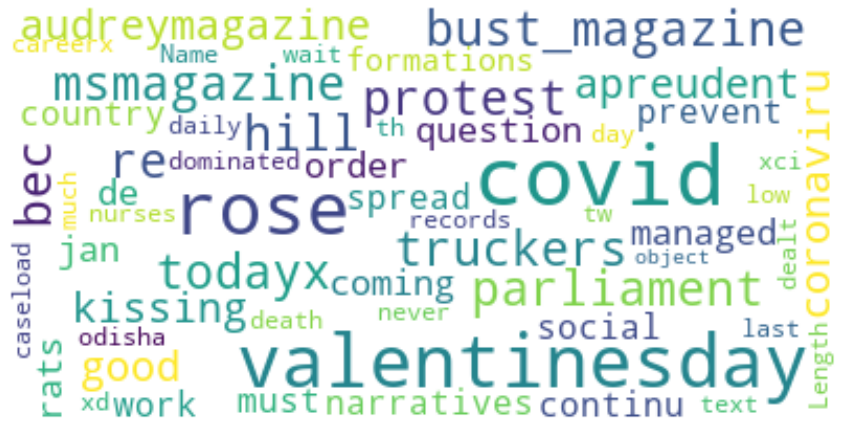

In [180]:
#wordcloud after preprocessing and removing stopwords
def show_wordcloud(data , title = None):
    wordcloud = WordCloud(background_color='white',stopwords=stopwords,max_words=200,max_font_size=40).generate(str(data))
  
    fig = plt.figure(1, figsize=(15, 15))
    plt.axis('off')
    plt.title(title, size = 25)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.show()

show_wordcloud(df['text'])

In [181]:
df.shape

(8910, 4)

In [182]:
df.isna().sum
tweet=df.copy()

In [183]:
tweet.head()

created_at                                               text  \
0  29-01-2022 18:53  msmagazine nfor valentinesday covid n roses re...   
1  29-01-2022 18:53  todayx xs truckers protest parliament hill bec...   
2  29-01-2022 18:53  bust_magazine nfor valentinesday covid n roses...   
3  29-01-2022 18:52  audreymagazine nfor valentinesday covid n rose...   
4  29-01-2022 18:52                       apreudent kissing coronaviru   

        screen_name                  location  
0   RobertBarrows3     San Mateo  California   
1        bobmackin   North Vancouver  Canada   
2   RobertBarrows3                        NaN  
3   RobertBarrows3     San Mateo  California   
4        Rahulklyt                        NaN

In [184]:
tweet['sentiment'] = ' '
tweet['polarity'] = None
for i,tweets in enumerate(tweet.text) :
    blob = TextBlob(tweets)
    tweet['polarity'][i] = blob.sentiment.polarity
    if blob.sentiment.polarity > 0 :
        tweet['sentiment'][i] = 'positive'
    elif blob.sentiment.polarity < 0 :
        tweet['sentiment'][i] = 'negative'
    else :
        tweet['sentiment'][i] = 'neutral'
tweet.head()

created_at                                               text  \
0  29-01-2022 18:53  msmagazine nfor valentinesday covid n roses re...   
1  29-01-2022 18:53  todayx xs truckers protest parliament hill bec...   
2  29-01-2022 18:53  bust_magazine nfor valentinesday covid n roses...   
3  29-01-2022 18:52  audreymagazine nfor valentinesday covid n rose...   
4  29-01-2022 18:52                       apreudent kissing coronaviru   

        screen_name                  location sentiment polarity  
0   RobertBarrows3     San Mateo  California    neutral      0.0  
1        bobmackin   North Vancouver  Canada    neutral      0.0  
2   RobertBarrows3                        NaN   neutral      0.0  
3   RobertBarrows3     San Mateo  California    neutral      0.0  
4        Rahulklyt                        NaN   neutral      0.0

In [185]:
tweet['sentiment']

0        neutral
1        neutral
2        neutral
3        neutral
4        neutral
          ...   
8905    positive
8906     neutral
8907    positive
8908    positive
8909    positive
Name: sentiment, Length: 8910, dtype: object

In [260]:
sentiment_df = pd.DataFrame(tweet, columns=[ "text","polarity","sentiment"])

sentiment_df.to_csv(r"C:\Users\DELL\Desktop\RNTU\dataset prepared\Covid19\covid combine\COVID_COMBINE pol sent.csv")

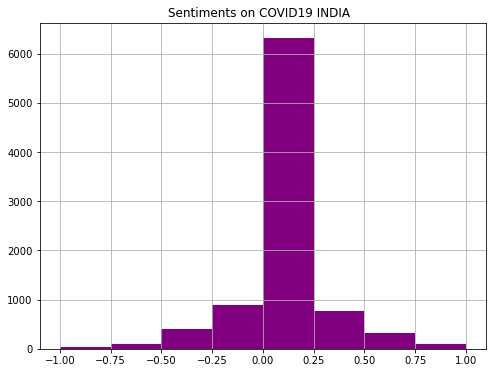

In [187]:
fig, ax = plt.subplots(figsize=(8, 6))

# Plot histogram with break at zero
sentiment_df['polarity'].hist(bins=[-1, -0.75, -0.5, -0.25, 0.0, 0.25, 0.5, 0.75, 1],
             ax=ax,
             color="purple")

plt.title("Sentiments on COVID19 INDIA  ")
plt.show()

In [188]:
#feature extraction(only feature)
y=sentiment_df['sentiment'].values
y.shape

(8910,)

In [189]:
x=sentiment_df['text'].values
x.shape

(8910,)

In [190]:
from sklearn.model_selection import train_test_split

In [191]:
(x_train,x_test,y_train,y_test)=train_test_split(x,y,test_size=0.2)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(7128,)
(7128,)
(1782,)
(1782,)


neutral     4099
positive    3395
negative    1416
Name: sentiment, dtype: int64


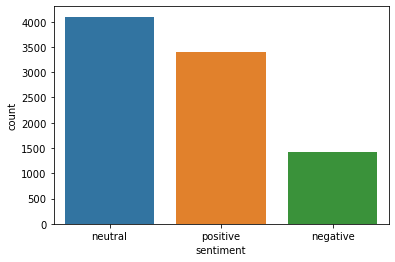

In [192]:
print(sentiment_df.sentiment.value_counts())
sns.countplot(x='sentiment', data = tweet);

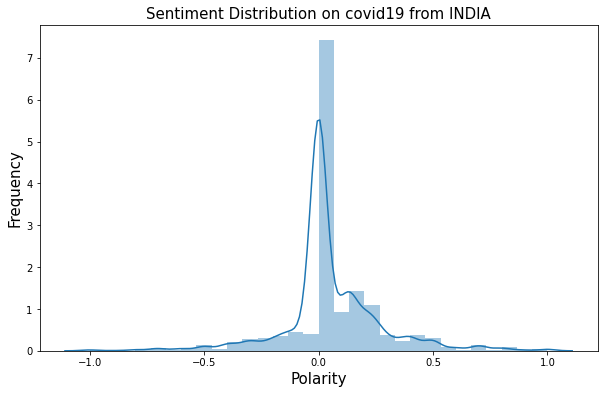

In [193]:
plt.figure(figsize=(10,6))
sns.distplot(sentiment_df['polarity'], bins=30)
plt.title('Sentiment Distribution on covid19 from INDIA',size = 15)
plt.xlabel('Polarity',size = 15)
plt.ylabel('Frequency',size = 15)
plt.show();

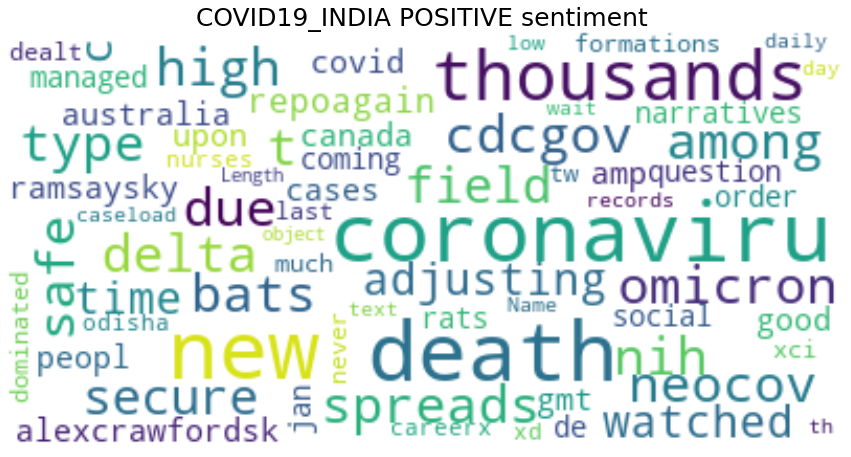

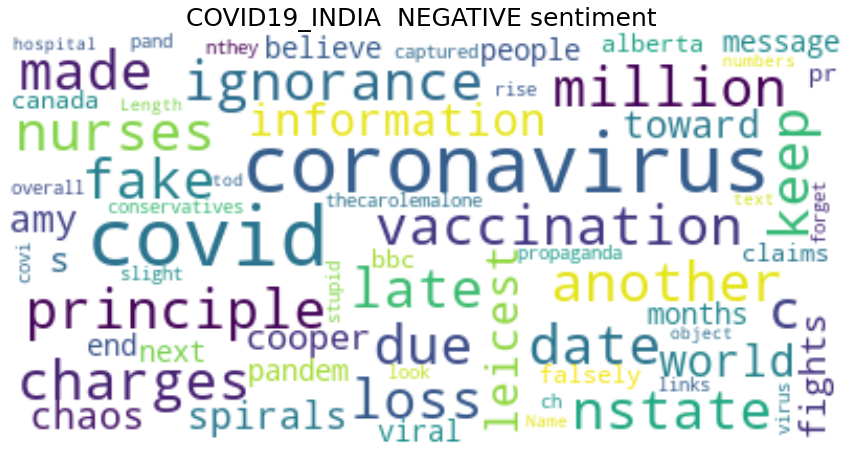

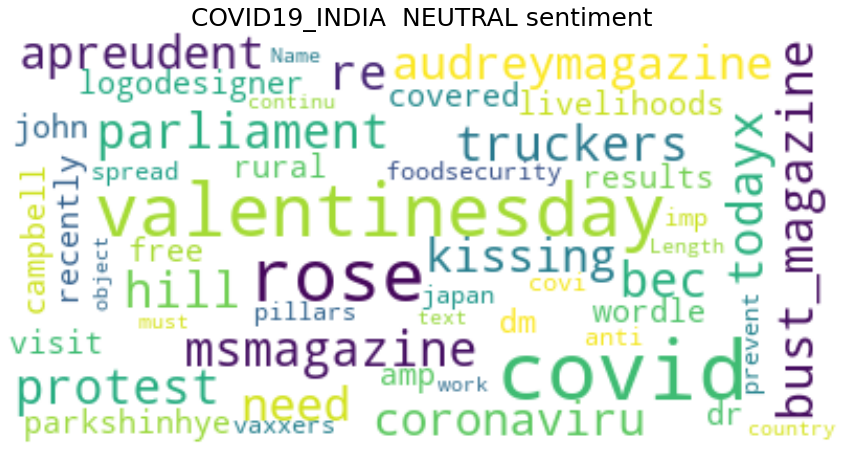

In [194]:
#wordcount with sentiment
pos = sentiment_df['text'][sentiment_df['sentiment'] == 'positive']
show_wordcloud(pos , 'COVID19_INDIA POSITIVE sentiment ')

neg = sentiment_df['text'][sentiment_df['sentiment'] == 'negative']
show_wordcloud(neg , 'COVID19_INDIA  NEGATIVE sentiment ')

neutral = sentiment_df['text'][sentiment_df['sentiment'] == 'neutral']
show_wordcloud(neutral , 'COVID19_INDIA  NEUTRAL sentiment ')

In [195]:
count = pd.DataFrame(sentiment_df.groupby('sentiment').sum())
count

text    polarity
sentiment                                                               
negative   another loss due principle ignorance n nstate ... -350.954309
neutral    msmagazine nfor valentinesday covid n roses re...    0.000000
positive   deaths due omicron high delta n n cdcgov nih t...  813.392971

In [196]:
words = []
words = [word for i in sentiment_df.text for word in i.split()]
words

['msmagazine',
 'nfor',
 'valentinesday',
 'covid',
 'n',
 'roses',
 'red',
 'nviolets',
 'blue',
 'ni',
 'got',
 'vaccines',
 'nhow',
 'todayx',
 'xs',
 'truckers',
 'protest',
 'parliament',
 'hill',
 'become',
 'canadax',
 'xs',
 'answer',
 'sturgis',
 'superspreader',
 'sans',
 'smash',
 'mo',
 'bust_magazine',
 'nfor',
 'valentinesday',
 'covid',
 'n',
 'roses',
 'red',
 'nviolets',
 'blue',
 'ni',
 'got',
 'vaccines',
 'nhow',
 'audreymagazine',
 'nfor',
 'valentinesday',
 'covid',
 'n',
 'roses',
 'red',
 'nviolets',
 'blue',
 'ni',
 'got',
 'vaccines',
 'nhow',
 'yo',
 'apreudent',
 'kissing',
 'coronaviru',
 'thedailybeast',
 'nfor',
 'valentinesday',
 'covid',
 'n',
 'roses',
 'red',
 'nviolets',
 'blue',
 'ni',
 'got',
 'vaccines',
 'nhow',
 'deaths',
 'due',
 'omicron',
 'high',
 'delta',
 'n',
 'n',
 'cdcgov',
 'nih',
 'thelancetinfdis',
 'cdc_ncezid',
 'infectdisnews',
 'theweek',
 'nfor',
 'valentinesday',
 'covid',
 'n',
 'roses',
 'red',
 'nviolets',
 'blue',
 'ni',
 '

In [197]:
non_word=['n','rt','co','xf','xs','xxd','x','ni','nfor','nhow','eh','de''amo','nis','wa']
words=[e for e in words if e not in non_word]

In [198]:
freq = Counter(words).most_common(30)
freq = pd.DataFrame(freq)
freq.columns = ['word', 'frequency']
freq.head(20)

word  frequency
0           covid       5968
1           cases       1454
2     coronavirus       1353
3             new       1258
4          deaths        584
5             amp        518
6          people        461
7        vaccines        450
8            covi        425
9         omicron        417
10       pandemic        409
11            got        406
12        vaccine        369
13            red        344
14           blue        341
15  valentinesday        331
16       nviolets        331
17          roses        330
18       positive        328
19         health        284

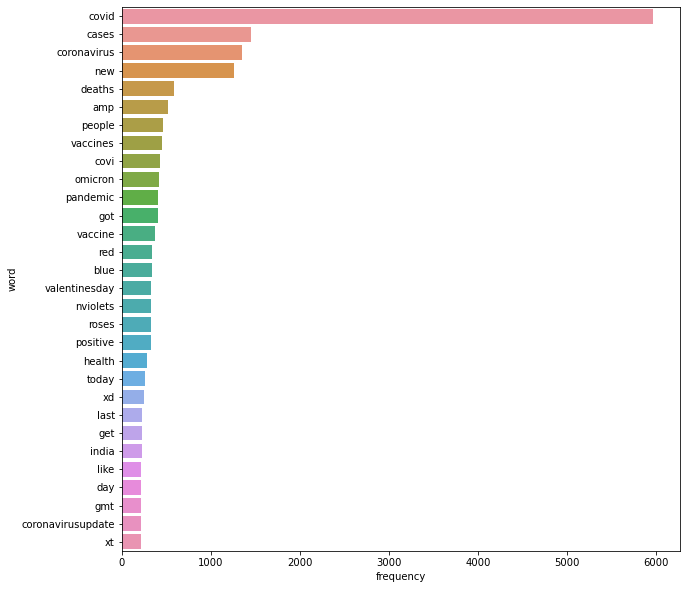

In [199]:
plt.figure(figsize = (10, 10))
sns.barplot(y="word", x="frequency",data=freq);

In [200]:
print(sentiment_df)

                                                   text  polarity sentiment
0     msmagazine nfor valentinesday covid n roses re...       0.0   neutral
1     todayx xs truckers protest parliament hill bec...       0.0   neutral
2     bust_magazine nfor valentinesday covid n roses...       0.0   neutral
3     audreymagazine nfor valentinesday covid n rose...       0.0   neutral
4                          apreudent kissing coronaviru       0.0   neutral
...                                                 ...       ...       ...
8905  good question rats managed order coming jan de...       0.7  positive
8906  prevent spread covid country must work continu...       0.0   neutral
8907  narratives social formations dominated last tw...  0.177778  positive
8908  x xci never dealt much death careerx xd nurses...       0.2  positive
8909  odisha records low daily caseload th day wait ...  0.166667  positive

[8910 rows x 3 columns]


In [201]:
clo=['sentiment','polarity','text']
dataset2=sentiment_df.reindex(columns=clo)
#dataset2.head()
dataset2[:10]

sentiment polarity                                               text
0   neutral      0.0  msmagazine nfor valentinesday covid n roses re...
1   neutral      0.0  todayx xs truckers protest parliament hill bec...
2   neutral      0.0  bust_magazine nfor valentinesday covid n roses...
3   neutral      0.0  audreymagazine nfor valentinesday covid n rose...
4   neutral      0.0                       apreudent kissing coronaviru
5   neutral      0.0  thedailybeast nfor valentinesday covid n roses...
6  positive   0.0175  deaths due omicron high delta n n cdcgov nih t...
7   neutral      0.0  theweek nfor valentinesday covid n roses red n...
8   neutral      0.0  vanityfair nfor valentinesday covid n roses re...
9   neutral      0.0  the_rumpus nfor valentinesday covid n roses re...

In [202]:
df1=pd.DataFrame(x_train)
df1=df1.rename(columns={0:'text'})

In [203]:
df1.head()

text
0  covid still important story world impact suppl...
1  never forget doctor cum health minister took c...
2  people testing positive coronavirus infection ...
3  icymi eua submitted children ages using tradit...
4  stereoinferno goc nichola dbyrd healthads nots...

In [204]:
df2=pd.DataFrame(y_train)
df2=df2.rename(columns={0:'sentiment'})
df_train=pd.concat([df1,df2],axis=1)

In [205]:
df_train.head()

text sentiment
0  covid still important story world impact suppl...  positive
1  never forget doctor cum health minister took c...  negative
2  people testing positive coronavirus infection ...  positive
3  icymi eua submitted children ages using tradit...  positive
4  stereoinferno goc nichola dbyrd healthads nots...   neutral

In [206]:
df3=pd.DataFrame(x_test)
df3=df3.rename(columns={0:'text'})

In [207]:
df4=pd.DataFrame(y_test)
df4=df2.rename(columns={0:'sentiment'})
df_test=pd.concat([df3,df4],axis=1)

In [208]:
df_test.head()

text sentiment
0  giggity jrubinblogger mediaite tell many ameri...  positive
1            coloniality cause covid vaccine inequit  negative
2  another coronavirus cases reported today n nan...  positive
3  covid god religion spirituality mysticism para...  positive
4  future bright n covid coronavirus nft metavers...   neutral

In [209]:
import string
string.punctuation
def remove_punctuation(text):
  if(type(text)==float):
    return text
  ans=""  
  for i in text:     
    if i not in string.punctuation:
      ans+=i    
  return ans

In [210]:
#storing the puntuation free text in a new column called clean_msg
df_train['text']= df_train['text'].apply(lambda x:remove_punctuation(x))
df_test['text']= df_test['text'].apply(lambda x:remove_punctuation(x))

In [211]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [212]:
#method to generate n-grams:
#params:
#text-the text for which we have to generate n-grams
#ngram-number of grams to be generated from the text(1,2,3,4 etc., default value=1)
def generate_N_grams(text,ngram=1):
  words=[word for word in text.split(" ") if word not in set(stopwords.words('english'))]  
  non_word=['n','rt','co','xf','xxd','xs','x','ni','nfor','nhow','eh','de''amo','nis','wa']
  words=[e for e in words if e not in non_word]
  print("Sentence after removing stopwords:",words)
  temp=zip(*[words[i:] for i in range(0,ngram)])
  ans=[' '.join(ngram) for ngram in temp]
  return ans

In [213]:
from collections import defaultdict
positiveValues=defaultdict(int)
negativeValues=defaultdict(int)
neutralValues=defaultdict(int)
#get the count of every word in both the columns of df_train and df_test dataframes

In [214]:
#get the count of every word in both the columns of df_train and df_test dataframes where sentiment="positive"
for text in df_train[df_train.sentiment=="positive"].text:
  for word in generate_N_grams(text):
    positiveValues[word]+=1

Sentence after removing stopwords: ['covid', 'still', 'important', 'story', 'world', 'impact', 'supply', 'chains', 'energy', 'monetary', 'amp', 'fiscal', 'policy', 'f']
Sentence after removing stopwords: ['people', 'testing', 'positive', 'coronavirus', 'infection', 'day', 'india', 'total', 'tally', 'cases', 'increa']
Sentence after removing stopwords: ['icymi', 'eua', 'submitted', 'children', 'ages', 'using', 'traditional', 'safe', 'non', 'mrna', 'vaccine', 'covaxin']
Sentence after removing stopwords: ['leaders', 'test', 'positive', 'situations', 'nthen', 'teens', 'nif', 'online', 'meeting']
Sentence after removing stopwords: ['good', 'news', 'soof', 'florida', 'coronavirus', 'hospitalizations', 'deaths', 'doubled', 'since', 'last', 'week']
Sentence after removing stopwords: ['needs', 'stais', 'honest', 'truth', 'children', 'used', 'herd', 'immunity', 'spreaders', 'without', 'concern']
Sentence after removing stopwords: ['desigual', 'new', 'light', 'hope', 'awakened', 'horizon', 'worl

Sentence after removing stopwords: ['watch', 'b', 'cs', 'rare', 'amp', 'severe', 'covid', 'vaccine', 'side', 'effect']
Sentence after removing stopwords: ['rajasthan', 'ncovid', 'update', 'positive', 'cases', 'rajasthan', 'today', 'cases', 'jaipur', 'act']
Sentence after removing stopwords: ['opportunity', 'many', 'us', 'reconsider', 'personal', 'drinking', 'habits', 'figure', 'feels', 'good']
Sentence after removing stopwords: ['new', 'covid', 'data', 'est', 'coronavirus', 'covid', 'covid']
Sentence after removing stopwords: ['late', 'uk', 'data', 'shows', 'covid', 'infection', 'rate', 'among', 'triple', 'jabbed', 'boosted', 'high', 'rising', 'fast', 'th']
Sentence after removing stopwords: ['nstnation', 'another', 'students', 'smk', 'melor', 'tested', 'positive', 'covid', 'bringing', 'figure', 'today']
Sentence after removing stopwords: ['china', 'wuhan', 'scientists', 'raise', 'alarm', 'new', 'covid', 'virus', 'neocov', 'none', 'three', 'infected', 'people', 'could', 'die']
Sentence

Sentence after removing stopwords: ['new', 'cases', 'new', 'deaths', 'iran', 'gmt', 'coronavirus', 'coronavirusupdate', 'covid', 'coronaviruspandemi']
Sentence after removing stopwords: ['time', 'last', 'yearx', 'need', 'another', 'hair', 'cutx', 'luckily', 'year', 'barbers', 'arenx', 'xt', 'closed', 'covid', 'girl', 'boi', 'haircut']
Sentence after removing stopwords: ['vice', 'president', 'india', 'venkaiah', 'naidu', 'tested', 'positive', 'covid', 'vice', 'president', 'shri', 'venkai']
Sentence after removing stopwords: ['new', 'cases', 'sierra', 'leone', 'gmt', 'coronavirus', 'coronavirusupdate', 'covid', 'coronaviruspandemi']
Sentence after removing stopwords: ['updated', 'online', 'fund', 'raising', 'campaign', 'rolling', 'truck', 'blockades', 'protest', 'vaccine', 'mandates', 'linked', 'right', 'wing']
Sentence after removing stopwords: ['incredible', 'kudos', 'teacher', 'right', 'thing', 'letting', 'parents', 'know', 'hard', 'believe', 'th']
Sentence after removing stopwords: [

Sentence after removing stopwords: ['first', 'wealth', 'health', 'ralph', 'waldo', 'emerson', 'covi']
Sentence after removing stopwords: ['cancel', 'billmaher', 'came', 'back', 'two', 'month', 'break', 'new', 'omicronvirus', 'surge', 'making', 'fun']
Sentence after removing stopwords: ['mumbai', 'recorded', 'new', 'covid', 'cases', 'last', 'hours', 'active', 'cases', 'stands']
Sentence after removing stopwords: ['new', 'cases', 'new', 'deaths', 'united', 'states', 'gmt', 'coronavirus', 'coronavirusupdate', 'covid', 'coronaviruspandemi']
Sentence after removing stopwords: ['vice', 'president', 'india', 'venkaiah', 'naidu', 'tested', 'positive', 'covid']
Sentence after removing stopwords: ['xtips', 'xcto', 'prevent', 'coronavirusxf', 'transmission', 'xe', 'xefxfwhat', 'kind', 'measures', 'help', 'fa']
Sentence after removing stopwords: ['ok', 'first', 'stato', 'inject', 'us', 'small', 'see', 'chip', 'take', 'know']
Sentence after removing stopwords: ['truly', 'remarkable', 'nseveral', 'm

Sentence after removing stopwords: ['tested', 'positive', 'life', 'today', 'came', 'contact', 'stay', 'relaxed']
Sentence after removing stopwords: ['breaking', 'indian', 'vice', 'president', 'venkaiah', 'naidu', 'tests', 'positive', 'covid', 'india', 'mvenkaiahnaidu']
Sentence after removing stopwords: ['looking', 'professional', 'graphic', 'designer', 'please', 'contact', 'bbmzansi']
Sentence after removing stopwords: ['covid', 'omicronvarient', 'xcx', 'social', 'distancing', 'mask', 'wearing', 'vaccination', 'good', 'ventilationxx', 'xdcr', 'newscientist', 'none']
Sentence after removing stopwords: ['delhi', 'reports', 'new', 'covid', 'cases', 'recoveries', 'deaths', 'last', 'hours', 'nactive', 'cases']
Sentence after removing stopwords: ['classy', 'navy', 'soccer', 'balls', 'pattern', 'sports', 'premium', 'face', 'mask', 'soccer']
Sentence after removing stopwords: ['quick', 'easy', 'overview', 'best', 'telehealth', 'practices', 'working', 'home', 'plus', 'covid', 'regulatory', 'up

Sentence after removing stopwords: ['hey', 'senschumer', 'gillibrandny', 'repjeffries', 'reelectnydia', 'aoc', 'work', 'getting', 'affordable', 'authentic']
Sentence after removing stopwords: ['russia', 'reports', 'new', 'coronavirus', 'cases', 'big', 'one', 'day', 'increase', 'record', 'new', 'deaths', 'covid']
Sentence after removing stopwords: ['masks', 'help', 'prevent', 'spread', 'covid', 'worn', 'consistently', 'correctly', 'choose', 'mask', 'best', 'fit']
Sentence after removing stopwords: ['covid', 'deaths', 'confirmed', 'saturday', 'ntotal', 'fatalities', 'govt', 'info', 'dept', 'srilanka', 'lka', 'newsst']
Sentence after removing stopwords: ['antivaxxers', 'say', 'jesus', 'protect', 'covid', 'many', 'carry', 'guns', 'protect', 'th']
Sentence after removing stopwords: ['despite', 'announcement', 'freedom', 'day', 'strongly', 'advised', 'get', 'booster', 'dose', 'gt', 'mont']
Sentence after removing stopwords: ['utah', 'coronavirus', 'update', 'utahdepofhealth', 'reports', 'cur

Sentence after removing stopwords: ['xci', 'never', 'dealt', 'much', 'death', 'careerx', 'xd', 'nurses', 'share', 'pandemic', 'experiences', 'drove', 'qui']
Sentence after removing stopwords: ['breakingnews', 'delhi', 'covid', 'count', 'delhi', 'sunday', 'reported', 'new', 'covid', 'cases', 'recoveries', 'amp', 'deaths']
Sentence after removing stopwords: ['interesting', 'especially', 'since', 'ivermectin', 'standard', 'issue', 'treatment', 'covid', 'doctors', 'bolivia']
Sentence after removing stopwords: ['army', 'pan', 'coronavirus', 'vaccine', 'could', 'wipe', 'covid', 'pandemics', 'spfn', 'successfully', 'completed', 'animal', 'testing', 'pha']
Sentence after removing stopwords: ['new', 'covid', 'research', 'available', 'nread', 'newly', 'added', 'articles', 'related', 'covid', 'scholars', 'portal', 'journals']
Sentence after removing stopwords: ['late', 'new', 'years', 'resolution', 'start', 'let', 'us', 'provide', 'free', 'suppoto', 'achieve', 'new', 'ye']
Sentence after removing

Sentence after removing stopwords: ['coronavirus', 'covid', 'covid', 'sarscov', 'covidworld', 'ndaily', 'new', 'confirmed', 'covid', 'cases', 'per', 'million', 'people']
Sentence after removing stopwords: ['vinaymadapu', 'iitmadras', 'vice', 'president', 'mvenkaiahnaidu', 'tested', 'positive', 'covid']
Sentence after removing stopwords: ['paul', 'mccartney', 'john', 'lennon', 'many', 'people', 'ohno', 'condoms', 'vs', 'people']
Sentence after removing stopwords: ['ajenglish', 'never', 'lose', 'face', 'laughing', 'countries', 'accepted', 'live', 'covi']
Sentence after removing stopwords: ['tanzinavega', 'positive', 'vibes', 'personally', 'want', 'year', 'covid', 'testin']
Sentence after removing stopwords: ['many', 'covidvaccines', 'boosterdose', 'need', 'covid', 'free', 'doubt', 'ever', 'time']
Sentence after removing stopwords: ['close', 'grandfather', 'without', 'lost', 'compass', 'many', 'young', 'kids', 'need']
Sentence after removing stopwords: ['srilanka', 'one', 'first', 'countr

Sentence after removing stopwords: ['bill', 'maher', 'want', 'live', 'mask', 'paranoid', 'world', 'anymore', 'maskmandates', 'maskmandate', 'covidiots', 'covid']
Sentence after removing stopwords: ['ventilators', 'important', 'via', 'bbcworld', 'covid', 'coronaviru']
Sentence after removing stopwords: ['warned', 'responsible', 'number', 'people', 'infected', 'coronavirus', 'seeing', 'steady', 'rise', 'srilanka']
Sentence after removing stopwords: ['kerala', 'covid', 'count', 'keralax', 'active', 'covid', 'case', 'tally', 'rises', 'new', 'infections', 'reported', 'toda']
Sentence after removing stopwords: ['new', 'study', 'finds', 'vaccine', 'risk', 'heaissues', 'coronaviru']
Sentence after removing stopwords: ['india', 'reports', 'new', 'covid', 'cases', 'deaths', 'recoveries', 'last', 'hours', 'nactive', 'case']
Sentence after removing stopwords: ['new', 'cases', 'new', 'death', 'suriname', 'gmt', 'coronavirus', 'coronavirusupdate', 'covid', 'coronaviruspandemi']
Sentence after removi

Sentence after removing stopwords: ['tamilnadu', 'logs', 'new', 'covid', 'cases', 'amp', 'deaths', 'today', 'active', 'case', 'tally']
Sentence after removing stopwords: ['new', 'cases', 'covid', 'maharashtrax', 'tally', 'coronavirus', 'cases', 'increased', 'nthe', 'deat']
Sentence after removing stopwords: ['total', 'confirmed', 'covid', 'cases', 'county', 'ga', 'covid', 'insights', 'analytics', 'team', 'usafacts']
Sentence after removing stopwords: ['whole', 'world', 'watching', 'always', 'trending', 'saxon', 'coronavirus', 'covid', 'coronavirus', 'omicron']
Sentence after removing stopwords: ['listen', 'bilingual', 'live', 'phone', 'programme', 'covid', 'fm', 'gold', 'channel', 'pm', 'nx', 'ask', 'questions', 'expe']
Sentence after removing stopwords: ['cottongurumarketrepo', 'covid', 'agriculture', 'textiles', 'icac', 'ica', 'nindia', 'xcfarm', 'exports', 'xcare', 'growing', 'consistently']
Sentence after removing stopwords: ['bjpbengal', 'respected', 'sir', 'one', 'secular', 'stat

Sentence after removing stopwords: ['plan', 'safe', 'return', 'schools', 'plan', 'unsafe', 'return', 'schools', 'nsw', 'amp', 'federal']
Sentence after removing stopwords: ['daily', 'new', 'cases', 'cross', 'k', 'karnataka', 'today', 'nx', 'xbenew', 'cases', 'state', 'nx', 'xbenew', 'cases', 'b', 'lore', 'nx', 'xbepositivity']
Sentence after removing stopwords: ['switzerland', 'r', 'eff', 'experiencing', 'rise', 'covid', 'new', 'cases', 'cases', 'deaths', 'day']
Sentence after removing stopwords: ['new', 'cases', 'new', 'deaths', 'germany', 'gmt', 'coronavirus', 'coronavirusupdate', 'covid', 'coronaviruspandemi']
Sentence after removing stopwords: ['u', 'justify', 'makes', 'u', 'feel', 'comfortable', 'earth', 'without', 'harming', 'others', 'u', 'ever', 'justify', 'bringi']
Sentence after removing stopwords: ['xfxfxjapan', 'covid', 'maps', 'places', 'good', 'ventilation', 'amp', 'low', 'risk', 'virus', 'transmissio']
Sentence after removing stopwords: ['ix', 'xm', 'okay', 'want', 'take

Sentence after removing stopwords: ['delhi', 'reports', 'new', 'covid', 'cases', 'recoveries', 'deaths', 'last', 'hours', 'nactive', 'cases']
Sentence after removing stopwords: ['covid', 'australia', 'thousands', 'upon', 'thousands', 'people', 'took', 'streets', 'protest', 'new', 'totalitari']
Sentence after removing stopwords: ['new', 'cases', 'new', 'death', 'netherlands', 'gmt', 'coronavirus', 'coronavirusupdate', 'covid', 'coronaviruspandemi']
Sentence after removing stopwords: ['hearing', 'mdmk', 'leader', 'amp', 'mp', 'vaiko', 'tested', 'positive', 'covid', 'coronavirus', 'tamilnad']
Sentence after removing stopwords: ['sinow', 'ggramlingsi', 'really', 'nstop', 'gassing', 'mahomes', 'someone', 'giving', 'table', 'pay', 'xto', 'write']
Sentence after removing stopwords: ['zacevanstwitts', 'teegirlversion', 'vaxxed', 'catch', 'covid', 'good', 'chance', 'survival', 'muc']
Sentence after removing stopwords: ['wow', 'literally', 'exact', 'covid', 'nomorelockdowns', 'vaccinemandate', '

Sentence after removing stopwords: ['new', 'cases', 'new', 'deaths', 'argentina', 'gmt', 'coronavirus', 'coronavirusupdate', 'covid', 'coronaviruspandemi']
Sentence after removing stopwords: ['ahmedabad', 'least', 'new', 'slots', 'available', 'amp', 'ncovishield', 'ndose', 'ndose']
Sentence after removing stopwords: ['question', 'cnn', 'jechristensen', 'covered', 'covaxin', 'covaxin', 'whole', 'inactivated', 'virion', 'vaccine']
Sentence after removing stopwords: ['dies', 'xxf', 'nshould', 'worry', 'nneocov', 'true', 'hype', 'covid']
Sentence after removing stopwords: ['total', 'confirmed', 'covid', 'cases', 'county', 'ak', 'covid', 'insights', 'analytics', 'team', 'usafacts']
Sentence after removing stopwords: ['wuhan', 'scientists', 'warn', 'new', 'corona', 'leap', 'called', 'neocov', 'mutation', 'transmissible', 'omicron']
Sentence after removing stopwords: ['total', 'confirmed', 'covid', 'cases', 'county', 'hi', 'covid', 'insights', 'analytics', 'team', 'usafacts']
Sentence after r

Sentence after removing stopwords: ['social', 'distancing', 'inteoduced', 'pandemic', 'coronavirus', 'measure']
Sentence after removing stopwords: ['kerala', 'covid', 'cases', 'jumps', 'today', 'new', 'cases', 'tp']
Sentence after removing stopwords: ['fact', 'people', 'ages', 'infected', 'new', 'coronavirus', 'ncov', 'coronaviru']
Sentence after removing stopwords: ['thoughts', 'covid', 'vaccines', 'reason', 'many', 'heart', 'health', 'issues']
Sentence after removing stopwords: ['nytimes', 'stories', 'lambasting', 'demonizing', 'china', 'covid', 'success', 'petty', 'covi']
Sentence after removing stopwords: ['breaking', 'hawaii', 'records', 'new', 'coronavirus', 'related', 'deaths', 'additional', 'infections', 'covid']
Sentence after removing stopwords: ['update', 'january', 'novel', 'coronavirus', 'cases', 'malta', 'total', 'cases', 'new', 'cases', 'active', 'cases']
Sentence after removing stopwords: ['many', 'covid', 'vaccine', 'appointments', 'available', 'oshawa', 'sears', 'comm

Sentence after removing stopwords: ['new', 'covid', 'data', 'pm', 'est', 'coronavirus', 'covid', 'covid']
Sentence after removing stopwords: ['goa', 'educational', 'institutions', 'remains', 'close', 'till', 'feb', 'teachers', 'attend', 'conducting', 'online', 'classes', 'educa']
Sentence after removing stopwords: ['see', 'today', 'pm', 'et', 'covid', 'town', 'hall', 'register', 'join', 'us', 'live', 'facebo']
Sentence after removing stopwords: ['think', 'vaccinating', 'people', 'covid', 'think', 'good', 'find', 'vaccine', 'governments']
Sentence after removing stopwords: ['wonx', 'xt', 'many', 'people', 'last', 'winterx', 'storm', 'failure', 'keep', 'texans', 'warm']
Sentence after removing stopwords: ['good', 'health', 'care', 'means', 'secure', 'ems', 'system', 'within', 'cherokee', 'nation', 'nxe', 'xefx']
Sentence after removing stopwords: ['windsorpolice', 'new', 'beginning', 'saturday', 'january', 'dhs', 'require', 'non', 'u', 'individualsxfseeking', 'enter', 'u']
Sentence after

Sentence after removing stopwords: ['bobcescago', 'point', 'ix', 'xd', 'say', 'government', 'amp', 'healthcare', 'experts', 'given', 'us', 'good', 'advice', 'follow']
Sentence after removing stopwords: ['rightnewsnm', 'please', 'stop', 'misinformation', 'risk', 'myocarditis', 'covid', 'high', 'vaccine']
Sentence after removing stopwords: ['neocov', 'coronavirus', 'found', 'bats', 'wuhan', 'scientists', 'warn', 'new', 'coronavirus', 'neocov', 'coronavirus', 'tridhascholar']
Sentence after removing stopwords: ['new', 'covid', 'variant', 'xcomnicronx', 'xd', 'discovered', 'south', 'africa', 'njavid', 'said', 'adding', 'variant', 'identified', 'south', 'africa']
Sentence after removing stopwords: ['mumbai', 'fresh', 'covid', 'cases', 'fall', 'daily', 'toll', 'rises', 'ntrack', 'update']
Sentence after removing stopwords: ['chocolate', 'orange', 'loaf', 'cake', 'white', 'chocolate', 'chips', 'foodstagram', 'delicious', 'breadlover', 'cba', 'norwichfood']
Sentence after removing stopwords: [

Sentence after removing stopwords: ['millionaires', 'billionaires', 'sign', 'open', 'letter', 'pleading', 'high', 'taxes', 'huffpost', 'smartnews', 'covi']
Sentence after removing stopwords: ['ronfilipkowski', 'covid', 'feels', 'right', 'voteblu']
Sentence after removing stopwords: ['xxf', 'xxa', 'xef', 'xbxfxb', 'xxfxe', 'xef', 'xbas', 'rise', 'covidxac', 'xefcovidtesting', 'available', 'free', 'vaccines', 'free', 'dont', 'delay']
Sentence after removing stopwords: ['xnot', 'sustainablex', 'omicron', 'tests', 'chinax', 'zero', 'covid', 'policy', 'first', 'cases', 'detecte']
Sentence after removing stopwords: ['vice', 'president', 'mvenkaiahnaidu', 'tested', 'covid', 'positive', 'today', 'coronapositive']
Sentence after removing stopwords: ['pandemic', 'covid', 'texas', 'nnew', 'confirmed', 'infections', 'nnew', 'probable', 'infections', 'nnew', 'deaths', 'nadult']
Sentence after removing stopwords: ['kiribati', 'one', 'worldx', 'last', 'covid', 'free', 'places', 'itx', 'lockdown', 'co

Sentence after removing stopwords: ['xcwhen', 'bbc', 'djs', 'found', 'young', 'men', 'heeding', 'scientistsx', 'publichealth', 'messages', 'took']
Sentence after removing stopwords: ['doctors', 'scientists', 'virologist', 'got', 'kicked', 'social', 'media', 'making', 'claims', 'natural', 'immun']
Sentence after removing stopwords: ['made', 'great', 'progress', 'protecting', 'community', 'must', 'continue', 'take', 'steps', 'stop']
Sentence after removing stopwords: ['queen', 'guitarist', 'brian', 'may', 'holds', 'phd', 'astrophysics', 'scientist', 'tested', 'positive', 'sars', 'coronavirus', 'last']
Sentence after removing stopwords: ['delhi', 'reports', 'new', 'covid', 'cases', 'deaths', 'last', 'hours', 'active', 'cases', 'npositivity', 'rate']
Sentence after removing stopwords: ['dr', 'rupeshrainamd', 'discussing', 'pcrrt', 'iconic', 'guidelines', 'pediatric', 'kidney', 'suppoin', 'covid', 'pcrrtadvances']
Sentence after removing stopwords: ['inpics', 'mu', 'delta', 'ihu', 'neocov',

Sentence after removing stopwords: ['people', 'hull', 'explore', 'story', 'city', 'coped', 'worked', 'adapted', 'live', 'continuing']
Sentence after removing stopwords: ['biorxivpreprint', 'novel', 'xcprime', 'spikex', 'xd', 'vaccine', 'strategy', 'leverages', 'existing', 'immunity', 'generated', 'primary', 'covid']
Sentence after removing stopwords: ['letterstolocke', 'nadhimzahawi', 'year', 'old', 'primary', 'school', 'teacher', 'tested', 'positive', 'covid', 'covid', 'thanks', 'borisjohnso']
Sentence after removing stopwords: ['domestic', 'equities', 'remained', 'pressure', 'throughout', 'week', 'xcdue', 'high', 'covid', 'cases', 'increase', 'gl']
Sentence after removing stopwords: ['globally', 'xfx', 'new', 'cases', 'covidx', 'xbc', 'confirmed', 'yesterday', 'nxf', 'times', 'number', 'days', 'ago', 'time']
Sentence after removing stopwords: ['special', 'report', 'covid', 'variant', 'omicron', 'spreading', 'fast', 'omicron', 'dubbed', 'great', 'evade', 'artis']
Sentence after removi

Sentence after removing stopwords: ['covid', 'pm', 'jan', 'march', 'karnataka', 'cumulatively', 'recorded', 'covid', 'positive', 'c']
Sentence after removing stopwords: ['xe', 'xef', 'xbchronic', 'inflammation', 'caused', 'mitochondrial', 'dysfunction', 'responsible', 'explosive', 'release', 'inflammatory', 'cy']
Sentence after removing stopwords: ['new', 'covid', 'data', 'pm', 'est', 'coronavirus', 'covid', 'covid']
Sentence after removing stopwords: ['new', 'cases', 'gibraltar', 'gmt', 'coronavirus', 'coronavirusupdate', 'covid', 'coronaviruspandemi']
Sentence after removing stopwords: ['drsmartbat', 'covid', 'knows', 'good', 'go', 'queues', 'science', 'restaurants', 'air', 'travel', 'trudeau', 'parties']
Sentence after removing stopwords: ['nlol', 'surprise', 'omg', 'house', 'surprises', 'new', 'real', 'wood', 'dollhouse', 'surprises', 'floors', 'doll', 'house', 'rooms', 'wi']
Sentence after removing stopwords: ['new', 'cases', 'new', 'deaths', 'romania', 'gmt', 'coronavirus', 'coro

Sentence after removing stopwords: ['daily', 'update', 'naccording', 'johns', 'hopkins', 'university', 'new', 'cases', 'fatalities', 'reported']
Sentence after removing stopwords: ['folks', 'think', 'live', 'covid', 'longcovid', 'nthe', 'idea', 'death', 'rate', 'low', 'misses']
Sentence after removing stopwords: ['believe', 'leaders', 'responsibility', 'endthepandemic', 'join', 'global', 'week', 'action', 'tackle', 'th']
Sentence after removing stopwords: ['new', 'cases', 'new', 'deaths', 'serbia', 'gmt', 'coronavirus', 'coronavirusupdate', 'covid', 'coronaviruspandemi']
Sentence after removing stopwords: ['pretty', 'pink', 'roses', 'flowers', 'floral', 'pattern', 'feminine', 'premium', 'face', 'mask', 'floral', 'flowers', 'covid']
Sentence after removing stopwords: ['ireland', 'thinks', 'covid', 'right']
Sentence after removing stopwords: ['director', 'actor', 'selvaraghavan', 'tested', 'positive', 'covid', 'beastfromapri']
Sentence after removing stopwords: ['new', 'cases', 'timor', 

Sentence after removing stopwords: ['mashavisrael', 'providing', 'essential', 'assistance', 'local', 'teams', 'fighting', 'covid', 'sending', 'large', 'shipments', 'criti']
Sentence after removing stopwords: ['research', 'available', 'researchgate', 'pandemic', 'coronavirus', 'covid', 'omicron', 'economy']
Sentence after removing stopwords: ['covid', 'total', 'people', 'tested', 'positive', 'virus', 'parliament', 'house', 'complex', 'far', 'people']
Sentence after removing stopwords: ['yet', 'another', 'friendx', 'child', 'tested', 'positive', 'covid', 'case', 'anyone', 'thinks', 'itx', 'really', 'becaus']
Sentence after removing stopwords: ['many', 'covid', 'patients', 'countriesxf', 'xbxf', 'xnuse', 'common', 'sensexf', 'xxf', 'xwear', 'mask', 'stay', 'away', 'crowds', 'nletx', 'get', 'covid', 'unde']
Sentence after removing stopwords: ['impact', 'covid', 'drowning', 'patterns', 'great', 'lakes', 'region', 'north', 'america', 'sarscovtimeline']
Sentence after removing stopwords: ['go

Sentence after removing stopwords: ['new', 'death', 'compassionate', 'leave', 'policy', 'hr', 'rh', 'rrhh', 'covid', 'wellness', 'blockchain', 'meto']
Sentence after removing stopwords: ['concerned', 'know', 'hon', 'ble', 'vice', 'president', 'india', 'vpsecretariat', 'shri', 'mvenkaiahnaidu', 'ji', 'tested', 'positive', 'fo']
Sentence after removing stopwords: ['covid', 'delhi', 'reports', 'new', 'covid', 'cases', 'recoveries', 'deaths', 'last', 'hours', 'nactive']
Sentence after removing stopwords: ['new', 'covid', 'variant', 'spreading', 'like', 'wildfire', 'across', 'uk', 'scandinavia', 'ba', 'xstealthx', 'mutation', 'half', 'new', 'c']
Sentence after removing stopwords: ['ne', 'delhi', 'least', 'new', 'slots', 'available', 'amp', 'ncovishield', 'ndose', 'ndose']
Sentence after removing stopwords: ['steveguest', 'bourbon', 'yesterday', 'count', 'presssec', 'also', 'used', 'covid', 'bs', 'good', 'life']
Sentence after removing stopwords: ['ne', 'delhi', 'least', 'new', 'slots', 'ava

Sentence after removing stopwords: ['classy', 'navy', 'football', 'balls', 'pattern', 'sports', 'premium', 'face', 'mask', 'football', 'covid', 'facemasks']
Sentence after removing stopwords: ['vice', 'president', 'venkaiah', 'naidu', 'tests', 'positive', 'covid', 'asymptomatic', 'vpsecretariat', 'mvenkaiahnaidu', 'covid']
Sentence after removing stopwords: ['third', 'wave', 'rising', 'reuse', 'ro', 'reject', 'water', 'wash', 'hands', 'frequently', 'save', 'ro', 'reject', 'water', 'reuse', 'conveni']
Sentence after removing stopwords: ['live', 'sanfrancisco', 'covid', 'pay', 'stayhome', 'donx', 'xt', 'infect', 'anyone', 'else']
Sentence after removing stopwords: ['counties', 'high', 'covid', 'vaccination', 'rate', 'wisconsin', 'ngreen', 'bay', 'must', 'listening']
Sentence after removing stopwords: ['dan', 'admits', 'sex', 'addict', 'would', 'seek', 'sex', 'prostitutes', 'new', 'york', 'city', 'four', 'nights', 'week', 'neve']
Sentence after removing stopwords: ['breakingnews', 'news',

Sentence after removing stopwords: ['wuhan', 'cmindnich', 'right', 'wuhan', 'covi']
Sentence after removing stopwords: ['nthe', 'legend', 'zelda', 'breath', 'wild', 'nintendo', 'switch', 'dogecoin']
Sentence after removing stopwords: ['xflatest', 'uk', 'covid', 'dataxf', 'everything', 'pretty', 'flat', 'covid', 'omicro']
Sentence after removing stopwords: ['new', 'type', 'coronavirus', 'neocov', 'spreads', 'among', 'bats', 'south', 'africa', 'may', 'pose', 'threat', 'humans', 'future']
Sentence after removing stopwords: ['thousands', 'death', 'everyday', 'covid', 'media', 'barely', 'speaking', 'topic', 'many', 'pretending']
Sentence after removing stopwords: ['believe', 'leaders', 'responsibility', 'endthepandemic', 'join', 'global', 'week', 'action', 'tackle', 'th']
Sentence after removing stopwords: ['according', 'nbcnews', 'may', 'light', 'end', 'tunnel', 'covid', 'omicron', 'peaked']
Sentence after removing stopwords: ['another', 'new', 'cases', 'omicron', 'six', 'new', 'cases', 'd

Sentence after removing stopwords: ['another', 'covid', 'related', 'fatalities', 'confirmed', 'sri', 'lanka', 'raising', 'coronavirus', 'death', 'toll']
Sentence after removing stopwords: ['good', 'morning', 'toronto', 'forget', 'face', 'coverings', 'mandatory', 'ttc', 'masks', 'cover', 'nose']
Sentence after removing stopwords: ['research', 'available', 'researchgate', 'ict', 'industry', 'bigdata', 'bigdataanalytics']
Sentence after removing stopwords: ['health', 'coronavirus', 'covid', 'omicron', 'deaths', 'gt', 'omicron', 'caused', 'high', 'increase', 'u', 'daily', 'death', 'count']
Sentence after removing stopwords: ['star', 'rating', 'available', 'products', 'stickers', 'tshirts', 'pillows', 'mugs', 'masks', 'covi']
Sentence after removing stopwords: ['virus', 'crisis', 'nbudget', 'impact', 'ndo', 'alternative', 'plan', 'ready', 'nwe', 'help', 'edtech', 'covid', 'delta']
Sentence after removing stopwords: ['analysthex', 'sirhgrey', 'forty', 'years', 'ago', 'could', 'started', 'sen

Sentence after removing stopwords: ['well', 'quite', 'interesting', 'nthe', 'dccc', 'posts', 'tweet', 'complete', 'opposition', 'health', 'mandates', 'medical', 'righ']
Sentence after removing stopwords: ['new', 'cases', 'new', 'deaths', 'dominican', 'republic', 'gmt', 'coronavirus', 'coronavirusupdate', 'covid', 'coronaviruspandemi']
Sentence after removing stopwords: ['drinks', 'giant', 'diageonews', 'reported', 'increase', 'first', 'half', 'sales', 'consumers', 'bought', 'high', 'end', 'spirit']
Sentence after removing stopwords: ['north', 'delhi', 'least', 'new', 'slots', 'available', 'amp', 'ncovishield', 'ndose', 'nd']
Sentence after removing stopwords: ['new', 'covid', 'data', 'pm', 'est', 'coronavirus', 'covid', 'covid']
Sentence after removing stopwords: ['new', 'cases', 'new', 'deaths', 'turkey', 'gmt', 'coronavirus', 'coronavirusupdate', 'covid', 'coronaviruspandemi']
Sentence after removing stopwords: ['high', 'test', 'vity', 'suggests', 'people', 'coronavirus', 'community'

Sentence after removing stopwords: ['markchapman', 'ukgov', 'ons', 'reveal', 'via', 'new', 'foi', 'request', 'died', 'covid', 'sole', 'cause']
Sentence after removing stopwords: ['grouping', 'covid', 'patients', 'negative', 'patients', 'room', 'really', 'good', 'idea', 'occurring']
Sentence after removing stopwords: ['covid', 'rules', 'visitors', 'abu', 'dhabi', 'authority', 'issues', 'detailed', 'guidelines', 'ndedicated', 'tourist', 'lane']
Sentence after removing stopwords: ['new', 'zealand', 'prime', 'minister', 'jacinda', 'ardern', 'cancelled', 'wedding', 'due', 'new', 'covid', 'restriction', 'covid']
Sentence after removing stopwords: ['watch', 'moment', 'protesters', 'stormed', 'bullring', 'amp', 'grand', 'central', 'shopping', 'centre', 'birmingham', 'yesterda']
Sentence after removing stopwords: ['wtaf', 'fresh', 'new', 'hell', 'covid', 'send', 'kids', 'school', 'sounds', 'like', 'logistical', 'night']
Sentence after removing stopwords: ['joni', 'mitchell', 'joining', 'neil', 

Sentence after removing stopwords: ['need', 'covid', 'electro', 'static', 'spraying', 'floors', 'stripped', 'amp', 'waxed', 'carpets', 'amp', 'upholstery']
Sentence after removing stopwords: ['serious', 'covid', 'cases', 'rise', 'top', 'health', 'expesays', 'omicron', 'wave', 'peaking', 'israel']
Sentence after removing stopwords: ['neocov', 'virus', 'new', 'virus', 'omicron', 'strain', 'india', 'nread', 'know', 'mor']
Sentence after removing stopwords: ['weekly', 'inspiration', 'looking', 'forward', 'two', 'weeks', 'covid', 'top', 'mecfs', 'last', 'week', 'needed']
Sentence after removing stopwords: ['malaysia', 'confirmed', 'covid', 'infections', 'today', 'decrease', 'yesterdayx', 'nthis', 'brings', 'total']
Sentence after removing stopwords: ['covid', 'great', 'see', 'improvement', 'london', 'amp', 'things', 'improving', 'locally']
Sentence after removing stopwords: ['want', 'wish', 'safe', 'secure', 'travel', 'experience', 'year', 'arcpoint', 'labs', 'provide', 'peace', 'mind', 'b'

Sentence after removing stopwords: ['covid', 'levels', 'boston', 'area', 'sewage', 'itx', 'shown', 'one', 'best', 'leading', 'indicators', 'infection', 'trend']
Sentence after removing stopwords: ['important', 'tool', 'covid', 'misinformation', 'media', 'information', 'literacy', 'nto', 'avoid', 'pitfalls']
Sentence after removing stopwords: ['think', 'everyone', 'needs', 'health', 'insurance', 'saturdaythoughts', 'poll', 'vital', 'budgetsession', 'healthinsurance']
Sentence after removing stopwords: ['th', 'new', 'coronavirus', 'infected', 'persons', 'confirmed', 'nationwide', 'record', 'high', 'fifth', 'consecu']
Sentence after removing stopwords: ['confusion', 'dec', 'covid', 'positive', 'result', 'falsified', 'real', 'novakdjokovic', 'also']
Sentence after removing stopwords: ['ways', 'pandemics', 'viruses', 'work', 'provide', 'real', 'life', 'connections', 'learning', 'mathematics', 'explore', 'resources']
Sentence after removing stopwords: ['likely', 'global', 'omicron', 'wave', 

Sentence after removing stopwords: ['india', 'sees', 'slight', 'dip', 'lakh', 'new', 'covid', 'cases', 'daily', 'deaths', 'top', 'pointers', 'nbits', 'news', 'india', 'news', 'covid']
Sentence after removing stopwords: ['bmalmet', 'people', 'praying', 'jesus', 'get', 'covid', 'asking', 'covid', 'first', 'plac']
Sentence after removing stopwords: ['new', 'cases', 'new', 'deaths', 'slovakia', 'gmt', 'coronavirus', 'coronavirusupdate', 'covid', 'coronaviruspandemi']
Sentence after removing stopwords: ['chandigarh', 'top', 'sectors', 'localities', 'covid', 'cases', 'days', 'average', 'oct', 'jan', 'nthank']
Sentence after removing stopwords: ['aktulucknow', 'postpone', 'first', 'second', 'year', 'exams', 'march', 'view', 'surge', 'covid', 'cases', 'exams', 'sc']
Sentence after removing stopwords: ['new', 'covid', 'data', 'pm', 'est', 'coronavirus', 'covid', 'covid']
Sentence after removing stopwords: ['total', 'confirmed', 'covid', 'cases', 'county', 'mt', 'covid', 'insights', 'analytics',

Sentence after removing stopwords: ['good', 'point', 'keep', 'mind', 'assessing', 'someone', 'really', 'antivaxx', 'always', 'honest', 'lot', 'found']
Sentence after removing stopwords: ['alberta', 'premier', 'jkenney', 'says', 'early', 'signs', 'province', 'xcreached', 'surpassedx', 'xd', 'peak']
Sentence after removing stopwords: ['really', 'hope', 'johntory', 'runs', 'next', 'municipal', 'election', 'october', 'runs', 'away', 'xfxx', 'xdx', 'xeftopoli', 'ontpoli', 'covi']
Sentence after removing stopwords: ['karnataka', 'crossed', 'mark', 'new', 'covid', 'cases', 'recorded', 'one', 'day', 'nit', 'reached', 'figure', 'duri']
Sentence after removing stopwords: ['time', 'redefine', 'life', 'amp', 'living', 'new', 'covid', 'forever', 'world', 'cities', 'become', 'obsolete', 'nytimes', 'wapo']
Sentence after removing stopwords: ['hypocrisy', 'biden', 'administration', 'palpable', 'legal', 'citizens', 'america', 'required', 'show']
Sentence after removing stopwords: ['scotland', 'ncoronav

Sentence after removing stopwords: ['new', 'covid', 'data', 'est', 'coronavirus', 'covid', 'covid']
Sentence after removing stopwords: ['new', 'cases', 'timor', 'leste', 'gmt', 'coronavirus', 'coronavirusupdate', 'covid', 'coronaviruspandemi']
Sentence after removing stopwords: ['get', 'vaccinated', 'get', 'sacked', 'seems', 'gone', 'window', 'wonder', 'many', 'people', 'died', 'nhs']
Sentence after removing stopwords: ['country', 'facing', 'peak', 'covid', 'rd', 'wave', 'iitkgp', 'eduminofindia', 'dpradhanbjp', 'genuine', 'demand', 'postp']
Sentence after removing stopwords: ['doctors', 'top', 'covid', 'misinformation', 'superspreaders', 'lose', 'licenses']
Sentence after removing stopwords: ['ba', 'sub', 'variant', 'omicron', 'times', 'transmissible', 'original', 'omicron', 'strain', 'according', 'st']
Sentence after removing stopwords: ['free', 'belgian', 'army', 'brussles', 'brusselprotest', 'belgium', 'eu', 'covid', 'covid', 'resistcovid', 'nbut', 'also', 'syria', 'nato']
Sentence

Sentence after removing stopwords: ['need', 'two', 'doses', 'plus', 'booster', 'maximum', 'protection', 'covid', 'ngive', 'best', 'possible', 'protec']
Sentence after removing stopwords: ['total', 'confirmed', 'covid', 'cases', 'county', 'id', 'covid', 'insights', 'analytics', 'team', 'usafacts']
Sentence after removing stopwords: ['every', 'th', 'person', 'tested', 'general', 'people', 'islamabad', 'covid', 'positive', 'nvia', 'islamabad', 'instagra']
Sentence after removing stopwords: ['attn', 'americans', 'living', 'disabilities', 'amp', 'chronicillness', 'loved', 'ones', 'xxf', 'ximportant', 'pwd', 'video', 'dialogue', 'ab']
Sentence after removing stopwords: ['cwebbonline', 'good', 'luck', 'another', 'post', 'infection', 'neurological', 'effects', 'long', 'covid']
Sentence after removing stopwords: ['covidvaccination', 'covid', 'arnx', 'xt', 'fully', 'safe', 'coronavirus', 'vaccine', 'virus', 'changes', 'world', 'needs', 'w']
Sentence after removing stopwords: ['dallasnews', 'kind

Sentence after removing stopwords: ['funny', 'af', 'covid', 'derby']
Sentence after removing stopwords: ['mta', 'jannolieber', 'kindly', 'please', 'take', 'note', 'openthedamnrestrooms', 'nyctsubway', 'system', 'closed']
Sentence after removing stopwords: ['wanting', 'check', 'natural', 'immunity', 'covid', 'labs', 'like', 'synlab', 'belgium', 'france', 'switzerland']
Sentence after removing stopwords: ['justin', 'maharashtra', 'reports', 'new', 'covid', 'cases', 'deaths', 'today', 'active', 'cases', 'state', 'rise']
Sentence after removing stopwords: ['uniquely', 'germany', 'avoided', 'phase', 'transition', 'seen', 'nations', 'mb', 'temp', 'held', 'elevate']
Sentence after removing stopwords: ['lacitycouncil', 'nsf', 'paying', 'residents', 'stay', 'home', 'covid', 'la', 'one', 'rich', 'cit']
Sentence after removing stopwords: ['imagine', 'rich', 'elite', 'privileged', 'check', 'life', 'responsibilities', 'xc']
Sentence after removing stopwords: ['india', 'reported', 'new', 'covid', 'c

Sentence after removing stopwords: ['abhishekaitc', 'respected', 'sir', 'one', 'secular', 'state', 'made', 'brilliant', 'invention', 'morbidities', 'non', 'celebs']
Sentence after removing stopwords: ['vice', 'president', 'venkaiah', 'naidu', 'tested', 'covid', 'positive', 'toda']
Sentence after removing stopwords: ['new', 'cases', 'new', 'death', 'comoros', 'gmt', 'coronavirus', 'coronavirusupdate', 'covid', 'coronaviruspandemi']
Sentence after removing stopwords: ['covid', 'data', 'showed', 'israel', 'leading', 'world', 'new', 'daily', 'covid', 'cases', 'per', 'capita', 'nwe', 'know']
Sentence after removing stopwords: ['crisis', 'hospitals', 'greed', 'rd', 'yr', 'covid', 'americax', 'nurses', 'heroes', 'early', 'pandemic', 'amp', 'leavi']
Sentence after removing stopwords: ['new', 'cases', 'new', 'deaths', 'portugal', 'gmt', 'coronavirus', 'coronavirusupdate', 'covid', 'coronaviruspandemi']
Sentence after removing stopwords: ['another', 'spinster', 'sunday', 'covid', 'boy', 'need', 

Sentence after removing stopwords: ['total', 'confirmed', 'covid', 'cases', 'county', 'id', 'covid', 'insights', 'analytics', 'team', 'usafacts']
Sentence after removing stopwords: ['familiar', 'dr', 'fauci', 'role', 'aids', 'epidemic', 'read', 'responsible', 'count']
Sentence after removing stopwords: ['fun', 'facemask', 'covid', 'mask', 'skincare', 'staysafe', 'beauty', 'coronavirus', 'masks', 'maskerwajah', 'skincareroutine']
Sentence after removing stopwords: ['new', 'cases', 'new', 'deaths', 'jamaica', 'gmt', 'coronavirus', 'coronavirusupdate', 'covid', 'coronaviruspandemi']
Sentence after removing stopwords: ['person', 'always', 'encouraging', 'positive', 'towards', 'others', 'positivevibes', 'positive', 'motivation']
Sentence after removing stopwords: ['peer', 'reviewed', 'yet', 'reputable', 'team', 'worrying', 'mild', 'symptom', 'covid', 'infection', 'causing', 'ty']
Sentence after removing stopwords: ['covid', 'cases', 'fell', 'mark', 'national', 'capital', 'sunday', 'first', 

Sentence after removing stopwords: ['fuck', 'covid', 'would', 'make', 'nice', 'tattoo', 'steveo', 'steveorawtattoo', 'covid', 'covi']
Sentence after removing stopwords: ['pierceck', 'drneilstone', 'yes', 'nif', 'could', 'put', 'whole', 'world', 'ffps', 'locked', 'everyone', 'could']
Sentence after removing stopwords: ['kosovo', 'reports', 'new', 'covid', 'cases', 'sunday']
Sentence after removing stopwords: ['matter', 'time', 'ladies', 'gents', 'ideas', 'isolation', 'entertainment', 'greatly', 'appreciated', 'xxf']
Sentence after removing stopwords: ['risk', 'becoming', 'covid', 'fatality', 'need', 'look', 'data', 'must', 'change', 'vaccination', 'policy', 'nstat']


In [215]:
#get the count of every word in both the columns of df_train and df_test dataframes where sentiment="negative"
for text in df_train[df_train.sentiment=="negative"].text:
  for word in generate_N_grams(text):
    negativeValues[word]+=1

Sentence after removing stopwords: ['never', 'forget', 'doctor', 'cum', 'health', 'minister', 'took', 'careless', 'decisions', 'coronavirus', 'covid', 'first', 'hear']
Sentence after removing stopwords: ['beijing', 'olympic', 'committee', 'lowers', 'threshold', 'producing', 'negative', 'covid', 'test', 'cbc', 'sports']
Sentence after removing stopwords: ['xcthe', 'problem', 'general', 'advice', 'xbe', 'cautiousx', 'vague', 'conflicts', 'message']
Sentence after removing stopwords: ['majority', 'canadax', 'research', 'universities', 'pushed', 'classes', 'online', 'end', 'january', 'even', 'late']
Sentence after removing stopwords: ['covid', 'test', 'smartphone', 'napp', 'claims', 'detect', 'virus', 'less', 'minute']
Sentence after removing stopwords: ['late', 'japan', 'beyond', 'coronavirus', 'pandemic', 'japan', 'daily', 'covid', 'cases', 'hit', 'record', 'high']
Sentence after removing stopwords: ['lisamichelewil', 'tested', 'positive', 'past', 'monday', 'morning', 'xn', 'nix', 'xm', 

Sentence after removing stopwords: ['world', 'ncovid', 'dashboard', 'center', 'systems', 'science', 'engineering', 'csse', 'johns', 'hopkins', 'university']
Sentence after removing stopwords: ['sadly', 'dhsc', 'repothe', 'death', 'another', 'child', 'covid', 'little', 'boy', 'nengland']
Sentence after removing stopwords: ['pandemic', 'continues', 'take', 'lives', 'stressing', 'healthcare', 'system', 'due', 'covid', 'hospitalizations', 'pri']
Sentence after removing stopwords: ['realtimers', 'episode', 'bad', 'covid', 'takes', 'ever', 'hear', 'billmaher', 'exact', 'quote']
Sentence after removing stopwords: ['rally', 'covid', 'measures', 'green', 'passports', 'belgium', 'turned', 'riots', 'people', 'take', 'part']
Sentence after removing stopwords: ['covid', 'false', 'pandemic', 'dr', 'proton', 'nxf', 'nxf', 'writingcommunity', 'bookpromo']
Sentence after removing stopwords: ['unlimitedmarty', 'thehowie', 'scottgottliebmd', 'kolhaolam', 'parties', 'hidden', 'fact', 'covid', 'deadly', 'v

Sentence after removing stopwords: ['india', 'witness', 'day', 'covid', 'cases', 'due', 'less', 'testing', 'facilities', 'still', 'k', 'day', 'iitkharagpur', 'putt']
Sentence after removing stopwords: ['chinese', 'military', 'medicine', 'institute', 'also', 'wide', 'collection', 'corona', 'viruses', 'covid', 'originofcovid']
Sentence after removing stopwords: ['michellelrees', 'alexmcleod', 'scary', 'thing', 'children', 'well', 'soon', 'wonx', 'xt', 'theyx', 'xll']
Sentence after removing stopwords: ['nsamsung', 'cu', 'ft', 'platinum', 'electric', 'dry', 'steam', 'white']
Sentence after removing stopwords: ['work', 'aviation', 'amp', 'missing', 'babies', 'nwere', 'less', 'covid', 'ndo', 'know', 'yet', 'nwas']
Sentence after removing stopwords: ['everyone', 'ntake', 'masks', 'enoughisenough', 'nthey', 'merely', 'compliance', 'test', 'jabs', 'protect']
Sentence after removing stopwords: ['genericgranola', 'marygambara', 'tired', 'doomscrolling', 'covid', 'want', 'make', 'productive', 'co

Sentence after removing stopwords: ['theysayitsrare', 'yes', 'sadly', 'thousands', 'injured', 'dead', 'covid', 'vaccin']
Sentence after removing stopwords: ['corona', 'info', 'germany', 'nnew', 'cases', 'ntoday', 'recovery', 'ntoday', 'deaths', 'ntotal', 'active', 'cases', 'ntota']
Sentence after removing stopwords: ['xdshaken', 'stirred', 'nxfxef', 'xbwhatever', 'preference', 'getting', 'covid', 'vaccination', 'takes', 'less', 'time', 'making']
Sentence after removing stopwords: ['govrondesantis', 'disgusting', 'covid', 'removeron', 'tbtimes', 'orlandosentinel', 'miamiherald', 'sunsentine']
Sentence after removing stopwords: ['general', 'assembly', 'open', 'remote', 'meetings', 'public', 'hearings', 'via', 'connpost', 'ctpolitics', 'coronaviru']
Sentence after removing stopwords: ['judge', 'rules', 'state', 'michigan', 'shutdowns', 'state', 'worried', 'ruling', 'sends', 'wrong', 'message', 'citizens']
Sentence after removing stopwords: ['jkenney', 'u', 'mandate', 'announced', 'october

Sentence after removing stopwords: ['weekend', 'reduced', 'cases', 'norway', 'trajectory', 'remains', 'firmly', 'nthis', 'morning', 'revealed', 'new']
Sentence after removing stopwords: ['former', 'pm', 'abeshinzo', 'couldnx', 'xt', 'visit', 'india', 'december', 'due', 'caa', 'protests', 'successor', 'suga', 'also', 'couldnx', 'xt']
Sentence after removing stopwords: ['thanks', 'adage', 'updated', 'listicle', 'format', 'keeping', 'finger', 'pulse', 'late', 'trends', 'gt', 'one', 'featu']
Sentence after removing stopwords: ['today', 'another', 'new', 'deaths', 'reported', 'nationally', 'past', 'nine', 'days', 'jan']
Sentence after removing stopwords: ['scene', 'repeated', 'across', 'chinese', 'capital', 'pop', 'window', 'warned', 'app', 'could', 'long', 'ascertain']
Sentence after removing stopwords: ['virus', 'links', 'coronavirus', 'coronavirus', 'covid', 'pandemic', 'unnecessary', 'deaths', 'vaccination', 'cdcchanges']
Sentence after removing stopwords: ['least', 'dozen', 'indian', '

Sentence after removing stopwords: ['ivermectin', 'covid', 'like', 'vodka', 'chicken', 'soup', 'useles']
Sentence after removing stopwords: ['thousands', 'march', 'brussels', 'demanding', 'end', 'tough', 'covid', 'rules', 'mailonlin']
Sentence after removing stopwords: ['fact', 'coronavirus', 'pandemic', 'fake', 'truly', 'farce', 'claim', 'holistic', 'doctor', 'interviewed']
Sentence after removing stopwords: ['donx', 'xt', 'insult', 'common', 'sense', 'covi']
Sentence after removing stopwords: ['another', 'picture', 'coronavirus', 'disinformation', 'spewing', 'bad', 'actors', 'american', 'antisocial', 'media']
Sentence after removing stopwords: ['jammuandkashmir', 'administration', 'sunday', 'ordered', 'hour', 'long', 'lockdown', 'every', 'week', 'ut', 'alarm']
Sentence after removing stopwords: ['among', 'india', 'big', 'cities', 'covid', 'curve', 'seems', 'flattened', 'delhi', 'mumbai', 'take', 'look', 'late']
Sentence after removing stopwords: ['icymi', 'telehealth', 'firm', 'coviu

Sentence after removing stopwords: ['insane', 'see', 'people', 'taking', 'coronavirus', 'seriously', 'tell', 'real', 'unf']
Sentence after removing stopwords: ['lose', 'ability', 'smell', 'taste', 'due', 'covid', 'infection', 'gender', 'genes', 'may', 'blame']
Sentence after removing stopwords: ['already', 'crazy', 'enough', 'borisjohnson', 'would', 'declare', 'covid', 'crisis', 'would', 'magically']
Sentence after removing stopwords: ['brixtonnigel', 'frasermacleod', 'cathrynisland', 'idk', 'nigel', 'didnx', 'xt', 'xcwex', 'xd', 'nwhat', 'done', 'ridiculous']
Sentence after removing stopwords: ['late', 'coronavirus', 'updates', 'lebanon', 'ministry', 'public', 'health', 'lebanon', 'mophleb', 'j']
Sentence after removing stopwords: ['covid', 'restrictions', 'provincial', 'regs', 'queens', 'park', 'toronto', 'wrong', 'cit']
Sentence after removing stopwords: ['missed', 'coronavirus', 'game', 'flatten', 'curve', 'time', 'staliving']
Sentence after removing stopwords: ['believe', 'countri

Sentence after removing stopwords: ['covid', 'coronavirus', 'covidiots', 'nit', 'took', 'covid', 'less', 'months', 'get', 'sig']
Sentence after removing stopwords: ['late', 'covid', 'updates', 'emro', 'region', 'covid', 'daily', 'update', 'whoemro', 'region', 'via']
Sentence after removing stopwords: ['corona', 'info', 'usa', 'nnew', 'cases', 'ntoday', 'recovery', 'ntoday', 'deaths', 'ntotal', 'active', 'cases', 'ntotal', 'c']
Sentence after removing stopwords: ['could', 'paof', 'chipublichealth', 'efforts', 'help', 'protectchicago', 'instead', 'lorilightfoot', 'wasted']
Sentence after removing stopwords: ['covid', 'criminals', 'belong', 'jail', 'covid', 'pfizer', 'moderna', 'johnson', 'crime', 'famil']
Sentence after removing stopwords: ['poppyjuice', 'average', 'age', 'person', 'dies', 'country', 'england', 'covid', 'years', 'old', 'nthe', 'aver']
Sentence after removing stopwords: ['late', 'coronavirus', 'updates', 'tunisia', 'tunisia', 'covid', 'cases', 'tests', 'recorded', 'jan']


Sentence after removing stopwords: ['mums', 'high', 'risk', 'getting', 'ill', 'covid', 'npregnant', 'women', 'families', 'getvaccinated']
Sentence after removing stopwords: ['daniela', 'average', 'age', 'person', 'dies', 'country', 'england', 'covid', 'years', 'old', 'nthe', 'aver']
Sentence after removing stopwords: ['latvia', 'prolongs', 'entry', 'rules', 'eu', 'schengen', 'countries', 'due', 'covid', 'latvia', 'travel', 'schengen', 'eu', 'covi']
Sentence after removing stopwords: ['nsetagrip', 'w', 'l', 'sand', 'dollar', 'loose', 'lay', 'luxury', 'vinyl', 'plank', 'flooring', 'sq', 'ft', 'case', 'mediu']
Sentence after removing stopwords: ['covid', 'taught', 'every', 'single', 'prsn', 'kashmir', 'practise', 'medicine', 'days', 'past', 'weeks', 'bn', 'exp']
Sentence after removing stopwords: ['breakingnews', 'news', 'robin', 'vos', 'pushing', 'drop', 'box', 'legislation', 'wi', 'judge', 'recently', 'ruled', 'illegal', 'ru']
Sentence after removing stopwords: ['snaps', 'late', 'summer

Sentence after removing stopwords: ['covid', 'pandemic', 'drags', 'northern', 'hemisphere', 'dark', 'cold', 'know']
Sentence after removing stopwords: ['corona', 'info', 'india', 'nnew', 'cases', 'ntoday', 'recovery', 'ntoday', 'deaths', 'ntotal', 'active', 'cases', 'ntot']
Sentence after removing stopwords: ['poor', 'dog', 'thrown', 'bypass', 'birch', 'run', 'township', 'michigan', 'severely', 'neglected', 'abused', 'nsign', 'justice', 'p']
Sentence after removing stopwords: ['rapid', 'antigen', 'tests', 'give', 'false', 'negative', 'first', 'three', 'days', 'consider', 'pcr', 'test', 'repea']
Sentence after removing stopwords: ['illegal', 'immigrants', 'main', 'source', 'covid', 'country', 'despite', 'right', 'wing', 'pundits', 'telling']
Sentence after removing stopwords: ['late', 'covid', 'data', 'covi']
Sentence after removing stopwords: ['entire', 'office', 'home', 'covid', 'ended', 'cold', 'nowadays', 'go', 'work', 'empty', 'buil']
Sentence after removing stopwords: ['really', '

Sentence after removing stopwords: ['date', 'longed', 'ncrowds', 'back', 'games', 'kids', 'field', 'half', 'time', 'thebeginningoftheend', 'covi']
Sentence after removing stopwords: ['trader', 'joes', 'chicken', 'breast', 'wraps', 'gt', 'food', 'stayathome', 'stayhome', 'treats', 'yummie']
Sentence after removing stopwords: ['poll', 'vote', 'share', 'think', 'bad', 'covid', 'pandemic', 'spring', 'feel', 'free', 'explain', 'belo']
Sentence after removing stopwords: ['new', 'zealand', 'government', 'lost', 'plot', 'jacinta', 'ardern', 'drunk', 'power', 'newzealand', 'covi']
Sentence after removing stopwords: ['greaterfoolvan', 'average', 'age', 'person', 'dies', 'country', 'england', 'covid', 'years', 'old', 'nthe']
Sentence after removing stopwords: ['little', 'way', 'late', 'nunlike', 'biden', 'administration', 'covid', 'never', 'sleeps', 'nwake', 'amp', 'get', 'work']
Sentence after removing stopwords: ['fake', 'news', 'driving', 'pandemic', 'narrative', 'costing', 'lives', 'even', 'o

Sentence after removing stopwords: ['india', 'withdraw', 'wac', 'due', 'covid', 'wac', 'tpevind', 'india', 'covid', 'snesports']
Sentence after removing stopwords: ['healthcare', 'industry', 'went', 'tough', 'time', 'save', 'people', 'coronavirus', 'pandemic', 'spoke', 'h']
Sentence after removing stopwords: ['got', 'sleazy', 'opportunity', 'nmake', 'money', 'cvd', 'community', 'nthey', 'buy', 'lies', 'frauds', 'snake', 'oil', 'ntheir', 'blind']
Sentence after removing stopwords: ['bad', 'movie', 'keeps', 'getting', 'sequels', 'covid', 'vaccinatio']
Sentence after removing stopwords: ['expected', 'crossed', 'street', 'moving', 'brussel', 'bruxelles', 'eu', 'europe', 'europeanunion']
Sentence after removing stopwords: ['imagine', 'tham', 'k', 'pple', 'hate', 'passion', 'domicron', 'covid', 'nhs']
Sentence after removing stopwords: ['bjpindia', 'respected', 'sir', 'april', 'husband', 'critically', 'ill', 'covid', 'wb', 'govt', 'helpline']
Sentence after removing stopwords: ['brianmfloyd'

Sentence after removing stopwords: ['bmalmet', 'itx', 'gon', 'na', 'take', 'something', 'bad', 'covid', 'nsomething', 'kills', 'million', 'plu']
Sentence after removing stopwords: ['heavy', 'duty', 'masks', 'reused', 'still', 'provide', 'protection', 'covid']
Sentence after removing stopwords: ['offer', 'business', 'leaders', 'solutions', 'looking', 'game', 'changing', 'comprehensive', 'health', 'monito']
Sentence after removing stopwords: ['expiried', 'covid', 'vaccination', 'serious', 'allegation', 'needs', 'clarified', 'amp', 'take', 'necessary', 'legal', 'action']
Sentence after removing stopwords: ['watched', 'live', 'music', 'industry', 'fall', 'apaover', 'past', 'years', 'due', 'repercussions', 'covid', 'br']
Sentence after removing stopwords: ['go', 'deadly', 'virus', 'found', 'wuhan', 'china', 'dies', 'worry', 'wuhan', 'scientists', 'warn', 'agai']
Sentence after removing stopwords: ['fordnation', 'government', 'ontariopcparty', 'cause', 'much', 'impact', 'abandoned', 'vulnera

Sentence after removing stopwords: ['new', 'zealand', 'prime', 'minister', 'jacinda', 'ardern', 'forced', 'postpone', 'wedding', 'placed', 'entire', 'cou']
Sentence after removing stopwords: ['covid', 'jan', 'local', 'stats', 'tweeted', 'late', 'tonight', 'concentrating', 'age', 'demographics', 'rbwm', 'th']
Sentence after removing stopwords: ['disgusting', 'much', 'lied', 'us', 'covid', 'covid', 'coronavirus', 'corona', 'coronapositive', 'omicron']
Sentence after removing stopwords: ['recommendations', 'tackling', 'long', 'covid', 'nposted', 'months', 'ago', 'nanyone', 'seen', 'messaging', 'anywhere']
Sentence after removing stopwords: ['late', 'health', 'news', 'amp', 'notes', 'dartmouth', 'hitchcock', 'thanks', 'calderwoodmd', 'covid']
Sentence after removing stopwords: ['brazil', 'child', 'vaccination', 'suspended', 'year', 'old', 'girl', 'suffers', 'cardiac', 'arrest', 'hours', 'receiving', 'pfizer', 'vacc']
Sentence after removing stopwords: ['theofleury', 'idiots', 'amp', 'paid'

Sentence after removing stopwords: ['late', 'day', 'average', 'covid', 'uk', 'cases', 'covid', 'python', 'panda']
Sentence after removing stopwords: ['help', 'slow', 'spread', 'covid', 'identify', 'risk', 'cases', 'sooner', 'self', 'reporting', 'symptoms', 'daily', 'even']
Sentence after removing stopwords: ['coronavirus', 'covid', 'covid', 'sarscov', 'covidworld', 'ncovid', 'dashboard', 'mobile', 'nby', 'center', 'systems', 'scien']
Sentence after removing stopwords: ['saturdayx', 'cartoon', 'truckers', 'unhappy', 'sanitary', 'measures', 'converge', 'ottawa', 'polcan', 'covid', 'coronaviru']
Sentence after removing stopwords: ['vinodkrchaganti', 'pavanjourno', 'since', 'march', 'covid', 'ravaging', 'wide', 'world', 'someone', 'blind']
Sentence after removing stopwords: ['new', 'podcast', 'southpaws', 'spreaker', 'coronavirus', 'covid', 'democrat', 'democratic', 'grandrapids', 'green']
Sentence after removing stopwords: ['xcxremarkable', 'disconnect', 'perception', 'amp', 'reality', 'm

Sentence after removing stopwords: ['scottwatlas', 'known', 'almost', 'xcmore', 'year', 'half', 'virus', 'spreads', 'regardless', 'th']
Sentence after removing stopwords: ['offer', 'business', 'leaders', 'solutions', 'looking', 'game', 'changing', 'comprehensive', 'health', 'monito']
Sentence after removing stopwords: ['wife', 'tested', 'positive', 'covid', 'last', 'night', 'random', 'employer', 'test', 'covid', 'evolved']
Sentence after removing stopwords: ['emzdalfsen', 'sallyrmelb', 'tigressellie', 'tired', 'doomscrolling', 'covid', 'want', 'make', 'productive', 'contribution', 'inst']
Sentence after removing stopwords: ['nepal', 'daily', 'covid', 'case', 'numbers', 'expected', 'double', 'end', 'month', 'aljazeera', 'coronavirus', 'covid', 'kathmand']
Sentence after removing stopwords: ['covid', 'like', 'stds', 'know', 'fuck', 'gave', 'covid', 'omicron', 'covid', 'covidpositiv']
Sentence after removing stopwords: ['corona', 'info', 'usa', 'nnew', 'cases', 'ntoday', 'recovery', 'ntod

Sentence after removing stopwords: ['cochin', 'university', 'change', 'exam', 'pathetic', 'situation', 'also', 'ernakulam', 'covid', 'case', 'rep']
Sentence after removing stopwords: ['axisbank', 'shown', 'cruelty', 'nbefore', 'coronavirus', 'paid', 'almost', 'half', 'amount', 'send', 'arbi']
Sentence after removing stopwords: ['bbcquestiontime', 'promoting', 'dangerous', 'antivaccine', 'propaganda', 'hampers', 'public', 'figh']
Sentence after removing stopwords: ['tn', 'covid', 'active', 'case', 'crossed', 'lakh', 'omicron', 'covid', 'thirdwav']
Sentence after removing stopwords: ['xcwe', 'got', 'late', 'process', 'xd', 'quinerx', 'lawyer', 'said', 'nanne', 'quinerx', 'husband', 'scottquiner', 'died', 'covid']
Sentence after removing stopwords: ['sarscov', 'covid', 'immunesystem', 'nnaive', 'antibody', 'know', 'little', 'learn', 'trained', 'antibody']
Sentence after removing stopwords: ['j', 'amp', 'k', 'hour', 'long', 'lockdown', 'every', 'week', 'covid', 'surges', 'lockdown', 'covid

In [216]:
#get the count of every word in both the columns of df_train and df_test dataframes where sentiment="neutral"
for text in df_train[df_train.sentiment=="neutral"].text:
  for word in generate_N_grams(text):
    neutralValues[word]+=1

Sentence after removing stopwords: ['stereoinferno', 'goc', 'nichola', 'dbyrd', 'healthads', 'notsurewearege', 'markrichardson', 'scare']
Sentence after removing stopwords: ['ba', 'variant', 'taking', 'omicron', 'ba', 'uk', 'investigation', 'coronavirus', 'variants']
Sentence after removing stopwords: ['england', 'child', 'covid', 'cases', 'th', 'january', 'rise', 'c', 'xef', 'rise']
Sentence after removing stopwords: ['florida', 'covid', 'deaths', 'rise', 'second', 'week', 'row', 'omicron', 'wave', 'recedes', 'via']
Sentence after removing stopwords: ['child', 'need', 'suppoduring', 'covid', 'pandemic', 'learn', 'ohiomhas']
Sentence after removing stopwords: ['since', 'staof', 'pandemic', 'americans', 'died', 'covid', 'deaths', 'worldwide']
Sentence after removing stopwords: ['disinformation', 'suits', 'melissa', 'ignorance', 'nmelissa', 'hates', 'canada', 'amp', 'attacks', 'democracy', 'lie', 'cdnpoli']
Sentence after removing stopwords: ['xitusactaprobat', 'whatsthecraic', 'tennispu

Sentence after removing stopwords: ['michelledewbs', 'johnmasonmsp', 'covid', 'testing', 'never', 'compulsory', 'sons', 'school', 'probably', 'loads', 'cases']
Sentence after removing stopwords: ['uk', 'deaths', 'today', 'linked', 'covid', 'nlast', 'sunday', 'toda']
Sentence after removing stopwords: ['hiv', 'covid', 'breakthrough', 'infection']
Sentence after removing stopwords: ['xcpmx', 'decision', 'loosen', 'restrictions', 'may', 'relieved', 'pressure', 'backbenchers', 'nothing', 'reli']
Sentence after removing stopwords: ['xbfxf', 'xxa', 'xef', 'xbxfn', 'nback', 'normality', 'south', 'africa', 'covid', 'cases', 'fall', 'via', 'bbcnews', 'southafrica']
Sentence after removing stopwords: ['nathaliejacoby', 'triple', 'vaxxed', 'double', 'masked', 'covi']
Sentence after removing stopwords: ['several', 'hundred', 'people', 'taken', 'streets', 'nantes', 'france', 'antifa', 'rally', 'bearing', 'burning']
Sentence after removing stopwords: ['like', 'cruise', 'omicron', 'cruise', 'covi']
S

Sentence after removing stopwords: ['charting', 'omicron', 'infection', 'neoskeptics', 'framework', 'covid', 'updated', 'sunday', 'breakthroughs']
Sentence after removing stopwords: ['schools', 'houses', 'worship', 'cinemas', 'unmasked', 'people', 'talking', 'like', 'buffets', 'covid']
Sentence after removing stopwords: ['cases', 'ndeaths', 'nrecovered', 'nactive', 'cases', 'ncompleted', 'ca']
Sentence after removing stopwords: ['total', 'women', 'weavers', 'including', 'lalmuanpui', 'joined', 'training', 'programme', 'organised', 'united', 'nations', 'developmen']
Sentence after removing stopwords: ['covid', 'hrs', 'weekly', 'lockdown', 'friday', 'p', 'continue', 'govt']
Sentence after removing stopwords: ['statistics', 'jan', 'ntotal', 'tests', 'last', 'hours', 'npositive', 'cases', 'npositivity', 'ndeaths', 'npa']
Sentence after removing stopwords: ['police', 'charge', 'protesters', 'gathered', 'triumphal', 'arch', 'brussel', 'bruxelles', 'eu', 'europe', 'europeanunion']
Sentence af

Sentence after removing stopwords: ['govmurphy', 'finish', 'data', 'setx', 'population', 'versus', 'vaccinations', 'mm', 'adults', 'nj', 'vaccinated']
Sentence after removing stopwords: ['amid', 'ongoing', 'resurgence', 'across', 'world', 'global', 'coronavirus', 'caseload', 'topped', 'million']
Sentence after removing stopwords: ['fact', 'nx', 'xif', 'die', 'diex', 'meat', 'loaf', 'spurned', 'covid', 'rules', 'death', 'via', 'yahoonews']
Sentence after removing stopwords: ['chris', 'whitty', 'whereswhitty', 'covid', 'whitt']
Sentence after removing stopwords: ['flutruxklan', 'ist', 'freedomconvoycanada', 'nwe', 'see', 'covidiots', 'covid', 'coronavirus', 'canada', 'onpoli', 'trumpvirus']
Sentence after removing stopwords: ['groveatlantic', 'valentinesday', 'covid', 'roses', 'red', 'nviolets', 'blue', 'got', 'vaccines']
Sentence after removing stopwords: ['campaignmag', 'valentinesday', 'covid', 'roses', 'red', 'nviolets', 'blue', 'got', 'vaccines']
Sentence after removing stopwords: [

Sentence after removing stopwords: ['thisweekabc', 'martharaddatz', 'get', 'vaccine', 'feel', 'wrath', 'delta', 'amp', 'omicron', 'ask', 'meatloaf']
Sentence after removing stopwords: ['massive', 'widespread', 'murder', 'innocents', 'organs', 'within', 'china', 'established', 'several', 'independ']
Sentence after removing stopwords: ['whoopigoldberg', 'valentinesday', 'covid', 'roses', 'red', 'nviolets', 'blue', 'got', 'vaccines', 'yo']
Sentence after removing stopwords: ['ernestorr', 'devisridhar', 'covid', 'oh', 'yeah', 'ya', 'think', 'wai']
Sentence after removing stopwords: ['kerr', 'reject', 'vaccine', 'reject', 'hospital', 'bed', 'covidiots', 'trumpvirus', 'covid', 'coronaviru']
Sentence after removing stopwords: ['discover', 'traitor', 'nour', 'current', 'policy', 'ignore', 'allow', 'continue', 'attack', 'us', 'nwe', 'need']
Sentence after removing stopwords: ['daily', 'covid', 'statistics', 'jammu', 'kashmir', 'kashmir', 'covid', 'covidkashmir', 'coronavirusupdate']
Sentence af

Sentence after removing stopwords: ['watching', 'signs', 'plateauing', 'global', 'data', 'seeing', 'improvement', 'number', 'countries']
Sentence after removing stopwords: ['ktdrg', 'would', 'stopped', 'pandemic', 'chinese', 'communist', 'gov', 'arresting', 'whistleblowers', 'deny']
Sentence after removing stopwords: ['child', 'comes', 'w', 'covid', 'according', 'drscotthadland', 'mghnews', 'expert']
Sentence after removing stopwords: ['xccovid', 'endemic', 'xpandemic', 'san', 'francisco', 'doctors', 'jeannenoble', 'vprasadmdmph', 'say', 'kron']
Sentence after removing stopwords: ['asharangappa', 'covid', 'scam', 'nfrom', 'beginning', 'citizens', 'cou']
Sentence after removing stopwords: ['canada', 'nation', 'racists', 'misogynists', 'get', 'vaccinated', 'vaccines', 'stop', 'covid', 'cure', 'racism', 'get']
Sentence after removing stopwords: ['jayshankar', 'contact', 'home', 'collection', 'swab', 'samples', 'mysuru', 'covi']
Sentence after removing stopwords: ['uva', 'covid', 'modeling

Sentence after removing stopwords: ['bytimlogan', 'lots', 'kids', 'spreading', 'covid', 'bospoli', 'maspoli', 'boston', 'covi']
Sentence after removing stopwords: ['despite', 'challenges', 'covid', 'pandemic', 'healthcare', 'workers', 'philippines', 'xbxf', 'xd', 'around', 'world', 'w']
Sentence after removing stopwords: ['alluremagazine', 'valentinesday', 'covid', 'roses', 'red', 'nviolets', 'blue', 'got', 'vaccines']
Sentence after removing stopwords: ['hill', 'say', 'would', 'back', 'someone', 'biden', 'fox', 'news', 'pol']
Sentence after removing stopwords: ['doses', 'covid', 'vaccine', 'given', 'last', 'hours', 'reach', 'total', 'doses', 'dist']
Sentence after removing stopwords: ['covid', 'season', 'fraud', 'continue']
Sentence after removing stopwords: ['like', 'test', 'result', 'anything', 'get', 'covid', 'tell', 'go', 'home', 'amp', 'come', 'back', 'lips', 'blu']
Sentence after removing stopwords: ['last', 'hours', 'tests', 'conducted', 'ministry', 'said', 'death', 'toll', 'ca

Sentence after removing stopwords: ['coronavirus', 'remain', 'present', 'human', 'bodies', 'months', 'study', 'found', 'nsuch', 'individuals']
Sentence after removing stopwords: ['foxnews', 'bet', 'protecting', 'covid']
Sentence after removing stopwords: ['phillyblackshee', 'govtstheproblem', 'making', 'claim', 'show', 'source', 'doctors', 'vaccine', 'manufactur']
Sentence after removing stopwords: ['trader', 'joes', 'wholesome', 'biscuit', 'ingredients', 'gt', 'food', 'stayathome', 'stayhome', 'treats']
Sentence after removing stopwords: ['listentosurrahalrehman', 'qalandarbababukhari', 'coronavirus', 'coronavirusupdates', 'corona', 'coviduk', 'covid']
Sentence after removing stopwords: ['waiting', 'pandemic', 'end', 'neocov', 'coronavirus', 'pandemi']
Sentence after removing stopwords: ['letitrip', 'covid', 'killing', 'thousands', 'uk', 'people', 'killing', 'economy', 'nmorrison', 'boris', 'na', 'liar']
Sentence after removing stopwords: ['nfirst', 'alebrk', 'scob', 'smoke', 'carbon'

Sentence after removing stopwords: ['covid', 'vaccines', 'work', 'nquadruple', 'vaxed', 'israel', 'breaks', 'world', 'record', 'coronavirus', 'cases', 'omicron', 'coronavirus']
Sentence after removing stopwords: ['india', 'covid', 'cases', 'decline', 'last', 'hours', 'deaths', 'rise', 'india', 'covid', 'coronavirus', 'netindia']
Sentence after removing stopwords: ['police', 'rapidly', 'moving', 'buff', 'zone', 'brussel', 'bruxelles', 'eu', 'europe', 'europeanunion', 'belgium', 'covid']
Sentence after removing stopwords: ['time', 'booster', 'shot', 'mr', 'dragon', 'god', 'sir', 'demonssouls', 'ps', 'demon', 'souls', 'ps', 'psshare', 'demonssouls']
Sentence after removing stopwords: ['note', 'reliable', 'sources', 'covid', 'exposures', 'bced', 'k', 'almost', 'two', 'years', 'volunteers']
Sentence after removing stopwords: ['sriracha', 'baked', 'tofu', 'rice', 'bowl', 'prepared', 'kic', 'recipe', 'yum']
Sentence after removing stopwords: ['ap', 'conservatives', 'taking', 'aim', 'policies'

Sentence after removing stopwords: ['covid', 'test', 'children', 'could', 'spark', 'panic', 'doctor', 'covidtests', 'coronavirus', 'doctor', 'omicro']
Sentence after removing stopwords: ['lightningdeals', 'xefxfxa', 'xefbestseller', 'xdxf', 'xd', 'covifind', 'covid', 'rapid', 'antigen', 'covid', 'testkit', 'icmr', 'approved', 'home', 'us']
Sentence after removing stopwords: ['dalgona', 'coffee', 'dolo', 'grew', 'covi']
Sentence after removing stopwords: ['essentially', 'trump', 'supporters', 'times', 'likely', 'infected', 'covid', 'amp', 'times', 'likely']
Sentence after removing stopwords: ['dont', 'type', 'behavior', 'coronavirus', 'weapon', 'pandemic', 'dealing', 'since']
Sentence after removing stopwords: ['kaykeely', 'erichc', 'mattyglesias', 'arirabinhavt', 'thedemocrats', 'gop', 'joebiden', 'well', 'still', 'letting', 'covid', 'ramp']
Sentence after removing stopwords: ['global', 'covid', 'caseload', 'tops', 'million', 'globalcovid', 'cases', 'coronavirus', 'johnshopkinsuniversi

Sentence after removing stopwords: ['classicmoviehub', 'donx', 'xt', 'wish', 'could', 'answer', 'downingstreet', 'sajidjavid', 'people', 'amp', 'regi']
Sentence after removing stopwords: ['eighth', 'child', 'dies', 'covid', 'virginia', 'omicron', 'cases', 'surge', 'kids', 'virginia', 'maskswork', 'students']
Sentence after removing stopwords: ['covid', 'explained', 'covid', 'explained', 'video', 'links', 'coronavirus', 'pandemic', 'virus']
Sentence after removing stopwords: ['cannabis', 'use', 'actually', 'thwa', 'coronavirus', 'infection', 'cbd', 'cbg', 'thc', 'health', 'cannabislega']
Sentence after removing stopwords: ['get', 'observed', 'treating', 'covid', 'biden', 'solution', 'healthcare', 'deliver']
Sentence after removing stopwords: ['kids', 'vaxed', 'xd', 'xef', 'xbxfxaxfxbbxf', 'xdxfcovi']
Sentence after removing stopwords: ['covid', 'cluster', 'growing', 'thai', 'house', 'representatives', 'bhumjaithai', 'party', 'mps', 'caught']
Sentence after removing stopwords: ['friend',

Sentence after removing stopwords: ['xultime', 'news', 'parole', 'chiave', 'nomicron', 'omicron', 'ncovid', 'covid', 'ncovid', 'covid', 'nthat', 'nukraine', 'ukraine', 'ncould']
Sentence after removing stopwords: ['theonion', 'valentinesday', 'covid', 'roses', 'red', 'nviolets', 'blue', 'got', 'vaccines', 'na']
Sentence after removing stopwords: ['taking', 'spouse', 'covid', 'vax', 'booster', 'appointment', 'morning', 'hoping', 'let', 'ff', 'teaching']
Sentence after removing stopwords: ['risk', 'rapid', 'evolutionary', 'escape', 'biomedical', 'interventions', 'targeting', 'sars', 'cov', 'spike', 'protein']
Sentence after removing stopwords: ['cases', 'ndeaths', 'nrecovered', 'nactive', 'cases', 'ncompleted', 'ca']
Sentence after removing stopwords: ['pandemic', 'proof', 'family', 'today', 'health', 'insurance', 'compare', 'buy', 'health', 'insurance']
Sentence after removing stopwords: ['homegrownjoan', 'peterd', 'sarahevanega', 'ksenapathy', 'ncstate', 'everyone', 'doubling', 'xcix',

Sentence after removing stopwords: ['cbd', 'cbg', 'cbn', 'cbc', 'covid', 'prevention', 'antidote', 'doctor', 'mccormick', 'southpark', 'democracy', 'marijuana', 'covid']
Sentence after removing stopwords: ['argentina', 'covid', 'vax', 'administered', 'current', 'rate', 'kvax', 'day', 'pace', 'enough', 'dos']
Sentence after removing stopwords: ['doses', 'vaccine', 'covid', 'kriptonite', 'agree', 'vaccination', 'need', 'greenpass']
Sentence after removing stopwords: ['amarcus', 'richfeinberg', 'ezrakahan', 'u', 'k', 'ireland', 'last', 'week', 'ended', 'covid', 'rest']
Sentence after removing stopwords: ['give', 'month', 'every', 'american', 'moneyforthepeople', 'covid', 'sign', 'petition', 'via', 'chang']
Sentence after removing stopwords: ['amid', 'ongoing', 'resurgence', 'across', 'world', 'global', 'coronavirus', 'caseload', 'topped', 'million']
Sentence after removing stopwords: ['know', 'xcat', 'homex', 'xd', 'rapid', 'covid', 'test', 'reimbursements', 'set', 'per', 'test', 'pay', '

Sentence after removing stopwords: ['figured', 'doctors', 'quoted', 'nonsensical', 'article', 'even', 'reading', 'article', 'xclet']
Sentence after removing stopwords: ['firhadhakim', 'respected', 'sir', 'cr', 'covid', 'vaccinations', 'done', 'exporting', 'vaccines', 'mars']
Sentence after removing stopwords: ['inconvenienced', 'health', 'care', 'workers', 'burned', 'amp', 'billmaher', 'whiny', 'guest', 'bariweiss', 'need', 'p']
Sentence after removing stopwords: ['pakistan', 'coronavirus', 'positivity', 'rate', 'third', 'consecutive', 'day', 'omicron', 'coronavirus', 'pandemic']
Sentence after removing stopwords: ['world', 'xccountries', 'japan', 'covid', 'coronavirus', 'pandemic', 'nlast', 'updated', 'january', 'gmt', 'japan', 'xfxfxncor']
Sentence after removing stopwords: ['cases', 'ndeaths', 'nrecovered', 'nactive', 'cases', 'ncompleted']
Sentence after removing stopwords: ['continued', 'research', 'intensified', 'surveillance', 'amp', 'onehealth', 'investigations', 'needed', 'det

Sentence after removing stopwords: ['verified', 'leads', 'rtpcr', 'test', 'covid', 'agra', 'covid', 'covid', 'covidindia', 'covidtest', 'covidtesting']
Sentence after removing stopwords: ['life', 'update', 'covid', 'currently', 'jobless', 'need', 'funds', 'currently', 'hospital', 'nvenmo', 'j']
Sentence after removing stopwords: ['firhadhakim', 'respected', 'sir', 'even', 'population', 'used', 'masks', 'maintained', 'distancing', 'public', 'place']
Sentence after removing stopwords: ['coronavirus', 'covid', 'covid', 'sarscov', 'covidworld', 'ncovid', 'xcsituation', 'european', 'region', 'ndata', 'xc']
Sentence after removing stopwords: ['back', 'future', 'pandemic', 'covid', 'nretour', 'vers', 'le', 'future', 'jerusalemachallenge', 'dr', 'nurse', 'ritual', 'dance']
Sentence after removing stopwords: ['euronews', 'clashes', 'brussels', 'thousands', 'protest', 'covid', 'health', 'pass', 'restrictions', 'sunday', 'march', 'follow']
Sentence after removing stopwords: ['cases', 'ndeaths', '

Sentence after removing stopwords: ['ozantepeyu', 'roadtoserfdom', 'criminals', 'fearless', 'dont', 'expect', 'survivors', 'covid', 'gates', 'fauci']
Sentence after removing stopwords: ['dietdee', 'christinecouga', 'rfk', 'jr', 'doesnx', 'xt', 'profit', 'goal', 'ideology', 'based', 'one', 'deep', 'bias']
Sentence after removing stopwords: ['nailed', 'covid', 'omicronvirus', 'vaccin']
Sentence after removing stopwords: ['arrests', 'made', 'protesters', 'turn', 'covid', 'demo', 'dresden', 'despite', 'ban', 'nfull', 'stor']
Sentence after removing stopwords: ['omicron', 'sub', 'variants', 'spreading', 'sl', 'ndetails', 'srilanka', 'omicron', 'variants', 'slnews']
Sentence after removing stopwords: ['mkstalin', 'mvenkaiahnaidu', 'wishing', 'speedy', 'recovery', 'vice', 'president', 'covid', 'earlies']
Sentence after removing stopwords: ['approve', 'covaxin', 'fdaremovethehold', 'covaxin', 'ocugen', 'ocugen', 'bharatbiotech', 'bharatbiotech', 'covid', 'vaccine']
Sentence after removing stop

Sentence after removing stopwords: ['thousands', 'protest', 'around', 'country', 'suppounvaccinated', 'nhs', 'employees', 'jobsoverjabs', 'nhsk', 'covi']
Sentence after removing stopwords: ['nhsengland', 'valentinesday', 'covid', 'roses', 'red', 'nviolets', 'blue', 'got', 'vaccines']
Sentence after removing stopwords: ['respected', 'iitkgp', 'gateiitkgp', 'postponegate', 'delaygate', 'gateexam', 'gate', 'postponegate']
Sentence after removing stopwords: ['contain', 'spread', 'covid', 'hyderabad', 'ghmc', 'marshaled', 'resources', 'initiated', 'series', 'measures']
Sentence after removing stopwords: ['amersongwriter', 'valentinesday', 'covid', 'roses', 'red', 'nviolets', 'blue', 'got', 'vaccines', 'yo']
Sentence after removing stopwords: ['follow', 'updates', 'xn', 'zubanishayarki', 'shayari', 'shayarilove', 'gulzar', 'gulzarsahab', 'poetry', 'hindipoetry']
Sentence after removing stopwords: ['wethepeople', 'nvs', 'njim', 'crow', 'fascism', 'rule', 'law', 'nstate', 'rights', 'discrimina

Sentence after removing stopwords: ['aliabunimah', 'responds', 'coviddenial', 'amp', 'anti', 'vaccine', 'sentiment', 'left', 'via', 'youtube']
Sentence after removing stopwords: ['authoritymgzine', 'valentinesday', 'covid', 'roses', 'red', 'nviolets', 'blue', 'got', 'vaccines']
Sentence after removing stopwords: ['people', 'keep', 'talking', 'xcmuh', 'survival', 'ratex', 'xd', 'letx', 'pretend', 'chamber', 'revolver', 'existed', 'one', 'chamber']
Sentence after removing stopwords: ['childrenshd', 'winback', 'criminals', 'fearless', 'dont', 'expect', 'survivors', 'covid', 'gates', 'fauci', 'bigpharma']
Sentence after removing stopwords: ['need', 'booster', 'shot', 'get', 'one', 'today', 'cape', 'cod', 'community', 'college', 'donx', 'xt', 'need', 'appointment', 'walk']
Sentence after removing stopwords: ['quote', 'day', 'quote', 'auspol', 'covi']
Sentence after removing stopwords: ['bjpbengal', 'respected', 'sir', 'cr', 'covid', 'vaccinations', 'done', 'exporting', 'vaccines', 'mars']
S

Sentence after removing stopwords: ['lithub', 'valentinesday', 'covid', 'roses', 'red', 'nviolets', 'blue', 'got', 'vaccines', 'nand']
Sentence after removing stopwords: ['answer', 'vaccines', 'based', 'mrna', 'technology', 'block', 'covid', 'infection', 'mrna', 'covid', 'vaccine']
Sentence after removing stopwords: ['total', 'number', 'covid', 'deaths', 'country', 'stands', 'mortality', 'rate', 'stands', 'perce']
Sentence after removing stopwords: ['virus', 'detected', 'clips', 'worn', 'participants', 'personal', 'exposure', 'ranging']
Sentence after removing stopwords: ['hello', 'everyone', 'canadian', 'truckers', 'protest', 'vaccine', 'mandate', 'coronavirus']
Sentence after removing stopwords: ['dailytrix', 'dappergander', 'nmaybe', 'aaronrodgers', 'pick', 'gig', 'pimping', 'copperfit', 'nhim']
Sentence after removing stopwords: ['nnew', 'cases', 'ntests', 'completed', 'positivity', 'ntotal', 'cases', 'covidtoronto']
Sentence after removing stopwords: ['u', 'cwc', 'vasu', 'vats', '

Sentence after removing stopwords: ['breakingnews', 'antifa', 'clashes', 'police', 'brussels', 'protests', 'health', 'passes', 'lockdown', 'turned']
Sentence after removing stopwords: ['nb', 'people', 'died', 'xcas', 'result', 'ofx', 'xd', 'covid', 'public', 'health', 'reports', 'today', 'person']
Sentence after removing stopwords: ['belladolce', 'dovelady', 'criminals', 'fearless', 'dont', 'expect', 'survivors', 'covid', 'gates', 'fauci']
Sentence after removing stopwords: ['meanwhile', 'canada', 'erinotoole', 'think', 'unvaccinatedlivesmatter', 'freedomconvoy', 'truckersforfreedom']
Sentence after removing stopwords: ['outside', 'downing', 'st', 'yesterday', 'govt', 'unleashed', 'army', 'women', 'turned', 'en', 'masse', 'ar']
Sentence after removing stopwords: ['coronavirus', 'covid', 'covid', 'trumpian', 'trump', 'pandemic', 'actually', 'coronavirus', 'spreading']
Sentence after removing stopwords: ['ivermectin', 'work', 'covid', 'lakeland', 'regional', 'joins', 'national', 'study',

Sentence after removing stopwords: ['poll', 'correct', 'answer', 'xcdo', 'covid', 'vaccines', 'work', 'vs', 'omicronxf', 'xd', 'medtwitter', 'gitwitter']
Sentence after removing stopwords: ['jljcolorado', 'hey', 'minneapolis', 'stpaul', 'restaurants', 'wonx', 'xt', 'dine', 'restaurant', 'cause', 'donx', 'xt', 'want', 'mandatory']
Sentence after removing stopwords: ['cases', 'ndeaths', 'nrecovered', 'nactive', 'cases', 'ncompleted']
Sentence after removing stopwords: ['covid', 'shown', 'sustainable', 'financing', 'needed', 'africa', 'covid']
Sentence after removing stopwords: ['firhadhakim', 'respected', 'sir', 'battle', 'covid', 'fought', 'utter', 'ignorance', 'utter', 'callo']
Sentence after removing stopwords: ['want', 'know', 'cdcgov', 'stopped', 'testing', 'influenza', 'initial', 'covid', 'outbreak', 'delta', 'vari']
Sentence after removing stopwords: ['argentine', 'president', 'alberto', 'fernandez', 'said', 'choosing', 'different', 'coronavirus', 'vaccines', 'preferred']
Sentence

Sentence after removing stopwords: ['increase', 'regulatory', 'focus', 'cryptocurrency', 'pre', 'budget', 'survey', 'window', 'news', 'newdelhi', 'government', 'covi']
Sentence after removing stopwords: ['breakingnews', 'infected', 'covid', 'last', 'hours', 'goa', 'goa', 'goanews', 'covid', 'visran']
Sentence after removing stopwords: ['lsferguson', 'criminals', 'fearless', 'dont', 'expect', 'survivors', 'covid', 'gates', 'fauci', 'bigpharma', 'globalists']
Sentence after removing stopwords: ['coronavirus', 'covid', 'covid', 'sarscov', 'covidworld', 'ncoronavirus', 'disease', 'covid', 'showing']
Sentence after removing stopwords: ['two', 'years', 'covid', 'still', 'ragin']
Sentence after removing stopwords: ['holidays', 'two', 'consecutive', 'months', 'qataris', 'residents', 'december', 'holidays', 'omicron', 'holidays', 'januar']
Sentence after removing stopwords: ['different', 'documented', 'studies', 'show', 'vaccines', 'makes', 'likely', 'youx', 'xll', 'infected', 'covid']
Sentence

Sentence after removing stopwords: ['hopefully', 'alanis', 'morrissette', 'scenarios', 'people', 'skipping', 'booster', 'think']
Sentence after removing stopwords: ['covid', 'update', 'delhi', 'reports', 'covid', 'cases', 'last', 'hrs', 'vs', 'cases', 'yesterday', 'ntotal', 'deaths']
Sentence after removing stopwords: ['covid', 'nmarch', 'communism']
Sentence after removing stopwords: ['type', 'coronavirus', 'neocov', 'spreads', 'among', 'bats', 'south', 'africa', 'may', 'pose', 'threat', 'humans', 'future']
Sentence after removing stopwords: ['governmentx', 'strategy', 'let', 'covid', 'spread', 'rampant', 'unvaccinated', 'kids', 'childrenx', 'wards']
Sentence after removing stopwords: ['amitaryamd', 'recipe', 'nmass', 'disabling', 'disaster', 'eugenics', 'ableism', 'apartheid', 'genocide', 'nxf', 'xef', 'xbhon', 'canadianpm']
Sentence after removing stopwords: ['italy', 'veneto', 'region', 'surpassed', 'one', 'million', 'cumulative', 'covid', 'cases', 'since', 'staof', 'pandemic', 'f'

Sentence after removing stopwords: ['list', 'us', 'covid', 'covid']
Sentence after removing stopwords: ['related', 'link', 'xfarright', 'covid', 'conspiracytheories', 'fuelling', 'antisemitism', 'warn', 'uk', 'experts', 'organisers', 'exhibit']
Sentence after removing stopwords: ['harpercollins', 'valentinesday', 'covid', 'roses', 'red', 'nviolets', 'blue', 'got', 'vaccines']
Sentence after removing stopwords: ['wear', 'mask', 'every', 'time', 'go', 'covid', 'covid', 'coronavirus', 'stayhomestaysafe', 'stayhom']
Sentence after removing stopwords: ['mark', 'words', 'state', 'elections', 'india', 'february', 'government', 'suddenly', 'raise', 'alarm']
Sentence after removing stopwords: ['help', 'protect', 'others', 'covid', 'nxf', 'xcwear', 'face', 'covering', 'unless', 'exempt', 'public', 'indoor', 'places']
Sentence after removing stopwords: ['go', 'doctor', 'take', 'horse', 'de', 'wormer', 'doctor', 'like', 'heard', 'joe', 'rogan', 'saying', 'stern', 'sa']
Sentence after removing stop

Sentence after removing stopwords: ['infection', 'rate', 'division', 'last', 'days', 'coronavirus', 'covid', 'bangladesh']
Sentence after removing stopwords: ['covid', 'time']
Sentence after removing stopwords: ['joshrogin', 'u', 'must', 'listen', 'final', 'minutes', 'wuhan', 'fauci', 'nih', 'covid', 'wto', 'peterdasak', 'et']
Sentence after removing stopwords: ['uncle', 'diabetic', 'asthma', 'blood', 'pressure', 'dialysis', 'died', 'covid', 'didnx', 'xt', 'want', 'get', 'vax', 'g']
Sentence after removing stopwords: ['cbcnews', 'cbc', 'joke', 'stop', 'truckersforfreedom', 'truckersforfreedom', 'coronavirus', 'fakenews']
Sentence after removing stopwords: ['youx', 'xre', 'unvaccinated', 'youx', 'xre', 'times', 'likely', 'hospitalised', 'covid', 'youx', 'xve']
Sentence after removing stopwords: ['queen', 'elizabeth', 'flies', 'sandringham', 'covid', 'disrupted', 'christmas', 'plan', 'covid', 'viratkohli', 'cryptocurrency']
Sentence after removing stopwords: ['coronavirus', 'covid', 'cov

Sentence after removing stopwords: ['xfactualizacixbn', 'covidxf', 'xefxfx', 'xefxfx', 'xefxfx', 'xefxfx', 'contagios', 'de', 'covid', 'en', 'nuevolexbn', 'en', 'las', 'xbaltimas', 'xefxfx', 'xefxfx', 'horas', 'xefxfx', 'xefxfx', 'xefxfx', 'hospitalizacione']
Sentence after removing stopwords: ['dr', 'reddys', 'seeks', 'indian', 'regulatory', 'nod', 'sputnik', 'vaccine', 'adolescents', 'drreddys', 'drreddy', 'slabs', 'drreddy', 'slabs']
Sentence after removing stopwords: ['stkirsch', 'nobody', 'cdc', 'fda', 'nih', 'wanted', 'answer', 'questions', 'camera', 'member', 'congress']
Sentence after removing stopwords: ['sars', 'cov', 'non', 'structural', 'protein', 'triggers', 'nlrp', 'dependent', 'pyroptosis', 'targeting', 'atpap', 'covid']
Sentence after removing stopwords: ['death', 'cases', 'reported', 'mumbai', 'last', 'hrs', 'rd', 'january', 'test', 'done', 'covid']
Sentence after removing stopwords: ['robemalone', 'rogan', 'covid', 'sense', 'making', 'amp', 'vpzd', 'show', 'ep', 'via'

Sentence after removing stopwords: ['video', 'day', 'youtube', 'channel', 'spirituality', 'etc', 'jesus', 'covid', 'hope', 'faith']
Sentence after removing stopwords: ['means', 'fighting', 'workers', 'power', 'including', 'bringing', 'biden', 'administration', 'andy', 'slavitt']
Sentence after removing stopwords: ['thephf', 'valentinesday', 'covid', 'roses', 'red', 'nviolets', 'blue', 'got', 'vaccines', 'nand']
Sentence after removing stopwords: ['epflcswccm', 'nachc', 'ncqa', 'theihi', 'ashagaines', 'hospitalcasemgt', 'theacma', 'ccmce', 'iamchikitabmann', 'risehlth']
Sentence after removing stopwords: ['philippines', 'sun', 'jan', 'covid', 'update', 'charts', 'amp', 'breakdown', 'cases', 'area', 'amp', 'cities']
Sentence after removing stopwords: ['switzerland', 'announced', 'reduce', 'validity', 'vaccinations', 'months', 'nine', 'months', 'februa']
Sentence after removing stopwords: ['look', 'covid', 'numbers', 'uk', 'today', 'three', 'countries', 'updated', 'totals', 'england']
Sen

Sentence after removing stopwords: ['usa', 'global', 'covid', 'coronavirus', 'pandemic', 'bnodesk', 'reports', 'known', 'coronavirus', 'deaths', 'reported']
Sentence after removing stopwords: ['xcxf', 'healthmonitor', 'compact', 'device', 'diagnoses', 'presence', 'coronavirus', 'humans', 'exhalation', 'bee']
Sentence after removing stopwords: ['happens', 'one', 'gets', 'covid', 'abc', 'news', 'explainer', 'video', 'paof', 'xvideo', 'labx', 'series', 'gives']
Sentence after removing stopwords: ['lapublichealth', 'valentinesday', 'covid', 'roses', 'red', 'nviolets', 'blue', 'got', 'vaccines', 'yo']
Sentence after removing stopwords: ['croatia', 'coronavirus', 'update', 'cases', 'deaths', 'recoverie']
Sentence after removing stopwords: ['countries', 'cbd', 'cbg', 'cbn', 'cbc', 'covid', 'prevention', 'antidotefrom', 'doctor', 'months', 'mccormick']
Sentence after removing stopwords: ['covid', 'unravelling', 'conundrum', 'omicron', 'deaths', 'uk', 'covid', 'deaths', 'uk']
Sentence after rem

Sentence after removing stopwords: ['abhishekaitc', 'respected', 'sir', 'battle', 'covid', 'fought', 'utter', 'ignorance', 'utter', 'call']
Sentence after removing stopwords: ['cases', 'ndeaths', 'nrecovered', 'nactive', 'cases', 'ncompleted', 'ca']
Sentence after removing stopwords: ['gbrou', 'droneseyeview', 'criminals', 'fearless', 'dont', 'expect', 'survivors', 'covid', 'gates', 'fauci']
Sentence after removing stopwords: ['virusx', 'xvirus', 'interactionsx', 'xcan', 'predict', 'outcome', 'covid', 'flu', 'interaction', 'find', 'aut']
Sentence after removing stopwords: ['big', 'spike', 'coronavirus', 'case', 'numbers', 'york', 'among', 'school', 'children', 'university', 'students', 'foxwood', 'numbers', 'fai']
Sentence after removing stopwords: ['russians', 'army', 'ukraine', 'infected', 'covid', 'virus', 'need', 'icu', 'beds', 'going', 'ukraine', 'dare', 'ukrainecrisi']
Sentence after removing stopwords: ['motherearthnews', 'valentinesday', 'covid', 'roses', 'red', 'nviolets', 'bl

Sentence after removing stopwords: ['woman', 'kicked', 'plane', 'demands', 'million', 'nlocal', 'media', 'reported', 'thursday', 'lawsuit', 'documented', 'mediora', 'clay']
Sentence after removing stopwords: ['discovery', 'sarscov', 'binds', 'extracellular', 'vimentin', 'help', 'researchers', 'understand', 'mechanism']
Sentence after removing stopwords: ['johnshopkinssph', 'valentinesday', 'covid', 'roses', 'red', 'nviolets', 'blue', 'got', 'vaccines']
Sentence after removing stopwords: ['understand', 'possible', 'endings', 'covid', 'epidemic', 'must', 'look', 'elsewhere', 'neat', 'pattern', 'beginning']
Sentence after removing stopwords: ['student', 'dies', 'covi']
Sentence after removing stopwords: ['years', 'mediator', 'assure', 'itx', 'possible', 'manage', 'conflict', 'stressful', 'times', 'article']
Sentence after removing stopwords: ['jordan', 'marks', 'noticeable', 'increase', 'covid', 'cases', 'jordannews', 'covid']
Sentence after removing stopwords: ['think', 'get', 'covid', '

Sentence after removing stopwords: ['todayincovid', 'pmpmagtoday', 'nxfcovid', 'uk', 'hospitals', 'jan', 'unchanged', 'nxaadmissions', 'xef', 'xbnxapatients']
Sentence after removing stopwords: ['jan', 'india', 'covid', 'summary', 'based', 'state', 'bulletins', 'nactive', 'cases', 'k', 'xbd', 'nconfirmed', 'k', 'xbd', 'nrecovered']
Sentence after removing stopwords: ['feel', 'like', 'death', 'covid', 'coronaviru']
Sentence after removing stopwords: ['offer', 'help', 'family', 'member', 'friend', 'make', 'vaccination', 'appointment', 'location', 'nearby', 'needed', 'go', 'w']
Sentence after removing stopwords: ['additional', 'covid', 'vaccination', 'opportunities', 'coming', 'week', 'please', 'get', 'vaccinated', 'xefxfxaxefsihfhealth']
Sentence after removing stopwords: ['wowxx', 'would', 'thought', 'nskip', 'mins', 'press', 'conference', 'sajidjavid', 'starts', 'telling', 'truth']
Sentence after removing stopwords: ['massive', 'covid', 'outbreak', 'within', 'india', 'squad', 'afcwomen

Sentence after removing stopwords: ['gujarat', 'corona', 'update', 'gujarat', 'covid', 'gujaratcoronaupdate', 'tvnew']
Sentence after removing stopwords: ['globaltimesnews', 'olympics', 'visit', 'china', 'never', 'leave', 'pack', 'extra', 'socks', 'covi']
Sentence after removing stopwords: ['ianmdelinger', 'ststephensslo', 'interest', 'healing', 'amp', 'uniting', 'community', 'explain', 'unvaccinated']
Sentence after removing stopwords: ['bprising', 'countries', 'cbd', 'cbg', 'cbn', 'cbc', 'covid', 'prevention', 'antidotefrom', 'doctor', 'months', 'mccormick', 'ot']
Sentence after removing stopwords: ['us', 'wearing', 'masks', 'xnthe', 'shoanswer', 'theyx', 'xre', 'protective', 'theyx', 'xre', 'fin']
Sentence after removing stopwords: ['shout', 'people', 'covid', 'sundaymorning', 'sundaylockdown', 'covidvariant', 'omicron', 'covid', 'covi']
Sentence after removing stopwords: ['mindfulness', 'help', 'protect', 'coronaviru']
Sentence after removing stopwords: ['bcells', 'covid', 'covid']

Sentence after removing stopwords: ['covid', 'omicron', 'mtosterholm', 'covidwatch', 'drericding', 'erictopol', 'scottgottliebmd', 'covidcanada', 'cdcgov', 'nytimes']
Sentence after removing stopwords: ['totalenergiesafcon', 'nnadime', 'abdoul', 'captain', 'teamcomoros', 'says', 'despite', 'fact', 'players']
Sentence after removing stopwords: ['xcxf', 'uk', 'covid', 'still', 'spreading', 'rapidly', 'children', 'hospitalisation', 'children', 'record', 'levels', 'uk', 'usa', 'amp', 'franc']
Sentence after removing stopwords: ['hi', 'ndo', 'follow', 'instagram', 'casperwyoming', 'nwill', 'follow', 'back', 'twitter', 'instagram', 'covid', 'covid']
Sentence after removing stopwords: ['bangkok', 'restaurants', 'serve', 'alcohol', 'pm', 'monday', 'thailand', 'bangkok', 'phuket', 'samui', 'pattaya', 'ayutthaya']
Sentence after removing stopwords: ['fpmjournal', 'valentinesday', 'covid', 'roses', 'red', 'nviolets', 'blue', 'got', 'vaccines']
Sentence after removing stopwords: ['also', 'said', '

Sentence after removing stopwords: ['canada', 'covid', 'covid', 'vaccinemandate', 'vaccinepassports', 'trudeaunationaldisgrace', 'trudeauhasgottogo']
Sentence after removing stopwords: ['know', 'according', 'wikipedia', 'ginni', 'thomas', 'paof', 'religious', 'cult', 'called', 'xclifespingx', 'xd', 'back']
Sentence after removing stopwords: ['universal', 'coronavirus', 'vaccine', 'coming', 'maybe', 'thedhvi', 'working']
Sentence after removing stopwords: ['duttonbooks', 'valentinesday', 'covid', 'roses', 'red', 'nviolets', 'blue', 'got', 'vaccines']
Sentence after removing stopwords: ['xfxftgif', 'xcn', 'globalsafteysupplyinc', 'globalsafety', 'masks', 'gloves', 'facecovering', 'protection', 'covid', 'coronavirus']
Sentence after removing stopwords: ['india', 'saturday', 'reported', 'covid', 'cases', 'deaths', 'covidindia', 'coronaviru']
Sentence after removing stopwords: ['time', 'friday', 'blog', 'post', 'diary', 'lockdown', 'lockdowndiary', 'coronaviru']
Sentence after removing stop

Sentence after removing stopwords: ['scotus', 'rejects', 'request', 'block', 'federal', 'mask', 'mandate', 'airtravel', 'covid', 'maskmandate', 'scotus', 'lawtwitter']
Sentence after removing stopwords: ['nba', 'nfl', 'mlb', 'nhl', 'nascar', 'mls', 'uci', 'uefa', 'esports', 'espn', 'leaders', 'metaverse', 'ai', 'treasure', 'transformation']
Sentence after removing stopwords: ['mislavkolakusic', 'needs', 'deliver', 'speech', 'potus', 'joebiden', 'vp', 'eloquent', 'address', 'pertinent']
Sentence after removing stopwords: ['fact', 'spraying', 'alcohol', 'chlorine', 'body', 'kill', 'viruses', 'already', 'entered', 'body']
Sentence after removing stopwords: ['masks', 'amp', 'tests', 'back', 'stock', 'kn', 'kf', 'covid', 'tests', 'nuse', 'link', 'bio']
Sentence after removing stopwords: ['car', 'infections', 'determinants', 'covid', 'vaccine', 'responses', 'well', 'nthanks', 'sally', 'chuang']
Sentence after removing stopwords: ['doses', 'pfizer', 'covid', 'vaccine', 'sufficient', 'elicit',

Sentence after removing stopwords: ['cases', 'ndeaths', 'nrecovered', 'nactive', 'cases', 'ncompleted']
Sentence after removing stopwords: ['covid', 'vaccine', 'entry', 'amc', 'office', 'public', 'places', 'ahmedabad', 'coronavirus', 'gujarat', 'tvnew']
Sentence after removing stopwords: ['covid', 'ravages', 'comoros', 'team', 'donx', 'xt', 'goalie', 'available', 'game', 'covid', 'comoros', 'afcon', 'football']
Sentence after removing stopwords: ['covid', 'virus', 'evolving', 'omicronvariant', 'different', 'transmissable', 'virulent']
Sentence after removing stopwords: ['completed', 'survey', 'yet', 'wex', 'xre', 'trying', 'identify', 'impact', 'covid', 'imd', 'community', 'nplea']
Sentence after removing stopwords: ['literally', 'living', 'unsatisfying', 'told', 'history', 'united', 'states', 'biden']
Sentence after removing stopwords: ['hitting', 'hurts', 'covid', 'low', 'income', 'urban', 'college', 'stu', 'globaleducation']
Sentence after removing stopwords: ['number', 'coronavirus

Sentence after removing stopwords: ['unvaccinated', 'protect', 'masks', 'etc', 'covid', 'everywhere']
Sentence after removing stopwords: ['aarpbulletin', 'valentinesday', 'covid', 'roses', 'red', 'nviolets', 'blue', 'got', 'vaccines']
Sentence after removing stopwords: ['cases', 'ndeaths', 'nrecovered', 'nactive', 'cases', 'ncomplete']
Sentence after removing stopwords: ['matter', 'variant', 'coronavirus', 'family', 'disulfide', 'bridge', 'architecture', 'sp']
Sentence after removing stopwords: ['firstmag', 'valentinesday', 'covid', 'roses', 'red', 'nviolets', 'blue', 'got', 'vaccines', 'na']
Sentence after removing stopwords: ['coronavirus', 'covid', 'data', 'fro']
Sentence after removing stopwords: ['ryndezvous', 'gnfmissing', 'patchescami', 'vaccines', 'xbxf', 'xbxf', 'xbxf', 'xbxf', 'xxf', 'xxf', 'xxf', 'antivaxxer', 'dontgetvaccinated', 'covid', 'supermarioodysse']
Sentence after removing stopwords: ['experiment', 'visual', 'demonstration', 'ended', 'living', 'society', 'people', 

Sentence after removing stopwords: ['rally', 'covid', 'vaccine', 'mandate', 'takes', 'place', 'washingtondc', 'nliv']
Sentence after removing stopwords: ['sunburntterrace', 'aiff', 'debacle', 'afc', 'women', 'asian', 'cup', 'blame', 'question', 'foresight', 'r']
Sentence after removing stopwords: ['hobsons', 'choice', 'na', 'man', 'made', 'virus', 'na', 'man', 'made', 'vaccine', 'covid', 'thisisenglan']
Sentence after removing stopwords: ['covid', 'wales', 'could', 'recruit', 'non', 'jabbed', 'nhs', 'england', 'staff', 'covid']
Sentence after removing stopwords: ['current', 'estimated', 'covid', 'cases', 'bromley', 'elmhouse', 'bromleygps', 'beckenhamforum', 'beckenhamnet', 'beckenham']
Sentence after removing stopwords: ['xcrelease', 'measures', 'especially', 'masks', 'especially', 'schools', 'protect', 'borisjohnson', 'amp', 'job']
Sentence after removing stopwords: ['check', 'weekx', 'nyctestandtrace', 'covid', 'testing', 'sites', 'inqueens', 'testing', 'cost', 'covid', 'vaccin']
Se

Sentence after removing stopwords: ['rcmpgrcpolice', 'stop', 'truckersforfreedom', 'spreading', 'disease', 'across', 'canada', 'amp', 'risking', 'lives', 'workers', 'ci']
Sentence after removing stopwords: ['pune', 'ajitpawar', 'covid', 'coronavirus', 'nschools', 'amp', 'colleges', 'reopen', 'pune', 'district', 'feb', 'nschools', 'amp', 'amp', 'colle']
Sentence after removing stopwords: ['covid', 'gt', 'nconf', 'ndeaths', 'died', 'v']
Sentence after removing stopwords: ['covid', 'pandemic', 'may', 'turn', 'watershed', 'revealing', 'extent', 'vision', 'india', 'compet']
Sentence after removing stopwords: ['antivaxxers', 'gathered', 'demanding', 'freedom', 'get', 'amp', 'spread', 'covid', 'nx', 'xcvaccines', 'mass', 'kil']
Sentence after removing stopwords: ['world', 'place', 'finding', 'trusted', 'doctors', 'doctor', 'apple', 'dentist', 'health', 'fitness']
Sentence after removing stopwords: ['probably', 'tied', 'covid', 'well', 'like', 'everything', 'els']
Sentence after removing stopw

Sentence after removing stopwords: ['futuredocs', 'valentinesday', 'covid', 'roses', 'red', 'nviolets', 'blue', 'got', 'vaccines']
Sentence after removing stopwords: ['lawrence', 'valentinesday', 'covid', 'roses', 'red', 'nviolets', 'blue', 'got', 'vaccines', 'na']
Sentence after removing stopwords: ['drlimengyan', 'yanreport', 'originofcovid', 'covid', 'ccpvirus', 'omicron', 'xijinping', 'holdccpaccountable', 'china', 'wuhan']
Sentence after removing stopwords: ['fact', 'check', 'ministers', 'stop', 'schools', 'keeping', 'masks', 'place', 'nno', 'canx', 'xt', 'nplease', 'share', 'edutwitter', 'edchat']
Sentence after removing stopwords: ['finished', 'shower', 'stepped', 'bathroom', 'glanced', 'bottom', 'stairs', 'saw', 'look']
Sentence after removing stopwords: ['mistake', 'govt', 'drop', 'digital', 'covid', 'certs', 'covidireland', 'caution', 'wks', 'bet']
Sentence after removing stopwords: ['india', 'covid', 'analysis', 'january', 'tni', 'insight', 'covid', 'coronavirusupdates', 'co

Sentence after removing stopwords: ['nduraflame', 'gold', 'ultra', 'premium', 'lb', 'firelogs', 'pack', 'case', 'hour', 'burn']
Sentence after removing stopwords: ['yes', 'bariweiss', 'billmaher', 'covid', 'blood', 'americans', 'died', 'week', 'soaking']
Sentence after removing stopwords: ['christinaktla', 'belongs', 'studio', 'ktlaweekendam', 'anchorbabe', 'newsbabe', 'fashionbabe', 'covid', 'facecoverings']
Sentence after removing stopwords: ['helenemeri', 'lasleh', 'hsfi', 'soof', 'expecting', 'based', 'actual', 'virologists', 'experts']
Sentence after removing stopwords: ['bears', 'repeating', 'shouting', 'mountaintops', 'booster', 'shots', 'keeping', 'americans', 'hospitals', 'covid']
Sentence after removing stopwords: ['india', 'experiencing', 'surge', 'coronavirus', 'infections', 'last', 'week', 'supreme', 'couof', 'india', 'said', 'state']
Sentence after removing stopwords: ['covid', 'omicron', 'leave', 'us', 'immune', 'necessaril']
Sentence after removing stopwords: ['flattent

Sentence after removing stopwords: ['housingfirstuk', 'markkutuomola', 'googleexpertuk', 'andyburnhamgm', 'evefrancisholt', 'profjuliarouse', 'uomeanddsarah']
Sentence after removing stopwords: ['cases', 'ndeaths', 'nrecovered', 'nactive', 'cases', 'ncompleted', 'ca']
Sentence after removing stopwords: ['stockholm', 'flooded', 'protesters', 'decrying', 'covid', 'restriction']
Sentence after removing stopwords: ['important', 'thread', 'amp', 'reminder', 'always', 'need', 'include', 'historical', 'analysis', 'every', 'aspect', 'pandemic', 'thin']
Sentence after removing stopwords: ['mumbai', 'covid', 'related', 'maternal', 'mortality', 'women', 'age', 'group', 'reveals', 'study', 'covid']
Sentence after removing stopwords: ['jan', 'delhi', 'covid', 'update', 'nactive', 'cases', 'xbd', 'nxf', 'xtpr', 'tests', 'xbb', 'ndeaths', 'saph']
Sentence after removing stopwords: ['youralberta', 'mbndp', 'sredask', 'peigreencaucus', 'artisanolympics', 'npublic', 'events', 'post', 'covid', 'potential

Sentence after removing stopwords: ['check', 'weekx', 'nyctestandtrace', 'covid', 'testing', 'sites', 'onstatenisland', 'testing', 'cost', 'covid']
Sentence after removing stopwords: ['realized', 'seo', 'bit', 'like', 'covid', 'ranking', 'symptoms', 'signals', 'keyword', 'clusters', 'variant']
Sentence after removing stopwords: ['taxpayers', 'hs', 'kids', 'need', 'wear', 'masks', 'spectators', 'wake', 'people', 'basketball', 'covid', 'hypocris']
Sentence after removing stopwords: ['nge', 'pro', 'outlet', 'usb', 'power', 'strip', 'surge', 'protector', 'ft', 'cord']
Sentence after removing stopwords: ['cyclopsicles', 'notabotfool', 'vetdot', 'look', 'vaccine', 'injury', 'clinics', 'popping', 'every', 'hospital', 'sur']
Sentence after removing stopwords: ['need', 'worried', 'neocov', 'study', 'sparked', 'talk', 'actually', 'say', 'break']
Sentence after removing stopwords: ['gop', 'withholding', 'treatment', 'americans', 'suffered', 'covid', 'nthat', 'evi']
Sentence after removing stopwor

Sentence after removing stopwords: ['get', 'covid', 'vaccine', 'days', 'recovering', 'covid']
Sentence after removing stopwords: ['ambulances', 'uk', 'already', 'prioritizing', 'heaattack', 'stroke', 'patients', 'covid', 'lea']
Sentence after removing stopwords: ['castyou', 'nmaybe', 'aaronrodgers', 'pick', 'gig', 'pimping', 'copperfit', 'nhim', 'washup']
Sentence after removing stopwords: ['ltc', 'staff', 'ltc', 'residents', 'infected', 'covid', 'cp', 'marcliverman', 'discuss', 'ou']
Sentence after removing stopwords: ['mantatreed', 'im', 'dying', 'covi']
Sentence after removing stopwords: ['xcxf', 'united', 'kingdom', 'coronavirus', 'covid', 'weekly', 'overview', 'deaths', 'people', 'died', 'within', 'days', 'firs']
Sentence after removing stopwords: ['seattle', 'area', 'hospitals', 'need', 'help', 'please', 'pato', 'stop', 'spread', 'covid', 'getvaccinatednow']
Sentence after removing stopwords: ['massive', 'protest', 'brussels', 'covid', 'mandates', 'covid']
Sentence after removing

Sentence after removing stopwords: ['covid', 'threat', 'gujarat', 'records', 'deaths', 'last', 'days', 'tvnew']
Sentence after removing stopwords: ['ucsfhospitals', 'canx', 'xt', 'charge', 'patients', 'covid', 'tests', 'showing', 'bil']
Sentence after removing stopwords: ['drinks', 'nan', 'birthday', 'coronaviru']
Sentence after removing stopwords: ['coronavirus', 'positivity', 'ratio', 'pakistan', 'remained', 'third', 'consecutive', 'day', 'national', 'comma']
Sentence after removing stopwords: ['know', 'order', 'home', 'covid', 'test', 'kits', 'shipped', 'home', 'follow', 'link', 'order']
Sentence after removing stopwords: ['covid', 'coronavirus', 'marketing', 'leadership', 'realestate', 'business', 'hiring', 'jobs', 'digitalmarketing', 'kudos']
Sentence after removing stopwords: ['ix', 'xm', 'hglobalist', 'majority', 'parliament', 'complicit', 'lockdown', 'measures', 'would', 'still']
Sentence after removing stopwords: ['tkelce', 'catch', 'omicron', 'covid', 'gobills', 'billsmafi']


Sentence after removing stopwords: ['washington', 'state', 'home', 'coronavirus', 'tests', 'stock', 'shortly', 'website', 'launch', 'health', 'healthcare']
Sentence after removing stopwords: ['continued', 'flagging', 'things', 'directives', 'go', 'covid', 'web', 'information', 'source', 'pointing', 'independen']
Sentence after removing stopwords: ['metro', 'escalators', 'set', 'alight', 'police', 'present', 'intervene', 'brussel', 'bruxelles', 'eu', 'europe', 'europeanunion']
Sentence after removing stopwords: ['cases', 'ndeaths', 'nrecovered', 'nactive', 'cases', 'ncompleted']
Sentence after removing stopwords: ['according', 'official', 'data', 'record', 'number', 'infected', 'covid', 'among', 'tested', 'nmore', 'inf']
Sentence after removing stopwords: ['greenbaypackers', 'aaronrodgers', 'sacks', 'joebiden', 'calling', 'covid', 'xthe', 'pandemic', 'unvaccinatedx']
Sentence after removing stopwords: ['yale', 'researchers', 'create', 'clip', 'wear', 'detects', 'covid', 'exposure', 'sun

Sentence after removing stopwords: ['covid', 'marr', 'nit', 'time', 'china', 'compensated', 'world', 'wuhan', 'covid', 'virus', 'lea']
Sentence after removing stopwords: ['ivp', 'technology', 'source', 'hope', 'relieve', 'protection', 'every', 'individual', 'pandemic']
Sentence after removing stopwords: ['duzabeardigest', 'jan', 'thamendment', 'constitution', 'otd', 'pie', 'measureyourfeet', 'handwriting']
Sentence after removing stopwords: ['lunitai', 'infinitthealth', 'deploying', 'covid', 'technology', 'indonesia', 'radiology']
Sentence after removing stopwords: ['potus', 'wanted', 'lock', 'next', 'election', 'would', 'advised', 'send', 'box', 'pancake', 'mix', 'covid']
Sentence after removing stopwords: ['omicron', 'community', 'transmission', 'stage', 'centre', 'ncentre', 'covid', 'research', 'body', 'insacog', 'said', 'omicron']
Sentence after removing stopwords: ['whitehouse', 'potus', 'presssec', 'vp', 'whcos', 'unitedwestand', 'peace', 'march', 'mandates', 'unamerican', 'nlist

In [217]:
#focus on more frequently occuring words for every sentiment=>
#sort in DO wrt 2nd column in each of positiveValues,negativeValues and neutralValues
df_positive=pd.DataFrame(sorted(positiveValues.items(),key=lambda x:x[1],reverse=True))
df_negative=pd.DataFrame(sorted(negativeValues.items(),key=lambda x:x[1],reverse=True))
df_neutral=pd.DataFrame(sorted(neutralValues.items(),key=lambda x:x[1],reverse=True))

In [218]:
df_positive.to_csv(r"C:\Users\DELL\Desktop\RNTU\dataset prepared\Covid19\covid combine\COVID19__combine unigrampositive.csv",mode='w',index=False,header=False)
df_negative.to_csv(r"C:\Users\DELL\Desktop\RNTU\dataset prepared\Covid19\covid combine\COVID19__combine unigramnegative.csv",mode='w',index=False,header=False)
df_neutral.to_csv(r"C:\Users\DELL\Desktop\RNTU\dataset prepared\Covid19\covid combine\COVID19__combine unigramneutral.csv",mode='w',index=False,header=False)

In [219]:
df_positive.head()

0     1
0        covid  1965
1          new   956
2        cases   753
3  coronavirus   506
4       deaths   311

In [220]:
df_negative.head()

0    1
0        covid  665
1  coronavirus  124
2        cases  119
3         late   82
4          amp   69

In [221]:
df_neutral.head()

0     1
0        covid  2246
1  coronavirus   459
2        cases   320
3     vaccines   299
4          got   280

In [222]:
pd1=df_positive[0][:10]
pd2=df_positive[1][:10]

In [223]:
ned1=df_negative[0][:10]
ned2=df_negative[1][:10]

In [224]:
nud1=df_neutral[0][:10]
nud2=df_neutral[1][:10]

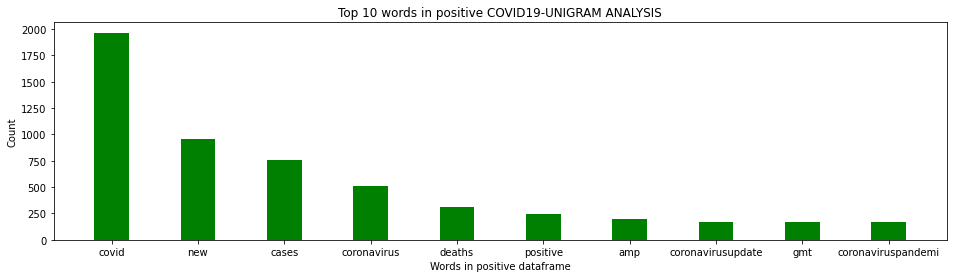

In [225]:
plt.figure(1,figsize=(16,4))
plt.bar(pd1,pd2, color ='green',
        width = 0.4)
plt.xlabel("Words in positive dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in positive COVID19-UNIGRAM ANALYSIS")
plt.savefig("positive-unigram.png")
plt.show()

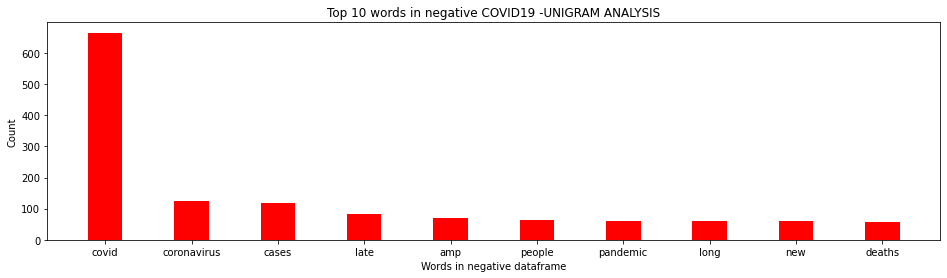

In [226]:
plt.figure(1,figsize=(16,4))
plt.bar(ned1,ned2, color ='red',
        width = 0.4)
plt.xlabel("Words in negative dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in negative COVID19 -UNIGRAM ANALYSIS")
plt.savefig("negative-unigram.png")
plt.show()

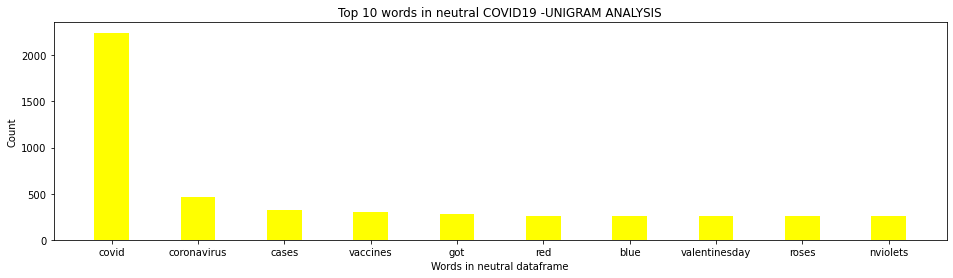

In [227]:
plt.figure(1,figsize=(16,4))
plt.bar(nud1,nud2, color ='yellow',
        width = 0.4)
plt.xlabel("Words in neutral dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in neutral COVID19 -UNIGRAM ANALYSIS")
plt.savefig("neutral-unigram.png")
plt.show()

In [228]:
positiveValues2=defaultdict(int)
negativeValues2=defaultdict(int)
neutralValues2=defaultdict(int)
#get the count of every word in both the columns of df_train and df_test dataframes

In [229]:
#get the count of every word in both the columns of df_train and df_test dataframes where sentiment="positive"
for text in df_train[df_train.sentiment=="positive"].text:
  for word in generate_N_grams(text,2):
    positiveValues2[word]+=1

Sentence after removing stopwords: ['covid', 'still', 'important', 'story', 'world', 'impact', 'supply', 'chains', 'energy', 'monetary', 'amp', 'fiscal', 'policy', 'f']
Sentence after removing stopwords: ['people', 'testing', 'positive', 'coronavirus', 'infection', 'day', 'india', 'total', 'tally', 'cases', 'increa']
Sentence after removing stopwords: ['icymi', 'eua', 'submitted', 'children', 'ages', 'using', 'traditional', 'safe', 'non', 'mrna', 'vaccine', 'covaxin']
Sentence after removing stopwords: ['leaders', 'test', 'positive', 'situations', 'nthen', 'teens', 'nif', 'online', 'meeting']
Sentence after removing stopwords: ['good', 'news', 'soof', 'florida', 'coronavirus', 'hospitalizations', 'deaths', 'doubled', 'since', 'last', 'week']
Sentence after removing stopwords: ['needs', 'stais', 'honest', 'truth', 'children', 'used', 'herd', 'immunity', 'spreaders', 'without', 'concern']
Sentence after removing stopwords: ['desigual', 'new', 'light', 'hope', 'awakened', 'horizon', 'worl

Sentence after removing stopwords: ['china', 'wuhan', 'scientists', 'raise', 'alarm', 'new', 'covid', 'virus', 'neocov', 'none', 'three', 'infected', 'people', 'could', 'die']
Sentence after removing stopwords: ['vice', 'president', 'venkaiahnaidu', 'tested', 'positive', 'covid', 'second', 'time', 'naidu', 'infec']
Sentence after removing stopwords: ['pakistan', 'reports', 'nearly', 'new', 'cases', 'deaths', 'nfollow', 'updates', 'coronavirus']
Sentence after removing stopwords: ['media', 'innocent', 'omicrom', 'covid', 'covid', 'coronavirus', 'pandemi']
Sentence after removing stopwords: ['truthful', 'statement', 'future', 'covid', 'fauci', 'today', 'know', 'xe', 'thisweekab']
Sentence after removing stopwords: ['foxnews', 'nothing', 'like', 'good', 'war', 'distract', 'everyone', 'biden', 'utter', 'failures', 'illegal', 'immigrant', 'invasion']
Sentence after removing stopwords: ['covid', 'g', 'countries', 'japan', 'old', 'population', 'vaccine', 'mandates', 'high', 'vaccine', 'uptake

Sentence after removing stopwords: ['incredible', 'kudos', 'teacher', 'right', 'thing', 'letting', 'parents', 'know', 'hard', 'believe', 'th']
Sentence after removing stopwords: ['vice', 'president', 'venkaiah', 'naidu', 'tests', 'positive', 'covid', 'nmore', 'venkaiahnaidu']
Sentence after removing stopwords: ['repdanbishop', 'jimjordan', 'judiciarygop', 'repdanbishop', 'doesnx', 'xt', 'care', 'certain', 'groups', 'likely', 'hospital']
Sentence after removing stopwords: ['newzealand', 'coronavirus', 'taliban', 'helps', 'pregnant', 'new', 'zealand', 'journalist', 'stranded', 'quarantine', 'rules', 'charlotte', 'bell']
Sentence after removing stopwords: ['new', 'cases', 'covid', 'infection', 'singapore', 'xbxfon', 'jan', 'nxf', 'xx', 'xdxf', 'xx', 'xdxf', 'xx', 'xdxf', 'local', 'nxc', 'xef', 'xbimported', 'ntotal']
Sentence after removing stopwords: ['coronavirus', 'new', 'cases', 'state', 'jan', 'pm', 'et', 'ntop', 'california', 'florida', 'alabama']
Sentence after removing stopwords: 

Sentence after removing stopwords: ['work', 'speak', 'old', 'generation', 'contacts', 'countrywide', 'significant', 'proportion', 'terrifi']
Sentence after removing stopwords: ['jan', 'bihar', 'covid', 'update', 'nnotice', 'new', 'look', 'bulletin', 'good', 'job', 'biharhealthdep']
Sentence after removing stopwords: ['good', 'morning', 'even', 'americans', 'fully', 'vaccinated', 'covid', 'rest']
Sentence after removing stopwords: ['joni', 'mitchell', 'se', 'une', 'neil', 'young', 'en', 'protesta', 'contra', 'spotify', 'sportify', 'protestas', 'fakenews', 'coronavirus']
Sentence after removing stopwords: ['action', 'plan', 'manage', 'conditions', 'please', 'remember', 'follow', 'xn', 'covid', 'coronaviru']
Sentence after removing stopwords: ['wore', 'seatbelt', 'church', 'today', 'guys', 'would', 'feel', 'safe', 'cars', 'ix', 'xm', 'thoughtful', 'like', 'covid', 'staysaf']
Sentence after removing stopwords: ['study', 'also', 'found', 'high', 'rate', 'preterm', 'birth', 'among', 'women',

Sentence after removing stopwords: ['quick', 'easy', 'overview', 'best', 'telehealth', 'practices', 'working', 'home', 'plus', 'covid', 'regulatory', 'updates']
Sentence after removing stopwords: ['ajassy', 'jeffbezos', 'amazonhelp', 'amazonca', 'amazon', 'amazon', 'worker', 'mask', 'touching', 'face', 'touching', 'thousands', 'c']
Sentence after removing stopwords: ['new', 'covid', 'data', 'est', 'coronavirus', 'covid', 'covid']
Sentence after removing stopwords: ['add', 'existing', 'data', 'covidc', 'xefpreeclampsia', 'risk', 'counsel', 'pregnant', 'people', 'vaccinat']
Sentence after removing stopwords: ['bellawallerstei', 'like', 'many', 'others', 'never', 'really', 'paid', 'price', 'ought', 'done']
Sentence after removing stopwords: ['new', 'cases', 'new', 'deaths', 'sri', 'lanka', 'gmt', 'coronavirus', 'coronavirusupdate', 'covid', 'coronaviruspandemi']
Sentence after removing stopwords: ['absolutely', 'brilliant', 'commentary', 'currently', 'coercive', 'discriminatory', 'covid',

Sentence after removing stopwords: ['saudi', 'arabia', 'confirms', 'new', 'covid', 'cases', 'moisaudiarabia', 'records', 'violations', 'preca']
Sentence after removing stopwords: ['new', 'cases', 'new', 'deaths', 'lithuania', 'gmt', 'coronavirus', 'coronavirusupdate', 'covid', 'coronaviruspandemi']
Sentence after removing stopwords: ['jan', 'newly', 'confirmed', 'covid', 'cases', 'cases', 'really', 'declining', 'testing', 'saturday', 'postponed', 'due']
Sentence after removing stopwords: ['attn', 'americans', 'living', 'disabilities', 'amp', 'chronicillness', 'loved', 'ones', 'xxf', 'ximportant', 'pwd', 'video', 'dialogue', 'ab']
Sentence after removing stopwords: ['realdoctormike', 'said', 'many', 'times', 'fever', 'helps', 'amp', 'donx', 'xt', 'know', 'think', 'chest', 'compressions', 'instead']
Sentence after removing stopwords: ['covid', 'fog', 'disperses', 'able', 'survey', 'damage', 'done', 'public', 'amp', 'mental', 'health']
Sentence after removing stopwords: ['ix', 'xm', 'also

Sentence after removing stopwords: ['interesting', 'especially', 'since', 'ivermectin', 'standard', 'issue', 'treatment', 'covid', 'doctors', 'bolivia']
Sentence after removing stopwords: ['army', 'pan', 'coronavirus', 'vaccine', 'could', 'wipe', 'covid', 'pandemics', 'spfn', 'successfully', 'completed', 'animal', 'testing', 'pha']
Sentence after removing stopwords: ['new', 'covid', 'research', 'available', 'nread', 'newly', 'added', 'articles', 'related', 'covid', 'scholars', 'portal', 'journals']
Sentence after removing stopwords: ['late', 'new', 'years', 'resolution', 'start', 'let', 'us', 'provide', 'free', 'suppoto', 'achieve', 'new', 'ye']
Sentence after removing stopwords: ['trader', 'joes', 'natural', 'assorted', 'flavors', 'gt', 'food', 'stayathome', 'stayhome', 'treats']
Sentence after removing stopwords: ['new', 'youtube', 'video', 'letx', 'gooo', 'come', 'subscribe', 'jay', 'smitty', 'channel', 'new', 'variant', 'covid', 'called', 'ba', 'wt']
Sentence after removing stopwor

Sentence after removing stopwords: ['xmm', 'true', 'like', 'way', 'covid', 'coronavirus', 'changed', 'world', 'must', 'adapt', 'normal', 'xfxf', 'newwor']
Sentence after removing stopwords: ['covid', 'total', 'people', 'tested', 'positive', 'virus', 'parliament', 'house', 'complex', 'far', 'people']
Sentence after removing stopwords: ['new', 'cases', 'new', 'deaths', 'japan', 'gmt', 'coronavirus', 'coronavirusupdate', 'covid', 'coronaviruspandemi']
Sentence after removing stopwords: ['bariweiss', 'billmaher', 'realtimers', 'spend', 'months', 'working', 'full', 'time', 'icu', 'ward', 'covid', 'patients']
Sentence after removing stopwords: ['deepika', 'padukone', 'looks', 'absolutely', 'gorgeous', 'black', 'bodycon', 'dress', 'internet', 'fire', 'nbits', 'news', 'india', 'news', 'covid']
Sentence after removing stopwords: ['icymi', 'study', 'looked', 'large', 'sample', 'size', 'workers', 'throughout', 'canada', 'infecitousdisease', 'covi']
Sentence after removing stopwords: ['new', 'jers

Sentence after removing stopwords: ['early', 'study', 'bangladesh', 'suggests', 'five', 'day', 'course', 'ivermectin', 'may', 'reduce', 'duration', 'covid']
Sentence after removing stopwords: ['tutorial', 'make', 'natural', 'anti', 'viral', 'hand', 'sanitizer', 'gt', 'gt', 'coronavirus']
Sentence after removing stopwords: ['kerala', 'reports', 'new', 'covid', 'cases', 'recoveries', 'amp', 'deaths', 'last', 'hrs', 'deaths', 'added']
Sentence after removing stopwords: ['morarji', 'desai', 'national', 'institute', 'yoga', 'association', 'moa', 'conduct', 'live', 'yoga', 'amp', 'interactive', 'sessions', 'gu']
Sentence after removing stopwords: ['frenchentree', 'new', 'light', 'hope', 'awakened', 'horizon', 'world', 'emerges', 'pandemic', 'shelby']
Sentence after removing stopwords: ['january', 'critical', 'care', 'services', 'ontario', 'reporting', 'adult', 'covid', 'related', 'critical', 'illness', 'crci', 'patients']
Sentence after removing stopwords: ['covid', 'city', 'wise', 'corona',

Sentence after removing stopwords: ['speaker', 'mahinda', 'yapa', 'abeywardena', 'tested', 'positive', 'coronavirus', 'read', 'full', 'story']
Sentence after removing stopwords: ['protectionsarenotrestrictions', 'keep', 'families', 'safe', 'covi']
Sentence after removing stopwords: ['new', 'cases', 'new', 'deaths', 'uzbekistan', 'gmt', 'coronavirus', 'coronavirusupdate', 'covid', 'coronaviruspandemi']
Sentence after removing stopwords: ['bjpindia', 'respected', 'sir', 'eminent', 'leaders', 'claiming', 'pretending', 'covid', 'perfectly', 'control']
Sentence after removing stopwords: ['coronavirus', 'bangladesh', 'reports', 'deaths', 'cases', 'hours', 'bangladesh', 'live', 'new']
Sentence after removing stopwords: ['fact', 'evidence', 'current', 'outbreak', 'eating', 'garlic', 'protected', 'people', 'new', 'coronav']
Sentence after removing stopwords: ['hi', 'looking', 'facebook', 'marketer', 'professional', 'facebook', 'marketer', 'within', 'years', 'ncheck', 'portf']
Sentence after rem

Sentence after removing stopwords: ['hope', 'enjoyed', 'idsainfo', 'cdcgov', 'clinician', 'call', 'yesterday', 'focusing', 'covid', 'rx', 'high', 'risk', 'populations']
Sentence after removing stopwords: ['far', 'much', 'ambiguity', 'covid', 'world', 'leadership', 'mask', 'mask', 'cases', 'going']
Sentence after removing stopwords: ['yesterday', 'friends', 'today', 'itx', 'covid', 'right', 'plus', 'funeral', 'week', 'friend', 'die']
Sentence after removing stopwords: ['xcthe', 'right', 'thingx', 'xd', 'others', 'take', 'medical', 'treatments', 'something', 'donx', 'xt', 'need', 'doesnx', 'xt', 'stop']
Sentence after removing stopwords: ['vice', 'president', 'venkaiah', 'naidu', 'tested', 'covid', 'positive', 'decides', 'remain', 'self', 'isolation', 'wee']
Sentence after removing stopwords: ['newzealand', 'prime', 'minister', 'postponed', 'wedding', 'covid', 'politicians', 'learn', 'good', 'exam']
Sentence after removing stopwords: ['vice', 'president', 'venkaiah', 'naidu', 'tested', '

Sentence after removing stopwords: ['worth', 'watch', 'covid', 'ndr', 'david', 'martin', 'xctheyx', 'xd', 'xcthe', 'names', 'amp', 'amp', 'faces', 'people', 'killing', 'hum']
Sentence after removing stopwords: ['hi', 'xasean', 'family', 'newsfromindonesiaxf', 'xexf', 'covid', 'indonesiaxf', 'xexf', 'january', 'nxf', 'xbnew', 'confirmed', 'cases', 'nxfcum']
Sentence after removing stopwords: ['covid', 'update', 'gt', 'gt', 'gt', 'jammuandkashmir', 'reported', 'fresh', 'covid', 'cases', 'amp', 'deaths', 'last', 'hr']
Sentence after removing stopwords: ['puchka', 'dying', 'right', 'covi']
Sentence after removing stopwords: ['sue', 'keep', 'employees', 'long', 'employees', 'hostage', 'excellent', 'quote', 'anot']
Sentence after removing stopwords: ['joni', 'mitchell', 'wants', 'songs', 'spotify', 'covid', 'row', 'beritaterkini', 'internationalnews']
Sentence after removing stopwords: ['new', 'paper', 'summarizes', 'currently', 'available', 'covid', 'therapeutics', 'nonhospitalized', 'patie

Sentence after removing stopwords: ['tightrope', 'nbc', 'joebiden', 'faces', 'eroding', 'suppoamong', 'independents', 'economy', 'replaces', 'covid', 'top']
Sentence after removing stopwords: ['jeffrey', 'k', 'walker', 'blog', 'trip', 'west', 'old', 'man', 'california', 'coronaviru']
Sentence after removing stopwords: ['new', 'covid', 'data', 'pm', 'est', 'coronavirus', 'covid', 'covid']
Sentence after removing stopwords: ['people', 'dying', 'record', 'high', 'rates', 'itx', 'covid', 'nwe', 'would', 'expect']
Sentence after removing stopwords: ['joni', 'mitchell', 'following', 'neil', 'young', 'removing', 'music', 'spotify', 'canadian', 'born', 'singer', 'songwriters']
Sentence after removing stopwords: ['two', 'years', 'pandemic', 'taught', 'us', 'anything', 'covid', 'adapting', 'humans', 'fast', 'humans']
Sentence after removing stopwords: ['greece', 'confirms', 'new', 'coronavirus', 'infections', 'sat', 'deaths', 'ventilators']
Sentence after removing stopwords: ['joyannreid', 'doug

Sentence after removing stopwords: ['making', 'us', 'feel', 'good', 'rona', 'isolation', 'covi']
Sentence after removing stopwords: ['west', 'bengal', 'records', 'new', 'covid', 'cases', 'amp', 'deaths', 'last', 'hours', 'active', 'cases', 'stand']
Sentence after removing stopwords: ['film', 'covid', 'warroom', 'unpaused', 'best', 'shoi', 'seen', 'long', 'time', 'getkul', 'brilliant', 'ever']
Sentence after removing stopwords: ['aaronrodgers', 'open', 'appointments', 'vaccinations', 'today', 'arenx', 'xt', 'busy', 'sayin', 'getvaccinated']
Sentence after removing stopwords: ['attn', 'americans', 'living', 'disabilities', 'amp', 'chronicillness', 'loved', 'ones', 'xxf', 'ximportant', 'pwd', 'video', 'dialogue', 'ab']
Sentence after removing stopwords: ['new', 'cases', 'new', 'deaths', 'vietnam', 'gmt', 'coronavirus', 'coronavirusupdate', 'covid', 'coronaviruspandemi']
Sentence after removing stopwords: ['kuwait', 'reports', 'new', 'covid', 'cases', 'one', 'deat']
Sentence after removing

Sentence after removing stopwords: ['serbia', 'covid', 'tested', 'positive', 'new', 'confirmed', 'patient']
Sentence after removing stopwords: ['social', 'distancing', 'inteoduced', 'pandemic', 'coronavirus', 'measure']
Sentence after removing stopwords: ['kerala', 'covid', 'cases', 'jumps', 'today', 'new', 'cases', 'tp']
Sentence after removing stopwords: ['fact', 'people', 'ages', 'infected', 'new', 'coronavirus', 'ncov', 'coronaviru']
Sentence after removing stopwords: ['thoughts', 'covid', 'vaccines', 'reason', 'many', 'heart', 'health', 'issues']
Sentence after removing stopwords: ['nytimes', 'stories', 'lambasting', 'demonizing', 'china', 'covid', 'success', 'petty', 'covi']
Sentence after removing stopwords: ['breaking', 'hawaii', 'records', 'new', 'coronavirus', 'related', 'deaths', 'additional', 'infections', 'covid']
Sentence after removing stopwords: ['update', 'january', 'novel', 'coronavirus', 'cases', 'malta', 'total', 'cases', 'new', 'cases', 'active', 'cases']
Sentence 

Sentence after removing stopwords: ['new', 'covid', 'data', 'est', 'coronavirus', 'covid', 'covid']
Sentence after removing stopwords: ['drop', 'number', 'critical', 'cases', 'saudiarabia', 'proves', 'covid', 'vaccines', 'effectiveness', 'spokesman']
Sentence after removing stopwords: ['finished', 'netflix', 'doc', 'peaks', 'nothing', 'impossiblex', 'nimsdai', 'nims', 'absolute', 'legend', 'amp', 'inspir']
Sentence after removing stopwords: ['biharfightscorona', 'nupdate', 'day', 'nxe', 'xefmore', 'covid', 'cases', 'reported', 'far', 'nd', 'jan']
Sentence after removing stopwords: ['good', 'morning', 'north', 'york', 'forget', 'face', 'coverings', 'mandatory', 'ttc', 'masks', 'cover', 'nose']
Sentence after removing stopwords: ['man', 'thought', 'phase', 'nearly', 'done', 'yet', 'marburg', 'way', 'cover', 'vaccine', 'deaths']
Sentence after removing stopwords: ['new', 'cases', 'new', 'deaths', 'slovenia', 'gmt', 'coronavirus', 'coronavirusupdate', 'covid', 'coronaviruspandemi']
Sentenc

Sentence after removing stopwords: ['new', 'deaths', 'day', 'ntotal', 'deaths', 'day', 'coronavirus', 'covid', 'sarsco']
Sentence after removing stopwords: ['wearing', 'mask', 'helps', 'prevent', 'spread', 'omicronvariant', 'omicron', 'covid', 'mask', 'best', 'orde']
Sentence after removing stopwords: ['total', 'confirmed', 'covid', 'cases', 'county', 'md', 'covid', 'insights', 'analytics', 'team', 'usafacts']
Sentence after removing stopwords: ['go', 'new', 'year', 'new', 'strain', 'neocov', 'spreads', 'among', 'bats', 'south', 'africa', 'coronavirus', 'neocov', 'bats', 'chin']
Sentence after removing stopwords: ['dyk', 'every', 'home', 'us', 'order', 'free', 'xhome', 'covid', 'tests', 'tests', 'completely', 'free']
Sentence after removing stopwords: ['believe', 'leaders', 'responsibility', 'endthepandemic', 'join', 'global', 'week', 'action', 'tackle', 'th']
Sentence after removing stopwords: ['get', 'vaccinated', 'covid', 'use', 'free', 'shuttle', 'service', 'northwest', 'toronto', 

Sentence after removing stopwords: ['xnot', 'sustainablex', 'omicron', 'tests', 'chinax', 'zero', 'covid', 'policy', 'first', 'cases', 'detecte']
Sentence after removing stopwords: ['vice', 'president', 'mvenkaiahnaidu', 'tested', 'covid', 'positive', 'today', 'coronapositive']
Sentence after removing stopwords: ['pandemic', 'covid', 'texas', 'nnew', 'confirmed', 'infections', 'nnew', 'probable', 'infections', 'nnew', 'deaths', 'nadult']
Sentence after removing stopwords: ['kiribati', 'one', 'worldx', 'last', 'covid', 'free', 'places', 'itx', 'lockdown', 'covid', 'omicro']
Sentence after removing stopwords: ['visible', 'mold', 'growth', 'developed', 'consider', 'professional', 'air', 'duct', 'cleaning', 'help', 'bradenton', 'sarasota']
Sentence after removing stopwords: ['far', 'complaints', 'paid', 'quarantine', 'leave', 'workers', 'dole']
Sentence after removing stopwords: ['new', 'cases', 'new', 'deaths', 'jordan', 'gmt', 'coronavirus', 'coronavirusupdate', 'covid', 'coronaviruspand

Sentence after removing stopwords: ['doctors', 'scientists', 'virologist', 'got', 'kicked', 'social', 'media', 'making', 'claims', 'natural', 'immun']
Sentence after removing stopwords: ['made', 'great', 'progress', 'protecting', 'community', 'must', 'continue', 'take', 'steps', 'stop']
Sentence after removing stopwords: ['queen', 'guitarist', 'brian', 'may', 'holds', 'phd', 'astrophysics', 'scientist', 'tested', 'positive', 'sars', 'coronavirus', 'last']
Sentence after removing stopwords: ['delhi', 'reports', 'new', 'covid', 'cases', 'deaths', 'last', 'hours', 'active', 'cases', 'npositivity', 'rate']
Sentence after removing stopwords: ['dr', 'rupeshrainamd', 'discussing', 'pcrrt', 'iconic', 'guidelines', 'pediatric', 'kidney', 'suppoin', 'covid', 'pcrrtadvances']
Sentence after removing stopwords: ['inpics', 'mu', 'delta', 'ihu', 'neocov', 'list', 'many', 'variants', 'coronavirus']
Sentence after removing stopwords: ['wait', 'people', 'good', 'reasons', 'getting', 'vaccinated', 'some

Sentence after removing stopwords: ['delhi', 'reports', 'new', 'covid', 'cases', 'recoveries', 'deaths', 'last', 'hours', 'act']
Sentence after removing stopwords: ['new', 'cases', 'new', 'deaths', 'poland', 'gmt', 'coronavirus', 'coronavirusupdate', 'covid', 'coronaviruspandemi']
Sentence after removing stopwords: ['bosnia', 'registers', 'new', 'coronavirus', 'infections', 'covid', 'fatalitie']
Sentence after removing stopwords: ['test', 'amp', 'go', 'return', 'gets', 'early', 'test', 'thailand', 'bangkok', 'phuket', 'samui', 'pattaya', 'ayutthaya', 'chiangmai', 'covid']
Sentence after removing stopwords: ['covid', 'albania', 'victims', 'new', 'confirmed', 'cases', 'nxe', 'xefx']
Sentence after removing stopwords: ['coronavirusupdate', 'things', 'looking', 'good', 'fauci', 'says', 'confident', 'states', 'reach', 'peak', 'omicron']
Sentence after removing stopwords: ['covid', 'cases', 'soaring', 'fresno', 'county', 'throughout', 'country', 'due', 'high', 'transmissibility', 'om']
Sente

Sentence after removing stopwords: ['new', 'cases', 'new', 'deaths', 'romania', 'gmt', 'coronavirus', 'coronavirusupdate', 'covid', 'coronaviruspandemi']
Sentence after removing stopwords: ['according', 'cdc', 'individuals', 'hospitalized', 'us', 'covid', 'tuesday', 'high']
Sentence after removing stopwords: ['daily', 'snapshot', 'total', 'cases', 'crossed', 'million', 'pm', 'new', 'cases', 'reported', 'across', 'southe']
Sentence after removing stopwords: ['independentie', 'clearly', 'studies', 'shown', 'people', 'simply', 'need', 'vaccine', 'covid']
Sentence after removing stopwords: ['randpaul', 'icymi', 'eua', 'submitted', 'children', 'ages', 'using', 'traditional', 'safe', 'non', 'mrna', 'vaccine']
Sentence after removing stopwords: ['children', 'deserve', 'safe', 'school', 'elderly', 'vulnerable', 'deserve', 'safe', 'covid']
Sentence after removing stopwords: ['good', 'morning', 'coronavirus', 'vietna']
Sentence after removing stopwords: ['bjpbengal', 'respected', 'sir', 'goi', '

Sentence after removing stopwords: ['total', 'confirmed', 'covid', 'cases', 'county', 'nm', 'covid', 'insights', 'analytics', 'team', 'usafacts']
Sentence after removing stopwords: ['profcolindavis', 'bizarre', 'january', 'number', 'new', 'covid', 'infection', 'uk', 'continued', 'increase']
Sentence after removing stopwords: ['abhishekaitc', 'respected', 'sir', 'eminent', 'leaders', 'claiming', 'pretending', 'covid', 'perfectly', 'control', 'th']
Sentence after removing stopwords: ['new', 'cases', 'laos', 'gmt', 'coronavirus', 'coronavirusupdate', 'covid', 'coronaviruspandemi']
Sentence after removing stopwords: ['drianweissman', 'drlindamd', 'evankirstel', 'nkagetsu', 'rstraxmd', 'friedbergeric', 'true', 'leader', 'womenempowerment']
Sentence after removing stopwords: ['delhi', 'sunday', 'reported', 'new', 'covid', 'cases', 'coronavirus', 'omicron', 'india', 'thirdwaveofcorona', 'theweek']
Sentence after removing stopwords: ['coronavirusupdate', 'coronaviruspandemic', 'new', 'covid', 

Sentence after removing stopwords: ['impact', 'covid', 'drowning', 'patterns', 'great', 'lakes', 'region', 'north', 'america', 'sarscovtimeline']
Sentence after removing stopwords: ['govt', 'must', 'ignore', 'advice', 'risk', 'k', 'shaped', 'recovery', 'high', 'post', 'covid', 'also', 'increasing', 'fisca']
Sentence after removing stopwords: ['ons', 'reveal', 'new', 'foi', 'request', 'died', 'covid', 'sole', 'cause', 'february']
Sentence after removing stopwords: ['catastrophic', 'moral', 'crime', 'bari', 'weiss', 'amp', 'bill', 'maher', 'say', 'quiet', 'paout', 'loud', 'leftist', 'covid', 'policies']
Sentence after removing stopwords: ['new', 'cases', 'new', 'deaths', 'iraq', 'gmt', 'coronavirus', 'coronavirusupdate', 'covid', 'coronaviruspandemi']
Sentence after removing stopwords: ['account', 'requires', 'many', 'reports', 'abusive', 'spreads', 'propaganda', 'likely', 'russian', 'troll', 'righ']
Sentence after removing stopwords: ['mandatory', 'vaccinations', 'coercive', 'manipulati

Sentence after removing stopwords: ['ne', 'delhi', 'least', 'new', 'slots', 'available', 'amp', 'ncovishield', 'ndose', 'ndose']
Sentence after removing stopwords: ['steveguest', 'bourbon', 'yesterday', 'count', 'presssec', 'also', 'used', 'covid', 'bs', 'good', 'life']
Sentence after removing stopwords: ['ne', 'delhi', 'least', 'new', 'slots', 'available', 'amp', 'ncovishield', 'ndose', 'ndose']
Sentence after removing stopwords: ['punjab', 'reports', 'new', 'covid', 'cases', 'deaths', 'today', 'active', 'cases', 'state', 'stand']
Sentence after removing stopwords: ['covid', 'watch', 'sing', 'online', 'full', 'movie', 'free', 'download', 'amp', 'online', 'streaming', 'free', 'nsing', 'movies', 'hd', 'link']
Sentence after removing stopwords: ['covid', 'cases', 'among', 'indonesian', 'citizens', 'abroad', 'january', 'new', 'cases', 'gt']
Sentence after removing stopwords: ['vice', 'president', 'mvenkaiahnaidu', 'tests', 'positive', 'covid']
Sentence after removing stopwords: ['total', 

Sentence after removing stopwords: ['live', 'sanfrancisco', 'covid', 'pay', 'stayhome', 'donx', 'xt', 'infect', 'anyone', 'else']
Sentence after removing stopwords: ['counties', 'high', 'covid', 'vaccination', 'rate', 'wisconsin', 'ngreen', 'bay', 'must', 'listening']
Sentence after removing stopwords: ['dan', 'admits', 'sex', 'addict', 'would', 'seek', 'sex', 'prostitutes', 'new', 'york', 'city', 'four', 'nights', 'week', 'neve']
Sentence after removing stopwords: ['breakingnews', 'news', 'biden', 'blocks', 'unvaxxed', 'truckers', 'canada', 'mexico', 'create', 'food', 'shortage', 'make', 'sure']
Sentence after removing stopwords: ['beijing', 'reported', 'nine', 'locally', 'transmitted', 'covid', 'cases', 'including', 'five', 'confirmed', 'cases', 'four', 'asymptomatic', 'car']
Sentence after removing stopwords: ['modern', 'chic', 'black', 'white', 'squares', 'lines', 'pattern', 'adult', 'cloth', 'face', 'mask', 'facemasks', 'omicron']
Sentence after removing stopwords: ['covid', 'posi

Sentence after removing stopwords: ['new', 'cases', 'new', 'deaths', 'germany', 'gmt', 'coronavirus', 'coronavirusupdate', 'covid', 'coronaviruspandemi']
Sentence after removing stopwords: ['timesfreepress', 'govbilllee', 'wants', 'flexibility', 'yet', 'makes', 'law', 'local', 'school', 'districts', 'make']
Sentence after removing stopwords: ['korea', 'reports', 'second', 'high', 'covid', 'count', 'ahead', 'holiday', 'southkorea']
Sentence after removing stopwords: ['statistics', 'indicates', 'covid', 'cases', 'declined', 'state', 'reported', 'new', 'cases', 'sunday', 'patients']
Sentence after removing stopwords: ['today', 'covidxf', 'jan', 'nxfthe', 'true', 'number', 'covid', 'cases', 'week', 'christmas', 'likely', 'near']
Sentence after removing stopwords: ['economy', 'france', 'grew', 'fast', 'pace', 'since', 'last', 'year', 'official', 'data', 'showed', 'enjoying', 'strong', 'rebound']
Sentence after removing stopwords: ['narrative', 'collapsing', 'nlisten', 'someone', 'originally

Sentence after removing stopwords: ['budget', 'initially', 'reluctant', 'year', 'old', 'haji', 'iqbal', 'joined', 'wave', 'local', 'store', 'owners', 'go', 'digit']
Sentence after removing stopwords: ['benegle', 'lol', 'wake', 'covid', 'donotcompl']
Sentence after removing stopwords: ['covid', 'severity', 'predicted', 'early', 'presence', 'afucosylated', 'antibodies', 'nin', 'new', 'study', 'blood', 'drawn', 'patients']
Sentence after removing stopwords: ['new', 'cases', 'new', 'deaths', 'czechia', 'gmt', 'coronavirus', 'coronavirusupdate', 'covid', 'coronaviruspandemi']
Sentence after removing stopwords: ['dr', 'irene', 'bosch', 'harvard', 'trained', 'venezuelan', 'scientist', 'developed', 'affordable', 'covid', 'test', 'early', 'pandemi']
Sentence after removing stopwords: ['another', 'quarters', 'covid', 'mental', 'disorder', 'hopefully', 'mostly', 'withx', 'xthough', 'wex', 'xll', 'resid']
Sentence after removing stopwords: ['years', 'minutes', 'covid', 'ncheers', 'good', 'time', '

Sentence after removing stopwords: ['maryland', 'covid', 'race', 'cases', 'continue', 'decline', 'deaths', 'still', 'rise', 'many', 'per', 'capita', 'wor']
Sentence after removing stopwords: ['parent', 'happy', 'although', 'nervous', 'nova', 'scotia', 'resumed', 'person', 'learning', 'last', 'week', 'even']
Sentence after removing stopwords: ['dear', 'dads', 'ndo', 'everything', 'pwer', 'set', 'kid', 'success', 'invest', 'ask', 'help', 'ord']
Sentence after removing stopwords: ['beijing', 'deal', 'coronavirus', 'telling', 'us', 'cases', 'death', 'counts', 'send', 'best']
Sentence after removing stopwords: ['today', 'team', 'carrying', 'another', 'covid', 'defend', 'application', 'time', 'swallow', 'dell', 'primary', 'school', 'hert']
Sentence after removing stopwords: ['omicron', 'wave', 'explained', 'covid', 'article', 'new', 'charts', 'marceelias', 'cthagod']
Sentence after removing stopwords: ['new', 'cases', 'new', 'deaths', 'chile', 'gmt', 'coronavirus', 'coronavirusupdate', 'covi

Sentence after removing stopwords: ['indiafightscorona', 'rajasthan', 'nrd', 'jan', 'covid', 'pm', 'bulletin', 'nplz', 'keep', 'maskupxf', 'amp', 'staysafe', 'positive', 'case']
Sentence after removing stopwords: ['skepticism', 'covid', 'vaccine', 'healthy', 'normal', 'still', 'got', 'vaccinated', 'skeptical', 'anti', 'vaxxer']
Sentence after removing stopwords: ['beat', 'coronavirus', 'crushing', 'feet', 'gocoronag']
Sentence after removing stopwords: ['beautiful', 'parents', 'mom', 'dad', 'died', 'pre', 'covid', 'may', 'underlying', 'health', 'issues', 'die']
Sentence after removing stopwords: ['week', 'sheffield', 'new', 'confirmed', 'cases', 'covid', 'decrease', 'previous', 'week']
Sentence after removing stopwords: ['give', 'much', 'credit', 'time', 'alive', 'live', 'die', 'covi']
Sentence after removing stopwords: ['sincere', 'thanks', 'organising', 'team', 'covid', 'vaccination', 'camp', 'held', 'educrafter', 'institute', 'b', 'block', 'ashok', 'nagar']
Sentence after removing s

Sentence after removing stopwords: ['nwhirlpool', 'cu', 'ft', 'range', 'microwave', 'fingerprint', 'resistant', 'stainless', 'steel', 'steam', 'cookin']
Sentence after removing stopwords: ['omicron', 'wave', 'experts', 'optimistic', 'could', 'come', 'next', 'us', 'na', 'large', 'population']
Sentence after removing stopwords: ['article', 'could', 'mild', 'covid', 'symptoms', 'lead', 'brain', 'damage']
Sentence after removing stopwords: ['barackobama', 'hillaryclinton', 'students', 'saulalinsky', 'alinskyx', 'first', 'rule', 'xcyou', 'control', 'peoples', 'health']
Sentence after removing stopwords: ['many', 'wonderful', 'doctors', 'settled', 'ireland', 'contributing', 'healthcare', 'b', 'pandemic', 'covid', 'nto']
Sentence after removing stopwords: ['vanity', 'fair', 'women', 'plus', 'size', 'smoothing', 'minimizer', 'bra', 'c', 'h', 'beauty', 'back', 'neutral', 'nclick']
Sentence after removing stopwords: ['covid', 'underlined', 'forcefully', 'sdgs', 'important', 'ultimate', 'testamen

Sentence after removing stopwords: ['one', 'lakh', 'people', 'covid', 'symptoms', 'identified', 'telangana', 'first', 'two', 'days', 'state']
Sentence after removing stopwords: ['andhrapradesh', 'sees', 'new', 'covid', 'cases', 'amp', 'deaths', 'jan', 'present', 'active', 'cases', 'stat']
Sentence after removing stopwords: ['india', 'reported', 'new', 'coronavirus', 'cases', 'hours', 'along', 'deaths', 'health', 'ministry', 'said', 'nthe']
Sentence after removing stopwords: ['new', 'cases', 'ireland', 'gmt', 'coronavirus', 'coronavirusupdate', 'covid', 'coronaviruspandemi']
Sentence after removing stopwords: ['surge', 'highly', 'contagious', 'omicron', 'variant', 'covid', 'publichealth', 'experts', 'us', 'trying']
Sentence after removing stopwords: ['god', 'great', 'covi']
Sentence after removing stopwords: ['ani', 'stop', 'sharing', 'like', 'cricket', 'commentary', 'allow', 'people', 'live', 'adapt', 'new', 'living', 'conditions']
Sentence after removing stopwords: ['giving', 'cats', 

Sentence after removing stopwords: ['india', 'registers', 'lakh', 'new', 'covid', 'cases', 'deaths', 'covid', 'coronaviru']
Sentence after removing stopwords: ['time', 'vaccine', 'mandates', 'even', 'low', 'rate', 'covid', 'shots', 'kids', 'experts', 'make', 'easy']
Sentence after removing stopwords: ['booster', 'vaccines', 'xbc', 'xbc', 'available', 'pharmacies', 'galvez', 'coronavirus']
Sentence after removing stopwords: ['good', 'please', 'make', 'public', 'healthvermont', 'access', 'wastewater', 'data', 'said', 'katie', 'w']
Sentence after removing stopwords: ['new', 'covid', 'data', 'pm', 'est', 'coronavirus', 'covid', 'covid']
Sentence after removing stopwords: ['xcthe', 'world', 'large', 'struggling', 'fire', 'fighting', 'phase', 'pandemic', 'response', 'emergence', 'new']
Sentence after removing stopwords: ['scientists', 'racing', 'develop', 'covid', 'antivirals', 'nthe', 'first', 'crop', 'antivirals', 'sarscov', 'pro']
Sentence after removing stopwords: ['million', 'ontarians'

Sentence after removing stopwords: ['robreiner', 'itx', 'time', 'folks', 'itx', 'lock', 'bingo', 'please', 'share', 'letx', 'get', 'loud', 'itx', 'midterms']
Sentence after removing stopwords: ['scott', 'new', 'beginning', 'saturday', 'january', 'dhs', 'require', 'non', 'u', 'individualsxfseeking', 'enter', 'u', 'via']
Sentence after removing stopwords: ['new', 'alaska', 'seafood', 'industry', 'reporeflects', 'covid', 'impact', 'state', 'fishing', 'economy']
Sentence after removing stopwords: ['rajasthan', 'records', 'new', 'covid', 'cases', 'amp', 'deaths', 'today', 'active', 'cases', 'stand', 'coronavirus', 'covid']
Sentence after removing stopwords: ['malaysia', 'recorded', 'new', 'covid', 'cases', 'sunday', 'jan', 'bringing', 'cumulative', 'number', 'covid', 'infectio']
Sentence after removing stopwords: ['day', 'breaking', 'daily', 'case', 'record', 'poland', 'finally', 'reached', 'new', 'high', 'day', 'infection', 'rate', 'nthe']
Sentence after removing stopwords: ['coronavirus',

Sentence after removing stopwords: ['piersmorgan', 'xxf', 'xa', 'xxf', 'xaxf', 'xxf', 'xaxf', 'xxf', 'xaxf', 'xxf', 'xaxf', 'xxf', 'xaxf', 'xxf', 'xanew', 'study', 'german', 'prof', 'kuhbandner', 'shows', 'clear', 'correlation', 'vaccination', 'exc']
Sentence after removing stopwords: ['omicron', 'military', 'medical', 'team', 'helping', 'new', 'jersey', 'amid', 'coronavirus', 'wave', 'covid']
Sentence after removing stopwords: ['ukhsa', 'removals', 'net', 'new', 'covid', 'cases', 'reported', 'england', 'tests', 'taken', 'frid']
Sentence after removing stopwords: ['coronavirus', 'live', 'delhi', 'reports', 'new', 'covid', 'cases', 'deaths', 'positivity', 'rate']
Sentence after removing stopwords: ['sweetness', 'easter', 'happyeaster', 'easterbunny', 'love', 'eastereggs', 'spring', 'stayhome', 'eastersunday', 'bunny', 'covid', 'pasqua']
Sentence after removing stopwords: ['every', 'u', 'home', 'eligible', 'order', 'four', 'free', 'home', 'covid', 'tests', 'learn', 'order']
Sentence afte

Sentence after removing stopwords: ['texas', 'covid', 'much', 'care', 'metric', 'main', 'generally', 'b', 'c', 'case', 'seems', 'arbitrary', 'lo']
Sentence after removing stopwords: ['reuters', 'reuters', 'damn', 'china', 'beijing', 'shuts', 'mouths', 'foreign', 'free', 'athletes', 'invite', 'blog']
Sentence after removing stopwords: ['tfw', 'head', 'full', 'business', 'development', 'plans', 'covid', 'fatigue', 'says', 'covid', 'businessdevelopment', 'yesiknowitssunda']
Sentence after removing stopwords: ['watched', 'repoagain', 'ramsaysky', 'amp', 'alexcrawfordsky', 'hotspots', 'amazing', 'brave', 'journalism', 'society', 'owes', 'amp']
Sentence after removing stopwords: ['believe', 'leaders', 'responsibility', 'endthepandemic', 'join', 'global', 'week', 'action', 'tackle', 'th']
Sentence after removing stopwords: ['ncdcgov', 'ncdcgov', 'epi', 'week', 'number', 'new', 'covid', 'confirmed', 'cases', 'decreased', 'reported']
Sentence after removing stopwords: ['covid', 'positive', 'cas

Sentence after removing stopwords: ['vintage', 'large', 'junghans', 'stopwatch', 'wall', 'clock', 'dark', 'room', 'mechanical', 'laboratory', 'timer', 'retro', 'chronometer', 'chess', 'sport']
Sentence after removing stopwords: ['libsoftiktok', 'us', 'nno', 'way', 'normxf', 'xxf', 'nxf', 'xei', 'like', 'norm', 'us', 'rational', 'intelligent', 'loving']
Sentence after removing stopwords: ['funny', 'af', 'covid', 'derby']
Sentence after removing stopwords: ['mta', 'jannolieber', 'kindly', 'please', 'take', 'note', 'openthedamnrestrooms', 'nyctsubway', 'system', 'closed']
Sentence after removing stopwords: ['wanting', 'check', 'natural', 'immunity', 'covid', 'labs', 'like', 'synlab', 'belgium', 'france', 'switzerland']
Sentence after removing stopwords: ['justin', 'maharashtra', 'reports', 'new', 'covid', 'cases', 'deaths', 'today', 'active', 'cases', 'state', 'rise']
Sentence after removing stopwords: ['uniquely', 'germany', 'avoided', 'phase', 'transition', 'seen', 'nations', 'mb', 'tem

Sentence after removing stopwords: ['covid', 'created', 'global', 'mental', 'health', 'crisis', 'nitx', 'important', 'remember', 'kind', 'ncheck']
Sentence after removing stopwords: ['jacinda', 'ardern', 'postpones', 'wedding', 'introducing', 'new', 'covid', 'restriction']
Sentence after removing stopwords: ['real', 'problem', 'bbcx', 'partygate', 'coverage', 'covid', 'somehow', 'turned', 'bbcx', 'xm']
Sentence after removing stopwords: ['abhishekaitc', 'respected', 'sir', 'one', 'secular', 'state', 'made', 'brilliant', 'invention', 'morbidities', 'non', 'celebs']
Sentence after removing stopwords: ['vice', 'president', 'venkaiah', 'naidu', 'tested', 'covid', 'positive', 'toda']
Sentence after removing stopwords: ['new', 'cases', 'new', 'death', 'comoros', 'gmt', 'coronavirus', 'coronavirusupdate', 'covid', 'coronaviruspandemi']
Sentence after removing stopwords: ['covid', 'data', 'showed', 'israel', 'leading', 'world', 'new', 'daily', 'covid', 'cases', 'per', 'capita', 'nwe', 'know']


Sentence after removing stopwords: ['new', 'covid', 'variant', 'spreading', 'like', 'wildfire', 'across', 'britain', 'scandinavia', 'nuk', 'confirmed', 'cases', 'far']
Sentence after removing stopwords: ['thebournelegacy', 'pretty', 'much', 'lays', 'coronavirus', 'thegreatrese']
Sentence after removing stopwords: ['yes', 'catch', 'flu', 'covid', 'flurona', 'real', 'nwhen', 'influenzas', 'covi']
Sentence after removing stopwords: ['icymi', 'eua', 'submitted', 'children', 'ages', 'using', 'traditional', 'safe', 'non', 'mrna', 'vaccine', 'covaxin']
Sentence after removing stopwords: ['new', 'covid', 'variant', 'spreading', 'like', 'wildfire', 'across', 'britain', 'scandinavia', 'confirmed', 'cases', 'uk', 'far', 'b']
Sentence after removing stopwords: ['daily', 'new', 'cases', 'cross', 'k', 'karnataka', 'today', 'nx', 'xbenew', 'cases', 'state', 'nx', 'xbenew', 'cases', 'b', 'lore', 'nx', 'xbepositivity']
Sentence after removing stopwords: ['volunteers', 'creating', 'awareness', 'among', 

In [230]:
#get the count of every word in both the columns of df_train and df_test dataframes where sentiment="negative"
for text in df_train[df_train.sentiment=="negative"].text:
  for word in generate_N_grams(text,2):
    negativeValues2[word]+=1

Sentence after removing stopwords: ['never', 'forget', 'doctor', 'cum', 'health', 'minister', 'took', 'careless', 'decisions', 'coronavirus', 'covid', 'first', 'hear']
Sentence after removing stopwords: ['beijing', 'olympic', 'committee', 'lowers', 'threshold', 'producing', 'negative', 'covid', 'test', 'cbc', 'sports']
Sentence after removing stopwords: ['xcthe', 'problem', 'general', 'advice', 'xbe', 'cautiousx', 'vague', 'conflicts', 'message']
Sentence after removing stopwords: ['majority', 'canadax', 'research', 'universities', 'pushed', 'classes', 'online', 'end', 'january', 'even', 'late']
Sentence after removing stopwords: ['covid', 'test', 'smartphone', 'napp', 'claims', 'detect', 'virus', 'less', 'minute']
Sentence after removing stopwords: ['late', 'japan', 'beyond', 'coronavirus', 'pandemic', 'japan', 'daily', 'covid', 'cases', 'hit', 'record', 'high']
Sentence after removing stopwords: ['lisamichelewil', 'tested', 'positive', 'past', 'monday', 'morning', 'xn', 'nix', 'xm', 

Sentence after removing stopwords: ['sadly', 'dhsc', 'repothe', 'death', 'another', 'child', 'covid', 'little', 'boy', 'nengland']
Sentence after removing stopwords: ['pandemic', 'continues', 'take', 'lives', 'stressing', 'healthcare', 'system', 'due', 'covid', 'hospitalizations', 'pri']
Sentence after removing stopwords: ['realtimers', 'episode', 'bad', 'covid', 'takes', 'ever', 'hear', 'billmaher', 'exact', 'quote']
Sentence after removing stopwords: ['rally', 'covid', 'measures', 'green', 'passports', 'belgium', 'turned', 'riots', 'people', 'take', 'part']
Sentence after removing stopwords: ['covid', 'false', 'pandemic', 'dr', 'proton', 'nxf', 'nxf', 'writingcommunity', 'bookpromo']
Sentence after removing stopwords: ['unlimitedmarty', 'thehowie', 'scottgottliebmd', 'kolhaolam', 'parties', 'hidden', 'fact', 'covid', 'deadly', 'v']
Sentence after removing stopwords: ['dr', 'nancy', 'messonnier', 'shares', 'long', 'term', 'sustained', 'investments', 'public', 'health', 'key', 'prevent

Sentence after removing stopwords: ['covid', 'deadly', 'pandemic', 'nit', 'killed', 'science', 'logic', 'amp', 'commen', 'sensexefcoronavirus', 'covid', 'share', 'wakeu']
Sentence after removing stopwords: ['india', 'witness', 'day', 'covid', 'cases', 'due', 'less', 'testing', 'facilities', 'still', 'k', 'day', 'iitkharagpur', 'putt']
Sentence after removing stopwords: ['chinese', 'military', 'medicine', 'institute', 'also', 'wide', 'collection', 'corona', 'viruses', 'covid', 'originofcovid']
Sentence after removing stopwords: ['michellelrees', 'alexmcleod', 'scary', 'thing', 'children', 'well', 'soon', 'wonx', 'xt', 'theyx', 'xll']
Sentence after removing stopwords: ['nsamsung', 'cu', 'ft', 'platinum', 'electric', 'dry', 'steam', 'white']
Sentence after removing stopwords: ['work', 'aviation', 'amp', 'missing', 'babies', 'nwere', 'less', 'covid', 'ndo', 'know', 'yet', 'nwas']
Sentence after removing stopwords: ['everyone', 'ntake', 'masks', 'enoughisenough', 'nthey', 'merely', 'compli

Sentence after removing stopwords: ['country', 'recorded', 'total', 'new', 'cases', 'coronavirus', 'past', 'hours', 'sunday']
Sentence after removing stopwords: ['doses', 'covid', 'vaccine', 'administered', 'past', 'hours', 'mohap', 'wamnew']
Sentence after removing stopwords: ['theysayitsrare', 'yes', 'sadly', 'thousands', 'injured', 'dead', 'covid', 'vaccin']
Sentence after removing stopwords: ['corona', 'info', 'germany', 'nnew', 'cases', 'ntoday', 'recovery', 'ntoday', 'deaths', 'ntotal', 'active', 'cases', 'ntota']
Sentence after removing stopwords: ['xdshaken', 'stirred', 'nxfxef', 'xbwhatever', 'preference', 'getting', 'covid', 'vaccination', 'takes', 'less', 'time', 'making']
Sentence after removing stopwords: ['govrondesantis', 'disgusting', 'covid', 'removeron', 'tbtimes', 'orlandosentinel', 'miamiherald', 'sunsentine']
Sentence after removing stopwords: ['general', 'assembly', 'open', 'remote', 'meetings', 'public', 'hearings', 'via', 'connpost', 'ctpolitics', 'coronaviru']


Sentence after removing stopwords: ['npressman', 'games', 'sequence', 'game', 'dogecoin', 'clearthelist', 'covi']
Sentence after removing stopwords: ['womanx', 'cancersurgery', 'may', 'delayed', 'due', 'covid', 'overload', 'hospital']
Sentence after removing stopwords: ['scientists', 'wuhan', 'flagged', 'deadly', 'coronavirus', 'found', 'bats', 'southafrica', 'nsay', 'virus']
Sentence after removing stopwords: ['think', 'covid', 'minor', 'illness', 'people', 'suffering', 'long', 'term', 'effects', 'covid', 'nprotect']
Sentence after removing stopwords: ['caught', 'covid', 'virus', 'even', 'living', 'covid', 'world', 'roughly', 'two', 'years', 'taking', 'possible', 'precaution']
Sentence after removing stopwords: ['boostershots', 'fourthdose', 'vulnerable', 'cdc', 'xnew', 'omicron', 'ba', 'variant', 'newomicron', 'omicronvariant', 'covid', 'nho']
Sentence after removing stopwords: ['xbfollowing', 'several', 'positive', 'cases', 'covid', 'india', 'failed', 'name', 'required', 'minimum', 

Sentence after removing stopwords: ['remember', 'instance', 'hosts', 'ruled', 'tournament', 'unfortunate', 'unfortunate']
Sentence after removing stopwords: ['danieljmedium', 'hang', 'tough', 'buddy', 'brother', 'whole', 'family', 'beat', 'covid', 'let', 'us', 'know']
Sentence after removing stopwords: ['three', 'ambulances', 'reasi', 'district', 'flagged', 'cmo', 'office', 'criticalcare', 'pandemic', 'due']
Sentence after removing stopwords: ['rholcombevt', 'canx', 'xt', 'run', 'covid', 'forever', 'wearing', 'masks', 'perpetually', 'viable', 'option', 'everyday', 'life', 'e']
Sentence after removing stopwords: ['opinion', 'high', 'cost', 'disparaging', 'naturalimmunity', 'covid', 'vaccines', 'wasted', 'didnx', 'xt', 'need']
Sentence after removing stopwords: ['sc', 'supremecou', 'judges', 'covid', 'secondwave', 'govt', 'long', 'date', 'given', 'order', 'happens']
Sentence after removing stopwords: ['hard', 'left', 'brought', 'dept', 'headspace', 'reclamation', 'propaganda']
Sentence a

Sentence after removing stopwords: ['perceived', 'competing', 'reality', 'adobe', 'style', 'environmental', 'rules', 'local', 'grocery', 'store']
Sentence after removing stopwords: ['illness', 'thatx', 'big', 'deal', 'life', 'threatening', 'immunocompromised', 'otherwise', 'vulnerable', 'high']
Sentence after removing stopwords: ['podbeancom', 'common', 'questions', 'covidtesting', 'answered', 'head', 'one', 'countryx', 'large', 'labs', 'nx']
Sentence after removing stopwords: ['lot', 'anger', 'going', 'around', 'opposed', 'covid', 'vaccination', 'particularly', 'relatively', 'mino']
Sentence after removing stopwords: ['let', 'learn', 'illnesses', 'vocabulary', 'na', 'cold', 'na', 'cough', 'na', 'fever', 'na', 'sore', 'throat', 'na', 'headache', 'na', 'stomach', 'pain', 'pain', 'neisvoid']
Sentence after removing stopwords: ['dangerous', 'omicron', 'itx', 'still', 'dangerous', 'disease', 'covi']
Sentence after removing stopwords: ['melissalantsman', 'u', 'mandate', 'announced', 'octobe

Sentence after removing stopwords: ['typical', 'uncoordinated', 'shambles', 'covid', 'management', 'feds', 'states', 'qld', 'government', 'paying']
Sentence after removing stopwords: ['husband', 'positive', 'covid', 'self', 'isolating', 'st', 'jan', 'rock', 'day', 'isolation', 'negative', 'despi']
Sentence after removing stopwords: ['hard', 'times', 'create', 'heroes', 'hard', 'times', 'hero', 'within', 'us', 'revealed', 'rob', 'riley']
Sentence after removing stopwords: ['ukcovidstats', 'covid', 'update', 'late', 'vs', 'days', 'ago', 'nst', 'dose', 'vs', 'nnd', 'dose']
Sentence after removing stopwords: ['cuwarner', 'said', 'sfers', 'defense', 'aaronrodgers', 'confused', 'covid', 'says', 'hold', 'syring']
Sentence after removing stopwords: ['chess', 'player', 'refused', 'wear', 'mask', 'chose', 'forfeit', 'game', 'instead', 'covi']
Sentence after removing stopwords: ['covid', 'nearly', 'half', 'virus', 'hospitalizations', 'massachusetts', 'issues', 'covi']
Sentence after removing stop

Sentence after removing stopwords: ['ultimately', 'drinking', 'whiskey', 'cure', 'coldx', 'asking', 'friend', 'covid', 'sick', 'coron']
Sentence after removing stopwords: ['repothis', 'week', 'sad', 'blame', 'covid', 'increases', 'diabetes', 'prediabetes', 'healthcare']
Sentence after removing stopwords: ['john', 'malkovich', 'refused', 'entry', 'hotel', 'italy', 'vaxx', 'card', 'outdated', 'smh', 'covi']
Sentence after removing stopwords: ['health', 'department', 'facilitate', 'covid', 'vaccination', 'drive', 'baramulla', 'amid', 'heavy', 'snowfall', 'nsalute', 'amp', 'respect']
Sentence after removing stopwords: ['nj', 'covid', 'think', 'state', 'governor', 'administration', 'problem', 'math', 'nwhy', 'doesnt', 'single', 'reporter']
Sentence after removing stopwords: ['neocov', 'coronavirus', 'wuhan', 'scientists', 'warn', 'deadly', 'covid', 'strain', 'know', 'neocov', 'symptoms', 'mers', 'cov', 'relation']
Sentence after removing stopwords: ['unfortunate', 'india', 'forced', 'withdr

Sentence after removing stopwords: ['cbcpolitics', 'jptasker', 'let', 'mention', 'propaganda', 'arm', 'cbc', 'nbritain', 'ireland', 'dropped']
Sentence after removing stopwords: ['beat', 'covid', 'vitamins', 'rest', 'nvaccines', 'weak', 'dying', 'nivermectin', 'sick', 'figh']
Sentence after removing stopwords: ['fact', 'covid', 'pandemic', 'fake', 'coronavirus', 'moronaviru']
Sentence after removing stopwords: ['corona', 'info', 'usa', 'nnew', 'cases', 'ntoday', 'recovery', 'ntoday', 'deaths', 'ntotal', 'active', 'cases', 'ntot']
Sentence after removing stopwords: ['tory', 'mps', 'received', 'correspondence', 'constituents', 'outraged', 'behaviour', 'covid']
Sentence after removing stopwords: ['vaccine', 'failed', 'protect', 'people', 'covid', 'infection', 'severe', 'side', 'effects', 'experimental', 'vaccine']
Sentence after removing stopwords: ['lynnecaulfield', 'danielgoyal', 'bbc', 'inject', 'anti', 'vax', 'propaganda', 'aorta', 'english', 'ideology', 'nthe', 'british']
Sentence af

Sentence after removing stopwords: ['continues', 'ncnbc', 'late', 'covid', 'variant', 'times', 'contagious', 'omicron']
Sentence after removing stopwords: ['thedemocrats', 'desperately', 'working', 'votingrightsact', 'almost', 'outlaws', 'rd', 'parties', 'bill', 'reduce']
Sentence after removing stopwords: ['environment', 'bad', 'environment', 'coronavirus', 'salt', 'water', 'ph', 'mouth', 'chan']
Sentence after removing stopwords: ['corona', 'info', 'germany', 'nnew', 'cases', 'ntoday', 'recovery', 'ntoday', 'deaths', 'ntotal', 'active', 'cases', 'ntota']
Sentence after removing stopwords: ['weird', 'never', 'lost', 'shit', 'myriad', 'problems', 'planet', 'covid']
Sentence after removing stopwords: ['seriously', 'disappointed', 'omicron', 'covid', 'nyou', 'really', 'underdelivering', 'promise', 'nand', 'youx', 'xre', 'making', 'biden', 'look', 'ba']
Sentence after removing stopwords: ['late', 'covid', 'coronavirus', 'treatments', 'antivirals', 'drugs', 'monoclonals', 'sarscov', 'infec

Sentence after removing stopwords: ['joncoopertweets', 'mike', 'lindell', 'reinstate', 'elvis', 'long', 'enough', 'boost', 'coronavirus', 'vaccinations', 'nt']
Sentence after removing stopwords: ['want', 'risk', 'international', 'travel', 'bad', 'wave', 'covid', 'ok', 'nyou', 'want', 'risk', 'travel', 'kids']
Sentence after removing stopwords: ['uk', 'government', 'forced', 'release', 'covid', 'death', 'figures', 'freedom', 'information', 'request']
Sentence after removing stopwords: ['eduministrypk', 'shafqatmahmood', 'sir', 'please', 'mercy', 'students', 'situation', 'covid', 'getting', 'bad']
Sentence after removing stopwords: ['packers', 'fan', 'bill', 'maher', 'fan', 'kinda', 'anymore', 'nwtf', 'going', 'world', 'common', 'se']
Sentence after removing stopwords: ['cutting', 'across', 'lanes', 'doom', 'scrolling', 'sry', 'sry', 'propaganda', 'njason', 'rivera', 'dan', 'da']
Sentence after removing stopwords: ['seriously', 'want', 'dumb', 'ass', 'agree', 'app', 'created', 'gov', 'mo

Sentence after removing stopwords: ['alexiaschlueter', 'sandyhi', 'billius', 'hello', 'like', 'minded', 'human', 'xef', 'xbn', 'omicron', 'crazy', 'rapid', 'growth', 'stripped', 'eve']
Sentence after removing stopwords: ['abhishekaitc', 'respected', 'sir', 'country', 'treated', 'covid', 'casually', 'suffered', 'brutally', 'bitter', 'consequ']
Sentence after removing stopwords: ['aginnt', 'agronym', 'awful', 'living', 'active', 'covid', 'years', 'rat']
Sentence after removing stopwords: ['china', 'total', 'local', 'covid', 'cases', 'reported', 'beijing', 'far', 'delta', 'variant', 'behind']
Sentence after removing stopwords: ['huxijingt', 'negative', 'effect', 'covid', 'mr', 'bat']
Sentence after removing stopwords: ['sorry', 'every', 'essence', 'biology', 'virus', 'move', 'past', 'mask', 'invade', 'bodyx', 'nwe', 'played']
Sentence after removing stopwords: ['necowarrior', 'premierbhiggs', 'bad', 'frontlinepbs', 'already', 'done', 'investigative', 'journalism']
Sentence after removing 

Sentence after removing stopwords: ['b', 'c', 'man', 'loses', 'human', 'rights', 'tribunal', 'case', 'refusing', 'wear', 'mask', 'covid', 'b']
Sentence after removing stopwords: ['even', 'years', 'coronavirus', 'pandemic', 'morons', 'sending', 'around', 'forwards', 'human', 'race', 'doomed']
Sentence after removing stopwords: ['earthaffairs', 'tired', 'doomscrolling', 'covid', 'want', 'make', 'productive', 'contribution', 'instead', 'join', 'global']
Sentence after removing stopwords: ['sarscov', 'strange', 'covid', 'times']
Sentence after removing stopwords: ['illegally', 'without', 'photo', 'id', 'covid', 'vaccine', 'passport', 'board', 'plane', 'long']
Sentence after removing stopwords: ['incapability', 'processing', 'grief', 'death', 'loved', 'ones', 'covid', 'showcased', 'need', 'addres']
Sentence after removing stopwords: ['abhishekaitc', 'respected', 'sir', 'welfare', 'state', 'extremely', 'things', 'get', 'priority', 'h']
Sentence after removing stopwords: ['time', 'flies', 'un

Sentence after removing stopwords: ['shivamogga', 'district', 'reported', 'cases', 'covid', 'one', 'death', 'recoveries', 'last', 'hours', 'active', 'case']
Sentence after removing stopwords: ['covidupdate', 'nasal', 'booster', 'dose', 'trials', 'omicron', 'found', 'kerala', 'samples', 'covid', 'coronavirus', 'late']
Sentence after removing stopwords: ['prime', 'updates', 'xngovt', 'issues', 'orders', 'restricting', 'activities', 'establishment', 'due', 'covid', 'govtofgoa']
Sentence after removing stopwords: ['ncovid', 'dr', 'anthony', 'fauci', 'claims', 'may', 'need', 'boost', 'late', 'news', 'interview']
Sentence after removing stopwords: ['coronavirus', 'sweden', 'decides', 'recommending', 'vaccines', 'kids', 'aged', 'omicron', 'covi']
Sentence after removing stopwords: ['late', 'coronavirus', 'updates', 'morocco', 'covid', 'morocco', 'records', 'new', 'cases', 'past', 'hours', 'mln', 'p']
Sentence after removing stopwords: ['children', 'aged', 'years', 'get', 'covid', 'vaccine', '

Sentence after removing stopwords: ['mattxiv', 'people', 'think', 'covid', 'cold', 'conspiracy', 'like', 'longcovid', 'longcovidkids']
Sentence after removing stopwords: ['anger', 'joy', 'grief', 'commodities', 'propaganda', 'nfetterman', 'barry', 'manilow', 'teflon']
Sentence after removing stopwords: ['late', 'day', 'average', 'deaths', 'within', 'days', 'covid', 'uk', 'nlast', 'updated', 'covid', 'python']
Sentence after removing stopwords: ['disabled', 'vulnerable', 'forced', 'stay', 'home', 'covid', 'measures', 'abandoned', 'disabledgreen']
Sentence after removing stopwords: ['wake', 'smell', 'propaganda', 'propaganda', 'freecodefridaycontest', 'wordle', 'baby']
Sentence after removing stopwords: ['nowhere', 'enough', 'press', 'course', 'right', 'say', 'fake', 'news', 'new', 'cop', 'biden']
Sentence after removing stopwords: ['police', 'target', 'hillsong', 'church', 'outdoor', 'youth', 'camp', 'ordered', 'stop', 'singing', 'dancing', 'due', 'covid', 'cbn', 'news']
Sentence after 

Sentence after removing stopwords: ['cancelled', 'spotify', 'premium', 'service', 'due', 'choosing', 'joerogan', 'neilyoung']
Sentence after removing stopwords: ['nswft', 'volt', 'ebike', 'w', 'mi', 'max', 'operating', 'range', 'amp', 'mph', 'max', 'speed', 'black']
Sentence after removing stopwords: ['corona', 'info', 'germany', 'nnew', 'cases', 'ntoday', 'recovery', 'ntoday', 'deaths', 'ntotal', 'active', 'cases', 'nto']
Sentence after removing stopwords: ['guess', 'shouldnx', 'xt', 'surprisex', 'time', 'leader', 'passing', 'shit', 'people', 'xcgonzaga', 'su']
Sentence after removing stopwords: ['tomscocca', 'nycsouthpaw', 'nme', 'literal', 'lost', 'motivation', 'even', 'least', 'bit', 'concerned', 'abou']
Sentence after removing stopwords: ['united', 'states', 'accepted', 'near', 'hospitalization', 'deaths', 'due', 'influnza', 'respiratory', 'dise']
Sentence after removing stopwords: ['increasing', 'number', 'cases', 'dibrugarh', 'created', 'tense', 'situation', 'among', 'students',

In [231]:
#get the count of every word in both the columns of df_train and df_test dataframes where sentiment="neutral"
for text in df_train[df_train.sentiment=="neutral"].text:
  for word in generate_N_grams(text,2):
    neutralValues2[word]+=1

Sentence after removing stopwords: ['stereoinferno', 'goc', 'nichola', 'dbyrd', 'healthads', 'notsurewearege', 'markrichardson', 'scare']
Sentence after removing stopwords: ['ba', 'variant', 'taking', 'omicron', 'ba', 'uk', 'investigation', 'coronavirus', 'variants']
Sentence after removing stopwords: ['england', 'child', 'covid', 'cases', 'th', 'january', 'rise', 'c', 'xef', 'rise']
Sentence after removing stopwords: ['florida', 'covid', 'deaths', 'rise', 'second', 'week', 'row', 'omicron', 'wave', 'recedes', 'via']
Sentence after removing stopwords: ['child', 'need', 'suppoduring', 'covid', 'pandemic', 'learn', 'ohiomhas']
Sentence after removing stopwords: ['since', 'staof', 'pandemic', 'americans', 'died', 'covid', 'deaths', 'worldwide']
Sentence after removing stopwords: ['disinformation', 'suits', 'melissa', 'ignorance', 'nmelissa', 'hates', 'canada', 'amp', 'attacks', 'democracy', 'lie', 'cdnpoli']
Sentence after removing stopwords: ['xitusactaprobat', 'whatsthecraic', 'tennispu

Sentence after removing stopwords: ['xbfxf', 'xxa', 'xef', 'xbxfn', 'nback', 'normality', 'south', 'africa', 'covid', 'cases', 'fall', 'via', 'bbcnews', 'southafrica']
Sentence after removing stopwords: ['nathaliejacoby', 'triple', 'vaxxed', 'double', 'masked', 'covi']
Sentence after removing stopwords: ['several', 'hundred', 'people', 'taken', 'streets', 'nantes', 'france', 'antifa', 'rally', 'bearing', 'burning']
Sentence after removing stopwords: ['like', 'cruise', 'omicron', 'cruise', 'covi']
Sentence after removing stopwords: ['help', 'graders', 'build', 'resilience', 'related', 'pandemic', 'nxf', 'xdxfxbe', 'yes', 'nhowxd', 'nwith']
Sentence after removing stopwords: ['jan', 'coronavirus', 'covid', 'pandemic', 'argentina', 'cases', 'updat']
Sentence after removing stopwords: ['shapemagazine', 'valentinesday', 'covid', 'roses', 'red', 'nviolets', 'blue', 'got', 'vaccines', 'yo']
Sentence after removing stopwords: ['revised', 'notification', 'issued', 'today', 'sindh', 'home', 'dep

Sentence after removing stopwords: ['statistics', 'jan', 'ntotal', 'tests', 'last', 'hours', 'npositive', 'cases', 'npositivity', 'ndeaths', 'npa']
Sentence after removing stopwords: ['police', 'charge', 'protesters', 'gathered', 'triumphal', 'arch', 'brussel', 'bruxelles', 'eu', 'europe', 'europeanunion']
Sentence after removing stopwords: ['say', 'ltnx', 'rushed', 'cover', 'covid', 'pandemic', 'without', 'public', 'consultation', 'experime']
Sentence after removing stopwords: ['every', 'day', 'internists', 'like', 'romelapetrosyan', 'uofscsomg', 'come', 'work', 'covered', 'ppe', 'nshare', 'im', 'experiences']
Sentence after removing stopwords: ['spanishflu', 'covid', 'frederick', 'gates', 'billgates', 'always', 'rockefelle']
Sentence after removing stopwords: ['covid', 'pakistan', 'positivity', 'rate', 'third', 'day', 'row', 'pakistan', 'omicron', 'omicronvariant']
Sentence after removing stopwords: ['point', 'covid', 'xxfxb']
Sentence after removing stopwords: ['austria', 'covid', '

Sentence after removing stopwords: ['andrewoverload', 'monker', 'heycoyoyo', 'jefforstad', 'kirstinosgood', 'dawgsontop', 'claytravis', 'dunno', 'xcpropaga']
Sentence after removing stopwords: ['school', 'districts', 'continue', 'prepare', 'covid', 'cases', 'coronavirus', 'kids', 'children', 'school']
Sentence after removing stopwords: ['existing', 'omicron', 'driven', 'wave', 'covid', 'pandemic', 'likely', 'peak', 'next', 'days', 'february']
Sentence after removing stopwords: ['chief', 'executive', 'carrielam', 'visits', 'kwaichungestate', 'inspect', 'covid', 'restriction', 'testing', 'declaration', 'comp']
Sentence after removing stopwords: ['omicron', 'variant', 'covid', 'community', 'transmission', 'stage', 'india', 'become', 'dominant', 'multiple']
Sentence after removing stopwords: ['senwhitehouse', 'iampoliticsgirl', 'forget', 'add', 'inadequate', 'workplace', 'protections', 'covid', 'folk', 'wi']
Sentence after removing stopwords: ['us', 'jurisdictions', 'decreases', 'covid', '

Sentence after removing stopwords: ['ludhiana', 'covid', 'situation', 'gri']
Sentence after removing stopwords: ['germany', 'reports', 'coronavirus', 'cases', 'nd', 'day']
Sentence after removing stopwords: ['cbauervoiceover', 'vaxxedandmasked', 'worry', 'much', 'basic', 'precautions', 'enuf', 'nif']
Sentence after removing stopwords: ['covid', 'cases', 'reported', 'today', 'tamilnad']
Sentence after removing stopwords: ['biorxivcellbio', 'studying', 'effect', 'covid', 'mrna', 'vaccine', 'human', 'lung', 'carcinoma', 'epithelial', 'cells', 'using', 'raman']
Sentence after removing stopwords: ['sun', 'xcor', 'moon', 'covid', 'omicron', 'weathercloud', 'pun']
Sentence after removing stopwords: ['cameroun', 'doctor', 'amp', 'colonianadministrator', 'dies', 'partying', 'nightclub', 'covid', 'pandemic', 'shithole', 'cameroun']
Sentence after removing stopwords: ['make', 'mistake', 'warning', 'chinese', 'scientists', 'threat', 'chinese', 'communist', 'party']
Sentence after removing stopword

Sentence after removing stopwords: ['depressive', 'covi']
Sentence after removing stopwords: ['tunisia', 'healthandmedicine', 'coronavirus', 'northafrica', 'tunisia', 'coronavirus', 'tataouine', 'records', 'death', 'infe']
Sentence after removing stopwords: ['police', 'shootings', 'racsism', 'covid', 'kills', 'abc', 'news', 'youtube', 'covid', 'cdc', 'yourubecreator']
Sentence after removing stopwords: ['tonga', 'volcano', 'covid', 'made', 'feel', 'happens', 'side', 'world', 'happening', 'front', 'doo']
Sentence after removing stopwords: ['going', 'back', 'december', 'sage', 'said', 'plan', 'b', 'insufficient', 'predicted', 'would', 'deaths', 'per', 'day']
Sentence after removing stopwords: ['covid', 'covidiot', 'covid', 'covidiots', 'covid', 'covidvic', 'vaccinesideeffects', 'vaccinated', 'vaccination']
Sentence after removing stopwords: ['xx', 'xx', 'xx', 'xx', 'xx', 'xx', 'xx', 'xx', 'xx', 'xx', 'nx', 'xx', 'xx', 'xx', 'xx', 'xx', 'xx', 'xx', 'xx', 'xx', 'xx', 'xx', 'xx', 'xx', 'xx'

Sentence after removing stopwords: ['preparing', 'exam', 'nto', 'succeed', 'study', 'attend', 'classes', 'nlikewise', 'prevent', 'covid', 'infection']
Sentence after removing stopwords: ['bytimlogan', 'lots', 'kids', 'spreading', 'covid', 'bospoli', 'maspoli', 'boston', 'covi']
Sentence after removing stopwords: ['despite', 'challenges', 'covid', 'pandemic', 'healthcare', 'workers', 'philippines', 'xbxf', 'xd', 'around', 'world', 'w']
Sentence after removing stopwords: ['alluremagazine', 'valentinesday', 'covid', 'roses', 'red', 'nviolets', 'blue', 'got', 'vaccines']
Sentence after removing stopwords: ['hill', 'say', 'would', 'back', 'someone', 'biden', 'fox', 'news', 'pol']
Sentence after removing stopwords: ['doses', 'covid', 'vaccine', 'given', 'last', 'hours', 'reach', 'total', 'doses', 'dist']
Sentence after removing stopwords: ['covid', 'season', 'fraud', 'continue']
Sentence after removing stopwords: ['like', 'test', 'result', 'anything', 'get', 'covid', 'tell', 'go', 'home', 'a

Sentence after removing stopwords: ['anti', 'vaxx', 'anti', 'maskers', 'w', 'dc', 'xcwe', 'fight', 'mandates', 'last', 'breath', 'xd', 'covid', 'xcthat', 'arranged', 'xfx']
Sentence after removing stopwords: ['coronavirus', 'remain', 'present', 'human', 'bodies', 'months', 'study', 'found', 'nsuch', 'individuals']
Sentence after removing stopwords: ['foxnews', 'bet', 'protecting', 'covid']
Sentence after removing stopwords: ['phillyblackshee', 'govtstheproblem', 'making', 'claim', 'show', 'source', 'doctors', 'vaccine', 'manufactur']
Sentence after removing stopwords: ['trader', 'joes', 'wholesome', 'biscuit', 'ingredients', 'gt', 'food', 'stayathome', 'stayhome', 'treats']
Sentence after removing stopwords: ['listentosurrahalrehman', 'qalandarbababukhari', 'coronavirus', 'coronavirusupdates', 'corona', 'coviduk', 'covid']
Sentence after removing stopwords: ['waiting', 'pandemic', 'end', 'neocov', 'coronavirus', 'pandemi']
Sentence after removing stopwords: ['letitrip', 'covid', 'killi

Sentence after removing stopwords: ['omicron', 'variant', 'covid', 'started', 'die', 'virus', 'allowed', 'create', 'herd', 'immunity', 'ot']
Sentence after removing stopwords: ['nstnation', 'malaysia', 'registered', 'covid', 'deaths', 'yesterday', 'taking', 'total', 'fatalities', 'involving']
Sentence after removing stopwords: ['look', 'missouri', 'covid', 'kathleenmadiga']
Sentence after removing stopwords: ['india', 'corona', 'death', 'toll', 'hours', 'raising', 'concerns', 'coronavirus', 'omicron', 'coronaupdate', 'coronaviru']
Sentence after removing stopwords: ['finland', 'sweden', 'like', 'two', 'berries', 'covid', 'blooming', 'yet', 'called', 'experts', 'sarscov', 'deni']
Sentence after removing stopwords: ['yes', 'catch', 'flu', 'covid', 'nno', 'flurona', 'rea']
Sentence after removing stopwords: ['anyone', 'else', 'feeling', 'bordercrisis', 'border', 'borderpatrol', 'vaccine', 'covid', 'covid', 'fauci', 'biden', 'coronavirus']
Sentence after removing stopwords: ['covid', 'vacc

Sentence after removing stopwords: ['dont', 'type', 'behavior', 'coronavirus', 'weapon', 'pandemic', 'dealing', 'since']
Sentence after removing stopwords: ['kaykeely', 'erichc', 'mattyglesias', 'arirabinhavt', 'thedemocrats', 'gop', 'joebiden', 'well', 'still', 'letting', 'covid', 'ramp']
Sentence after removing stopwords: ['global', 'covid', 'caseload', 'tops', 'million', 'globalcovid', 'cases', 'coronavirus', 'johnshopkinsuniversity', 'css']
Sentence after removing stopwords: ['couple', 'reunited', 'winnipeg', 'care', 'home', 'separated', 'covi']
Sentence after removing stopwords: ['pakistan', 'coronavirus', 'positivity', 'rate', 'third', 'consecutive', 'day', 'pakistan', 'coronavirus']
Sentence after removing stopwords: ['xxf', 'xa', 'belgi', 'xcb', 'brussels', 'demonstration', 'health', 'restrictions', 'several', 'thousand', 'pe']
Sentence after removing stopwords: ['san', 'bernardino', 'county', 'extending', 'closures', 'limiting', 'services', 'another', 'week', 'coronavirus', 'n

Sentence after removing stopwords: ['joyannreid', 'mefoxmi', 'left', 'amp', 'libertarian', 'folks', 'billmaher', 'bariweiss', 'robef', 'kennedy', 'jr']
Sentence after removing stopwords: ['mc', 'gt', 'covid', 'coronavirus', 'worldwide', 'dat']
Sentence after removing stopwords: ['covid', 'taught']
Sentence after removing stopwords: ['inthenews', 'sustainable', 'travel', 'amp', 'development', 'covid', 'travel', 'tests', 'axed', 'england']
Sentence after removing stopwords: ['andaluc', 'xcda', 'lowers', 'covid', 'incidence', 'rate', 'adds', 'deaths', 'nthe', 'day', 'coronavirus', 'cumulative']
Sentence after removing stopwords: ['covid', 'cases', 'brazil', 'rises', 'record', 'million', 'says', 'health', 'ministry', 'covid', 'coronavirus']
Sentence after removing stopwords: ['errr', 'csimonwrite', 'remember', 'realdonaldtrump', 'said', 'americans', 'access', 'vaccines', 'think', 'relatively']
Sentence after removing stopwords: ['covid', 'dhfwka', 'releases', 'abstract', 'covid', 'cases', 

Sentence after removing stopwords: ['health', 'links', 'coronavirus', 'battlingcoronavirus', 'bidenadministration', 'coronavirus', 'sickness', 'covid']
Sentence after removing stopwords: ['beijing', 'olympics', 'covid', 'nconfirmed', 'cases', 'nsourc']
Sentence after removing stopwords: ['barts', 'covid', 'coronavirusuk', 'coronavirus', 'london', 'dailycovidupdat']
Sentence after removing stopwords: ['check', 'covid', 'vaccinemandat']
Sentence after removing stopwords: ['irony', 'lincoln', 'memorial', 'todayx', 'nthousands', 'protesting', 'government', 'aim', 'protect', 'citizens', 'covid']
Sentence after removing stopwords: ['devolution', 'covid', 'vaccine']
Sentence after removing stopwords: ['coronavirus', 'outbreak', 'impact', 'parents', 'shared', 'custody', 'breachingparentingorder']
Sentence after removing stopwords: ['covidsciontario', 'taimhuynh', 'decision', 'resume', 'person', 'jan', 'separate', 'issue', 'school', 'safety', 'still']
Sentence after removing stopwords: ['rise',

Sentence after removing stopwords: ['fact', 'recover', 'coronavirus', 'disease', 'covid', 'coronavirus', 'moronavirus', 'covidiot']
Sentence after removing stopwords: ['rajasthan', 'coronaupdate', 'covid', 'cases', 'reported', 'jaipur', 'corona', 'related', 'death', 'ntoday', 'recoveredxc']
Sentence after removing stopwords: ['concerning', 'trend', 'continues', 'greece', 'covid', 'cases', 'detected', 'today', 'another', 'death']
Sentence after removing stopwords: ['tucker', 'carlson', 'claims', 'white', 'people', 'face', 'covid', 'treatment', 'discrimination', 'foxnews', 'host', 'invoked', 'hypothetica']
Sentence after removing stopwords: ['nicdsa', 'relies', 'hospitals', 'let', 'know', 'whether', 'covid', 'patients', 'vaccinated', 'result', 'know']
Sentence after removing stopwords: ['bahrain', 'covid', 'vax', 'administered', 'current', 'rate', 'kvax', 'day', 'pace', 'enough', 'doses', 'f']
Sentence after removing stopwords: ['covid', 'vaccination', 'sites', 'th', 'january', 'golaghat

Sentence after removing stopwords: ['annastaciamp', 'ix', 'xm', 'seeing', 'lot', 'people', 'wearing', 'masks', 'amp', 'business', 'checking', 'see', 'vaccin']
Sentence after removing stopwords: ['oxford', 'government', 'stringency', 'index', 'update', 'covid', 'covid', 'corona', 'coronaviru']
Sentence after removing stopwords: ['afcon', 'tournament', 'debutants', 'play', 'hosts', 'time', 'champs', 'cameroon', 'yaounde', 'mon', 'camp', 'hit']
Sentence after removing stopwords: ['virginia', 'woman', 'charged', 'threatening', 'take', 'guns', 'school', 'covid', 'mask', 'mandate', 'l', 'wearamask']
Sentence after removing stopwords: ['western', 'cape', 'premier', 'alan', 'winde', 'says', 'province', 'officially', 'exited', 'fourth', 'wave', 'covid', 'infections']
Sentence after removing stopwords: ['pandemic', 'highlighted', 'anything', 'itx', 'number', 'people', 'donx', 'xt', 'wash', 'hands', 'shakin']
Sentence after removing stopwords: ['end', 'covid', 'pandemic', 'europe', 'xplausiblex',

Sentence after removing stopwords: ['bbc', 'news', 'covid', 'wales', 'could', 'recruit', 'non', 'jabbed', 'nhs', 'england', 'staff', 'covid', 'vaccines', 'compulsory', 'nhs', 'st']
Sentence after removing stopwords: ['breakingnews', 'antifa', 'clashes', 'police', 'brussels', 'protests', 'health', 'passes', 'lockdown', 'turned']
Sentence after removing stopwords: ['total', 'ontarians', 'died', 'covid', 'including', 'reported', 'today', 'lot', 'people']
Sentence after removing stopwords: ['cartoon', 'showed', 'plandemic', 'would', 'unfold', 'covid', 'covidhoax', 'covidpsyop', 'depopulationagend']
Sentence after removing stopwords: ['canada', 'truckers', 'head', 'ottawa', 'protest', 'vaccine', 'mandate', 'nfollow', 'updates', 'coronavirus']
Sentence after removing stopwords: ['meallyann', 'alanbixter', 'jxlawler', 'rels', 'lindajoh', 'manjusrii', 'covid', 'deaths', 'federally', 'regulated', 'nursing', 'hom']
Sentence after removing stopwords: ['thattimwalker', 'bigdog', 'self', 'promoting

Sentence after removing stopwords: ['maybe', 'nfl', 'restadaily', 'testing', 'players', 'covid', 'nnow', 'aaron', 'fraudgers', 'left', 'buildi']
Sentence after removing stopwords: ['boston', 'athlete', 'news', 'beginning', 'tomorrow', 'mon', 'jan', 'spectators', 'welcomed', 'back', 'cheer', 'huskies']
Sentence after removing stopwords: ['bbcworld', 'valentinesday', 'covid', 'roses', 'red', 'nviolets', 'blue', 'got', 'vaccines', 'na']
Sentence after removing stopwords: ['covid', 'cases', 'mysuru', 'two', 'days', 'row', 'opening', 'schools', 'classes', 'f']
Sentence after removing stopwords: ['covid', 'explained', 'w', 'charts', 'article', 'rwmalonemd', 'sunetragupta', 'davidzweig']
Sentence after removing stopwords: ['fisherandrew', 'q', 'bbcqt', 'presenting', 'anti', 'vax', 'conspiracy', 'theories', 'vip', 'pov', 'us', 'adopt', 'na', 'brit']
Sentence after removing stopwords: ['need', 'rights', 'job', 'protect', 'coronaviru']
Sentence after removing stopwords: ['notes', 'covid', 'covid

Sentence after removing stopwords: ['ok', 'ix', 'xm', 'bored', 'sure', 'blue', 'halo', 'coming', 'sunday', 'covid', 'bored', 'mirrorataleoftwincitie']
Sentence after removing stopwords: ['xcexecutive', 'order', 'pro', 'masks', 'versus', 'anti', 'mask', 'itx', 'empowering', 'parents', 'xd', 'governorva']
Sentence after removing stopwords: ['watched', 'video', 'someone', 'emphatically', 'saying', 'xcdone', 'w', 'covid', 'xd', 'nexcuse', 'nwhen', 'dea']
Sentence after removing stopwords: ['billboard', 'valentinesday', 'covid', 'roses', 'red', 'nviolets', 'blue', 'got', 'vaccines']
Sentence after removing stopwords: ['weariness', 'loss', 'liberty', 'cases', 'instrumentalization', 'covid', 'national', 'governments']
Sentence after removing stopwords: ['ivanklass', 'music', 'fashion', 'shopping', 'amazon', 'hiphopnews', 'coronavirus', 'usa', 'worldwide', 'noriginal', 'fashion', 'amp', 'brand']
Sentence after removing stopwords: ['world', 'health', 'organisation', 'says', 'neocov', 'coronavir

Sentence after removing stopwords: ['justintrudeau', 'narrative', 'crumbling', 'cdnpoli', 'onpoli', 'vaccines', 'lockdowns', 'politics', 'covid', 'vaxxed']
Sentence after removing stopwords: ['covid', 'europe', 'approaching', 'longcovid', 'range', 'responses', 'across', 'continent']
Sentence after removing stopwords: ['xd', 'xexd', 'xxf', 'xdxd', 'xbxd', 'xxf', 'xd', 'xbxd', 'xxf', 'xd', 'xd', 'xd', 'xexd', 'xd', 'nidmindia', 'digitalmarketing', 'digitalindia', 'socialmediamarketing', 'bangalore']
Sentence after removing stopwords: ['manipur', 'poll', 'bound', 'state', 'manipur', 'recording', 'rise', 'number', 'covid', 'cases', 'nthe', 'state', 'satur']
Sentence after removing stopwords: ['planning', 'patient', 'experience', 'covid', 'endemic', 'world', 'hosptials', 'covid', 'endemic', 'marketing']
Sentence after removing stopwords: ['mumbai', 'ncovid', 'update', 'cases', 'last', 'hours', 'nrecovered', 'ntests', 'nactive', 'cases', 'covid', 'coronaupdat']
Sentence after removing stopwo

Sentence after removing stopwords: ['factors', 'affecting', 'stock', 'market', 'nkindly', 'join', 'us', 'investors', 'investment']
Sentence after removing stopwords: ['moh', 'studying', 'possibility', 'stopping', 'non', 'emergency', 'surgeries', 'via', 'thetimesq']
Sentence after removing stopwords: ['severity', 'covid', 'outbreak', 'third', 'wave', 'low', 'compared', 'second', 'wave', 'death', 'rate', 'h']
Sentence after removing stopwords: ['maharashtra', 'covid', 'data', 'jan', 'ncases', 'nnew', 'ntotal', 'ndeaths', 'nnew', 'ntotal', 'ntests']
Sentence after removing stopwords: ['xxf', 'xbdenmark', 'covid', 'pandemic', 'r', 'number', 'epi', 'risk', 'eri', 'graphs', 'via', 'daily', 'hospital', 'amp', 'icu', 'occupancy', 'amp', 'daily', 'cases']
Sentence after removing stopwords: ['another', 'episode', 'madness', 'ahead', 'covid', 'omicron', 'u']
Sentence after removing stopwords: ['neocov', 'herex', 'know', 'coronavirus', 'covid']
Sentence after removing stopwords: ['covid', 'deaths'

Sentence after removing stopwords: ['something', 'something', 'coronavirus', 'bet', 'farm', 'j', 'c', 'penney', 'holding', 'jcp', 'notrealinvestingadvic']
Sentence after removing stopwords: ['cases', 'ndeaths', 'nrecovered', 'nactive', 'cases', 'ncompleted']
Sentence after removing stopwords: ['nfisher', 'price', 'ultimate', 'learning', 'bot', 'infant', 'activity', 'toy', 'kids', 'months']
Sentence after removing stopwords: ['rule', 'risks', 'another', 'pandemic', 'like', 'covid', 'coming', 'years', 'r', 'millions', 'virus', 'world', 'whi']
Sentence after removing stopwords: ['summary', 'novel', 'coronavirus', 'outbreak', 'tochigi', 'yesterday', 'nxcurrent', 'utilization']
Sentence after removing stopwords: ['fsgbooks', 'valentinesday', 'covid', 'roses', 'red', 'nviolets', 'blue', 'got', 'vaccines', 'na']
Sentence after removing stopwords: ['danielgoyal', 'dan', 'xcworld', 'expertx', 'xd', 'ex', 'banker', 'pathological', 'liar', 'nif', 'relevance', 'cos', 'kn']
Sentence after removing 

Sentence after removing stopwords: ['christian', 'compassion', 'age', 'covid', 'xcxf', 'word', 'pontifex', 'pleas']
Sentence after removing stopwords: ['ix', 'xve', 'joined', 'oneintheuk', 'xefxfx', 'xefxfx', 'xefxfx', 'xefxfx', 'xefxfx', 'xefxfx', 'others', 'call', 'borisjohnson', 'amp', 'fcdo', 'make', 'year']
Sentence after removing stopwords: ['newohioreview', 'valentinesday', 'covid', 'roses', 'red', 'nviolets', 'blue', 'got', 'vaccines']
Sentence after removing stopwords: ['india', 'covid', 'cases', 'rise', 'last', 'hours', 'covid', 'omicroninindia', 'coronavirus', 'india', 'vaccinatio']
Sentence after removing stopwords: ['poll', 'correct', 'answer', 'xcdo', 'covid', 'vaccines', 'work', 'vs', 'omicronxf', 'xd', 'medtwitter', 'gitwitter']
Sentence after removing stopwords: ['jljcolorado', 'hey', 'minneapolis', 'stpaul', 'restaurants', 'wonx', 'xt', 'dine', 'restaurant', 'cause', 'donx', 'xt', 'want', 'mandatory']
Sentence after removing stopwords: ['cases', 'ndeaths', 'nrecovered

Sentence after removing stopwords: ['potus', 'doesnx', 'xt', 'seem', 'like', 'hypocrite', 'even', 'delayed', 'wedding', 'newzealand', 'pm']
Sentence after removing stopwords: ['increase', 'regulatory', 'focus', 'cryptocurrency', 'pre', 'budget', 'survey', 'window', 'news', 'newdelhi', 'government', 'covi']
Sentence after removing stopwords: ['breakingnews', 'infected', 'covid', 'last', 'hours', 'goa', 'goa', 'goanews', 'covid', 'visran']
Sentence after removing stopwords: ['lsferguson', 'criminals', 'fearless', 'dont', 'expect', 'survivors', 'covid', 'gates', 'fauci', 'bigpharma', 'globalists']
Sentence after removing stopwords: ['coronavirus', 'covid', 'covid', 'sarscov', 'covidworld', 'ncoronavirus', 'disease', 'covid', 'showing']
Sentence after removing stopwords: ['two', 'years', 'covid', 'still', 'ragin']
Sentence after removing stopwords: ['holidays', 'two', 'consecutive', 'months', 'qataris', 'residents', 'december', 'holidays', 'omicron', 'holidays', 'januar']
Sentence after re

Sentence after removing stopwords: ['citynewsto', 'seiuhealthcan', 'recipe', 'nmass', 'disabling', 'disaster', 'eugenics', 'ableism', 'apartheid', 'genocide', 'nxf', 'xhon']
Sentence after removing stopwords: ['cases', 'ndeaths', 'nrecovered', 'nactive', 'cases', 'ncompleted', 'cas']
Sentence after removing stopwords: ['usnewshealth', 'valentinesday', 'covid', 'roses', 'red', 'nviolets', 'blue', 'got', 'vaccines']
Sentence after removing stopwords: ['guess', 'get', 'memo', 'yet', 'vaccinated', 'likely', 'infect', 'transmit', 'covi']
Sentence after removing stopwords: ['ix', 'xve', 'joined', 'oneintheuk', 'xefxfx', 'xefxfx', 'xefxfx', 'xefxfx', 'xefxfx', 'xefxfx', 'others', 'call', 'borisjohnson', 'amp', 'fcdo', 'make', 'year']
Sentence after removing stopwords: ['nats', 'charge', 'would', 'boat', 'aus', 'shhhhh', 'covid', 'omicron', 'outbreak']
Sentence after removing stopwords: ['couldnx', 'xt', 'make', 'news', 'morning', 'xcnew', 'strain', 'son', 'omicron', 'canx', 'xt', 'detected', 

Sentence after removing stopwords: ['kyrgyzstan', 'covid', 'vax', 'administered', 'current', 'rate', 'kvax', 'day', 'pace', 'enough', 'dos']
Sentence after removing stopwords: ['williamhaggis', 'peterstefanovi', 'dominicraab', 'found', 'culpable', 'participating', 'partygate', 'must', 'puni']
Sentence after removing stopwords: ['never', 'mind', 'xche', 'shouldnx', 'xt', 'federal', 'prison', 'xcat', 'nleonard', 'peltier', 'native', 'american', 'rights', 'activist', 'wh']
Sentence after removing stopwords: ['since', 'staof', 'pandemic', 'americans', 'died', 'covid', 'deaths', 'worldwide']
Sentence after removing stopwords: ['barts', 'covid', 'coronavirusuk', 'coronavirus', 'london', 'dailycovidupdat']
Sentence after removing stopwords: ['need', 'know', 'covid', 'picture', 'today', 'newark', 'coronavirus', 'covi']
Sentence after removing stopwords: ['utnereader', 'valentinesday', 'covid', 'roses', 'red', 'nviolets', 'blue', 'got', 'vaccines']
Sentence after removing stopwords: ['finally',

Sentence after removing stopwords: ['vaccination', 'uk', 'pmpmagtoday', 'vaccine', 'st', 'doses', 'nd', 'doses', 'rd', 'doses', 'boosters', 'children', 'vac']
Sentence after removing stopwords: ['morgus', 'denies', 'conglomerate', 'stockpiling', 'covid', 'vaccine', 'like', 'retweet', 'coronaviru']
Sentence after removing stopwords: ['nkosinm', 'thembinjapha', 'venussrsa', 'check', 'please', 'music', 'video', 'dope', 'official', 'video', 'youtube']
Sentence after removing stopwords: ['covid', 'coronavirus', 'marketing', 'leader', 'business', 'hiring', 'j', 'digitalmarketing', 'kudos', 'innovation', 'cybersecurity']
Sentence after removing stopwords: ['hurry', 'leadingwomen', 'awards', 'open', 'nominations', 'jan', 'nrecognize', 'leaders', 'peers', 'colleagues']
Sentence after removing stopwords: ['cuba', 'covid', 'vax', 'administered', 'current', 'rate', 'kvax', 'day', 'already', 'administered', 'enough']
Sentence after removing stopwords: ['coronavirus', 'narrative', 'comes', 'apaat', 

Sentence after removing stopwords: ['mcexclusive', 'dilip', 'surana', 'chairman', 'amp', 'md', 'micro', 'labs', 'ltd', 'talks', 'reasons', 'dolo', 'popularity', 'c']
Sentence after removing stopwords: ['gbnews', 'want', 'politicians', 'houseofcommons', 'worldwide', 'journalists', 'msm', 'bigpharma', 'socialmedia']
Sentence after removing stopwords: ['thesource', 'valentinesday', 'covid', 'roses', 'red', 'nviolets', 'blue', 'got', 'vaccines']
Sentence after removing stopwords: ['nothing', 'see', 'covid', 'covid', 'sundayvibe']
Sentence after removing stopwords: ['truckersforfreedom', 'till', 'covid', 'ove']
Sentence after removing stopwords: ['time', 'nspread', 'covid', 'covidiotsx']
Sentence after removing stopwords: ['vp', 'masks', 'stop', 'spread', 'covid', 'help', 'prevent', 'getting', 'vaccinated', 'wear', 'masks']
Sentence after removing stopwords: ['reported', 'aljazeera', 'news', 'china', 'blaming', 'ongoing', 'covid', 'cases', 'imports', 'abroa']
Sentence after removing stopwor

Sentence after removing stopwords: ['enisamium', 'inhibits', 'sarscov', 'rna', 'synthesis', 'nread', 'following', 'lin']
Sentence after removing stopwords: ['freddibiasemdm', 'host', 'killadeiphia', 'amp', 'badgalcricri', 'hosts', 'conspiracytheories', 'metaverse', 'covi']
Sentence after removing stopwords: ['fundamentals', 'business', 'changed', 'pandemic', 'read', 'datavault', 'blog']
Sentence after removing stopwords: ['opindiacom', 'wuhan', 'scientists', 'claim', 'neocov', 'variant', 'coronavirus', 'lethal', 'need', 'taken', 'serio']
Sentence after removing stopwords: ['greensbororevie', 'valentinesday', 'covid', 'roses', 'red', 'nviolets', 'blue', 'got', 'vaccines']
Sentence after removing stopwords: ['team', 'international', 'researchers', 'found', 'coronavirus', 'continue', 'present', 'human', 'bodies']
Sentence after removing stopwords: ['xbnew', 'episode', 'availablexf', 'xni', 'talk', 'trip', 'covid', 'lane', 'things', 'learned', 'along', 'way', 'helped', 'lo']
Sentence after

Sentence after removing stopwords: ['flatironbooks', 'valentinesday', 'covid', 'roses', 'red', 'nviolets', 'blue', 'got', 'vaccines']
Sentence after removing stopwords: ['covid', 'booster', 'therefore', 'administrated', 'low', 'vaccinal', 'immunity', 'low']
Sentence after removing stopwords: ['trqless', 'trundimolisher', 'aslavitt', 'biden', 'realized', 'hex', 'dealing', 'people', 'spread', 'covid', 'lies']
Sentence after removing stopwords: ['politicians', 'sending', 'children', 'front', 'war', 'break', 'covid', 'depleted', 'enough', 'hu']
Sentence after removing stopwords: ['cases', 'ndeaths', 'nrecovered', 'nactive', 'cases', 'ncompleted']
Sentence after removing stopwords: ['wmebooks', 'valentinesday', 'covid', 'roses', 'red', 'nviolets', 'blue', 'got', 'vaccines', 'na']
Sentence after removing stopwords: ['notice', 'liverpoolx', 'hospitality', 'leisure', 'amp', 'accommodation', 'businesses', 'invited', 'submit', 'applications', 'th']
Sentence after removing stopwords: ['labobe', '

Sentence after removing stopwords: ['offices', 'asked', 'regulate', 'attendance', 'employees', 'manner', 'ensure', 'ap']
Sentence after removing stopwords: ['voguemagazine', 'valentinesday', 'covid', 'roses', 'red', 'nviolets', 'blue', 'got', 'vaccines']
Sentence after removing stopwords: ['africa', 'covid', 'deaths', 'population', 'bn', 'k', 'deaths', 'us', 'k', 'deaths', 'population', 'uk', 'k', 'deaths', 'population']
Sentence after removing stopwords: ['launching', 'discussion', 'merits', 'covid', 'vaccines', 'restrictions', 'consider']
Sentence after removing stopwords: ['uk', 'music', 'industry', 'welcomes', 'extended', 'covid', 'supposchemes', 'continues', 'call', 'government', 'backed', 'insurance', 'nm']
Sentence after removing stopwords: ['want', 'understand', 'future', 'look', 'history', 'nread']
Sentence after removing stopwords: ['coronavirus', 'local', 'news', 'highlights', 'president', 'biden', 'leadership', 'economy', 'covid']
Sentence after removing stopwords: ['rona',

Sentence after removing stopwords: ['using', 'extra', 'time', 'polish', 'giant', 'horse', 'teeth', 'ardern', 'jacindaarden', 'nzpoli', 'covidiot', 'covid']
Sentence after removing stopwords: ['recipe', 'nmass', 'disabling', 'disaster', 'eugenics', 'ableism', 'apartheid', 'genocide', 'nxf', 'xhon', 'canadianpm', 'justintrudeau']
Sentence after removing stopwords: ['forget', 'breathe', 'covid', 'stopthesprea']
Sentence after removing stopwords: ['employee', 'diversity', 'leads', 'balanced', 'corporate', 'setup', 'let', 'transform', 'employee', 'experience', 'world']
Sentence after removing stopwords: ['abhishekaitc', 'respected', 'sir', 'battle', 'covid', 'fought', 'utter', 'ignorance', 'utter', 'call']
Sentence after removing stopwords: ['cases', 'ndeaths', 'nrecovered', 'nactive', 'cases', 'ncompleted', 'ca']
Sentence after removing stopwords: ['gbrou', 'droneseyeview', 'criminals', 'fearless', 'dont', 'expect', 'survivors', 'covid', 'gates', 'fauci']
Sentence after removing stopwords:

Sentence after removing stopwords: ['bars', 'restaurants', 'operate', 'per', 'cent', 'seating', 'capacity', 'pm', 'delhi', 'covid']
Sentence after removing stopwords: ['wex', 'xve', 'collectively', 'learned', 'importance', 'proper', 'medical', 'research', 'armchair', 'evaluations']
Sentence after removing stopwords: ['russia', 'confirms', 'covid', 'daily', 'cases', 'coronavirus', 'covi']
Sentence after removing stopwords: ['boost', 'immune', 'system', 'coronavirus', 'outbrea']
Sentence after removing stopwords: ['latvia', 'covid', 'vax', 'administered', 'current', 'rate', 'kvax', 'day', 'pace', 'enough', 'doses', 'fo']
Sentence after removing stopwords: ['croatian', 'mep', 'mislav', 'kolaku', 'xcix', 'tells', 'french', 'president', 'emmanuel', 'macron', 'murdering', 'citizens', 'mandatory', 'v']
Sentence after removing stopwords: ['cases', 'ndeaths', 'nrecovered', 'nactive', 'cases', 'ncompleted']
Sentence after removing stopwords: ['woman', 'kicked', 'plane', 'demands', 'million', 'nl

Sentence after removing stopwords: ['andaman', 'coronavirus', 'outbreak', 'andamanupdate', 'nxspike', 'cases', 'reported', 'today', 'nx', 'discharged', 'rece']
Sentence after removing stopwords: ['uk', 'summary', 'nlast', 'updated', 'xcfriday', 'january', 'pm', 'ncoronavirus', 'covid', 'uk', 'ndeaths', 'within']
Sentence after removing stopwords: ['time', 'settle', 'accept', 'covid', 'covid', 'stay', 'annualflusho']
Sentence after removing stopwords: ['walensky', 'said', 'thinks', 'covid', 'might', 'catalyst', 'change', 'xebola', 'didnx', 'xt', 'touch', 'everyone', 'zika', 'didnx', 'xt', 'tou']
Sentence after removing stopwords: ['despite', 'fact', 'omicron', 'showed', 'wether', 'fully', 'vaccinated', 'could', 'still', 'catch', 'spre']
Sentence after removing stopwords: ['omicron', 'community', 'transmission', 'impact', 'explained', 'omicron', 'communit']
Sentence after removing stopwords: ['mobile', 'diagnostic', 'facility', 'covid', 'detection', 'funded', 'birac', 'biotechnology', 'i

Sentence after removing stopwords: ['scuffles', 'covid', 'demo', 'takes', 'place', 'magdeburg', 'nfull', 'stor']
Sentence after removing stopwords: ['covid', 'brussels', 'nthousands', 'march', 'brussels', 'covid', 'vaccine', 'mandates', 'sunda']
Sentence after removing stopwords: ['covid', 'coronavirus', 'outbreak', 'update', 'ntotal', 'cases', 'ntotal', 'deaths', 'nmore', 'details']
Sentence after removing stopwords: ['covid', 'state', 'govt', 'extended', 'closure', 'schools', 'colleges', 'till', 'februar']
Sentence after removing stopwords: ['download', 'kill', 'coronavirus', 'contact', 'recipes', 'coronaviruschallenge', 'covi']
Sentence after removing stopwords: ['thalapathy', 'shoot', 'begin', 'march', 'film', 'either', 'release', 'diwali', 'sankranthi', 'dep']
Sentence after removing stopwords: ['thenewphysician', 'valentinesday', 'covid', 'roses', 'red', 'nviolets', 'blue', 'got', 'vaccines']
Sentence after removing stopwords: ['goes', 'show', 'importance', 'vaccination', 'covid'

Sentence after removing stopwords: ['cases', 'ndeaths', 'nrecovered', 'nactive', 'cases', 'ncompleted']
Sentence after removing stopwords: ['cases', 'ndeaths', 'nrecovered', 'nactive', 'cases', 'ncompleted', 'ca']
Sentence after removing stopwords: ['apapsychiatric', 'valentinesday', 'covid', 'roses', 'red', 'nviolets', 'blue', 'got', 'vaccines', 'yo']
Sentence after removing stopwords: ['fomc', 'usa', 'china', 'russia', 'uk', 'eu', 'federalreserve', 'biden', 'congress', 'trump', 'stockmarket', 'covid', 'powell']
Sentence after removing stopwords: ['bidenharrisutterincompetence', 'afghanistandebacle', 'chinabiowarfare', 'covid', 'crime', 'defundpolice', 'electionfraud']
Sentence after removing stopwords: ['covid', 'watch', 'numbers', 'developments', 'nthe', 'number', 'reported', 'coronavirus', 'cases', 'india', 'stood']
Sentence after removing stopwords: ['donx', 'xt', 'mention', 'meatloaf', 'died', 'covid', 'miss', 'bit', 'di']
Sentence after removing stopwords: ['nhs', 'england', 'ho

Sentence after removing stopwords: ['xxf', 'xxf', 'xxf', 'xxf', 'xxf', 'nhsk', 'novaccinemandates', 'covi']
Sentence after removing stopwords: ['meals', 'wheels', 'take', 'four', 'days', 'eat', 'thankyou', 'covid', 'isolation', 'sundayroas']
Sentence after removing stopwords: ['telegraph', 'police', 'fire', 'water', 'cannon', 'tear', 'gas', 'covid', 'lockdown', 'protestors', 'belgium', 'trendsspy']
Sentence after removing stopwords: ['sheltered', 'east', 'meets', 'west', 'hardrock', 'heavymetal', 'coronavirus', 'covi']
Sentence after removing stopwords: ['wwnorton', 'valentinesday', 'covid', 'roses', 'red', 'nviolets', 'blue', 'got', 'vaccines', 'na']
Sentence after removing stopwords: ['artist', 'going', 'make', 'massive', 'quilt', 'sewn', 'donated', 'cloth', 'masks', 'memoriam', 'died', 'b']
Sentence after removing stopwords: ['firhadhakim', 'respected', 'sir', 'bjp', 'goi', 'eager', 'change', 'history', 'make', 'possible', 'remove', 'historical', 'doc']
Sentence after removing stopw

Sentence after removing stopwords: ['number', 'reported', 'covid', 'positives', 'last', 'week', 'town', 'deaths', 'itx', 'omicron']
Sentence after removing stopwords: ['xcitx', 'virus', 'itx', 'controlx', 'xd', 'brussel', 'covi']
Sentence after removing stopwords: ['covid', 'patients', 'recover', 'amp', 'discharged', 'hospital', 'raising', 'total', 'number', 'recoveries', 'sl']
Sentence after removing stopwords: ['gqmagazine', 'valentinesday', 'covid', 'roses', 'red', 'nviolets', 'blue', 'got', 'vaccines']
Sentence after removing stopwords: ['russia', 'covid', 'deaths', 'pass', 'covid', 'coronaviru']
Sentence after removing stopwords: ['siobhanbenita', 'sweeterem', 'forgot', 'covi']
Sentence after removing stopwords: ['covid', 'coronavirus', 'marketing', 'leadership', 'realestate', 'business', 'hiring', 'job', 'kudos', 'innovation', 'cybersecurity']
Sentence after removing stopwords: ['facebook', 'removed', 'vaccinevictim', 'supportgroups', 'users', 'done', 'didnx', 'xt', 'medical']
Se

Sentence after removing stopwords: ['jokelajenna', 'yleuutiset', 'xcssesim', 'yhdysvaltain', 'vaatimukset', 'need', 'show', 'proof', 'fully', 'vaccina']
Sentence after removing stopwords: ['surgeongeneral', 'valentinesday', 'covid', 'roses', 'red', 'nviolets', 'blue', 'got', 'vaccines']
Sentence after removing stopwords: ['today', 'remember', 'elizabeth', 'ann', 'aton', 'hoagland', 'lost', 'life', 'covid', 'pneumonia', 'sister', 'wife', 'mom']
Sentence after removing stopwords: ['dswd', 'provides', 'assistance', 'unvaccinated', 'tourists', 'stranded', 'manila', 'covid']
Sentence after removing stopwords: ['covid', 'isnx', 'xt', 'done', 'yet', 'burnout', 'healthcare', 'healthcareworker']
Sentence after removing stopwords: ['indiafightscorona', 'ramban', 'district', 'jammuandkashmir', 'continues', 'fight', 'covid', 'coronapositive']
Sentence after removing stopwords: ['clairvoyance', 'coronavirus', 'coronacircus', 'passevaccinal', 'macrondegage', 'effetsecondaires', 'deboutlajeunesse']
S

Sentence after removing stopwords: ['xd', 'xd', 'xff', 'xd', 'xxf', 'xd', 'xaxd', 'xcxd', 'daily', 'energy', 'markets', 'podcast', 'columbia', 'crystolenergy', 'oott', 'oilmarkets', 'oilprice', 'opec', 'us']
Sentence after removing stopwords: ['anti', 'vaxxers', 'science', 'deniers', 'getting', 'vaccinated', 'doom', 'control', 'covid', 'vaccination', 'vaccine']
Sentence after removing stopwords: ['union', 'health', 'minister', 'mansukhmandaviya', 'virtually', 'review', 'covid', 'situation', 'public', 'health', 'preparedness']
Sentence after removing stopwords: ['mumbai', 'today', 'reported', 'covid', 'cases', 'low', 'last', 'three', 'weeks', 'mehulthakkar', 'reports']
Sentence after removing stopwords: ['ceo', 'weigh', 'expect', 'workplace', 'discussing', 'things', 'like', 'covid', 'hybridwork']
Sentence after removing stopwords: ['batcityreview', 'valentinesday', 'covid', 'roses', 'red', 'nviolets', 'blue', 'got', 'vaccines']
Sentence after removing stopwords: ['may', 'missed', 'news'

Sentence after removing stopwords: ['like', 'coronavirus', 'nit', 'infects', 'every', 'person', 'without', 'judging', 'race', 'religion', 'caste', 'culture', 'country', 'gend']
Sentence after removing stopwords: ['mandfhers', 'valentinesday', 'covid', 'roses', 'red', 'nviolets', 'blue', 'got', 'vaccines']
Sentence after removing stopwords: ['notice', 'liverpoolx', 'hospitality', 'leisure', 'amp', 'accommodation', 'businesses', 'invited', 'submit', 'applications', 'th']
Sentence after removing stopwords: ['cincinnreview', 'valentinesday', 'covid', 'roses', 'red', 'nviolets', 'blue', 'got', 'vaccines']
Sentence after removing stopwords: ['rally', 'covid', 'vaccine', 'mandate', 'takes', 'place', 'washingtondc', 'nliv']
Sentence after removing stopwords: ['sunburntterrace', 'aiff', 'debacle', 'afc', 'women', 'asian', 'cup', 'blame', 'question', 'foresight', 'r']
Sentence after removing stopwords: ['hobsons', 'choice', 'na', 'man', 'made', 'virus', 'na', 'man', 'made', 'vaccine', 'covid', '

Sentence after removing stopwords: ['hongkong', 'calls', 'hamster', 'owners', 'surrender', 'pets', 'xcfor', 'humane', 'dispatchx', 'xd', 'purchased', 'dec', 'af']
Sentence after removing stopwords: ['covid', 'gt', 'nconf', 'ndeaths', 'died', 'lt', 'gt', 'covid']
Sentence after removing stopwords: ['rcmpgrcpolice', 'stop', 'truckersforfreedom', 'spreading', 'disease', 'across', 'canada', 'amp', 'risking', 'lives', 'workers', 'ci']
Sentence after removing stopwords: ['pune', 'ajitpawar', 'covid', 'coronavirus', 'nschools', 'amp', 'colleges', 'reopen', 'pune', 'district', 'feb', 'nschools', 'amp', 'amp', 'colle']
Sentence after removing stopwords: ['covid', 'gt', 'nconf', 'ndeaths', 'died', 'v']
Sentence after removing stopwords: ['covid', 'pandemic', 'may', 'turn', 'watershed', 'revealing', 'extent', 'vision', 'india', 'compet']
Sentence after removing stopwords: ['antivaxxers', 'gathered', 'demanding', 'freedom', 'get', 'amp', 'spread', 'covid', 'nx', 'xcvaccines', 'mass', 'kil']
Senten

Sentence after removing stopwords: ['since', 'staof', 'pandemic', 'americans', 'died', 'covid', 'deaths', 'worldwide']
Sentence after removing stopwords: ['coronavirus', 'covid', 'global', 'cases', 'johns', 'hopkins', 'csse', 'cd']
Sentence after removing stopwords: ['staying', 'home', 'coronavirus', 'want', 'something', 'read', 'maybe', 'something', 'almost', 'gorean', 'try']
Sentence after removing stopwords: ['schools', 'reopened', 'bangladesh', 'nafisa', 'wanted', 'go', 'back', 'school', 'learn', 'amp', 'play', 'like', 'b', 'pandemic']
Sentence after removing stopwords: ['realtimers', 'billmaher', 'although', 'bariweiss', 'amp', 'billmaher', 'may', 'done', 'covid', 'done', 'us', 'discuss']
Sentence after removing stopwords: ['china', 'testing', 'bikes', 'furniture', 'poultry', 'virus', 'via', 'newsntd', 'vaccinesideeffects']
Sentence after removing stopwords: ['ampoetryreview', 'valentinesday', 'covid', 'roses', 'red', 'nviolets', 'blue', 'got', 'vaccines', 'yo']
Sentence after rem

Sentence after removing stopwords: ['people', 'see', 'pain', 'amp', 'suffering', 'human', 'smugglers', 'see', 'opportunities', 'profit', 'covid', 'lockdowns', 'stop']
Sentence after removing stopwords: ['lenza', 'ethicalskeptic', 'b', 'c', 'intend', 'deceive', 'rather', 'reality', 'itx', 'politically', 'risky']
Sentence after removing stopwords: ['newrule', 'everyone', 'must', 'stop', 'pretending', 'covid', 'harm', 'kill', 'covid', 'kills']
Sentence after removing stopwords: ['coronavirus', 'update', 'nx', 'xef', 'xbxef', 'xbtotal', 'cases', 'xef', 'xbxef', 'xbnxa', 'xef', 'xbcurrent', 'cases', 'xef', 'xbnxaxef', 'xbdeath']
Sentence after removing stopwords: ['today', 'covid', 'geographical', 'distribution', 'j', 'amp', 'k', 'coronavirus', 'covid', 'eraamirali', 'nazimzkhan', 'healthmedicale']
Sentence after removing stopwords: ['traveler', 'india', 'came', 'covid', 'guangzhou', 'china', 'christmas', 'china', 'cdc', 'genomic', 'analysi']
Sentence after removing stopwords: ['xcany', 'mi

Sentence after removing stopwords: ['ukcovidstats', 'fingers', 'crossed', 'rise', 'cases', 'might', 'well', 'brief', 'another', 'week', 'wave', 'unitedkingdom']
Sentence after removing stopwords: ['reason', 'omicron', 'hyper', 'transmissibility', 'stems', 'ability', 'evade', 'sars', 'cov', 'immunity', 'caused', 'eit']
Sentence after removing stopwords: ['vaccine', 'doses', 'covid', 'administered', 'yesterday', 'sinopharm', 'st', 'dose', 'sinopharm', 'nd']
Sentence after removing stopwords: ['macro', 'perspective', 'groups', 'associations', 'allied', 'organizations', 'disseminate', 'information', 'amp', 'provide', 'gu']
Sentence after removing stopwords: ['nmxs', 'company', 'information', 'healthcare', 'covid', 'bitcoin', 'crypto', 'blockchain', 'wsj', 'nytimes']
Sentence after removing stopwords: ['happening', 'c', 'stopthemandate', 'covid', 'covidindia', 'omicron', 'omicronvirus', 'omicronvarient', 'doctors', 'acros']
Sentence after removing stopwords: ['omicronvariant', 'covid', 'vir

Sentence after removing stopwords: ['bangladesh', 'witnessing', 'another', 'surge', 'covid', 'cases', 'positivity', 'rate', 'touches', 'pct', 'bangladesh', 'covi']
Sentence after removing stopwords: ['michaelminalab', 'nytimes', 'california', 'state', 'data', 'found', 'please', 'note', 'date', 'ranges', 'different', 'ch']
Sentence after removing stopwords: ['people', 'need', 'realize', 'lot', 'families', 'nhave', 'members', 'like', 'nstop', 'thinking', 'damn', 'selfi']
Sentence after removing stopwords: ['coronavirus', 'covid', 'data', 'fro']
Sentence after removing stopwords: ['go', 'neverytime', 'see', 'end', 'virusxfn', 'wuhan', 'neocov', 'coronaviru']
Sentence after removing stopwords: ['meds', 'thy', 'steed', 'nare', 'need', 'covi']
Sentence after removing stopwords: ['join', 'us', 'worship', 'tonight', 'pm', 'lumpkin', 'rd', 'via', 'livestream', 'pastor', 'ben', 'kapp']
Sentence after removing stopwords: ['dictaturesanitaire', 'dictatuur', 'dictadurasanitaria', 'brussel', 'bruxel

Sentence after removing stopwords: ['started', 'covi']
Sentence after removing stopwords: ['estonia', 'covid', 'vax', 'administered', 'current', 'rate', 'vax', 'day', 'pace', 'enough', 'doses', 'fo']
Sentence after removing stopwords: ['covid', 'update', 'ramban', 'district', 'rd', 'january', 'diprrambandic', 'rambanpolice', 'dcramban', 'diprjk']
Sentence after removing stopwords: ['th', 'day', 'alelevel', 'quarantine', 'xbc', 'body', 'temperature', 'spo', 'bpm', 'pulse', 'bp']
Sentence after removing stopwords: ['water', 'cannon', 'tear', 'gas', 'covid', 'protests', 'brussels', 'health', 'coronaviru']
Sentence after removing stopwords: ['oh', 'christ', 'sake', 'jasmine', 'fact', 'donald', 'trump', 'fighting', 'block', 'commercial', 'shows', 'likening', 'th']
Sentence after removing stopwords: ['covid', 'precautions', 'global', 'globalhealthcare', 'globalhealth', 'globaltrends', 'globaltrend']
Sentence after removing stopwords: ['wash', 'state', 'trooper', 'told', 'governor', 'kiss', '

Sentence after removing stopwords: ['greenbaypackers', 'aaronrodgers', 'sacks', 'joebiden', 'calling', 'covid', 'xthe', 'pandemic', 'unvaccinatedx']
Sentence after removing stopwords: ['yale', 'researchers', 'create', 'clip', 'wear', 'detects', 'covid', 'exposure', 'sundaythought']
Sentence after removing stopwords: ['daily', 'covid', 'statistic']
Sentence after removing stopwords: ['neocov', 'potential', 'danger', 'humans', 'needs', 'study', 'says', 'nbits', 'news', 'india', 'news', 'covid', 'coronavirus', 'like']
Sentence after removing stopwords: ['testing', 'vaccination', 'key', 'curtail', 'covid', 'spread', 'rtpcrtest', 'mansukhmandaviya', 'coronaviru']
Sentence after removing stopwords: ['healthleaders', 'valentinesday', 'covid', 'roses', 'red', 'nviolets', 'blue', 'got', 'vaccines']
Sentence after removing stopwords: ['russia', 'covid', 'vax', 'administered', 'current', 'rate', 'kvax', 'day', 'pace', 'enough', 'dose']
Sentence after removing stopwords: ['covid', 'wales', 'could'

Sentence after removing stopwords: ['pictures', 'spanish', 'farmers', 'take', 'pain', 'protest', 'raise', 'awareness', 'crisis', 'caused', 'covid', 'pandemic']
Sentence after removing stopwords: ['passengers', 'travel', 'dhaka', 'airpoalone', 'day', 'antigentesting', 'airpo', 'bangladesh']
Sentence after removing stopwords: ['another', 'global', 'health', 'crisis', 'unfolding', 'shadow', 'coronavirus', 'pandemic', 'antimicrobialresistance']
Sentence after removing stopwords: ['ccp', 'genocidal', 'party', 'chinaexposed', 'china', 'ccpliedpeopledied', 'coronavirus', 'genocide', 'xinjiang', 'uighu']
Sentence after removing stopwords: ['elites', 'politicians', 'done', 'covid', 'still', 'fighting', 'nxc', 'xef', 'xbhcws', 'nxc', 'xefxfessential', 'workers', 'nxc', 'xefxfthe']
Sentence after removing stopwords: ['refugeesce', 'refugeeconventionat', 'unhcr', 'refugeeswelcome', 'restoringwelcome', 'withrefugees', 'europeanunion']
Sentence after removing stopwords: ['covid', 'newzealand', 'pm',

In [232]:
#focus on more frequently occuring words for every sentiment=>
#sort in DO wrt 2nd column in each of positiveValues,negativeValues and neutralValues

 

df_positive2=pd.DataFrame(sorted(positiveValues2.items(),key=lambda x:x[1],reverse=True))
df_negative2=pd.DataFrame(sorted(negativeValues2.items(),key=lambda x:x[1],reverse=True))
df_neutral2=pd.DataFrame(sorted(neutralValues2.items(),key=lambda x:x[1],reverse=True))

pd1bi=df_positive2[0][:10]
pd2bi=df_positive2[1][:10]

In [233]:
df_positive2.to_csv(r"C:\Users\DELL\Desktop\RNTU\dataset prepared\Covid19\covid combine\COVID19__combine bigrampositive.csv",mode='w',index=False,header=False)
df_negative2.to_csv(r"C:\Users\DELL\Desktop\RNTU\dataset prepared\Covid19\covid combine\COVID19__combine bigramnegative.csv",mode='w',index=False,header=False)
df_neutral2.to_csv(r"C:\Users\DELL\Desktop\RNTU\dataset prepared\Covid19\covid combine\COVID19__combine bigramneutral.csv",mode='w',index=False,header=False)

In [234]:
ned1bi=df_negative2[0][:10]
ned2bi=df_negative2[1][:10]

 

nud1bi=df_neutral2[0][:10]
nud2bi=df_neutral2[1][:10]

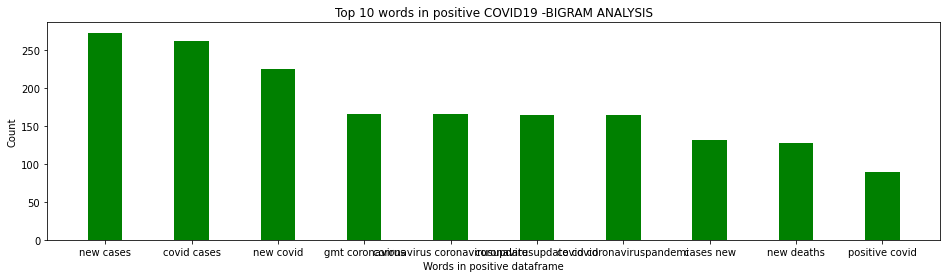

In [235]:
plt.figure(1,figsize=(16,4))

plt.bar(pd1bi,pd2bi, color ='green',width = 0.4)

plt.xlabel("Words in positive dataframe")

plt.ylabel("Count")

plt.title("Top 10 words in positive COVID19 -BIGRAM ANALYSIS")

plt.savefig("positive-bigram.png")
plt.show()

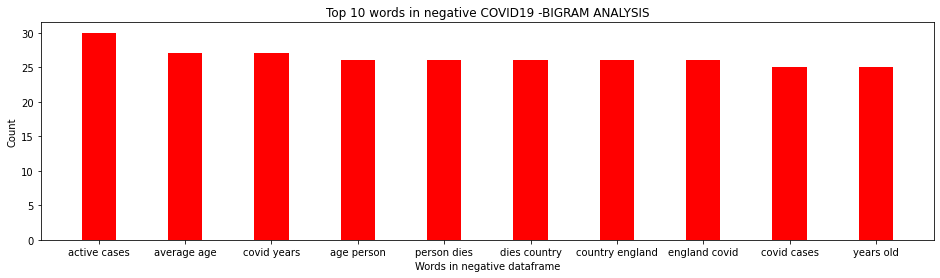

In [236]:
plt.figure(1,figsize=(16,4))
plt.bar(ned1bi,ned2bi, color ='red',
        width = 0.4)
plt.xlabel("Words in negative dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in negative COVID19 -BIGRAM ANALYSIS")
plt.savefig("negative-bigram.png")
plt.show()

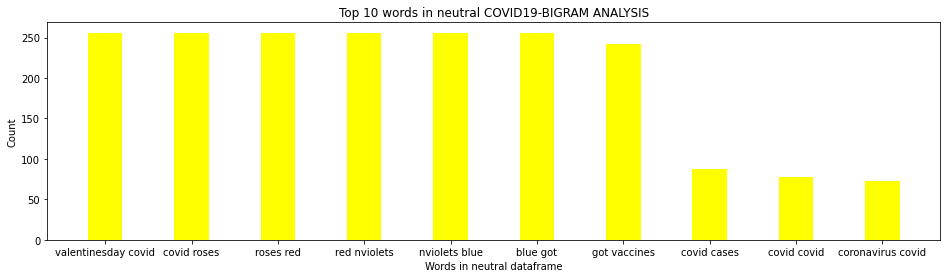

In [237]:
plt.figure(1,figsize=(16,4))
plt.bar(nud1bi,nud2bi, color ='yellow',
        width = 0.4)
plt.xlabel("Words in neutral dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in neutral COVID19-BIGRAM ANALYSIS")
plt.savefig("neutral-bigram.png")
plt.show()

#top 10 bigram neutral | n-grams


In [238]:
positiveValues3=defaultdict(int)
negativeValues3=defaultdict(int)
neutralValues3=defaultdict(int)
#get the count of every word in both the columns of df_train and df_test dataframes

#get the count of every word in both the columns of df_train and df_test dataframes where sentiment="positive"
for text in df_train[df_train.sentiment=="positive"].text:
  for word in generate_N_grams(text,3):
    positiveValues3[word]+=1

Sentence after removing stopwords: ['covid', 'still', 'important', 'story', 'world', 'impact', 'supply', 'chains', 'energy', 'monetary', 'amp', 'fiscal', 'policy', 'f']
Sentence after removing stopwords: ['people', 'testing', 'positive', 'coronavirus', 'infection', 'day', 'india', 'total', 'tally', 'cases', 'increa']
Sentence after removing stopwords: ['icymi', 'eua', 'submitted', 'children', 'ages', 'using', 'traditional', 'safe', 'non', 'mrna', 'vaccine', 'covaxin']
Sentence after removing stopwords: ['leaders', 'test', 'positive', 'situations', 'nthen', 'teens', 'nif', 'online', 'meeting']
Sentence after removing stopwords: ['good', 'news', 'soof', 'florida', 'coronavirus', 'hospitalizations', 'deaths', 'doubled', 'since', 'last', 'week']
Sentence after removing stopwords: ['needs', 'stais', 'honest', 'truth', 'children', 'used', 'herd', 'immunity', 'spreaders', 'without', 'concern']
Sentence after removing stopwords: ['desigual', 'new', 'light', 'hope', 'awakened', 'horizon', 'worl

Sentence after removing stopwords: ['whole', 'world', 'needs', 'two', 'things', 'king', 'kohli', 'st', 'century', 'imvkohli', 'end', 'covid', 'kingkohli', 'bcci', 'century', 'savind', 'covi']
Sentence after removing stopwords: ['fiorellaim', 'covid', 'vaccines', 'rushed', 'market', 'profit', 'sure', 'vaccine', 'mandates', 'real', 'vaccines', 'pr']
Sentence after removing stopwords: ['bravojourno', 'canx', 'xt', 'safexf', 'ix', 'xm', 'sure', 'boosted', 'covidiots', 'covid', 'maskmandate']
Sentence after removing stopwords: ['watch', 'b', 'cs', 'rare', 'amp', 'severe', 'covid', 'vaccine', 'side', 'effect']
Sentence after removing stopwords: ['rajasthan', 'ncovid', 'update', 'positive', 'cases', 'rajasthan', 'today', 'cases', 'jaipur', 'act']
Sentence after removing stopwords: ['opportunity', 'many', 'us', 'reconsider', 'personal', 'drinking', 'habits', 'figure', 'feels', 'good']
Sentence after removing stopwords: ['new', 'covid', 'data', 'est', 'coronavirus', 'covid', 'covid']
Sentence a

Sentence after removing stopwords: ['cpho', 'canada', 'covid', 'forecasting', 'tidy', 'time', 'series', 'fable', 'ensemble', 'amp', 'judgmental', 'forecasts', 'despite']
Sentence after removing stopwords: ['aroundgreece', 'new', 'light', 'hope', 'awakened', 'horizon', 'world', 'emerges', 'pandemic', 'shelby']
Sentence after removing stopwords: ['eldicotech', 'peculiar', 'nigeria', 'sir', 'many', 'errconomist', 'want', 'us', 'bliv', 'na', 'buhari', 'dey', 'cause']
Sentence after removing stopwords: ['global', 'health', 'coronavirus', 'covid', 'gt', 'covid', 'hits', 'one', 'last', 'uninfected', 'places', 'planet', 'abc', 'new']
Sentence after removing stopwords: ['alivelshi', 'itx', 'time', 'folks', 'itx', 'lock', 'bingo', 'please', 'share', 'letx', 'get', 'loud', 'itx', 'midterms']
Sentence after removing stopwords: ['bariweiss', 'says', 'getting', 'panties', 'bunch', 'good', 'reason', 'must', 'something', 'wrong', 'w']
Sentence after removing stopwords: ['new', 'cases', 'new', 'deaths'

Sentence after removing stopwords: ['good', 'morning', 'even', 'americans', 'fully', 'vaccinated', 'covid', 'rest']
Sentence after removing stopwords: ['joni', 'mitchell', 'se', 'une', 'neil', 'young', 'en', 'protesta', 'contra', 'spotify', 'sportify', 'protestas', 'fakenews', 'coronavirus']
Sentence after removing stopwords: ['action', 'plan', 'manage', 'conditions', 'please', 'remember', 'follow', 'xn', 'covid', 'coronaviru']
Sentence after removing stopwords: ['wore', 'seatbelt', 'church', 'today', 'guys', 'would', 'feel', 'safe', 'cars', 'ix', 'xm', 'thoughtful', 'like', 'covid', 'staysaf']
Sentence after removing stopwords: ['study', 'also', 'found', 'high', 'rate', 'preterm', 'birth', 'among', 'women', 'diagnosed', 'covid', 'rate', 'spiked']
Sentence after removing stopwords: ['double', 'vaccinated', 'places', 'testing', 'positive', 'covid', 'often', 'unvaccinated']
Sentence after removing stopwords: ['john', 'stockton', 'claims', 'athletes', 'died', 'covid', 'vaccine', 'shouldnx

Sentence after removing stopwords: ['days', 'week', 'isolate', 'love', 'care', 'showed', 'staff', 'students']
Sentence after removing stopwords: ['covid', 'testing', 'appointments', 'available', 'register', 'choose', 'walk', 'site', 'full', 'schedule', 'info']
Sentence after removing stopwords: ['mylabsolutions', 'even', 'positive', 'line', 'still', 'positive', 'result', 'faulty', 'report', 'cassette']
Sentence after removing stopwords: ['enzolytics', 'solution', 'covid', 'coronavirus', 'corona', 'love', 'stayhome', 'bhfyp', 'quarantine', 'instagood', 'lockdown']
Sentence after removing stopwords: ['many', 'died', 'uk', 'covi']
Sentence after removing stopwords: ['covid', 'live', 'updates', 'biden', 'administration', 'issue', 'million', 'masks', 'national', 'stockpile', 'covid', 'omicron']
Sentence after removing stopwords: ['good', 'morning', 'toronto', 'forget', 'face', 'coverings', 'mandatory', 'ttc', 'masks', 'cover', 'nose']
Sentence after removing stopwords: ['intimate', 'wedding

Sentence after removing stopwords: ['narratives', 'social', 'formations', 'dominated', 'last', 'two', 'years', 'disintegrating', 'leaving', 'many', 'people', 'shoc']
Sentence after removing stopwords: ['know', 'many', 'facing', 'uncertain', 'times', 'work', 'staffing', 'pressures', 'mount', 'advice', 'informa']
Sentence after removing stopwords: ['russia', 'wanted', 'free', 'hand', 'ukraine', 'spend', 'billions', 'buying', 'western', 'governments', 'medi']
Sentence after removing stopwords: ['gsntnie', 'new', 'zealand', 'pm', 'jacindaardern', 'said', 'self', 'isolating', 'coming', 'close', 'contact', 'person']
Sentence after removing stopwords: ['astute', 'lucid', 'insightful', 'summary', 'erictopol', 'omicron', 'best', 'data', 'vaccine', 'b']
Sentence after removing stopwords: ['frances', 'young', 'superstar', 'nt', 'news', 'ixbuzztv', 'ixbuzz', 'city', 'tnews', 'news', 'covid', 'india', 'instagram', 'love', 'follow']
Sentence after removing stopwords: ['covid', 'total', 'people', 'te

Sentence after removing stopwords: ['late', 'new', 'years', 'resolution', 'start', 'let', 'us', 'provide', 'free', 'suppoto', 'achieve', 'new', 'ye']
Sentence after removing stopwords: ['trader', 'joes', 'natural', 'assorted', 'flavors', 'gt', 'food', 'stayathome', 'stayhome', 'treats']
Sentence after removing stopwords: ['new', 'youtube', 'video', 'letx', 'gooo', 'come', 'subscribe', 'jay', 'smitty', 'channel', 'new', 'variant', 'covid', 'called', 'ba', 'wt']
Sentence after removing stopwords: ['covid', 'underscored', 'importance', 'maintaining', 'strong', 'immune', 'system', 'healthy', 'diet', 'anna', 'lartey']
Sentence after removing stopwords: ['novel', 'xcprime', 'spikex', 'xd', 'vaccine', 'strategy', 'leverages', 'existing', 'immunity', 'generated', 'primary', 'covid', 'vaccination']
Sentence after removing stopwords: ['news', 'students', 'high', 'school', 'quebec', 'protesting', 'yesterday', 'class', 'hours', 'remove', 'mask', 'mandat']
Sentence after removing stopwords: ['going

Sentence after removing stopwords: ['piersmorgan', 'great', 'initiative', 'good', 'yet', 'letx', 'repodeaths', 'due', 'covid', 'among', 'vaccinated', 'vs', 'unvaccinated']
Sentence after removing stopwords: ['jpmajor', 'hopemarsmission', 'best', 'paof', 'living', 'mars', 'chancex', 'catching', 'covid', 'zeroxf', 'xbdx']
Sentence after removing stopwords: ['coronavirus', 'covid', 'covid', 'sarscov', 'covidworld', 'ndaily', 'new', 'confirmed', 'covid', 'cases', 'per', 'million', 'people']
Sentence after removing stopwords: ['vinaymadapu', 'iitmadras', 'vice', 'president', 'mvenkaiahnaidu', 'tested', 'positive', 'covid']
Sentence after removing stopwords: ['paul', 'mccartney', 'john', 'lennon', 'many', 'people', 'ohno', 'condoms', 'vs', 'people']
Sentence after removing stopwords: ['ajenglish', 'never', 'lose', 'face', 'laughing', 'countries', 'accepted', 'live', 'covi']
Sentence after removing stopwords: ['tanzinavega', 'positive', 'vibes', 'personally', 'want', 'year', 'covid', 'testin'

Sentence after removing stopwords: ['canx', 'xt', 'believe', 'many', 'tweets', 'aaron', 'rodgers', 'byeaaron', 'nix', 'xm', 'covid', 'vaccine']
Sentence after removing stopwords: ['shutdown', 'educational', 'institutions', 'bangladesh', 'covi']
Sentence after removing stopwords: ['total', 'confirmed', 'covid', 'cases', 'county', 'covid', 'insights', 'analytics', 'team', 'usafacts']
Sentence after removing stopwords: ['margaretcrandle', 'gofundme', 'omaralghabra', 'gmbutts', 'new', 'beginning', 'saturday', 'january', 'dhs', 'require', 'non', 'u']
Sentence after removing stopwords: ['maybe', 'arrogance', 'obstinate', 'behavior', 'regarding', 'generally', 'accepted', 'understood', 'covid', 'protocols', 'sympt']
Sentence after removing stopwords: ['corona', 'virus', 'cases', 'sweden', 'date', 'confirmed', 'cases', 'deaths', 'sweden']
Sentence after removing stopwords: ['lack', 'political', 'leadership', 'amp', 'govt', 'mass', 'infection', 'strategy', 'led', 'critical', 'failure', 'make', '

Sentence after removing stopwords: ['people', 'coming', 'hospital', 'problems', 'also', 'found', 'positive', 'covi']
Sentence after removing stopwords: ['coronavirus', 'live', 'updates', 'lakh', 'new', 'circumstances', 'india', 'decrease', 'yesterday', 'coronavirusliveupdates']
Sentence after removing stopwords: ['covid', 'update', 'nchinese', 'scientists', 'identified', 'new', 'kind', 'coronavirus', 'called', 'neocov', 'bats', 'sa', 'th']
Sentence after removing stopwords: ['justin', 'new', 'covid', 'cases', 'recorded', 'mumbai', 'today', 'active', 'cases']
Sentence after removing stopwords: ['breaking', 'afc', 'womenx', 'asian', 'cup', 'match', 'chinese', 'taipei', 'india', 'called', 'due', 'positive']
Sentence after removing stopwords: ['true', 'politicians', 'tell', 'americans', 'get', 'education', 'go', 'college', 'get', 'degree', 'last', 'yrs', 'many', 'americans']
Sentence after removing stopwords: ['line', 'cabinet', 'decision', 'based', 'law', 'regarding', 'infectious', 'disea

Sentence after removing stopwords: ['high', 'corona', 'karnataka', 'reports', 'new', 'covid', 'cases', 'recoveries', 'deaths', 'last']
Sentence after removing stopwords: ['figures', 'released', 'beijing', 'show', 'people', 'linked', 'winterolympics', 'tested', 'positive', 'coronavirus']
Sentence after removing stopwords: ['covid', 'covid', 'coviduk', 'coviduk', 'nxxef', 'xbupdate', 'saturday', 'nd', 'january', 'nxf', 'new', 'cases', 'nxf', 'xth']
Sentence after removing stopwords: ['xfxfwe', 'winning', 'covid', 'brussel']
Sentence after removing stopwords: ['sooner', 'everyone', 'gets', 'vaccinated', 'sooner', 'able', 'see', 'everyone', 'smile', 'behind', 'mask', 'schedu']
Sentence after removing stopwords: ['pregnant', 'wait', 'giving', 'birth', 'get', 'covid', 'vaccination', 'xfn', 'nthe', 'vaccine', 'best']
Sentence after removing stopwords: ['omicronvariant', 'laid', 'bare', 'need', 'live', 'disease', 'throws', 'ever', 'changing', 'set', 'challenges']
Sentence after removing stopwo

Sentence after removing stopwords: ['getting', 'booster', 'vaccine', 'best', 'way', 'protect', 'loved', 'ones', 'covid', 'ndon', 'delay']
Sentence after removing stopwords: ['tests', 'crucial', 'controlling', 'covid', 'pandemic', 'test', 'result', 'interpretation', 'also', 'important', 'example']
Sentence after removing stopwords: ['new', 'cases', 'covid', 'toronto', 'yesterday', 'ontario', 'day', 'averages', 'respectively']
Sentence after removing stopwords: ['omicron', 'variant', 'covid', 'xchang', 'aroundx', 'xd', 'delta', 'variant', 'way', 'top', 'keral']
Sentence after removing stopwords: ['vice', 'president', 'venkaiah', 'naidu', 'tested', 'covid', 'positive', 'toda']
Sentence after removing stopwords: ['camila', 'cabello', 'visits', 'adult', 'shop', 'shawn', 'mendes', 'split', 'window', 'news', 'camilacabello', 'covid', 'graphi']
Sentence after removing stopwords: ['bleacherrepo', 'rapsheet', 'brgridiron', 'loses', 'ramsnfl', 'sunday', 'good', 'nstop', 'worshi']
Sentence after r

Sentence after removing stopwords: ['greece', 'confirms', 'new', 'coronavirus', 'infections', 'sat', 'deaths', 'ventilators']
Sentence after removing stopwords: ['joyannreid', 'dougducey', 'joy', 'sums', 'real', 'motivation', 'desire', 'spread', 'covid', 'nicelyx', 'xevery', 'time', 'pre']
Sentence after removing stopwords: ['usfrancefr', 'new', 'light', 'hope', 'awakened', 'horizon', 'world', 'emerges', 'pandemic', 'shelby']
Sentence after removing stopwords: ['healthcareswf', 'partnering', 'swflchildrens', 'hold', 'vaccine', 'event', 'adults', 'kids', 'old', 'years']
Sentence after removing stopwords: ['bidmartcanada', 'wionews', 'new', 'beginning', 'saturday', 'january', 'dhs', 'require', 'non', 'u', 'individualsxfseeking', 'enter']
Sentence after removing stopwords: ['chrisjgoodin', 'obsidianring', 'thanks', 'chris', 'screenplay', 'aneveningwithnevilleheath', 'penned', 'prison', 'without', 'int']
Sentence after removing stopwords: ['time', 'get', 'back', 'easy', 'passage', 'heathro

Sentence after removing stopwords: ['vice', 'president', 'venkaiah', 'naidu', 'tests', 'positive', 'covid', 'venkaiahnaidu', 'covi']
Sentence after removing stopwords: ['wanted', 'document', 'symptoms', 'case', 'find', 'wondering', 'havenx', 'xt', 'really', 'coughed']
Sentence after removing stopwords: ['jan', 'jan', 'five', 'local', 'confirmed', 'cases', 'four', 'asymptomatic', 'cases', 'reported']
Sentence after removing stopwords: ['covid', 'ok', 'would', 'really', 'frustrating', 'covid', 'free', 'since', 'beginning', 'nthe', 'pacific']
Sentence after removing stopwords: ['virtuasam', 'nearly', 'two', 'years', 'pandemic', 'arenx', 'xt', 'hepa', 'filters', 'every', 'classroom', 'educationgovuk']
Sentence after removing stopwords: ['bjpbengal', 'respected', 'sir', 'husband', 'death', 'covid', 'local', 'municipality', 'even', 'ready']
Sentence after removing stopwords: ['new', 'cases', 'new', 'death', 'qatar', 'gmt', 'coronavirus', 'coronavirusupdate', 'covid', 'coronaviruspandemi']
Se

Sentence after removing stopwords: ['tanzania', 'come', 'antivaxxers', 'paradise', 'beautiful', 'paradijs', 'ongevaccineerden', 'omtadvies']
Sentence after removing stopwords: ['daily', 'new', 'covid', 'cases', 'key', 'economies', 'rstat']
Sentence after removing stopwords: ['new', 'cases', 'new', 'deaths', 'portugal', 'gmt', 'coronavirus', 'coronavirusupdate', 'covid', 'coronaviruspandemi']
Sentence after removing stopwords: ['covid', 'update', 'cuttack', 'city', 'cmc', 'area', 'new', 'covid', 'case', 'reported', 'today', 'cuttack', 'city', 'na']
Sentence after removing stopwords: ['assamfightscorona', 'nnecessary', 'community', 'testing', 'following', 'stay', 'safe', 'protected', 'covi']
Sentence after removing stopwords: ['joebiden', 'grateful', 'president', 'true', 'leader', 'standwithbiden', 'covi']
Sentence after removing stopwords: ['happening', 'right', 'washington', 'c', 'stopthemandate', 'covi']
Sentence after removing stopwords: ['new', 'seroprevalence', 'anti', 'sars', 'cor

Sentence after removing stopwords: ['coronavirus', 'family', 'omicron', 'omicronvirus', 'son', 'itx', 'breeding', 'fast', 'rats', 'xfxfx']
Sentence after removing stopwords: ['pre', 'recorded', 'participation', 'zoom', 'call', 'state', 'agile', 'sustainable', 'hr', 'called']
Sentence after removing stopwords: ['indiafightscorona', 'india', 'new', 'corona', 'cases', 'january', 'ntotal', 'cases', 'ntotal', 'deaths']
Sentence after removing stopwords: ['big', 'meeting', 'music', 'manager', 'molly', 'today', 'prestigious', 'high', 'profile', 'gigs', 'missed']
Sentence after removing stopwords: ['pinupspresidential', 'glad', 'olympics', 'focus', 'china', 'year', 'sports', 'tv', 'small', 'gathering', 'experience']
Sentence after removing stopwords: ['thoughts', 'vaxx', 'boostersxwhy', 'would', 'itx', 'proven', 'non', 'effective', 'unsafe']
Sentence after removing stopwords: ['nsamsung', 'cu', 'ft', 'extra', 'large', 'capacity', 'smatop', 'load', 'washer', 'auto', 'dispense', 'system', 'brush

Sentence after removing stopwords: ['globally', 'xfx', 'ncurrently', 'roughly', 'new', 'cases', 'covidx', 'xbc', 'confirmed', 'every', 'minutexb', 'xba', 'every', 'hour', 'nxf', 'xupdate']
Sentence after removing stopwords: ['new', 'cases', 'new', 'deaths', 'russia', 'gmt', 'coronavirus', 'coronavirusupdate', 'covid', 'coronaviruspandemi']
Sentence after removing stopwords: ['jaipur', 'reports', 'new', 'covid', 'cases', 'today', 'rajasthan', 'covidindia', 'coronavirus', 'coronavirusupdat']
Sentence after removing stopwords: ['blacklight', 'revelations', 'c', 'repo', 'live', 'click', 'link', 'join', 'content', 'coronavirus', 'covid']
Sentence after removing stopwords: ['new', 'cases', 'new', 'death', 'saint', 'vincent', 'grenadines', 'gmt', 'coronavirus', 'coronavirusupdate', 'covid', 'coronaviruspandemi']
Sentence after removing stopwords: ['sefton', 'hospitality', 'leisure', 'accommodation', 'businesses', 'submit', 'applications', 'new', 'covid', 'omicron']
Sentence after removing sto

Sentence after removing stopwords: ['karnataka', 'logged', 'new', 'covid', 'cases', 'discharges', 'deaths', 'sunda']
Sentence after removing stopwords: ['identified', 'examples', 'creative', 'practice', 'continuing', 'provide', 'shobreak', 'suppoto', 'families', 'th']
Sentence after removing stopwords: ['check', 'late', 'guidance', 'stay', 'safe', 'amp', 'prevent', 'spread', 'coronavirus', 'upd']
Sentence after removing stopwords: ['thank', 'jljcolorado', 'important', 'contributions', 'public', 'discourse', 'navigate', 'covid', 'practi']
Sentence after removing stopwords: ['mumbai', 'reports', 'new', 'covid', 'cases', 'recoveries', 'deaths', 'last', 'hours', 'nactive', 'cases']
Sentence after removing stopwords: ['lie', 'taking', 'hot', 'bath', 'prevent', 'new', 'coronavirus', 'disease', 'coronavirus', 'moronaviru']
Sentence after removing stopwords: ['covid', 'update', 'cuttack', 'district', 'jan', 'nout', 'new', 'cases', 'declared', 'state', 'cuttack', 'district']
Sentence after remo

Sentence after removing stopwords: ['daily', 'new', 'cases', 'cross', 'k', 'karnataka', 'today', 'nx', 'xbenew', 'cases', 'state', 'nx', 'xbenew', 'cases', 'b', 'lore', 'nx', 'xbepositivity']
Sentence after removing stopwords: ['vicepresident', 'venkaiahnaidu', 'tests', 'positive', 'covid']
Sentence after removing stopwords: ['brazil', 'reports', 'record', 'high', 'cases', 'coronavirus', 'politics', 'brazil', 'brazilianpolitics', 'coronavirus']
Sentence after removing stopwords: ['us', 'great', 'amp', 'wonderful', 'blah', 'blah', 'nwe', 'leading', 'world', 'covid', 'deaths']
Sentence after removing stopwords: ['growing', 'number', 'xchospitelsx', 'xd', 'hold', 'paying', 'foreigners', 'tested', 'positive', 'arrival', 'thailand', 'nfrom', 'xc']
Sentence after removing stopwords: ['vintage', 'retro', 'arcopal', 'mobil', 'milk', 'glass', 'milk', 'jug', 'cream', 'pitcher', 'orange', 'brown', 'decor', 'kitsch', 'mod', 'pop', 'floral', 'de']
Sentence after removing stopwords: ['nsamsung', 'do

Sentence after removing stopwords: ['covid', 'cases', 'soaring', 'fresno', 'county', 'throughout', 'country', 'due', 'high', 'transmissibility', 'om']
Sentence after removing stopwords: ['total', 'confirmed', 'covid', 'cases', 'county', 'az', 'covid', 'insights', 'analytics', 'team', 'usafacts']
Sentence after removing stopwords: ['slovenia', 'logs', 'coronavirus', 'new', 'cases', 'nine', 'death']
Sentence after removing stopwords: ['forget', 'fresh', 'air', 'important', 'open', 'window', 'stand', 'balcony', 'backyard', 'take', 'safe', 'walk']
Sentence after removing stopwords: ['covid', 'uttarakhand', 'reports', 'new', 'cases', 'death', 'recoveries', 'today', 'active', 'cases']
Sentence after removing stopwords: ['wuhan', 'scientists', 'warn', 'new', 'coronavirus', 'neocov', 'high', 'death', 'infection', 'rate', 'neocov', 'wear', 'mask', 'safe']
Sentence after removing stopwords: ['home', 'covid', 'important', 'nx', 'rest', 'nx', 'drink', 'plenty', 'fluids', 'nx', 'take', 'painkillers

Sentence after removing stopwords: ['nlol', 'surprise', 'omg', 'house', 'surprises', 'new', 'real', 'wood', 'dollhouse', 'surprises', 'floors', 'doll', 'house', 'rooms', 'wi']
Sentence after removing stopwords: ['new', 'cases', 'new', 'deaths', 'romania', 'gmt', 'coronavirus', 'coronavirusupdate', 'covid', 'coronaviruspandemi']
Sentence after removing stopwords: ['according', 'cdc', 'individuals', 'hospitalized', 'us', 'covid', 'tuesday', 'high']
Sentence after removing stopwords: ['daily', 'snapshot', 'total', 'cases', 'crossed', 'million', 'pm', 'new', 'cases', 'reported', 'across', 'southe']
Sentence after removing stopwords: ['independentie', 'clearly', 'studies', 'shown', 'people', 'simply', 'need', 'vaccine', 'covid']
Sentence after removing stopwords: ['randpaul', 'icymi', 'eua', 'submitted', 'children', 'ages', 'using', 'traditional', 'safe', 'non', 'mrna', 'vaccine']
Sentence after removing stopwords: ['children', 'deserve', 'safe', 'school', 'elderly', 'vulnerable', 'deserve'

Sentence after removing stopwords: ['vice', 'president', 'mvenkaiahnaidu', 'tested', 'covid', 'positive', 'today', 'coronapositive', 'coronavirus', 'india', 'mvenkaiahnaid']
Sentence after removing stopwords: ['total', 'confirmed', 'covid', 'cases', 'county', 'nm', 'covid', 'insights', 'analytics', 'team', 'usafacts']
Sentence after removing stopwords: ['profcolindavis', 'bizarre', 'january', 'number', 'new', 'covid', 'infection', 'uk', 'continued', 'increase']
Sentence after removing stopwords: ['abhishekaitc', 'respected', 'sir', 'eminent', 'leaders', 'claiming', 'pretending', 'covid', 'perfectly', 'control', 'th']
Sentence after removing stopwords: ['new', 'cases', 'laos', 'gmt', 'coronavirus', 'coronavirusupdate', 'covid', 'coronaviruspandemi']
Sentence after removing stopwords: ['drianweissman', 'drlindamd', 'evankirstel', 'nkagetsu', 'rstraxmd', 'friedbergeric', 'true', 'leader', 'womenempowerment']
Sentence after removing stopwords: ['delhi', 'sunday', 'reported', 'new', 'covid'

Sentence after removing stopwords: ['mashavisrael', 'providing', 'essential', 'assistance', 'local', 'teams', 'fighting', 'covid', 'sending', 'large', 'shipments', 'criti']
Sentence after removing stopwords: ['research', 'available', 'researchgate', 'pandemic', 'coronavirus', 'covid', 'omicron', 'economy']
Sentence after removing stopwords: ['covid', 'total', 'people', 'tested', 'positive', 'virus', 'parliament', 'house', 'complex', 'far', 'people']
Sentence after removing stopwords: ['yet', 'another', 'friendx', 'child', 'tested', 'positive', 'covid', 'case', 'anyone', 'thinks', 'itx', 'really', 'becaus']
Sentence after removing stopwords: ['many', 'covid', 'patients', 'countriesxf', 'xbxf', 'xnuse', 'common', 'sensexf', 'xxf', 'xwear', 'mask', 'stay', 'away', 'crowds', 'nletx', 'get', 'covid', 'unde']
Sentence after removing stopwords: ['impact', 'covid', 'drowning', 'patterns', 'great', 'lakes', 'region', 'north', 'america', 'sarscovtimeline']
Sentence after removing stopwords: ['go

Sentence after removing stopwords: ['afc', 'confirmed', 'women', 'asiancup', 'india', 'match', 'chinese', 'taipei', 'india', 'called']
Sentence after removing stopwords: ['economies', 'love', 'stability', 'covid', 'brought', 'exact', 'opposite', 'shifts', 'also', 'hurting', 'pocketbooks']
Sentence after removing stopwords: ['total', 'confirmed', 'covid', 'cases', 'county', 'ny', 'covid', 'insights', 'analytics', 'team', 'usafacts']
Sentence after removing stopwords: ['uk', 'non', 'january', 'new', 'cases', 'deaths', 'days', 'positive', 'test', 'reported', 'uk', 'nour', 'data']
Sentence after removing stopwords: ['himachalpradesh', 'new', 'covid', 'cases', 'recoveries', 'amp', 'deaths', 'reported', 'state', 'today', 'till', 'pm', 'active', 'case']
Sentence after removing stopwords: ['new', 'death', 'compassionate', 'leave', 'policy', 'hr', 'rh', 'rrhh', 'covid', 'wellness', 'blockchain', 'meto']
Sentence after removing stopwords: ['concerned', 'know', 'hon', 'ble', 'vice', 'president', 

Sentence after removing stopwords: ['total', 'confirmed', 'covid', 'cases', 'county', 'dc', 'covid', 'insights', 'analytics', 'team', 'usafacts']
Sentence after removing stopwords: ['forget', 'stock', 'masks', 'european', 'travel', 'many', 'countries', 'still', 'requiring', 'ffp', 'masks']
Sentence after removing stopwords: ['win', 'daily', 'jan', 'nd', 'c', 'residents', 'get', 'free', 'kn', 'masks', 'cityx', 'new', 'covid', 'centers', 'nvisit']
Sentence after removing stopwords: ['delhi', 'reports', 'new', 'covid', 'cases', 'recoveries', 'deaths', 'last', 'hours', 'nactive', 'cases']
Sentence after removing stopwords: ['rapid', 'covid', 'tests', 'accurate', 'scientists', 'hope', 'improve', 'mgodoyh', 'via', 'nprhealt']
Sentence after removing stopwords: ['india', 'time', 'super', 'cautious', 'many', 'people', 'know', 'bangalore', 'delhi', 'bombay', 'covid']
Sentence after removing stopwords: ['new', 'zealand', 'pm', 'ardern', 'self', 'isolating', 'exposure', 'covid', 'positive', 'case

Sentence after removing stopwords: ['right', 'time', 'reopen', 'schools', 'india', 'nknow', 'views', 'children', 'parents', 'amp', 'experts', 'reop']
Sentence after removing stopwords: ['wuhan', 'cmindnich', 'right', 'wuhan', 'covi']
Sentence after removing stopwords: ['nthe', 'legend', 'zelda', 'breath', 'wild', 'nintendo', 'switch', 'dogecoin']
Sentence after removing stopwords: ['xflatest', 'uk', 'covid', 'dataxf', 'everything', 'pretty', 'flat', 'covid', 'omicro']
Sentence after removing stopwords: ['new', 'type', 'coronavirus', 'neocov', 'spreads', 'among', 'bats', 'south', 'africa', 'may', 'pose', 'threat', 'humans', 'future']
Sentence after removing stopwords: ['thousands', 'death', 'everyday', 'covid', 'media', 'barely', 'speaking', 'topic', 'many', 'pretending']
Sentence after removing stopwords: ['believe', 'leaders', 'responsibility', 'endthepandemic', 'join', 'global', 'week', 'action', 'tackle', 'th']
Sentence after removing stopwords: ['according', 'nbcnews', 'may', 'ligh

Sentence after removing stopwords: ['new', 'covid', 'cases', 'today', 'covid', 'covidmalaysia']
Sentence after removing stopwords: ['greenswelfares', 'gurmeetramrahim', 'good', 'job', 'volunteers', 'xd', 'vaccination', 'coronaviru']
Sentence after removing stopwords: ['vice', 'president', 'venkaiah', 'naidu', 'tested', 'covid', 'positive', 'toda']
Sentence after removing stopwords: ['coronavirus', 'sms', 'scam', 'offers', 'home', 'pcr', 'testing', 'devices', 'donx', 'xt', 'fall', 'phishing']
Sentence after removing stopwords: ['pandemic', 'nplease', 'get', 'vaccinated', 'nwear', 'mask', 'ndonx', 'xt', 'spread', 'misinformation', 'nprotect', 'high']
Sentence after removing stopwords: ['yes', 'mainly', 'ones', 'keep', 'distance', 'wear', 'masks', 'done', 'ever']
Sentence after removing stopwords: ['new', 'covid', 'data', 'est', 'coronavirus', 'covid', 'covid']
Sentence after removing stopwords: ['breaking', 'new', 'covid', 'cases', 'reported', 'valley', 'today', 'srinagar', 'leads', 'cas

Sentence after removing stopwords: ['happy', 'sunday', 'want', 'thank', 'two', 'donors', 'yesterday', 'able', 'contribute', 'still', 'trying', 'reac']
Sentence after removing stopwords: ['great', 'summary', 'omicron', 'research', 'xctherex', 'lot', 'written', 'omicronx', 'sharp', 'case', 'descent', 'seenxt']
Sentence after removing stopwords: ['new', 'cases', 'new', 'deaths', 'united', 'kingdom', 'gmt', 'coronavirus', 'coronavirusupdate', 'covid', 'coronaviruspandemi']
Sentence after removing stopwords: ['bootrevolution', 'clairelum', 'thomasdolphin', 'sure', 'whether', 'uk', 'us', 'either']
Sentence after removing stopwords: ['love', 'theeconomist', 'shows', 'work', 'estimating', 'excess', 'mortality', 'nations', 'covid']
Sentence after removing stopwords: ['u', 'territories', 'final', 'covid', 'data', 'saturday', 'ntotal', 'confirmed', 'cases', 'reached']
Sentence after removing stopwords: ['lifeltrsofkatie', 'sarahblarose', 'djdig', 'alanasaltz', 'katie', 'glad', 'brother', 'furth']

Sentence after removing stopwords: ['new', 'covid', 'variant', 'spreading', 'like', 'wildfire', 'across', 'uk', 'denmark', 'norway', 'sweden', 'india', 'signapore', 'nba', 'xste']
Sentence after removing stopwords: ['reptomemmer', 'certainly', 'need', 'defend', 'living', 'playbook', 'covid', 'healthcar']
Sentence after removing stopwords: ['based', 'data', 'ohdeptofhealth', 'confirmed', 'covid', 'suffer', 'symptoms', 'serious', 'enough', 'fo']
Sentence after removing stopwords: ['total', 'confirmed', 'covid', 'cases', 'county', 'nv', 'covid', 'insights', 'analytics', 'team', 'usafacts']
Sentence after removing stopwords: ['seems', 'trend', 'right', 'covid', 'conspiracy', 'theory', 'entire', 'pandemic', 'plot', 'turn', 'perso']
Sentence after removing stopwords: ['mumbai', 'recorded', 'new', 'covid', 'cases', 'today', 'active', 'case']
Sentence after removing stopwords: ['important', 'information', 'wake', 'county', 'residents', 'nwake', 'county', 'distribute', 'free', 'masks', 'several

Sentence after removing stopwords: ['uk', 'travel', 'ban', 'lifted', 'essential', 'travel', 'permittedx', 'nread', 'full', 'article', 'france', 'travel', 'update', 'restrictions']
Sentence after removing stopwords: ['roll', 'day', 'go', 'online', 'social', 'media', 'put', 'tv', 'read', 'newspaper', 'amp', 'see', 'read', 'nothing']
Sentence after removing stopwords: ['kityatesmaths', 'stark', 'right', 'wondering', 'borisjohnson', 'sleeps', 'night', 'conscience', 'clearly', 'par']
Sentence after removing stopwords: ['coronavirus', 'live', 'delhi', 'logs', 'jump', 'daily', 'caseload', 'infections', 'weekend', 'curfew', 'lifted']
Sentence after removing stopwords: ['new', 'covid', 'data', 'est', 'coronavirus', 'covid', 'covid']
Sentence after removing stopwords: ['eviction', 'rates', 'texas', 'cities', 'among', 'high', 'nation', 'even', 'feds', 'take', 'back', 'unspent', 'covid', 'relief', 'money']
Sentence after removing stopwords: ['cuts', 'covid', 'isolation', 'times', 'good', 'idea', '

Sentence after removing stopwords: ['aaronrodgers', 'covid', 'owns', 'kaaronx', 'xbc', 'xef', 'xbneven', 'u', 'go', 'free', 'agency', 'seek', 'trade', 'next', 'season', 'u', 'clearly', 'hof']
Sentence after removing stopwords: ['allanruhl', 'alfonsocauders', 'u', 'aware', 'many', 'wealthy', 'countries', 'exact', 'thing', 'combat', 'pandemic']
Sentence after removing stopwords: ['hmc', 'opens', 'new', 'laboratory', 'covid', 'testing', 'qatar']
Sentence after removing stopwords: ['happy', 'share', 'todays', 'homily', 'scalaretreat', 'listen', 'press', 'xxef', 'redcomsireland']
Sentence after removing stopwords: ['ix', 'xm', 'epidemiologist', 'virologist', 'doctor', 'ix', 'xm', 'experienced', 'science', 'writer', 'itx', 'clear', 'covid']
Sentence after removing stopwords: ['poland', 'recorded', 'new', 'confirmed', 'coronavirus', 'cases', 'deaths', 'past', 'hours', 'saturday', 'morning']
Sentence after removing stopwords: ['wondering', 'hold', 'effective', 'efficient', 'telemedicine', 'vis

Sentence after removing stopwords: ['delhi', 'reports', 'new', 'covid', 'cases', 'recoveries', 'deaths', 'last', 'hours', 'nactive', 'cases']
Sentence after removing stopwords: ['trader', 'joes', 'natural', 'dog', 'treats', 'gt', 'food', 'stayathome', 'stayhome', 'treats', 'yummie']
Sentence after removing stopwords: ['new', 'covid', 'cases', 'kodagu', 'today', 'npositivity', 'rate', 'covid', 'omicro']
Sentence after removing stopwords: ['uk', 'shortage', 'heavy', 'duty', 'construction', 'materials', 'mostly', 'penalty', 'paid', 'covid', 'lockdown', 'increased', 'demand', 'h']
Sentence after removing stopwords: ['new', 'podcast', 'drlabos', 'amp', 'interview', 'olivierdrouinmd', 'paediatrician', 'amp', 'researcher', 'covid', 'covidvaccines']
Sentence after removing stopwords: ['top', 'scientists', 'say', 'africa', 'may', 'reached', 'less', 'threatening', 'phase', 'covid', 'yes', 'would', 'mean']
Sentence after removing stopwords: ['clean', 'safe', 'cleaningquotes', 'quotes', 'cleanings

Sentence after removing stopwords: ['really', 'hope', 'johntory', 'runs', 'next', 'municipal', 'election', 'october', 'runs', 'away', 'xfxx', 'xdx', 'xeftopoli', 'ontpoli', 'covi']
Sentence after removing stopwords: ['karnataka', 'crossed', 'mark', 'new', 'covid', 'cases', 'recorded', 'one', 'day', 'nit', 'reached', 'figure', 'duri']
Sentence after removing stopwords: ['time', 'redefine', 'life', 'amp', 'living', 'new', 'covid', 'forever', 'world', 'cities', 'become', 'obsolete', 'nytimes', 'wapo']
Sentence after removing stopwords: ['hypocrisy', 'biden', 'administration', 'palpable', 'legal', 'citizens', 'america', 'required', 'show']
Sentence after removing stopwords: ['scotland', 'ncoronavirus', 'covid', 'daily', 'data', 'scotland', 'january', 'new', 'reported', 'death', 'people']
Sentence after removing stopwords: ['mumbai', 'reports', 'new', 'covid', 'cases', 'deaths', 'positivity', 'rate', 'mumbai', 'covid', 'omicronvarient']
Sentence after removing stopwords: ['many', 'active', 

Sentence after removing stopwords: ['xcsocial', 'cohesion', 'erosionx', 'xd', 'fast', 'growing', 'threat', 'planet', 'since', 'covid', 'crisis', 'struck', 'according']
Sentence after removing stopwords: ['dr', 'rupeshrainamd', 'speaking', 'impact', 'new', 'extracorporeal', 'therapies', 'pediatric', 'covid', 'pcrrtadvances']
Sentence after removing stopwords: ['anyone', 'notice', 'half', 'population', 'thinks', 'research', 'right', 'wing', 'conspiracy', 'theory']
Sentence after removing stopwords: ['agreed', 'xix', 'xm', 'done', 'covidx', 'attitude', 'scary', 'demoralizing', 'best', 'wex', 'xre', 'still', 'learning', 'long']
Sentence after removing stopwords: ['omicronvarient', 'ready', 'stop', 'cases', 'rsultd', 'clsure', 'educationalinstitutions', 'dhoislamabad']
Sentence after removing stopwords: ['excuse', 'face', 'caught', 'covid', 'itx', 'tough', 'sweetheahas', 'making', 'sure', 'ix', 'xm', 'okay', 'covid']
Sentence after removing stopwords: ['xxef', 'xbthe', 'health', 'ministry',

Sentence after removing stopwords: ['shout', 'fellow', 'kupalliative', 'colleague', 'carlakeirns', 'quick', 'effective', 'medical', 'ethical', 'coverage', 'tr']
Sentence after removing stopwords: ['doctordee', 'new', 'beginning', 'saturday', 'january', 'dhs', 'require', 'non', 'u', 'individualsxfseeking', 'enter', 'u', 'vi']
Sentence after removing stopwords: ['surge', 'diamond', 'demand', 'began', 'early', 'covid', 'lockdowns', 'showing', 'sign', 'easing', 'even']
Sentence after removing stopwords: ['vice', 'president', 'naidu', 'tests', 'positive', 'covid', 'covidtesting', 'covid', 'venkaiahnaidu']
Sentence after removing stopwords: ['prevent', 'protect', 'covid', 'must', 'avoid', 'crowded', 'places', 'nalso', 'remember', 'nxc', 'ensure', 'safe', 'distance']
Sentence after removing stopwords: ['coronavirus', 'daily', 'update', 'jan', 'isle', 'man', 'confirmed', 'cases', 'coronavirus']
Sentence after removing stopwords: ['joshuapotash', 'weekly', 'death', 'counts', 'omicron', 'us', 'a

Sentence after removing stopwords: ['design', 'modern', 'professional', 'logo', 'design', 'norder']
Sentence after removing stopwords: ['kuwait', 'records', 'new', 'covid', 'cases', 'single', 'fatality', 'sharja']
Sentence after removing stopwords: ['total', 'people', 'tested', 'positive', 'covid', 'parliament', 'house', 'complex', 'far', 'people', 'rajya']
Sentence after removing stopwords: ['contrary', 'popular', 'myth', 'coronavirus', 'guaranteed', 'transform', 'mild', 'form', 'time']
Sentence after removing stopwords: ['vice', 'president', 'venkaiah', 'naidu', 'tested', 'covid', 'positive', 'toda']
Sentence after removing stopwords: ['total', 'confirmed', 'covid', 'cases', 'county', 'md', 'covid', 'insights', 'analytics', 'team', 'usafacts']
Sentence after removing stopwords: ['robekennedy', 'jr', 'cavorts', 'nazis', 'suing', 'daily', 'kos', 'make', 'less', 'true']
Sentence after removing stopwords: ['new', 'cases', 'new', 'deaths', 'indonesia', 'gmt', 'coronavirus', 'coronavirusup

Sentence after removing stopwords: ['attn', 'americans', 'living', 'disabilities', 'amp', 'chronicillness', 'loved', 'ones', 'xxf', 'ximportant', 'pwd', 'video', 'dialogue', 'ab']
Sentence after removing stopwords: ['covid', 'symptoms', 'still', 'testing', 'positive', 'infectiou']
Sentence after removing stopwords: ['new', 'cases', 'new', 'deaths', 'canada', 'gmt', 'coronavirus', 'coronavirusupdate', 'covid', 'coronaviruspandemi']
Sentence after removing stopwords: ['many', 'countries', 'indopacific', 'struggle', 'meet', 'vaccination', 'targets', 'india', 'could', 'spearhead', 'vaccine']
Sentence after removing stopwords: ['new', 'cases', 'new', 'deaths', 'south', 'africa', 'gmt', 'coronavirus', 'coronavirusupdate', 'covid', 'coronaviruspandemi']
Sentence after removing stopwords: ['covid', 'created', 'global', 'mental', 'health', 'crisis', 'nitx', 'important', 'remember', 'kind', 'ncheck']
Sentence after removing stopwords: ['jacinda', 'ardern', 'postpones', 'wedding', 'introducing', 

Sentence after removing stopwords: ['yxll', 'please', 'take', 'look', 'whole', 'thread', 'please', 'donx', 'xt', 'say', 'arenx', 'xt', 'real', 'christians', 'may', 'e']
Sentence after removing stopwords: ['newsupdate', 'nsome', 'members', 'indian', 'women', 'football', 'team', 'tested', 'positive', 'covid', 'tonight', 'match', 'betwe']
Sentence after removing stopwords: ['keep', 'playing', 'xix', 'hands', 'dense', 'mfs', 'nbe', 'clueless', 'rebels', 'xi', 'wants', 'eroding', 'trust', 'western', 'institutio']
Sentence after removing stopwords: ['total', 'confirmed', 'covid', 'cases', 'county', 'id', 'covid', 'insights', 'analytics', 'team', 'usafacts']
Sentence after removing stopwords: ['familiar', 'dr', 'fauci', 'role', 'aids', 'epidemic', 'read', 'responsible', 'count']
Sentence after removing stopwords: ['fun', 'facemask', 'covid', 'mask', 'skincare', 'staysafe', 'beauty', 'coronavirus', 'masks', 'maskerwajah', 'skincareroutine']
Sentence after removing stopwords: ['new', 'cases', '

Sentence after removing stopwords: ['new', 'cases', 'new', 'deaths', 'south', 'africa', 'gmt', 'coronavirus', 'coronavirusupdate', 'covid', 'coronaviruspandemi']
Sentence after removing stopwords: ['nhk', 'xfxfx', 'coronavirus', 'nxf', 'xd', 'data', 'suppressed', 'inspection', 'nx', 'xbb', 'number', 'new', 'infections']
Sentence after removing stopwords: ['westbengal', 'records', 'new', 'covid', 'cases', 'amp', 'deaths', 'today', 'active', 'cases', 'stand', 'todayx', 'positivity', 'rate', 'stands']
Sentence after removing stopwords: ['israel', 'health', 'ministry', 'considering', 'getting', 'rid', 'greenpass', 'rules', 'allowing', 'entry', 'many', 'public', 'places', 'f']
Sentence after removing stopwords: ['hey', 'randyhillier', 'grocery', 'store', 'hometown', 'perth', 'ontario', 'quick', 'post', 'evidence', 'c']
Sentence after removing stopwords: ['covid', 'means', 'moving', 'towards', 'new', 'normal', 'nin', 'countries', 'new', 'normal', 'mostly', 'masking']
Sentence after removing 

In [239]:
#get the count of every word in both the columns of df_train and df_test dataframes where sentiment="negative"
for text in df_train[df_train.sentiment=="negative"].text:
  for word in generate_N_grams(text,3):
    negativeValues3[word]+=1

Sentence after removing stopwords: ['never', 'forget', 'doctor', 'cum', 'health', 'minister', 'took', 'careless', 'decisions', 'coronavirus', 'covid', 'first', 'hear']
Sentence after removing stopwords: ['beijing', 'olympic', 'committee', 'lowers', 'threshold', 'producing', 'negative', 'covid', 'test', 'cbc', 'sports']
Sentence after removing stopwords: ['xcthe', 'problem', 'general', 'advice', 'xbe', 'cautiousx', 'vague', 'conflicts', 'message']
Sentence after removing stopwords: ['majority', 'canadax', 'research', 'universities', 'pushed', 'classes', 'online', 'end', 'january', 'even', 'late']
Sentence after removing stopwords: ['covid', 'test', 'smartphone', 'napp', 'claims', 'detect', 'virus', 'less', 'minute']
Sentence after removing stopwords: ['late', 'japan', 'beyond', 'coronavirus', 'pandemic', 'japan', 'daily', 'covid', 'cases', 'hit', 'record', 'high']
Sentence after removing stopwords: ['lisamichelewil', 'tested', 'positive', 'past', 'monday', 'morning', 'xn', 'nix', 'xm', 

Sentence after removing stopwords: ['usa', 'failed', 'humanity', 'covid', 'response', 'avoid', 'paying', 'u', 'citizens', 'month', 'stay', 'home', 'like', 'othe']
Sentence after removing stopwords: ['thought', 'headache', 'sore', 'throat', 'pain', 'bad', 'parts', 'covid', 'itx', 'horrid', 'symptoms', 'take', 'tur']
Sentence after removing stopwords: ['covid', 'vaccine', 'stance', 'simple', 'get', 'covidvaccine', 'protects', 'sick', 'w']
Sentence after removing stopwords: ['desperate', 'saga', 'yes', 'saga', 'advisors', 'looking', 'stay', 'relevant', 'nonsense', 'itx', 'shoosh', 'wouldnx', 'xt']
Sentence after removing stopwords: ['world', 'ncovid', 'dashboard', 'center', 'systems', 'science', 'engineering', 'csse', 'johns', 'hopkins', 'university']
Sentence after removing stopwords: ['sadly', 'dhsc', 'repothe', 'death', 'another', 'child', 'covid', 'little', 'boy', 'nengland']
Sentence after removing stopwords: ['pandemic', 'continues', 'take', 'lives', 'stressing', 'healthcare', 'syst

Sentence after removing stopwords: ['pregnancy', 'complications', 'common', 'women', 'infected', 'covid', 'near', 'end', 'pregnancy', 'compared']
Sentence after removing stopwords: ['snaps', 'late', 'summer', 'winter', 'fujifilm', 'fujifilmxseries', 'xv', 'mm']
Sentence after removing stopwords: ['nlutron', 'caseta', 'smaswitch', 'kit', 'remote', 'dogecoin', 'clearthelist']
Sentence after removing stopwords: ['help', 'slow', 'spread', 'covid', 'identify', 'risk', 'cases', 'sooner', 'self', 'reporting', 'symptoms', 'daily', 'even']
Sentence after removing stopwords: ['nothing', 'sacred', 'young', 'life', 'yet', 'insanely', 'thrown', 'away', 'tovejansson', 'author', 'th']
Sentence after removing stopwords: ['absolutely', 'amazes', 'people', 'hysterical', 'covid', 'becomes', 'talking', 'point']
Sentence after removing stopwords: ['uscisdirector', 'must', 'update', 'us', 'california', 'service', 'center', 'backlog', 'fa', 'cases', 'people', 'hurtin']
Sentence after removing stopwords: ['wo

Sentence after removing stopwords: ['virus', 'links', 'coronavirus', 'coronavirus', 'covid', 'pandemic', 'unnecessary', 'deaths', 'vaccination', 'cdcchanges']
Sentence after removing stopwords: ['mlasudhakar', 'covid', 'revealing', 'every', 'one', 'hidden', 'intentions', 'students', 'want', 'lockdown', 'stay', 'college', 'wo']
Sentence after removing stopwords: ['found', 'dialogue', 'putin', 'almost', 'years', 'ago', 'amp', 'impending', 'possibility', 'ww', 'ah', 'well', 'least']
Sentence after removing stopwords: ['hey', 'foreign', 'visitors', 'let', 'go', 'party', 'hollywood', 'wear', 'masks', 'pretend', 'covid', 'happening']
Sentence after removing stopwords: ['neocov', 'deadly', 'strain', 'coronavirus', 'newvariant', 'news', 'coronaupdate']
Sentence after removing stopwords: ['ardern', 'said', 'tight', 'rules', 'needed', 'nine', 'cases', 'omicron', 'variant', 'detected', 'single', 'family']
Sentence after removing stopwords: ['bjpbengal', 'respected', 'sir', 'welfare', 'state', 'ex

Sentence after removing stopwords: ['covid', 'infection', 'known', 'cause', 'long', 'lasting', 'implications', 'annoying', 'post', 'covid', 'hair', 'l']
Sentence after removing stopwords: ['mean', 'country', 'level', 'population', 'weighted', 'concentrations', 'xxbx', 'low', 'countries', 'strict', 'lockdown']
Sentence after removing stopwords: ['nsamsung', 'cu', 'ft', 'smabrushed', 'black', 'electric', 'dry', 'steam', 'sanitize']
Sentence after removing stopwords: ['ageism', 'ugly', 'thing', 'throw', 'elders', 'kids', 'covid', 'creepy', 'accept', 'deaths', 'nonchal']
Sentence after removing stopwords: ['staof', 'terrible', 'time', 'skill', 'wilson', 'one', 'first', 'lieutenants', 'promoted']
Sentence after removing stopwords: ['djokovic', 'owned', 'biotech', 'firm', 'aims', 'prevent', 'covid', 'virus', 'infecting', 'human', 'cells', 'using', 'peptide', 'therap']
Sentence after removing stopwords: ['four', 'five', 'us', 'covid', 'wrath', 'middle', 'child', 'testing', 'negative', 'go', '

Sentence after removing stopwords: ['dogera', 'average', 'age', 'person', 'dies', 'country', 'england', 'covid', 'years', 'old', 'nthe', 'average']
Sentence after removing stopwords: ['icymi', 'xxf', 'xa', 'leadership', 'germanyx', 'green', 'party', 'including', 'vice', 'chancellor', 'robehabeck', 'foreign', 'minister']
Sentence after removing stopwords: ['days', 'today', 'since', 'developed', 'covid', 'symptoms', 'still', 'blocked', 'nose', 'cough', 'loss', 'smell', 'taste', 'least']
Sentence after removing stopwords: ['firhadhakim', 'respected', 'sir', 'least', 'official', 'covid', 'deaths', 'taking', 'place', 'wb', 'everyday', 'real', 'nos', 'alw']
Sentence after removing stopwords: ['covid', 'restrictions', 'nz', 'squash', 'maybe', 'itx', 'bad', 'englan']
Sentence after removing stopwords: ['xci', 'donx', 'xt', 'think', 'enough', 'people', 'realize', 'xnew', 'normalx', 'xd', 'writes', 'xcit', 'doesnx', 'xt', 'mean', 'wearing', 'mask', 'wh']
Sentence after removing stopwords: ['alwa

Sentence after removing stopwords: ['look', 'covid', 'situation', 'emro', 'region', 'late', 'covid', 'situation', 'repofor', 'whoemro', 'regio']
Sentence after removing stopwords: ['late', 'covid', 'variant', 'times', 'contagious', 'omicron', 'already', 'circulating', 'almost', 'half', 'u']
Sentence after removing stopwords: ['nmxs', 'late', 'news', 'healthcare', 'covid', 'bitcoin', 'crypto', 'blockchain', 'wsj', 'nytimes', 'business']
Sentence after removing stopwords: ['travel', 'alert', 'armenia', 'tightened', 'covid', 'restrictions', 'jan', 'proof', 'vaccination', 'negative', 'test', 'b']
Sentence after removing stopwords: ['one', 'five', 'manitobans', 'experience', 'mental', 'health', 'issues', 'lifetime', 'added', 'challenges']
Sentence after removing stopwords: ['less', 'covid', 'deaths', 'nseparate', 'rhodeisland', 'australia', 'nit', 'close', 'neckandneck']
Sentence after removing stopwords: ['closing', 'metro', 'gates', 'results', 'unnecessary', 'queues', 'allowing', 'spread'

Sentence after removing stopwords: ['peterhratcliffe', 'average', 'age', 'person', 'dies', 'country', 'england', 'covid', 'years', 'old', 'nthe']
Sentence after removing stopwords: ['perceived', 'competing', 'reality', 'adobe', 'style', 'environmental', 'rules', 'local', 'grocery', 'store']
Sentence after removing stopwords: ['illness', 'thatx', 'big', 'deal', 'life', 'threatening', 'immunocompromised', 'otherwise', 'vulnerable', 'high']
Sentence after removing stopwords: ['podbeancom', 'common', 'questions', 'covidtesting', 'answered', 'head', 'one', 'countryx', 'large', 'labs', 'nx']
Sentence after removing stopwords: ['lot', 'anger', 'going', 'around', 'opposed', 'covid', 'vaccination', 'particularly', 'relatively', 'mino']
Sentence after removing stopwords: ['let', 'learn', 'illnesses', 'vocabulary', 'na', 'cold', 'na', 'cough', 'na', 'fever', 'na', 'sore', 'throat', 'na', 'headache', 'na', 'stomach', 'pain', 'pain', 'neisvoid']
Sentence after removing stopwords: ['dangerous', 'omi

Sentence after removing stopwords: ['keep', 'date', 'late', 'coronavirus', 'information', 'leicester', 'leicesternews', 'yourleicester', 'newslet']
Sentence after removing stopwords: ['crazies', 'conspiracy', 'theorist', 'saying', 'something', 'like', 'almost', 'years', 'afraid', 'speak']
Sentence after removing stopwords: ['exchange', 'folks', 'long', 'haul', 'people', 'donx', 'xt', 'seem', 'u']
Sentence after removing stopwords: ['maryland', 'covid', 'zip', 'totals', 'bad', 'silver', 'spring', 'germantown', 'gaithersburg', 'rockville', 'th']
Sentence after removing stopwords: ['corona', 'info', 'usa', 'nnew', 'cases', 'ntoday', 'recovery', 'ntoday', 'deaths', 'ntotal', 'active', 'cases', 'ntot']
Sentence after removing stopwords: ['anger', 'joy', 'grief', 'commodities', 'propaganda', 'nblack', 'america', 'davon', 'trevor']
Sentence after removing stopwords: ['even', 'today', 'messages', 'u', 'politicians', 'health', 'officials', 'media', 'outlets', 'reflect', 'weird', 'combination']


Sentence after removing stopwords: ['host', 'india', 'suffers', 'covid', 'outbreak', 'within', 'team', 'football', 'women', 'asian', 'cup', 'unable', 'name']
Sentence after removing stopwords: ['half', 'rural', 'population', 'completely', 'vaccinated', 'covid', 'past', 'month', 'number']
Sentence after removing stopwords: ['live', 'china', 'shares', 'late', 'covid', 'containment', 'measures', 'spring', 'festival', 'coronavirus', 'officialreleas']
Sentence after removing stopwords: ['interested', 'staying', 'current', 'late', 'covid', 'infectious', 'diseases', 'subscribe', 'immunology', 'infec']
Sentence after removing stopwords: ['coronavirus', 'dubrovnik', 'new', 'cases', 'covid', 'across', 'dubrovnik', 'neretva', 'county', 'past', 'hours']
Sentence after removing stopwords: ['unbelievable', 'mistake', 'bbcquestiontime', 'covi']
Sentence after removing stopwords: ['us', 'xbaxf', 'ncurrently', 'roughly', 'people', 'die', 'covidx', 'xbc', 'every', 'minutexb', 'xba', 'every', 'hour', 'nx

Sentence after removing stopwords: ['china', 'coronavirus', 'turned', 'world', 'upside', 'stock', 'markets', 'r', 'crashing', 'business', 'r', 'bad', 'italy', 'emerge']
Sentence after removing stopwords: ['late', 'alan', 'fisher', 'daily', 'thanks', 'alexi', 'therickwilson', 'voxdotcom', 'tworldcup', 'covi']
Sentence after removing stopwords: ['juliegrizzy', 'woke', 'nap', 'watched', 'minutes', 'prev', 'game', 'thinking', 'live']
Sentence after removing stopwords: ['despite', 'progress', 'past', 'decade', 'covid', 'compounded', 'longstanding', 'challenges', 'xef', 'xband', 'girls', 'around']
Sentence after removing stopwords: ['coronavirus', 'covid', 'dangerous', 'neocov', 'humans', 'check', 'experts', 'say', 'nanother', 'covid', 'varian']
Sentence after removing stopwords: ['xcseems', 'strange', 'know', 'secret', 'branch', 'law', 'enforcementx', 'xd', 'abpoli', 'ah']
Sentence after removing stopwords: ['date', 'covid', 'deaths', 'ny', 'nand', 'single', 'word', 'families', 'dead', 'pro

Sentence after removing stopwords: ['swiss', 'canton', 'level', 'risk', 'estimate', 'update', 'estimated', 'risk', 'least', 'person', 'covid']
Sentence after removing stopwords: ['belgium', 'covid', 'protests', 'turn', 'violent', 'clashes', 'police', 'brussels', 'nbrussels', 'belgium', 'bruxelles', 'belg']
Sentence after removing stopwords: ['via', 'disclosetv', 'new', 'antifa', 'black', 'bloc', 'attacked', 'police', 'government', 'buildings', 'brussles', 'point']
Sentence after removing stopwords: ['given', 'rousing', 'round', 'applause', 'carpet', 'bombing', 'truth', 'suspect', 'country', 'quietly', 'growing']
Sentence after removing stopwords: ['help', 'slow', 'spread', 'covid', 'identify', 'risk', 'cases', 'sooner', 'self', 'reporting', 'symptoms', 'daily', 'even']
Sentence after removing stopwords: ['still', 'canx', 'xt', 'get', 'day', 'girl', 'old', 'work', 'shocked', 'hear', 'people', 'still', 'dieing', 'coronavirus', 'xg']
Sentence after removing stopwords: ['covid', 'update', 

Sentence after removing stopwords: ['maskdistribution', 'nsalute', 'green', 'welfare', 'force', 'wing', 'distributed', 'masks', 'bus', 'stand', 'sabzi', 'mandi']
Sentence after removing stopwords: ['berlin', 'covid', 'stats', 'reported', 'recovered', 'deceased', 'active', 'cases', 'record']
Sentence after removing stopwords: ['partygate', 'rumbles', 'meanwhile', 'covid', 'continues', 'causing', 'major', 'grief', 'children', 'families', 'teachers']
Sentence after removing stopwords: ['diamondbarrett', 'average', 'age', 'person', 'dies', 'country', 'england', 'covid', 'years', 'old', 'nthe']
Sentence after removing stopwords: ['exlresearch', 'universities', 'netherlands', 'set', 'remain', 'closed', 'winter', 'break', 'due', 'covid', 'lockdowns']
Sentence after removing stopwords: ['less', 'test', 'less', 'cases', 'simple', 'covi']
Sentence after removing stopwords: ['claim', 'addition', 'false', 'also', 'dangerous', 'public', 'health', 'perspective', 'understates', 'ris']
Sentence after 

Sentence after removing stopwords: ['visit', 'coronavirus', 'update', 'center', 'late', 'news', 'virus', 'affecting', 'food', 'industry']
Sentence after removing stopwords: ['need', 'concentrate', 'helping', 'everyone', 'instead', 'fighting', 'everything', 'nfriends', 'long', 'friends', 'liv']
Sentence after removing stopwords: ['jobpreference', 'azuerbot', 'tired', 'doomscrolling', 'covid', 'want', 'make', 'productive', 'contribution', 'instead', 'join']
Sentence after removing stopwords: ['theipaper', 'paulwaugh', 'wonder', 'impact', 'wide', 'public', 'businesses', 'go', 'ahead', 'mass']
Sentence after removing stopwords: ['late', 'coronavirus', 'updates', 'ndate', 'thecivileyes', 'pakistan', 'covi']
Sentence after removing stopwords: ['case', 'missed', 'gt', 'gt', 'gt', 'gt', 'ndr', 'ayaz', 'coronavirus', 'may', 'get', 'weak', 'coming', 'days', 'nwant', 'read', 'click', 'link']
Sentence after removing stopwords: ['vaccines', 'intended', 'reduce', 'risk', 'serious', 'illness', 'hospi

Sentence after removing stopwords: ['jama', 'study', 'found', 'low', 'incidence', 'false', 'positives', 'sars', 'cov', 'rapid', 'antigen', 'tests', 'rtmagazine', 'covid', 'covi']
Sentence after removing stopwords: ['please', 'read', 'late', 'blog', 'post', 'coronavirus', 'child', 'suppoissues', 'coronavirus']
Sentence after removing stopwords: ['lung', 'abnormalities', 'discovered', 'long', 'covid', 'patients', 'suffering', 'breathlessness', 'according', 'stu']
Sentence after removing stopwords: ['evil', 'person', 'earth', 'wefgate', 'thegreatreset', 'covi']
Sentence after removing stopwords: ['dramatic', 'rise', 'use', 'antidepressants', 'cocaine', 'attica', 'covid', 'lockdown', 'study', 'shows']
Sentence after removing stopwords: ['wtff', 'stupid', 'covid', 'narrative', 'crumbling', 'attack', 'yemen', 'impunity', 'barbaric', 'behavior']
Sentence after removing stopwords: ['xxf', 'xexf', 'xfollowing', 'several', 'positive', 'cases', 'covid', 'india', 'failed', 'name', 'required', 'min

Sentence after removing stopwords: ['response', 'vaccine', 'induces', 'actually', 'enhance', 'infection', 'make', 'bad', 'sundayvibes', 'covi']
Sentence after removing stopwords: ['coronavirus', 'pandemic', 'establishes', 'stage', 'hacking', 'nkade', 'miller', 'linkedin', 'says', 'due', 'covid']
Sentence after removing stopwords: ['covid', 'keep', 'repeating', 'long', 'time', 'used', 'excuse', 'line', 'dont', 'look', 'im', 'army', 'accountant', 'duh']
Sentence after removing stopwords: ['nsamsung', 'xx', 'xcodyssey', 'gaming', 'crg', 'series', 'led', 'curved', 'hz', 'fhd', 'monitor', 'g', 'sync', 'compatibility', 'dark']
Sentence after removing stopwords: ['senators', 'request', 'ftc', 'investigation', 'unfair', 'deceptive', 'harmful', 'covid', 'test', 'price', 'gouging', 'xcpredatory']
Sentence after removing stopwords: ['news', 'hours', 'ago', 'says', 'wuhan', 'scientists', 'flagged', 'deadly', 'coronavirus', 'mutation', 'fro']
Sentence after removing stopwords: ['bad', 'news', 'indi

Sentence after removing stopwords: ['newzealand', 'prime', 'minister', 'jacindaardern', 'said', 'late', 'saturday', 'self', 'isolating', 'coming', 'close', 'contact']
Sentence after removing stopwords: ['covid', 'endemic', 'dangerous', 'false', 'narrative', 'nthe', 'us', 'accounts', 'cases', 'globally']
Sentence after removing stopwords: ['osha', 'officially', 'withdraws', 'biden', 'vaccine', 'mandate', 'supreme', 'couruling', 'blatantly', 'unconstitutional']
Sentence after removing stopwords: ['coronavirus', 'rg', 'warned', 'threat', 'long', 'goi', 'woke', 'farmlaws', 'ha']
Sentence after removing stopwords: ['background', 'xconspiracytheories', 'covid', 'helping', 'disseminate', 'antisemitic', 'beliefs', 'wide', 'audience', 'war']
Sentence after removing stopwords: ['fuck', 'praetorians', 'everywhere', 'covid', 'brussel']
Sentence after removing stopwords: ['salt', 'looks', 'like', 'sugar', 'nspoiled', 'milk', 'still', 'white', 'unless', 'super', 'nasty', 'nstop', 'listening', 'dumb'

Sentence after removing stopwords: ['question', 'covid', 'vaccines', 'know', 'person', 'booster', 'felt', 'ill', 'weeks', 'fever', 'swollen', 'ankles', 'fing']
Sentence after removing stopwords: ['sanjayfbpeuk', 'unfortunately', 'itx', 'working', 'slowly', 'karma', 'would', 'johnson', 'dying', 'covid', 'purs']
Sentence after removing stopwords: ['dominicraab', 'dad', 'tiny', 'call', 'dominicraab', 'discharged', 'hospital', 'covid', 'free', 'dead', 'days', 'late']
Sentence after removing stopwords: ['get', 'shot', 'nif', 'aaronrodgersx', 'might', 'playing', 'next', 'sunday', 'wouldnx', 'xt', 'enduring', 'tedious', 'vacci']
Sentence after removing stopwords: ['staying', 'home', 'sick', 'reduces', 'spread', 'covid', 'cdcgov', 'tips', 'home', 'isolation', 'covid']
Sentence after removing stopwords: ['snaps', 'late', 'summer', 'winter', 'fujifilm', 'fujifilmxseries', 'xv', 'mm']
Sentence after removing stopwords: ['update', 'parliamentary', 'hearing', 'poland', 'wrapping', 'criminal', 'tria

In [240]:
#get the count of every word in both the columns of df_train and df_test dataframes where sentiment="neutral"
for text in df_train[df_train.sentiment=="neutral"].text:
  for word in generate_N_grams(text,3):
    neutralValues3[word]+=1#focus on more frequently occuring words for every sentiment=>
#sort in DO wrt 2nd column in each of positiveValues,negativeValues and neutralValues

Sentence after removing stopwords: ['stereoinferno', 'goc', 'nichola', 'dbyrd', 'healthads', 'notsurewearege', 'markrichardson', 'scare']
Sentence after removing stopwords: ['ba', 'variant', 'taking', 'omicron', 'ba', 'uk', 'investigation', 'coronavirus', 'variants']
Sentence after removing stopwords: ['england', 'child', 'covid', 'cases', 'th', 'january', 'rise', 'c', 'xef', 'rise']
Sentence after removing stopwords: ['florida', 'covid', 'deaths', 'rise', 'second', 'week', 'row', 'omicron', 'wave', 'recedes', 'via']
Sentence after removing stopwords: ['child', 'need', 'suppoduring', 'covid', 'pandemic', 'learn', 'ohiomhas']
Sentence after removing stopwords: ['since', 'staof', 'pandemic', 'americans', 'died', 'covid', 'deaths', 'worldwide']
Sentence after removing stopwords: ['disinformation', 'suits', 'melissa', 'ignorance', 'nmelissa', 'hates', 'canada', 'amp', 'attacks', 'democracy', 'lie', 'cdnpoli']
Sentence after removing stopwords: ['xitusactaprobat', 'whatsthecraic', 'tennispu

Sentence after removing stopwords: ['jan', 'coronavirus', 'covid', 'pandemic', 'argentina', 'cases', 'updat']
Sentence after removing stopwords: ['shapemagazine', 'valentinesday', 'covid', 'roses', 'red', 'nviolets', 'blue', 'got', 'vaccines', 'yo']
Sentence after removing stopwords: ['revised', 'notification', 'issued', 'today', 'sindh', 'home', 'department', 'ban', 'indoor', 'dining', 'weddings', 'karachi']
Sentence after removing stopwords: ['made', 'mistake', 'reading', 'lunch', 'acknowledge', 'vaccinated', 'individuals', 'ages', 'state', 'hav']
Sentence after removing stopwords: ['redsteeze', 'conceptualjames', 'aside', 'kids', 'mental', 'health', 'directly', 'assessing']
Sentence after removing stopwords: ['bbcdoctors', 'valentinesday', 'covid', 'roses', 'red', 'nviolets', 'blue', 'got', 'vaccines']
Sentence after removing stopwords: ['maharashtra', 'covid', 'updates', 'today', 'xno', 'people', 'home', 'quarantine', 'xno', 'people', 'institut']
Sentence after removing stopwords: 

Sentence after removing stopwords: ['tragedy', 'covi']
Sentence after removing stopwords: ['coronavirus', 'covid', 'data', 'fro']
Sentence after removing stopwords: ['coronavirus', 'eritrea', 'announcement', 'ministry', 'health', 'january', 'hawelti', 'africa', 'eritrea']
Sentence after removing stopwords: ['charting', 'omicron', 'infection', 'neoskeptics', 'framework', 'covid', 'updated', 'sunday', 'breakthroughs']
Sentence after removing stopwords: ['schools', 'houses', 'worship', 'cinemas', 'unmasked', 'people', 'talking', 'like', 'buffets', 'covid']
Sentence after removing stopwords: ['cases', 'ndeaths', 'nrecovered', 'nactive', 'cases', 'ncompleted', 'ca']
Sentence after removing stopwords: ['total', 'women', 'weavers', 'including', 'lalmuanpui', 'joined', 'training', 'programme', 'organised', 'united', 'nations', 'developmen']
Sentence after removing stopwords: ['covid', 'hrs', 'weekly', 'lockdown', 'friday', 'p', 'continue', 'govt']
Sentence after removing stopwords: ['statistic

Sentence after removing stopwords: ['increased', 'number', 'exposures', 'covid', 'antigens', 'either', 'infection', 'vaccination', 'triple', 'vaccination']
Sentence after removing stopwords: ['second', 'version', 'omicron', 'spreading', 'scientists', 'ale', 'noh', 'another', 'one', 'covid']
Sentence after removing stopwords: ['andrewoverload', 'monker', 'heycoyoyo', 'jefforstad', 'kirstinosgood', 'dawgsontop', 'claytravis', 'dunno', 'xcpropaga']
Sentence after removing stopwords: ['school', 'districts', 'continue', 'prepare', 'covid', 'cases', 'coronavirus', 'kids', 'children', 'school']
Sentence after removing stopwords: ['existing', 'omicron', 'driven', 'wave', 'covid', 'pandemic', 'likely', 'peak', 'next', 'days', 'february']
Sentence after removing stopwords: ['chief', 'executive', 'carrielam', 'visits', 'kwaichungestate', 'inspect', 'covid', 'restriction', 'testing', 'declaration', 'comp']
Sentence after removing stopwords: ['omicron', 'variant', 'covid', 'community', 'transmissio

Sentence after removing stopwords: ['whoopigoldberg', 'valentinesday', 'covid', 'roses', 'red', 'nviolets', 'blue', 'got', 'vaccines', 'yo']
Sentence after removing stopwords: ['ernestorr', 'devisridhar', 'covid', 'oh', 'yeah', 'ya', 'think', 'wai']
Sentence after removing stopwords: ['kerr', 'reject', 'vaccine', 'reject', 'hospital', 'bed', 'covidiots', 'trumpvirus', 'covid', 'coronaviru']
Sentence after removing stopwords: ['discover', 'traitor', 'nour', 'current', 'policy', 'ignore', 'allow', 'continue', 'attack', 'us', 'nwe', 'need']
Sentence after removing stopwords: ['daily', 'covid', 'statistics', 'jammu', 'kashmir', 'kashmir', 'covid', 'covidkashmir', 'coronavirusupdate']
Sentence after removing stopwords: ['ludhiana', 'covid', 'situation', 'gri']
Sentence after removing stopwords: ['germany', 'reports', 'coronavirus', 'cases', 'nd', 'day']
Sentence after removing stopwords: ['cbauervoiceover', 'vaxxedandmasked', 'worry', 'much', 'basic', 'precautions', 'enuf', 'nif']
Sentence 

Sentence after removing stopwords: ['tonga', 'volcano', 'covid', 'made', 'feel', 'happens', 'side', 'world', 'happening', 'front', 'doo']
Sentence after removing stopwords: ['going', 'back', 'december', 'sage', 'said', 'plan', 'b', 'insufficient', 'predicted', 'would', 'deaths', 'per', 'day']
Sentence after removing stopwords: ['covid', 'covidiot', 'covid', 'covidiots', 'covid', 'covidvic', 'vaccinesideeffects', 'vaccinated', 'vaccination']
Sentence after removing stopwords: ['xx', 'xx', 'xx', 'xx', 'xx', 'xx', 'xx', 'xx', 'xx', 'xx', 'nx', 'xx', 'xx', 'xx', 'xx', 'xx', 'xx', 'xx', 'xx', 'xx', 'xx', 'xx', 'xx', 'xx', 'xx', 'xx', 'xx', 'nx', 'xx', 'xx', 'xx', 'xx', 'xx', 'xx', 'xx', 'xx', 'xx', 'xx', 'nfully', 'vaccinated', 'covidvaccine', 'covid', 'covidau']
Sentence after removing stopwords: ['covid', 'vaccination', 'children', 'q', 'w', 'pediatrician', 'researcher', 'olivierdrouinmd', 'crackedscience']
Sentence after removing stopwords: ['watching', 'signs', 'plateauing', 'global', '

Sentence after removing stopwords: ['jasonbaum', 'gregpmiller', 'ericgarland', 'aaron', 'novak', 'covi']
Sentence after removing stopwords: ['modrnhealthcr', 'valentinesday', 'covid', 'roses', 'red', 'nviolets', 'blue', 'got', 'vaccines']
Sentence after removing stopwords: ['facethenation', 'host', 'margbrennan', 'decided', 'run', 'group', 'people', 'came', 'across', 'tweet']
Sentence after removing stopwords: ['countries', 'analysed', 'israel', 'seen', 'mb', 'temp', 'estimate', 'descend', 'covid', 'cases', 'rise', 'p']
Sentence after removing stopwords: ['yearly', 'prick', 'get', 'covid', 'experiment', 'vaccination', 'flu', 'shot', 'yearly', 'wonx', 'xt', 'remember']
Sentence after removing stopwords: ['prettyprgrssive', 'valentinesday', 'covid', 'roses', 'red', 'nviolets', 'blue', 'got', 'vaccines']
Sentence after removing stopwords: ['uk', 'covid', 'vaccine', 'stats', 'th', 'january', 'xefxfx', 'total', 'st', 'vaccines', 'received', 'population']
Sentence after removing stopwords: [

Sentence after removing stopwords: ['mercnews', 'valentinesday', 'covid', 'roses', 'red', 'nviolets', 'blue', 'got', 'vaccines', 'na']
Sentence after removing stopwords: ['conradsonjordan', 'got', 'sleazy', 'opportunity', 'nmake', 'money', 'cvd', 'community', 'nthey', 'buy', 'lies', 'frauds', 'snake']
Sentence after removing stopwords: ['printing', 'ink', 'wip', 'covid', 'corvid', 'crows', 'finea', 'linocut', 'almost', 'intended', 'quantit']
Sentence after removing stopwords: ['americanthinker', 'valentinesday', 'covid', 'roses', 'red', 'nviolets', 'blue', 'got', 'vaccines']
Sentence after removing stopwords: ['omicron', 'driving', 'covid', 'deaths', 'u', 'delta', 'wave', 'coronavirus', 'covid']
Sentence after removing stopwords: ['daily', 'protest', 'tweet', 'govuk', 'handling', 'covid', 'pandemic', 'people', 'still', 'dying', 'deaths', 'reported']
Sentence after removing stopwords: ['guillemotpress', 'valentinesday', 'covid', 'roses', 'red', 'nviolets', 'blue', 'got', 'vaccine']
Sent

Sentence after removing stopwords: ['heading', 'winterrestaurantweek', 'reminder', 'proof', 'st', 'dose', 'covid', 'vax', 'requir']
Sentence after removing stopwords: ['stay', 'informed', 'coronavirus', 'pandemic', 'nxfxfxf', 'xbxf', 'xnworld', 'meter', 'manually', 'analyzes', 'validates', 'aggregates', 'data', 'fro']
Sentence after removing stopwords: ['coronavirus', 'covid', 'data', 'fro']
Sentence after removing stopwords: ['low', 'back', 'pain', 'multi', 'disciplinary', 'symptom', 'nneeds', 'thorough', 'assessment', 'instead', 'self', 'treatment', 'medtwitter']
Sentence after removing stopwords: ['check', 'weekx', 'nyctestandtrace', 'covid', 'testing', 'sites', 'inbrooklyn', 'testing', 'cost', 'covid', 'vacc']
Sentence after removing stopwords: ['people', 'argue', 'healthcare', 'workers', 'must', 'vaccinated', 'protect', 'others', 'unvaccinated', 'workers', 'fired']
Sentence after removing stopwords: ['drtedros', 'one', 'deeply', 'grateful', 'resolute', 'dedication', 'towards', 'gl

Sentence after removing stopwords: ['monks', 'newmexico', 'desededicated', 'hospitality', 'reflect', 'two', 'years', 'without', 'guests', 'covid', 'reflection', 'amp']
Sentence after removing stopwords: ['bhousepress', 'valentinesday', 'covid', 'roses', 'red', 'nviolets', 'blue', 'got', 'vaccine']
Sentence after removing stopwords: ['covid', 'update', 'ramban', 'district', 'rd', 'january', 'diprrambandic', 'rambanpolice', 'dcramban', 'diprjk']
Sentence after removing stopwords: ['nyou', 'survival', 'rate', 'death', 'rate', 'staysafe']
Sentence after removing stopwords: ['trying', 'see', 'many', 'likes', 'obtain', 'asking', 'useless', 'tweet', 'please', 'like', 'tweet', 'test', 'medium']
Sentence after removing stopwords: ['mjackson', 'ahead', 'time', 'masks', 'tho', 'covi']
Sentence after removing stopwords: ['fudge', 'cavanaghdanny', 'shopprsdrugmai', 'strike', 'nlpoli', 'record', 'profits', 'raking', 'back']
Sentence after removing stopwords: ['iran', 'health', 'ministry', 'announced

Sentence after removing stopwords: ['fourth', 'wave', 'covid', 'end', 'lagos', 'ehen', 'e', 'like', 'say', 'something', 'dey', 'smell']
Sentence after removing stopwords: ['ix', 'xve', 'joined', 'oneintheuk', 'xefxfx', 'xefxfx', 'xefxfx', 'xefxfx', 'xefxfx', 'xefxfx', 'others', 'call', 'borisjohnson', 'amp', 'fcdo', 'make', 'year']
Sentence after removing stopwords: ['download', 'kill', 'coronavirus', 'contact', 'recipes', 'coronaviruschallenge', 'covi']
Sentence after removing stopwords: ['tracking', 'evolutionary', 'trajectories', 'vaccine', 'resistant', 'mutations', 'million', 'coronavirus', 'genomes']
Sentence after removing stopwords: ['sonusood', 'dgcaindia', 'jmscindia', 'cmodelhi', 'arvindkejriwal', 'please', 'take', 'strict', 'scam', 'going']
Sentence after removing stopwords: ['virus', 'links', 'coronavirus', 'coronavirus', 'pandemic', 'covid', 'vaccines']
Sentence after removing stopwords: ['nagaland', 'covid', 'update', 'ja']
Sentence after removing stopwords: ['massive', '

Sentence after removing stopwords: ['hopes', 'hongkong', 'reopening', 'border', 'chinese', 'mainland', 'around', 'spring', 'festival', 'dashed', 'city', 'experiences', 'expone']
Sentence after removing stopwords: ['connecticut', 'election', 'covid', 'ncandidate', 'bob', 'stefanowski', 'said', 'imposed', 'vaccine', 'mandate']
Sentence after removing stopwords: ['reaction', 'graphene', 'oxide', 'intracellular', 'glutathione', 'affects', 'cell', 'viability', 'proliferation', 'nbaojin', 'xce']
Sentence after removing stopwords: ['said', 'whether', 'virus', 'detected', 'study', 'pose', 'risk', 'humans', 'require', 'study']
Sentence after removing stopwords: ['therealnews', 'valentinesday', 'covid', 'roses', 'red', 'nviolets', 'blue', 'got', 'vaccines']
Sentence after removing stopwords: ['publisherswkly', 'valentinesday', 'covid', 'roses', 'red', 'nviolets', 'blue', 'got', 'vaccines', 'yo']
Sentence after removing stopwords: ['watching', 'sunday', 'poli', 'shows', 'amp', 'listening', 'whine

Sentence after removing stopwords: ['splootman', 'gone', 'back', 'plan', 'xbxf', 'xxf', 'covid', 'uk', 'englan']
Sentence after removing stopwords: ['well', 'well', 'suspended', 'gonzaga', 'basketball', 'tickets', 'nmust', 'johnstockton', 'whiteprivilege', 'covid', 'compliance']
Sentence after removing stopwords: ['nycmayor', 'manhattanda', 'alvinbraggnyc', 'fix', 'today', 'tomorrow', 'prosecute', 'crimes', 'kill', 'bail', 'po']
Sentence after removing stopwords: ['nickmmark', 'bitcoin', 'oh', 'amp', 'know', 'anyone', 'taken', 'ivermectin', 'hindsight', 'would', 'given']
Sentence after removing stopwords: ['livingblues', 'valentinesday', 'covid', 'roses', 'red', 'nviolets', 'blue', 'got', 'vaccines']
Sentence after removing stopwords: ['since', 'staof', 'pandemic', 'americans', 'died', 'covid', 'deaths', 'worldwide']
Sentence after removing stopwords: ['cdnpoli', 'canada', 'nthere', 'covid', 'luddites', 'every', 'profession', 'minority', 'truckers', 'comprise']
Sentence after removing 

Sentence after removing stopwords: ['world', 'xccountries', 'japan', 'covid', 'coronavirus', 'pandemic', 'nlast', 'updated', 'january', 'gmt', 'japan', 'xfxfxncor']
Sentence after removing stopwords: ['cases', 'ndeaths', 'nrecovered', 'nactive', 'cases', 'ncompleted']
Sentence after removing stopwords: ['continued', 'research', 'intensified', 'surveillance', 'amp', 'onehealth', 'investigations', 'needed', 'determine', 'animal', 'human', 'tr']
Sentence after removing stopwords: ['mongolia', 'covid', 'vax', 'administered', 'current', 'rate', 'kvax', 'day', 'pace', 'enough', 'doses']
Sentence after removing stopwords: ['protesters', 'flood', 'stockholm', 'streets', 'demo', 'covid', 'restrictions', 'swede']
Sentence after removing stopwords: ['newzealand', 'prime', 'minister', 'jacindaardern', 'said', 'self', 'isolating', 'coming', 'close', 'contact', 'per']
Sentence after removing stopwords: ['psychologists', 'unijena', 'study', 'acceptance', 'coronavirus', 'measures', 'paof', 'internatio

Sentence after removing stopwords: ['please', 'read', 'ponder', 'got', 'xfn', 'covid', 'gopdeathcul']
Sentence after removing stopwords: ['assamcovidupdate', 'nmedia', 'bulletin', 'covid', 'assam', 'actions', 'taken']
Sentence after removing stopwords: ['endx', 'nwe', 'regret', 'chances', 'didnx', 'xt', 'take', 'like', 'getting', 'covidvaccine', 'wearing', 'maskxf', 'taking', 'th']
Sentence after removing stopwords: ['verified', 'leads', 'rtpcr', 'test', 'covid', 'agra', 'covid', 'covid', 'covidindia', 'covidtest', 'covidtesting']
Sentence after removing stopwords: ['life', 'update', 'covid', 'currently', 'jobless', 'need', 'funds', 'currently', 'hospital', 'nvenmo', 'j']
Sentence after removing stopwords: ['firhadhakim', 'respected', 'sir', 'even', 'population', 'used', 'masks', 'maintained', 'distancing', 'public', 'place']
Sentence after removing stopwords: ['coronavirus', 'covid', 'covid', 'sarscov', 'covidworld', 'ncovid', 'xcsituation', 'european', 'region', 'ndata', 'xc']
Senten

Sentence after removing stopwords: ['gis', 'representation', 'covid', 'scenario', 'india', 'th', 'jan', 'prepared', 'csirneeri', 'ntotal', 'vaccination']
Sentence after removing stopwords: ['promise', 'allaah', 'empower', 'servant', 'caliph', 'imam', 'mahdi', 'nasser', 'mohammed', 'al', 'yamani', 'allaah', 'cali']
Sentence after removing stopwords: ['timburgess', 'wooodnic', 'wonder', 'gaffeman', 'borisjohnson', 'covid', 'coronavirus']
Sentence after removing stopwords: ['charts', 'help', 'understand', 'southcarolinax', 'omicron', 'surge', 'covid', 'pandemic']
Sentence after removing stopwords: ['zeenews', 'bhawanakishore', 'low', 'testing', 'nso', 'low', 'number', 'covid', 'case']
Sentence after removing stopwords: ['avoiding', 'getting', 'coronavirus', 'lik']
Sentence after removing stopwords: ['home', 'covid', 'tests', 'stay', 'french', 'supermarkets', 'february', 'nthe', 'self', 'tests', 'set', 'sold', 'th']
Sentence after removing stopwords: ['ozantepeyu', 'roadtoserfdom', 'crimin

Sentence after removing stopwords: ['china', 'covid', 'vax', 'administered', 'current', 'rate', 'mvax', 'day', 'already', 'administered', 'enough']
Sentence after removing stopwords: ['comoros', 'islands', 'use', 'outfield', 'player', 'goal', 'hosts', 'cameroon', 'africa', 'cup', 'nations']
Sentence after removing stopwords: ['download', 'kill', 'coronavirus', 'contact', 'recipes', 'coronaviruschallenge', 'covi']
Sentence after removing stopwords: ['nstnation', 'police', 'increase', 'standard', 'operating', 'procedures', 'sop', 'compliance', 'operations', 'nationwide', 'especially']
Sentence after removing stopwords: ['rcl', 'continued', 'coverups', 'undertesting', 'covid', 'getting', 'covid', 'leaving', 'ship', 'crew', 'transferred']
Sentence after removing stopwords: ['covid', 'vaccine', 'update', 'daily', 'figures', 'total', 'number', 'covid', 'booster', 'amp', 'third', 'doses', 'given']
Sentence after removing stopwords: ['vancouversun', 'rtedros', 'deserve', 'lead', 'international

Sentence after removing stopwords: ['lvaughanjones', 'lewis', 'make', 'cochlear', 'implants', 'understandable', 'educate', 'us', 'share']
Sentence after removing stopwords: ['freedom', 'day', 'xfxbx', 'xdx', 'xefxfxd', 'xcxf', 'xxf', 'xaxf', 'xxf', 'xbxcxfxbbxf', 'xxf', 'xbxf', 'brussels', 'bruxelles', 'freebelgium', 'freedomday', 'antivaxx', 'antivax', 'antipass']
Sentence after removing stopwords: ['aliabunimah', 'responds', 'coviddenial', 'amp', 'anti', 'vaccine', 'sentiment', 'left', 'via', 'youtube']
Sentence after removing stopwords: ['authoritymgzine', 'valentinesday', 'covid', 'roses', 'red', 'nviolets', 'blue', 'got', 'vaccines']
Sentence after removing stopwords: ['people', 'keep', 'talking', 'xcmuh', 'survival', 'ratex', 'xd', 'letx', 'pretend', 'chamber', 'revolver', 'existed', 'one', 'chamber']
Sentence after removing stopwords: ['childrenshd', 'winback', 'criminals', 'fearless', 'dont', 'expect', 'survivors', 'covid', 'gates', 'fauci', 'bigpharma']
Sentence after removing

Sentence after removing stopwords: ['pandemic', 'affect', 'young', 'people', 'mental', 'health', 'nthe', 'pandemic', 'worsened', 'young', 'peoplex', 'mental', 'health', 'cris']
Sentence after removing stopwords: ['nmxs', 'big', 'change', 'year', 'net', 'medical', 'update', 'healthcare', 'covid', 'bitcoin', 'crypto']
Sentence after removing stopwords: ['sunshine', 'exercise', 'yoga', 'meditation', 'nutritious', 'food', 'laughter', 'hugging', 'sex', 'kanoodling', 'vitamin', 'water', 'lympha']
Sentence after removing stopwords: ['lithub', 'valentinesday', 'covid', 'roses', 'red', 'nviolets', 'blue', 'got', 'vaccines', 'nand']
Sentence after removing stopwords: ['answer', 'vaccines', 'based', 'mrna', 'technology', 'block', 'covid', 'infection', 'mrna', 'covid', 'vaccine']
Sentence after removing stopwords: ['total', 'number', 'covid', 'deaths', 'country', 'stands', 'mortality', 'rate', 'stands', 'perce']
Sentence after removing stopwords: ['virus', 'detected', 'clips', 'worn', 'participant

Sentence after removing stopwords: ['covid', 'cause', 'hypertensio']
Sentence after removing stopwords: ['severe', 'would', 'thirdwave', 'covid', 'fuelled', 'omicron', 'variant', 'rajeevjayadevan', 'analyse']
Sentence after removing stopwords: ['coachmikedom', 'cathrynisland', 'voiceoffranky', 'globalnews', 'truckersforfrredom', 'rife', 'amp', 'supported']
Sentence after removing stopwords: ['must', 'read', 'threadxf', 'xxf', 'xxf', 'covidvariant', 'covi']
Sentence after removing stopwords: ['breakingnews', 'antifa', 'clashes', 'police', 'brussels', 'protests', 'health', 'passes', 'lockdown', 'turned']
Sentence after removing stopwords: ['nb', 'people', 'died', 'xcas', 'result', 'ofx', 'xd', 'covid', 'public', 'health', 'reports', 'today', 'person']
Sentence after removing stopwords: ['belladolce', 'dovelady', 'criminals', 'fearless', 'dont', 'expect', 'survivors', 'covid', 'gates', 'fauci']
Sentence after removing stopwords: ['meanwhile', 'canada', 'erinotoole', 'think', 'unvaccinated

Sentence after removing stopwords: ['way', 'prevent', 'longcovid', 'control', 'spread', 'covid', 'states', 'continue']
Sentence after removing stopwords: ['doses', 'covid', 'vaccine', 'administered', 'eligible', 'persons', 'telangana', 'sunday', 'doses', 'giv']
Sentence after removing stopwords: ['studying', 'effect', 'covid', 'mrna', 'vaccine', 'human', 'lung', 'carcinoma', 'epithelial', 'cells', 'using', 'raman', 'spectroscopy']
Sentence after removing stopwords: ['neocov', 'joined', 'delta', 'omicron', 'neocov', 'covidvariant', 'wuhan', 'coronavirus', 'coron']
Sentence after removing stopwords: ['kennedy', 'jr', 'anti', 'vaccine', 'rally', 'washington', 'dc', 'sunday', 'exploiting', 'tragedy', 'holocaust']
Sentence after removing stopwords: ['industries', 'decimated', 'covid', 'nthe', 'industries', 'created', 'covi']
Sentence after removing stopwords: ['bjpbengal', 'respected', 'sir', 'battle', 'covid', 'fought', 'utter', 'ignorance', 'utter', 'callou']
Sentence after removing stopw

Sentence after removing stopwords: ['ntcl', 'class', 'series', 'led', 'k', 'uhd', 'hdr', 'smaandroid', 'tv', 'dogecoin']
Sentence after removing stopwords: ['upset', 'non', 'elected', 'publichealth', 'officials', 'managed', 'covid', 'pandemic', 'cdcgov', 'cdcdirector', 'wait']
Sentence after removing stopwords: ['hope', 'vaccines', 'amp', 'prior', 'infection', 'could', 'generate', 'herd', 'immunity', 'covid', 'disappeared']
Sentence after removing stopwords: ['gul', 'panag', 'spending', 'time', 'pets', 'pandemic', 'trendingnews', 'bollywoodnews', 'photostory', 'farmersnews']
Sentence after removing stopwords: ['maharashtra', 'health', 'minister', 'rajeshtope', 'says', 'peak', 'third', 'coronavirus', 'wave', 'rajeshtop']
Sentence after removing stopwords: ['covid', 'lessons', 'portugal', 'compared', 'delta', 'omicronvariant', 'results', 'low', 'hospitalizations', 'vacc']
Sentence after removing stopwords: ['omicron', 'community', 'transmission', 'stage', 'india', 'insacog', 'omicron', '

Sentence after removing stopwords: ['number', 'covid', 'cases', 'currently', 'doubling', 'every', 'days', 'oman', 'ministry', 'health', 'said']
Sentence after removing stopwords: ['karaikal', 'administration', 'set', 'provide', 'oxygen', 'concentrators', 'patients', 'houses', 'amid', 'rise', 'covid', 'cases', 'nit']
Sentence after removing stopwords: ['bluesfoundation', 'valentinesday', 'covid', 'roses', 'red', 'nviolets', 'blue', 'got', 'vaccines']
Sentence after removing stopwords: ['citynewsto', 'seiuhealthcan', 'recipe', 'nmass', 'disabling', 'disaster', 'eugenics', 'ableism', 'apartheid', 'genocide', 'nxf', 'xhon']
Sentence after removing stopwords: ['cases', 'ndeaths', 'nrecovered', 'nactive', 'cases', 'ncompleted', 'cas']
Sentence after removing stopwords: ['usnewshealth', 'valentinesday', 'covid', 'roses', 'red', 'nviolets', 'blue', 'got', 'vaccines']
Sentence after removing stopwords: ['guess', 'get', 'memo', 'yet', 'vaccinated', 'likely', 'infect', 'transmit', 'covi']
Sentenc

Sentence after removing stopwords: ['dear', 'adele', 'didnx', 'xt', 'know', 'xcpostponex', 'xd', 'paof', 'residency', 'las', 'vegas', 'postponed', 'every', 'l']
Sentence after removing stopwords: ['kyrgyzstan', 'covid', 'vax', 'administered', 'current', 'rate', 'kvax', 'day', 'pace', 'enough', 'dos']
Sentence after removing stopwords: ['williamhaggis', 'peterstefanovi', 'dominicraab', 'found', 'culpable', 'participating', 'partygate', 'must', 'puni']
Sentence after removing stopwords: ['never', 'mind', 'xche', 'shouldnx', 'xt', 'federal', 'prison', 'xcat', 'nleonard', 'peltier', 'native', 'american', 'rights', 'activist', 'wh']
Sentence after removing stopwords: ['since', 'staof', 'pandemic', 'americans', 'died', 'covid', 'deaths', 'worldwide']
Sentence after removing stopwords: ['barts', 'covid', 'coronavirusuk', 'coronavirus', 'london', 'dailycovidupdat']
Sentence after removing stopwords: ['need', 'know', 'covid', 'picture', 'today', 'newark', 'coronavirus', 'covi']
Sentence after r

Sentence after removing stopwords: ['ongoing', 'demographic', 'woes', 'exacerbated', 'pandemic', 'rosstat', 'figures', 'showing']
Sentence after removing stopwords: ['billionaires', 'massively', 'increase', 'billions', 'coronavirus', 'era', 'mummy', 'mummy', 'vampire', 'quiet', 'drink', 'bloo']
Sentence after removing stopwords: ['plus', 'nbiggest', 'scam', 'ever', 'wakeup', 'scam', 'covid', 'novaccinemandate', 'nomorelockdowns']
Sentence after removing stopwords: ['coronavirus', 'covid', 'data', 'fro']
Sentence after removing stopwords: ['uk', 'says', 'covid', 'ontario', 'opening', 'jan', 'nbusiness', 'always', 'managed', 'pandemic', 'set']
Sentence after removing stopwords: ['jamaica', 'saturday', 'recorded', 'covid', 'cases', 'deaths', 'deaths', 'occurred', 'sept', 'jan', 'ntotal', 'ca']
Sentence after removing stopwords: ['cases', 'ndeaths', 'nrecovered', 'nactive', 'cases', 'ncompleted', 'cas']
Sentence after removing stopwords: ['craigaspencer', 'valentinesday', 'covid', 'roses',

Sentence after removing stopwords: ['nothing', 'see', 'covid', 'covid', 'sundayvibe']
Sentence after removing stopwords: ['truckersforfreedom', 'till', 'covid', 'ove']
Sentence after removing stopwords: ['time', 'nspread', 'covid', 'covidiotsx']
Sentence after removing stopwords: ['vp', 'masks', 'stop', 'spread', 'covid', 'help', 'prevent', 'getting', 'vaccinated', 'wear', 'masks']
Sentence after removing stopwords: ['reported', 'aljazeera', 'news', 'china', 'blaming', 'ongoing', 'covid', 'cases', 'imports', 'abroa']
Sentence after removing stopwords: ['khnews', 'valentinesday', 'covid', 'roses', 'red', 'nviolets', 'blue', 'got', 'vaccines', 'nand']
Sentence after removing stopwords: ['grateful', 'washpostphotox', 'belatimerx', 'chance', 'contribute', 'coverage', 'goldsteinamyx']
Sentence after removing stopwords: ['zachdnp', 'yet', 'tje', 'billionaire', 'strata', 'made', 'record', 'setting', 'income', 'increases', 'covid', 'pandemi']
Sentence after removing stopwords: ['poetrynw', 'va

Sentence after removing stopwords: ['friends', 'wake', 'people', 'never', 'covidiot', 'scamdemicisover', 'covid', 'truckersforfreedom']
Sentence after removing stopwords: ['sindh', 'reports', 'coronavirus', 'cases', 'deaths', 'nfollow', 'updates', 'coronavirus']
Sentence after removing stopwords: ['delhi', 'covid', 'late', 'update', 'fresh', 'covid', 'infections', 'pushed', 'tally', 'coronavirus']
Sentence after removing stopwords: ['philosophy', 'life', 'turn', 'peaking', 'meditation', 'spreading', 'coronavirus', 'shows', 'inner', 'view', 'fear', 'elite']
Sentence after removing stopwords: ['several', 'hundred', 'people', 'taken', 'streets', 'nantes', 'france', 'antifa', 'rally', 'bearing', 'burning']
Sentence after removing stopwords: ['biocept', 'reports', 'increase', 'covid', 'pcr', 'testing', 'volume', 'spread', 'omicron', 'variant']
Sentence after removing stopwords: ['nerweb', 'valentinesday', 'covid', 'roses', 'red', 'nviolets', 'blue', 'got', 'vaccines', 'nand']
Sentence after

Sentence after removing stopwords: ['omicron', 'community', 'transmission', 'omicron', 'covid', 'insacog', 'unionministry', 'newdelh']
Sentence after removing stopwords: ['cases', 'ndeaths', 'nrecovered', 'nactive', 'cases', 'ncompleted', 'ca']
Sentence after removing stopwords: ['austin', 'fire', 'flood', 'responds', 'immediately', 'need', 'help', 'damage', 'event', 'structure', 'nget', 'touch']
Sentence after removing stopwords: ['retweet', 'poll', 'tweet', 'votes', 'ncocmeeting', 'pakistan', 'covid', 'covidtesting', 'schools', 'omicronvarien']
Sentence after removing stopwords: ['conversation', 'omicron', 'regarding', 'pandemic', 'even', 'preparing', 'next', 'one', 'dr', 'da']
Sentence after removing stopwords: ['industrialist', 'philanthropist', 'john', 'lumic', 'releases', 'must', 'covid', 'vaccine', 'like', 'retweet']
Sentence after removing stopwords: ['covid', 'related', 'deaths', 'recorded', 'increasing', 'death', 'toll', 'srilanka', 'lka', 'covid', 'covid', 'coronavirus', 'co

Sentence after removing stopwords: ['voguemagazine', 'valentinesday', 'covid', 'roses', 'red', 'nviolets', 'blue', 'got', 'vaccines']
Sentence after removing stopwords: ['africa', 'covid', 'deaths', 'population', 'bn', 'k', 'deaths', 'us', 'k', 'deaths', 'population', 'uk', 'k', 'deaths', 'population']
Sentence after removing stopwords: ['launching', 'discussion', 'merits', 'covid', 'vaccines', 'restrictions', 'consider']
Sentence after removing stopwords: ['uk', 'music', 'industry', 'welcomes', 'extended', 'covid', 'supposchemes', 'continues', 'call', 'government', 'backed', 'insurance', 'nm']
Sentence after removing stopwords: ['want', 'understand', 'future', 'look', 'history', 'nread']
Sentence after removing stopwords: ['coronavirus', 'local', 'news', 'highlights', 'president', 'biden', 'leadership', 'economy', 'covid']
Sentence after removing stopwords: ['rona', 'finally', 'accepted', 'one', 'covi']
Sentence after removing stopwords: ['tompeck', 'metpoliceuk', 'sue', 'gray', 'repo

Sentence after removing stopwords: ['nationshealth', 'valentinesday', 'covid', 'roses', 'red', 'nviolets', 'blue', 'got', 'vaccines']
Sentence after removing stopwords: ['thehindu', 'chinese', 'biological', 'weapon', 'covid', 'nthe', 'hindu', 'communist', 'chinese', 'puppe']
Sentence after removing stopwords: ['department', 'labor', 'dole', 'issued', 'regulations', 'monetary', 'assistance', 'workers', 'affected', 'aleleve']
Sentence after removing stopwords: ['afd', 'blog', 'omicron', 'trajectory', 'countries', 'three', 'three', 'omicron', 'covi']
Sentence after removing stopwords: ['global', 'deaths', 'covid', 'surpass', 'million', 'get', 'vaccinated', 'please', 'stay', 'home', 'pleas']
Sentence after removing stopwords: ['indiafightscorona', 'ramban', 'district', 'jammuandkashmir', 'continues', 'fight', 'covid', 'coronapositive']
Sentence after removing stopwords: ['oh', 'ffs', 'mynextgenday', 'remember', 'borisjohnson', 'said', 'thing', 'society', 'bunker', 'coronavirus']
Sentence a

Sentence after removing stopwords: ['covid', 'wave', 'four', 'hospitals', 'role', 'vaccinating', 'unvaccinated', 'strategies', 'covid', 'deltavariant']
Sentence after removing stopwords: ['face', 'asshole', 'antxbniohortaosxbrio', 'creditsuisse', 'breaking', 'covid', 'rules', 'pandemic']
Sentence after removing stopwords: ['pleasure', 'mine', 'karenflynnphd', 'let', 'misinformation', 'covid', 'pandemic', 'vaccines']
Sentence after removing stopwords: ['maharashtra', 'covid', 'updates', 'today', 'nas', 'today', 'activecases', 'state', 'ndetails', 'dist']
Sentence after removing stopwords: ['gold', 'covid', 'packerstwitter', 'packersers', 'getvaccinatednow', 'nflplayoffs', 'aaronrogers', 'covidiot']
Sentence after removing stopwords: ['think', 'people', 'feared', 'covid', 'fear', 'mandates', 'nhs']
Sentence after removing stopwords: ['ianmsc', 'gritstone', 'grts', 'second', 'generation', 'pan', 'mrna', 'tcell', 'vaccine', 'works', 'covid', 'variants', 'curren']
Sentence after removing st

Sentence after removing stopwords: ['jgulinoyahoo', 'chrislhayes', 'nmaybe', 'aaronrodgers', 'pick', 'gig', 'pimping', 'copperfit', 'nhim', 'w']
Sentence after removing stopwords: ['ontario', 'administered', 'million', 'doses', 'covid', 'vaccine', 'including', 'boosters', 'thank', 'teamontario']
Sentence after removing stopwords: ['nstnation', 'malaysia', 'logged', 'another', 'covid', 'infections', 'noon', 'today']
Sentence after removing stopwords: ['god', 'sake', 'thepfid', 'remember', 'realdonaldtrump', 'said', 'itx', 'going', 'disappear', 'one', 'day', 'itx', 'like', 'miracle']
Sentence after removing stopwords: ['zismo', 'senategop', 'housegop', 'leadermcconnell', 'potus', 'gop', 'platform', 'pro', 'schoolshootings', 'pro', 'covid', 'pro']
Sentence after removing stopwords: ['died', 'covid', 'sole', 'cause', 'february', 'december', 'nwhy', 'canx', 'xt', 'governments']
Sentence after removing stopwords: ['pa', 'booster', 'omicron', 'booster', 'english', 'covid', 'covid', 'covidvari

Sentence after removing stopwords: ['people', 'need', 'get', 'vaxxed', 'boosted', 'nto', 'help', 'prevent', 'people', 'like', 'friend', 'cvonraesfeld', 'make']
Sentence after removing stopwords: ['bustmagazine', 'valentinesday', 'covid', 'roses', 'red', 'nviolets', 'blue', 'got', 'vaccines']
Sentence after removing stopwords: ['tear', 'gas', 'flies', 'covid', 'demo', 'brussels', 'belgium', 'nfull', 'stor']
Sentence after removing stopwords: ['xcnew', 'conservative', 'target', 'race', 'factor', 'covid', 'treatment', 'ap', 'covid', 'culturewar']
Sentence after removing stopwords: ['gujarat', 'corona', 'update', 'gujarat', 'covid', 'gujaratcoronaupdate', 'tvnew']
Sentence after removing stopwords: ['globaltimesnews', 'olympics', 'visit', 'china', 'never', 'leave', 'pack', 'extra', 'socks', 'covi']
Sentence after removing stopwords: ['ianmdelinger', 'ststephensslo', 'interest', 'healing', 'amp', 'uniting', 'community', 'explain', 'unvaccinated']
Sentence after removing stopwords: ['bprisin

Sentence after removing stopwords: ['world', 'xccountries', 'australia', 'covid', 'coronavirus', 'pandemic', 'nlast', 'updated', 'january', 'gmt']
Sentence after removing stopwords: ['today', 'covid', 'vaccines', 'africa', 'vaccineforall', 'vaccineequity', 'vaccines', 'administered', 'per', 'peo']
Sentence after removing stopwords: ['experts', 'says', 'vaccines', 'working', 'well', 'covid', 'covid', 'omicron', 'omicronvarient']
Sentence after removing stopwords: ['abvpvoice', 'leaders', 'informed', 'organiser', 'weekly', 'rally', 'supposed', 'big', 'people', 'witnesse']
Sentence after removing stopwords: ['altimpo', 'talking', 'rise', 'covid', 'puertoricoxf', 'xbxf']
Sentence after removing stopwords: ['scenes', 'brussels', 'today', 'bruxelles', 'freedomrally', 'covid', 'restriction']
Sentence after removing stopwords: ['billmaher', 'bariweiss', 'happened', 'humanity', 'day', 'dying', 'covid', 'go']
Sentence after removing stopwords: ['hope', 'usa', 'prohibition', 'prevented', 'studies

Sentence after removing stopwords: ['omxf', 'xefxfega', 'omxf', 'xefxfix', 'xbe', 'xefxfcron', 'omicronxf', 'xefxfxa', 'xbu', 'variants', 'variantes', 'varianteomicronuao', 'omxf', 'xefxfx', 'xbe', 'xef', 'xbxc', 'xef', 'xbxce', 'xefxfxc', 'xd', 'xef', 'xbxfxc', 'xbxf', 'covidxa', 'xbcod']
Sentence after removing stopwords: ['sovereign', 'tours', 'ntour', 'travelling', 'ncheck', 'exclusive', 'packages', 'trip']
Sentence after removing stopwords: ['kinds', 'people', 'pandemic', 'learn', 'mistakes', 'others']
Sentence after removing stopwords: ['ntcl', 'class', 'series', 'mini', 'led', 'qled', 'k', 'uhd', 'smagoogle', 'tv']
Sentence after removing stopwords: ['herex', 'article', 'longcovid', 'int', 'j', 'res', 'public', 'health', 'proposed', 'treatment', 'guidelines', 'actually', 'th']
Sentence after removing stopwords: ['covid', 'research', 'references', 'january', 'xcx']
Sentence after removing stopwords: ['research', 'aaron', 'rodgers', 'still', 'chokes', 'playoffs', 'aaronrodgers', '

Sentence after removing stopwords: ['covid', 'coronavirus', 'marketing', 'leadership', 'realestate', 'business', 'hiring', 'job', 'kudos', 'innovation', 'cybersecurity']
Sentence after removing stopwords: ['facebook', 'removed', 'vaccinevictim', 'supportgroups', 'users', 'done', 'didnx', 'xt', 'medical']
Sentence after removing stopwords: ['even', 'though', 'fully', 'vaccinated', 'oli', 'patient', 'comorbidities', 'underwent', 'second', 'kidney', 'transplant']
Sentence after removing stopwords: ['looks', 'like', 'nfl', 'change', 'covid', 'testing', 'policy', 'aaronrogers', 'could', 'pla']
Sentence after removing stopwords: ['dropped', 'covid', 'restrictions', 'give', 'us', 'taste', 'freedom', 'russia', 'invades', 'ukraine', 'chi']
Sentence after removing stopwords: ['dolo', 'became', 'prescribed', 'medicine', 'covid', 'pandemic', 'drug', 'cornered', 'sales', 'rs', 'crore']
Sentence after removing stopwords: ['khorgas', 'pocity', 'nw', 'china', 'xinjiang', 'borders', 'kazakhstan', 'repo

Sentence after removing stopwords: ['planet', 'lockdown', 'film', 'time', 'wake', 'everybody', 'worldwide', 'sca']
Sentence after removing stopwords: ['know', 'omicronvariant', 'covid', 'transmission', 'pattern', 'accounts']
Sentence after removing stopwords: ['crypto', 'cryptocurrency', 'amp', 'animal', 'logo', 'design', 'please', 'contact']
Sentence after removing stopwords: ['watch', 'xdeltacron', 'virus', 'delta', 'omicron', 'strains', 'corona', 'virus', 'dr', 'dhyey', 'shah', 'sola', 'civil', 'hospital', 'xxfxbd']
Sentence after removing stopwords: ['nurses', 'techs', 'drs', 'staff', 'calgary', 'foothills', 'er', 'words', 'describe', 'level', 'kindness', 'care']
Sentence after removing stopwords: ['brussels', 'covid', 'protests', 'short', 'incensed', 'probably', 'biased', 'thread', 'neverything']
Sentence after removing stopwords: ['millions', 'students', 'professionals', 'globally', 'including', 'india', 'go', 'back', 'learning', 'work', 'home', 'amid']
Sentence after removing st

Sentence after removing stopwords: ['science', 'covid', 'experts', 'concerned', 'omicron', 'borisjohnson', 'asks', 'g']
Sentence after removing stopwords: ['day', 'covid', 'isolation', 'u']
Sentence after removing stopwords: ['covid', 'across', 'world', 'thailand', 'denmark', 'nxf', 'read', 'news']
Sentence after removing stopwords: ['ahmedabad', 'police', 'keeping', 'eye', 'covid', 'norms', 'violators', 'gujarat', 'tvnew']
Sentence after removing stopwords: ['fauci', 'says', 'covid', 'go', 'away', 'like', 'smallpox', 'likely', 'become', 'endemic', 'coronavirus']
Sentence after removing stopwords: ['covidupdate', 'andhrapradesh', 'covid', 'tally', 'increased', 'recoveries', 'fatalities', 'newindianxpres']
Sentence after removing stopwords: ['everyone', 'knows', 'end', 'liars', 'never', 'prosper', 'aaronrogers', 'learned', 'lesson', 'yesterday', 'trump', 'learn']
Sentence after removing stopwords: ['finn', 'wolfhard', 'girlfriend', 'elsie', 'richter', 'announced', 'covid', 'january', 't

Sentence after removing stopwords: ['cmyeaton', 'valentinesday', 'covid', 'roses', 'red', 'nviolets', 'blue', 'got', 'vaccines', 'na']
Sentence after removing stopwords: ['police', 'shootings', 'racisiom', 'covid', 'life', 'death', 'situations', 'covid', 'youtube', 'losangeles']
Sentence after removing stopwords: ['working', 'milan', 'detected', 'china', 'ordered', 'masks', 'went', 'vacation', 'mid', 'feb', 'italy', 'beca']
Sentence after removing stopwords: ['letx', 'follow', 'sop', 'covid', 'may', 'end', 'fight', 'virus', 'look', 'everyonex']
Sentence after removing stopwords: ['covid', 'spider', 'man', 'way', 'home', 'digital', 'hd', 'link', 'stream', 'nspider', 'man', 'streaming', 'link', 'xxf', 'nstreaming', 'xb']
Sentence after removing stopwords: ['senatorwicker', 'potus', 'migrants', 'refugees', 'amp', 'kids', 'risk', 'lives', 'around', 'xfxdto', 'serve', 'covid', 'incl', 'inventi']
Sentence after removing stopwords: ['uk', 'summary', 'nlast', 'updated', 'xcfriday', 'january', 

Sentence after removing stopwords: ['elonmusk', 'valentinesday', 'covid', 'roses', 'red', 'nviolets', 'blue', 'got', 'vaccines', 'na']
Sentence after removing stopwords: ['sal', 'newssa', 'antivax', 'get', 'covid', 'bother', 'going', 'hospital', 'th']
Sentence after removing stopwords: ['coronavirus', 'covid', 'data', 'fro']
Sentence after removing stopwords: ['medical', 'professionalsx', 'voices', 'needed', 'congress', 'local', 'politicsx', 'xmore', 'ever', 'nwe', 'need', 'increase']
Sentence after removing stopwords: ['covid', 'isolation', 'forcing', 'son', 'polish', 'geometry', 'construction', 'skills', 'almost', 'ran', 'alphabets']
Sentence after removing stopwords: ['imf', 'warns', 'china', 'cost', 'covid', 'lockdowns', 'covid', 'covid']
Sentence after removing stopwords: ['back', 'walk', 'thames', 'despite', 'spokesperson', 'bbcsundayshow', 'warning', 'narrative']
Sentence after removing stopwords: ['covid', 'jan', 'nlocal', 'daily', 'reported', 'cases', 'yesterdayx', 'figs', 'rb

Sentence after removing stopwords: ['sarah', 'palin', 'dined', 'multiple', 'restaurants', 'getting', 'covid', 'via', 'gothamist', 'covidbc']
Sentence after removing stopwords: ['white', 'african', 'american', 'elonmusk', 'inventor', 'entrepreneur', 'investor', 'billionaire', 'known', 'philanthr']
Sentence after removing stopwords: ['cbse', 'aapse', 'itne', 'log', 'puch', 'rhe', 'h', 'kya', 'kr', 'rhi', 'ho', 'aap', 'please', 'term', 'ko', 'online', 'mode', 'kro', 'abhi', 'faisla', 'loxf', 'xxfxf', 'xbb']
Sentence after removing stopwords: ['vaccinated', 'spreading', 'covid', 'nthought', 'might', 'like', 'kno']
Sentence after removing stopwords: ['ameribluesscene', 'valentinesday', 'covid', 'roses', 'red', 'nviolets', 'blue', 'got', 'vaccines']
Sentence after removing stopwords: ['uk', 'january', 'th', 'nnew', 'cases', 'nnew', 'deaths', 'day']
Sentence after removing stopwords: ['xbbxf', 'xbx', 'xdx', 'xefallianz', 'risk', 'barometer', 'cyberthreats', 'overtake', 'covid', 'ranking', 'bi

Sentence after removing stopwords: ['nwo', 'like', 'retweet', 'amp', 'follow', 'time', 'take', 'back', 'country', 'fuckjoebiden']
Sentence after removing stopwords: ['drtedros', 'deserve', 'lead', 'international', 'organization', 'big']
Sentence after removing stopwords: ['gopleader', 'republicans', 'pro', 'covid', 'pro', 'puti']
Sentence after removing stopwords: ['us', 'xbaxf', 'people', 'died', 'covidx', 'xbc', 'nxf', 'xbmore', 'entire', 'population', 'charlotte', 'north', 'caroli']
Sentence after removing stopwords: ['covid', 'pandemic', 'continued', 'show', 'upward', 'trend', 'bangladesh', 'sample', 'positivity', 'rate', 'reaching']
Sentence after removing stopwords: ['nejm', 'valentinesday', 'covid', 'roses', 'red', 'nviolets', 'blue', 'got', 'vaccines', 'nand']
Sentence after removing stopwords: ['yveerangnayen', 'personal', 'responsibility', 'take', 'care', 'ourself', 'others', 'also', 'vaccines', 'getvaccinated']
Sentence after removing stopwords: ['girl', 'born', 'health', 'c

Sentence after removing stopwords: ['rostrontony', 'lawtontri', 'evidence', 'pointing', 'direction', 'covid', 'become', 'superviru']
Sentence after removing stopwords: ['fitnessmagazine', 'valentinesday', 'covid', 'roses', 'red', 'nviolets', 'blue', 'got', 'vaccines']
Sentence after removing stopwords: ['indiax', 'covid', 'vaccination', 'coverage', 'crosses', 'cr', 'mar']
Sentence after removing stopwords: ['koronavirushr', 'covid', 'omicron', 'mtosterholm', 'covidwatch', 'drericding', 'erictopol', 'scottgottliebmd', 'covidcanada']
Sentence after removing stopwords: ['greenswelfares', 'gurmeetramrahim', 'vaccination', 'camp', 'dera', 'sacha', 'sauda', 'volunteers', 'following', 'pious', 'teachings']
Sentence after removing stopwords: ['icu', 'occupancy', 'keeps', 'going', 'daily', 'ontario', 'omicron', 'covi']
Sentence after removing stopwords: ['peterdaou', 'joebiden', 'cultists', 'said', 'covid', 'ove']
Sentence after removing stopwords: ['creation', 'covid', 'vaccine', 'using', 'mrn

Sentence after removing stopwords: ['bariweiss', 'logic', 'billmaher', 'covid', 'subjective', 'non', 'scientific', 'emotional', 'unwisex', 'xpure']
Sentence after removing stopwords: ['johnincarlisle', 'comorbidity', 'means', 'simultaneous', 'presence', 'diseases', 'covid', 'cause']
Sentence after removing stopwords: ['daily', 'covid', 'update', 'rd', 'ja']
Sentence after removing stopwords: ['read', 'daily', 'reflection', 'use', 'home', 'today', 'jesus', 'said', 'vine', 'coronavirus', 'covid']
Sentence after removing stopwords: ['business', 'owner', 'know', 'terms', 'seo', 'media', 'news']
Sentence after removing stopwords: ['jonimitchell', 'says', 'seeking', 'remove', 'music', 'spotify', 'solidarity', 'neilyoung', 'ignit']
Sentence after removing stopwords: ['modi', 'rejaain', 'neven', 'saudi', 'trolling', 'ranaayyub', 'nbtw', 'says', 'covid', 'omicron', 'last']
Sentence after removing stopwords: ['oxford', 'study', 'focusing', 'cognitive', 'impacts', 'asymptomatic', 'moderate', 'cov

Sentence after removing stopwords: ['steps', 'getting', 'covid', 'vaccine', 'donx', 'xt', 'year', 'cancersurvivor', 'covi']
Sentence after removing stopwords: ['sandibachom', 'wait', 'till', 'find', 'covid', 'lungs', 'organs', 'hear', 'firefighters', 'need', 'physically', 'fi']
Sentence after removing stopwords: ['india', 'covid', 'vax', 'administered', 'current', 'rate', 'mvax', 'day', 'pace', 'enough', 'doses']
Sentence after removing stopwords: ['people', 'recover', 'coronavirus', 'pakistan', 'nfollow', 'updates', 'coronavirus']
Sentence after removing stopwords: ['defeatthemandates', 'antivax', 'antivaxxers', 'sorryantivaxxers', 'anticovidvaccine', 'antivaccine', 'covid', 'covid']
Sentence after removing stopwords: ['ellemagazine', 'valentinesday', 'covid', 'roses', 'red', 'nviolets', 'blue', 'got', 'vaccines']
Sentence after removing stopwords: ['cases', 'ndeaths', 'nrecovered', 'nactive', 'cases', 'ncompleted']
Sentence after removing stopwords: ['watch', 'time', 'covi']
Sentence

Sentence after removing stopwords: ['covid', 'update', 'ramban', 'district', 'rd', 'january', 'diprrambandic', 'rambanpolice', 'dcramban', 'diprjk']
Sentence after removing stopwords: ['th', 'day', 'alelevel', 'quarantine', 'xbc', 'body', 'temperature', 'spo', 'bpm', 'pulse', 'bp']
Sentence after removing stopwords: ['water', 'cannon', 'tear', 'gas', 'covid', 'protests', 'brussels', 'health', 'coronaviru']
Sentence after removing stopwords: ['oh', 'christ', 'sake', 'jasmine', 'fact', 'donald', 'trump', 'fighting', 'block', 'commercial', 'shows', 'likening', 'th']
Sentence after removing stopwords: ['covid', 'precautions', 'global', 'globalhealthcare', 'globalhealth', 'globaltrends', 'globaltrend']
Sentence after removing stopwords: ['wash', 'state', 'trooper', 'told', 'governor', 'kiss', 'vaccine', 'dies', 'covid', 'vaccine', 'covid', 'covid']
Sentence after removing stopwords: ['verified', 'leads', 'rtpcr', 'test', 'covid', 'nashik', 'covid', 'covid', 'covidindia', 'covidtest', 'covid

Sentence after removing stopwords: ['journalcancer', 'smoking', 'cessation', 'vaccination', 'bntb', 'covid', 'vaccine', 'may', 'improve', 'individual', 'e']
Sentence after removing stopwords: ['travelling', 'people', 'discussing', 'covid', 'situations', 'telling', 'corona']
Sentence after removing stopwords: ['kaki', 'yagifred', 'criminals', 'fearless', 'dont', 'expect', 'survivors', 'covid', 'gates', 'fauci', 'bigpharma']
Sentence after removing stopwords: ['mel', 'suedeansue', 'fordnation', 'bbc', 'washingtonpost', 'ongov', 'remained', 'low', 'throughout', 'pandemic']
Sentence after removing stopwords: ['itx', 'choice', 'whether', 'choose', 'vaccinated', 'donx', 'xt', 'believe', 'anyone', 'dictate']
Sentence after removing stopwords: ['conservatives', 'removing', 'virtually', 'covid', 'restrictions', 'implicitly', 'announcing', 'pandemic', 'al']
Sentence after removing stopwords: ['name', 'country', 'antidote', 'vaccine', 'biological', 'chemical', 'weapon', 'called', 'covid', 'nhint'

Sentence after removing stopwords: ['whitehouse', 'potus', 'presssec', 'vp', 'whcos', 'unitedwestand', 'peace', 'march', 'mandates', 'unamerican', 'nlisten']
Sentence after removing stopwords: ['parents', 'covid', 'mask', 'children']
Sentence after removing stopwords: ['adding', 'covid', 'boosters', 'shots', 'annual', 'subscription', 'list', 'nlike', 'amazonprime', 'netflix', 'hotstar', 'costco']
Sentence after removing stopwords: ['icymi', 'somerset', 'health', 'bosses', 'trying', 'persuade', 'dentists', 'see', 'patients', 'nhs']
Sentence after removing stopwords: ['covid', 'coronavirus', 'details', 'ncases', 'ndeaths', 'nrecoveries']
Sentence after removing stopwords: ['yet', 'pandemic', 'covi']
Sentence after removing stopwords: ['non', 'u', 'citizens', 'including', 'mexican', 'canadian', 'truck', 'drivers', 'show', 'proof', 'covid', 'vaccination']
Sentence after removing stopwords: ['pictures', 'spanish', 'farmers', 'take', 'pain', 'protest', 'raise', 'awareness', 'crisis', 'caused

In [241]:
df_positive3=pd.DataFrame(sorted(positiveValues3.items(),key=lambda x:x[1],reverse=True))
df_negative3=pd.DataFrame(sorted(negativeValues3.items(),key=lambda x:x[1],reverse=True))
df_neutral3=pd.DataFrame(sorted(neutralValues3.items(),key=lambda x:x[1],reverse=True))

In [242]:
df_positive3.to_csv(r"C:\Users\DELL\Desktop\RNTU\dataset prepared\Covid19\covid combine\COVID19__combine trigram_positive.csv",mode='w',index=False,header=False)
df_negative3.to_csv(r"C:\Users\DELL\Desktop\RNTU\dataset prepared\Covid19\covid combine\COVID19__combine trigram_negative.csv",mode='w',index=False,header=False)
df_neutral3.to_csv(r"C:\Users\DELL\Desktop\RNTU\dataset prepared\Covid19\covid combine\COVID19__combine trigram_neutral.csv",mode='w',index=False,header=False)

In [243]:
pd1tri=df_positive3[0][:10]
pd2tri=df_positive3[1][:10]

In [244]:
ned1tri=df_negative3[0][:10]
ned2tri=df_negative3[1][:10]

In [245]:
nud1tri=df_neutral3[0][:10]
nud2tri=df_neutral3[1][:10]

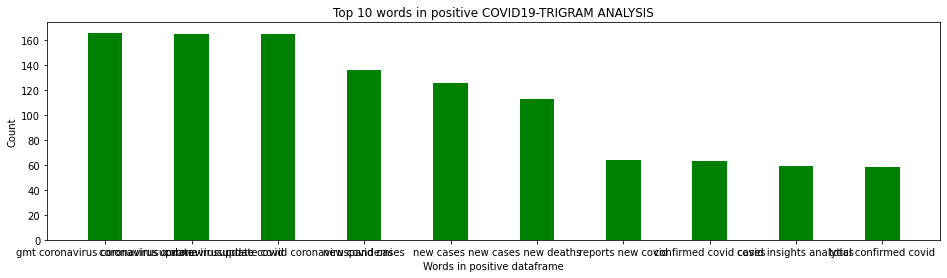

In [246]:
plt.figure(1,figsize=(16,4))
plt.bar(pd1tri,pd2tri, color ='green',
        width = 0.4)
plt.xlabel("Words in positive dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in positive COVID19-TRIGRAM ANALYSIS")
plt.savefig("positive-trigram.png")

plt.show()

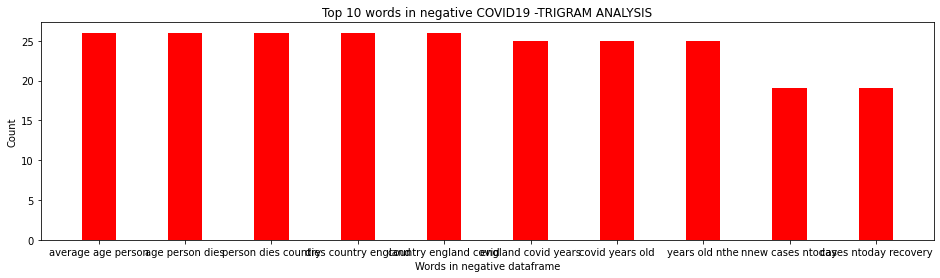

In [247]:
plt.figure(1,figsize=(16,4))
plt.bar(ned1tri,ned2tri, color ='red',
        width = 0.4) 
plt.xlabel("Words in negative dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in negative COVID19 -TRIGRAM ANALYSIS")
plt.savefig("negative-trigram.png")
plt.show()

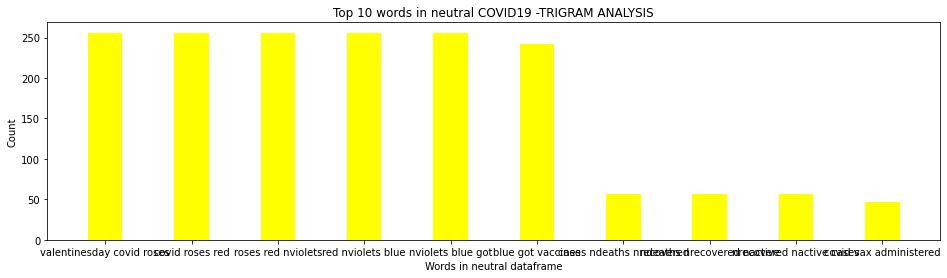

In [248]:
plt.figure(1,figsize=(16,4))
plt.bar(nud1tri,nud2tri, color ='yellow',
        width = 0.4) 
plt.xlabel("Words in neutral dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in neutral COVID19 -TRIGRAM ANALYSIS")
plt.savefig("neutral-trigram.png")
plt.show()

In [249]:
from collections import defaultdict
w1=defaultdict(int)
for text in sentiment_df.text:
  for word in generate_N_grams(text,1):
    w1[word]+=1

Sentence after removing stopwords: ['msmagazine', 'valentinesday', 'covid', 'roses', 'red', 'nviolets', 'blue', 'got', 'vaccines']
Sentence after removing stopwords: ['todayx', 'truckers', 'protest', 'parliament', 'hill', 'become', 'canadax', 'answer', 'sturgis', 'superspreader', 'sans', 'smash', 'mo']
Sentence after removing stopwords: ['bust_magazine', 'valentinesday', 'covid', 'roses', 'red', 'nviolets', 'blue', 'got', 'vaccines']
Sentence after removing stopwords: ['audreymagazine', 'valentinesday', 'covid', 'roses', 'red', 'nviolets', 'blue', 'got', 'vaccines', 'yo']
Sentence after removing stopwords: ['apreudent', 'kissing', 'coronaviru']
Sentence after removing stopwords: ['thedailybeast', 'valentinesday', 'covid', 'roses', 'red', 'nviolets', 'blue', 'got', 'vaccines']
Sentence after removing stopwords: ['deaths', 'due', 'omicron', 'high', 'delta', 'cdcgov', 'nih', 'thelancetinfdis', 'cdc_ncezid', 'infectdisnews']
Sentence after removing stopwords: ['theweek', 'valentinesday', '

Sentence after removing stopwords: ['unm', 'hospital', 'operating', 'loss', 'deficit', 'abq', 'albuquerque', 'nm', 'newmexico', 'nmleg', 'nmpol', 'coronavirus', 'un']
Sentence after removing stopwords: ['cmsgov', 'valentinesday', 'covid', 'roses', 'red', 'nviolets', 'blue', 'got', 'vaccines', 'nand']
Sentence after removing stopwords: ['world', 'spirals', 'toward', 'chaos', 'amy', 'cooper', 'fights', 'stop', 'evolution', 'deadly', 'virus', 'beliefs', 'disa']
Sentence after removing stopwords: ['newsweek', 'michele', 'bachmann', 'said', 'sarah', 'palin', 'commended', 'dining', 'public', 'infected', 'h']
Sentence after removing stopwords: ['rwjf', 'valentinesday', 'covid', 'roses', 'red', 'nviolets', 'blue', 'got', 'vaccines', 'nand']
Sentence after removing stopwords: ['khnews', 'valentinesday', 'covid', 'roses', 'red', 'nviolets', 'blue', 'got', 'vaccines', 'nand']
Sentence after removing stopwords: ['modrnhealthcr', 'valentinesday', 'covid', 'roses', 'red', 'nviolets', 'blue', 'got', 

Sentence after removing stopwords: ['check', 'late', 'guidance', 'stay', 'safe', 'amp', 'prevent', 'spread', 'coronavirus', 'upd']
Sentence after removing stopwords: ['late', 'coronavirus', 'updates', 'palestine', 'new', 'cases', 'covid', 'fatalities', 'hrs', 'six', 'people', 'die']
Sentence after removing stopwords: ['karnataka', 'also', 'announced', 'relaxations', 'covid', 'decided', 'reopen', 'schools', 'classes', 'january']
Sentence after removing stopwords: ['xcu', 'army', 'starting', 'human', 'trials', 'vaccine', 'effective', 'variants', 'coronavirus', 'national', 'post']
Sentence after removing stopwords: ['hello', 'ashishsinghim', 'fact', 'cia', 'warned', 'white', 'house', 'since', 'early', 'february', 'china', 'vastly', 'understa']
Sentence after removing stopwords: ['haryana', 'schools', 'colleges', 'reopen', 'st', 'february', 'despite', 'arrival', 'wuhan', 'lab', 'new', 'amp', 'dangerous']
Sentence after removing stopwords: ['end', 'less', 'game', 'xbxfxbbx', 'xdx', 'xefneoc

Sentence after removing stopwords: ['environment', 'bad', 'environment', 'coronavirus', 'salt', 'water', 'ph', 'mouth', 'chan']
Sentence after removing stopwords: ['czech', 'republic', 'xxf', 'xbf', 'mexico', 'xbxf', 'xbd', 'el', 'salvador', 'xbxf', 'xbb', 'japan', 'xfxfxn', 'singapore', 'xbxfn', 'end', 'corona', 'viru']
Sentence after removing stopwords: ['sweden', 'decides', 'recommending', 'covid', 'vaccines', 'kids', 'aged', 'covid', 'coronavirus', 'coronaupdate']
Sentence after removing stopwords: ['new', 'cases', 'greenland', 'gmt', 'coronavirus', 'coronavirusupdate', 'covid', 'coronaviruspandemi']
Sentence after removing stopwords: ['coronavirus', 'vaccinesandimmunisation', 'xwe', 'tiredx', 'us', 'parents', 'doctors', 'say', 'kids', 'five', 'left', 'behind']
Sentence after removing stopwords: ['new', 'test', 'amp', 'go', 'scheme', 'open', 'nationalities', 'says', 'ccsa', 'thailand', 'bangkok', 'phuket', 'samui', 'pattaya', 'ayutthaya']
Sentence after removing stopwords: ['factch

Sentence after removing stopwords: ['uk', 'summary', 'nlast', 'updated', 'xcsaturday', 'january', 'pm', 'ncoronavirus', 'covid', 'uk', 'ndeaths', 'within']
Sentence after removing stopwords: ['coronavirus', 'eritrea', 'announcement', 'ministry', 'health', 'january', 'hawelti', 'africa', 'eritrea', 'health']
Sentence after removing stopwords: ['seeing', 'version', 'corona', 'instead', 'software', 'trending', 'twitter', 'coronavirus', 'neoco']
Sentence after removing stopwords: ['karnataka', 'logs', 'new', 'covid', 'cases', 'nlive', 'updates', 'coronavirus', 'covi']
Sentence after removing stopwords: ['england', 'child', 'covid', 'admissions', 'th', 'january', 'nchild', 'covid', 'total', 'hospital', 'admissions', 'rise', 'rise', 'chi']
Sentence after removing stopwords: ['new', 'cases', 'new', 'deaths', 'kuwait', 'gmt', 'coronavirus', 'coronavirusupdate', 'covid', 'coronaviruspandemi']
Sentence after removing stopwords: ['people', 'died', 'covid', 'uk', 'past', 'hours', 'nbringing', 'tot

Sentence after removing stopwords: ['covid', 'patients', 'recover', 'amp', 'discharged', 'hospital', 'raising', 'total', 'number', 'recoveries', 'sl']
Sentence after removing stopwords: ['covid', 'updates', 'jan', 'th', 'covid', 'coronavirus', 'corona', 'stayhome', 'quarantine', 'staysafe', 'instagram', 'like', 'updates']
Sentence after removing stopwords: ['sanjeev', 'gupta', 'thanks', 'uk', 'minister', 'xinstrumentalx', 'role', 'securing', 'loans', 'sanjeev', 'gupt']
Sentence after removing stopwords: ['new', 'cases', 'covid', 'toronto', 'yesterday', 'ontario', 'day', 'averages', 'respectively']
Sentence after removing stopwords: ['covid', 'cluster', 'growing', 'thai', 'house', 'representatives', 'bhumjaithai', 'party', 'mps', 'caught']
Sentence after removing stopwords: ['serbia', 'coronavirus', 'update', 'deaths', 'new', 'case']
Sentence after removing stopwords: ['cases', 'reported', 'kamrup', 'metro', 'assam', 'assamcovidupdate', 'coronavirus', 'covid', 'keshab_mahanta']
Sentence

Sentence after removing stopwords: ['study', 'countries', 'observed', 'covid', 'outbreaks', 'occur', 'worldwide', 'recur', 'cycles', 'variable', 'leng']
Sentence after removing stopwords: ['need', 'december', 'back', 'take', 'directly', 'march', 'feelin_like_challenge', 'mood', 'writing', 'coronavirus', 'saturdaythought']
Sentence after removing stopwords: ['verified', 'leads', 'rtpcr', 'test', 'covid', 'pune', 'covid', 'covid_', 'covidindia', 'covidtest', 'covidtesting']
Sentence after removing stopwords: ['new', 'cases', 'new', 'deaths', 'germany', 'gmt', 'coronavirus', 'coronavirusupdate', 'covid', 'coronaviruspandemi']
Sentence after removing stopwords: ['summarized', 'number', 'infected', 'people', 'covid', 'tokyo', 'amp', 'japan', 'amp', 'world', 'today', 'nthe', 'details', 'toky']
Sentence after removing stopwords: ['nytimes', 'vaccine', 'remarkably', 'effective', 'preventing', 'serious', 'illnessxchances', 'getting', 'sick', 'extremely', 'low', 'e']
Sentence after removing stop

Sentence after removing stopwords: ['armand', 'rancho', 'del', 'cielo', 'countries', 'requiring', 'covid', 'boosters', 'travel', 'boosterdose', 'booster', 'vaccine', 'coronaviru']
Sentence after removing stopwords: ['new', 'cases', 'new', 'deaths', 'croatia', 'gmt', 'coronavirus', 'coronavirusupdate', 'covid', 'coronaviruspandemi']
Sentence after removing stopwords: ['bosnia', 'registers', 'new', 'coronavirus', 'infections', 'covid', 'fatalitie']
Sentence after removing stopwords: ['axisbank', 'shown', 'cruelty', 'nbefore', 'coronavirus', 'paid', 'almost', 'half', 'amount', 'send', 'arbi']
Sentence after removing stopwords: ['fact', 'antibiotics', 'work', 'viruses', 'bacteria', 'coronavirus', 'moronavirus', 'covidiot']
Sentence after removing stopwords: ['army', 'pan', 'coronavirus', 'vaccine', 'could', 'wipe', 'covid', 'pandemics', 'spfn', 'successfully', 'completed', 'animal', 'testing', 'pha']
Sentence after removing stopwords: ['boosters', 'army', 'pan', 'coronavirus', 'vaccine', '

Sentence after removing stopwords: ['children', 'women', 'drank', 'soda', 'daily', 'pregnant', 'likely', 'experience', 'adhd', 'symptoms']
Sentence after removing stopwords: ['newly', 'found', 'neocov', 'variant', 'coronavirus', 'new', 'variant', 'concern', 'nneocov', 'vs', 'omicron', 'one']
Sentence after removing stopwords: ['new', 'cases', 'new', 'deaths', 'nepal', 'gmt', 'coronavirus', 'coronavirusupdate', 'covid', 'coronaviruspandemi']
Sentence after removing stopwords: ['neocov', 'worrisome', 'issue', 'bad', 'coronavirus', 'read', 'opinion', 'experts', 'coronavirus', 'neocov', 'mers']
Sentence after removing stopwords: ['austria', 'begin', 'easing', 'coronavirus', 'restrictions', 'fe']
Sentence after removing stopwords: ['th', 'january', 'six', 'areas', 'reached', 'alelevel']
Sentence after removing stopwords: ['drericding', 'russia', 'usa', 'global', 'covid', 'coronavirus', 'pandemic', 'alone', 'million', 'reported', 'known', 'deaths']
Sentence after removing stopwords: ['beat',

Sentence after removing stopwords: ['babies', 'sensitive', 'language', 'patterns', 'soothing', 'rhymes', 'parents', 'sing', 'vi']
Sentence after removing stopwords: ['new', 'cases', 'new', 'deaths', 'vietnam', 'gmt', 'coronavirus', 'coronavirusupdate', 'covid', 'coronaviruspandemi']
Sentence after removing stopwords: ['long', 'covid', 'hidden', 'lung', 'damage', 'spotted', 'scans', 'covid', 'longcovid', 'covid', 'coronaviru']
Sentence after removing stopwords: ['coronavirus', 'death', 'toll', 'iran', 'surpassed', 'iranian', 'regime', 'banned', 'certified', 'vaccines', 'manipulated']
Sentence after removing stopwords: ['verified', 'leads', 'rtpcr', 'test', 'covid', 'delhi', 'covid', 'covid_', 'covidindia', 'covidtest', 'covidtesting']
Sentence after removing stopwords: ['omicron', 'variant', 'laid', 'bare', 'need', 'live', 'disease', 'throws', 'ever', 'changing', 'set', 'challen']
Sentence after removing stopwords: ['covid', 'night', 'curfew', 'lifted', 'karnataka', 'january', 'coronavi

Sentence after removing stopwords: ['late', 'japan', 'beyond', 'coronavirus', 'pandemic', 'japan', 'daily', 'covid', 'cases', 'hit', 'record', 'high']
Sentence after removing stopwords: ['covid_', 'city', 'wise', 'corona', 'update', 'tamil', 'nadu', 'today', 'january', 'ist', 'ntotal', 'cases']
Sentence after removing stopwords: ['dies', 'xxf', 'nshould', 'worry', 'nneocov', 'true', 'hype', 'covid']
Sentence after removing stopwords: ['covid_', 'city', 'wise', 'corona', 'update', 'maharashtra', 'today', 'january', 'ist', 'ntotal', 'case']
Sentence after removing stopwords: ['covid', 'coronavirus', 'motion', 'banner', 'design', 'nbetter', 'view', 'ads', 'advertising']
Sentence after removing stopwords: ['vaccine', 'daily', 'repoin', 'india', 'nvaccinated', 'day', 'total', 'vaccinated', 'ncheck', 'state', 'wise']
Sentence after removing stopwords: ['coronavirus', 'nature', 'sending', 'us', 'messagex', 'says', 'un', 'environment', 'chie']
Sentence after removing stopwords: ['indiafightsco

Sentence after removing stopwords: ['world', 'xccountries', 'united', 'states', 'covid', 'coronavirus', 'pandemic', 'nlast', 'updated', 'january', 'gmt', 'nxf']
Sentence after removing stopwords: ['everybody', 'kung', 'flu', 'fighting', 'kungflu', 'chinavirus', 'covid', 'coronavirus', 'delta', 'omnicro']
Sentence after removing stopwords: ['india', 'reports', 'lakh', 'new', 'cases', 'positivity', 'rate', 'drops', 'india', 'covid', 'covid_']
Sentence after removing stopwords: ['rule', 'risks', 'another', 'pandemic', 'like', 'covid', 'coming', 'years', 'r', 'millions', 'virus', 'world', 'whi']
Sentence after removing stopwords: ['jaipur', 'rajasthan', 'governor', 'kalraj', 'mishra', 'tested', 'positive', 'covid', 'saturday', 'nhe', 'asymptomatic', 'se']
Sentence after removing stopwords: ['music', 'coronavirus', 'diego', 'verdaguer', 'popular', 'mexican', 'argentinian', 'singer', 'dies', 'covid', 'star', 'racked', 'almost']
Sentence after removing stopwords: ['millions', 'missed', 'routi

Sentence after removing stopwords: ['wuhan', 'scientists', 'warn', 'new', 'corona', 'leap', 'called', 'neocov', 'mutation', 'transmissible', 'omicron']
Sentence after removing stopwords: ['delhi', 'govt', 'soon', 'make', 'puc', 'certificate', 'mandatory', 'filling', 'fuel', 'pumps', 'nbits', 'news', 'india', 'news', 'covid']
Sentence after removing stopwords: ['j', 'amp', 'k', 'three', 'militant', 'associates', 'arrested', 'ganderbal', 'arms', 'ammunition', 'recovered', 'nbits', 'news', 'india', 'news', 'covid']
Sentence after removing stopwords: ['australian', 'open', 'stefanos', 'tsitsipas', 'feels', 'targetted', 'officials', 'coucoaching', 'nbits', 'news', 'india', 'news']
Sentence after removing stopwords: ['afsana', 'khan', 'visits', 'devoleena', 'bhattacharjee', 'hospital', 'bb', 'injury', 'sends', 'prayers', 'nbits', 'news', 'india', 'news']
Sentence after removing stopwords: ['illegal', 'snooping', 'using', 'pegasus', 'amounts', 'treason', 'congress', 'reacts', 'repoon', 'spywa

Sentence after removing stopwords: ['coronavirus', 'covid', 'covid_', 'sarscov', 'covidworld', 'ncovid', 'vaccine', 'boosters', 'administered', 'per', 'people', 'jan']
Sentence after removing stopwords: ['new', 'cases', 'taiwan', 'gmt', 'coronavirus', 'coronavirusupdate', 'covid', 'coronaviruspandemi']
Sentence after removing stopwords: ['coronavirus', 'covid', 'covid_', 'sarscov', 'covidworld', 'ncoronavirus', 'disease', 'covid', 'showing']
Sentence after removing stopwords: ['coronavirus', 'covid', 'covid_', 'sarscov', 'covidworld', 'nsars', 'cov', 'omicron', 'variant', 'nthis', 'page', 'last', 'edited']
Sentence after removing stopwords: ['delhi', 'total', 'new', 'cases', 'coronavirus', 'infection', 'reported', 'national', 'capital', 'today', 'people']
Sentence after removing stopwords: ['new', 'coronavirus', 'neocov', 'discovered', 'chinese', 'scientists', 'dangerous', 'xa', 'xbfxafxa', 'xbxa', 'xxa', 'xbxa', 'xbcxaxa', 'xbcxa', 'xbe', 'xxaxa', 'xbxaxa', 'xbexa', 'inkhabar', 'neoco

Sentence after removing stopwords: ['silurians', 'threaten', 'pull', 'future', 'tech', 'covid', 'accusations', 'like', 'retweet', 'coronaviru']
Sentence after removing stopwords: ['new', 'cases', 'new', 'deaths', 'czechia', 'gmt', 'coronavirus', 'coronavirusupdate', 'covid', 'coronaviruspandemi']
Sentence after removing stopwords: ['india', 'covid', 'cases', 'decline', 'last', 'hours', 'deaths', 'rise', 'india', 'covid', 'coronavirus', 'netindia']
Sentence after removing stopwords: ['statistics', 'jan', 'ntotal', 'tests', 'last', 'hours', 'npositive', 'cases', 'npositivity', 'ndeaths', 'npa']
Sentence after removing stopwords: ['three', 'ways', 'coronavirus', 'evolve', 'coronavirus', 'covid']
Sentence after removing stopwords: ['statistics', 'show', 'delta', 'variant', 'covid', 'become', 'less', 'dominant', 'replaced']
Sentence after removing stopwords: ['pakistan', 'coronavirus', 'positivity', 'rate', 'third', 'consecutive', 'day', 'omicron', 'coronavirus', 'pandemic']
Sentence after 

Sentence after removing stopwords: ['new', 'omicron', 'cases', 'recorded', 'srilanka', 'coronavirus', 'covid']
Sentence after removing stopwords: ['joni', 'mitchell', 'joining', 'neil', 'young', 'protest', 'spotify', 'platform', 'hosting', 'joe', 'rogan', 'whose', 'podcast']
Sentence after removing stopwords: ['listen_to_surrahalrehman', 'qalandar_baba_bukhari', 'coronavirus', 'coronavirusupdates', 'corona', 'coviduk', 'covid']
Sentence after removing stopwords: ['india', 'registers', 'lakh', 'new', 'covid', 'cases', 'deaths', 'covid', 'coronaviru']
Sentence after removing stopwords: ['covid', 'india', 'india', 'active', 'covid', 'cases', 'decline', 'reach', 'health', 'ministry', 'covid']
Sentence after removing stopwords: ['happyvalentinesday', 'valentinesday', 'covid', 'nroses', 'red', 'nviolets', 'blue', 'got', 'vaccines']
Sentence after removing stopwords: ['people', 'testing', 'positive', 'coronavirus', 'infection', 'day', 'india', 'total', 'tally', 'cases', 'increase']
Sentence a

Sentence after removing stopwords: ['seanhannity', 'valentinesday', 'covid', 'roses', 'red', 'nviolets', 'blue', 'got', 'vaccines']
Sentence after removing stopwords: ['tuckercarlson', 'valentinesday', 'covid', 'roses', 'red', 'nviolets', 'blue', 'got', 'vaccines']
Sentence after removing stopwords: ['people', 'testing', 'positive', 'coronavirus', 'infection', 'day', 'india', 'total', 'tally', 'cases', 'increa']
Sentence after removing stopwords: ['neocov', 'chinese', 'scientists', 'warn', 'new', 'kind', 'coronavirus', 'bats', 'beijing', 'type', 'coronavirus', 'neocov']
Sentence after removing stopwords: ['new', 'study', 'finds', 'vaccine', 'risk', 'heaissues', 'coronaviru']
Sentence after removing stopwords: ['covidvaccine', 'valentinesday', 'covid', 'roses', 'red', 'nviolets', 'blue', 'got', 'vaccines']
Sentence after removing stopwords: ['live', 'india', 'active', 'caseload', 'dips', 'lakh', 'karnataka', 'tops', 'active', 'cases', 'list', 'coronavirus', 'covi']
Sentence after removi

Sentence after removing stopwords: ['nstnation', 'malaysia', 'registered', 'covid', 'deaths', 'yesterday', 'taking', 'total', 'fatalities', 'involving']
Sentence after removing stopwords: ['bluesmagazineuk', 'valentinesday', 'covid', 'roses', 'red', 'nviolets', 'blue', 'got', 'vaccines']
Sentence after removing stopwords: ['songwritingnews', 'valentinesday', 'covid', 'roses', 'red', 'nviolets', 'blue', 'got', 'vaccines']
Sentence after removing stopwords: ['amersongwriter', 'valentinesday', 'covid', 'roses', 'red', 'nviolets', 'blue', 'got', 'vaccines', 'yo']
Sentence after removing stopwords: ['songwritingmag', 'valentinesday', 'covid', 'roses', 'red', 'nviolets', 'blue', 'got', 'vaccines', 'yo']
Sentence after removing stopwords: ['total', 'children', 'given', 'first', 'dose', 'vaccine', 'juvenile', 'homes', 'across', 'city', 'coronapositive', 'coronavirus']
Sentence after removing stopwords: ['aarpbulletin', 'valentinesday', 'covid', 'roses', 'red', 'nviolets', 'blue', 'got', 'vacci

Sentence after removing stopwords: ['wsjhealth', 'valentinesday', 'covid', 'roses', 'red', 'nviolets', 'blue', 'got', 'vaccines']
Sentence after removing stopwords: ['timehealth', 'valentinesday', 'covid', 'roses', 'red', 'nviolets', 'blue', 'got', 'vaccines']
Sentence after removing stopwords: ['shape_magazine', 'valentinesday', 'covid', 'roses', 'red', 'nviolets', 'blue', 'got', 'vaccines', 'yo']
Sentence after removing stopwords: ['fitnessmagazine', 'valentinesday', 'covid', 'roses', 'red', 'nviolets', 'blue', 'got', 'vaccines']
Sentence after removing stopwords: ['mizoram', 'new', 'covid', 'cases', 'amp', 'deaths', 'reported', 'state', 'till', 'today', 'active', 'cases', 'state', 'stat']
Sentence after removing stopwords: ['authoritymgzine', 'valentinesday', 'covid', 'roses', 'red', 'nviolets', 'blue', 'got', 'vaccines']
Sentence after removing stopwords: ['prettyprgrssive', 'valentinesday', 'covid', 'roses', 'red', 'nviolets', 'blue', 'got', 'vaccines']
Sentence after removing sto

Sentence after removing stopwords: ['groveatlantic', 'valentinesday', 'covid', 'roses', 'red', 'nviolets', 'blue', 'got', 'vaccines']
Sentence after removing stopwords: ['inpics', 'mu', 'delta', 'ihu', 'neocov', 'list', 'many', 'variants', 'coronavirus']
Sentence after removing stopwords: ['pocket_books', 'valentinesday', 'covid', 'roses', 'red', 'nviolets', 'blue', 'got', 'vaccines']
Sentence after removing stopwords: ['wuhan', 'neocov', 'looking', 'current', 'trend', 'indian', 'parents', 'like', 'niit', 'vit', 'chod', 'pharmacy', 'microbiology', 'p']
Sentence after removing stopwords: ['atriabooks', 'valentinesday', 'covid', 'roses', 'red', 'nviolets', 'blue', 'got', 'vaccines']
Sentence after removing stopwords: ['scribnerbooks', 'valentinesday', 'covid', 'roses', 'red', 'nviolets', 'blue', 'got', 'vaccines']
Sentence after removing stopwords: ['henryholt', 'valentinesday', 'covid', 'roses', 'red', 'nviolets', 'blue', 'got', 'vaccines']
Sentence after removing stopwords: ['future', 

Sentence after removing stopwords: ['usa', 'covid', 'deaths', 'reported', 'totaling', 'coronavirus', 'deaths', 'avg', 'deaths', 'st']
Sentence after removing stopwords: ['reutersshowbiz', 'valentinesday', 'covid', 'roses', 'red', 'nviolets', 'blue', 'got', 'vaccines', 'yo']
Sentence after removing stopwords: ['dolo', 'funny', 'meme', 'nabhi', 'india', 'may', 'dolo', 'chal', 'raha', 'hei', 'brahmmanandam', 'fogg', 'comedy']
Sentence after removing stopwords: ['apentertainment', 'valentinesday', 'covid', 'roses', 'red', 'nviolets', 'blue', 'got', 'vaccines']
Sentence after removing stopwords: ['world', 'spirals', 'toward', 'chaos', 'amy', 'cooper', 'fights', 'stop', 'evolution', 'deadly', 'virus', 'beliefs', 'disa']
Sentence after removing stopwords: ['another', 'hipe', 'wuhan', 'officialncoc', 'covid_', 'neocov', 'coviduk', 'coronaviru']
Sentence after removing stopwords: ['mindfulness', 'help', 'protect', 'coronaviru']
Sentence after removing stopwords: ['covid', 'left', 'world', 'cryi

Sentence after removing stopwords: ['guillemotpress', 'valentinesday', 'covid', 'roses', 'red', 'nviolets', 'blue', 'got', 'vaccine']
Sentence after removing stopwords: ['shearsmanbooks', 'valentinesday', 'covid', 'roses', 'red', 'nviolets', 'blue', 'got', 'vaccine']
Sentence after removing stopwords: ['washington', 'trooper', 'defied', 'state', 'vaccine', 'mandate', 'told', 'gov', 'kiss', 'dies', 'covid', 'covidiot']
Sentence after removing stopwords: ['tentacularmag', 'valentinesday', 'covid', 'roses', 'red', 'nviolets', 'blue', 'got', 'vaccine']
Sentence after removing stopwords: ['perversemag', 'valentinesday', 'covid', 'roses', 'red', 'nviolets', 'blue', 'got', 'vaccine']
Sentence after removing stopwords: ['finishedpoetry', 'valentinesday', 'covid', 'roses', 'red', 'nviolets', 'blue', 'got', 'vaccine']
Sentence after removing stopwords: ['india', 'reports', 'fresh', 'covid', 'cases', 'positivity', 'rate', 'drops', 'per', 'cent', 'coronaviru']
Sentence after removing stopwords: ['

Sentence after removing stopwords: ['man', 'donates', 'body', 'covid', 'research', 'coronaviru']
Sentence after removing stopwords: ['haryana', 'government', 'eases', 'covid', 'related', 'restrictions', 'state', 'following', 'decline', 'coronavirus', 'cases', 'allows']
Sentence after removing stopwords: ['another', 'persons', 'infected', 'omicron', 'variant', 'coronavirus', 'identified', 'sri', 'lanka']
Sentence after removing stopwords: ['coronavirus', 'covid', 'repoxf', 'january', 'nxf', 'xbaxf', 'usa', 'xe', 'xef', 'deaths', 'confirmed', 'cases', 'nxf', 'xbxf', 'fr', 'xe', 'xefxf']
Sentence after removing stopwords: ['eat', 'hot', 'raw', 'grated', 'daikon', 'radish', 'grate', 'daikon', 'wait', 'make', 'hot', 'juice']
Sentence after removing stopwords: ['scene', 'repeated', 'across', 'chinese', 'capital', 'pop', 'window', 'warned', 'app', 'could', 'long', 'ascertain']
Sentence after removing stopwords: ['welcome', 'milestone', 'sri', 'lanka', 'marks', 'one', 'year', 'since', 'covid',

Sentence after removing stopwords: ['number', 'coronavirus', 'cases', 'world', 'reached', 'million', 'coronavirus', 'omicro']
Sentence after removing stopwords: ['itx', 'weird', 'stain', 'nfirst', 'mom', 'caught', 'covid', 'boosterdose', 'didnx', 'xt', 'need', 'hospit']
Sentence after removing stopwords: ['coronavirus', 'variants', 'mu', 'alpha', 'beta', 'gamma', 'lambda', 'delta', 'delta', 'plus', 'ihu', 'omicron', 'neocov']
Sentence after removing stopwords: ['thailand', 'registered', 'covid', 'fatalities', 'new', 'cases', 'previous', 'hours', 'public', 'health']
Sentence after removing stopwords: ['judge', 'sides', 'treasury', 'tribes', 'coronavirus', 'relief', 'case', 'coronavirus']
Sentence after removing stopwords: ['july', 'genocide', 'plandemicgameover', 'epstein', 'wuhan', 'coronavirus', 'covid']
Sentence after removing stopwords: ['onc_hercules', 'mucho', 'covid', 'coronaviru']
Sentence after removing stopwords: ['open', 'letter', 'everyone', 'keeps', 'saying', 'xitx', 'overx

Sentence after removing stopwords: ['god', 'send', 'coronavirus', 'biblical', 'reasons', 'believing', 'god', 'sent', 'punishment', 'click']
Sentence after removing stopwords: ['anyone', 'else', 'feeling', 'bordercrisis', 'border', 'borderpatrol', 'vaccine', 'covid', 'covid', 'fauci', 'biden', 'coronavirus']
Sentence after removing stopwords: ['additional', 'new', 'covid', 'coronavirus', 'incidences', 'reported', 'florida', 'covid', 'publichealth']
Sentence after removing stopwords: ['new', 'covid', 'data', 'pm', 'est', 'coronavirus', 'covid', 'covid']
Sentence after removing stopwords: ['morgus', 'denies', 'conglomerate', 'stockpiling', 'covid', 'vaccine', 'like', 'retweet', 'coronaviru']
Sentence after removing stopwords: ['new', 'positive', 'cases', 'ncurrent', 'hospitalized', 'nnew', 'deaths', 'ncdc', 'transmission', 'risk', 'high', 'coronaviru']
Sentence after removing stopwords: ['truckers', 'want', 'ottawa', 'canx', 'xt', 'give', 'covidcanada']
Sentence after removing stopwords: 

Sentence after removing stopwords: ['new', 'cases', 'china', 'hong', 'kong', 'sar', 'gmt', 'coronavirus', 'coronavirusupdate', 'covid', 'coronaviruspandemi']
Sentence after removing stopwords: ['delivers', 'first', 'high', 'tech', 'treatment', 'centre', 'italy', 'nstory', 'nato', 'suppoand', 'procureme']
Sentence after removing stopwords: ['corona', 'info', 'india', 'nnew', 'cases', 'ntoday', 'recovery', 'ntoday', 'deaths', 'ntotal', 'active', 'cases', 'ntot']
Sentence after removing stopwords: ['corona', 'info', 'usa', 'nnew', 'cases', 'ntoday', 'recovery', 'ntoday', 'deaths', 'ntotal', 'active', 'cases', 'ntot']
Sentence after removing stopwords: ['happy_chirpy', 'oh', 'xn', 'neocov', 'covid', 'coronaviru']
Sentence after removing stopwords: ['g', 'wifi', 'probably', 'wonx', 'xt', 'give', 'cancer', 'coronavirus', 'covi']
Sentence after removing stopwords: ['coronavirus', 'pandemic', 'establishes', 'stage', 'hacking', 'nkade', 'miller', 'linkedin', 'says', 'due', 'covid']
Sentence aft

Sentence after removing stopwords: ['health', 'coronavirus', 'covid', 'omicron', 'deaths', 'gt', 'omicron', 'caused', 'high', 'increase', 'u', 'daily', 'death', 'count']
Sentence after removing stopwords: ['xxf', 'xbdenmark', 'covid', 'pandemic', 'r', 'number', 'epi', 'risk', 'eri', 'graphs', 'via', 'daily', 'hospital', 'amp', 'icu', 'occupancy', 'amp', 'daily', 'cases']
Sentence after removing stopwords: ['world', 'wide', 'covid', 'vaccinemandate', 'coronaupdate', 'coronavirus', 'fuckfeelings', 'nopen', 'americ']
Sentence after removing stopwords: ['new', 'cases', 'new', 'death', 'french', 'guiana', 'gmt', 'coronavirus', 'coronavirusupdate', 'covid', 'coronaviruspandemi']
Sentence after removing stopwords: ['corona', 'info', 'usa', 'nnew', 'cases', 'ntoday', 'recovery', 'ntoday', 'deaths', 'ntotal', 'active', 'cases', 'ntota']
Sentence after removing stopwords: ['omicron', 'ba', 'covid', 'variant', 'australia', 'know', 'zerocovid', 'work']
Sentence after removing stopwords: ['xbxf', '

Sentence after removing stopwords: ['need', 'rights', 'job', 'protect', 'coronaviru']
Sentence after removing stopwords: ['new', 'cases', 'new', 'deaths', 'germany', 'gmt', 'coronavirus', 'coronavirusupdate', 'covid', 'coronaviruspandemi']
Sentence after removing stopwords: ['couldnx', 'xt', 'make', 'news', 'morning', 'xcnew', 'strain', 'son', 'omicron', 'canx', 'xt', 'detected', 'rapid', 'testsx']
Sentence after removing stopwords: ['new', 'cases', 'new', 'deaths', 'germany', 'gmt', 'coronavirus', 'coronavirusupdate', 'covid', 'coronaviruspandemi']
Sentence after removing stopwords: ['new', 'covid', 'data', 'pm', 'est', 'coronavirus', 'covid', 'covid']
Sentence after removing stopwords: ['errr', 'csimonwrite', 'remember', 'realdonaldtrump', 'said', 'americans', 'access', 'vaccines', 'think', 'relatively']
Sentence after removing stopwords: ['today', 'one', 'deadly', 'reporting', 'days', 'simcoe', 'muskokax', 'covid', 'pandemic', 'history']
Sentence after removing stopwords: ['icymi', 

Sentence after removing stopwords: ['haryana', 'unlock', 'guidelines', 'cinema', 'halls', 'theatres', 'open', 'capacity', 'full', 'list', 'sops', 'haryana']
Sentence after removing stopwords: ['new', 'cases', 'new', 'deaths', 'spain', 'gmt', 'coronavirus', 'coronavirusupdate', 'covid', 'coronaviruspandemi']
Sentence after removing stopwords: ['dick', 'sporting', 'goods', 'inventory', 'levels', 'relation', 'sales', 'indicates', 'inventory', 'levels', 'steadily', 'gro']
Sentence after removing stopwords: ['imagine', 'substantial', 'portion', 'us', 'population', 'gets', 'covid', 'vaccine', 'information', 'likes']
Sentence after removing stopwords: ['well', 'well', 'guess', 'may', 'faked', 'positive', 'coronavirus', 'test', 'avoid', 'getting', 'vaccine']
Sentence after removing stopwords: ['fact', 'countries', 'hot', 'weather', 'reported', 'cases', 'covid', 'coronavirus', 'moronavirus', 'covidiot']
Sentence after removing stopwords: ['new', 'covid', 'data', 'pm', 'est', 'coronavirus', 'cov

Sentence after removing stopwords: ['hard', 'left', 'brought', 'dept', 'headspace', 'reclamation', 'propaganda']
Sentence after removing stopwords: ['new', 'vaccine', 'developed', 'cover', 'covid', 'coronavirus', 'strains', 'included', 'family', 'common', 'cold']
Sentence after removing stopwords: ['check', 'interview', 'projectcbd', 'highlights', 'another', 'explanation', 'top', 'scientist', 'oregon', 'st']
Sentence after removing stopwords: ['million', 'freelance', 'united', 'kingdom', 'number', 'rise', 'even', 'coronavirus', 'pandemi']
Sentence after removing stopwords: ['second', 'version', 'omicron', 'spreading', 'scientists', 'ale', 'coronavirus', 'publichealt']
Sentence after removing stopwords: ['coronavirus', 'covid', 'covid_', 'sarscov', 'covidworld', 'ncovid', 'xcsituation', 'european', 'region', 'ndata', 'xc']
Sentence after removing stopwords: ['new', 'cases', 'new', 'deaths', 'south', 'africa', 'gmt', 'coronavirus', 'coronavirusupdate', 'covid', 'coronaviruspandemi']
Sent

Sentence after removing stopwords: ['new', 'cases', 'ireland', 'gmt', 'coronavirus', 'coronavirusupdate', 'covid', 'coronaviruspandemi']
Sentence after removing stopwords: ['dzoolander', 'policywonk', 'hepas', 'catch', 'es', 'microns', 'big', 'coronavirus', 'nanometers', 'micr']
Sentence after removing stopwords: ['absolutely', 'xn', 'coronavirus', 'covid', 'meme']
Sentence after removing stopwords: ['flowerlady', 'people', 'r', 'lazy', 'past', 'yrs', 'coronavirus', 'w', 'vaxx', 'work', 'odd', 'shifts']
Sentence after removing stopwords: ['message', 'current', 'future', 'generations', 'nnever', 'forget', 'viruses', 'came', 'country', 'profited']
Sentence after removing stopwords: ['mansukhmandviya', 'conducted', 'high', 'level', 'meeting', 'southern', 'states', 'ut', 'health', 'minister', 'covid']
Sentence after removing stopwords: ['omicron', 'dominates', 'covidthirdwave', 'karnataka', 'minister', 'clarifies', 'deleting', 'previous', 'tweet']
Sentence after removing stopwords: ['unive

Sentence after removing stopwords: ['hope', 'usa', 'prohibition', 'prevented', 'studies', 'medicine', 'prohibited', 'substances', 'marijuana', 'cannabis', 'compound']
Sentence after removing stopwords: ['new', 'covid', 'data', 'pm', 'est', 'coronavirus', 'covid', 'covid']
Sentence after removing stopwords: ['new', 'cases', 'new', 'deaths', 'singapore', 'gmt', 'coronavirus', 'coronavirusupdate', 'covid', 'coronaviruspandemi']
Sentence after removing stopwords: ['situation', 'right', 'wuhan', 'neocov', 'coronavirus', 'china', 'covi']
Sentence after removing stopwords: ['breakingnews', 'ncases', 'stealth', 'omicron', 'subvariant', 'confirmed', 'northeast', 'states', 'reports', 'omicronvariant']
Sentence after removing stopwords: ['version', 'tweeted', 'nicknamed', 'alpha', 'variant', 'intriguingly', 'punchmagazine', 'prophes']
Sentence after removing stopwords: ['corona', 'cousins', 'ruling', 'world', 'one', 'transforming', 'era', 'viruses']
Sentence after removing stopwords: ['allanruhl'

Sentence after removing stopwords: ['neocov', 'new', 'risk', 'world', 'coronavirus', 'covid', 'covid', 'neoco']
Sentence after removing stopwords: ['need', 'throw', 'china', 'coronavirus', 'coron']
Sentence after removing stopwords: ['covid', 'vaccines', 'safe', 'effective', 'ensure', 'good', 'protection', 'coronavirus', 'nare', 'vaccinated']
Sentence after removing stopwords: ['storytelling', 'minx', 'xxf', 'xxf', 'corona', 'coronavirus', 'schwurbler', 'verschwxbrungstheorie']
Sentence after removing stopwords: ['cnn', 'bbc', 'foxnews', 'nanother', 'new', 'variant', 'taking', 'nthe', 'galloway', 'hoard', 'urgent', 'message']
Sentence after removing stopwords: ['tips', 'amp', 'experiences', 'touring', 'canyons', 'us', 'southwest', 'coronavirus', 'learn', 'pandemic', 'personal', 'observations', 'exposed', 'cance']
Sentence after removing stopwords: ['coronavirus', 'evolution', 'possibilities', 'future', 'mutations', 'extremely', 'wide', 'ranging', 'within', 'omicron', 'alone']
Sentence 

Sentence after removing stopwords: ['fire', 'child', 'hitler', 'brainwasher', 'quebec', 'right', 'u', 'call', 'amp', 'write', 'school', 'amp', 'call', 'police', 'fired']
Sentence after removing stopwords: ['ultimately', 'drinking', 'whiskey', 'cure', 'coldx', 'asking', 'friend', 'covid', 'sick', 'coron']
Sentence after removing stopwords: ['total', 'confirmed', 'covid', 'cases', 'county', 'nc', 'covid', 'insights', 'analytics', 'team', 'usafacts']
Sentence after removing stopwords: ['mobile', 'phone', 'wireless', 'technology', 'wifi', 'reached', 'itx', 'saturation', 'point', 'crossed', 'safe', 'limits']
Sentence after removing stopwords: ['dc', 'vaccine', 'mandate', 'protests', 'live', 'speeches', 'defeatthemandates', 'novaccinemandate']
Sentence after removing stopwords: ['ne', 'delhi', 'least', 'new', 'slots', 'available', 'amp', 'ncovishield', 'ndose', 'ndose']
Sentence after removing stopwords: ['first_defender', 'agdelorenzi', 'msglynisbarber', 'covid', 'immunizations', 'work', 'b

Sentence after removing stopwords: ['nytimes', 'latimes', 'jstein_wapo', 'thenation', 'kdvr', 'seattletimes', 'denverchannel', 'address', 'thousa']
Sentence after removing stopwords: ['free', 'belgian', 'army', 'brussles', 'brusselprotest', 'belgium', 'eu', 'covid', 'covid', 'resistcovid', 'nbut', 'also', 'syria', 'nato']
Sentence after removing stopwords: ['travel', 'alert', 'cyprus', 'ease', 'covid', 'travel', 'restrictions', 'jan', 'travelers', 'received', 'booster', 'shot']
Sentence after removing stopwords: ['europe', 'could', 'headed', 'pandemic', 'endgame', 'covid', 'updates', 'nxf', 'xexf', 'xitaly', 'reports', 'new', 'cases']
Sentence after removing stopwords: ['author', 'featured', 'sports', 'illustrated', 'ny', 'times', 'wall', 'street', 'journal', 'military', 'channel', 'discovery', 'channel', 'npr']
Sentence after removing stopwords: ['covid', 'covidiot', 'covid', 'covidiots', 'covid_', 'covidvic', 'vaccinesideeffects', 'vaccinated', 'vaccination']
Sentence after removing 

Sentence after removing stopwords: ['nostalgia', 'every', 'glass', 'mailonsunday', 'thinking', 'back', 'past', 'fruit', 'phenol', 'quantification', 'experiments', 'nmore', 'excuse', 'f']
Sentence after removing stopwords: ['samshirazim', 'amandachaseva', 'could', 'found', 'liable', 'advocating', 'harmful', 'action', 'children', 'become', 'ill']
Sentence after removing stopwords: ['motionpictures', 'new', 'light', 'hope', 'awakened', 'horizon', 'world', 'emerges', 'pandemic', 'shelb']
Sentence after removing stopwords: ['covid', 'scam', 'becoming', 'absurd', 'care', 'ride', 'immoral', 'train']
Sentence after removing stopwords: ['biden', 'bans', 'unvaxxed', 'truckers', 'mexico', 'canada', 'entering', 'usa', 'allow', 'unvaxxed', 'il']
Sentence after removing stopwords: ['people', 'awake', 'wonx', 'xt', 'allow', 'slimy', 'elites', 'dictate', 'life', 'time', 'testify', 'secgov']
Sentence after removing stopwords: ['southafrica', 'cdc', 'reposhows', 'omicron', 'much', 'high', 'case', 'hospi

Sentence after removing stopwords: ['qanon', 'puppet', 'said', 'xidiotsx', 'get', 'vax', 'dies', 'covid', 'regrets', 'family']
Sentence after removing stopwords: ['emotional', 'wellbeing', 'covid', 'pandemic', 'thurs', 'p', 'mentalhealthmatters', 'tweetiatrician', 'maineaap']
Sentence after removing stopwords: ['xultime', 'news', 'parole', 'chiave', 'nomicron', 'omicron', 'ncovid', 'covid', 'ncovid', 'covid', 'nthat', 'nukraine', 'ukraine', 'ncould']
Sentence after removing stopwords: ['new', 'science', 'analysis', 'finds', 'september', 'indiax', 'cumulative', 'covid', 'deaths', 'times', 'high']
Sentence after removing stopwords: ['forbidden', 'parties', 'boris', 'johnsonx', 'law', 'illegal', 'covid', 'gatherings', 'borisjohnson']
Sentence after removing stopwords: ['tear', 'gas', 'flies', 'covid', 'demo', 'brussels', 'belgium', 'nfull', 'stor']
Sentence after removing stopwords: ['alinotalli', 'covi']
Sentence after removing stopwords: ['covid', 'positiv']
Sentence after removing stop

Sentence after removing stopwords: ['dear', 'adele', 'didnx', 'xt', 'know', 'xcpostponex', 'xd', 'paof', 'residency', 'las', 'vegas', 'postponed', 'every', 'l']
Sentence after removing stopwords: ['stupidity', 'real', 'pandemic', 'liberalism', 'real', 'pandemic', 'spy', 'qqq', 'covi']
Sentence after removing stopwords: ['brianmfloyd', 'joshmankiewicz', 'frustrating', 'w', 'people', 'getting', 'xcinfox', 'xd', 'meta', 'oann', 'etc', 'really', 'believe']
Sentence after removing stopwords: ['boosterx', 'covid', 'covid_', 'covidvacccine', 'covidbooster', 'ssm_healt']
Sentence after removing stopwords: ['huxijin_gt', 'honestly', 'america', 'accept', 'number', 'deaths', 'long', 'economy', 'keeps', 'going', 'corporations']
Sentence after removing stopwords: ['total', 'confirmed', 'covid', 'cases', 'county', 'la', 'covid', 'insights', 'analytics', 'team', 'usafacts']
Sentence after removing stopwords: ['tomfitton', 'oann', 'carrying', 'live', 'great', 'speeches', 'doctors', 'one', 'fired', 'ca

Sentence after removing stopwords: ['total', 'confirmed', 'covid', 'cases', 'county', 'covid', 'insights', 'analytics', 'team', 'usafacts']
Sentence after removing stopwords: ['nwo', 'like', 'retweet', 'amp', 'follow', 'time', 'take', 'back', 'country', 'fuckjoebiden']
Sentence after removing stopwords: ['even', 'though', 'sickness', 'god', 'good', 'cleaning', 'schoolwork', 'going', 'finish', 'covi']
Sentence after removing stopwords: ['tested', 'covid', 'negative', 'today', 'ncould', 'forget', 'people', 'wished', 'b', 'day', 'guys', 'xdxfxbbxf', 'nthan']
Sentence after removing stopwords: ['probably', 'tied', 'covid', 'well', 'like', 'everything', 'els']
Sentence after removing stopwords: ['led', 'usual', 'suspects', 'sole', 'purpose', 'disruption', 'covi']
Sentence after removing stopwords: ['pack', 'leopard', 'xcxf', 'nxf', 'xa', 'mask', 'works', 'xglasses', 'wearers', 'sales', 'covid_', 'sundaylockdown', 'covid', 'giveaways']
Sentence after removing stopwords: ['scuffles', 'covid',

Sentence after removing stopwords: ['concerns', 'w', 'samharrisorgx', 'years', 'good', 'conversation', 'cdnpoli', 'covid']
Sentence after removing stopwords: ['treasury', 'gives', 'chasing', 'bn', 'public', 'cash', 'stolen', 'covid', 'fraudsters', 'labour', 'branded', 'revelations']
Sentence after removing stopwords: ['despite', 'fact', 'omicron', 'showed', 'wether', 'fully', 'vaccinated', 'could', 'still', 'catch', 'spre']
Sentence after removing stopwords: ['loudobbs', 'itx', 'basically', 'super', 'spreader', 'covid', 'party', 'antivaxxer']
Sentence after removing stopwords: ['herex', 'article', 'longcovid', 'int', 'j', 'res', 'public', 'health', 'proposed', 'treatment', 'guidelines', 'actually', 'th']
Sentence after removing stopwords: ['let', 'allclear', 'assist', 'workplace', 'navigate', 'new', 'normal', 'game', 'changing', 'comprehensive', 'covid']
Sentence after removing stopwords: ['day', 'covid', 'isolation', 'u']
Sentence after removing stopwords: ['never', 'stop', 'wearing',

Sentence after removing stopwords: ['tfw', 'pfizer', 'royalty', 'cheque', 'hits', 'numbered', 'swiss', 'bank', 'account', 'cdnpoli', 'covid', 'trudeau', 'blackfacecastro']
Sentence after removing stopwords: ['encouragement', 'miniature', 'signs', 'quarantine', 'pandemic', 'encouragement', 'miniaturesign']
Sentence after removing stopwords: ['fuck', 'covid', 'would', 'make', 'nice', 'tattoo', 'steveo', 'steveorawtattoo', 'covid', 'covi']
Sentence after removing stopwords: ['cameroun', 'doctor', 'amp', 'colonianadministrator', 'dies', 'partying', 'nightclub', 'covid', 'pandemic', 'shithole', 'cameroun']
Sentence after removing stopwords: ['matter', 'race', 'likely', 'killed', 'black', 'man', 'demographic', 'stay', 'safe']
Sentence after removing stopwords: ['students', 'delhi', 'able', 'return', 'pre', 'covid', 'routine', 'delhi', 'retur']
Sentence after removing stopwords: ['covid', 'precautions', 'global', 'globalhealthcare', 'globalhealth', 'globaltrends', 'globaltrend']
Sentence afte

Sentence after removing stopwords: ['please', 'explain', 'eliminating', 'staar', 'exam', 'improve', 'childrensx', 'concern', 'covid', 'mask', 'mandates', 'vaccine']
Sentence after removing stopwords: ['new', 'covid', 'variant', 'xcomnicronx', 'xd', 'discovered', 'south', 'africa', 'njavid', 'said', 'adding', 'variant', 'identified', 'south', 'africa']
Sentence after removing stopwords: ['big', 'culprit', 'covid', 'donaldtrump']
Sentence after removing stopwords: ['yep', 'exactly', 'wex', 'xre', 'enoughisenough', 'covid', 'covidtestin']
Sentence after removing stopwords: ['total', 'confirmed', 'covid', 'cases', 'county', 'ca', 'covid', 'insights', 'analytics', 'team', 'usafacts']
Sentence after removing stopwords: ['could', 'rare', 'example', 'government', 'efficiency', 'action', 'time', 'crisis', 'freecovidtests', 'covid']
Sentence after removing stopwords: ['ramban', 'district', 'continues', 'aggressive', 'sampling', 'collected', 'today', 'includes', 'rat', 'amp', 'rtpcr']
Sentence af

Sentence after removing stopwords: ['distribution', 'total', 'confirmed', 'cases', 'state', 'using', 'county', 'data', 'covid', 'insights', 'analytics']
Sentence after removing stopwords: ['covid', 'still', 'important', 'story', 'world', 'impact', 'supply', 'chains', 'energy', 'monetary', 'amp', 'fiscal', 'policy', 'f']
Sentence after removing stopwords: ['covid', 'cases', 'almost', 'halve', 'fortnight', 'test', 'positive', 'die', 'u']
Sentence after removing stopwords: ['covid', 'one', 'person', 'cells', 'led', 'antibody', 'treatment', 'omicron', 'nvia']
Sentence after removing stopwords: ['check', 'newborns', 'covid', 'immune', 'since', 'mama', 'vax', 'studie']
Sentence after removing stopwords: ['pfizer', 'data', 'shows', 'pfizerx', 'covid', 'vaccine', 'inoculations', 'cause', 'illness', 'prevent']
Sentence after removing stopwords: ['well', 'inevitable', 'happened', 'ix', 'xm', 'long', 'immortal', 'superhero', 'suspected', 'good', 'innings', 'covi']
Sentence after removing stopword

Sentence after removing stopwords: ['saletan', 'america', 'trump', 'fed', 'maga', 'covid', 'virus', 'nthen', 'trump', 'fed', 'maga', 'lysol', 'clorox']
Sentence after removing stopwords: ['painfully', 'stupid', 'hygiene', 'regulations', 'illogical', 'mask', 'rules', 'senseless', 'plexiglass', 'barriers', 'done', 'th']
Sentence after removing stopwords: ['hope', 'us', 'covid', 'cases', 'really', 'going', 'testing', 'reporting', 'problems', 'making', 'look', 'like']
Sentence after removing stopwords: ['pandemic', 'reminding', 'us', 'prolife', 'amp', 'antiabortion', 'strict', 'anti', 'abortion', 'stances']
Sentence after removing stopwords: ['alanfhorn', 'militarywives', 'theatrical', 'release', 'became', 'impossible', 'staof', 'pandemic']
Sentence after removing stopwords: ['djokovic', 'owned', 'biotech', 'firm', 'aims', 'prevent', 'covid', 'virus', 'infecting', 'human', 'cells', 'using', 'peptide', 'therap']
Sentence after removing stopwords: ['france', 'rugby', 'bench', 'nthey', 'covid

Sentence after removing stopwords: ['vp', 'masks', 'stop', 'spread', 'covid', 'help', 'prevent', 'getting', 'vaccinated', 'wear', 'masks']
Sentence after removing stopwords: ['please', 'tell', 'ppl', 'arenx', 'xt', 'tweeting', 'healthcare', 'saves', 'ppls', 'lives', 'donotcomply', 'willingness', 'spread']
Sentence after removing stopwords: ['u', 'justify', 'makes', 'u', 'feel', 'comfortable', 'earth', 'without', 'harming', 'others', 'u', 'ever', 'justify', 'bringi']
Sentence after removing stopwords: ['covid', 'nlagos', 'announces', 'end', 'covid', 'fourth', 'wav']
Sentence after removing stopwords: ['covid', 'nlagos', 'announces', 'end', 'covid', 'fourth', 'wav']
Sentence after removing stopwords: ['world', 'full', 'joe', 'bidens', 'jacinda', 'ardern', 'covid', 'classac']
Sentence after removing stopwords: ['recommendations', 'implementing', 'covid', 'vaccine', 'mandate', 'sot', 'program', 'clinitransplant']
Sentence after removing stopwords: ['read', 'tweet', 'comments', 'people', 'c

Sentence after removing stopwords: ['feels', 'covid', 'pandemic', 'tragedies', 'significant', 'magnitude', 'tendency', 'pulling']
Sentence after removing stopwords: ['something', 'talked', 'muchxisolating', 'mean', 'able', 'see', 'kids', 'extended', 'periods', 'youx', 'xre']
Sentence after removing stopwords: ['yes', 'catch', 'flu', 'covid', 'nno', 'flurona', 'rea']
Sentence after removing stopwords: ['god', 'great', 'covi']
Sentence after removing stopwords: ['ltc', 'staff', 'ltc', 'residents', 'infected', 'covid', 'cp', 'marcliverman', 'discuss', 'ou']
Sentence after removing stopwords: ['sundaymorning', 'sundaybrunch', 'sundaymotivation', 'sundaythoughts', 'goodmorningtwitterworld', 'covid', 'covidfrance']
Sentence after removing stopwords: ['get', 'yer', 'tin', 'foil', 'hats', 'pair', 'covid', 'covidiot', 'glasgow', 'ntwo', 'arrests', 'intimidation', 'glasgow', 'anti', 'vacci']
Sentence after removing stopwords: ['would', 'nhs', 'staff', 'need', 'vaccine', 'september', 'omicron', '

Sentence after removing stopwords: ['good', 'health', 'care', 'means', 'secure', 'ems', 'system', 'within', 'cherokee', 'nation', 'nxe', 'xefx']
Sentence after removing stopwords: ['new', 'zealand', 'prime', 'minister', 'jacinda', 'ardern', 'postpones', 'wedding', 'introduces', 'tough', 'covid', 'rules']
Sentence after removing stopwords: ['tragically', 'well', 'aware', 'never', 'closed', 'given', 'disproportionate', 'covid', 'sc', 'residents', 'hospitalized', 'nc', 'hospi']
Sentence after removing stopwords: ['itx', 'always', 'refuse', 'wear', 'mask', 'throw', 'tantrum', 'grocery', 'store', 'long', 'lines', 'yo']
Sentence after removing stopwords: ['covidsciontario', 'taimhuynh', 'decision', 'resume', 'person', 'jan', 'separate', 'issue', 'school', 'safety', 'still']
Sentence after removing stopwords: ['brussels', 'police', 'fire', 'water', 'cannon', 'tear', 'gas', 'covid', 'curbs', 'protest', 'pandemie']
Sentence after removing stopwords: ['aaronrodgers', 'another', 'antivaxxer', 'ca

Sentence after removing stopwords: ['travel', 'alert', 'armenia', 'tightened', 'covid', 'restrictions', 'jan', 'proof', 'vaccination', 'negative', 'test', 'b']
Sentence after removing stopwords: ['help', 'iot', 'devices', 'companies', 'adapting', 'business', 'processes', 'transitioning', 'new', 'ways', 'oper']
Sentence after removing stopwords: ['government', 'india', 'strategic', 'failure', 'china', 'following', 'zero', 'covid', 'policy', 'complete', 'lockdown', 'goi']
Sentence after removing stopwords: ['covid', 'end', 'matter', 'try', 'itx', 'increasing', 'obviously', 'herd', 'immunity', 'endemic', 'phas']
Sentence after removing stopwords: ['lepoint', 'new', 'light', 'hope', 'awakened', 'horizon', 'world', 'emerges', 'pandemic', 'shelby']
Sentence after removing stopwords: ['ix', 'xm', 'saying', 'works', 'covid', 'ix', 'xm', 'saying', 'itx', 'specifically', 'horse', 'medicine', 'stop', 'bull']
Sentence after removing stopwords: ['thank', 'goodness', 'aaronrogers', 'covid', 'vaccin'

Sentence after removing stopwords: ['ireland', 'open', 'mean', 'pubs', 'open', 'restrictions', 'covi']
Sentence after removing stopwords: ['feels', 'like', 'omicron', 'everywhere', 'turning', 'corner', 'facethenation', 'margbrennan', 'covid']
Sentence after removing stopwords: ['thattimwalker', 'bigdog', 'self', 'promoting', 'myths', 'brixit', 'claims', 'brexit', 'relality', 'adopt']
Sentence after removing stopwords: ['wondered', 'xcpro', 'lifex', 'xd', 'people', 'w', 'k', 'preventable', 'deaths', 'daily', 'us', 'covid', 'w', 'basic', 'preventative', 'meas']
Sentence after removing stopwords: ['want', 'obsess', 'something', 'stayinghealthy', 'olympians', 'best', 'covid', 'challenge', 'xceveryone', 'te']
Sentence after removing stopwords: ['week', 'ksleg', 'recap', 'major', 'staffing', 'shortages', 'across', 'kansas', 'hospitals', 'lead', 'action', 'governor', 'legi']
Sentence after removing stopwords: ['industry', 'news', 'larry', 'king', 'award', 'winning', 'interviewer', 'radio', 'h

Sentence after removing stopwords: ['free', 'covid', 'testing', 'today', 'tomorrow', 'quinc']
Sentence after removing stopwords: ['vinodkrchaganti', 'pavanjourno', 'since', 'march', 'covid', 'ravaging', 'wide', 'world', 'someone', 'blind']
Sentence after removing stopwords: ['bengaluru', 'covid', 'update', 'today', 'nit', 'includes', 'nxf', 'data', 'nxf', 'news', 'nxf', 'trend', 'nxf', 'distributio']
Sentence after removing stopwords: ['nickwilliams_', 'testing', 'people', 'symptoms', 'accomplish', 'logic', 'covid', 'mandate']
Sentence after removing stopwords: ['cdnpoli', 'canada', 'nthere', 'covid', 'luddites', 'every', 'profession', 'minority', 'truckers', 'comprise']
Sentence after removing stopwords: ['breakingnews', 'news', 'biden', 'blocks', 'unvaxxed', 'truckers', 'canada', 'mexico', 'create', 'food', 'shortage', 'make', 'sure']
Sentence after removing stopwords: ['brother', 'fully', 'vaxxed', 'finally', 'came', 'visit', 'mexin', 'texas', 'hex', 'two', 'weeks', 'guess', 'whox',

Sentence after removing stopwords: ['mattva', 'sixandlaura', 'funny', 'covid', 'thanksgiving', 'breathe', 'fully', 'deeply', 'bef']
Sentence after removing stopwords: ['seems', 'like', 'xcburned', 'outx', 'xd', 'beaming', 'new', 'normal', 'medtwitter', 'academictwitter', 'urology', 'americanmedic', 'covi']
Sentence after removing stopwords: ['imagine', 'rich', 'elite', 'privileged', 'check', 'life', 'responsibilities', 'xc']
Sentence after removing stopwords: ['llambchops', 'lisachristinect', 'criminals', 'fearless', 'dont', 'expect', 'survivors', 'covid', 'gates', 'fauci']
Sentence after removing stopwords: ['happens', 'one', 'gets', 'covid', 'abc', 'news', 'explainer', 'video', 'paof', 'xvideo', 'labx', 'series', 'gives']
Sentence after removing stopwords: ['happens', 'one', 'gets', 'covid', 'abc', 'news', 'explainer', 'video', 'paof', 'xvideo', 'labx', 'series', 'gives']
Sentence after removing stopwords: ['max_gibson', 'keaneajane', 'criminals', 'fearless', 'dont', 'expect', 'survi

Sentence after removing stopwords: ['hell', 'leonard', 'peltier', 'pleads', 'help', 'amid', 'constant', 'covid', 'lockdowns', 'prison', 'activist', 'covid']
Sentence after removing stopwords: ['gbrou', 'droneseyeview', 'criminals', 'fearless', 'dont', 'expect', 'survivors', 'covid', 'gates', 'fauci']
Sentence after removing stopwords: ['close', 'grandfather', 'without', 'lost', 'compass', 'many', 'young', 'kids', 'need']
Sentence after removing stopwords: ['kxbcnxbc', 'amp', 'duran', 'understanding', 'covid', 'virus', 'pandemic', 'terms', 'behavioraleconomics', 'terms']
Sentence after removing stopwords: ['current', 'present', 'maybe', 'nightmares', 'give', 'get', 'vaccinated', 'boosted', 'wear', 'double', 'mask', 'including', 'one', 'f']
Sentence after removing stopwords: ['ericmmatheny', 'babybritt', 'criminals', 'fearless', 'dont', 'expect', 'survivors', 'covid', 'gates', 'fauci']
Sentence after removing stopwords: ['dangerous', 'omicron', 'itx', 'still', 'dangerous', 'disease', 'co

Sentence after removing stopwords: ['covid', 'hospitalizations', 'dropping', 'northeast', 'parts', 'country', 'rising']
Sentence after removing stopwords: ['nowplaying', 'djpilasom', 'covidrena', 'afrohouse', 'epidemia', 'radioking', 'bokaomw', 'doffouradio', 'bordeaux', 'france']
Sentence after removing stopwords: ['according', 'nbcnews', 'may', 'light', 'end', 'tunnel', 'covid', 'omicron', 'peaked']
Sentence after removing stopwords: ['water', 'cannon', 'tear', 'gas', 'covid', 'protests', 'brussels', 'covid']
Sentence after removing stopwords: ['l', 'battlefield', 'hospital', 'late', 'covid', 'surge', 'comes', 'familiar', 'rhythm', 'community', 'covid']
Sentence after removing stopwords: ['ontario', 'covid', 'hospitalization', 'data', 'today', 'january', 'hospital', 'icu']
Sentence after removing stopwords: ['rona', 'finally', 'accepted', 'one', 'covi']
Sentence after removing stopwords: ['eye', 'opener', 'ladies', 'amp', 'gentlemen', 'nxf', 'xxf', 'xxf', 'xxf', 'xxf', 'covid', 'covi

Sentence after removing stopwords: ['vusisambo', 'media', 'prominence', 'job', 'security', 'expewill', 'miss', 'covid', 'ps', 'experts', 'itx', 'ove']
Sentence after removing stopwords: ['ahmedabad', 'least', 'new', 'slots', 'available', 'amp', 'ncovishield', 'ndose', 'ndose']
Sentence after removing stopwords: ['nmxs', 'healthcare', 'covid', 'bitcoin', 'crypto', 'blockchain', 'wsj', 'nytimes', 'business']
Sentence after removing stopwords: ['vax', 'die', 'next', 'three', 'years', 'clif', 'high', 'unbelievable', 'information', 'must', 'watch', 'share', 'vaccinedeath']
Sentence after removing stopwords: ['afc', 'womenx', 'asiancup', 'match', 'chinese', 'taipei', 'india', 'called', 'due', 'positive']
Sentence after removing stopwords: ['cranky', 'impatient', 'demanding', 'comforts', 'conveniences', 'restored', 'world', 'staff', 'shortages']
Sentence after removing stopwords: ['drleanawen', 'would', 'resoto', 'hyperbole', 'talking', 'mask', 'use', 'xclittle', 'facial', 'decorationx', 'xd'

Sentence after removing stopwords: ['maharashtra', 'gap', 'almost', 'month', 'schools', 'parts', 'state', 'reopen', 'tomorrow', 'nthe']
Sentence after removing stopwords: ['even', 'bitcoin', 'xef', 'xbf', 'xbc', 'dropped', 'would', 'still', 'posting', 'charts', 'twitter', 'xef', 'xbf', 'xbc', 'nbull', 'market', 'bear', 'market']
Sentence after removing stopwords: ['government', 'blame', 'number', 'dead', 'covid', 'n_iliopoulos', 'says']
Sentence after removing stopwords: ['canada', 'covid', 'covid', 'vaccinemandate', 'vaccinepassports', 'trudeaunationaldisgrace', 'trudeauhasgottogo']
Sentence after removing stopwords: ['xxf', 'xcxf', 'xboris', 'proving', 'clown', 'covid', 'brexi']
Sentence after removing stopwords: ['police', 'charging', 'park', 'order', 'force', 'demonstrators', 'away', 'area', 'surrounding', 'european', 'h']
Sentence after removing stopwords: ['syedmodi', 'netajisubhashchandrabose', 'nct_', 'xec', 'xxeax', 'xebx', 'xebx', 'xec', 'x_', 'xecx', 'xed', 'xed', 'covid', '

Sentence after removing stopwords: ['merlot', 'na', 'mask', 'works', 'xglasses', 'wearers', 'sales', 'covid_', 'sundayvibes', 'covid', 'giveaways', 'ukgiftam']
Sentence after removing stopwords: ['deep', 'blue', 'cotton', 'xcxf', 'nxf', 'xa', 'mask', 'works', 'xglasses', 'wearers', 'sales', 'covid_', 'covid', 'giveaways', 'ukgiftam']
Sentence after removing stopwords: ['reminder', 'unvaxxed', 'amp', 'anti', 'maskers', 'among', 'us', 'took', 'gettingvaxxed', 'amp', 'wearamask', 'seriously', 'pandemic']
Sentence after removing stopwords: ['pack', 'black', 'dots', 'xcxf', 'nxf', 'xa', 'mask', 'works', 'xglasses', 'wearers', 'sales', 'covid_', 'sundayvibes', 'covid', 'giveaways']
Sentence after removing stopwords: ['covid', 'recovery', 'dietxf', 'nfruits', 'best', 'friends', 'lunch', 'good', 'carbs', 'snacks', 'include', 'makhan']
Sentence after removing stopwords: ['pack', 'tartan', 'xcxf', 'nxf', 'xa', 'mask', 'works', 'xglasses', 'wearers', 'sales', 'covid_', 'sundayvibes', 'covid', 'gi

Sentence after removing stopwords: ['andfreedoms', 'average', 'age', 'person', 'dies', 'country', 'england', 'covid', 'years', 'old', 'nthe', 'avera']
Sentence after removing stopwords: ['d_ogera', 'average', 'age', 'person', 'dies', 'country', 'england', 'covid', 'years', 'old', 'nthe', 'average']
Sentence after removing stopwords: ['ambulances', 'uk', 'already', 'prioritizing', 'heaattack', 'stroke', 'patients', 'covid', 'lea']
Sentence after removing stopwords: ['gop', 'dont', 'complain', 'biden', 'didnt', 'shutdown', 'virus', 'fight', 'everything', 'control', 'covid', 'covidiot']
Sentence after removing stopwords: ['howardstern', 'doa', 'everytime', 'show', 'starts', 'days', 'week', 'months', 'vacation', 'year', 'pathetic']
Sentence after removing stopwords: ['poppyjuice', 'average', 'age', 'person', 'dies', 'country', 'england', 'covid', 'years', 'old', 'nthe', 'averag']
Sentence after removing stopwords: ['trend', 'mondiale', 'covid', 'diminuizione', 'covid', 'covid', 'covid_', '

Sentence after removing stopwords: ['genetic', 'analysis', 'hints', 'covid', 'mess', 'smell', 'nfound']
Sentence after removing stopwords: ['everytime', 'tweet', 'suppofor', 'unvaxxed', 'woke', 'vaccinated', 'person', 'wishes', 'death', 'illness', 'covid', 'nthen']
Sentence after removing stopwords: ['poppyjuice', 'average', 'age', 'person', 'dies', 'country', 'england', 'covid', 'years', 'old', 'nthe', 'aver']
Sentence after removing stopwords: ['learned', 'lot', 'covid', 'last', 'two', 'years', 'still', 'make', 'sure', 'people', 'de']
Sentence after removing stopwords: ['xcthe', 'government', 'inspectors', 'today', 'testimony', 'said', 'see', 'coping', 'th']
Sentence after removing stopwords: ['ruthlessreviews', 'average', 'age', 'person', 'dies', 'country', 'england', 'covid', 'years', 'old', 'nthe']
Sentence after removing stopwords: ['xultime', 'news', 'parole', 'chiave', 'ncovid', 'covid', 'ncovid', 'covid', 'nomicron', 'omicron', 'nopen', 'open', 'nworld', 'world', 'nlive', 'liv

Sentence after removing stopwords: ['covid', 'fog', 'disperses', 'able', 'survey', 'damage', 'done', 'public', 'amp', 'mental', 'health']
Sentence after removing stopwords: ['whole', 'thread', 'xfxaf', 'covid', 'covid', 'omicron', 'capitalis']
Sentence after removing stopwords: ['profkarolsikora', 'quite', 'clearly', 'us', 'intimately', 'close', 'others', 'infected', 'covid', 'yet']
Sentence after removing stopwords: ['always', 'case', 'acts', 'vandalism', 'reported', 'today', 'protest', 'covid', 'measures', 'brussel', 'flow']
Sentence after removing stopwords: ['xd', 'xto', 'wonderful', 'soprano', 'meikehartmann', 'finally', 'give', 'debut', 'pamina', 'production']
Sentence after removing stopwords: ['almost', 'made', 'end', 'tested', 'positive', 'covid']
Sentence after removing stopwords: ['covid', 'isnx', 'xt', 'done', 'yet', 'burnout', 'healthcare', 'healthcareworker']
Sentence after removing stopwords: ['course', 'aaronrogers', 'covid', 'research', 'graduated', 'uc', 'berkeley', '

Sentence after removing stopwords: ['scenarios', 'imagined', 'staof', 'pandemic', 'eerie', 'ghost', 'town', 'empty', 'parking', 'lots', 'groc']
Sentence after removing stopwords: ['despite', 'covid', 'cases', 'star', 'hero', 'gets', 'back', 'shoot', 'telugu', 'megastarchiranjeevi']
Sentence after removing stopwords: ['watch', 'senior', 'chinese', 'hotel', 'officer', 'whipping', 'kenyan', 'waiter', 'allegations', 'reporting', 'late', 'work']
Sentence after removing stopwords: ['trying', 'kill', 'billion', 'half', 'humans', 'parasites', 'trying', 'kill', 'equivalent', 'brain', 'cells']
Sentence after removing stopwords: ['omicron', 'variant', 'covid', 'community', 'transmission', 'stage', 'india', 'become', 'dominant', 'multiple']
Sentence after removing stopwords: ['get', 'vaccinated', 'get', 'sacked', 'seems', 'gone', 'window', 'wonder', 'many', 'people', 'died', 'nhs']
Sentence after removing stopwords: ['sarscov', 'strange', 'covid', 'times']
Sentence after removing stopwords: ['plea

Sentence after removing stopwords: ['mtmdiamond', 'watched', 'political', 'parties', 'go', 'many', 'decades', 'leaders', 'use', 'every', 'trick']
Sentence after removing stopwords: ['mislavkolakusic', 'needs', 'deliver', 'speech', 'potus', 'joebiden', 'vp', 'eloquent', 'address', 'pertinent']
Sentence after removing stopwords: ['xe', 'xef', 'xbchronic', 'inflammation', 'caused', 'mitochondrial', 'dysfunction', 'responsible', 'explosive', 'release', 'inflammatory', 'cy']
Sentence after removing stopwords: ['omicronvarient', 'omicronvirus', 'coronaupdate', 'usa', 'coronapositive', 'coronaguidelines', 'vaccinemandate']
Sentence after removing stopwords: ['negative', 'nxxx', 'iamlegend', 'willsmith', 'covid', 'negative', 'haw']
Sentence after removing stopwords: ['zacevanstwitts', 'teegirlversion', 'vaxxed', 'catch', 'covid', 'good', 'chance', 'survival', 'muc']
Sentence after removing stopwords: ['even', 'police', 'turn', 'covid', 'dictators', 'know', 'narrative', 'crumbling', 'covid', 'c

Sentence after removing stopwords: ['weeklywraps', 'us', 'mount', 'cyberattacks', 'russian', 'hackers', 'hit', 'ukraine', 'warns', 'biden', 'cybernews', 'nxxefxf']
Sentence after removing stopwords: ['one', 'lakh', 'people', 'covid', 'symptoms', 'identified', 'telangana', 'first', 'two', 'days', 'state']
Sentence after removing stopwords: ['genericgranola', 'mary_gambara', 'tired', 'doomscrolling', 'covid', 'want', 'make', 'productive', 'contribution', 'instead', 'joi']
Sentence after removing stopwords: ['good', 'morning', 'ntoday', 'fellt', 'ill', 'made', 'covid', 'omnicron', 'test', 'nthank', 'god', 'tested', 'positiv']
Sentence after removing stopwords: ['brilliant', 'conversation', 'cdcdirector', 'amp', 'leaders', 'multiple', 'groups', 'working', 'w', 'peoplelivingwithdisabilities']
Sentence after removing stopwords: ['genericgranola', 'tired', 'doomscrolling', 'covid', 'want', 'make', 'productive', 'contribution', 'instead', 'join', 'global', 'c']
Sentence after removing stopword

Sentence after removing stopwords: ['thinks', 'emotionally', 'fighting', 'back', 'much', 'way', 'life', 'covid', 'necessitated', 'causin']
Sentence after removing stopwords: ['forget', 'heroin', 'crack', 'cocaine', 'covid', 'testing', 'new', 'addiction', 'covid', 'covidtesting', 'pcrtest']
Sentence after removing stopwords: ['chaosinmycoumy', 'son', 'steroids', 'due', 'lung', 'condition', 'rarely', 'leaves', 'house', 'due', 'covid', 'po']
Sentence after removing stopwords: ['anyone', 'else', 'experienced', 'burning', 'gums', 'covid', 'booster', 'thought', 'weird', 'effects', 'would', 'stop', 'spleen', 'pai']
Sentence after removing stopwords: ['industries', 'decimated', 'covid', 'nthe', 'industries', 'created', 'covi']
Sentence after removing stopwords: ['wow', 'literally', 'exact', 'covid', 'nomorelockdowns', 'vaccinemandate', 'nazi', 'macron', 'novaccinepassportsanywhere']
Sentence after removing stopwords: ['well', 'anyone', 'paying', 'attention', 'netflix', 'raising', 'prices', 'fe

Sentence after removing stopwords: ['watch', 'amp', 'share', 'people', 'care', 'nbooster', 'vs', 'xcnatural', 'immunityx', 'xd', 'covid']
Sentence after removing stopwords: ['outline', 'sanitary', 'measures', 'appointment', 'send', 'friendly', 'reminders', 'nread', 'full', 'article', 'prepar']
Sentence after removing stopwords: ['feifeicuttie', 'coachjeb', 'zigmanfreud', 'reedh', 'bariweiss', 'another', 'thing', 'notice', 'write', 'sneer']
Sentence after removing stopwords: ['mislavkolakusic', 'leader', 'europe', 'courage', 'covid', 'covi']
Sentence after removing stopwords: ['ludhiana', 'covid', 'situation', 'gri']
Sentence after removing stopwords: ['students', 'demanding', 'increased', 'health', 'precautions', 'temporary', 'return', 'remote', 'learning', 'nothing', 'else']
Sentence after removing stopwords: ['agreed', 'letx', 'go', 'made', 'great', 'strides', 'pt', 'asked', 'referral', 'ot', 'earl']
Sentence after removing stopwords: ['great', 'thread', 'misses', 'pawhere', 'potus',

Sentence after removing stopwords: ['xcitx', 'virus', 'itx', 'controlx', 'xd', 'brussel', 'covi']
Sentence after removing stopwords: ['brexithasfailed', 'dats', 'teh', 'brexitreality', 'causes', 'brexitchaos', 'brexitbritain', 'dont', 'blame']
Sentence after removing stopwords: ['virtuasam', 'nearly', 'two', 'years', 'pandemic', 'arenx', 'xt', 'hepa', 'filters', 'every', 'classroom', 'educationgovuk']
Sentence after removing stopwords: ['telling', 'people', 'important', 'health', 'issues', 'like', 'covid', 'obesity', 'futile', 'without', 'first', 'earning', 'tr']
Sentence after removing stopwords: ['parent', 'happy', 'although', 'nervous', 'nova', 'scotia', 'resumed', 'person', 'learning', 'last', 'week', 'even']
Sentence after removing stopwords: ['foxnews', 'covering', 'ny', 'anti', 'mandate', 'protests', 'absolutely', 'demolishing', 'covid', 'scam', 'good', 'late', 'never']
Sentence after removing stopwords: ['icddr_b', 'please', 'consider', 'shutdown', 'social', 'gathering', 'sprea

Sentence after removing stopwords: ['best', 'way', 'share', 'happiness', 'motivation', 'literally', 'print', 'face', 'mask', 'covid', 'mom']
Sentence after removing stopwords: ['woopsxwhox', 'blame', 'xfd', 'dagvers', 'actua', 'vaccin', 'kindervaccin', 'covid', 'schrijversvaninsta', 'sifun', 'oostende']
Sentence after removing stopwords: ['outside', 'downing', 'st', 'yesterday', 'govt', 'unleashed', 'army', 'women', 'turned', 'en', 'masse', 'ar']
Sentence after removing stopwords: ['justin', 'delhi', 'reports', 'new', 'covid', 'cases', 'recoveries', 'deaths', 'last', 'hours', 'nactive', 'ca']
Sentence after removing stopwords: ['bob', 'woodard', 'told', 'public', 'trump', 'said', 'covid', 'personal', 'phone', 'cal']
Sentence after removing stopwords: ['pro', 'mandate', 'gim', 'minutes', 'change', 'mind', 'sundaymorning', 'covid', 'getvaccinatednow', 'buzzsprou']
Sentence after removing stopwords: ['despite', 'low', 'political', 'noise', 'middle', 'serious', 'covid', 'crisis', 'labour',

Sentence after removing stopwords: ['npressman', 'games', 'sequence', 'game', 'dogecoin', 'clearthelist', 'covi']
Sentence after removing stopwords: ['anti', 'vaxxer', 'almost', 'died', 'covid', 'celebrates', 'homecoming', 'ja']
Sentence after removing stopwords: ['progressives', 'pretend', 'vaxx', 'passports', 'work', 'lets', 'spread', 'virus', 'guilt', 'free', 'go', 'movies', 'mus']
Sentence after removing stopwords: ['borryau', 'nigelbrown', 'adingtonp', 'dom_perrottet', 'scottmorrisonmp', 'morrison', 'denied', 'financial', 'federal', 'suppo']
Sentence after removing stopwords: ['finally', 'today', 'rd', 'january', 'days', 'cases', 'kolkata', 'registered', 'k', 'nno', 'hospitalisation']
Sentence after removing stopwords: ['back', 'job', 'covid', 'siriusxm', 'ch', 'p', 'e']
Sentence after removing stopwords: ['dr', 'apj', 'abdul', 'kalam', 'technical', 'university', 'aktu_lucknow', 'postpone', 'first', 'second', 'year', 'semester', 'exams', 'march']
Sentence after removing stopwords:

Sentence after removing stopwords: ['question', 'lidlgb', 'long', 'require', 'staff', 'wear', 'masks', 'single', 'member', 'staff', 'inverness', 'telfo']
Sentence after removing stopwords: ['yesterday', 'friends', 'today', 'itx', 'covid', 'right', 'plus', 'funeral', 'week', 'friend', 'die']
Sentence after removing stopwords: ['evil', 'hearts', 'experts', 'creating', 'confusion', 'contention', 'twist', 'facts', 'mislead', 'lie', 'avoid', 'taking', 'resp']
Sentence after removing stopwords: ['traveler', 'india', 'came', 'covid', 'guangzhou', 'china', 'christmas', 'china', 'cdc', 'genomic', 'analysi']
Sentence after removing stopwords: ['pehle', 'study', 'online', 'thi', 'nab', 'vaccination', 'bhi', 'nbina', 'lge', 'hi', 'certificate', 'aageya', 'nsystem', 'kuch', 'jada', 'hi', 'bullet', 'tra']
Sentence after removing stopwords: ['yes', 'johnlegend', 'need', 'stop', 'pretending', 'people', 'going', 'yo', 'right', 'thing', 'free']
Sentence after removing stopwords: ['covid', 'fraud', 'reme

Sentence after removing stopwords: ['beijing', 'sets', 'high', 'bar', 'covid', 'testing', 'cbc', 'sports', 'china', 'teamcanada', 'beijing']
Sentence after removing stopwords: ['empty', 'shelves', 'bother', 'maybe', 'itx', 'time', 'reevaluate', 'needs', 'wants', 'stathinking', 'ways']
Sentence after removing stopwords: ['billmaher', 'bariweiss', 'happened', 'humanity', 'day', 'dying', 'covid', 'go']
Sentence after removing stopwords: ['accounts', 'wrong', 'wrong', 'wrong', 'institutions', 'acting', 'without', 'impunity', 'abetted', 'covid', 'tole']
Sentence after removing stopwords: ['aflw', 'unliveable', 'wage', 'forces', 'pursue', 'outside', 'work', 'careers', 'increases', 'exposure']
Sentence after removing stopwords: ['nmd', 'sports', 'combo', 'game', 'table', 'pool', 'hockey', 'foosball', 'accessories', 'included']
Sentence after removing stopwords: ['covid', 'pandemic', 'highlights', 'importance', 'tailoring', 'health', 'care', 'services', 'old', 'lesbian', 'gay', 'trans', 'p']
S

Sentence after removing stopwords: ['even', 'though', 'ppl', 'see', 'want', 'say', 'live', 'purple', 'state', 'tfg', 'followed', 'al']
Sentence after removing stopwords: ['jljcolorado', 'saffiya_khan', 'true', 'nthere', 'thing', 'long', 'flu', 'long', 'cold', 'covid', 'new', 'thin']
Sentence after removing stopwords: ['around', 'two', 'thirds', 'symptoms', 'reported', 'following', 'covid', 'vaccines', 'likely', 'caused', 'nocebo', 'effect', 'rathe']
Sentence after removing stopwords: ['time', 'play', 'politics', 'act', 'like', 'soof', 'martyr', 'country', 'faces', 'next', 'challenge']
Sentence after removing stopwords: ['secretary', 'food', 'amp', 'health', 'prof', 'sophiachan', 'urges', 'citizens', 'observe', 'social', 'distancing', 'view', 'fighting']
Sentence after removing stopwords: ['happening', 'right', 'c', 'doctors', 'coming', 'together', 'tell', 'truth', 'mandates', 'vaccine']
Sentence after removing stopwords: ['check', 'days', 'self', 'isolation', 'looks', 'like', 'late', '

Sentence after removing stopwords: ['potus', 'wanted', 'lock', 'next', 'election', 'would', 'advised', 'send', 'box', 'pancake', 'mix', 'covid']
Sentence after removing stopwords: ['cuwarner', 'said', 'sfers', 'defense', 'aaronrodgers', 'confused', 'covid', 'says', 'hold', 'syring']
Sentence after removing stopwords: ['alexiaschlueter', 'sandyhi', 'billius', 'hello', 'like', 'minded', 'human', 'xef', 'xbn', 'omicron', 'crazy', 'rapid', 'growth', 'stripped', 'eve']
Sentence after removing stopwords: ['antivaxxers', 'freedom', 'terrorize', 'public', 'majority', 'got', 'covid', 'vaccine', 'live', 'fea']
Sentence after removing stopwords: ['covid', 'treatment', 'limited', 'supply', 'virginia', 'nplease', 'besafe', 'wearamaskxf', 'socialdistance', 'vaccinate']
Sentence after removing stopwords: ['covid', 'weed', 'northamerica', 'canada', 'mexico', 'usa', 'nativetwitter', 'floridaman', 'colorado', 'coronavirus', 'washington']
Sentence after removing stopwords: ['new', 'cases', 'new', 'death'

Sentence after removing stopwords: ['covid', 'strong', 'clear', 'statement', 'made', 'professor', 'christian', 'perronn']
Sentence after removing stopwords: ['firhadhakim', 'respected', 'sir', 'please', 'forget', 'hospital', 'beds', 'oxygen', 'etc', 'april', 'wb', 'single', 'covid']
Sentence after removing stopwords: ['sad', 'hear', 'acquaintances', 'extended', 'family', 'lives', 'passed', 'away', 'due', 'complications', 'covid']
Sentence after removing stopwords: ['coronavirusupdate', 'get', 'free', 'masks', 'next', 'week', 'find', 'govt', 'program', 'fully', 'running']
Sentence after removing stopwords: ['john', 'stockton', 'defiance', 'covid', 'mask', 'mandate', 'forces', 'gonzaga', 'suspend', 'nba', 'hall', 'famer', 'basketball', 'season']
Sentence after removing stopwords: ['dear', 'corona', 'nlet', 'humans', 'rest', 'peace', 'death', 'also', 'rest', 'live', 'peace', 'alive']
Sentence after removing stopwords: ['joined', 'truckers', 'cb', 'radio', 'group', 'listen', 'nconvoy', 'st

Sentence after removing stopwords: ['go', 'drink', 'piss', 'magats', 'karenrodgers', 'throwrogan', 'qaaron', 'aaronrodgers', 'ivermectin', 'covid', 'ers', 'nf']
Sentence after removing stopwords: ['okay', 'scientist', 'cbd', 'company', 'affected', 'covid', 'like', 'everyone', 'else', 'cbd']
Sentence after removing stopwords: ['xcmildx', 'xd', 'still', 'means', 'two', 'year', 'old', 'crying', 'middle', 'night', 'canx', 'xt', 'breathe', 'normall']
Sentence after removing stopwords: ['truthful', 'statement', 'future', 'covid', 'fauci', 'today', 'know', 'xe', 'thisweekab']
Sentence after removing stopwords: ['delhi', 'covid', 'cases', 'fall', 'mark', 'days']
Sentence after removing stopwords: ['leftovers', 'kids', 'meals', 'covid', 'killing', 'kids', 'keep', 'mind', 'least', 'place', 'offers', 'heather']
Sentence after removing stopwords: ['remember', 'joined', 'twitter', 'mytwitteranniversary', 'ntwo', 'years', 'inactive']
Sentence after removing stopwords: ['home', 'kaleidoscope', 'nlook

Sentence after removing stopwords: ['omicronx', 'immune', 'evasion', 'behind', 'rapid', 'spread', 'say', 'studies', 'covid', 'health', 'lifestyl']
Sentence after removing stopwords: ['number', 'covid', 'patients', 'occupying', 'hospital', 'beds', 'england', 'fraction', 'today', 'usual']
Sentence after removing stopwords: ['covid', 'cases', 'falling', 'arizona', 'amp', 'still', 'azdhs', 'amp', 'dougducey', 'nothing', 'require', 'masks', 'classrooms']
Sentence after removing stopwords: ['looking', 'professional', 'graphic', 'designer', 'please', 'contact', 'bbmzansi']
Sentence after removing stopwords: ['honours', 'shouldnx', 'xt', 'handed', 'public', 'covid', 'inquiry', 'bm']
Sentence after removing stopwords: ['begins', 'truckersforfreedom', 'making', 'history', 'affecting', 'change', 'standing', 'strong', 'everyone', 'themselv']
Sentence after removing stopwords: ['covid', 'cryptocurrency', 'sign', 'cause', 'ish', 'stays', 'rising']
Sentence after removing stopwords: ['st', 'petersbur

Sentence after removing stopwords: ['breakingnews', 'nindia', 'registerd', 'covid', 'cases', 'amp', 'deaths', 'ntotal', 'cases', 'registered', 'last']
Sentence after removing stopwords: ['covid', 'death', 'death', 'person', 'test', 'result', 'covid', 'died', 'within', 'days']
Sentence after removing stopwords: ['beijing', 'olympic', 'committee', 'lowers', 'threshold', 'producing', 'negative', 'covid', 'test', 'cbc', 'sports']
Sentence after removing stopwords: ['socialistsunday', 'solidarity', 'notmeus', 'maga', 'brexit', 'populous', 'movements', 'alt', 'right']
Sentence after removing stopwords: ['interested', 'impact', 'genomics', 'precision', 'health', 'technologies', 'covid', 'response', 'search', 'phgkb']
Sentence after removing stopwords: ['child', 'need', 'suppoduring', 'covid', 'pandemic', 'learn', 'ohiomhas']
Sentence after removing stopwords: ['virusisolation', 'nsars', 'cov', 'computer', 'simulation', 'virus', 'wakeup', 'covid']
Sentence after removing stopwords: ['ah', 'sni

Sentence after removing stopwords: ['xcatastrophic', 'moral', 'crime', 'bari', 'weiss', 'nwhat', 'think', 'done', 'covid', 'done', 'w']
Sentence after removing stopwords: ['beefybaggie', 'mogster', 'baggiechris', 'challenging', 'seen', 'years', 'job', 'feel', 'sorry']
Sentence after removing stopwords: ['bjpbengal', 'respected', 'sir', 'bjp', 'goi', 'eager', 'change', 'history', 'make', 'possible', 'remove', 'historical', 'docu']
Sentence after removing stopwords: ['thing', 'always', 'thought', 'necessary', 'person', 'bra', 'shopping', 'tried', 'nordstrom', 'bloomingdales', 'po']
Sentence after removing stopwords: ['joenbc', 'aaron', 'rogers', 'got', 'vaxxed', 'g', 'signal', 'would', 'helped', 'hear', 'coaches', 'sideline', 'g']
Sentence after removing stopwords: ['going', 'back', 'december', 'sage', 'said', 'plan', 'b', 'insufficient', 'predicted', 'would', 'deaths', 'per', 'day']
Sentence after removing stopwords: ['bjpbengal', 'respected', 'sir', 'covid', 'deaths', 'india', 'wb', 'd

Sentence after removing stopwords: ['shopprsdrugmavery', 'annoyed', 'find', 'show', 'covid', 'booster', 'ran', 'send']
Sentence after removing stopwords: ['china', 'total', 'local', 'covid', 'cases', 'reported', 'beijing', 'far', 'delta', 'variant', 'behind']
Sentence after removing stopwords: ['omicron', 'wave', 'u', 'experts', 'say', 'could', 'come', 'next', 'via', 'ctvnews']
Sentence after removing stopwords: ['rapid', 'test', 'kitsx', 'xbc', 'xefnavailable', 'abbott', 'panbio', 'amp', 'artron', 'brandsxf', 'box', 'contains', 'individually', 'packaged', 'tes']
Sentence after removing stopwords: ['whether', 'virus', 'transmitted', 'breast', 'milk', 'getting', 'covid', 'vaccine', 'nursing']
Sentence after removing stopwords: ['bjpbengal', 'respected', 'sir', 'one', 'secular', 'state', 'made', 'brilliant', 'invention', 'morbidities', 'non', 'celebs', 'c']
Sentence after removing stopwords: ['aktu_lucknow', 'postpone', 'first', 'second', 'year', 'exams', 'march', 'view', 'surge', 'covid

Sentence after removing stopwords: ['experts', 'says', 'vaccines', 'working', 'well', 'covid', 'covid_', 'omicron', 'omicronvarient']
Sentence after removing stopwords: ['new', 'ai', 'system', 'taiwan', 'helps', 'healthcare', 'workers', 'identify', 'covi']
Sentence after removing stopwords: ['whitehouse', 'prosumersoft', 'potus', 'cdcgov', 'xbaxf', 'xunited', 'states', 'nxf', 'free', 'nxc', 'st', 'covid', 'vaccine', 'shot', 'nxc', 'nd', 'covid', 'vacci']
Sentence after removing stopwords: ['bad', 'movie', 'keeps', 'getting', 'sequels', 'covid', 'vaccinatio']
Sentence after removing stopwords: ['nats', 'charge', 'would', 'boat', 'aus', 'shhhhh', 'covid', 'omicron', 'outbreak']
Sentence after removing stopwords: ['new', 'covid', 'data', 'pm', 'est', 'coronavirus', 'covid', 'covid']
Sentence after removing stopwords: ['pandemic', 'compelled', 'many', 'teachers', 'integrate', 'new', 'technology', 'lesson', 'plans', 'podcast']
Sentence after removing stopwords: ['nyc', 'residents', 'old', '

Sentence after removing stopwords: ['icymi', 'eua', 'submitted', 'children', 'ages', 'using', 'traditional', 'safe', 'non', 'mrna', 'vaccine', 'covaxin']
Sentence after removing stopwords: ['new', 'cases', 'new', 'deaths', 'morocco', 'gmt', 'coronavirus', 'coronavirusupdate', 'covid', 'coronaviruspandemi']
Sentence after removing stopwords: ['rapid', 'covid', 'tests', 'accurate', 'scientists', 'hope', 'improve', 'covidtesting', 'covid']
Sentence after removing stopwords: ['masked', 'wolf', 'astronaut', 'ocean', 'soner', 'karaca', 'remix', 'via', 'vjshadowz', 'day', 'playlistz']
Sentence after removing stopwords: ['icymi', 'eua', 'submitted', 'children', 'ages', 'using', 'traditional', 'safe', 'non', 'mrna', 'vaccine', 'covaxin']
Sentence after removing stopwords: ['johnforutah', 'yet', 'another', 'xcahx', 'xd', 'utah', 'parent', 'united', 'give', 'money', 'corrine', 'also', 'one']
Sentence after removing stopwords: ['launch', 'missiles', 'yemen', 'belong', 'houthis']
Sentence after rem

Sentence after removing stopwords: ['dr', 'irene', 'bosch', 'harvard', 'trained', 'venezuelan', 'scientist', 'developed', 'affordable', 'covid', 'test', 'early', 'pandemi']
Sentence after removing stopwords: ['shhh', 'working', 'home', 'white', 'text', 'available', 'products', 'stickers', 'tshirts', 'pillows', 'mugs']
Sentence after removing stopwords: ['important', 'considerations', 'address', 'xclegacy', 'poor', 'communication', 'scientific', 'uncertainty', 'xd']
Sentence after removing stopwords: ['icymi', 'eua', 'submitted', 'children', 'ages', 'using', 'traditional', 'safe', 'non', 'mrna', 'vaccine', 'covaxin']
Sentence after removing stopwords: ['great', 'review', 'omicron', 'bit', 'lengthy', 'fyi', 'covid', 'erictopol', 'great', 'twitter', 'follow']
Sentence after removing stopwords: ['disclosetv', 'mikalche', 'icymi', 'eua', 'submitted', 'children', 'ages', 'using', 'traditional', 'safe', 'non', 'mrna', 'va']
Sentence after removing stopwords: ['shortstuffpb', 'equanimity', 'cr

Sentence after removing stopwords: ['two', 'years', 'pandemic', 'taught', 'us', 'anything', 'covid', 'adapting', 'humans', 'fast', 'humans']
Sentence after removing stopwords: ['covid', 'gsk', 'amp', 'partner', 'vir', 'biotechnology', 'straining', 'meet', 'soaring', 'demand', 'covid', 'antibodytreatment']
Sentence after removing stopwords: ['sneakpeek', 'tomorrows', 'launch', 'nmint', 'special', 'moment', 'history', 'nwhere']
Sentence after removing stopwords: ['xxf', 'xbit', 'game', 'time', 'vaxthenorthwest', 'teamtoronto', 'administering', 'grand', 'slam', 'covid', 'vaccinations']
Sentence after removing stopwords: ['cnn', 'get', 'vaccine', 'feel', 'wrath', 'delta', 'amp', 'omicron', 'ask', 'meatloaf', 'anti', 'vaxxer', 'rip', 'na', 'covid']
Sentence after removing stopwords: ['covid', 'crisis', 'devastating', 'impact', 'learning', 'amp', 'showed', 'education', 'must', 'transformed', 'address', 'tod']
Sentence after removing stopwords: ['last', 'night', 'detached', 'team', 'blackburn

Sentence after removing stopwords: ['recommendations', 'tackling', 'long', 'covid', 'nposted', 'months', 'ago', 'nanyone', 'seen', 'messaging', 'anywhere']
Sentence after removing stopwords: ['damn', 'covid', 'nyou', 'really', 'took', 'huge', 'span', 'lif']
Sentence after removing stopwords: ['italy', 'veneto', 'region', 'surpassed', 'one', 'million', 'cumulative', 'covid', 'cases', 'since', 'staof', 'pandemic', 'f']
Sentence after removing stopwords: ['fda', 'urges', 'doctors', 'prioritize', 'blood', 'draws', 'collection', 'tube', 'supplies', 'dwindle', 'spread', 'covid', 'straine']
Sentence after removing stopwords: ['new', 'zealand', 'prime', 'minister', 'jacinda', 'ardern', 'forced', 'postpone', 'wedding', 'placed', 'entire', 'cou']
Sentence after removing stopwords: ['isolation', 'affects', 'mentalhealth', 'list', 'mental', 'health', 'resources', 'still', 'operational', 'covid', 'ncr']
Sentence after removing stopwords: ['edtubb', 'colleague', 'spouse', 'regional', 'head', 'senior

Sentence after removing stopwords: ['mild', 'redefined', 'covid', 'er']
Sentence after removing stopwords: ['england', 'early', 'years', 'covid', 'cases', 'rd', 'january', 'rise', 'c', 'xef', 'rise']
Sentence after removing stopwords: ['patriarch', 'abune', 'mathias', 'ethiopia', 'recovers', 'covid', 'patriarch']
Sentence after removing stopwords: ['covid', 'testing', 'firm', 'plans', 'sue', 'sheriff', 'alex', 'villanueva', 'defamation', 'nx', 'natpoliceassocx', 'lie', 'get', 'sued']
Sentence after removing stopwords: ['waynedaltoniv', 'see', 'muffin', 'provaxx', 'vaccines', 'antivaxx', 'covid', 'vaccines', 'help']
Sentence after removing stopwords: ['omicron', 'jacinda', 'ardern', 'force', 'new', 'zealand', 'household', 'covid', 'contacts', 'isolate', 'days', 'daily', 'mail']
Sentence after removing stopwords: ['kangaroo', 'crew', 'alphabet', 'matching', 'game', 'nonline', 'learning']
Sentence after removing stopwords: ['freddibiasemdm', 'host', 'killadeiphia', 'amp', 'badgal_cricri',

Sentence after removing stopwords: ['new', 'covid', 'variant', 'spreading', 'like', 'wildfire', 'across', 'uk', 'scandinavia', 'rapidly', 'replacing', 'omicron', 'confi']
Sentence after removing stopwords: ['new', 'coronavirus', 'cases', 'today', 'lives', 'lost', 'johnsonout', 'notfittogovern', 'covid', 'johnsonthecorruptpm']
Sentence after removing stopwords: ['among', 'metros', 'pune', 'bengaluru', 'continue', 'r', 'value', 'one', 'whereas', 'mumbai', 'chennai', 'kolka']
Sentence after removing stopwords: ['omicron', 'dominant', 'strain', 'cities', 'govt', 'data', 'reports', 'less', 'k', 'cases', 'strain', 'c']
Sentence after removing stopwords: ['ukcovidstats', 'fingers', 'crossed', 'rise', 'cases', 'might', 'well', 'brief', 'another', 'week', 'wave', 'unitedkingdom']
Sentence after removing stopwords: ['ukhsa', 'covid', 'update', 'late', 'vs', 'days', 'ago', 'nst', 'dose', 'vs', 'nnd', 'dose']
Sentence after removing stopwords: ['mumbai', 'recorded', 'new', 'covid', 'cases', 'last'

Sentence after removing stopwords: ['going', 'afcon', 'games', 'watching', 'home', 'nremember', 'reduce', 'spread', 'covid', 'nxf', 'xwear', 'mask', 'nxf', 'xbc', 'w']
Sentence after removing stopwords: ['despite', 'progress', 'past', 'decade', 'covid', 'compounded', 'longstanding', 'challenges', 'xef', 'xband', 'girls', 'around']
Sentence after removing stopwords: ['icymi', 'telehealth', 'firm', 'coviuapp', 'partnership', 'medical', 'devices', 'distributor', 'propell', 'health', 'developed']
Sentence after removing stopwords: ['watch', 'b', 'cs', 'rare', 'amp', 'severe', 'covid', 'vaccine', 'side', 'effect']
Sentence after removing stopwords: ['listen', 'bilingual', 'phone', 'programme', 'covid', 'nlivexf']
Sentence after removing stopwords: ['xx', 'xx', 'xx', 'xx', 'xx', 'xx', 'xx', 'xx', 'xx', 'xx', 'xx', 'xx', 'xx', 'xx', 'nxf', 'doses', 'administered', 'nxf', 'xxf', 'fully', 'vaccinated']
Sentence after removing stopwords: ['covid', 'offers', 'break', 'cloud', 'gendered', 'determi

Sentence after removing stopwords: ['perspective', 'magnitude', 'deaths', 'covid', 'huge', 'compare', 'deaths', 'fatalities', 'wars', 'ncivil']
Sentence after removing stopwords: ['xef', 'xbnew', 'medical', 'letterx', 'xef', 'xbnmolnupiravir', 'treatment', 'covid', 'medtwitter', 'medstudenttwitter', 'covi']
Sentence after removing stopwords: ['new', 'cases', 'new', 'deaths', 'cuba', 'gmt', 'coronavirus', 'coronavirusupdate', 'covid', 'coronaviruspandemi']
Sentence after removing stopwords: ['ivermectin', 'work', 'covid', 'lakeland', 'regional', 'joins', 'national', 'study', 'led', 'nih', 'dukemedschool']
Sentence after removing stopwords: ['death', 'toll', 'rises', 'covid', 'covid_']
Sentence after removing stopwords: ['comedy', 'covid', 'funny', 'funnyvideo', 'humor', 'indie', 'parody', 'politics', 'testing', 'uk']
Sentence after removing stopwords: ['brands', 'done', 'well', 'covid_', 'pandemic', 'branding', 'marketing']
Sentence after removing stopwords: ['cases', 'ndeaths', 'nrecov

Sentence after removing stopwords: ['hkanyane', 'writes', 'spread', 'new', 'omicron', 'variant', 'raises', 'pertinent', 'questions', 'long', 'term', 'prote']
Sentence after removing stopwords: ['british', 'want', 'johnsonout', 'topple', 'johnson', 'government', 'partied', 'covid', 'amp', 'l']
Sentence after removing stopwords: ['itx', 'uk', 'data', 'showing', 'high', 'hospitalizations', 'covid', 'kidsx', 'see', 'across', 'world', 'utah', 'fo']
Sentence after removing stopwords: ['illness', 'thatx', 'big', 'deal', 'life', 'threatening', 'immunocompromised', 'otherwise', 'vulnerable', 'high']
Sentence after removing stopwords: ['stop', 'complaining', 'third', 'plague', 'pandemic', 'health', 'authorities', 'decided', 'close', 'border', 'international']
Sentence after removing stopwords: ['karnataka', 'reports', 'new', 'covid', 'cases', 'bengaluru', 'fatalities', 'toda']
Sentence after removing stopwords: ['today', 'covid', 'status', 'tamilnadu', 'reports', 'new', 'cases', 'covid', 'chenna

Sentence after removing stopwords: ['lateducation', 'covid', 'ncaving', 'pressure', 'vocal', 'anti', 'vax', 'minority', 'lausd', 'schools', 'enforce', 'v']
Sentence after removing stopwords: ['ns', 'cheap', 'amp', 'hard', 'find', 'gov', 'sending', 'million', 'every', 'american', 'coun']
Sentence after removing stopwords: ['keep', 'playing', 'xix', 'hands', 'dense', 'mfs', 'nbe', 'clueless', 'rebels', 'xi', 'wants', 'eroding', 'trust', 'western', 'institutio']
Sentence after removing stopwords: ['fisherandrew', 'british', 'left', 'inability', 'theorize', 'covid', 'pandemic', 'meant', 'succumbing', 'subject', 'relat']
Sentence after removing stopwords: ['alexjgoldstein', 'facesofcovid', 'easy', 'enough', 'assume', 'usually', 'somebody', 'dies', 'covid', 'vaxxed']
Sentence after removing stopwords: ['really', 'shows', 'corrupt', 'pfizer', 'pfizerwhistleblower', 'pfizer', 'pfizergate', 'covi']
Sentence after removing stopwords: ['new', 'covid', 'data', 'est', 'coronavirus', 'covid', 'covid

Sentence after removing stopwords: ['omikron', 'going', 'crazy', 'new', 'infections', 'last', 'days', 'registered', 'infections', 'worldwide']
Sentence after removing stopwords: ['chirpyt', 'bikemeever', 'erictopol', 'scottgottliebmd', 'prior', 'covid', 'infection', 'ancestral', 'strain', 'provides', 'nxe', 'xefxfrobu']
Sentence after removing stopwords: ['eu', 'nl', 'lesson', 'longhaul', 'millions', 'remain', 'ill', 'simply', 'covid', 'nmany', 'never', 'knew']
Sentence after removing stopwords: ['least', 'dozen', 'indian', 'players', 'tested', 'positive', 'afc', 'rules', 'stands', 'home', 'team', 'withdraw']
Sentence after removing stopwords: ['account', 'requires', 'many', 'reports', 'abusive', 'spreads', 'propaganda', 'likely', 'russian', 'troll', 'righ']
Sentence after removing stopwords: ['new', 'cases', 'new', 'deaths', 'germany', 'gmt', 'coronavirus', 'coronavirusupdate', 'covid', 'coronaviruspandemi']
Sentence after removing stopwords: ['first', 'things', 'first', 'covid', 'ges

Sentence after removing stopwords: ['kosovo', 'reports', 'new', 'covid', 'cases', 'sunday']
Sentence after removing stopwords: ['throughout', 'pandemic', 'medical', 'scientific', 'institutions', 'disseminated', 'dubious', 'advice', 'flawed', 'studies']
Sentence after removing stopwords: ['nba', 'nfl', 'mlb', 'nhl', 'nascar', 'mls', 'uci', 'uefa', 'esports', 'espn', 'leaders', 'metaverse', 'ai', 'treasure', 'transformation']
Sentence after removing stopwords: ['paof', 'month', 'elearning', 'spotlight', 'lupus', 'sle', 'spoke', 'incoming', 'trainees', 'committee', 'chair']
Sentence after removing stopwords: ['mikehaddadmd', 'countyoflambton', 'bluewaterhealth', 'come', 'parking', 'lots', 'empty', 'health', 'care', 'system']
Sentence after removing stopwords: ['nsnow', 'joe', 'meltesb', 'calcium', 'chloride', 'ice', 'melt', 'blend', 'pound']
Sentence after removing stopwords: ['qualify', 'billion', 'student', 'loan', 'forgiveness', 'nxf', 'xxf']
Sentence after removing stopwords: ['time',

Sentence after removing stopwords: ['experiment', 'visual', 'demonstration', 'ended', 'living', 'society', 'people', 'walk', 'alone', 'wi']
Sentence after removing stopwords: ['saving', 'lives', 'paof', 'agenda', 'narrative', 'help', 'big', 'pharma', 'democrats', 'campaign', 'fund']
Sentence after removing stopwords: ['cleveland', 'cuyahoga', 'county', 'recovery', 'passes', 'point', 'half', 'lives', 'npeak', 'daily', 'covid', 'cases']
Sentence after removing stopwords: ['costx', 'xbenefit', 'analysis', 'covid', 'vaccination', 'catalonia', 'mdpivaccines', 'via', 'mdpiopenacces']
Sentence after removing stopwords: ['entertaining', 'see', 'antifa', 'go', 'airborne', 'hit', 'water', 'hoses', 'wish', 'would', 'use', 'often']
Sentence after removing stopwords: ['wearing', 'mask', 'helps', 'prevent', 'spread', 'omicronvariant', 'omicron', 'covid', 'mask', 'best', 'orde']
Sentence after removing stopwords: ['staying', 'home', 'work', 'school', 'avoiding', 'crowds', 'buying', 'masks', 'accessin

Sentence after removing stopwords: ['everyone', 'years', 'age', 'old', 'eligible', 'get', 'covid', 'vaccination', 'details', 'walk', 'bookable', 'vacc']
Sentence after removing stopwords: ['siobhanbenita', 'sweeterem', 'forgot', 'covi']
Sentence after removing stopwords: ['mattpirkowski', 'bretweinstein', 'defeat', 'mandates', 'dc', 'njan', 'rd', 'pm', 'watch', 'live', 'stream', 'ninfo', 'covid']
Sentence after removing stopwords: ['self', 'isolation', 'guidance', 'updated', 'people', 'test', 'positive', 'covid', 'england', 'make', 'sure', 'youx', 'xre', 'u']
Sentence after removing stopwords: ['covid', 'coronavirus', 'details', 'ncases', 'ndeaths', 'nrecoveries']
Sentence after removing stopwords: ['new', 'covid', 'data', 'est', 'coronavirus', 'covid', 'covid']
Sentence after removing stopwords: ['steps', 'take', 'test', 'positive', 'covi']
Sentence after removing stopwords: ['covid', 'positive', 'cases', 'reported', 'today', 'govt', 'info', 'dept', 'lka', 'srilanka', 'covidsl', 'covi

Sentence after removing stopwords: ['tncoronaupdate', 'tamilnadu', 'covid', 'january', 'nx', 'tn', 'nx', 'total', 'cases', 'nx', 'today', 'death']
Sentence after removing stopwords: ['goes', 'show', 'importance', 'vaccination', 'covid', 'ncocmeetin']
Sentence after removing stopwords: ['teenagecancer', 'come', 'last', 'months', 'since', 'jabs', 'teens', 'rolled', 'started', 'touting', 'busines']
Sentence after removing stopwords: ['realdoctormike', 'said', 'many', 'times', 'fever', 'helps', 'amp', 'donx', 'xt', 'know', 'think', 'chest', 'compressions', 'instead']
Sentence after removing stopwords: ['covid', 'omicron', 'leave', 'us', 'immune', 'necessaril']
Sentence after removing stopwords: ['actually', 'doctor', 'virologist', 'epidemiologist', 'quack', 'droz', 'fauci', 'droz', 'covi']
Sentence after removing stopwords: ['dramatic', 'rise', 'use', 'antidepressants', 'cocaine', 'attica', 'covid', 'lockdown', 'study', 'shows']
Sentence after removing stopwords: ['daily', 'new', 'cases', 

Sentence after removing stopwords: ['despite', 'covid', 'vaccines', 'college', 'enrollment', 'dropped', 'fall', 'bbn', 'highered', 'college', 'collegestudent']
Sentence after removing stopwords: ['kudos', 'dcislamabad', 'hamzashafqaat', 'mobilizing', 'people', 'follow', 'covid', 'sops', 'islamaba']
Sentence after removing stopwords: ['afc', 'confirmed', 'women', 'asiancup', 'india', 'match', 'chinese', 'taipei', 'india', 'called']
Sentence after removing stopwords: ['bihar', 'reported', 'new', 'covid', 'cases', 'amp', 'deaths', 'last', 'hours', 'active', 'cases', 'state', 'stand']
Sentence after removing stopwords: ['family', 'deaths', 'last', 'days', 'discovering', 'teaching', 'may', 'working', 'toward', 'yea']
Sentence after removing stopwords: ['save', 'share', 'information', 'someone', 'needs', 'swipe', 'see', 'amharic', 'french', 'translation']
Sentence after removing stopwords: ['us', 'great', 'amp', 'wonderful', 'blah', 'blah', 'nwe', 'leading', 'world', 'covid', 'deaths']
Sente

Sentence after removing stopwords: ['believe', 'leaders', 'responsibility', 'endthepandemic', 'join', 'global', 'week', 'action', 'tackle', 'th']
Sentence after removing stopwords: ['ajassy', 'jeffbezos', 'amazonhelp', 'amazonca', 'amazon', 'amazon', 'worker', 'mask', 'touching', 'face', 'touching', 'thousands', 'c']
Sentence after removing stopwords: ['must', 'way', 'allocate', 'public', 'care', 'unvaccinated', 'many', 'vaccinated', 'people', 'dying']
Sentence after removing stopwords: ['vice', 'president', 'venkaiah', 'naidu', 'tests', 'positive', 'covid', 'venkaiahnaidu', 'covid', 'netindia']
Sentence after removing stopwords: ['one', 'old', 'antivax', 'tropes', 'world', 'vaccinated', 'mean']
Sentence after removing stopwords: ['people', 'unaware', 'importance', 'dream', 'come', 'true', 'politicians']
Sentence after removing stopwords: ['partygate', 'rumbles', 'meanwhile', 'covid', 'continues', 'causing', 'major', 'grief', 'children', 'families', 'teachers']
Sentence after removing 

Sentence after removing stopwords: ['indiafightscorona', 'rajasthan', 'nrd', 'jan', 'covid', 'pm', 'bulletin', 'nplz', 'keep', 'maskupxf', 'amp', 'staysafe', 'positive', 'case']
Sentence after removing stopwords: ['might', 'interesting', 'consider', 'current', 'inflationary', 'context', 'example', 'monopoly', 'lock', 'due']
Sentence after removing stopwords: ['timesfreepress', 'govbilllee', 'wants', 'flexibility', 'yet', 'makes', 'law', 'local', 'school', 'districts', 'make']
Sentence after removing stopwords: ['canada', 'covid', 'forecasting', 'tidy', 'time', 'series', 'fable', 'ensemble', 'amp', 'judgmental', 'forecasts', 'consensus', 'mode']
Sentence after removing stopwords: ['literally', 'living', 'unsatisfying', 'told', 'history', 'united', 'states', 'biden']
Sentence after removing stopwords: ['white', 'christians', 'xctree', 'lifex', 'xd', 'nutrients', 'god', 'heals', 'w', 'food', 'prayer', 'directaction', 'works', 'need', 'plant', 'g']
Sentence after removing stopwords: ['covi

Sentence after removing stopwords: ['covid', 'vaccination', 'available', 'children', 'age', 'group', 'watch', 'dr', 'sandeep', 'budhiraja']
Sentence after removing stopwords: ['work', 'aviation', 'amp', 'missing', 'babies', 'nwere', 'less', 'covid', 'ndo', 'know', 'yet', 'nwas']
Sentence after removing stopwords: ['pcmc', 'covid', 'updates', 'date', 'till', 'pm', 'information', 'nxplay', 'stor']
Sentence after removing stopwords: ['people', 'afraid', 'flying', 'often', 'take', 'something', 'calm', 'take', 'something', 'double', 'mask']
Sentence after removing stopwords: ['chasing', 'corona', 'following', 'us', 'covi']
Sentence after removing stopwords: ['finally', 'austria', 'caught', 'backlog', 'covid', 'cases', 'stretching', 'back', 'days', 'health', 'dept', 'blames', 'shee']
Sentence after removing stopwords: ['cottongurumarketrepo', 'covid', 'agriculture', 'textiles', 'icac', 'ica', 'nglobal', 'cotton', 'stockxac', 'xef', 'xbnworld', 'ending', 'stock', 'lik']
Sentence after removin

Sentence after removing stopwords: ['xtackling', 'covid', 'nxf', 'xtransforming', 'global', 'financial', 'system', 'nx', 'xbb', 'xef', 'xbtaking', 'urgent', 'climateaction', 'nxf', 'xef', 'xbbuilding', 'sustainable']
Sentence after removing stopwords: ['late', 'coronavirus', 'updates', 'oman', 'new', 'confirmed', 'cases', 'covid', 'new', 'deaths', 'recorded', 'within']
Sentence after removing stopwords: ['media', 'want', 'think', 'covid', 'nif', 'eat', 'cannabis', 'nutrients', 'prevent', 'disease', 'lega']
Sentence after removing stopwords: ['go', 'joerogan', 'experience', 'presenting', 'objective', 'plug', 'political', 'rally', 'funded']
Sentence after removing stopwords: ['massive', 'international', 'demonstration', 'brussels', 'restrictions', 'freedoms', 'health', 'passes', 'belgium']
Sentence after removing stopwords: ['coronabarometer', 'coronavirus', 'covid', 'nworld', 'deaths', 'entire', 'year', 'covid', 'explosion', 'covid']
Sentence after removing stopwords: ['live', 'himachal

Sentence after removing stopwords: ['estonia', 'covid', 'vax', 'administered', 'current', 'rate', 'vax', 'day', 'pace', 'enough', 'doses', 'fo']
Sentence after removing stopwords: ['ecuador', 'covid', 'vax', 'administered', 'current', 'rate', 'kvax', 'day', 'pace', 'enough', 'doses']
Sentence after removing stopwords: ['icymi', 'parents', 'help', 'protect', 'children', 'possible', 'effects', 'disease', 'slowing', 'spread']
Sentence after removing stopwords: ['treason', 'trial', 'cambodian', 'opposition', 'leader', 'resumes', 'two', 'year', 'delay', 'due', 'covid', 'pandemic', 'nread']
Sentence after removing stopwords: ['dominicanrepublic', 'covid', 'vax', 'administered', 'current', 'rate', 'kvax', 'day', 'pace', 'en']
Sentence after removing stopwords: ['czechia', 'covid', 'vax', 'administered', 'current', 'rate', 'kvax', 'day', 'pace', 'enough', 'doses', 'f']
Sentence after removing stopwords: ['real', 'problem', 'bbcx', 'partygate', 'coverage', 'covid', 'somehow', 'turned', 'bbcx', 

Sentence after removing stopwords: ['results', 'received', 'new', 'cases', 'covid', 'detected', 'nagaland', 'dimapur']
Sentence after removing stopwords: ['excuse', 'face', 'caught', 'covid', 'itx', 'tough', 'sweetheahas', 'making', 'sure', 'ix', 'xm', 'okay', 'covid']
Sentence after removing stopwords: ['since', 'speak', 'hcw', 'yesterday', 'including', 'tried', 'going', 'st', 'vincent', 'covidtesting', 'site', 'ask']
Sentence after removing stopwords: ['hope', 'learned', 'pandemic', 'npaper', 'towel', 'xbb', 'helpful', 'kitchen', 'ntoilet', 'paper', 'xbb', 'helpful']
Sentence after removing stopwords: ['attn', 'americans', 'living', 'w', 'disabilities', 'amp', 'chronicillness', 'loved', 'ones', 'xxf', 'ximportant', 'pwd', 'video', 'dialogue']
Sentence after removing stopwords: ['ntp', 'link', 'archer', 'ax', 'wifi', 'dual', 'band', 'wireless', 'router', 'gbps', 'speeds', 'ghz', 'tri', 'core', 'cpu']
Sentence after removing stopwords: ['new', 'covid', 'variant', 'spreading', 'like', '

Sentence after removing stopwords: ['ltb', 'failing', 'justice', 'system', 'collapsing', 'pressures', 'backlogs', 'covid']
Sentence after removing stopwords: ['covid', 'time']
Sentence after removing stopwords: ['mla_sudhakar', 'covid', 'revealing', 'every', 'one', 'hidden', 'intentions', 'students', 'want', 'lockdown', 'stay', 'college', 'wo']
Sentence after removing stopwords: ['believe', 'leaders', 'responsibility', 'endthepandemic', 'join', 'global', 'week', 'action', 'tackle', 'th']
Sentence after removing stopwords: ['nthe', 'legend', 'zelda', 'breath', 'wild', 'nintendo', 'switch', 'dogecoin']
Sentence after removing stopwords: ['round', 'world', 'indus', 'post', 'theinduspost', 'thedailytip']
Sentence after removing stopwords: ['karnataka', 'reports', 'new', 'covid', 'cases', 'recoveries', 'deaths', 'last', 'hour']
Sentence after removing stopwords: ['attn', 'americans', 'living', 'disabilities', 'amp', 'chronicillness', 'loved', 'ones', 'xxf', 'ximportant', 'pwd', 'video', 'di

Sentence after removing stopwords: ['bangladesh', 'witnessing', 'another', 'surge', 'covid', 'cases', 'positivity', 'rate', 'touches', 'pct', 'bangladesh', 'covi']
Sentence after removing stopwords: ['uk', 'music', 'industry', 'welcomes', 'extended', 'covid', 'supposchemes', 'continues', 'call', 'government', 'backed', 'insurance', 'nm']
Sentence after removing stopwords: ['breakingnews', 'clashes', 'erupt', 'near', 'european', 'institutions', 'brussels', 'protests', 'health', 'passes', 'lockdown', 'tu']
Sentence after removing stopwords: ['since', 'staof', 'pandemic', 'americans', 'died', 'covid', 'deaths', 'worldwide']
Sentence after removing stopwords: ['incidence', 'venous', 'thromboembolic', 'events', 'covid', 'patients', 'hospital', 'discharge', 'systematic', 'review']
Sentence after removing stopwords: ['namibia', 'recorded', 'increase', 'pct', 'tourists', 'arrivals', 'expects', 'slow', 'steady', 'recovery', 'amid', 'covid']
Sentence after removing stopwords: ['karnataka', 'repo

Sentence after removing stopwords: ['covid', 'study', 'reveals', 'alcoholic', 'drink', 'best', 'preventing', 'virus', 'covid']
Sentence after removing stopwords: ['new', 'cases', 'new', 'deaths', 'iraq', 'gmt', 'coronavirus', 'coronavirusupdate', 'covid', 'coronaviruspandemi']
Sentence after removing stopwords: ['nzip', 'sherpa', 'jacket', 'dogecoin', 'breakingnews', 'covid', 'clearthelist']
Sentence after removing stopwords: ['doc', 'pcmc', 'ycm', 'ndonx', 'xt', 'panic', 'donx', 'xt', 'panic', 'nshow', 'near', 'doc', 'donx', 'xt', 'scared', 'corona', 'covi']
Sentence after removing stopwords: ['bjpindia', 'respected', 'sir', 'one', 'cgst', 'officer', 'posted', 'room', 'gst', 'bhawan', 'kolkata', 'never', 'uses', 'masks', 'doe']
Sentence after removing stopwords: ['ix', 'xve', 'joined', 'oneintheuk', 'xefxfx', 'xefxfx', 'xefxfx', 'xefxfx', 'xefxfx', 'xefxfx', 'others', 'call', 'borisjohnson', 'amp', 'fcdo', 'make', 'year']
Sentence after removing stopwords: ['bjpindia', 'respected', 's

Sentence after removing stopwords: ['inreview', 'usaid', 'provided', 'billion', 'help', 'vaccinate', 'xfxd', 'covid', 'provided', 'mil']
Sentence after removing stopwords: ['dietdee', 'christinecouga', 'right', 'repurposing', 'hydroxychloroquine', 'towards', 'covid', 'interrupted', 'lupus', 'r']
Sentence after removing stopwords: ['thetweetofgod', 'gon', 'na', 'much', 'hard', 'deny', 'powers', 'last', 'nightx', 'packers', 'aaronrodgers', 'lo']
Sentence after removing stopwords: ['acceptance', 'unacceptable', 'norm', 'violent', 'element', 'society']
Sentence after removing stopwords: ['new', 'cases', 'new', 'deaths', 'kazakhstan', 'gmt', 'coronavirus', 'coronavirusupdate', 'covid', 'coronaviruspandemi']
Sentence after removing stopwords: ['countries', 'accept', 'serological', 'tests', 'covi']
Sentence after removing stopwords: ['bjpindia', 'respected', 'sir', 'goi', 'bjp', 'busy', 'winning', 'state', 'assembly', 'elections', 'first', 'half']
Sentence after removing stopwords: ['xpfizer'

Sentence after removing stopwords: ['vice', 'president', 'venkaiah', 'naidu', 'tested', 'covid', 'positive', 'xctoda']
Sentence after removing stopwords: ['dietdee', 'christinecouga', 'rfk', 'jr', 'doesnx', 'xt', 'profit', 'goal', 'ideology', 'based', 'one', 'deep', 'bias']
Sentence after removing stopwords: ['little', 'americans', 'get', 'protection', 'covid', 'scottgottliebmd', 'gives', 'us', 'late', 'time']
Sentence after removing stopwords: ['awakenindiamvmt', 'throw', 'predicted', 'long', 'ago', 'learn', 'live', 'covid']
Sentence after removing stopwords: ['check', 'weekx', 'nyctestandtrace', 'covid', 'testing', 'sites', 'inmanhattan', 'testing', 'cost', 'covid', 'vac']
Sentence after removing stopwords: ['xbif', 'pregnant', 'flu', 'jab', 'covid', 'booster', 'protect', 'baby', 'nxf', 'xdon', 'wait', 'yo']
Sentence after removing stopwords: ['todayx', 'covid', 'canada', 'info', 'updates', 'nxe', 'xef', 'xbgoc', 'website', 'coronavirus', 'diseas']
Sentence after removing stopwords: 

Sentence after removing stopwords: ['ntoshiba', 'class', 'series', 'led', 'k', 'uhd', 'smafire', 'tv', 'dogecoin']
Sentence after removing stopwords: ['new', 'cases', 'new', 'deaths', 'saudi', 'arabia', 'gmt', 'coronavirus', 'coronavirusupdate', 'covid', 'coronaviruspandemi']
Sentence after removing stopwords: ['responding', 'governorva', 'virginia', 'chapter', 'american', 'academy', 'pediatrics', 'released', 'statement', 'xcstrongly']
Sentence after removing stopwords: ['covid', 'covid_', 'coviduk', 'coviduk', 'nxxef', 'xbupdate', 'saturday', 'nd', 'january', 'nxf', 'new', 'cases', 'nxf', 'xth']
Sentence after removing stopwords: ['covid', 'xefxfpro', 'vaccinepropaganda', 'nwhenx', 'xdxfxbecannot', 'discern', 'viral', 'attenuation', 'amp', 'booster', 'efficacy', 'pro']
Sentence after removing stopwords: ['comes', 'wearing', 'masks', 'sick', 'dying', 'parents', 'relatives', 'friends', 'going', 'suggest', 'latter']
Sentence after removing stopwords: ['nwastewater', 'testing', 'methods',

Sentence after removing stopwords: ['former', 'pm', 'abeshinzo', 'couldnx', 'xt', 'visit', 'india', 'december', 'due', 'caa', 'protests', 'successor', 'suga', 'also', 'couldnx', 'xt']
Sentence after removing stopwords: ['thirdwave', 'peak', 'likely', 'come', 'next', 'days', 'says', 'iit', 'madras', 'study', 'omicroninindia', 'covid']
Sentence after removing stopwords: ['covid', 'total', 'people', 'tested', 'positive', 'virus', 'parliament', 'house', 'complex', 'far', 'people']
Sentence after removing stopwords: ['yesterday', 'afternoon', 'finally', 'happened', 'son', 'caught', 'covid', 'speaking', 'tibetan', 'experiencing']
Sentence after removing stopwords: ['covid', 'omicron', 'mtosterholm', 'covidwatch', 'drericding', 'erictopol', 'scottgottliebmd', 'covid_canada', 'cdcgov', 'nytimes']
Sentence after removing stopwords: ['ntcl', 'class', 'series', 'mini', 'led', 'qled', 'k', 'uhd', 'smagoogle', 'tv', 'dogecoin']
Sentence after removing stopwords: ['covid', 'pandemic', 'fallout', 'be

Sentence after removing stopwords: ['delhi', 'reports', 'new', 'covid', 'cases', 'recoveries', 'deaths', 'last', 'hours', 'nactive', 'cases']
Sentence after removing stopwords: ['either', 'accurate', 'government', 'saying', 'nthey', 'accurate', 'testing']
Sentence after removing stopwords: ['clever', 'samoa', 'goes', 'lockdown', 'australia', 'sends', 'repatriation', 'flight', 'covid', 'positives']
Sentence after removing stopwords: ['new', 'cases', 'new', 'deaths', 'bangladesh', 'gmt', 'coronavirus', 'coronavirusupdate', 'covid', 'coronaviruspandemi']
Sentence after removing stopwords: ['vice', 'president', 'venkaiah', 'naidu', 'tested', 'covid', 'positive', 'toda']
Sentence after removing stopwords: ['covid', 'authorities', 'expect', 'infection', 'rate', 'continue', 'rise', 'following', 'days', 'turn', 'determ']
Sentence after removing stopwords: ['expecting', 'pandemic', 'endemic', 'xn', 'omicron', 'covi']
Sentence after removing stopwords: ['plan', 'safe', 'return', 'schools', 'plan

Sentence after removing stopwords: ['borisjohnson', 'take', 'note', 'nz', 'pm', 'jacindaardern', 'postponed', 'wedding', 'due', 'new', 'covid', 'restrictions', 'nard']
Sentence after removing stopwords: ['omicron', 'variant', 'covid', 'hang', 'around', 'die', 'delta', 'variant', 'way']
Sentence after removing stopwords: ['daily', 'new', 'covid', 'cases', 'key', 'economies', 'rstat']
Sentence after removing stopwords: ['jayshankar', 'contact', 'home', 'collection', 'swab', 'samples', 'mysuru', 'covi']
Sentence after removing stopwords: ['delhi', 'reports', 'new', 'covid', 'cases', 'recoveries', 'deaths', 'last', 'hours', 'nactive', 'cases']
Sentence after removing stopwords: ['weariness', 'loss', 'liberty', 'cases', 'instrumentalization', 'covid', 'national', 'governments']
Sentence after removing stopwords: ['omicron', 'variant', 'covid', 'hang', 'around', 'die', 'delta', 'variant', 'way']
Sentence after removing stopwords: ['watched', 'sensible', 'balanced', 'interview', 'covid', 'sev

Sentence after removing stopwords: ['vice', 'president', 'india', 'venkaiah', 'naidu', 'tested', 'positive', 'covid', 'vice', 'president', 'shri', 'venkai']
Sentence after removing stopwords: ['since', 'staof', 'pandemic', 'americans', 'died', 'covid', 'deaths', 'worldwide']
Sentence after removing stopwords: ['covid', 'vaccines', 'treatments', 'must', 'raw', 'data', 'data', 'fully', 'immediately', 'available', 'fo']
Sentence after removing stopwords: ['max', 'global', 'lockdown', 'achieved', 'apr', 'cities', 'congestion', 'vs', 'pre', 'covid', 'bas']
Sentence after removing stopwords: ['thefittyswatter', 'partyoatsuk', 'nicks_leon', 'geebee', 'tomgribbin', 'put', 'real', 'cause', 'death', 'happeni']
Sentence after removing stopwords: ['delhi', 'reports', 'new', 'covid', 'cases', 'recoveries', 'deaths', 'last', 'hours', 'act']
Sentence after removing stopwords: ['new', 'covid', 'cases', 'today', 'covid', 'covidmalaysia']
Sentence after removing stopwords: ['newsale', 'delhi', 'reports'

Sentence after removing stopwords: ['vice', 'president', 'venkaiah', 'naidu', 'tests', 'positive', 'covid', 'nhe', 'currently', 'hyderabad', 'amp', 'remain', 'self']
Sentence after removing stopwords: ['nstylewell', 'granbury', 'white', 'wood', 'full', 'panel', 'bed', 'w', 'h']
Sentence after removing stopwords: ['covid', 'state', 'govt', 'extended', 'closure', 'schools', 'colleges', 'till', 'februar']
Sentence after removing stopwords: ['sars_cov_', 'covid', 'immunesystem', 'nnaive', 'antibody', 'know', 'little', 'learn', 'trained', 'antibody']
Sentence after removing stopwords: ['thank', 'euinafghanistan', 'commitment', 'strengthening', 'resilience', 'covid', 'afghanistan', 'impro']
Sentence after removing stopwords: ['new', 'cases', 'new', 'deaths', 'malta', 'gmt', 'coronavirus', 'coronavirusupdate', 'covid', 'coronaviruspandemi']
Sentence after removing stopwords: ['mizoram', 'new', 'covid', 'cases', 'recoveries', 'amp', 'death', 'reported', 'state', 'till', 'pm', 'today', 'active'

Sentence after removing stopwords: ['vpsecretariat', 'venkaiah', 'naidu', 'tested', 'covid', 'positive', 'toda']
Sentence after removing stopwords: ['hysterics', 'thread', 'ntruly', 'brainwashed', 'omicron', 'covi']
Sentence after removing stopwords: ['breitbartnews', 'breitbartnews', 'china', 'finances', 'laughter', 'record', 'trade', 'surplus', 'billion', 'economy']
Sentence after removing stopwords: ['partyoatsuk', 'nicks_leon', 'geebee', 'tomgribbin', 'fiddling', 'covid', 'stats', 'one', 'dies', 'h']
Sentence after removing stopwords: ['stop', 'forcing', 'doses', 'fullyvaccinated', 'authority', 'doses', 'still', 'fully', 'vaccinated', 'th']
Sentence after removing stopwords: ['donx', 'xt', 'delay', 'getting', 'covid', 'vaccinations', 'multiple', 'sites', 'across', 'oldham', 'ready', 'waiting']
Sentence after removing stopwords: ['nsony', 'ubp', 'x_m', 'streaming', 'k', 'ultra', 'hd', 'blu', 'ray', 'player', 'hdmi', 'cable', 'black']
Sentence after removing stopwords: ['vice', 'pres

Sentence after removing stopwords: ['morarji', 'desai', 'national', 'institute', 'yoga', 'association', 'moa', 'conduct', 'live', 'yoga', 'amp', 'interactive', 'sessions', 'gu']
Sentence after removing stopwords: ['across', 'country', 'covid', 'made', 'headlines', 'warning', 'incoming', 'third', 'wave', 'num']
Sentence after removing stopwords: ['living', 'last', 'days', 'nyou', 'good', 'change', 'wicked', 'ways', 'nstadoing', 'bible', 'says', 'gregabbott_tx']
Sentence after removing stopwords: ['breaking', 'tough', 'new', 'restrictions', 'come', 'effect', 'new', 'zealand', 'country', 'saw', 'rise', 'covid']
Sentence after removing stopwords: ['covid', 'total', 'people', 'tested', 'positive', 'virus', 'parliament', 'house', 'complex', 'far', 'people']
Sentence after removing stopwords: ['marche', 'des', 'family', 'offices', 'en', 'ligne', 'avec', 'analyse', 'impact', 'covid', 'il', 'heures', 'pri']
Sentence after removing stopwords: ['breaking', 'vice', 'president', 'india', 'venkaiahn

Sentence after removing stopwords: ['hoarding', 'helping', 'buy', 'one', 'two', 'extra', 'non', 'perishable', 'items', 'leave', 'others', 'xbb', 'covid', 'sarscov', 'ncov', 'hco']
Sentence after removing stopwords: ['breakingnews', 'breaking', 'nvice', 'president', 'india', 'sh', 'v', 'naidu', 'tested', 'positive', 'covid', 'nget', 'well', 'soon', 'sir', 'xxfx']
Sentence after removing stopwords: ['lockdowns', 'mass', 'vaccinations', 'stopped', 'covid', 'new', 'zealand', 'lady', 'jacindaardern', 'keeps', 'rep']
Sentence after removing stopwords: ['protesters', 'rallying', 'covid', 'vaccination', 'brussels', 'sunday', 'belgium', 'registered', 'high', 'num']
Sentence after removing stopwords: ['nsamsung', 'cu', 'ft', 'platinum', 'electric', 'dry', 'steam', 'white']
Sentence after removing stopwords: ['vice', 'president', 'venkaiah', 'naidu', 'tested', 'covid', 'positive', 'toda']
Sentence after removing stopwords: ['large', 'protest', 'vaccine', 'passports', 'central', 'stockholm', 'capi

Sentence after removing stopwords: ['vice', 'president', 'venkaiah', 'naidu', 'tested', 'covid', 'positive', 'today', 'tvnews']
Sentence after removing stopwords: ['ever', 'eaten', 'mock', 'chop', 'red', 'pudding', 'get', 'covid', 'vaccine', 'know']
Sentence after removing stopwords: ['nsamsung', 'cu', 'ft', 'extra', 'large', 'capacity', 'smatop', 'load', 'washer', 'super', 'speed', 'wash', 'ivory']
Sentence after removing stopwords: ['continued', 'research', 'intensified', 'surveillance', 'amp', 'onehealth', 'investigations', 'needed', 'determine', 'animal', 'human', 'tr']
Sentence after removing stopwords: ['vice', 'president', 'mvenkaiahnaidu', 'tested', 'positive', 'covid', 'isolated', 'home', 'ntrack', 'updates']
Sentence after removing stopwords: ['help', 'slow', 'spread', 'covid', 'identify', 'risk', 'cases', 'sooner', 'self', 'reporting', 'symptoms', 'daily', 'even']
Sentence after removing stopwords: ['zimbabwe', 'covid', 'new', 'cases', 'per', 'k', 'recent', 'peak', 'amp', 't

Sentence after removing stopwords: ['mysj', 'trace', 'stop', 'working', 'even', 'bluetooth', 'enabled', 'nfind', 'going', 'solution', 'th']
Sentence after removing stopwords: ['nsamsung', 'cu', 'ft', 'high', 'efficiency', 'platinum', 'front', 'load', 'washing', 'machine', 'steam', 'energy', 'star', 'white']
Sentence after removing stopwords: ['leaders', 'committed', 'year', 'end', 'covid', 'promises', 'never', 'saved', 'lives', 'need', 'action']
Sentence after removing stopwords: ['nearly', 'million', 'child', 'covid', 'infections', 'reported', 'past', 'week', 'despite', 'low', 'mortality', 'rate', 'adults']
Sentence after removing stopwords: ['new', 'covid', 'variant', 'spreading', 'like', 'wildfire', 'across', 'britain', 'scandinavia', 'confirmed', 'cases', 'uk', 'far', 'b']
Sentence after removing stopwords: ['best', 'friend', 'mum', 'working', 'supermarkets', 'handling', 'products', 'ff', 'customers', 'years', 'without', 'covid', 'ye']
Sentence after removing stopwords: ['vice', 'p

Sentence after removing stopwords: ['total', 'tests', 'per', 'cent', 'pcr', 'per', 'cent', 'antigen', 'samples', 'returned', 'positive', 'keeping']
Sentence after removing stopwords: ['truth', 'picsociety', 'auspol', 'covi']
Sentence after removing stopwords: ['russia', 'confirms', 'covid', 'daily', 'cases', 'coronavirus', 'covi']
Sentence after removing stopwords: ['blacktown', 'campbelltown', 'parramatta', 'councils', 'cancelling', 'australia', 'day', 'celebrations', 'theyx', 'xre', 'fearful']
Sentence after removing stopwords: ['desperate', 'saga', 'yes', 'saga', 'advisors', 'looking', 'stay', 'relevant', 'nonsense', 'itx', 'shoosh', 'wouldnx', 'xt']
Sentence after removing stopwords: ['abhishekaitc', 'respected', 'sir', 'persons', 'died', 'covid', 'pgs', 'corpses', 'get']
Sentence after removing stopwords: ['indonesia', 'ndouble', 'digit', 'fatalities', 'days', 'span', 'digit', 'omicron', 'days', 'fatalities']
Sentence after removing stopwords: ['tanzania', 'come', 'antivaxxers', '

Sentence after removing stopwords: ['pleading', 'davidmalpasswbg', 'worldbank', 'grant', 'corrupt', 'anc', 'regime', 'r', 'billion']
Sentence after removing stopwords: ['busy', 'responding', 'job', 'challenges', 'covid', 'bristol', 'amp', 'gloucester', 'provide', 'nxf', 'xfree', 'job', 'advi']
Sentence after removing stopwords: ['shadow', 'education', 'minister', 'prue', 'carr', 'wants', 'primary', 'schools', 'used', 'vaccination', 'hubs', 'nthey', 'really', 'want', 'mak']
Sentence after removing stopwords: ['thread', 'covi']
Sentence after removing stopwords: ['status', 'covid', 'cases', 'madurai', 'corporation', 'areas', 'covid', 'maskup', 'maduraicit']
Sentence after removing stopwords: ['join', 'us', 'interesting', 'discussion', 'paul', 'farmer', 'gavin', 'yamey', 'open', 'yamey', 'ughe_org', 'globalhealth']
Sentence after removing stopwords: ['coachjoma', 'never', 'mind', 'spreading', 'deadly', 'covid', 'misinformation', 'trying', 'overthrow', 'election', 'lies', 'abou']
Sentence 

In [250]:
df_unigram=pd.DataFrame(sorted(w1.items(),key=lambda x:x[1],reverse=True))

In [251]:
df_unigram.to_csv(r"C:\Users\DELL\Desktop\RNTU\dataset prepared\Covid19\covid combine\COVID19__combine Unigram_Combine NEW.csv",mode='w',index=False,header=False)

In [252]:
from collections import defaultdict
w2=defaultdict(int)
for text in sentiment_df.text:
  for word in generate_N_grams(text,2):
    w2[word]+=1

Sentence after removing stopwords: ['msmagazine', 'valentinesday', 'covid', 'roses', 'red', 'nviolets', 'blue', 'got', 'vaccines']
Sentence after removing stopwords: ['todayx', 'truckers', 'protest', 'parliament', 'hill', 'become', 'canadax', 'answer', 'sturgis', 'superspreader', 'sans', 'smash', 'mo']
Sentence after removing stopwords: ['bust_magazine', 'valentinesday', 'covid', 'roses', 'red', 'nviolets', 'blue', 'got', 'vaccines']
Sentence after removing stopwords: ['audreymagazine', 'valentinesday', 'covid', 'roses', 'red', 'nviolets', 'blue', 'got', 'vaccines', 'yo']
Sentence after removing stopwords: ['apreudent', 'kissing', 'coronaviru']
Sentence after removing stopwords: ['thedailybeast', 'valentinesday', 'covid', 'roses', 'red', 'nviolets', 'blue', 'got', 'vaccines']
Sentence after removing stopwords: ['deaths', 'due', 'omicron', 'high', 'delta', 'cdcgov', 'nih', 'thelancetinfdis', 'cdc_ncezid', 'infectdisnews']
Sentence after removing stopwords: ['theweek', 'valentinesday', '

Sentence after removing stopwords: ['psychtimes', 'valentinesday', 'covid', 'roses', 'red', 'nviolets', 'blue', 'got', 'vaccines']
Sentence after removing stopwords: ['cadmhc', 'valentinesday', 'covid', 'roses', 'red', 'nviolets', 'blue', 'got', 'vaccines', 'nand']
Sentence after removing stopwords: ['new', 'cases', 'new', 'deaths', 'canada', 'gmt', 'coronavirus', 'coronavirusupdate', 'covid', 'coronaviruspandemi']
Sentence after removing stopwords: ['cal_hhs', 'valentinesday', 'covid', 'roses', 'red', 'nviolets', 'blue', 'got', 'vaccines', 'nan']
Sentence after removing stopwords: ['capublichealth', 'valentinesday', 'covid', 'roses', 'red', 'nviolets', 'blue', 'got', 'vaccines', 'yo']
Sentence after removing stopwords: ['lapublichealth', 'valentinesday', 'covid', 'roses', 'red', 'nviolets', 'blue', 'got', 'vaccines', 'yo']
Sentence after removing stopwords: ['new', 'covid', 'data', 'pm', 'est', 'coronavirus', 'covid', 'covid']
Sentence after removing stopwords: ['keep', 'date', 'late'

Sentence after removing stopwords: ['globally', 'xfx', 'nthere', 'confirmed', 'cases', 'covidx', 'xbcxb', 'xbaabout', 'swine', 'flu', 'estimated', 'total', 'cas']
Sentence after removing stopwords: ['pomona', 'unified', 'schools', 'stavoluntary', 'coronavirus', 'testing', 'students', 'daily', 'bulletin', 'coronavirus', 'kids']
Sentence after removing stopwords: ['pomona', 'unified', 'schools', 'stavoluntary', 'coronavirus', 'testing', 'students', 'daily', 'bulletin', 'coronavirus', 'kids']
Sentence after removing stopwords: ['world', 'countries', 'russia', 'covidxf', 'coronavirus', 'pandemic', 'nlast', 'updated', 'january', 'gmt', 'russia', 'xbxf', 'xba', 'ncoronavi']
Sentence after removing stopwords: ['new', 'cases', 'new', 'deaths', 'algeria', 'gmt', 'coronavirus', 'coronavirusupdate', 'covid', 'coronaviruspandemi']
Sentence after removing stopwords: ['friday', 'night', 'million', 'coloradans', 'received', 'least', 'one', 'dose', 'covid', 'vaccine', 'via']
Sentence after removing st

Sentence after removing stopwords: ['royalcaribbean', 'mo', 'ahead', 'schedule', 'nice', 'lies', 'rcl', 'lost', 'mo', 'rev', 'hongkong', 'like', 'earnings']
Sentence after removing stopwords: ['good', 'morning', 'late', 'numbers', 'covid', 'arizona', 'detailed', 'breakdowns', 'week']
Sentence after removing stopwords: ['new', 'cases', 'sierra', 'leone', 'gmt', 'coronavirus', 'coronavirusupdate', 'covid', 'coronaviruspandemi']
Sentence after removing stopwords: ['health', 'ministry', 'new', 'coronavirus', 'cases', 'new', 'deaths', 'lebano']
Sentence after removing stopwords: ['coronavirus', 'covid', 'covid_', 'sarscov', 'covidworld', 'nsars', 'cov', 'omicron', 'variant', 'nthis', 'page', 'last', 'edited']
Sentence after removing stopwords: ['toronto', 'physician', 'founder', 'canadian', 'covid', 'care', 'alliance', 'investigation', 'medical', 'regulator']
Sentence after removing stopwords: ['illinois', 'global', 'covid', 'pandemic', 'surge', 'hospital', 'icus', 'full', 'covid', 'deaths'

Sentence after removing stopwords: ['new', 'cases', 'new', 'deaths', 'greece', 'gmt', 'coronavirus', 'coronavirusupdate', 'covid', 'coronaviruspandemi']
Sentence after removing stopwords: ['good', 'morning', 'afternoon', 'evening', 'everyone', 'online', 'inform', 'entertain', 'coronavirus', 'cr']
Sentence after removing stopwords: ['breaking', 'official', 'figures', 'show', 'uk', 'recorded', 'new', 'covid', 'related', 'deaths', 'new', 'cases']
Sentence after removing stopwords: ['england', 'early', 'years', 'covid', 'cases', 'th', 'january', 'rise', 'c', 'xef', 'rise']
Sentence after removing stopwords: ['police', 'forcing', 'protesters', 'roads', 'onto', 'footpaths', 'small', 'amount', 'protesters', 'pushed', 'police', 'lines', 'gener']
Sentence after removing stopwords: ['third', 'coronavirus', 'wave', 'hit', 'world', 'doctors', 'experts', 'opinion', 'virus', 'end']
Sentence after removing stopwords: ['oh', 'christ', 'sake', 'dna', 'fact', 'spraying', 'alcohol', 'chlorine', 'body', '

Sentence after removing stopwords: ['uk', 'partners', 'signal', 'island', 'expect', 'high', 'volumes', 'british', 'summer', 'holiday', 'seekers', 'cyprus', 'tourism', 'sta']
Sentence after removing stopwords: ['tamil', 'nadu', 'recorded', 'new', 'covid', 'cases', 'saturday', 'akshayanath', 'tamilnadu', 'coronavirus', 'covid']
Sentence after removing stopwords: ['new', 'cases', 'new', 'deaths', 'portugal', 'gmt', 'coronavirus', 'coronavirusupdate', 'covid', 'coronaviruspandemi']
Sentence after removing stopwords: ['gujarat', 'reports', 'fresh', 'covid', 'cases', 'recoveries', 'deaths', 'last', 'hours', 'nactive', 'cases']
Sentence after removing stopwords: ['also', 'pedestrians', 'hwy', 'ramp', 'meanwhile', 'two', 'ambulance', 'calls', 'last', 'minutes', 'seniors', 'fall']
Sentence after removing stopwords: ['new', 'human', 'like', 'coronavirus', 'found', 'cat']
Sentence after removing stopwords: ['jeffrey', 'k', 'walker', 'blog', 'best', 'bad', 'times', 'boredom', 'coronavirus', 'badha

Sentence after removing stopwords: ['finn', 'wolfhard', 'girlfriend', 'elsie', 'richter', 'announced', 'covid', 'january', 'th', 'seen', 'restaur']
Sentence after removing stopwords: ['coronavirus', 'dubrovnik', 'new', 'cases', 'covid', 'across', 'dubrovnik', 'neretva', 'county', 'past', 'hours']
Sentence after removing stopwords: ['pandemic', 'pcr', 'testing', 'fraud', 'covid', 'coronavirus', 'reinerfuellmic']
Sentence after removing stopwords: ['business', 'owner', 'know', 'terms', 'seo', 'media', 'news']
Sentence after removing stopwords: ['corona', 'info', 'germany', 'nnew', 'cases', 'ntoday', 'recovery', 'ntoday', 'deaths', 'ntotal', 'active', 'cases', 'ntota']
Sentence after removing stopwords: ['ccp', 'genocidal', 'party', 'chinaexposed', 'china', 'ccpliedpeopledied', 'coronavirus', 'genocide', 'xinjiang', 'uighu']
Sentence after removing stopwords: ['millions', 'decided', 'organizing', 'lives', 'around', 'covid', 'core', 'progressive', 'identity', 'even', 'coronavirus', 'isolat

Sentence after removing stopwords: ['covid', 'coronavirus', 'outbreak', 'update', 'ntotal', 'cases', 'ntotal', 'deaths', 'nmore', 'details']
Sentence after removing stopwords: ['toll', 'risen', 'jordan', 'coronavirus', 'nread', 'mor']
Sentence after removing stopwords: ['cases', 'ndeaths', 'nrecovered', 'nactive', 'cases', 'ncompleted', 'ca']
Sentence after removing stopwords: ['joni', 'mitchell', 'joins', 'neil', 'young', 'protest', 'spotify', 'covid', 'disinformation', 'broadcasts', 'jonimitchell', 'spotify']
Sentence after removing stopwords: ['k', 'displaced', 'workers', 'benefit', 'initial', 'p', 'million', 'camp', 'money']
Sentence after removing stopwords: ['okx', 'none', 'xcnotx', 'xd', 'normal', 'virus', 'able', 'intensify', 'much', 'unless', 'artificially', 'enhanced']
Sentence after removing stopwords: ['xtips', 'xcto', 'prevent', 'coronavirusxf', 'transmission', 'xe', 'xefxfwhat', 'kind', 'measures', 'help', 'fa']
Sentence after removing stopwords: ['new', 'cases', 'new', '

Sentence after removing stopwords: ['wash', 'hands', 'therex', 'virus', 'brewit', 'uae', 'sharjah', 'dubai', 'abudhabi', 'covid', 'washinghands', 'sanitzation']
Sentence after removing stopwords: ['endx', 'nwe', 'regret', 'chances', 'didnx', 'xt', 'take', 'like', 'getting', 'covidvaccine', 'wearing', 'maskxf', 'taking', 'th']
Sentence after removing stopwords: ['industrialist', 'philanthropist', 'john', 'lumic', 'releases', 'must', 'covid', 'vaccine', 'like', 'retweet']
Sentence after removing stopwords: ['karnataka', 'government', 'relaxes', 'corona', 'restrictions', 'know', 'new', 'guideline']
Sentence after removing stopwords: ['itx', 'funny', 'people', 'waking', 'craziness', 'china', 'heck', 'make', 'useless', 'per']
Sentence after removing stopwords: ['eat', 'well', 'boost', 'immunity', 'system', 'keep', 'mood', 'good', 'aditihealth', 'healthcare', 'mentalhealth', 'covid']
Sentence after removing stopwords: ['among', 'india', 'big', 'cities', 'covid', 'curve', 'seems', 'flattened'

Sentence after removing stopwords: ['coronavirus', 'omicron', 'variant', 'india', 'live', 'updates', 'risk', 'persists', 'even', 'though', 'covid', 'cases', 'starting', 'plateau']
Sentence after removing stopwords: ['nseafood', 'market', 'thailand', 'thailand', 'thai', 'thailandnews', 'bangkok', 'bangkokpost', 'pattaya']
Sentence after removing stopwords: ['argentina', 'travel', 'covid', 'coronavirus', 'nargentines', 'residents', 'fully', 'vaccinated', 'covid', 'long', 'h']
Sentence after removing stopwords: ['summarized', 'number', 'infected', 'people', 'covid', 'tokyo', 'amp', 'japan', 'amp', 'world', 'today', 'ndetails', 'rou']
Sentence after removing stopwords: ['government', 'watchdog', 'says', 'hhs', 'xhigh', 'riskx', 'botching', 'future', 'crisis', 'washington', 'post', 'xgao', 'criticize']
Sentence after removing stopwords: ['currently', 'candidates', 'nout', 'candidates', 'phase', 'coronavirus', 'covid', 'covid', 'vaccine']
Sentence after removing stopwords: ['new', 'cases', '

Sentence after removing stopwords: ['fact', 'coronavirus', 'pandemic', 'fake', 'truly', 'farce', 'claim', 'holistic', 'doctor', 'interviewed']
Sentence after removing stopwords: ['letx', 'ride', 'endorphin', 'hit', 'brought', 'us', 'ashbarty', 'get', 'living', 'best', 'lives', 'mo']
Sentence after removing stopwords: ['covid_', 'districts', 'wise', 'corona', 'case', 'kerala', 'today', 'january', 'ist', 'ntotal', 'deaths']
Sentence after removing stopwords: ['new', 'cases', 'new', 'deaths', 'slovenia', 'gmt', 'coronavirus', 'coronavirusupdate', 'covid', 'coronaviruspandemi']
Sentence after removing stopwords: ['late', 'japan', 'beyond', 'coronavirus', 'pandemic', 'japan', 'daily', 'covid', 'cases', 'hit', 'record', 'high']
Sentence after removing stopwords: ['covid_', 'city', 'wise', 'corona', 'update', 'tamil', 'nadu', 'today', 'january', 'ist', 'ntotal', 'cases']
Sentence after removing stopwords: ['dies', 'xxf', 'nshould', 'worry', 'nneocov', 'true', 'hype', 'covid']
Sentence after r

Sentence after removing stopwords: ['jeffrey', 'k', 'walker', 'blog', 'trip', 'west', 'old', 'man', 'california', 'coronaviru']
Sentence after removing stopwords: ['somehow', 'managed', 'demonise', 'coughs', 'sniffles', 'symptoms', 'normalised', 'strokes', 'blood', 'clot']
Sentence after removing stopwords: ['update', 'new', 'cases', 'coronavirus', 'confirmed', 'citizens', 'recovered']
Sentence after removing stopwords: ['trump', 'pandemic', 'links', 'trump', 'pandemic', 'covid', 'coronavirus', 'virus', 'cdc_repo', 'trump_vaccine']
Sentence after removing stopwords: ['world', 'xccountries', 'united', 'states', 'covid', 'coronavirus', 'pandemic', 'nlast', 'updated', 'january', 'gmt', 'nxf']
Sentence after removing stopwords: ['everybody', 'kung', 'flu', 'fighting', 'kungflu', 'chinavirus', 'covid', 'coronavirus', 'delta', 'omnicro']
Sentence after removing stopwords: ['india', 'reports', 'lakh', 'new', 'cases', 'positivity', 'rate', 'drops', 'india', 'covid', 'covid_']
Sentence after re

Sentence after removing stopwords: ['wuhan', 'scientists', 'warn', 'new', 'corona', 'leap', 'called', 'neocov', 'mutation', 'transmissible', 'omicron']
Sentence after removing stopwords: ['delhi', 'govt', 'soon', 'make', 'puc', 'certificate', 'mandatory', 'filling', 'fuel', 'pumps', 'nbits', 'news', 'india', 'news', 'covid']
Sentence after removing stopwords: ['j', 'amp', 'k', 'three', 'militant', 'associates', 'arrested', 'ganderbal', 'arms', 'ammunition', 'recovered', 'nbits', 'news', 'india', 'news', 'covid']
Sentence after removing stopwords: ['australian', 'open', 'stefanos', 'tsitsipas', 'feels', 'targetted', 'officials', 'coucoaching', 'nbits', 'news', 'india', 'news']
Sentence after removing stopwords: ['afsana', 'khan', 'visits', 'devoleena', 'bhattacharjee', 'hospital', 'bb', 'injury', 'sends', 'prayers', 'nbits', 'news', 'india', 'news']
Sentence after removing stopwords: ['illegal', 'snooping', 'using', 'pegasus', 'amounts', 'treason', 'congress', 'reacts', 'repoon', 'spywa

Sentence after removing stopwords: ['coronavirus', 'covid', 'covid_', 'sarscov', 'covidworld', 'ncovid', 'vaccine', 'boosters', 'administered', 'per', 'people', 'jan']
Sentence after removing stopwords: ['new', 'cases', 'taiwan', 'gmt', 'coronavirus', 'coronavirusupdate', 'covid', 'coronaviruspandemi']
Sentence after removing stopwords: ['coronavirus', 'covid', 'covid_', 'sarscov', 'covidworld', 'ncoronavirus', 'disease', 'covid', 'showing']
Sentence after removing stopwords: ['coronavirus', 'covid', 'covid_', 'sarscov', 'covidworld', 'nsars', 'cov', 'omicron', 'variant', 'nthis', 'page', 'last', 'edited']
Sentence after removing stopwords: ['delhi', 'total', 'new', 'cases', 'coronavirus', 'infection', 'reported', 'national', 'capital', 'today', 'people']
Sentence after removing stopwords: ['new', 'coronavirus', 'neocov', 'discovered', 'chinese', 'scientists', 'dangerous', 'xa', 'xbfxafxa', 'xbxa', 'xxa', 'xbxa', 'xbcxaxa', 'xbcxa', 'xbe', 'xxaxa', 'xbxaxa', 'xbexa', 'inkhabar', 'neoco

Sentence after removing stopwords: ['pakistan', 'coronavirus', 'positivity', 'rate', 'third', 'consecutive', 'day', 'omicron', 'coronavirus', 'pandemic']
Sentence after removing stopwords: ['cases', 'ndeaths', 'nrecovered', 'nactive', 'cases', 'ncompleted', 'case']
Sentence after removing stopwords: ['really', 'looks', 'like', 'coronavirus', 'nbut', 'nose', 'like', 'neocov', 'covid', 'wuha']
Sentence after removing stopwords: ['covid', 'cases', 'india', 'dip', 'death', 'toll', 'rises', 'covid', 'covid', 'coronavirus', 'coronaupdate', 'omicron']
Sentence after removing stopwords: ['pune', 'ajitpawar', 'covid', 'coronavirus', 'nschools', 'amp', 'colleges', 'reopen', 'pune', 'district', 'feb', 'nschools', 'amp', 'amp', 'colle']
Sentence after removing stopwords: ['hello', 'nertilqatja', 'fact', 'cia', 'warned', 'white', 'house', 'since', 'early', 'february', 'china', 'vastly', 'understate']
Sentence after removing stopwords: ['afraid', 'emergence', 'contagious', 'mutation', 'coronavirus',

Sentence after removing stopwords: ['joni', 'mitchell', 'joining', 'neil', 'young', 'protest', 'spotify', 'platform', 'hosting', 'joe', 'rogan', 'whose', 'podcast']
Sentence after removing stopwords: ['listen_to_surrahalrehman', 'qalandar_baba_bukhari', 'coronavirus', 'coronavirusupdates', 'corona', 'coviduk', 'covid']
Sentence after removing stopwords: ['india', 'registers', 'lakh', 'new', 'covid', 'cases', 'deaths', 'covid', 'coronaviru']
Sentence after removing stopwords: ['covid', 'india', 'india', 'active', 'covid', 'cases', 'decline', 'reach', 'health', 'ministry', 'covid']
Sentence after removing stopwords: ['happyvalentinesday', 'valentinesday', 'covid', 'nroses', 'red', 'nviolets', 'blue', 'got', 'vaccines']
Sentence after removing stopwords: ['people', 'testing', 'positive', 'coronavirus', 'infection', 'day', 'india', 'total', 'tally', 'cases', 'increase']
Sentence after removing stopwords: ['school', 'districts', 'continue', 'prepare', 'covid', 'cases', 'coronavirus', 'kids'

Sentence after removing stopwords: ['neocov', 'initially', 'discovered', 'south', 'africa', 'among', 'bat', 'populations', 'new', 'study', 'suggests', 'could', 'infect', 'human']
Sentence after removing stopwords: ['seanhannity', 'valentinesday', 'covid', 'roses', 'red', 'nviolets', 'blue', 'got', 'vaccines']
Sentence after removing stopwords: ['tuckercarlson', 'valentinesday', 'covid', 'roses', 'red', 'nviolets', 'blue', 'got', 'vaccines']
Sentence after removing stopwords: ['people', 'testing', 'positive', 'coronavirus', 'infection', 'day', 'india', 'total', 'tally', 'cases', 'increa']
Sentence after removing stopwords: ['neocov', 'chinese', 'scientists', 'warn', 'new', 'kind', 'coronavirus', 'bats', 'beijing', 'type', 'coronavirus', 'neocov']
Sentence after removing stopwords: ['new', 'study', 'finds', 'vaccine', 'risk', 'heaissues', 'coronaviru']
Sentence after removing stopwords: ['covidvaccine', 'valentinesday', 'covid', 'roses', 'red', 'nviolets', 'blue', 'got', 'vaccines']
Sent

Sentence after removing stopwords: ['bluesmusicmag', 'valentinesday', 'covid', 'roses', 'red', 'nviolets', 'blue', 'got', 'vaccines']
Sentence after removing stopwords: ['nstnation', 'malaysia', 'registered', 'covid', 'deaths', 'yesterday', 'taking', 'total', 'fatalities', 'involving']
Sentence after removing stopwords: ['bluesmagazineuk', 'valentinesday', 'covid', 'roses', 'red', 'nviolets', 'blue', 'got', 'vaccines']
Sentence after removing stopwords: ['songwritingnews', 'valentinesday', 'covid', 'roses', 'red', 'nviolets', 'blue', 'got', 'vaccines']
Sentence after removing stopwords: ['amersongwriter', 'valentinesday', 'covid', 'roses', 'red', 'nviolets', 'blue', 'got', 'vaccines', 'yo']
Sentence after removing stopwords: ['songwritingmag', 'valentinesday', 'covid', 'roses', 'red', 'nviolets', 'blue', 'got', 'vaccines', 'yo']
Sentence after removing stopwords: ['total', 'children', 'given', 'first', 'dose', 'vaccine', 'juvenile', 'homes', 'across', 'city', 'coronapositive', 'coronav

Sentence after removing stopwords: ['nih', 'valentinesday', 'covid', 'roses', 'red', 'nviolets', 'blue', 'got', 'vaccines', 'nand', 'f']
Sentence after removing stopwords: ['reuters_health', 'valentinesday', 'covid', 'roses', 'red', 'nviolets', 'blue', 'got', 'vaccines', 'yo']
Sentence after removing stopwords: ['wsjhealth', 'valentinesday', 'covid', 'roses', 'red', 'nviolets', 'blue', 'got', 'vaccines']
Sentence after removing stopwords: ['timehealth', 'valentinesday', 'covid', 'roses', 'red', 'nviolets', 'blue', 'got', 'vaccines']
Sentence after removing stopwords: ['shape_magazine', 'valentinesday', 'covid', 'roses', 'red', 'nviolets', 'blue', 'got', 'vaccines', 'yo']
Sentence after removing stopwords: ['fitnessmagazine', 'valentinesday', 'covid', 'roses', 'red', 'nviolets', 'blue', 'got', 'vaccines']
Sentence after removing stopwords: ['mizoram', 'new', 'covid', 'cases', 'amp', 'deaths', 'reported', 'state', 'till', 'today', 'active', 'cases', 'state', 'stat']
Sentence after removi

Sentence after removing stopwords: ['groveatlantic', 'valentinesday', 'covid', 'roses', 'red', 'nviolets', 'blue', 'got', 'vaccines']
Sentence after removing stopwords: ['inpics', 'mu', 'delta', 'ihu', 'neocov', 'list', 'many', 'variants', 'coronavirus']
Sentence after removing stopwords: ['pocket_books', 'valentinesday', 'covid', 'roses', 'red', 'nviolets', 'blue', 'got', 'vaccines']
Sentence after removing stopwords: ['wuhan', 'neocov', 'looking', 'current', 'trend', 'indian', 'parents', 'like', 'niit', 'vit', 'chod', 'pharmacy', 'microbiology', 'p']
Sentence after removing stopwords: ['atriabooks', 'valentinesday', 'covid', 'roses', 'red', 'nviolets', 'blue', 'got', 'vaccines']
Sentence after removing stopwords: ['scribnerbooks', 'valentinesday', 'covid', 'roses', 'red', 'nviolets', 'blue', 'got', 'vaccines']
Sentence after removing stopwords: ['henryholt', 'valentinesday', 'covid', 'roses', 'red', 'nviolets', 'blue', 'got', 'vaccines']
Sentence after removing stopwords: ['future', 

Sentence after removing stopwords: ['bbcworld', 'valentinesday', 'covid', 'roses', 'red', 'nviolets', 'blue', 'got', 'vaccines', 'na']
Sentence after removing stopwords: ['time', 'valentinesday', 'covid', 'roses', 'red', 'nviolets', 'blue', 'got', 'vaccines', 'nand']
Sentence after removing stopwords: ['unlike', 'mengele', 'like', 'ghoul', 'anthony', 'fauci', 'sweden', 'recommend', 'covid', 'vaccines', 'children', 'ages']
Sentence after removing stopwords: ['usatoday', 'valentinesday', 'covid', 'roses', 'red', 'nviolets', 'blue', 'got', 'vaccines', 'na']
Sentence after removing stopwords: ['huffpost', 'valentinesday', 'covid', 'roses', 'red', 'nviolets', 'blue', 'got', 'vaccines', 'na']
Sentence after removing stopwords: ['newyorker', 'valentinesday', 'covid', 'roses', 'red', 'nviolets', 'blue', 'got', 'vaccines']
Sentence after removing stopwords: ['theaveragestate', 'million', 'residents', 'coronavirus', 'deaths', 'average', 'usa', 'state']
Sentence after removing stopwords: ['longle

Sentence after removing stopwords: ['washington', 'trooper', 'defied', 'state', 'vaccine', 'mandate', 'told', 'gov', 'kiss', 'dies', 'covid', 'covidiot']
Sentence after removing stopwords: ['tentacularmag', 'valentinesday', 'covid', 'roses', 'red', 'nviolets', 'blue', 'got', 'vaccine']
Sentence after removing stopwords: ['perversemag', 'valentinesday', 'covid', 'roses', 'red', 'nviolets', 'blue', 'got', 'vaccine']
Sentence after removing stopwords: ['finishedpoetry', 'valentinesday', 'covid', 'roses', 'red', 'nviolets', 'blue', 'got', 'vaccine']
Sentence after removing stopwords: ['india', 'reports', 'fresh', 'covid', 'cases', 'positivity', 'rate', 'drops', 'per', 'cent', 'coronaviru']
Sentence after removing stopwords: ['marblepoetrymag', 'valentinesday', 'covid', 'roses', 'red', 'nviolets', 'blue', 'got', 'vaccine', 'yo']
Sentence after removing stopwords: ['skylightpoems', 'valentinesday', 'covid', 'roses', 'red', 'nviolets', 'blue', 'got', 'vaccine', 'yo']
Sentence after removing s

Sentence after removing stopwords: ['today', 'another', 'new', 'deaths', 'reported', 'nationally', 'past', 'nine', 'days', 'jan']
Sentence after removing stopwords: ['unfortunately', 'new', 'deaths', 'remain', 'sky', 'high', 'resulting', 'national', 'death', 'toll', 'exceeding', 'population', 'columbu']
Sentence after removing stopwords: ['new', 'coronavirus', 'cases', 'reported', 'nationally', 'today', 'slight', 'unexpected', 'increa']
Sentence after removing stopwords: ['freedom', 'canada', 'god', 'bless', 'canadian', 'brothers', 'amp', 'sisters', 'coronavirus', 'truckerconvoy', 'trucksforfreedo']
Sentence after removing stopwords: ['looks', 'like', 'chinese', 'communist', 'party', 'people', 'liberation', 'army', 'biowarfare', 'program', 'trying', 'make', 'new', 'genetic']
Sentence after removing stopwords: ['covid', 'india', 'union', 'health', 'minister', 'mansukh', 'mandaviya', 'hold', 'review', 'meet', 'today', 'states', 'coronavirus']
Sentence after removing stopwords: ['january'

Sentence after removing stopwords: ['onc_hercules', 'mucho', 'covid', 'coronaviru']
Sentence after removing stopwords: ['open', 'letter', 'everyone', 'keeps', 'saying', 'xitx', 'overx', 'jessicalexicus', 'society', 'life']
Sentence after removing stopwords: ['corona', 'info', 'usa', 'nnew', 'cases', 'ntoday', 'recovery', 'ntoday', 'deaths', 'ntotal', 'active', 'cases', 'ntot']
Sentence after removing stopwords: ['fridays', 'mean', 'xnotable', 'quotablesx', 'xspecial', 'reportx', 'weekx', 'best', 'bit']
Sentence after removing stopwords: ['x_niceist', 'pandemic', 'changed', 'us', 'lot', 'let', 'create', 'new', 'story', 'elonmusk', 'joerogan', 'snoopdogg']
Sentence after removing stopwords: ['covid', 'case', 'amp', 'vaccine', 'daily', 'update', 'xfriday', 'january', 'th', 'pm', 'since', 'nmore', 'information', 'covid']
Sentence after removing stopwords: ['zoledini', 'pandemic', 'changed', 'us', 'lot', 'let', 'create', 'new', 'story', 'elonmusk', 'joerogan', 'snoopdogg', 'covid']
Sentence

Sentence after removing stopwords: ['leylarostami', 'belarus', 'lukashenko', 'jan', 'coronavirus', 'controlled', 'process', 'ordered', 'stay', 'home', 'g']
Sentence after removing stopwords: ['omicron', 'driving', 'covid', 'deaths', 'u', 'delta', 'wave', 'coronavirus', 'covid']
Sentence after removing stopwords: ['cases', 'ndeaths', 'nrecovered', 'nactive', 'cases', 'ncomplete']
Sentence after removing stopwords: ['myocarditis', 'association', 'covid', 'vaccines', 'nthe', 'myocarditis', 'disease', 'began', 'resonate', 'among', 'people']
Sentence after removing stopwords: ['covidpositive', 'npsa', 'womenx', 'bible', 'study', 'february', 'nd', 'postponed', 'notice', 'due', 'recently', 'te']
Sentence after removing stopwords: ['wake', 'smell', 'psyops', 'propaganda', 'nwillow', 'happy', 'birthday', 'ryan', 'baja', 'kiribati']
Sentence after removing stopwords: ['emotional', 'topics', 'make', 'target', 'propaganda', 'nbette', 'midler', 'colombia', 'janetjacksondoc']
Sentence after removing

Sentence after removing stopwords: ['corona', 'info', 'india', 'nnew', 'cases', 'ntoday', 'recovery', 'ntoday', 'deaths', 'ntotal', 'active', 'cases', 'ntot']
Sentence after removing stopwords: ['corona', 'info', 'usa', 'nnew', 'cases', 'ntoday', 'recovery', 'ntoday', 'deaths', 'ntotal', 'active', 'cases', 'ntot']
Sentence after removing stopwords: ['happy_chirpy', 'oh', 'xn', 'neocov', 'covid', 'coronaviru']
Sentence after removing stopwords: ['g', 'wifi', 'probably', 'wonx', 'xt', 'give', 'cancer', 'coronavirus', 'covi']
Sentence after removing stopwords: ['coronavirus', 'pandemic', 'establishes', 'stage', 'hacking', 'nkade', 'miller', 'linkedin', 'says', 'due', 'covid']
Sentence after removing stopwords: ['covid', 'already', 'endemic', 'malawi', 'covid', 'coronavirus', 'pandemic', 'covidvariant']
Sentence after removing stopwords: ['sue', 'gray', 'report', 'redacted', 'version', 'imminent', 'say', 'government', 'sources', 'coronavirus', 'suegray']
Sentence after removing stopwords: 

Sentence after removing stopwords: ['tmltrader', 'countries', 'cbd', 'cbg', 'cbn', 'cbc', 'covid', 'prevention', 'antidotefrom', 'doctor', 'months', 'mccormick', 'ot']
Sentence after removing stopwords: ['globally', 'xfx', 'ncurrently', 'someone', 'dies', 'covidx', 'xbc', 'roughly', 'every', 'seconds', 'nxf', 'xupdated', 'jan', 'gmt']
Sentence after removing stopwords: ['wake', 'smell', 'propaganda', 'propaganda', 'freecodefridaycontest', 'wordle', 'baby']
Sentence after removing stopwords: ['markminervini', 'countries', 'cbd', 'cbg', 'cbn', 'cbc', 'covid', 'prevention', 'antidotefrom', 'doctor', 'months', 'mccormic']
Sentence after removing stopwords: ['tickets', 'valid', 'new', 'dates', 'promise', 'itx', 'xll', 'utterly', 'fantastic', 'see']
Sentence after removing stopwords: ['investingcom', 'countries', 'cbd', 'cbg', 'cbn', 'cbc', 'covid', 'prevention', 'antidotefrom', 'doctor', 'months', 'mccormick']
Sentence after removing stopwords: ['sjosephburns', 'countries', 'cbd', 'cbg', 'c

Sentence after removing stopwords: ['corona', 'info', 'germany', 'nnew', 'cases', 'ntoday', 'recovery', 'ntoday', 'deaths', 'ntotal', 'active', 'cases', 'nto']
Sentence after removing stopwords: ['covid', 'covid', 'corona', 'coronavirus', 'omicron', 'omicronvariant', 'omicronvirus', 'virus', 'pandemic', 'tips', 'people', 'health']
Sentence after removing stopwords: ['late', 'coronavirus', 'updates', 'tunisia', 'tunisia', 'covid', 'cases', 'tests', 'recorded', 'jan']
Sentence after removing stopwords: ['new', 'podcast', 'southpaws', 'spreaker', 'coronavirus', 'covid_', 'democrat', 'democratic', 'grand_rapids', 'green']
Sentence after removing stopwords: ['remember', 'realdonaldtrump', 'said', 'going', 'tremendous', 'suicides', 'know', 'going']
Sentence after removing stopwords: ['new', 'cases', 'new', 'deaths', 'germany', 'gmt', 'coronavirus', 'coronavirusupdate', 'covid', 'coronaviruspandemi']
Sentence after removing stopwords: ['let', 'us', 'see', 'good', 'pius', 'christians', 'respon

Sentence after removing stopwords: ['evace', 'delivered', 'therapeutically', 'could', 'game', 'changer', 'want', 'get']
Sentence after removing stopwords: ['every', 'one', 'us', 'played', 'keep', 'cool', 'propaganda', 'nshaq', 'sale', 'peter', 'frampto']
Sentence after removing stopwords: ['new', 'cases', 'new', 'deaths', 'ethiopia', 'gmt', 'coronavirus', 'coronavirusupdate', 'covid', 'coronaviruspandemi']
Sentence after removing stopwords: ['presenting', 'story', 'braveheart', 'sanitiser', 'box', 'nwho', 'put', 'health', 'risk', 'prote']
Sentence after removing stopwords: ['numbers', 'never', 'lie', 'misrepresent', 'nfigures', 'public', 'health', 'scotland', 'revealing', 'dosexf', 'xshowing']
Sentence after removing stopwords: ['new', 'cases', 'coronavirus', 'covid', 'recoveries', 'deaths', 'recorded', 'xcin', 'last', 'hours']
Sentence after removing stopwords: ['gearguide', 'bike', 'updates', 'shelter', 'place', 'continues', 'northern', 'california', 'gearguide']
Sentence after remov

Sentence after removing stopwords: ['one', 'virus', 'stops', 'virus', 'coronavirus', 'omicron', 'neocov', 'deltacron', 'ccmb_csir', 'ktrtrs', 'wuhan']
Sentence after removing stopwords: ['staying', 'home', 'coronavirus', 'want', 'something', 'read', 'maybe', 'something', 'almost', 'gorean', 'try']
Sentence after removing stopwords: ['massvaccination', 'smartvaccination', 'targeted', 'vaccination', 'speed', 'sars', 'cov', 'adaptation']
Sentence after removing stopwords: ['covid', 'israel', 'purchases', 'five', 'million', 'novavax', 'vaccines', 'nsee', 'coronavirus']
Sentence after removing stopwords: ['good', 'late', 'cdc', 'learningcurve', 'ccpvirus', 'coronavirus', 'covid', 'thescienc']
Sentence after removing stopwords: ['covid', 'infection', 'cases', 'increase', 'kuwait', 'kuwait', 'coronavirus']
Sentence after removing stopwords: ['neocov', 'new', 'variant', 'coronavirus', 'prevalent', 'among', 'bats', 'south', 'africa', 'nthis', 'old', 'virus', 'closely', 'related', 'mers']
Senten

Sentence after removing stopwords: ['florida', 'department', 'health', 'announced', 'monoclonal', 'antibody', 'treatment', 'sites', 'shut', 'fda']
Sentence after removing stopwords: ['coronavirus', 'news', 'week', 'nchflorida', 'reports', 'positivity', 'rate', 'collier', 'county', 'approxima']
Sentence after removing stopwords: ['sarah', 'palin', 'dined', 'multiple', 'restaurants', 'getting', 'covid', 'via', 'gothamist', 'covidbc']
Sentence after removing stopwords: ['mapping', 'antigenic', 'diversification', 'coronavirus', 'antigenic', 'cartography', 'revealed', 'vo']
Sentence after removing stopwords: ['unlikely', 'many', 'deaths', 'previous', 'waves', 'predicts', 'senior', 'physician', 'coronavirus']
Sentence after removing stopwords: ['new', 'cases', 'new', 'deaths', 'malaysia', 'gmt', 'coronavirus', 'coronavirusupdate', 'covid', 'coronaviruspandemi']
Sentence after removing stopwords: ['sriracha', 'baked', 'tofu', 'rice', 'bowl', 'prepared', 'kic', 'recipe', 'yum']
Sentence after 

Sentence after removing stopwords: ['prepared', 'future', 'turkey', 'covid', 'turkey', 'nlooking', 'career', 'turkey', 'per']
Sentence after removing stopwords: ['kuipersliegt', 'meme', 'xfxf', 'memecoin', 'klausschwab', 'wef', 'coronapas', 'bigbrothernlbe', 'nickyverstappen', 'truckersforfreedom']
Sentence after removing stopwords: ['jan', 'coronavirus', 'covid_', 'pandemic', 'argentina', 'cases', 'updat']
Sentence after removing stopwords: ['new', 'cases', 'new', 'deaths', 'jordan', 'gmt', 'coronavirus', 'coronavirusupdate', 'covid', 'coronaviruspandemi']
Sentence after removing stopwords: ['bangladesh', 'covid', 'pandemic', 'continued', 'upward', 'trend', 'sample', 'positivity', 'rate', 'touching', 'high']
Sentence after removing stopwords: ['deal', 'w', 'toxic', 'family', 'anymore', 'wuhan', 'neocov', 'coronaviru']
Sentence after removing stopwords: ['jan', 'coronavirus', 'covid_', 'pandemic', 'world', 'trends', 'updat']
Sentence after removing stopwords: ['first', 'dose', 'progres

Sentence after removing stopwords: ['biorxivpreprint', 'novel', 'xcprime', 'spikex', 'xd', 'vaccine', 'strategy', 'leverages', 'existing', 'immunity', 'generated', 'primary', 'covid']
Sentence after removing stopwords: ['total', 'covid', 'cases', 'israel', 'since', 'staof', 'pandemic', 'doubled', 'less', 'month', 'nsee']
Sentence after removing stopwords: ['novel', 'xcprime', 'spikex', 'xd', 'vaccine', 'strategy', 'leverages', 'existing', 'immunity', 'generated', 'primary', 'covid', 'vaccination']
Sentence after removing stopwords: ['health_ministry', 'confirms', 'new', 'coronavirus', 'cases', 'deaths', 'lebano']
Sentence after removing stopwords: ['double', 'emerge', 'tennis', 'player', 'novak', 'djokovicx', 'covid', 'tests', 'xfxfxbe', 'nrenee', 'washington', 'story', 'link', 'bio']
Sentence after removing stopwords: ['new', 'cases', 'new', 'death', 'mozambique', 'gmt', 'coronavirus', 'coronavirusupdate', 'covid', 'coronaviruspandemi']
Sentence after removing stopwords: ['cases', 'nd

Sentence after removing stopwords: ['catastrophic', 'moral', 'crime', 'bari', 'weiss', 'amp', 'bill', 'maher', 'say', 'quiet', 'paout', 'loud', 'leftist', 'covid', 'policies']
Sentence after removing stopwords: ['veterinarian', 'nurses', 'stayed', 'night', 'make', 'hamster', 'care', 'packages', 'distribute', 'animal', 'adopters', 'nothe']
Sentence after removing stopwords: ['bccww', 'welliesnseaweed', 'know', 'people', 'intolerance', 'food', 'allergies', 'including', 'medication', 'covid']
Sentence after removing stopwords: ['ne', 'delhi', 'least', 'new', 'slots', 'available', 'amp', 'ncovishield', 'ndose', 'ndose']
Sentence after removing stopwords: ['maryland', 'covid', 'county', 'per', 'capita', 'bad', 'counties', 'dorchester', 'new', 'cases', 'wicomico']
Sentence after removing stopwords: ['thirsty', 'antivaxxers', 'found', 'covid', 'remedy', 'dispense']
Sentence after removing stopwords: ['kid', 'asked', 'doctor', 'sick', 'time', 'yearly', 'pneumonia', 'amp', 'everything', 'else',

Sentence after removing stopwords: ['things', 'afford', 'healthcare', 'education', 'hospital', 'feeding', 'poor', 'infrastructure', 'renewable']
Sentence after removing stopwords: ['conservative', 'activist', 'dies', 'covid', 'complications', 'attending', 'anti', 'vax', 'xsymposiumx', 'insane', 'covid', 'stupid', 'pe']
Sentence after removing stopwords: ['covid', 'masspsychosis', 'factitiousdisorder', 'imposed', 'another', 'fdia', 'aka', 'munchausensyndrome', 'proxy', 'msbp', 'nca']
Sentence after removing stopwords: ['vast', 'majority', 'companies', 'uk', 'donx', 'xt', 'expoto', 'eu', 'administer', 'growth', 'anywhere', 'impeded', 'suppl']
Sentence after removing stopwords: ['go', 'guy', 'since', 'day', 'pandemic', 'drericding', 'hex', 'concerned', 'ix', 'xm', 'concerned', 'heads', 'peeps', 'u']
Sentence after removing stopwords: ['paul', 'mccartney', 'john', 'lennon', 'many', 'people', 'ohno', 'condoms', 'vs', 'people']
Sentence after removing stopwords: ['mgilchrist', 'imperialnhs',

Sentence after removing stopwords: ['total', 'confirmed', 'covid', 'cases', 'county', 'ms', 'covid', 'insights', 'analytics', 'team', 'usafacts']
Sentence after removing stopwords: ['carlosegates', 'gnuman', 'whitesupremacy', 'nmore', 'tax', 'breaks', 'rich', 'ndoing', 'little', 'possible', 'end', 'covi']
Sentence after removing stopwords: ['extremists', 'omnipresent', 'covid', 'minnalmuralionnetflix', 'mod']
Sentence after removing stopwords: ['watch', 'amp', 'share', 'people', 'care', 'nbooster', 'vs', 'xcnatural', 'immunityx', 'xd', 'covid']
Sentence after removing stopwords: ['ne', 'delhi', 'least', 'new', 'slots', 'available', 'amp', 'ncovishield', 'ndose', 'ndose']
Sentence after removing stopwords: ['covid', 'xquirinal', 'inn', 'grand', 'eletor', 'positiv', 'al', 'covid', 'pussee', 'rispet', 'di', 'indre']
Sentence after removing stopwords: ['hpepublichealth', 'home', 'hardware', 'belleville', 'seems', 'clue', 'covid', 'precautions', 'staff', 'masked']
Sentence after removing st

Sentence after removing stopwords: ['omicron', 'community', 'transmission', 'omicron', 'covid', 'insacog', 'unionministry', 'newdelh']
Sentence after removing stopwords: ['pandemic', 'app', 'democracy', 'nscuffles', 'covid', 'demo', 'germany', 'magdebur']
Sentence after removing stopwords: ['influenza', 'pandemic', 'lasted', 'months', 'masks', 'vaccines', 'decreased', 'death', 'rate', 'also', 'helped']
Sentence after removing stopwords: ['eat', 'bon', 'app', 'xctit', 'nx', 'xeis', 'progress', 'cannibal', 'uses', 'knife', 'fork', 'ns', 'j', 'lec', 'nft', 'collection', 'cookshoe']
Sentence after removing stopwords: ['something', 'ceos', 'pfe', 'amp', 'mrna', 'tell', 'oops', 'covid', 'onondagacounty', 'news', 'omicro']
Sentence after removing stopwords: ['shout', 'fellow', 'kupalliative', 'colleague', 'carlakeirns', 'quick', 'effective', 'medical', 'ethical', 'coverage', 'tr']
Sentence after removing stopwords: ['people', 'need', 'realize', 'lot', 'families', 'nhave', 'members', 'like', '

Sentence after removing stopwords: ['indiafightscorona', 'ramban', 'district', 'jammuandkashmir', 'continues', 'fight', 'covid', 'coronapositive']
Sentence after removing stopwords: ['vilifying', 'parents', 'poor', 'attendance', 'pandemic', 'ridiculous', 'insensitive', 'family', 'members', 'inc', 'k']
Sentence after removing stopwords: ['mask', 'mentalillness', 'covid', 'way', 'sell', 'prescriptiondrug']
Sentence after removing stopwords: ['indiafightscorona', 'ramban', 'district', 'jammuandkashmir', 'continues', 'fight', 'covid', 'coronapositive']
Sentence after removing stopwords: ['sarahsevans', 'yaystack', 'tea_telly', 'aitchisonwrites', 'raellelogan', 'lib_gosnell', 'muchado', 'mwka', 'bionicanadian']
Sentence after removing stopwords: ['another', 'spinster', 'sunday', 'covid', 'boy', 'need', 'clean', 'window']
Sentence after removing stopwords: ['ongoing', 'studies', 'lone', 'holdouts', 'covid', 'sweeps', 'home', 'study', 'somehow', 'stayed', 'negative']
Sentence after removing s

Sentence after removing stopwords: ['boosters', 'work', 'death', 'rates', 'covid', 'differ', 'people', 'vaccinated']
Sentence after removing stopwords: ['total', 'confirmed', 'covid', 'cases', 'county', 'il', 'covid', 'insights', 'analytics', 'team', 'usafacts']
Sentence after removing stopwords: ['ix', 'xm', 'fine', 'light', 'cough', 'damn', 'pink', 'line', 'still', 'showing', 'covi']
Sentence after removing stopwords: ['blue', 'floral', 'xcxf', 'nxf', 'xa', 'mask', 'works', 'xglasses', 'wearers', 'sales', 'covid_', 'sundayvibes', 'covid', 'giveaways']
Sentence after removing stopwords: ['wan', 'na', 'piss', 'google', 'xtop', 'old', 'men', 'animex', 'xd', 'anime', 'hxh', 'google', 'bleach', 'covi']
Sentence after removing stopwords: ['xcchinax', 'xzero', 'tolerancex', 'may', 'draw', 'pandemicx', 'xd', 'covid', 'nht', 'mothercabrininyx', 'reborncazx', 'traderjraex']
Sentence after removing stopwords: ['next', 'wave', 'covid', 'big', 'news', 'wee']
Sentence after removing stopwords: ['p

Sentence after removing stopwords: ['panoramic', 'study', 'investigating', 'new', 'covid', 'antiviral', 'treatments', 'looking', 'tested', 'positive']
Sentence after removing stopwords: ['care', 'omicron', 'nbecause', 'americans', 'hospitalized', 'covid', 'point']
Sentence after removing stopwords: ['patients', 'hospitalized', 'covid', 'shoterm', 'high', 'levels', 'blood', 'proteins', 'known', 'rise', 'neurological']
Sentence after removing stopwords: ['noplaceforsheep', 'children', 'sent', 'home', 'refused', 'entry', 'school', 'eradicated', 'covid', 'nits', 'nwhy']
Sentence after removing stopwords: ['antivaxxers', 'nsome', 'took', 'chance', 'vaccines', 'nsome', 'took', 'chance', 'without', 'vaccine', 'nwe']
Sentence after removing stopwords: ['india', 'time', 'super', 'cautious', 'many', 'people', 'know', 'bangalore', 'delhi', 'bombay', 'covid']
Sentence after removing stopwords: ['theolawson_sr', 'everyone', 'especially', 'sports', 'figures', 'become', 'scientist', 'doctor', 'univer

Sentence after removing stopwords: ['texasnews', 'doctor', 'speaks', 'covid', 'covidqc', 'quebec']
Sentence after removing stopwords: ['doctors', 'defeatthemandates', 'defeatthemandate', 'covi']
Sentence after removing stopwords: ['much', 'want', 'septum', 'pierced', 'grateful', 'nose', 'piercings', 'ix', 'xve', 'gone', 'th']
Sentence after removing stopwords: ['aginnt', '_agronym', 'awful', 'living', 'active', 'covid', 'years', 'rat']
Sentence after removing stopwords: ['covid', 'going', 'awa']
Sentence after removing stopwords: ['video', 'emerges', 'meat', 'loaf', 'blaming', 'china', 'pandemic', 'celebrities', 'meatloaf', 'covi']
Sentence after removing stopwords: ['typical', 'mask', 'really', 'effective', 'keeping', 'virus', 'dr', 'anthony', 'fauci', 'covid', 'covid']
Sentence after removing stopwords: ['important', 'personal', 'thread', 'covid', 'denier']
Sentence after removing stopwords: ['bellawallerstei', 'like', 'many', 'others', 'never', 'really', 'paid', 'price', 'ought', 'd

Sentence after removing stopwords: ['fischbachmn', 'lot', 'vulnerable', 'people', 'theyx', 'xre', 'alive', 'breathing', 'ca']
Sentence after removing stopwords: ['covid', 'knows', 'someone', 'restaurant', 'sitting', 'standing', 'science', 'following', 'nxfxfxf', 'drfauci', 'covid', 'fascism', 'youreanidio']
Sentence after removing stopwords: ['beckydruhan', 'nseducation', 'nsgov', 'many', 'parents', 'students', 'concerns', 'high', 'school', 'exams', 'week']
Sentence after removing stopwords: ['cameroun', 'doctor', 'amp', 'colonianadministrator', 'dies', 'partying', 'nightclub', 'covid', 'pandemic', 'shithole', 'cameroun']
Sentence after removing stopwords: ['inoculated', 'catching', 'coronavirus', 'soon', 'appears', 'low', 'likelihood', 'developing', 'long']
Sentence after removing stopwords: ['total', 'confirmed', 'covid', 'cases', 'county', 'ar', 'covid', 'insights', 'analytics', 'team', 'usafacts']
Sentence after removing stopwords: ['think', 'wise', 'covid', 'positive', 'individual

Sentence after removing stopwords: ['dr', 'ashley', 'miller', 'points', 'effects', 'covid', 'youth', 'mentalhealth', 'growing', 'concern', 'doctorsofbc']
Sentence after removing stopwords: ['francetv', 'new', 'light', 'hope', 'awakened', 'horizon', 'world', 'emerges', 'pandemic', 'shelby']
Sentence after removing stopwords: ['three', 'ambulances', 'reasi', 'district', 'flagged', 'cmo', 'office', 'criticalcare', 'pandemic', 'due']
Sentence after removing stopwords: ['distribution', 'total', 'confirmed', 'cases', 'state', 'using', 'county', 'data', 'covid', 'insights', 'analytics']
Sentence after removing stopwords: ['covid', 'still', 'important', 'story', 'world', 'impact', 'supply', 'chains', 'energy', 'monetary', 'amp', 'fiscal', 'policy', 'f']
Sentence after removing stopwords: ['covid', 'cases', 'almost', 'halve', 'fortnight', 'test', 'positive', 'die', 'u']
Sentence after removing stopwords: ['covid', 'one', 'person', 'cells', 'led', 'antibody', 'treatment', 'omicron', 'nvia']
Sent

Sentence after removing stopwords: ['legere', 'forget', 'tell', 'andrographis', 'traditional', 'ayurveydic', 'herb', 'stephen', 'buhner', 'lat']
Sentence after removing stopwords: ['breakingnews', 'news', 'robin', 'vos', 'pushing', 'drop', 'box', 'legislation', 'wi', 'judge', 'recently', 'ruled', 'illegal', 'ru']
Sentence after removing stopwords: ['europeans', 'free', 'world', 'without', 'covid', 'fascism', 'london', 'protest', 'againstfascism', 'covi']
Sentence after removing stopwords: ['circumvention', 'censorship', 'china', 'increased', 'covid', 'pandemic']
Sentence after removing stopwords: ['still', 'going', 'flow', 'xdnegative', 'flow', 'negative', 'covi']
Sentence after removing stopwords: ['really', 'got', 'ta', 'stop', 'thinking', 'visiting', 'portugal', 'miss', 'covid', 'travelrestriction']
Sentence after removing stopwords: ['covid', 'wales', 'could', 'recruit', 'non', 'jabbed', 'english', 'nhs', 'staff', 'going', 'make', 'vaccinations', 'mandatory']
Sentence after removin

Sentence after removing stopwords: ['universities', 'netherlands', 'set', 'remain', 'closed', 'winter', 'break', 'due', 'covid', 'lockdowns', 'student', 'unions']
Sentence after removing stopwords: ['agyal', 'cry', 'river', 'breeders', 'say', 'believe', 'antinatalist', 'antinatalism']
Sentence after removing stopwords: ['done', 'covid', 'nreally', 'apology', 'vilifying', 'denigrating', 'us', 'years', 'bitch']
Sentence after removing stopwords: ['seed', 'tree', 'true', 'hope', 'cuban', 'people', 'facing', 'covid', 'mainly', 'rested', 'talent', 'creativity']
Sentence after removing stopwords: ['paof', 'group', 'communitypartners', 'working', 'around', 'alarm', 'clock', 'educate', 'community', 'regardi']
Sentence after removing stopwords: ['agyal', 'believe', 'say', 'hell', 'nif', 'u', 'truly', 'experienced', 'hellish', 'li']
Sentence after removing stopwords: ['like', 'test', 'result', 'anything', 'get', 'covid', 'tell', 'go', 'home', 'amp', 'come', 'back', 'lips', 'blu']
Sentence after 

Sentence after removing stopwords: ['boostershots', 'fourthdose', 'vulnerable', 'cdc', 'xnew', 'omicron', 'ba', 'variant', 'newomicron', 'omicronvariant', 'covid', 'nho']
Sentence after removing stopwords: ['new', 'conservative', 'target', 'race', 'factor', 'covid', 'treatmen']
Sentence after removing stopwords: ['memo', 'hi', 'look', 'around', 'covid', 'mandates', 'story', 'lines', 'withering', 'away', 'tennis', 'football', 'ncaa', 'rolandgarros']
Sentence after removing stopwords: ['need', 'increase', 'awareness', 'assuage', 'concerns', 'folks', 'still', 'hesitant', 'take', 'covid', 'vaccin']
Sentence after removing stopwords: ['xxfxbb', 'important', 'xxfxbb', 'excessdeaths', 'covid', 'noncovid', 'noncovidexcessdeath']
Sentence after removing stopwords: ['watch', 'moment', 'protesters', 'stormed', 'bullring', 'amp', 'grand', 'central', 'shopping', 'centre', 'birmingham', 'yesterda']
Sentence after removing stopwords: ['college', 'enrollments', 'million', 'pandemic', 'lots', 'economic

Sentence after removing stopwords: ['week', 'canadian', 'truckers', 'raised', 'million', 'dollars', 'fight', 'trudeau', 'covid', 'passports', 'amp']
Sentence after removing stopwords: ['losing', 'money', 'losing', 'life', 'existing', 'live', 'like', 'longcovid']
Sentence after removing stopwords: ['officially', 'day', 'one', 'isolation', 'covid', 'flat', 'month', 'old', 'watched', 'lot', 'bing', 'already', 'trying']
Sentence after removing stopwords: ['would', 'say', 'qb', 'clearly', 'shares', 'right', 'wing', 'talking', 'points', 'putting', 'teammates', 'families']
Sentence after removing stopwords: ['boston', 'poop', 'getting', 'cure', 'covid', 'still', 'gt', 'k', 'hospitalized', 'also', 'daily', 'mortality']
Sentence after removing stopwords: ['either', 'way', 'civility', 'dead', 'stages', 'supermarkets', 'hospitals', 'covid', 'stress', 'bringing', 'absolu']
Sentence after removing stopwords: ['blame', 'covid', 'fatigue', 'isolation', 'anxiety', 'economic', 'insecurity', 'remote', '

Sentence after removing stopwords: ['daily', 'case', 'rate', 'compares', 'uk', 'average', 'ahead', 'planned', 'changes', 'rea']
Sentence after removing stopwords: ['pure', 'garbage', 'propaganda', 'ever', 'say', 'canadian', 'covid', 'crimesagainsthumanity']
Sentence after removing stopwords: ['xccan', 'pop', 'mask', 'pleasex', 'xdx', 'xcwhy', 'xd', 'got', 'useless', 'phrase', 'ever', 'like', 'people', 'parrots']
Sentence after removing stopwords: ['eighthorder', 'momhornsnhalos', 'johnny_joey', 'dbongino', 'foxnews', 'kenpaxtontx', 'statement', 'true', 'ntrump', 'denie']
Sentence after removing stopwords: ['aaronrodgers', 'pretty', 'unorthodox', 'ways', 'getting', 'covid', 'immunity', 'covidiot', 'packers', 'er']
Sentence after removing stopwords: ['cancel', 'billmaher', 'came', 'back', 'two', 'month', 'break', 'new', 'omicronvirus', 'surge', 'making', 'fun']
Sentence after removing stopwords: ['eat', 'bon', 'app', 'xctit', 'nx', 'xeis', 'progress', 'cannibal', 'uses', 'knife', 'fork',

Sentence after removing stopwords: ['lingzhitweet', 'surgeon_general', 'covid', 'harms', 'even', 'kill', 'covid', 'causes', 'permanent', 'sequelae']
Sentence after removing stopwords: ['theofleury', 'idiots', 'amp', 'paid', 'attention', 'neighbour', 'south', 'border', 'youx', 'xd', 'know', 'us']
Sentence after removing stopwords: ['covid', 'harms', 'even', 'kill', 'covid', 'causes', 'permanent', 'sequelae', 'organdamage', 'braindamage']
Sentence after removing stopwords: ['nx', 'xcwe', 'totally', 'control', 'xd', 'ntrumpx', 'lies', 'china', 'coronavirus', 'covid', 'mag']
Sentence after removing stopwords: ['even', 'vaccinated', 'encourage', 'u', 'livestream', 'historic', 'event', 'get', 'well', 'researched', 'information', 'whatx']
Sentence after removing stopwords: ['maharashtra', 'gap', 'almost', 'month', 'schools', 'parts', 'state', 'reopen', 'tomorrow', 'nthe']
Sentence after removing stopwords: ['pulling', 'packers', 'last', 'nightxnot', 'like', 'packers', 'knew', 'hard', 'core', 

Sentence after removing stopwords: ['jesus', 'save', 'confess', 'mouth', 'lord', 'jesus', 'amp', 'believe', 'heathat', 'god', 'raised', 'fr']
Sentence after removing stopwords: ['louiselemontree', 'digada', 'jongaunt', 'thecoastguy', 'howardgriffiths', 'hibbsy', 'gardenerspike', 'botrainer', 'waynetlc']
Sentence after removing stopwords: ['k', 'covid', 'cases', 'karnataka', 'k', 'tamilnadu', 'indiafightscovi']
Sentence after removing stopwords: ['peaceful', 'protests', 'outlawed', 'citizens', 'voice', 'know', 'true', 'tyranny', 'covid']
Sentence after removing stopwords: ['didnx', 'xt', 'realise', 'maajidnawaz', 'fired', 'much', 'covid', 'ideas', 'edge', 'times', 'didnx', 'xt', 'mind']
Sentence after removing stopwords: ['covid', 'nothing', 'like', 'flu', 'flu', 'kill', 'people', 'yrsx', 'repeat', 'covid', 'flu']
Sentence after removing stopwords: ['xcwex', 'xre', 'trying', 'best', 'therex', 'much', 'students', 'xd', 'nthe', 'stress', 'constant', 'nac']
Sentence after removing stopword

Sentence after removing stopwords: ['suppothe', 'covid', 'biglie', 'safetytheater', 'talk', 'dengue', 'stage', 'chikungunya', 'hn']
Sentence after removing stopwords: ['life', 'says', 'newzealand', 'prime', 'minister', 'jacindaardern', 'leading', 'example', 'cancelled', 'wedding']
Sentence after removing stopwords: ['fires', 'lit', 'shopfronts', 'attacked', 'protesters', 'run', 'wild', 'along', 'streets', 'brussel', 'bruxelles', 'eu', 'europe']
Sentence after removing stopwords: ['long', 'term', 'immunity', 'covid', 'might', 'look', 'likexntibodies', 'arenx', 'xt', 'whole', 'story']
Sentence after removing stopwords: ['good', 'luck', 'church', 'covid', 'theyx', 'xre', 'going', 'need', 'narrative', 'crumbling', 'via', 'bypaulklee']
Sentence after removing stopwords: ['covid', 'infection', 'known', 'cause', 'long', 'lasting', 'implications', 'annoying', 'post', 'covid', 'hair', 'l']
Sentence after removing stopwords: ['four', 'five', 'us', 'covid', 'wrath', 'middle', 'child', 'testing', 

Sentence after removing stopwords: ['youralberta', 'mbndp', 'sreda_sk', 'peigreencaucus', 'artisanolympics', 'npublic', 'events', 'post', 'covid', 'potentially']
Sentence after removing stopwords: ['greekreporter', 'new', 'light', 'hope', 'awakened', 'horizon', 'world', 'emerges', 'pandemic', 'shelby']
Sentence after removing stopwords: ['point', 'covid', 'xxfxb']
Sentence after removing stopwords: ['watch', 'amp', 'share', 'people', 'care', 'nbooster', 'vs', 'xcnatural', 'immunityx', 'xd', 'covid']
Sentence after removing stopwords: ['january', 'critical', 'care', 'services', 'ontario', 'reporting', 'adult', 'covid', 'related', 'critical', 'illness', 'crci', 'patients']
Sentence after removing stopwords: ['rcl', 'continued', 'coverups', 'undertesting', 'covid', 'getting', 'covid', 'leaving', 'ship', 'crew', 'transferred']
Sentence after removing stopwords: ['whoops', 'guess', 'stop', 'using', 'experimental', 'treatment', 'someone', 'alejoe', 'rogan', 'governor']
Sentence after removin

Sentence after removing stopwords: ['delhi', 'covid', 'cases', 'k', 'first', 'time', 'since', 'third', 'wave', 'outbreak', 'delhi', 'positivity', 'rate', 'come']
Sentence after removing stopwords: ['really', 'ill', 'covid', 'insist', 'taping', 'anyway', 'self', 'tape', 'must', 'go', 'dedication']
Sentence after removing stopwords: ['covid', 'emerged', 'first', 'company', 'accurately', 'identify', 'virus', 'predict', 'eventual', 'spread', 'us']
Sentence after removing stopwords: ['kentucky', 'florida', 'ohio', 'texas', 'mississippi', 'alabama', 'georgia', 'covid', 'deserves', 'reproductive', 'rights', 'women']
Sentence after removing stopwords: ['jan', 'state', 'records', 'covid', 'positive', 'cases', 'deaths', 'cases', 'covid', 'deaths', 'repo', 'total']
Sentence after removing stopwords: ['high', 'levels', 'reporting', 'amp', 'recent', 'change', 'rules', 'testing', 'tories', 'amp', 'msm', 'un']
Sentence after removing stopwords: ['kaki', 'yagifred', 'criminals', 'fearless', 'dont', 'e

Sentence after removing stopwords: ['beautiful', 'parents', 'mom', 'dad', 'died', 'pre', 'covid', 'may', 'underlying', 'health', 'issues', 'die']
Sentence after removing stopwords: ['itx', 'choice', 'whether', 'choose', 'vaccinated', 'donx', 'xt', 'believe', 'anyone', 'dictate']
Sentence after removing stopwords: ['psybf', 'psybio', 'therapeutics', 'present', 'h', 'c', 'wainwright', 'bioconnect', 'conference']
Sentence after removing stopwords: ['people', 'coming', 'hospital', 'problems', 'also', 'found', 'positive', 'covi']
Sentence after removing stopwords: ['covid', 'tearing', 'families', 'apart', 'canx', 'xt', 'remember', 'time', 'didnx', 'xt', 'look', 'someone', 'werenx', 'xt', 'wearing']
Sentence after removing stopwords: ['lloydhardy', 'akin', 'lot', 'population', 'feel', 'torycriminalsunfittogovern', 'running', 'country', 'nthey']
Sentence after removing stopwords: ['positive', 'case', 'one', 'booster', 'looking', 'guidance', 'family', 'members', 'back', 'home', 'since', 'govnm

Sentence after removing stopwords: ['new', 'zealand', 'pm', 'cancels', 'wedding', 'due', 'covid', 'restrictions', 'say', 'different', 'thousands', 'new']
Sentence after removing stopwords: ['contain', 'spread', 'covid', 'hyderabad', 'ghmc', 'marshaled', 'resources', 'initiated', 'series', 'measures']
Sentence after removing stopwords: ['got', 'shingles', 'vaccine', 'st', 'much', 'bad', 'sideeffects', 'covid', 'vaccines', 'b']
Sentence after removing stopwords: ['maybe', 'sanity', 'returning', 'news', 'reporting', 'months', 'media', 'hyperventilating', 'every', 'covid', 'variant']
Sentence after removing stopwords: ['discovergrcom', 'new', 'light', 'hope', 'awakened', 'horizon', 'world', 'emerges', 'pandemic', 'shelby']
Sentence after removing stopwords: ['still', 'middle', 'covid', 'surge', 'instagram', 'feed', 'people', 'crowded', 'indoor', 'places']
Sentence after removing stopwords: ['check', 'real', 'cause', 'ischemic', 'diseases', 'heart', 'brain', 'vital', 'organs', 'kinds', 'obe

Sentence after removing stopwords: ['bariweiss', 'hits', 'exact', 'feelings', 'us', 'regarding', 'ongoing', 'pandemic', 'lack', 'respon']
Sentence after removing stopwords: ['donx', 'xt', 'insult', 'common', 'sense', 'covi']
Sentence after removing stopwords: ['important', 'thread', 'nhs', 'covid', 'vaccinemandate', 'respected', 'comments', 'also', 'show', 'depth', 'fe']
Sentence after removing stopwords: ['headbanger', 'remainers', 'rejoining', 'eu', 'asap', 'delaying', 'country', 'recovery', 'politically', 'amp', 'economic']
Sentence after removing stopwords: ['end', 'stacalling', 'endemic', 'covi']
Sentence after removing stopwords: ['gma', 'andersoncooper', 'shows', 'sponsored', 'pfizer', 'pfizer', 'spends', 'year', 'paying', 'adv']
Sentence after removing stopwords: ['health', 'workers', 'many', 'countries', 'fed', 'government', 'failure', 'stop', 'covid', 'purposely', 'avo']
Sentence after removing stopwords: ['rogue', 'nation', 'russia', 'ndictator', 'putin', 'got', 'russians', 

Sentence after removing stopwords: ['nothing', 'sacred', 'young', 'life', 'yet', 'insanely', 'thrown', 'away', 'tovejansson', 'author', 'th']
Sentence after removing stopwords: ['curious', 'tale', 'hare', 'growth', 'tortoise', 'value', 'time', 'covid', 'according', 'ft']
Sentence after removing stopwords: ['backward', 'looking', 'pandemic', 'issues', 'underinvestment', 'across', 'areas', 'still', 'blame', 'current', 'problems', 'nbut']
Sentence after removing stopwords: ['north', 'delhi', 'least', 'new', 'slots', 'available', 'amp', 'ncovishield', 'ndose', 'nd']
Sentence after removing stopwords: ['ahmedabad', 'least', 'new', 'slots', 'available', 'amp', 'ncovishield', 'ndose', 'ndose']
Sentence after removing stopwords: ['bear', 'seem', 'fighting', 'pandemics', 'covid', 'amp', 'incredible', 'selfishness', 'covid', 'cdnpol']
Sentence after removing stopwords: ['thousands', 'protest', 'around', 'country', 'suppounvaccinated', 'nhs', 'employees', 'jobsoverjabs', 'nhsk', 'covi']
Sentence 

Sentence after removing stopwords: ['drbitcoinmd', 'people', 'likely', 'die', 'xcfoodx', 'xd', 'shopping', 'carts', 'covi']
Sentence after removing stopwords: ['teachertwitter', 'midterm', 'exams', 'school', 'covid']
Sentence after removing stopwords: ['breaking', 'nindia', 'afc', 'women', 'asian', 'cup', 'match', 'chinese', 'taipei', 'called', 'indian', 'women', 'team', 'players']
Sentence after removing stopwords: ['lozzafox', 'want', 'politicians', 'houseofcommons', 'worldwide', 'journalists', 'msm', 'bigpharma']
Sentence after removing stopwords: ['ix', 'xve', 'boosted', 'covi']
Sentence after removing stopwords: ['science', 'covid', 'experts', 'concerned', 'omicron', 'borisjohnson', 'asks', 'g']
Sentence after removing stopwords: ['sinow', 'kvanvalkenburg', 'cdcgov', 'packers', 'great', 'team', 'feel', 'aaron', 'rodgers', 'ran', 'ground']
Sentence after removing stopwords: ['back', 'walk', 'thames', 'despite', 'spokesperson', 'bbcsundayshow', 'warning', 'narrative']
Sentence after

Sentence after removing stopwords: ['hospitals', 'donx', 'xt', 'collect', 'covid', 'vaccination', 'data', 'patients', 'herex', 'limits', 'know']
Sentence after removing stopwords: ['use', 'mask', 'always', 'protect', 'covid', 'disease', 'wash', 'hands', 'regularly', 'hand', 'sanitiser']
Sentence after removing stopwords: ['althiaraj', 'public', 'service', 'controlled', 'super', 'centralized', 'telford', 'pmo', 'know']
Sentence after removing stopwords: ['mom', 'rushed', 'er', 'last', 'night', 'tested', 'positive', 'covid', 'bad', 'fear', 'realized', 'due', 'health', 'iss']
Sentence after removing stopwords: ['dresigston', 'average', 'age', 'person', 'dies', 'country', 'england', 'covid', 'years', 'old', 'nthe', 'aver']
Sentence after removing stopwords: ['india', 'daily', 'covid', 'curve', 'showed', 'marginal', 'improvement', 'today', 'country', 'reported', 'xccases', 'slight']
Sentence after removing stopwords: ['terezadickson', 'average', 'age', 'person', 'dies', 'country', 'england'

Sentence after removing stopwords: ['rajasthan', 'coronaupdate', 'covid', 'cases', 'reported', 'jaipur', 'corona', 'related', 'death', 'ntoday', 'recoveredxc']
Sentence after removing stopwords: ['kg', 'covid', 'bad', 'fitness', 'covi']
Sentence after removing stopwords: ['dan', 'admits', 'sex', 'addict', 'would', 'seek', 'sex', 'prostitutes', 'new', 'york', 'city', 'four', 'nights', 'week', 'neve']
Sentence after removing stopwords: ['repressive', 'laws', 'state', 'surveillance', 'elections', 'covid', 'many', 'barriers', 'media', 'southern']
Sentence after removing stopwords: ['sunday', 'tens', 'thousands', 'people', 'took', 'streets', 'brussels', 'protest', 'covidrestrictions']
Sentence after removing stopwords: ['ba', 'omicron', 'variant', 'worth', 'discussing', 'omicronvarient', 'vaccinezvousbordel', 'covid', 'boostershot']
Sentence after removing stopwords: ['covid', 'impacting', 'audits', 'surveys', 'empowerequity', 'covere']
Sentence after removing stopwords: ['ix', 'xm', 'talki

Sentence after removing stopwords: ['get', 'isnx', 'xt', 'science', 'fact', 'hoping', 'illustrates', 'could', 'getting', 'tired', 'pandemic']
Sentence after removing stopwords: ['sndl', 'covid', 'cannabisculture', 'garygensler', 'company', 'working', 'honest', 'people', 'trying', 'find', 'natural', 'cure']
Sentence after removing stopwords: ['glbryson', 'truckersforfreedom', 'trudeaunationaldisgrace', 'takebackcanada', 'nassociation', 'myocarditis', 'bntb']
Sentence after removing stopwords: ['cwebbonline', 'good', 'luck', 'another', 'post', 'infection', 'neurological', 'effects', 'long', 'covid']
Sentence after removing stopwords: ['go', 'hospital', 'reason', 'happened', 'test', 'positive', 'covid', 'counted']
Sentence after removing stopwords: ['evidence', 'nthat', 'vaccines', 'actually', 'vaccines', 'harmful', 'beneficial']
Sentence after removing stopwords: ['kinda', 'news', 'main', 'reason', 'markets', 'go', 'negative', 'think', 'already', 'priced']
Sentence after removing stopwor

Sentence after removing stopwords: ['please', 'read', 'threadx', 'joyannreid', 'nails', 'nthank', 'joy', 'imo', 'articulated', 'current', 'situation', 'perfectly']
Sentence after removing stopwords: ['covid', 'much', 'good', 'theb']
Sentence after removing stopwords: ['doctor', 'catches', 'covid', 'third', 'jab', 'goes', 'talk', 'radio', 'say', 'fully', 'protected', 'omicron']
Sentence after removing stopwords: ['omicron', 'wave', 'explained', 'covid', 'article', 'new', 'charts', 'marceelias', 'cthagod']
Sentence after removing stopwords: ['new', 'scam', 'covid', 'covidpass', 'policescotlan']
Sentence after removing stopwords: ['made', 'test', 'traveling', 'canada', 'nat', 'airpo', 'also', 'nnow', 'waiting', 'days', 'result', 'apa']
Sentence after removing stopwords: ['remember', 'got', 'twitter', 'itx', 'fckin', 'covi']
Sentence after removing stopwords: ['saint', 'lucia', 'records', 'cases', 'covid', 'ministry', 'health', 'saturday', 'january', 'received', 'confirmation']
Sentence af

Sentence after removing stopwords: ['jobpreference', 'azuerbot', 'tired', 'doomscrolling', 'covid', 'want', 'make', 'productive', 'contribution', 'instead', 'join']
Sentence after removing stopwords: ['daily', 'new', 'cases', 'cross', 'k', 'karnataka', 'today', 'nx', 'xbenew', 'cases', 'state', 'nx', 'xbenew', 'cases', 'b', 'lore', 'nx', 'xbepositivity']
Sentence after removing stopwords: ['would', 'look', 'covid', 'australianopenx', 'loser']
Sentence after removing stopwords: ['sturgeon', 'reported', 'statistics', 'watchdog', 'claims', 'twisted', 'covid', 'figures']
Sentence after removing stopwords: ['escaping', 'past', 'two', 'years', 'wave', 'caught', 'covid', 'positive', 'covi']
Sentence after removing stopwords: ['emzdalfsen', 'silentanb', 'tigressellie', 'tired', 'doomscrolling', 'covid', 'want', 'make', 'productive', 'contribution', 'inste']
Sentence after removing stopwords: ['visible', 'mold', 'growth', 'developed', 'consider', 'professional', 'air', 'duct', 'cleaning', 'help

Sentence after removing stopwords: ['really', 'health', 'natural', 'immunity', 'would', 'recognized', 'according', 'study', 'jan']
Sentence after removing stopwords: ['thinks', 'emotionally', 'fighting', 'back', 'much', 'way', 'life', 'covid', 'necessitated', 'causin']
Sentence after removing stopwords: ['forget', 'heroin', 'crack', 'cocaine', 'covid', 'testing', 'new', 'addiction', 'covid', 'covidtesting', 'pcrtest']
Sentence after removing stopwords: ['chaosinmycoumy', 'son', 'steroids', 'due', 'lung', 'condition', 'rarely', 'leaves', 'house', 'due', 'covid', 'po']
Sentence after removing stopwords: ['anyone', 'else', 'experienced', 'burning', 'gums', 'covid', 'booster', 'thought', 'weird', 'effects', 'would', 'stop', 'spleen', 'pai']
Sentence after removing stopwords: ['industries', 'decimated', 'covid', 'nthe', 'industries', 'created', 'covi']
Sentence after removing stopwords: ['wow', 'literally', 'exact', 'covid', 'nomorelockdowns', 'vaccinemandate', 'nazi', 'macron', 'novaccinep

Sentence after removing stopwords: ['goa', 'educational', 'institutions', 'remains', 'close', 'till', 'feb', 'teachers', 'attend', 'conducting', 'online', 'classes', 'educa']
Sentence after removing stopwords: ['dr', 'rupeshrainamd', 'speaking', 'impact', 'new', 'extracorporeal', 'therapies', 'pediatric', 'covid', 'pcrrtadvances']
Sentence after removing stopwords: ['sun', 'xcor', 'moon', 'covid', 'omicron', 'weathercloud', 'pun']
Sentence after removing stopwords: ['vpsecretariat', 'pray', 'mahaprabhu', 'jagannath', 'amp', 'kamakhya', 'devi', 'good', 'health', 'amp', 'speedy', 'recovery', 'hon', 'ble', 'vice']
Sentence after removing stopwords: ['nfl', 'star', 'restaurant', 'entrepreneur', 'ndamukong', 'suh', 'talks', 'business', 'amid', 'pandemic', 'bucs', 'covid', 'restaurant']
Sentence after removing stopwords: ['positive', 'outlook', 'hoping', 'today', 'guess', 'beers', 'yesterday', 'covi']
Sentence after removing stopwords: ['xxf', 'xbaare', 'really', 'nx', 'xcall', 'together', '

Sentence after removing stopwords: ['always', 'money', 'love', 'man', 'covid', 'covid']
Sentence after removing stopwords: ['pray', 'mahaprabhu', 'jagannath', 'amp', 'kamakhya', 'devi', 'good', 'health', 'amp', 'speedy', 'recovery', 'hon', 'ble', 'vice', 'president', 'shri']
Sentence after removing stopwords: ['share', 'anti', 'vaxxer', 'friends', 'would', 'nbut', 'long', 'nthey', 'either', 'exposed', 'tru']
Sentence after removing stopwords: ['article', 'could', 'mild', 'covid', 'symptoms', 'lead', 'brain', 'damage']
Sentence after removing stopwords: ['new', 'rona', 'anthem', 'performed', 'torture', 'beats', 'dropped', 'legacy', 'roq', 'hiphop', 'covid', 'maskup', 'podcast']
Sentence after removing stopwords: ['lightningdeals', 'xefxfxa', 'xefbestseller', 'xdxf', 'xd', 'covifind', 'covid', 'rapid', 'antigen', 'covid', 'testkit', 'icmr', 'approved', 'home', 'us']
Sentence after removing stopwords: ['asharangappa_', 'covid', 'scam', 'nfrom', 'beginning', 'citizens', 'cou']
Sentence aft

Sentence after removing stopwords: ['quote', 'day', 'quote', 'auspol', 'covi']
Sentence after removing stopwords: ['stockholm', 'flooded', 'protesters', 'decrying', 'covid', 'restriction']
Sentence after removing stopwords: ['interests', 'natural', 'mass', 'immunity', 'whatever', 'contract', 'spread', 'omicron']
Sentence after removing stopwords: ['day', 'covid', 'covid_', 'sundayvibes', 'sundaymorning', 'hello', 'anyone', 'calling', 'see', 'fanc']
Sentence after removing stopwords: ['joebiden', 'grateful', 'president', 'true', 'leader', 'standwithbiden', 'covi']
Sentence after removing stopwords: ['son', 'peed', 'bed', 'last', 'night', 'hex', 'weeks', 'since', 'covid', 'infection', 'ix', 'xll', 'watching', 'polyuria', 'polydips']
Sentence after removing stopwords: ['bbcnews', 'bbcworld', 'bbcbreaking', 'ap', 'reuters', 'news', 'newsnight', 'newsfile', 'covid', 'coronavirus', 'coronaupdate']
Sentence after removing stopwords: ['one', 'surrendered', 'hamster', 'tests', 'covid', 'positiv

Sentence after removing stopwords: ['jimmythenail', 'discover', 'traitor', 'nour', 'current', 'policy', 'ignore', 'allow', 'continue', 'attac']
Sentence after removing stopwords: ['discover', 'traitor', 'nour', 'current', 'policy', 'ignore', 'allow', 'continue', 'attack', 'us', 'nwe', 'need']
Sentence after removing stopwords: ['currently', 'candidates', 'nout', 'candidates', 'phase', 'coronavirus', 'covid', 'covid', 'vaccine']
Sentence after removing stopwords: ['keep', 'covid', 'hysteria', 'going', 'nytimes', 'wapo', 'politico', 'huffpost', 'drudge', 'cnn', 'cdc', 'covid', 'msnbc', 'foxnew']
Sentence after removing stopwords: ['covid', 'nearly', 'half', 'virus', 'hospitalizations', 'massachusetts', 'issues', 'covi']
Sentence after removing stopwords: ['coronavirus', 'dubrovnik', 'new', 'cases', 'covid', 'across', 'dubrovnik', 'neretva', 'county', 'past', 'hours']
Sentence after removing stopwords: ['switch', 'sunday', 'rockinhot', 'brandnewmusic', 'take', 'heart', 'theme', 'th']
Sent

Sentence after removing stopwords: ['dr', 'fauci', 'feed', 'human', 'beings', 'cannabis', 'nutrients', 'immunity', 'covid', 'dr', 'fauci', 'saying', 'e']
Sentence after removing stopwords: ['seattle', 'area', 'hospitals', 'need', 'help', 'please', 'pato', 'stop', 'spread', 'covid', 'getvaccinatednow']
Sentence after removing stopwords: ['modi', 'rejaain', 'neven', 'saudi', 'trolling', 'ranaayyub', 'nbtw', 'says', 'covid', 'omicron', 'last']
Sentence after removing stopwords: ['nj', 'covid', 'think', 'state', 'governor', 'administration', 'problem', 'math', 'nwhy', 'doesnt', 'single', 'reporter']
Sentence after removing stopwords: ['americans', 'die', 'covid', 'today', 'antivaxxer', 'rally', 'held', 'dc', 'covidiot']
Sentence after removing stopwords: ['large', 'study', 'shows', 'moderna', 'covid', 'vaccine', 'offers', 'protection', 'hospitalizations', 'death']
Sentence after removing stopwords: ['push', 'encourage', 'truckers', 'canada', 'u', 'get', 'vaccinated', 'stopping', 'lot', 'co

Sentence after removing stopwords: ['covid', 'fraud', 'remember', 'paying', 'pp']
Sentence after removing stopwords: ['minister', 'health', 'lizzie', 'nkosi', 'covid', 'update', 'januar']
Sentence after removing stopwords: ['squeezexrp', 'happybiggrin', 'wondering', 'group', 'assholes', 'meeting', 'weekend', 'decide', 'wheth']
Sentence after removing stopwords: ['tomhunt', 'scale', 'madness', 'nworldometer', 'new', 'zealand', 'covid', 'deaths', 'nuk', 'double']
Sentence after removing stopwords: ['point', 'isolation', 'watching', 'marriage', 'mortgage', 'scrolling', 'airbnb', 'fictional', 'holidays']
Sentence after removing stopwords: ['suitandtie', 'check', 'ideas', 'issue', 'press', 'statement', 'nats', 'ideas', 'arenx', 'xt', 'suitable']
Sentence after removing stopwords: ['ncrayola', 'washable', 'kids', 'paint', 'set', 'colors', 'dogecoin', 'clearthelist']
Sentence after removing stopwords: ['involves', 'children', 'every', 'detail', 'businesses', 'including', 'presidency', 'ad', '

Sentence after removing stopwords: ['billmaher', 'bariweiss', 'happened', 'humanity', 'day', 'dying', 'covid', 'go']
Sentence after removing stopwords: ['accounts', 'wrong', 'wrong', 'wrong', 'institutions', 'acting', 'without', 'impunity', 'abetted', 'covid', 'tole']
Sentence after removing stopwords: ['aflw', 'unliveable', 'wage', 'forces', 'pursue', 'outside', 'work', 'careers', 'increases', 'exposure']
Sentence after removing stopwords: ['nmd', 'sports', 'combo', 'game', 'table', 'pool', 'hockey', 'foosball', 'accessories', 'included']
Sentence after removing stopwords: ['covid', 'pandemic', 'highlights', 'importance', 'tailoring', 'health', 'care', 'services', 'old', 'lesbian', 'gay', 'trans', 'p']
Sentence after removing stopwords: ['interested', 'staying', 'current', 'late', 'covid', 'infectious', 'diseases', 'subscribe', 'immunology', 'infec']
Sentence after removing stopwords: ['nobody', 'tells', 'johnstockton', 'gonzaga', 'nba', 'covid', 'shohair', 'car']
Sentence after remov

Sentence after removing stopwords: ['kaykeely', 'erichc', 'mattyglesias', 'arirabinhavt', 'thedemocrats', 'gop', 'joebiden', 'well', 'still', 'letting', 'covid', 'ramp']
Sentence after removing stopwords: ['check', 'video', 'case', 'study', 'child', 'contracted', 'covid', 'developed', 'severe', 'symptoms', 'covid']
Sentence after removing stopwords: ['think', 'watch', 'inthesamebreath', 'documentary', 'covid', 'spread', 'throughout', 'china', 'nt']
Sentence after removing stopwords: ['zeenews', 'bhawanakishore', 'low', 'testing', 'nso', 'low', 'number', 'covid', 'case']
Sentence after removing stopwords: ['vaccines', 'work', 'chaos', 'around', 'us', 'seems', 'like', 'perfect', 'time', 'revisit', 'wonderful', 'artic']
Sentence after removing stopwords: ['even', 'though', 'ppl', 'see', 'want', 'say', 'live', 'purple', 'state', 'tfg', 'followed', 'al']
Sentence after removing stopwords: ['jljcolorado', 'saffiya_khan', 'true', 'nthere', 'thing', 'long', 'flu', 'long', 'cold', 'covid', 'new

Sentence after removing stopwords: ['free', 'masks', 'soon', 'npharmacies', 'participating', 'federal', 'covid', 'program', 'cdc']
Sentence after removing stopwords: ['covid', 'delta', 'omicron', 'ncovid', 'dashboard', 'center', 'systems', 'science', 'engineering', 'csse', 'johns']
Sentence after removing stopwords: ['potus', 'wanted', 'lock', 'next', 'election', 'would', 'advised', 'send', 'box', 'pancake', 'mix', 'covid']
Sentence after removing stopwords: ['cuwarner', 'said', 'sfers', 'defense', 'aaronrodgers', 'confused', 'covid', 'says', 'hold', 'syring']
Sentence after removing stopwords: ['alexiaschlueter', 'sandyhi', 'billius', 'hello', 'like', 'minded', 'human', 'xef', 'xbn', 'omicron', 'crazy', 'rapid', 'growth', 'stripped', 'eve']
Sentence after removing stopwords: ['antivaxxers', 'freedom', 'terrorize', 'public', 'majority', 'got', 'covid', 'vaccine', 'live', 'fea']
Sentence after removing stopwords: ['covid', 'treatment', 'limited', 'supply', 'virginia', 'nplease', 'besafe

Sentence after removing stopwords: ['kerala', 'reports', 'huge', 'number', 'new', 'covid', 'cases', 'death', 'ntpr', 'nalmost', 'reached']
Sentence after removing stopwords: ['xfwatch', 'stop', 'mandate', 'rally', 'washington', 'dc', 'xbaxf', 'xxf', 'freedom', 'people', 'donotcomply', 'stopthemandate']
Sentence after removing stopwords: ['teampelosi', 'potus', 'joebiden', 'vp', 'kamalaharris', 'speakerpelosi', 'housedemocrats', 'senschumer', 'senatedems', 'block', 'bot']
Sentence after removing stopwords: ['itx', 'gon', 'na', 'hard', 'keeping', 'mouth', 'shut', 'people', 'donx', 'xt', 'wear', 'masks', 'shouldx', 'catch']
Sentence after removing stopwords: ['disclosetv', 'fauci', 'mad', 'doctor', 'never', 'let', 'end', 'need', 'rid', 'vaccination', 'covi']
Sentence after removing stopwords: ['firhadhakim', 'respected', 'sir', 'least', 'official', 'covid', 'deaths', 'taking', 'place', 'wb', 'everyday', 'real', 'nos', 'alw']
Sentence after removing stopwords: ['vaccines', 'work', 'key', '

Sentence after removing stopwords: ['covid', 'threatening', 'childrenx', 'futures', 'schools', 'must', 'remain', 'open', 'children', 'continue', 'learning', 'access']
Sentence after removing stopwords: ['live', 'q', 'amp', 'covid', 'vaccines', 'doctorsoumya', 'dr', 'kate_l_obrien', 'via', 'youtub']
Sentence after removing stopwords: ['itx', 'nothing', 'ashamed', 'point', 'contracting', 'covid', 'isnx', 'xt', 'reflection', 'personal', 'failure']
Sentence after removing stopwords: ['wishing', 'slaveplaybway', 'family', 'happy', 'closing', 'performance', 'today', 'wish', 'could', 'broadway', 'covid', 'isolatio']
Sentence after removing stopwords: ['would', 'make', 'day', 'would', 'sign', 'petition', 'longcovid', 'covid', 'longcovidkids', 'npetition', 'fund', 'research']
Sentence after removing stopwords: ['yxll', 'please', 'take', 'look', 'whole', 'thread', 'please', 'donx', 'xt', 'say', 'arenx', 'xt', 'real', 'christians', 'may', 'e']
Sentence after removing stopwords: ['made', 'great', 

Sentence after removing stopwords: ['u', 'mandate', 'announced', 'october', 'requires', 'essential', 'foreign', 'travelers', 'including', 'truck', 'drivers', 'cros']
Sentence after removing stopwords: ['ba', 'taking', 'covid', 'variant']
Sentence after removing stopwords: ['sithpostsunday', 'ntrying', 'avoid', 'covid', 'years', 'late', 'stimulus', 'lockdown', 'tests', 'house']
Sentence after removing stopwords: ['new', 'cases', 'new', 'death', 'sao', 'tome', 'principe', 'gmt', 'coronavirus', 'coronavirusupdate', 'covid', 'coronaviruspandemi']
Sentence after removing stopwords: ['covid', 'scotland', 'restrictions', 'impact', 'worth', 'says', 'sturgeon', 'xfcxfcxfcxfcsturgeon', 'wonx', 'xt', 'admit', 'shex', 'wrong', 'even', 'boris', 'h']
Sentence after removing stopwords: ['canada', 'un', 'agenda', 'aka', 'greenglobalcommunism', 'including', 'nasty', 'carbon', 'tax', 'thanks', 'globalist', 'justin']
Sentence after removing stopwords: ['please', 'take', 'time', 'send', 'email', 'behalf',

Sentence after removing stopwords: ['felt', 'though', 'cdcgov', 'finally', 'saying', 'society', 'unspoken', 'attitude', 'toward', 'chronically', 'ill', 'people', 'lou']
Sentence after removing stopwords: ['covid', 'omicron', 'mtosterholm', 'covidwatch', 'drericding', 'erictopol', 'scottgottliebmd', 'covid_canada', 'cdcgov', 'nytimes']
Sentence after removing stopwords: ['homegrownjoan', 'peterd', 'sarah_evanega', 'ksenapathy', 'ncstate', 'everyone', 'doubling', 'xcix', 'xm', 'itx', 'xd', 'xci']
Sentence after removing stopwords: ['new', 'cases', 'new', 'deaths', 'montenegro', 'gmt', 'coronavirus', 'coronavirusupdate', 'covid', 'coronaviruspandemi']
Sentence after removing stopwords: ['absolutely', 'nothing', 'govs', 'inflation', 'covid', 'goes', 'pandemic', 'endemic', 'takes']
Sentence after removing stopwords: ['everything', 'people', 'two', 'brain', 'cells', 'rub', 'together', 'saying', 'months', 'turning', 'truth', 'covi']
Sentence after removing stopwords: ['update', 'pakistan', 'c

Sentence after removing stopwords: ['daily', 'covid', 'update', 'rd', 'ja']
Sentence after removing stopwords: ['public', 'health', 'wales', 'covid', 'data', 'deaths', 'reported', 'betsicadwaladr', 'regio']
Sentence after removing stopwords: ['happy', 'share', 'todays', 'homily', 'scalaretreat', 'listen', 'press', 'xxef', 'redcomsireland']
Sentence after removing stopwords: ['politics', 'links', 'politics', 'biden_delivers', 'kamalaharris', 'russian_interference', 'approval_numbers', 'cheating']
Sentence after removing stopwords: ['covid', 'watch', 'scream', 'online', 'free', 'herex', 'streaming', 'reddit', 'nhd', 'free', 'link', 'full', 'movie', 'screamhd']
Sentence after removing stopwords: ['frequently', 'ponder', 'gov', 'elected', 'largely', 'due', 'outstanding', 'covid', 'response', 'nare', 'v']
Sentence after removing stopwords: ['bjpbengal', 'respected', 'sir', 'come', 'may', 'one', 'ever', 'able', 'write', 'historical', 'failures', 'pm']
Sentence after removing stopwords: ['xca

Sentence after removing stopwords: ['bjpbengal', 'respected', 'sir', 'unlike', 'early', 'pandemic', 'covid', 'backing', 'yrs', 'research', 'one']
Sentence after removing stopwords: ['chief', 'executive', 'carrielam', 'visits', 'kwaichungestate', 'inspect', 'covid', 'restriction', 'testing', 'declaration', 'comp']
Sentence after removing stopwords: ['sandibachom', 'wait', 'till', 'find', 'covid', 'lungs', 'organs', 'hear', 'firefighters', 'need', 'physically', 'fi']
Sentence after removing stopwords: ['may', 'get', 'reinfected', 'omicron', 'within', 'months', 'first', 'infection', 'omicron', 'top', 'us', 'physician', 'covi']
Sentence after removing stopwords: ['markchapman', 'ukgov', 'ons', 'reveal', 'via', 'new', 'foi', 'request', 'died', 'covid', 'sole', 'cause']
Sentence after removing stopwords: ['shopprsdrugmavery', 'annoyed', 'find', 'show', 'covid', 'booster', 'ran', 'send']
Sentence after removing stopwords: ['china', 'total', 'local', 'covid', 'cases', 'reported', 'beijing', 'f

Sentence after removing stopwords: ['nurses', 'techs', 'drs', 'staff', 'calgary', 'foothills', 'er', 'words', 'describe', 'level', 'kindness', 'care']
Sentence after removing stopwords: ['nailed', 'covid', 'omicronvirus', 'vaccin']
Sentence after removing stopwords: ['cyberattacks', 'ecri_org', 'top', 'hazards', 'power', 'artificialintelligence', 'medical', 'field', 'researchers', 'develo']
Sentence after removing stopwords: ['look', 'covid', 'numbers', 'uk', 'today', 'three', 'countries', 'updated', 'totals', 'england']
Sentence after removing stopwords: ['look', 'late', 'wait', 'times', 'covid', 'testing', 'sites', 'throughout', 'city', 'come', 'get', 'tested']
Sentence after removing stopwords: ['streets', 'belgium', 'demonstrate', 'covid', 'restrictions']
Sentence after removing stopwords: ['forget', 'stock', 'masks', 'european', 'travel', 'many', 'countries', 'still', 'requiring', 'ffp', 'masks']
Sentence after removing stopwords: ['pandemic', 'compelled', 'many', 'teachers', 'int

Sentence after removing stopwords: ['covid', 'karnataka', 'reports', 'fresh', 'infections', 'kerala', 'confirms', 'k', 'new', 'cases', 'nd', 'straight', 'day', 'cas']
Sentence after removing stopwords: ['canadax', 'covid', 'cases', 'surpass', 'mn', 'canada', 'covid', 'health', 'lifestyl']
Sentence after removing stopwords: ['astute', 'lucid', 'insightful', 'summary', 'erictopol', 'omicron', 'best', 'data', 'vaccine', 'b']
Sentence after removing stopwords: ['covid', 'second', 'wave', 'india', 'rest', 'paof', 'world', 'job', 'losses', 'enormous', 'painful', 'enhanci']
Sentence after removing stopwords: ['scientists', 'racing', 'develop', 'covid', 'antivirals', 'nthe', 'first', 'crop', 'antivirals', 'sarscov', 'pro']
Sentence after removing stopwords: ['xbaxf', 'xunited', 'states', 'nxf', 'free', 'nxc', 'st', 'covid', 'vaccine', 'shot', 'nxc', 'nd', 'covid', 'vaccine', 'shot', 'nxc', 'covid', 'vaccine', 'booster', 'shot', 'nxc']
Sentence after removing stopwords: ['record', 'respondents'

Sentence after removing stopwords: ['amitaryamd', 'recipe', 'nmass', 'disabling', 'disaster', 'eugenics', 'ableism', 'apartheid', 'genocide', 'nxf', 'xef', 'xbhon', 'canadianpm']
Sentence after removing stopwords: ['protesters', 'rallying', 'covid', 'measures', 'brussels', 'today', 'jan', 'hit', 'water', 'cannons', 'tear', 'gas', 'fol']
Sentence after removing stopwords: ['increasing', 'number', 'cases', 'dibrugarh', 'created', 'tense', 'situation', 'among', 'students', 'fitnortheast', 'health']
Sentence after removing stopwords: ['new', 'cases', 'new', 'deaths', 'jordan', 'gmt', 'coronavirus', 'coronavirusupdate', 'covid', 'coronaviruspandemi']
Sentence after removing stopwords: ['half', 'covid', 'patients', 'quebec', 'hospitals', 'admitted', 'reasons', 'disease', 'pro']
Sentence after removing stopwords: ['million', 'ontarians', 'received', 'booster', 'dose', 'covid', 'vaccine', 'vaughanwoodbridge', 'give', 'e']
Sentence after removing stopwords: ['listen', 'science', 'scientists', '

Sentence after removing stopwords: ['given', 'every', 'household', 'world', 'treat', 'covid', 'homex', 'uttar', 'pradesh', 'crushed', 'covid']
Sentence after removing stopwords: ['xflatest', 'uk', 'covid', 'dataxf', 'everything', 'pretty', 'flat', 'covid', 'omicro']
Sentence after removing stopwords: ['eve', 'moron', 'parade', 'anti', 'vaccine', 'mandate', 'march', 'dc', 'today', 'guy', 'dc', 'metro', 'red', 'line', 'near', 'noma']
Sentence after removing stopwords: ['take', 'dolo', 'meanwhile', 'covid', 'covi']
Sentence after removing stopwords: ['joaquinlife', 'knew', 'safe', 'go', 'back', 'water', 'nima', 'sit', 'one', 'nsafe', 'gt', 'sorry', 'nmy', 'methods']
Sentence after removing stopwords: ['poll', 'pollsx', 'think', 'russia', 'invade', 'ukraine', 'voted', 'yes', 'please', 'state', 'country']
Sentence after removing stopwords: ['public', 'health', 'experts', 'say', 'schools', 'safe', 'districts', 'struggle', 'convince', 'parents', 'teachers', 'guardian']
Sentence after removing

Sentence after removing stopwords: ['thought', 'positive', 'early', 'week', 'therex', 'question', 'covi']
Sentence after removing stopwords: ['catarinaburgue', 'new', 'beginning', 'saturday', 'january', 'dhs', 'require', 'non', 'u', 'individualsxfseeking', 'enter', 'u']
Sentence after removing stopwords: ['cdc', 'flu', 'deaths', 'kids', 'yrs', 'old', 'flu', 'season', 'nin', 'tweet', 'uk', 'numbers', 'kid']
Sentence after removing stopwords: ['covid', 'omicron', 'expect', 'see', 'year', 'covidcovidvaccinationcoronavirusupdates', 'xc']
Sentence after removing stopwords: ['response', 'anti', 'vaxxers', 'covid', 'deniers', 'lets', 'go', 'brandon', 'fools', 'covid', 'wakeupameric']
Sentence after removing stopwords: ['keralax', 'active', 'covid', 'case', 'tally', 'rises', 'new', 'infections', 'reported', 'today', 'state', 'recorde']
Sentence after removing stopwords: ['professor', 'identified', 'unique', 'characteristics', 'covid', 'indicating', 'built', 'lab', 'says', 'victim']
Sentence af

Sentence after removing stopwords: ['welp', 'tested', 'positive', 'covid', 'year', 'streak', 'ix', 'xm', 'twice', 'vaxed', 'boosted', 'thank', 'god', 'ix']
Sentence after removing stopwords: ['raellelogan', 'thanks', 'pirate', 'queen', 'screenplay', 'aneveningwithnevilleheath', 'penned', 'prison', 'without', 'internet']
Sentence after removing stopwords: ['jchealth', 'waynedaltoniv', 'recommend', 'xdon', 'day', 'like', 'today', 'muffin', 'side', 'vaccinated', 'covid']
Sentence after removing stopwords: ['yanky_pollak', 'new', 'beginning', 'saturday', 'january', 'dhs', 'require', 'non', 'u', 'individualsxfseeking', 'enter', 'u']
Sentence after removing stopwords: ['boris', 'bothered', 'aspects', 'called', 'partygate', 'whoever', 'pm', 'next', 'election']
Sentence after removing stopwords: ['massive', 'covid', 'outbreak', 'within', 'india', 'squad', 'afcwomensasiancup', 'match', 'chinesetaipei', 'cancelled']
Sentence after removing stopwords: ['covid', 'keralax', 'active', 'case', 'tally

Sentence after removing stopwords: ['perfect', 'encapsulation', 'libertarian', 'cries', 'xcfreedomx', 'xd', 'trump', 'public', 'health', 'covid', 'tinadesireeber']
Sentence after removing stopwords: ['military', 'budget', 'protecting', 'americans', 'know', 'government', 'protecting', 'americans', 'pandemic', 'covi']
Sentence after removing stopwords: ['karaikal', 'administration', 'set', 'provide', 'oxygen', 'concentrators', 'patients', 'houses', 'amid', 'rise', 'covid', 'cases', 'nit']
Sentence after removing stopwords: ['want', 'understand', 'future', 'look', 'history', 'nread']
Sentence after removing stopwords: ['covid', 'crisis', 'devastating', 'impact', 'learning', 'amp', 'showed', 'education', 'must', 'transformed', 'address', 'tod']
Sentence after removing stopwords: ['india', 'covid', 'small', 'cities', 'tighten', 'measures', 'cases', 'surge', 'aljazeera', 'covid', 'delhi', 'mumbai', 'newdelh']
Sentence after removing stopwords: ['really', 'done', 'humble', 'bat', 'covid', 'om

Sentence after removing stopwords: ['justin', 'jan', 'total', 'winterolympics', 'related', 'personnels', 'tested', 'positive', 'covid', 'chin']
Sentence after removing stopwords: ['covid', 'update', 'late', 'vs', 'days', 'ago', 'nst', 'dose', 'vs', 'nnd', 'dose', 'vs']
Sentence after removing stopwords: ['uk', 'january', 'rd', 'nnew', 'cases', 'nnew', 'deaths']
Sentence after removing stopwords: ['chess', 'player', 'refused', 'wear', 'mask', 'chose', 'forfeit', 'game', 'instead', 'covi']
Sentence after removing stopwords: ['heartbreaking', 'know', 'able', 'see', 'loved', 'ones', 'covid', 'surge', 'nnot', 'worry']
Sentence after removing stopwords: ['covid', 'awarenessxc', 'xef', 'xbxfx', 'covidiot', 'covid', 'covidindia', 'covidindiaorg', 'covidindiaor']
Sentence after removing stopwords: ['people', 'died', 'covid', 'uk', 'past', 'hours', 'nbringing', 'total', 'deaths', 'within', 'days']
Sentence after removing stopwords: ['covid', 'still', 'spreading', 'widely', 'l', 'county', 'nrepor

Sentence after removing stopwords: ['yesterday', 'new', 'covid', 'cases', 'worldwide', 'amp', 'deaths', 'nfrance', 'reported', 'large', 'dai']
Sentence after removing stopwords: ['steps', 'getting', 'covid', 'vaccine', 'donx', 'xt', 'year', 'cancersurvivor', 'covi']
Sentence after removing stopwords: ['unfortunate', 'india', 'forced', 'withdraw', 'womenx', 'asian', 'cup', 'players', 'test', 'positive']
Sentence after removing stopwords: ['unanimous', 'communications', 'approach', 'conveying', 'information', 'pandemic', 'ovee', 'karwa']
Sentence after removing stopwords: ['wishing', 'respected', 'vpsecretariat', 'mvenkaiahnaidu', 'ji', 'speedy', 'recovery', 'covid', 'pray', 'good', 'heal']
Sentence after removing stopwords: ['drtoddlee', 'cmaj', 'intensivebot', 'nice', 'findings', 'remdesivir', 'bad', 'useful', 'icu', 'covid', 'pts', 'pretty']
Sentence after removing stopwords: ['covid', 'shown', 'need', 'digitalaccess', 'amp', 'line', 'learning', 'mentoring', 'think', 'ways', 'amp', 'p

Sentence after removing stopwords: ['breaking', 'news', 'nfl', 'long', 'testing', 'aaronrodgers', 'covid', 'remainder', 'nfl', 'season', 'due']
Sentence after removing stopwords: ['new', 'podcast', 'crackedscience', 'amp', 'interview', 'olivierdrouinmd', 'paediatrician', 'amp', 'researcher', 'covid']
Sentence after removing stopwords: ['swollcracker', 'csumbasketball', 'clean', 'complete', 'win', 'shows', 'covid', 'layoff', 'impact']
Sentence after removing stopwords: ['covid', 'en', 'chile', 'al', 'yomevacuno', 'cuartadosis', 'pasoapaso', 'zerocovid', 'covid', 'covid_', 'omicro']
Sentence after removing stopwords: ['covid', 'maharashtra', 'reports', 'new', 'coronavirus', 'cases', 'cases', 'today', 'active', 'cases', 'state', 'rise']
Sentence after removing stopwords: ['newswide', 'randyhillier', 'maximebernier', 'self', 'proclaimed', 'compassionate', 'people', 'want', 'people', 'get', 'vaccinated']
Sentence after removing stopwords: ['retweet', 'poll', 'tweet', 'votes', 'ncocmeeting',

Sentence after removing stopwords: ['maharashtra', 'reports', 'new', 'covid', 'cases', 'fatalities', 'today', 'ntamil', 'nadu', 'logs', 'new', 'cases', 'casualtie']
Sentence after removing stopwords: ['even', 'royalcaribbean', 'ceo', 'former', 'cfo', 'says', 'covid', 'meteor', 'hit', 'cruise', 'yet', 'enterprise', 'value', 'billions', 'increased', 'de']
Sentence after removing stopwords: ['low', 'state', 'coronavirus', 'mortality', 'rate', 'per', 'capita', 'jan', 'pm', 'et', 'hawaii', 'residents', 'die']
Sentence after removing stopwords: ['guardiannews', 'chinese', 'people', 'like', 'killing', 'animals', 'sorts', 'creatures', 'civilized', 'society', 'touch', 'whi']
Sentence after removing stopwords: ['people', 'catch', 'covid', 'vaccinate']
Sentence after removing stopwords: ['trying', 'focus', 'much', 'direction', 'england', 'headed', 'means', 'mr', 'bee', 'able', 'go', 'fo']
Sentence after removing stopwords: ['india', 'chinese', 'taipei', 'asian', 'cup', 'match', 'called', 'home', 

Sentence after removing stopwords: ['sndl', 'amc', 'news', 'cannabislegal', 'covid', 'sndl', 'sleeping', 'giant', 'ready', 'explode', 'multiple', 'acquisitions', 'alca']
Sentence after removing stopwords: ['fisherandrew', 'british', 'left', 'inability', 'theorize', 'covid', 'pandemic', 'meant', 'succumbing', 'subject', 'relat']
Sentence after removing stopwords: ['governorva', 'glennyoungkin', 'vdem', 'vadot', 'vanationalguard', 'vsppio', 'nws', 'donx', 'xt', 'care', 'teacher', 'getting']
Sentence after removing stopwords: ['please', 'read', 'ponder', 'got', 'xfn', 'covid', 'gopdeathcul']
Sentence after removing stopwords: ['due', 'covid', 'ix', 'xll', 'blessing', 'first', 'people', 'like', 'amp', 'retweet', 'cashapp', 'apple', 'pa']
Sentence after removing stopwords: ['mumbai', 'maharashtra', 'reports', 'covid', 'new', 'cases', 'cases', 'today', 'active', 'cases', 'state', 'rise']
Sentence after removing stopwords: ['mysterysolvent', 'piss', 'cure', 'covi']
Sentence after removing sto

Sentence after removing stopwords: ['booster', 'got', 'feeling', 'icky', 'xfi', 'couldnx', 'xt', 'sleep', 'past', 'morning', 'tossing', 'turning', 'body', 'ache']
Sentence after removing stopwords: ['maharashtra', 'health', 'minister', 'rajesh', 'tope', 'said', 'decision', 'reopen', 'schools', 'primary', 'classes', 'xii', 'monda']
Sentence after removing stopwords: ['instant', 'replay', 'pharmative', 'live', 'prevalence', 'covid', 'long', 'term', 'complications']
Sentence after removing stopwords: ['xci', 'gave', 'pressurex', 'xd', 'sounds', 'like', 'coercion', 'canada', 'cdnmedia', 'novaccinemandate', 'canadahasfallen']
Sentence after removing stopwords: ['madhyapradesh', 'covid', 'tally', 'reaches', 'new', 'cases', 'death', 'toll', 'increases', 'eight', 'mor']
Sentence after removing stopwords: ['total', 'covid', 'cases', 'age', 'group', 'change', 'yesterday']
Sentence after removing stopwords: ['covid', 'tests', 'ontario', 'tests', 'reported', 'yesterday', 'investigation', 'tests']


Sentence after removing stopwords: ['cdnpoli', 'onpoli', 'covid', 'nx', 'xcas', 'opposition', 'leader', 'stephen', 'harper', 'wrote', 'xcmontreal', 'gazette', 'xcin', 'year', 'befor']
Sentence after removing stopwords: ['data', 'updated', 'thursday', 'show', 'detainees', 'nyc', 'jails', 'including', 'rikers', 'theboat', 'current', 'covid']
Sentence after removing stopwords: ['picotychelangat', 'deuteronomy', 'nit', 'spirit', 'god', 'speking', 'ntherefore', 'must', 'come', 'pas']
Sentence after removing stopwords: ['highly', 'contagious', 'covid', 'omicron', 'variant', 'large', 'number', 'uniquely', 'specific', 'mutations', 'allow', 'e']
Sentence after removing stopwords: ['health', 'covi']
Sentence after removing stopwords: ['new', 'covid', 'variant', 'spreading', 'like', 'wildfire', 'across', 'uk', 'denmark', 'norway', 'sweden', 'india', 'signapore', 'nba', 'xste']
Sentence after removing stopwords: ['pfizer', 'ceo', 'albertbourla', 'tells', 'israel', 'ch', 'annual', 'shot', 'similar'

Sentence after removing stopwords: ['hr', 'professionals', 'across', 'midlands', 'encouraged', 'mhpp_mids', 'share', 'thoughts', 'impact', 'covid', 'long', 'term', 'sick']
Sentence after removing stopwords: ['biggboss', 'itsmetejasswi', 'pushpa', 'pushparaj', 'ho', 'ya', 'koi', 'bhi', 'nour', 'fight', 'covid', 'still', 'nstay', 'healthy']
Sentence after removing stopwords: ['tamilnadu', 'covid', 'jan', 'ntoday', 'total', 'nactive', 'cases', 'ndischarged', 'today', 'tota']
Sentence after removing stopwords: ['hmc', 'opens', 'new', 'laboratory', 'covid', 'testing', 'qatar']
Sentence after removing stopwords: ['thx', 'niners', 'fttb', 'beating', 'packers', 'amp', 'exposing', 'aaronrodgers', 'fake', 'mvp', 'nreal', 'mvps', 'joebiden', 'amp']
Sentence after removing stopwords: ['mistake', 'govt', 'drop', 'digital', 'covid', 'certs', 'covidireland', 'caution', 'wks', 'bet']
Sentence after removing stopwords: ['people', 'obesity', 'likely', 'get', 'covi']
Sentence after removing stopwords: ['

Sentence after removing stopwords: ['health', 'chiefs', 'revealed', 'officially', 'monitoring', 'new', 'version', 'covid', 'nicknamed', 'xcst']
Sentence after removing stopwords: ['vintage', 'retro', 'view', 'master', 'reels', 'dimensional', 'pictures', 'paris', 'light', 'brown', 'color', 'viewmaster', 'memorabili']
Sentence after removing stopwords: ['defeat', 'mandates', 'dc', 'njan', 'rd', 'pm', 'watch', 'live', 'stream', 'ninfo', 'covid', 'endthemandates']
Sentence after removing stopwords: ['question', 'covid', 'vaccines', 'know', 'person', 'booster', 'felt', 'ill', 'weeks', 'fever', 'swollen', 'ankles', 'fing']
Sentence after removing stopwords: ['xcrelease', 'measures', 'especially', 'masks', 'especially', 'schools', 'protect', 'borisjohnson', 'amp', 'job']
Sentence after removing stopwords: ['bewarehypocrisy', 'claims', 'data', 'months', 'apart', 'reports', 'inconsistent', 'nvaccines', 'offer', 'strong', 'im']
Sentence after removing stopwords: ['tn', 'covid_', 'active', 'case'

Sentence after removing stopwords: ['according', 'official', 'data', 'record', 'number', 'infected', 'covid', 'among', 'tested', 'nmore', 'inf']
Sentence after removing stopwords: ['russia', 'wanted', 'free', 'hand', 'ukraine', 'spend', 'billions', 'buying', 'western', 'governments', 'medi']
Sentence after removing stopwords: ['thousands', 'athletes', 'begin', 'arriving', 'beijing', 'new', 'measures', 'contain', 'recent', 'outbreak', 'covid']
Sentence after removing stopwords: ['depressive', 'covi']
Sentence after removing stopwords: ['pandemic', 'india', 'capital', 'delhi', 'imposed', 'weekend', 'curfew', 'country', 'reporting', 'new']
Sentence after removing stopwords: ['beijing', 'unveils', 'new', 'covid', 'measures', 'ahead', 'olympics', 'chin']
Sentence after removing stopwords: ['maharashtra', 'reports', 'new', 'covid', 'cases', 'deaths', 'today', 'active', 'cases', 'state', 'rise']
Sentence after removing stopwords: ['tamilnadu', 'covid', 'january', 'nx', 'tn', 'nx', 'total', 'c

Sentence after removing stopwords: ['airports', 'survive', 'emerge', 'strong', 'covid', 'crisis', 'must', 'reduce', 'costs', 'fully']
Sentence after removing stopwords: ['free', 'home', 'covid', 'test', 'kits', 'may', 'obtained', 'using', 'link', 'us', 'government', 'xc']
Sentence after removing stopwords: ['european', 'cities', 'witnessed', 'protests', 'opposing', 'covid', 'vaccines', 'passports', 'requirements', 'saturday', 'demons']
Sentence after removing stopwords: ['denmark', 'tests', 'huge', 'amounts', 'even', 'unlikely', 'catch', 'every', 'asymptomatic', 'case', 'covid', 'njust']
Sentence after removing stopwords: ['uoswabi', 'officialncoc', 'ptioswabi', 'swabinamanews', 'health', 'swabiuniversity', 'health']
Sentence after removing stopwords: ['vusisambo', 'truth', 'told', 'theyx', 'xre', 'getting', 'r', 'billion', 'covid', 'end', 'sod', 'neverxtheyx', 'xre', 'setting']
Sentence after removing stopwords: ['study', 'team', 'doctors', 'leadership', 'prof', 'ashish', 'verma', 'am

Sentence after removing stopwords: ['newzealand', 'prime', 'minister', 'postponed', 'wedding', 'covid', 'politicians', 'learn', 'good', 'exam']
Sentence after removing stopwords: ['nthe', 'original', 'duck', 'tape', 'brand', 'yd', 'silver', 'duct', 'tape']
Sentence after removing stopwords: ['dyk', 'every', 'home', 'us', 'order', 'free', 'xhome', 'covid', 'tests', 'tests', 'completely', 'free']
Sentence after removing stopwords: ['xef', 'xbxfx', 'xxa', 'xef', 'xbplease', 'listen', 'carefully', 'ask', 'hearing', 'bc', 'public', 'health', 'bcpoli']
Sentence after removing stopwords: ['one', 'hour', 'game', 'time', 'vaxthenorthwest', 'teamtoronto', 'administering', 'grand', 'slam', 'covid', 'vaccin']
Sentence after removing stopwords: ['says', 'lot', 'potus', 'foreign', 'policy', 'agenda', 'raised', 'alarm', 'xcsouth', 'africa', 'variantx', 'xd']
Sentence after removing stopwords: ['absolutely', 'awesome', 'work', 'jakob', 'ondrey', 'building', 'technical', 'solution', 'also', 'tackling',

Sentence after removing stopwords: ['news', 'hongkong', 'suddenly', 'reported', 'high', 'daily', 'total', 'new', 'covid', 'cases', 'since']
Sentence after removing stopwords: ['wine', 'champagne', 'reduces', 'covid', 'according', 'study', 'healthandwellness']
Sentence after removing stopwords: ['covid', 'big', 'load', 'rubbish', 'ever', 'read', 'bretweinstein', 'joeroga']
Sentence after removing stopwords: ['mumbai', 'fresh', 'covid', 'cases', 'fall', 'daily', 'toll', 'rises', 'ntrack', 'update']
Sentence after removing stopwords: ['senators', 'request', 'ftc', 'investigation', 'unfair', 'deceptive', 'harmful', 'covid', 'test', 'price', 'gouging', 'xcpredatory']
Sentence after removing stopwords: ['believe', 'nsuddenly', 'gujaratis', 'became', 'good', 'covid', 'figures', 'jumped', 'yesterday']
Sentence after removing stopwords: ['covid', 'statistics', 'jan', 'ntotal', 'tests', 'last', 'hours', 'npositive', 'cases', 'npositivity', 'ndeat']
Sentence after removing stopwords: ['trading', 

Sentence after removing stopwords: ['vice', 'president', 'republic', 'india', 'mvenkaiahnaidu', 'tested', 'positive', 'covid', 'wish', 'get', 'well', 'soon']
Sentence after removing stopwords: ['ventilators', 'uses', 'complications', 'webmd', 'covi']
Sentence after removing stopwords: ['gujarat', 'reports', 'new', 'covid', 'cases', 'deaths', 'last', 'hours', 'tvnew']
Sentence after removing stopwords: ['rich', 'countries', 'booster', 'individials', 'low', 'risk', 'many', 'high', 'risk', 'die', 'shame', 'global', 'case', 'f']
Sentence after removing stopwords: ['xcour', 'data', 'show', 'days', 'people', 'still', 'exhibited', 'clinically', 'relevant', 'levels', 'potentially', 'active']
Sentence after removing stopwords: ['covid', 'vaccines', 'effective', 'modifying', 'outcome', 'infections', 'amp', 'continue', 'prevent', 'individual', 'fro']
Sentence after removing stopwords: ['wanted', 'create', 'perfect', 'conditions', 'prolonged', 'post', 'viral', 'fatigue', 'would', 'tell', 'patients

Sentence after removing stopwords: ['live', 'himachalpradesh', 'reported', 'new', 'covid', 'cases', 'recoveries', 'two', 'deaths', 'last', 'hours', 'act']
Sentence after removing stopwords: ['nrca', 'device', 'universal', 'remote', 'streaming', 'player', 'compatible', 'dogecoin']
Sentence after removing stopwords: ['spanishflu', 'apparently', 'killed', 'millions', 'much', 'info', 'affected', 'india', 'ind']
Sentence after removing stopwords: ['droz', 'yep', 'dr', 'oz', 'right', 'washington', 'get', 'wrong', 'trump', 'instead', 'warning', 'advising', 'people']
Sentence after removing stopwords: ['rimey_tig', 'khoureld', 'giuliaparavicin', 'dendeshaw', 'chief', 'tedros', 'ghebreyseus', 'accused', 'aiding', 'genocide', 'eth']
Sentence after removing stopwords: ['vice', 'president', 'venkaiahnaidu', 'tested', 'positive', 'covid', 'office', 'said', 'sunda']
Sentence after removing stopwords: ['gop', 'republicans', 'cheering', 'virus', 'continue', 'bash', 'biden', 'want', 'spread']
Sentence 

Sentence after removing stopwords: ['ghana', 'covid', 'vax', 'administered', 'current', 'rate', 'kvax', 'day', 'pace', 'enough', 'doses', 'fo']
Sentence after removing stopwords: ['georgia', 'covid', 'vax', 'administered', 'current', 'rate', 'kvax', 'day', 'pace', 'enough', 'doses', 'f']
Sentence after removing stopwords: ['estonia', 'covid', 'vax', 'administered', 'current', 'rate', 'vax', 'day', 'pace', 'enough', 'doses', 'fo']
Sentence after removing stopwords: ['ecuador', 'covid', 'vax', 'administered', 'current', 'rate', 'kvax', 'day', 'pace', 'enough', 'doses']
Sentence after removing stopwords: ['icymi', 'parents', 'help', 'protect', 'children', 'possible', 'effects', 'disease', 'slowing', 'spread']
Sentence after removing stopwords: ['treason', 'trial', 'cambodian', 'opposition', 'leader', 'resumes', 'two', 'year', 'delay', 'due', 'covid', 'pandemic', 'nread']
Sentence after removing stopwords: ['dominicanrepublic', 'covid', 'vax', 'administered', 'current', 'rate', 'kvax', 'da

Sentence after removing stopwords: ['ntp', 'link', 'archer', 'ax', 'wifi', 'dual', 'band', 'wireless', 'router', 'gbps', 'speeds', 'ghz', 'tri', 'core', 'cpu']
Sentence after removing stopwords: ['new', 'covid', 'variant', 'spreading', 'like', 'wildfire', 'across', 'britain', 'scandinavia', 'confirmed', 'cases', 'uk', 'far', 'b']
Sentence after removing stopwords: ['brussels', 'rally', 'protest', 'covid', 'measures', 'started', 'participants', 'according']
Sentence after removing stopwords: ['malta', 'million', 'passengers', 'travelled', 'malta', 'international', 'airpoin', 'marking', 'recovery']
Sentence after removing stopwords: ['amish', 'guess', 'really', 'lack', 'leader', 'lead', 'pandemic', 'pm', 'amp', 'ministers', 'clueless', 'thing']
Sentence after removing stopwords: ['hospitals', 'shift', 'care', 'meet', 'acute', 'pressures', 'covid', 'canada', 'surgical', 'backlog', 'continues', 'grow']
Sentence after removing stopwords: ['years', 'healthcareprofessionals', 'across', 'count

Sentence after removing stopwords: ['connies', 'pro_freedoms', 'ireland', 'drops', 'covid', 'restrictions', 'uk', 'already', 'mask', 'work']
Sentence after removing stopwords: ['live', 'karnataka', 'reported', 'new', 'covid', 'cases', 'recoveries', 'deaths', 'last', 'hours', 'nfol']
Sentence after removing stopwords: ['ltb', 'failing', 'justice', 'system', 'collapsing', 'pressures', 'backlogs', 'covid']
Sentence after removing stopwords: ['covid', 'time']
Sentence after removing stopwords: ['mla_sudhakar', 'covid', 'revealing', 'every', 'one', 'hidden', 'intentions', 'students', 'want', 'lockdown', 'stay', 'college', 'wo']
Sentence after removing stopwords: ['believe', 'leaders', 'responsibility', 'endthepandemic', 'join', 'global', 'week', 'action', 'tackle', 'th']
Sentence after removing stopwords: ['nthe', 'legend', 'zelda', 'breath', 'wild', 'nintendo', 'switch', 'dogecoin']
Sentence after removing stopwords: ['round', 'world', 'indus', 'post', 'theinduspost', 'thedailytip']
Senten

Sentence after removing stopwords: ['bangladesh', 'witnessing', 'another', 'surge', 'covid', 'cases', 'positivity', 'rate', 'touches', 'pct', 'bangladesh', 'covi']
Sentence after removing stopwords: ['new', 'cases', 'ireland', 'gmt', 'coronavirus', 'coronavirusupdate', 'covid', 'coronaviruspandemi']
Sentence after removing stopwords: ['mkstalin', 'mvenkaiahnaidu', 'pray', 'respected', 'vice', 'president', 'get', 'speed', 'recovery', 'covi']
Sentence after removing stopwords: ['covid', 'second', 'time', 'venkaiahnaidu', 'contracted', 'virus', 'infection', 'early', 'sept']
Sentence after removing stopwords: ['expect', 'exemplary', 'service', 'amp', 'delays', 'travelled', 'kids', 'bad', 'covid', 'amp', 'cheap', 'ass']
Sentence after removing stopwords: ['mayorwu', 'mgh', 'pediatric', 'dept', 'child', 'covid', 'cases', 'mild', 'need', 'contact', 'office', 'dangerous']
Sentence after removing stopwords: ['repository', 'reports', 'amp', 'assessments', 'policies', 'covid', 'nrecently', 'added

Sentence after removing stopwords: ['mask', 'necessary', 'wear', 'every', 'time', 'every', 'place', 'covi']
Sentence after removing stopwords: ['poor', 'leadership', 'always', 'easy', 'identify', 'cdnpoli', 'cpcfail', 'covi']
Sentence after removing stopwords: ['mobikwikswat', 'dm', 'telling', 'keep', 'patience', 'working', 'let', 'clarify', 'one', 'thing']
Sentence after removing stopwords: ['found', 'dialogue', 'putin', 'almost', 'years', 'ago', 'amp', 'impending', 'possibility', 'ww', 'ah', 'well', 'least']
Sentence after removing stopwords: ['attn', 'americans', 'living', 'w', 'disabilities', 'amp', 'chronicillness', 'loved', 'ones', 'xxf', 'ximportant', 'pwd', 'video', 'dialogue', 'abt']
Sentence after removing stopwords: ['xfflorida', 'covid', 'per', 'nyt', 'jan', 'nxf', 'xbaavg', 'daily', 'new', 'cases', 'c', 'xeflast', 'days', 'nxf', 'xbaavg', 'daily', 'hospitalizations']
Sentence after removing stopwords: ['covid', 'pandemic', 'continued', 'show', 'upward', 'trend', 'banglades

Sentence after removing stopwords: ['bjpindia', 'respected', 'sir', 'please', 'forget', 'hospital', 'beds', 'oxygen', 'etc', 'april', 'wb', 'single', 'covid']
Sentence after removing stopwords: ['education', 'sector', 'yemen', 'collapsing', 'due', 'conflict', 'political', 'divisions', 'chronic', 'underdevelopment', 'amp']
Sentence after removing stopwords: ['iran', 'health', 'ministry', 'announced', 'sunday', 'ntotal', 'number', 'covid', 'patients', 'recovered', 'ntotal', 'number']
Sentence after removing stopwords: ['bjpindia', 'respected', 'sir', 'cr', 'covid', 'vaccinations', 'done', 'exporting', 'vaccines', 'mars']
Sentence after removing stopwords: ['londyloo', 'please', 'take', 'look', 'mouthcare', 'guidance', 'giving', 'covid', 'patients', 'salisburynhs', 'hospita']
Sentence after removing stopwords: ['covid', 'free', 'brisban']
Sentence after removing stopwords: ['nsunday', 'january', 'nxf', 'ncases', 'nxfnhospital', 'cases', 'nicu', 'cases', 'swabs', 'swab', 'rate', 'nswabs']


Sentence after removing stopwords: ['todayincovid', 'pmpmagtoday', 'nxf', 'covid', 'uk', 'cases', 'jan', 'nxah', 'nxad', 'nxad', 'nxaaverage']
Sentence after removing stopwords: ['schools', 'reopened', 'bangladesh', 'nafisa', 'wanted', 'go', 'back', 'school', 'learn', 'amp', 'play', 'like', 'b', 'pandemic']
Sentence after removing stopwords: ['xfx', 'covid', 'numbersxfx', 'nxd', 'xef', 'xbhighest', 'double', 'digit', 'death', 'since', 'august', 'xd', 'xef', 'xbn', 'covid', 'pune', 'mask', 'amp', 'maintain', 'cab', 'amp']
Sentence after removing stopwords: ['americans', 'self', 'proclaimed', 'leaders', 'world', 'single', 'bad', 'response', 'pandemic', 'c']
Sentence after removing stopwords: ['covid', 'ntwitter', 'sentiment', 'jan', 'nx', 'positive', 'negative', 'neutral', 'nx', 'xx', 'xx', 'xx', 'xx', 'xx', 'xx', 'xx', 'xx', 'xx', 'xx', 'xx', 'xx', 'xx', 'xx', 'xx', 'xx', 'xx', 'xx', 'xx']
Sentence after removing stopwords: ['gov', 'biden', 'also', 'refused', 'give', 'serum', 'institute

Sentence after removing stopwords: ['giving', 'cats', 'booster', 'shots', 'solve', 'problem', 'right', 'covi']
Sentence after removing stopwords: ['truly', 'frightening', 'try', 'understand', 'degree', 'lying', 'info', 'blackouts', 'around', 'covid', 'amongst']
Sentence after removing stopwords: ['wex', 'xre', 'click', 'away', 'doubts', 'regarding', 'covid', 'lay', 'worries', 'rest', 'nregister']
Sentence after removing stopwords: ['cases', 'ndeaths', 'nrecovered', 'nactive', 'cases', 'ncompleted']
Sentence after removing stopwords: ['vice', 'president', 'venkaiahnaidu', 'tested', 'positive', 'covid', 'isolated', 'week', 'informed', 'vi']
Sentence after removing stopwords: ['billionaires', 'really', 'believe', 'risked', 'money', 'safety', 'bunkers', 'xfx', 'xdx', 'xef', 'xbn', 'nwhat']
Sentence after removing stopwords: ['reutersfacts', 'mpshammful', 'hello', 'please', 'confirm', 'questions', 'core', 'duty', 'police', 'servi']
Sentence after removing stopwords: ['fiorella_im', 'covid',

Sentence after removing stopwords: ['upset', 'non', 'elected', 'publichealth', 'officials', 'managed', 'covid', 'pandemic', 'cdcgov', 'cdcdirector', 'wait']
Sentence after removing stopwords: ['covid', 'scare', 'health', 'workers', 'test', 'positive', 'coronavirus', 'rajkot', 'civil', 'hospital', 'gujarat', 'tvnew']
Sentence after removing stopwords: ['omicronvariant', 'covid', 'identified', 'countries', 'world', 'health', 'organisation', 'said']
Sentence after removing stopwords: ['jimsciutto', 'aaronrodgers', 'djokernole', 'covid_', 'covid', 'getvaccinated', 'getvaccinatednow']
Sentence after removing stopwords: ['free', 'covid', 'testing', 'jan', 'shady', 'beach', 'p', 'w', 'insurance', 'asked', 'bring', 'card']
Sentence after removing stopwords: ['aaronrodgers', 'djokernole', 'covid_', 'covid', 'getvaccinated', 'getvaccinatednow', 'letsgodarwin']
Sentence after removing stopwords: ['dear', 'loved', 'ones', 'completely', 'safe', 'abusers', 'year', 'also', 'kick', 'covids', 'ass']
Se

Sentence after removing stopwords: ['people', 'werenx', 'xt', 'vaccinated', 'omicron', 'nwould', 'perished', 'lot', 'people', 'omicron', 'covi']
Sentence after removing stopwords: ['like', 'restrictions', 'educational', 'sectors', 'look', 'tourist', 'place', 'manali', 'people']
Sentence after removing stopwords: ['newzealand', 'recorded', 'new', 'community', 'cases', 'covid', 'sunday', 'said', 'ministry', 'health', 'statement', 'amon']
Sentence after removing stopwords: ['xfxfx', 'xxf', 'xmy', 'friendx', 'sister', 'bioscientist', 'working', 'vaccine', 'development', 'strongly', 'advised', 'us', 'take', 'mrn']
Sentence after removing stopwords: ['wishlist', 'nxc', 'wish', 'south', 'africa', 'pharma', 'share', 'covid', 'vaccine', 'recipes', 'whox', 'tech', 'tran']
Sentence after removing stopwords: ['ryndezvous', 'gnfmissing', 'patchescami', 'vaccines', 'xbxf', 'xbxf', 'xbxf', 'xbxf', 'xxf', 'xxf', 'xxf', 'antivaxxer', 'dontgetvaccinated', 'covid', 'supermarioodysse']
Sentence after remo

Sentence after removing stopwords: ['covid', 'delhi', 'positivity', 'rate', 'falls', 'cases']
Sentence after removing stopwords: ['icddr_b', 'please', 'consider', 'shutdown', 'social', 'gathering', 'spreading', 'covid', 'lot', 'making']
Sentence after removing stopwords: ['xfxf', 'covid', 'cases', 'across', 'wales', 'continue', 'fall', 'nx', 'xbe', 'xef', 'xbcases', 'per', 'day', 'heavily', 'affected', 'testing', 'reducing']
Sentence after removing stopwords: ['delhi', 'reports', 'new', 'covid', 'cases', 'recoveries', 'deaths', 'last', 'hours', 'nactive', 'cases']
Sentence after removing stopwords: ['global', 'situation', 'january', 'confirmed', 'cases', 'deaths', 'cases', 'recovered']
Sentence after removing stopwords: ['justruss', 'mattjcan', 'honourable', 'get', 'pcr', 'test', 'show', 'negative', 'see', 'gp', 'rules']
Sentence after removing stopwords: ['omicron', 'variant', 'covid', 'hang', 'around', 'die', 'delta', 'variant']
Sentence after removing stopwords: ['omicron', 'variant

Sentence after removing stopwords: ['covidupdate', 'andhrapradesh', 'covid', 'tally', 'increased', 'recoveries', 'fatalities', 'newindianxpres']
Sentence after removing stopwords: ['vp', 'home', 'merica', 'gets', 'order', 'covid', 'tests', 'hospitals', 'amp', 'medical', 'facilities', 'r', 'running']
Sentence after removing stopwords: ['covid', 'updates', 'new', 'zealand', 'orders', 'nationwide', 'restrictions', 'europe', 'china', 'asiapacific', 'indochina', 'southamerica']
Sentence after removing stopwords: ['delhi', 'health', 'bulletin', 'covid', 'npositive', 'cases', 'ntests', 'conducted', 'npositivity', 'rate', 'nrecovered']
Sentence after removing stopwords: ['let', 'man', 'takeover', 'health', 'policy', 'question', 'needs', 'serious', 'answers', 'people', 'acquiesced']
Sentence after removing stopwords: ['delhi', 'reports', 'fresh', 'covid', 'cases', 'dip', 'yesterday', 'tally', 'new', 'deaths', 'ntrack', 'updates']
Sentence after removing stopwords: ['delhi', 'sunday', 'reported'

Sentence after removing stopwords: ['omicron', 'wave', 'africa', 'recedes', 'hard', 'lockdowns', 'seem', 'thing', 'past', 'instead', 'c']
Sentence after removing stopwords: ['experts', 'predict', 'americas', 'eventually', 'infected', 'covid', 'make', 'sure', 'keeping', 'immune']
Sentence after removing stopwords: ['vintage', 'alarm', 'clock', 'french', 'adeco', 'smi', 'bedhead', 'alarm', 'clock', 'beige', 'gold', 'color', 'bakelite', 'retro', 'home', 'decor', 'mad']
Sentence after removing stopwords: ['world', 'rich', 'men', 'doubled', 'fortunes', 'covid', 'pandemic', 'repofinds', 'daily', 'mail', 'online']
Sentence after removing stopwords: ['planning', 'patient', 'experience', 'covid', 'endemic', 'world', 'hosptials', 'covid', 'endemic', 'marketing']
Sentence after removing stopwords: ['new', 'cases', 'timor', 'leste', 'gmt', 'coronavirus', 'coronavirusupdate', 'covid', 'coronaviruspandemi']
Sentence after removing stopwords: ['conservatives', 'removing', 'virtually', 'covid', 'restr

Sentence after removing stopwords: ['jacinda', 'ardern', 'cancels', 'wedding', 'new', 'zealand', 'prepares', 'omicron', 'surge', 'covid', 'omicron', 'newzealand', 'arder']
Sentence after removing stopwords: ['leh', 'total', 'number', 'active', 'covid', 'positive', 'cases', 'crossed', 'mark', 'positive', 'cases', 'yesterday', 'total']
Sentence after removing stopwords: ['tested', 'corona', 'positive', 'parliament', 'house', 'complex', 'far', 'tvnews', 'covi']
Sentence after removing stopwords: ['cases', 'ndeaths', 'nrecovered', 'nactive', 'cases', 'ncompleted', 'cas']
Sentence after removing stopwords: ['sillyshib', 'markjenkinsonmp', 'gehapeters', 'dead', 'probably', 'tory', 'voters', 'anyway', 'mark', 'jenkinson']
Sentence after removing stopwords: ['leh', 'total', 'number', 'active', 'covid', 'positive', 'cases', 'crossed', 'mark', 'positive', 'cases', 'yesterday', 'total']
Sentence after removing stopwords: ['ensure', 'continued', 'good', 'health', 'vital', 'get', 'vaccinated', 'cov

Sentence after removing stopwords: ['kawasakikr', 'agreed', 'omicron', 'deadly', 'killer', 'massdisablingevent', 'yet', 'hospital', 'cases', 'clinically', 'define']
Sentence after removing stopwords: ['xcdo', 'good', 'others', 'come', 'back', 'unexpected', 'waysx', 'xd', 'prabhaav', 'foundation', 'hsbc']
Sentence after removing stopwords: ['newsale', 'total', 'people', 'tested', 'positive', 'covid', 'parliament', 'house', 'complex', 'far', 'peo']
Sentence after removing stopwords: ['countries', 'already', 'seen', 'covid', 'cases', 'rise', 'coming', 'omicron', 'peak', 'europe', 'alon']
Sentence after removing stopwords: ['dyk', 'outside', 'canada', 'vaccinated', 'covid', 'still', 'need', 'comply', 'preventati']
Sentence after removing stopwords: ['reuters', 'reuters', 'bravo', 'mr', 'pompeoxd', 'invite', 'visit', 'blogxd', 'covid_']
Sentence after removing stopwords: ['covid', 'phishing', 'emails', 'surge', 'omicron', 'concerns', 'infosecurityma']
Sentence after removing stopwords: ['ne

Sentence after removing stopwords: ['thousands', 'online', 'dating', 'apps', 'available']
Sentence after removing stopwords: ['hope', 'herd', 'immunity', 'ticket', 'back', 'normal', 'life', 'fading', 'omicron', 'variant', 'clearly', 'changed', 'game']
Sentence after removing stopwords: ['people', 'see', 'pain', 'amp', 'suffering', 'human', 'smugglers', 'see', 'opportunities', 'profit', 'covid', 'lockdowns', 'stop']
Sentence after removing stopwords: ['coronavirus', 'news', 'live', 'vice', 'president', 'venkaiahnaidu', 'tests', 'positive', 'covid']
Sentence after removing stopwords: ['believe', 'leaders', 'responsibility', 'endthepandemic', 'nto', 'tackle', 'gross', 'vaccine', 'inequality', 'th']
Sentence after removing stopwords: ['nstnation', 'malaysia', 'logged', 'another', 'covid', 'infections', 'noon', 'today']
Sentence after removing stopwords: ['missed', 'coronavirus', 'game', 'flatten', 'curve', 'time', 'staliving']
Sentence after removing stopwords: ['vicepresidentmvenkaiahnaid

Sentence after removing stopwords: ['banqiao', 'district', 'office', 'host', 'lantern', 'fair', 'celebrate', 'lantern', 'festival', 'countermeasure', 'th']
Sentence after removing stopwords: ['boris', 'johnson', 'distraction', 'removing', 'covid', 'restrictions', 'based', 'science', 'political', 'move']
Sentence after removing stopwords: ['describes', 'situation', 'perfectly', 'xfx', 'xdx', 'xef', 'xbn', 'covid', 'getvaccinated', 'st', 'bleep']
Sentence after removing stopwords: ['vice', 'president', 'venkaiah', 'naidu', 'tests', 'positive', 'covid', 'nmore', 'venkaiahnaidu']
Sentence after removing stopwords: ['covidlgu', 'tagcoding', 'hashtag', 'covid', 'worldwide', 'covidw']
Sentence after removing stopwords: ['end', 'rotation', 'rolls', 'around', 'quickly', 'farewell', 'unusually', 'women', 'dominated', 'cohoof', 'registrars']
Sentence after removing stopwords: ['markjenkinsonmp', 'cases', 'million', 'nnz', 'nuk', 'ndeaths', 'million', 'nnz', 'nuk', 'nand', 'think', 'uk']
Sentence 

Sentence after removing stopwords: ['children', 'deserve', 'safe', 'school', 'elderly', 'vulnerable', 'deserve', 'safe', 'covid']
Sentence after removing stopwords: ['vintage', 'metal', 'folding', 'wine', 'bottle', 'opener', 'cork', 'screw', 'wine', 'bar', 'cork', 'opener', 'pocket', 'corkscrew', 'wine', 'bottle', 'opener', 'col']
Sentence after removing stopwords: ['doses', 'pfizer', 'covid', 'vaccine', 'sufficient', 'elicit', 'robust', 'neutralization', 'omicron']
Sentence after removing stopwords: ['kiribati', 'one', 'worldx', 'last', 'covid', 'free', 'places', 'itx', 'lockdown', 'covid', 'omicro']
Sentence after removing stopwords: ['full', 'day', 'diet', 'plan', 'covid', 'help', 'boost', 'immunity', 'recover', 'fast', 'via']
Sentence after removing stopwords: ['mysj', 'trace', 'stop', 'working', 'even', 'bluetooth', 'enabled', 'nfind', 'going', 'solution', 'th']
Sentence after removing stopwords: ['nsamsung', 'cu', 'ft', 'high', 'efficiency', 'platinum', 'front', 'load', 'washing'

Sentence after removing stopwords: ['reminder', 'covid']
Sentence after removing stopwords: ['abhishekaitc', 'respected', 'sir', 'cr', 'covid', 'vaccinations', 'done', 'exporting', 'vaccines', 'mars']
Sentence after removing stopwords: ['large', 'protest', 'vaccine', 'passports', 'central', 'stockholm', 'capital', 'sweden', 'xbe', 'xxxe', 'xbxb', 'xbxb', 'xxaxbxae', 'xba', 'ccpvirus']
Sentence after removing stopwords: ['covid', 'story', 'noverweight', 'asthma', 'unvaccinated', 'nnov', 'international', 'travel', 'paris', 'israel', 'london']
Sentence after removing stopwords: ['thattimwalker', 'xcovid', 'herox', 'xfxfxfxfxf', 'yeah', 'delay', 'followed', 'delay', 'followed', 'delay', 'followed', 'making', 'decisions', 'ke']
Sentence after removing stopwords: ['cases', 'ndeaths', 'nrecovered', 'nactive', 'cases', 'ncompleted', 'cas']
Sentence after removing stopwords: ['study', 'brazil', 'shown', 'heterologous', 'boosting', 'sinovac', 'coronavac', 'vaccination', 'generated', 'good', 'imm

Sentence after removing stopwords: ['nine', 'hamster', 'samples', 'tested', 'positive', 'covid', 'hong', 'kong']
Sentence after removing stopwords: ['xd', 'xd', 'xff', 'xd', 'xxf', 'xd', 'xaxd', 'xcxd', 'daily', 'energy', 'markets', 'podcast', 'columbia', 'crystolenergy', 'oott', 'oilmarkets', 'oilprice', 'opec', 'us']
Sentence after removing stopwords: ['help', 'slow', 'spread', 'covid', 'identify', 'risk', 'cases', 'sooner', 'self', 'reporting', 'symptoms', 'daily', 'even']
Sentence after removing stopwords: ['wastewater', 'monitoring', 'covid', 'used', 'japan', 'data', 'techno']
Sentence after removing stopwords: ['covid', 'like', 'stds', 'know', 'fuck', 'gave', 'covid', 'omicron', 'covid', 'covidpositiv']
Sentence after removing stopwords: ['vaccines', 'safe', 'prevent', 'severe', 'illness', 'hospitalisation', 'event', 'contract', 'covid', 'nbe', 'paof']
Sentence after removing stopwords: ['nsamsung', 'cu', 'ft', 'extra', 'large', 'capacity', 'smatop', 'load', 'washer', 'auto', 'di

In [253]:
df_bigram=pd.DataFrame(sorted(w2.items(),key=lambda x:x[1],reverse=True,))

In [254]:
df_bigram

0    1
0              covid cases  464
1                new cases  347
2      valentinesday covid  331
3             red nviolets  331
4            nviolets blue  331
...                    ...  ...
54932          caseload th    1
54933             day wait    1
54934           wait watch    1
54935           watch says    1
54936         covid odisha    1

[54937 rows x 2 columns]

In [255]:
df_bigram.to_csv(r"C:\Users\DELL\Desktop\RNTU\dataset prepared\Covid19\covid combine\COVID19__combine Bigram_Combine NEW.csv",mode='w',index=False,header=False)

In [256]:
from collections import defaultdict
w3=defaultdict(int)
for text in sentiment_df.text:
  for word in generate_N_grams(text,3):
    w3[word]+=1

Sentence after removing stopwords: ['msmagazine', 'valentinesday', 'covid', 'roses', 'red', 'nviolets', 'blue', 'got', 'vaccines']
Sentence after removing stopwords: ['todayx', 'truckers', 'protest', 'parliament', 'hill', 'become', 'canadax', 'answer', 'sturgis', 'superspreader', 'sans', 'smash', 'mo']
Sentence after removing stopwords: ['bust_magazine', 'valentinesday', 'covid', 'roses', 'red', 'nviolets', 'blue', 'got', 'vaccines']
Sentence after removing stopwords: ['audreymagazine', 'valentinesday', 'covid', 'roses', 'red', 'nviolets', 'blue', 'got', 'vaccines', 'yo']
Sentence after removing stopwords: ['apreudent', 'kissing', 'coronaviru']
Sentence after removing stopwords: ['thedailybeast', 'valentinesday', 'covid', 'roses', 'red', 'nviolets', 'blue', 'got', 'vaccines']
Sentence after removing stopwords: ['deaths', 'due', 'omicron', 'high', 'delta', 'cdcgov', 'nih', 'thelancetinfdis', 'cdc_ncezid', 'infectdisnews']
Sentence after removing stopwords: ['theweek', 'valentinesday', '

Sentence after removing stopwords: ['capublichealth', 'valentinesday', 'covid', 'roses', 'red', 'nviolets', 'blue', 'got', 'vaccines', 'yo']
Sentence after removing stopwords: ['lapublichealth', 'valentinesday', 'covid', 'roses', 'red', 'nviolets', 'blue', 'got', 'vaccines', 'yo']
Sentence after removing stopwords: ['new', 'covid', 'data', 'pm', 'est', 'coronavirus', 'covid', 'covid']
Sentence after removing stopwords: ['keep', 'date', 'late', 'coronavirus', 'information', 'leicester', 'leicester_news', 'yourleicester', 'newslet']
Sentence after removing stopwords: ['drmikesevilla', 'valentinesday', 'covid', 'roses', 'red', 'nviolets', 'blue', 'got', 'vaccines']
Sentence after removing stopwords: ['futuredocs', 'valentinesday', 'covid', 'roses', 'red', 'nviolets', 'blue', 'got', 'vaccines']
Sentence after removing stopwords: ['thenewphysician', 'valentinesday', 'covid', 'roses', 'red', 'nviolets', 'blue', 'got', 'vaccines']
Sentence after removing stopwords: ['nih_orwh', 'valentinesday

Sentence after removing stopwords: ['srilanka', 'one', 'first', 'countries', 'initiate', 'vaccine', 'roll', 'vaccinations', 'sri', 'lanka', 'si']
Sentence after removing stopwords: ['newzealand', 'coronavirus', 'taliban', 'helps', 'pregnant', 'new', 'zealand', 'journalist', 'stranded', 'quarantine', 'rules', 'charlotte', 'bell']
Sentence after removing stopwords: ['medicare', 'federal', 'insurance', 'system', 'million', 'old', 'disabled', 'americans', 'included', 'federa']
Sentence after removing stopwords: ['cases', 'ndeaths', 'nrecovered', 'nactive', 'cases', 'ncompleted', 'ca']
Sentence after removing stopwords: ['listen', 'hi', 'white', 'privileged', 'white', 'also', 'got', 'suffocated', 'police', 'officers', 'grandpa', 'jim']
Sentence after removing stopwords: ['ambushedwithacake', 'ambushedbycake', 'dogecoin', 'coronavirus', 'covid_', 'socialdistancing', 'seg', 'getvaccinatednow']
Sentence after removing stopwords: ['argentine', 'president', 'alberto', 'fernandez', 'said', 'choos

Sentence after removing stopwords: ['coronavirus', 'covid', 'covid_', 'sarscov', 'covidw', 'nglobally', 'pm', 'cet', 'january']
Sentence after removing stopwords: ['covid', 'covid_', 'covidvaccine', 'coronavirus', 'corona', 'antiviral', 'drugs', 'treatment', 'covid', 'nantiviral', 'treatmen']
Sentence after removing stopwords: ['health', 'links', 'handling', 'diabetes', 'bloodsugar', 'diabetes', 'coronavirus', 'covid', 'pandemic', 'curing_diabetes']
Sentence after removing stopwords: ['first', 'dose', 'progress', 'nxac', 'xbxac', 'xbxac', 'xbxac', 'xbxac', 'xbxac', 'xbxac', 'xbxac', 'xbxac', 'xbxac', 'xcxac', 'xcxac', 'nsecond', 'dose', 'progress', 'xxf', 'nxac', 'xbxac', 'xbxac', 'xbxac', 'xbxac', 'xbxac', 'xbxac', 'xbxac', 'xbxac', 'xcxac', 'xcxac', 'xcxac']
Sentence after removing stopwords: ['coronavirus', 'covid', 'covid_', 'sarscov', 'covidworld', 'ncoronavirus', 'updates']
Sentence after removing stopwords: ['mae', 'ramphueng', 'beach', 'declared', 'disaster', 'area', 'clean', '

Sentence after removing stopwords: ['new', 'cases', 'new', 'deaths', 'qatar', 'gmt', 'coronavirus', 'coronavirusupdate', 'covid', 'coronaviruspandemi']
Sentence after removing stopwords: ['coronavirus', 'daily', 'news', 'updates', 'january', 'know', 'today', 'covid', 'seattle', 'area', 'washington', 'state']
Sentence after removing stopwords: ['fact', 'covid', 'pandemic', 'fake', 'coronavirus', 'moronavirus', 'covidiot']
Sentence after removing stopwords: ['fake', 'news', 'driving', 'pandemic', 'narrative', 'costing', 'lives', 'even', 'omicron', 'led', 'third', 'wave', 'nherex', 'xv']
Sentence after removing stopwords: ['jonimitchell', 'says', 'seeking', 'remove', 'music', 'spotify', 'solidarity', 'neilyoung', 'ignit']
Sentence after removing stopwords: ['costa', 'rica', 'reached', 'grim', 'milestone', 'friday', 'reaching', 'new', 'cases', 'covid', 'according', 'ministry']
Sentence after removing stopwords: ['covid', 'surge', 'forces', 'ann', 'arbor', 'public', 'schools', 'suspend', 'b

Sentence after removing stopwords: ['uk', 'january', 'th', 'nnew', 'cases', 'nnew', 'deaths', 'day']
Sentence after removing stopwords: ['xe', 'xefxfa', 'total', 'coronavirus', 'vaccine', 'shots', 'including', 'nearly', 'million', 'booster', 'doses', 'administer']
Sentence after removing stopwords: ['covid', 'forever', 'era', 'xd', 'yesterday', 'ndo', 'agree', 'covid', 'covidtesting', 'covishield', 'covid']
Sentence after removing stopwords: ['xe', 'xef', 'xbpoland', 'saturday', 'reported', 'new', 'coronavirus', 'infections', 'deaths', 'related', 'covid', 'bringing']
Sentence after removing stopwords: ['coronavirus', 'covid', 'covid_', 'trumpian', 'trump', 'pandemic', 'actually', 'coronavirus', 'spreading']
Sentence after removing stopwords: ['litcovid', 'surgeon', 'dilemma', 'performing', 'cholecystectomy', 'covid', 'title', 'surgeon', 'dilemma', 'pe']
Sentence after removing stopwords: ['new', 'ba', 'covid', 'coronavirus', 'variant', 'times', 'contagious', 'omicron', 'sarscov']
Sente

Sentence after removing stopwords: ['cases', 'reported', 'kamrup', 'metro', 'assam', 'assamcovidupdate', 'coronavirus', 'covid', 'keshab_mahanta']
Sentence after removing stopwords: ['new', 'cases', 'new', 'deaths', 'serbia', 'gmt', 'coronavirus', 'coronavirusupdate', 'covid', 'coronaviruspandemi']
Sentence after removing stopwords: ['something', 'something', 'coronavirus', 'bet', 'farm', 'j', 'c', 'penney', 'holding', 'jcp', 'notrealinvestingadvic']
Sentence after removing stopwords: ['high', 'state', 'coronavirus', 'mortality', 'rate', 'per', 'capita', 'jan', 'pm', 'et', 'mississippi', 'residents', 'die']
Sentence after removing stopwords: ['skinhead', 'reggae', 'lock', 'mix', 'via', 'youtube', 'dats', 'teh', 'way', 'luves', 'lockdown', 'cool', 'dat']
Sentence after removing stopwords: ['senatorwicker', 'potus', 'migrants', 'refugees', 'amp', 'kids', 'risk', 'lives', 'around', 'xfxdto', 'serve', 'covid', 'incl', 'inventi']
Sentence after removing stopwords: ['gbex', 'torycriminals', 

Sentence after removing stopwords: ['new', 'cases', 'new', 'deaths', 'germany', 'gmt', 'coronavirus', 'coronavirusupdate', 'covid', 'coronaviruspandemi']
Sentence after removing stopwords: ['summarized', 'number', 'infected', 'people', 'covid', 'tokyo', 'amp', 'japan', 'amp', 'world', 'today', 'nthe', 'details', 'toky']
Sentence after removing stopwords: ['nytimes', 'vaccine', 'remarkably', 'effective', 'preventing', 'serious', 'illnessxchances', 'getting', 'sick', 'extremely', 'low', 'e']
Sentence after removing stopwords: ['northern', 'ireland', 'announced', 'saturday', 'nni', 'covid', 'data', 'updated', 'nxf', 'positive', 'cases', 'sadly']
Sentence after removing stopwords: ['tamilnadu', 'reports', 'fresh', 'covid', 'cases', 'recoveries', 'deaths', 'last', 'hours', 'nactive', 'cases']
Sentence after removing stopwords: ['queen', 'guitarist', 'brian', 'may', 'holds', 'phd', 'astrophysics', 'scientist', 'tested', 'positive', 'sars', 'coronavirus', 'last']
Sentence after removing stopw

Sentence after removing stopwords: ['think', 'need', 'health', 'insurance', 'saturdaythoughts', 'poll', 'vital', 'budgetsession', 'healthinsurance']
Sentence after removing stopwords: ['new', 'cases', 'gibraltar', 'gmt', 'coronavirus', 'coronavirusupdate', 'covid', 'coronaviruspandemi']
Sentence after removing stopwords: ['ottawa', 'set', 'massive', 'protest', 'canada', 'vaccine', 'mandates', 'nfollow', 'updates', 'coronavirus']
Sentence after removing stopwords: ['coronavirus', 'deaths', 'state', 'jan', 'pm', 'et', 'ntop', 'california', 'texas', 'newyork']
Sentence after removing stopwords: ['think', 'everyone', 'needs', 'health', 'insurance', 'saturdaythoughts', 'poll', 'vital', 'budgetsession', 'healthinsurance']
Sentence after removing stopwords: ['vaccinations', 'nhs', 'staff', 'covid', 'coronavirus', 'vaccinatio']
Sentence after removing stopwords: ['san', 'mateo', 'county', 'school', 'districts', 'remain', 'vigilant', 'hopeful', 'covid', 'cases', 'drop', 'local', 'news', 'corona

Sentence after removing stopwords: ['austria', 'begin', 'easing', 'coronavirus', 'restrictions', 'fe']
Sentence after removing stopwords: ['th', 'january', 'six', 'areas', 'reached', 'alelevel']
Sentence after removing stopwords: ['drericding', 'russia', 'usa', 'global', 'covid', 'coronavirus', 'pandemic', 'alone', 'million', 'reported', 'known', 'deaths']
Sentence after removing stopwords: ['beat', 'coronavirus', 'crushing', 'feet', 'gocoronag']
Sentence after removing stopwords: ['looking', 'ways', 'occupy', 'coronavirus', 'quarantine', 'consider', 'home', 'improvement', 'projects']
Sentence after removing stopwords: ['nthis', 'article', 'tone', 'smug', 'dumb', 'cautious', 'yes', 'anxious', 'point', 'cautious', 'ourselv']
Sentence after removing stopwords: ['new', 'cases', 'bhutan', 'gmt', 'coronavirus', 'coronavirusupdate', 'covid', 'coronaviruspandemi']
Sentence after removing stopwords: ['boy', 'nwhat', 'tragedy', 'kidrock', 'wonx', 'xt', 'performing', 'venues', 'want', 'protect',

Sentence after removing stopwords: ['cases', 'ndeaths', 'nrecovered', 'nactive', 'cases', 'ncompleted', 'cas']
Sentence after removing stopwords: ['babies', 'sensitive', 'language', 'patterns', 'soothing', 'rhymes', 'parents', 'sing', 'vi']
Sentence after removing stopwords: ['new', 'cases', 'new', 'deaths', 'vietnam', 'gmt', 'coronavirus', 'coronavirusupdate', 'covid', 'coronaviruspandemi']
Sentence after removing stopwords: ['long', 'covid', 'hidden', 'lung', 'damage', 'spotted', 'scans', 'covid', 'longcovid', 'covid', 'coronaviru']
Sentence after removing stopwords: ['coronavirus', 'death', 'toll', 'iran', 'surpassed', 'iranian', 'regime', 'banned', 'certified', 'vaccines', 'manipulated']
Sentence after removing stopwords: ['verified', 'leads', 'rtpcr', 'test', 'covid', 'delhi', 'covid', 'covid_', 'covidindia', 'covidtest', 'covidtesting']
Sentence after removing stopwords: ['omicron', 'variant', 'laid', 'bare', 'need', 'live', 'disease', 'throws', 'ever', 'changing', 'set', 'challe

Sentence after removing stopwords: ['covid', 'coronavirus', 'motion', 'banner', 'design', 'nbetter', 'view', 'ads', 'advertising']
Sentence after removing stopwords: ['vaccine', 'daily', 'repoin', 'india', 'nvaccinated', 'day', 'total', 'vaccinated', 'ncheck', 'state', 'wise']
Sentence after removing stopwords: ['coronavirus', 'nature', 'sending', 'us', 'messagex', 'says', 'un', 'environment', 'chie']
Sentence after removing stopwords: ['indiafightscorona', 'india', 'new', 'corona', 'cases', 'january', 'ntotal', 'cases', 'ntotal', 'deaths']
Sentence after removing stopwords: ['russia', 'sees', 'record', 'population', 'decline', 'excess', 'deaths', 'hit', 'pushed', 'record', 'numbers', 'coronavirus', 'fatal']
Sentence after removing stopwords: ['new', 'zealand', 'pm', 'ardern', 'self', 'isolating', 'exposure', 'covid', 'positive', 'case', 'nfollow', 'updates', 'coronavirus', 'h']
Sentence after removing stopwords: ['new', 'covid', 'data', 'est', 'coronavirus', 'covid', 'covid']
Sentence

Sentence after removing stopwords: ['world', 'xccountries', 'thailand', 'covid', 'coronavirus', 'pandemic', 'nlast', 'updated', 'january', 'gmt', 'thailand']
Sentence after removing stopwords: ['even', 'years', 'coronavirus', 'pandemic', 'morons', 'sending', 'around', 'forwards', 'human', 'race', 'doomed']
Sentence after removing stopwords: ['new', 'cases', 'new', 'deaths', 'afghanistan', 'gmt', 'coronavirus', 'coronavirusupdate', 'covid', 'coronaviruspandemi']
Sentence after removing stopwords: ['late', 'worldwide', 'spread', 'coronavirus', 'healthnewsnextme', 'globalhealth', 'doctornextme', 'healthnews']
Sentence after removing stopwords: ['breakingxf', 'russia', 'daily', 'covid', 'cases', 'exceed', 'first', 'time', 'russia', 'covid', 'covid', 'coronavirus']
Sentence after removing stopwords: ['world', 'xccountries', 'australia', 'covid', 'coronavirus', 'pandemic', 'nlast', 'updated', 'january', 'gmt']
Sentence after removing stopwords: ['listindiario', 'covid', 'dashboard', 'caribbe

Sentence after removing stopwords: ['covid', 'across', 'world', 'thailand', 'denmark', 'nbits', 'news', 'india', 'news', 'covid', 'coronavirus', 'like', 'india', 'love']
Sentence after removing stopwords: ['icc', 'u', 'world', 'cup', 'plate', 'matches', 'cancelled', 'canada', 'players', 'test', 'positive', 'covid', 'nbits', 'news', 'india']
Sentence after removing stopwords: ['deepika', 'padukone', 'looks', 'absolutely', 'gorgeous', 'black', 'bodycon', 'dress', 'internet', 'fire', 'nbits', 'news', 'india', 'news', 'covid']
Sentence after removing stopwords: ['petrol', 'diesel', 'prices', 'today', 'fuel', 'rates', 'kept', 'stable', 'january', 'check', 'rates', 'nbits', 'news', 'india', 'news', 'covid']
Sentence after removing stopwords: ['bigg', 'boss', 'day', 'written', 'update', 'rashami', 'gets', 'emotional', 'seeing', 'journey', 'video', 'ex', 'arhaan', 'khan', 'nbits', 'news']
Sentence after removing stopwords: ['woman', 'made', 'cotton', 'candy', 'clothes', 'dry', 'viral', 'video'

Sentence after removing stopwords: ['coronavirus', 'covid', 'covid_', 'sarscov', 'covidworld', 'ndaily', 'new', 'confirmed', 'covid', 'deaths', 'per', 'million', 'people']
Sentence after removing stopwords: ['coronavirus', 'covid', 'covid_', 'sarscov', 'covidworld', 'nweekly', 'confirmed', 'cases', 'refer', 'cumulative', 'number']
Sentence after removing stopwords: ['new', 'cases', 'covid', 'maharashtrax', 'tally', 'coronavirus', 'cases', 'increased', 'nthe', 'deat']
Sentence after removing stopwords: ['coronavirus', 'covid', 'covid_', 'sarscov', 'covidworld', 'ncovid', 'dashboard', 'mobile', 'nby', 'center', 'systems', 'scien']
Sentence after removing stopwords: ['coronavirus', 'covid', 'covid_', 'sarscov', 'covidworld', 'nweekly', 'confirmed', 'covid', 'cases', 'ncovid', 'dashboard', 'desktop']
Sentence after removing stopwords: ['neocov', 'joined', 'delta', 'omicron', 'neocov', 'covidvariant', 'wuhan', 'coronavirus', 'coron']
Sentence after removing stopwords: ['breaking', 'pune', '

Sentence after removing stopwords: ['hello', 'nertilqatja', 'fact', 'cia', 'warned', 'white', 'house', 'since', 'early', 'february', 'china', 'vastly', 'understate']
Sentence after removing stopwords: ['afraid', 'emergence', 'contagious', 'mutation', 'coronavirus', 'bill', 'gates', 'answer']
Sentence after removing stopwords: ['way', 'earth', 'saved', 'chinese', 'people', 'build', 'planet', 'moves', 'like', 'hav']
Sentence after removing stopwords: ['foxnews', 'nothing', 'like', 'good', 'war', 'distract', 'everyone', 'biden', 'utter', 'failures', 'illegal', 'immigrant', 'invasion']
Sentence after removing stopwords: ['heads', 'spokane', 'sta', 'reduce', 'service', 'covid', 'feb', 'th', 'wearamask', 'getvaccinatednow']
Sentence after removing stopwords: ['ivanklass', 'music', 'fashion', 'shopping', 'amazon', 'hiphopnews', 'coronavirus', 'usa', 'worldwide', 'noriginal', 'fashion', 'amp', 'brand']
Sentence after removing stopwords: ['kerr', 'reject', 'vaccine', 'reject', 'hospital', 'bed'

Sentence after removing stopwords: ['new', 'omicron', 'cases', 'recorded', 'srilanka', 'coronavirus', 'covid']
Sentence after removing stopwords: ['joni', 'mitchell', 'joining', 'neil', 'young', 'protest', 'spotify', 'platform', 'hosting', 'joe', 'rogan', 'whose', 'podcast']
Sentence after removing stopwords: ['listen_to_surrahalrehman', 'qalandar_baba_bukhari', 'coronavirus', 'coronavirusupdates', 'corona', 'coviduk', 'covid']
Sentence after removing stopwords: ['india', 'registers', 'lakh', 'new', 'covid', 'cases', 'deaths', 'covid', 'coronaviru']
Sentence after removing stopwords: ['covid', 'india', 'india', 'active', 'covid', 'cases', 'decline', 'reach', 'health', 'ministry', 'covid']
Sentence after removing stopwords: ['happyvalentinesday', 'valentinesday', 'covid', 'nroses', 'red', 'nviolets', 'blue', 'got', 'vaccines']
Sentence after removing stopwords: ['people', 'testing', 'positive', 'coronavirus', 'infection', 'day', 'india', 'total', 'tally', 'cases', 'increase']
Sentence a

Sentence after removing stopwords: ['ingrahamangle', 'valentinesday', 'covid', 'roses', 'red', 'nviolets', 'blue', 'got', 'vaccines']
Sentence after removing stopwords: ['way', 'earth', 'saved', 'chinese', 'people', 'build', 'planet', 'moves', 'like', 'hav']
Sentence after removing stopwords: ['neocov', 'initially', 'discovered', 'south', 'africa', 'among', 'bat', 'populations', 'new', 'study', 'suggests', 'could', 'infect', 'human']
Sentence after removing stopwords: ['seanhannity', 'valentinesday', 'covid', 'roses', 'red', 'nviolets', 'blue', 'got', 'vaccines']
Sentence after removing stopwords: ['tuckercarlson', 'valentinesday', 'covid', 'roses', 'red', 'nviolets', 'blue', 'got', 'vaccines']
Sentence after removing stopwords: ['people', 'testing', 'positive', 'coronavirus', 'infection', 'day', 'india', 'total', 'tally', 'cases', 'increa']
Sentence after removing stopwords: ['neocov', 'chinese', 'scientists', 'warn', 'new', 'kind', 'coronavirus', 'bats', 'beijing', 'type', 'coronavir

Sentence after removing stopwords: ['lockdown', 'moments', 'rockmusic', 'toddler', 'lockdown', 'classicrock', 'toddlerlife', 'quarantine', 'stayhome', 'love']
Sentence after removing stopwords: ['number', 'active', 'cases', 'germany', 'actually', 'coronavirus', 'pandemic', 'german']
Sentence after removing stopwords: ['according', 'scientist', 'novel', 'coronavirus', 'behind', 'covid', 'sars', 'cov', 'continued', 'detected', 'year']
Sentence after removing stopwords: ['bluesfoundation', 'valentinesday', 'covid', 'roses', 'red', 'nviolets', 'blue', 'got', 'vaccines']
Sentence after removing stopwords: ['ameribluesscene', 'valentinesday', 'covid', 'roses', 'red', 'nviolets', 'blue', 'got', 'vaccines']
Sentence after removing stopwords: ['bluesmagazine', 'valentinesday', 'covid', 'roses', 'red', 'nviolets', 'blue', 'got', 'vaccines']
Sentence after removing stopwords: ['livingblues', 'valentinesday', 'covid', 'roses', 'red', 'nviolets', 'blue', 'got', 'vaccines']
Sentence after removing s

Sentence after removing stopwords: ['wsjhealth', 'valentinesday', 'covid', 'roses', 'red', 'nviolets', 'blue', 'got', 'vaccines']
Sentence after removing stopwords: ['timehealth', 'valentinesday', 'covid', 'roses', 'red', 'nviolets', 'blue', 'got', 'vaccines']
Sentence after removing stopwords: ['shape_magazine', 'valentinesday', 'covid', 'roses', 'red', 'nviolets', 'blue', 'got', 'vaccines', 'yo']
Sentence after removing stopwords: ['fitnessmagazine', 'valentinesday', 'covid', 'roses', 'red', 'nviolets', 'blue', 'got', 'vaccines']
Sentence after removing stopwords: ['mizoram', 'new', 'covid', 'cases', 'amp', 'deaths', 'reported', 'state', 'till', 'today', 'active', 'cases', 'state', 'stat']
Sentence after removing stopwords: ['authoritymgzine', 'valentinesday', 'covid', 'roses', 'red', 'nviolets', 'blue', 'got', 'vaccines']
Sentence after removing stopwords: ['prettyprgrssive', 'valentinesday', 'covid', 'roses', 'red', 'nviolets', 'blue', 'got', 'vaccines']
Sentence after removing sto

Sentence after removing stopwords: ['fsgbooks', 'valentinesday', 'covid', 'roses', 'red', 'nviolets', 'blue', 'got', 'vaccines', 'na']
Sentence after removing stopwords: ['graywolfpress', 'valentinesday', 'covid', 'roses', 'red', 'nviolets', 'blue', 'got', 'vaccines']
Sentence after removing stopwords: ['wwnorton', 'valentinesday', 'covid', 'roses', 'red', 'nviolets', 'blue', 'got', 'vaccines', 'na']
Sentence after removing stopwords: ['simonschuster', 'valentinesday', 'covid', 'roses', 'red', 'nviolets', 'blue', 'got', 'vaccines']
Sentence after removing stopwords: ['keheliya', 'grateful', 'efforts', 'towards', 'successful', 'vaccination', 'drive', 'lka', 'srilanka', 'covidsl', 'covidlk', 'covid']
Sentence after removing stopwords: ['india', 'reports', 'new', 'covid', 'cases', 'deaths', 'recoveries', 'last', 'hours', 'nactive', 'case']
Sentence after removing stopwords: ['fiercereads', 'valentinesday', 'covid', 'roses', 'red', 'nviolets', 'blue', 'got', 'vaccines']
Sentence after remo

Sentence after removing stopwords: ['splitlipthemag', 'valentinesday', 'covid', 'roses', 'red', 'nviolets', 'blue', 'got', 'vaccines', 'yo']
Sentence after removing stopwords: ['saturdays', 'food', 'xcxd', 'xef', 'xbxfxx', 'xdxf', 'xdn', 'outdoorfood', 'adventure', 'kolocamp', 'france', 'foodphotography', 'outdoors', 'spain']
Sentence after removing stopwords: ['authorities', 'urging', 'thai', 'chinese', 'community', 'exercise', 'caution', 'celebrating', 'lunar', 'new', 'year']
Sentence after removing stopwords: ['shifafoundation', 'ths', 'conducted', 'informative', 'session', 'health', 'amp', 'nutrition', 'fsg', 'village', 'kehari', 'thar', 'sh']
Sentence after removing stopwords: ['neocov', 'coronavirus', 'wuhan', 'scientists', 'warn', 'deadly', 'covid', 'strain', 'know', 'neocov', 'symptoms', 'mers', 'cov', 'relation']
Sentence after removing stopwords: ['waxwingmag', 'valentinesday', 'covid', 'roses', 'red', 'nviolets', 'blue', 'got', 'vaccines']
Sentence after removing stopwords: 

Sentence after removing stopwords: ['us', 'coronavirus', 'deaths', 'reported', 'us', 'past', 'week', 'death', 'every', 'seconds', 'coronaviru']
Sentence after removing stopwords: ['hey', 'joerogan', 'definitely', 'discuss', 'wonderful', 'powers', 'vernors', 'nx', 'detroit', 'coronavirus']
Sentence after removing stopwords: ['poetrysociety', 'valentinesday', 'covid', 'roses', 'red', 'nviolets', 'blue', 'got', 'vaccine']
Sentence after removing stopwords: ['cases', 'ndeaths', 'nrecovered', 'nactive', 'cases', 'ncompleted', 'cas']
Sentence after removing stopwords: ['coronavirus', 'india', 'adds', 'lakh', 'new', 'cases', 'deaths', 'hours', 'health', 'india', 'covid', 'therealtalkin', 'ndt']
Sentence after removing stopwords: ['punjab', 'reported', 'fresh', 'cases', 'covid', 'new', 'deaths', 'due', 'coronavirus', 'hours']
Sentence after removing stopwords: ['poetrymagazine', 'valentinesday', 'covid', 'roses', 'red', 'nviolets', 'blue', 'got', 'vaccine']
Sentence after removing stopwords: [

Sentence after removing stopwords: ['haryana', 'government', 'eases', 'covid', 'related', 'restrictions', 'state', 'following', 'decline', 'coronavirus', 'cases', 'allows']
Sentence after removing stopwords: ['another', 'persons', 'infected', 'omicron', 'variant', 'coronavirus', 'identified', 'sri', 'lanka']
Sentence after removing stopwords: ['coronavirus', 'covid', 'repoxf', 'january', 'nxf', 'xbaxf', 'usa', 'xe', 'xef', 'deaths', 'confirmed', 'cases', 'nxf', 'xbxf', 'fr', 'xe', 'xefxf']
Sentence after removing stopwords: ['eat', 'hot', 'raw', 'grated', 'daikon', 'radish', 'grate', 'daikon', 'wait', 'make', 'hot', 'juice']
Sentence after removing stopwords: ['scene', 'repeated', 'across', 'chinese', 'capital', 'pop', 'window', 'warned', 'app', 'could', 'long', 'ascertain']
Sentence after removing stopwords: ['welcome', 'milestone', 'sri', 'lanka', 'marks', 'one', 'year', 'since', 'covid', 'vaccine', 'roll', 'mn', 'doses', 'administered', 'state']
Sentence after removing stopwords: ['

Sentence after removing stopwords: ['mandatory', 'vaccinations', 'coercive', 'manipulation', 'nxf', 'xbgreen', 'zones', 'coming', 'town', 'near', 'gt']
Sentence after removing stopwords: ['scotianselkie', 'far', 'end', 'nof', 'tunnel', 'sleep', 'na', 'masked', 'nurse', 'nholds', 'syringe', 'calling', 'time', 'serve']
Sentence after removing stopwords: ['people', 'recovered', 'corona', 'today', 'total', 'corona', 'virus', 'recoveries', 'source', 'situation', 'reports', 'covid', 'coronavirus', 'staysaf']
Sentence after removing stopwords: ['try', 'avoid', 'coronavirus', 'disease', 'covid', 'navoid', 'people', 'distance', 'use', 'mask', 'wash', 'hands']
Sentence after removing stopwords: ['new', 'covid', 'data', 'pm', 'est', 'coronavirus', 'covid', 'covid']
Sentence after removing stopwords: ['number', 'coronavirus', 'cases', 'world', 'reached', 'million', 'coronavirus', 'omicro']
Sentence after removing stopwords: ['itx', 'weird', 'stain', 'nfirst', 'mom', 'caught', 'covid', 'boosterdose

Sentence after removing stopwords: ['covid', 'coronavirus', 'marketing', 'leadership', 'realestate', 'business', 'hiring', 'jobs', 'digitalmarketing', 'kudos']
Sentence after removing stopwords: ['washington', 'state', 'covid', 'numbers', 'thursday', 'january', 'new', 'positive', 'case', 'new', 'death', 'coronavirus', 'covi']
Sentence after removing stopwords: ['covidvaccination', 'covid', 'arnx', 'xt', 'fully', 'safe', 'coronavirus', 'vaccine', 'virus', 'changes', 'world', 'needs', 'w']
Sentence after removing stopwords: ['woman', 'kicked', 'plane', 'demands', 'million', 'nlocal', 'media', 'reported', 'thursday', 'lawsuit', 'documented', 'mediora', 'clay']
Sentence after removing stopwords: ['us', 'xbaxf', 'ncurrently', 'roughly', 'people', 'die', 'covidx', 'xbc', 'every', 'minutexb', 'xba', 'every', 'hour', 'nxf', 'xupdated', 'jan']
Sentence after removing stopwords: ['universal', 'coronavirus', 'vaccine', 'coming', 'maybe', 'thedhvi', 'working']
Sentence after removing stopwords: ['

Sentence after removing stopwords: ['another', 'covid', 'deaths', 'la', 'county', 'today', 'according', 'lapublichealth', 'remains', 'lagging', 'indicator']
Sentence after removing stopwords: ['oh', 'ffs', 'justpersnickety', 'remember', 'realdonaldtrump', 'said', 'going', 'tremendous', 'suicides', 'k']
Sentence after removing stopwords: ['eniosha', 'nycmayor', 'nypdpc', 'nypdnews', 'nypdpct', 'celinda', 'americans', 'died', 'covid', 'killer']
Sentence after removing stopwords: ['new', 'cases', 'new', 'deaths', 'australia', 'gmt', 'coronavirus', 'coronavirusupdate', 'covid', 'coronaviruspandemi']
Sentence after removing stopwords: ['covid', 'related', 'deaths', 'alberta', 'hospital', 'less', 'icu', 'new', 'cases', 'active', 'cases']
Sentence after removing stopwords: ['late', 'covid', 'variant', 'times', 'contagious', 'omicron', 'already', 'circulating', 'almost', 'half']
Sentence after removing stopwords: ['narrative', 'crumbles', 'tone', 'criminal', 'media', 'government', 'starts', 'c

Sentence after removing stopwords: ['health', 'coronavirus', 'covid', 'omicron', 'deaths', 'gt', 'omicron', 'caused', 'high', 'increase', 'u', 'daily', 'death', 'count']
Sentence after removing stopwords: ['xxf', 'xbdenmark', 'covid', 'pandemic', 'r', 'number', 'epi', 'risk', 'eri', 'graphs', 'via', 'daily', 'hospital', 'amp', 'icu', 'occupancy', 'amp', 'daily', 'cases']
Sentence after removing stopwords: ['world', 'wide', 'covid', 'vaccinemandate', 'coronaupdate', 'coronavirus', 'fuckfeelings', 'nopen', 'americ']
Sentence after removing stopwords: ['new', 'cases', 'new', 'death', 'french', 'guiana', 'gmt', 'coronavirus', 'coronavirusupdate', 'covid', 'coronaviruspandemi']
Sentence after removing stopwords: ['corona', 'info', 'usa', 'nnew', 'cases', 'ntoday', 'recovery', 'ntoday', 'deaths', 'ntotal', 'active', 'cases', 'ntota']
Sentence after removing stopwords: ['omicron', 'ba', 'covid', 'variant', 'australia', 'know', 'zerocovid', 'work']
Sentence after removing stopwords: ['xbxf', '

Sentence after removing stopwords: ['errr', 'csimonwrite', 'remember', 'realdonaldtrump', 'said', 'americans', 'access', 'vaccines', 'think', 'relatively']
Sentence after removing stopwords: ['today', 'one', 'deadly', 'reporting', 'days', 'simcoe', 'muskokax', 'covid', 'pandemic', 'history']
Sentence after removing stopwords: ['icymi', 'somerset', 'health', 'bosses', 'trying', 'persuade', 'dentists', 'see', 'patients', 'nhs']
Sentence after removing stopwords: ['virginia', 'covid', 'cases', 'deaths', 'friday', 'january', 'ncases', 'ndeaths']
Sentence after removing stopwords: ['number', 'councillors', 'brighton', 'hove', 'city', 'council', 'meetings', 'remain', 'restricted']
Sentence after removing stopwords: ['germany', 'reports', 'coronavirus', 'cases', 'nd', 'day']
Sentence after removing stopwords: ['uk', 'summary', 'nlast', 'updated', 'xcfriday', 'january', 'pm', 'ncoronavirus', 'covid', 'uk', 'ndeaths', 'within']
Sentence after removing stopwords: ['xpeople', 'want', 'put', 'covi

Sentence after removing stopwords: ['late', 'coronavirus', 'updates', 'jordan', 'covid', 'statistical', 'repoin', 'jordan', 'xfx', 'details', 'via']
Sentence after removing stopwords: ['every', 'one', 'us', 'played', 'keep', 'cool', 'propaganda', 'nrickey', 'henderson', 'infrastructure']
Sentence after removing stopwords: ['corona', 'info', 'usa', 'nnew', 'cases', 'ntoday', 'recovery', 'ntoday', 'deaths', 'ntotal', 'active', 'cases', 'ntotal', 'c']
Sentence after removing stopwords: ['wuhan', 'scientists', 'claim', 'neocov', 'variant', 'coronavirus', 'lethal', 'need', 'taken', 'seriously', 'nchines']
Sentence after removing stopwords: ['gravitas', 'wuhan', 'scientists', 'flag', 'deadly', 'coronavirus', 'via', 'youtub']
Sentence after removing stopwords: ['hard', 'right', 'brought', 'dept', 'headspace', 'reclamation', 'propaganda', 'good', 'friday']
Sentence after removing stopwords: ['every', 'one', 'us', 'played', 'keep', 'cool', 'propaganda', 'shaq', 'sale', 'peter', 'frampton']
Sent

Sentence after removing stopwords: ['feel', 'like', 'death', 'covid', 'coronaviru']
Sentence after removing stopwords: ['new', 'cases', 'new', 'deaths', 'portugal', 'gmt', 'coronavirus', 'coronavirusupdate', 'covid', 'coronaviruspandemi']
Sentence after removing stopwords: ['cases', 'ndeaths', 'nrecovered', 'nactive', 'cases', 'ncomplete']
Sentence after removing stopwords: ['grateful', 'washpostphotox', 'belatimerx', 'chance', 'contribute', 'coverage', 'goldsteinamyx']
Sentence after removing stopwords: ['look', 'jumping', 'ship', 'man', 'single', 'handedly', 'responsible', 'fear', 'generated']
Sentence after removing stopwords: ['fresno', 'unified', 'board', 'clerk', 'veva', 'islas', 'raised', 'eyebrows', 'week', 'tweet', 'says', 'shex', 'happy', 'vacc']
Sentence after removing stopwords: ['uk', 'non', 'january', 'new', 'cases', 'deaths', 'days', 'positive', 'test', 'reported', 'uk', 'nour', 'data']
Sentence after removing stopwords: ['buzzfeed', 'normal', 'coronavirus', 'vax', 'opin

Sentence after removing stopwords: ['healthcareswfl', 'providing', 'free', 'covid', 'testing', 'immokalee', 'community', 'park', 'pm', 'today', 'january']
Sentence after removing stopwords: ['covid', 'raj', 'govt', 'releases', 'fresh', 'guidelines', 'relaxations', 'rajasthan', 'rajasthannews']
Sentence after removing stopwords: ['travel', 'india', 'canada', 'likely', 'become', 'easy', 'soon', 'ottawa', 'likely', 'relax', 'restrictions', 'soon', 'lea']
Sentence after removing stopwords: ['xtake', 'much', 'care', 'give', 'following', 'revised', 'safety', 'guidelines', 'home', 'isolation', 'mohfw_india', 'nk']
Sentence after removing stopwords: ['new', 'cases', 'andorra', 'gmt', 'coronavirus', 'coronavirusupdate', 'covid', 'coronaviruspandemi']
Sentence after removing stopwords: ['fda', 'removed', 'emergency', 'use', 'authorization', 'two', 'mab', 'treatments', 'regeneron', 'eli', 'lilly', 'said', 'tre']
Sentence after removing stopwords: ['florida', 'department', 'health', 'announced', '

Sentence after removing stopwords: ['covid', 'dashboard', 'updated', 'nin', 'last', 'seven', 'days', 'new', 'c']
Sentence after removing stopwords: ['finished', 'orders', 'days', 'nknock', 'logodesign', 'flyers', 'socialmediamarketing', 'businesscards']
Sentence after removing stopwords: ['prepared', 'future', 'turkey', 'covid', 'turkey', 'nlooking', 'career', 'turkey', 'per']
Sentence after removing stopwords: ['kuipersliegt', 'meme', 'xfxf', 'memecoin', 'klausschwab', 'wef', 'coronapas', 'bigbrothernlbe', 'nickyverstappen', 'truckersforfreedom']
Sentence after removing stopwords: ['jan', 'coronavirus', 'covid_', 'pandemic', 'argentina', 'cases', 'updat']
Sentence after removing stopwords: ['new', 'cases', 'new', 'deaths', 'jordan', 'gmt', 'coronavirus', 'coronavirusupdate', 'covid', 'coronaviruspandemi']
Sentence after removing stopwords: ['bangladesh', 'covid', 'pandemic', 'continued', 'upward', 'trend', 'sample', 'positivity', 'rate', 'touching', 'high']
Sentence after removing sto

Sentence after removing stopwords: ['new', 'cases', 'new', 'death', 'mozambique', 'gmt', 'coronavirus', 'coronavirusupdate', 'covid', 'coronaviruspandemi']
Sentence after removing stopwords: ['cases', 'ndeaths', 'nrecovered', 'nactive', 'cases', 'ncompleted', 'ca']
Sentence after removing stopwords: ['hope', 'usa', 'world', 'capitalism', 'greed', 'removed', 'humanity', 'covid', 'salvation', 'texas', 'india', 'patent', 'free']
Sentence after removing stopwords: ['symptom', 'stay', 'home', 'wear', 'mask', 'even', 'case', 'mild', 'symptoms', 'try', 'isolate', 'follow']
Sentence after removing stopwords: ['xctheyx', 'xre', 'trying', 'kill', 'usx', 'xd', 'venezuelanvixen', 'joins', 'xcteam', 'joeroganx', 'xd', 'shares', 'take', 'covid', 'vaccine', 'manda']
Sentence after removing stopwords: ['liztruss', 'ventilation', 'schools', 'covid', 'coronavirus', 'borisjohnson', 'forgotten', 'science', 'completely']
Sentence after removing stopwords: ['breaking', 'longcovid', 'symptoms', 'duration', '

Sentence after removing stopwords: ['health', 'officials', 'toronto', 'also', 'confirmed', 'covid', 'related', 'death', 'person', 'age', 'cnmng', 'news']
Sentence after removing stopwords: ['kid', 'covid', 'shex', 'grand', 'headteacher', 'dropped', 'wee', 'work', 'pack', 'last', 'night', 'school', 'c']
Sentence after removing stopwords: ['maryland', 'covid', 'county', 'cases', 'continue', 'steadily', 'downward', 'counties', 'remain', 'historic', 'highs', 'deaths']
Sentence after removing stopwords: ['total', 'confirmed', 'covid', 'cases', 'county', 'nm', 'covid', 'insights', 'analytics', 'team', 'usafacts']
Sentence after removing stopwords: ['covaxin', 'vaccigen', 'healthcanada', 'ocgn', 'ocugen', 'ocgn', 'ocugen', 'covid', 'delta', 'omicron', 'ocugen', 'pediatrics']
Sentence after removing stopwords: ['exchange', 'folks', 'long', 'haul', 'people', 'donx', 'xt', 'seem', 'u']
Sentence after removing stopwords: ['pretty', 'extreme', 'kill', 'pets', 'quarantine', 'people', 'touched', 'fr

Sentence after removing stopwords: ['mgilchrist', 'imperialnhs', 'imperialpeople', 'always', 'pleasure', 'call', 'mark', 'covid', 'referrals']
Sentence after removing stopwords: ['nitx', 'people', 'like', 'across', 'nation', 'get', 'rid', 'covid']
Sentence after removing stopwords: ['meghalaya', 'reported', 'new', 'cases', 'today', 'people', 'recovered', 'last', 'hours', 'total', 'active', 'cases']
Sentence after removing stopwords: ['gbrou', 'oh', 'look', 'donotcomply', 'fools', 'nensuring', 'emergence', 'new', 'variants', 'covid', 'nthey', 'going']
Sentence after removing stopwords: ['total', 'confirmed', 'covid', 'cases', 'county', 'ne', 'covid', 'insights', 'analytics', 'team', 'usafacts']
Sentence after removing stopwords: ['first', 'reported', 'case', 'post', 'covid', 'costochondritis', 'successfully', 'managed', 'colchicin']
Sentence after removing stopwords: ['jurytrials', 'denver', 'resume', 'least', 'feb', 'due', 'recent', 'surge', 'covid', 'cases', 'caused']
Sentence after r

Sentence after removing stopwords: ['unvaccinated', 'pregnant', 'people', 'get', 'covid', 'much', 'high', 'risk', 'complications', 'disease', 'death']
Sentence after removing stopwords: ['total', 'confirmed', 'covid', 'cases', 'county', 'mn', 'covid', 'insights', 'analytics', 'team', 'usafacts']
Sentence after removing stopwords: ['seems', 'trend', 'right', 'covid', 'conspiracy', 'theory', 'entire', 'pandemic', 'plot', 'turn', 'perso']
Sentence after removing stopwords: ['covid', 'xcrightsx', 'xd', 'thex', 'xdrightx', 'xd', 'place', 'unmasked', 'crowd', 'well', 'meaning', 'gullible', 'folks', 'xcrightx', 'xd']
Sentence after removing stopwords: ['gbnews', 'absolutely', 'ridiculous', 'theyre', 'committed', 'position', 'give', 'resist', 'covid', 'covi']
Sentence after removing stopwords: ['remember', 'yxll', 'want', 'trump', 'second', 'term', 'nwelcome', 'america', 'land', 'free']
Sentence after removing stopwords: ['b', 'c', 'changed', 'strategy', 'manage', 'covid', 'shortening', 'isola

Sentence after removing stopwords: ['leaders', 'test', 'positive', 'situations', 'nthen', 'teens', 'nif', 'online', 'meeting']
Sentence after removing stopwords: ['omicron', 'community', 'transmission', 'omicron', 'covid', 'insacog', 'unionministry', 'newdelh']
Sentence after removing stopwords: ['pandemic', 'app', 'democracy', 'nscuffles', 'covid', 'demo', 'germany', 'magdebur']
Sentence after removing stopwords: ['influenza', 'pandemic', 'lasted', 'months', 'masks', 'vaccines', 'decreased', 'death', 'rate', 'also', 'helped']
Sentence after removing stopwords: ['eat', 'bon', 'app', 'xctit', 'nx', 'xeis', 'progress', 'cannibal', 'uses', 'knife', 'fork', 'ns', 'j', 'lec', 'nft', 'collection', 'cookshoe']
Sentence after removing stopwords: ['something', 'ceos', 'pfe', 'amp', 'mrna', 'tell', 'oops', 'covid', 'onondagacounty', 'news', 'omicro']
Sentence after removing stopwords: ['shout', 'fellow', 'kupalliative', 'colleague', 'carlakeirns', 'quick', 'effective', 'medical', 'ethical', 'cov

Sentence after removing stopwords: ['covid', 'update', 'ramban', 'district', 'rd', 'january', 'diprrambandic', 'rambanpolice', 'dcramban', 'diprjk']
Sentence after removing stopwords: ['covid', 'update', 'ramban', 'district', 'rd', 'january', 'diprrambandic', 'rambanpolice', 'dcramban', 'diprjk']
Sentence after removing stopwords: ['total', 'confirmed', 'covid', 'cases', 'county', 'ia', 'covid', 'insights', 'analytics', 'team', 'usafacts']
Sentence after removing stopwords: ['need', 'new', 'travel', 'rules', 'canada', 'nso', 'many', 'us', 'got', 'covid', 'pcr', 'record', 'itx', 'time', 'live', 'know']
Sentence after removing stopwords: ['covid', 'update', 'ramban', 'district', 'rd', 'january', 'diprrambandic', 'rambanpolice', 'dcramban', 'diprjk']
Sentence after removing stopwords: ['visitcotedazur', 'new', 'light', 'hope', 'awakened', 'horizon', 'world', 'emerges', 'pandemic', 'shelb']
Sentence after removing stopwords: ['covid', 'update', 'ramban', 'district', 'rd', 'january', 'diprr

Sentence after removing stopwords: ['watching', 'happening', 'livestream', 'history', 'making', 'covid', 'vaccine']
Sentence after removing stopwords: ['thanks', 'sharing', 'boneafide', 'shows', 'importance', 'rapid', 'testing', 'toc', 'xefxftransmission', 'amp', 'needed', 'seek', 'care', 'amp', 'ea']
Sentence after removing stopwords: ['hiv', 'covid', 'breakthrough', 'infection']
Sentence after removing stopwords: ['coronameter', 'jamaica', 'recorded', 'covid', 'cases', 'total', 'people', 'died', 'recovered']
Sentence after removing stopwords: ['total', 'confirmed', 'covid', 'cases', 'county', 'id', 'covid', 'insights', 'analytics', 'team', 'usafacts']
Sentence after removing stopwords: ['meatloaf', 'dead', 'covid']
Sentence after removing stopwords: ['peer', 'reviewed', 'yet', 'reputable', 'team', 'worrying', 'mild', 'symptom', 'covid', 'infection', 'causing', 'ty']
Sentence after removing stopwords: ['entertainment', 'xctrending', 'ndr', 'fauci', 'k', 'tweets', 'dr', 'fauci', 'sayin

Sentence after removing stopwords: ['many', 'people', 'caught', 'covid', 'ces', 'ces', 'health', 'officials', 'wonx', 'xt', 'sa']
Sentence after removing stopwords: ['retrocrone', 'never', 'go', 'weekend', 'unless', 'early', 'late', 'often', 'drive', 'many', 'cars', 'another', 'adapt']
Sentence after removing stopwords: ['watch', 'amp', 'share', 'people', 'care', 'nbooster', 'vs', 'xcnatural', 'immunityx', 'xd', 'covid']
Sentence after removing stopwords: ['experiment', 'flowflex', 'covid', 'tests', 'nose', 'swab', 'faint', 'throat', 'swab', 'alone', 'positive', 'thr']
Sentence after removing stopwords: ['ireland', 'thinks', 'covid', 'right']
Sentence after removing stopwords: ['wearing', 'masks', 'long', 'get', 'car', 'without', 'mask', 'feel', 'nakedxlike', 'oh', 'ainx', 'xt', 'showing']
Sentence after removing stopwords: ['taking', 'spouse', 'covid', 'vax', 'booster', 'appointment', 'morning', 'hoping', 'let', 'ff', 'teaching']
Sentence after removing stopwords: ['total', 'confirmed

Sentence after removing stopwords: ['kindly', 'pray', 'lost', 'blood', 'brother', 'due', 'difficult', 'breathing', 'chest', 'pain', 'covid', 'real', 'play', 'healt']
Sentence after removing stopwords: ['two', 'years', 'ago', 'past', 'week', 'jan', 'first', 'us', 'case', 'covid', 'confirmed', 'washington', 'stat']
Sentence after removing stopwords: ['total', 'confirmed', 'covid', 'cases', 'county', 'ct', 'covid', 'insights', 'analytics', 'team', 'usafacts']
Sentence after removing stopwords: ['trump_detester', 'letx', 'see', 'anti', 'mask', 'need', 'hospital', 'care', 'antivaxxer', 'pandemic', 'prolonging', 'covid', 'pandemi']
Sentence after removing stopwords: ['wearamask', 'people', 'absent', 'reality', 'single', 'handedly', 'spreading', 'covid', 'elongating', 'needless', 'suffer']
Sentence after removing stopwords: ['first', 'thing', 'came', 'mind', 'heck', 'test', 'many', 'people', 'bc', 'given']
Sentence after removing stopwords: ['please', 'watch', 'share', 'story', 'mom', 'died',

Sentence after removing stopwords: ['pandemic', 'continues', 'take', 'lives', 'stressing', 'healthcare', 'system', 'due', 'covid', 'hospitalizations', 'pri']
Sentence after removing stopwords: ['passenger', 'fully', 'unmasked', 'even', 'dangling', 'ear', 'strapped', 'chin', 'stated']
Sentence after removing stopwords: ['hi', 'everyone', 'posting', 'brief', 'thread', 'todayx', 'covid', 'numbers', 'quebec', 'late', 'afternoon']
Sentence after removing stopwords: ['jeanrunrun', 'innovative', 'pediatrician', 'piloting', 'camdenschools', 'covid', 'interrupted', 'rollout', 'ho']
Sentence after removing stopwords: ['countries', 'reporting', 'covid', 'statistic']
Sentence after removing stopwords: ['ranaayyub', 'arvindkejriwal', 'share', 'tips', 'cure', 'covid', 'quickl']
Sentence after removing stopwords: ['inconvenienced', 'health', 'care', 'workers', 'burned', 'amp', 'billmaher', 'whiny', 'guest', 'bariweiss', 'need', 'p']
Sentence after removing stopwords: ['miss', 'fighting', 'vs', 'damn'

Sentence after removing stopwords: ['complying', 'vaccine', 'mandates', 'helping', 'one', 'weak', 'elderly', 'frail']
Sentence after removing stopwords: ['independent_ie', 'clearly', 'studies', 'shown', 'people', 'simply', 'need', 'vaccine', 'covid']
Sentence after removing stopwords: ['god', 'want', 'us', 'wait', 'take', 'care', 'things', 'god', 'helps', 'w']
Sentence after removing stopwords: ['breastmilk', 'naturally', 'fights', 'covid', 'immunoglobulin', 'aka', 'iga', 'know']
Sentence after removing stopwords: ['uspsx', 'covid', 'tests', 'ordered', 'last', 'week', 'starting', 'arrive']
Sentence after removing stopwords: ['yup', 'current', 'testing', 'numbers', 'indicate', 'nearly', 'tokyo', 'population', 'covid', 'positive', 'meanwhile', 'people']
Sentence after removing stopwords: ['rholcombevt', 'canx', 'xt', 'run', 'covid', 'forever', 'wearing', 'masks', 'perpetually', 'viable', 'option', 'everyday', 'life', 'e']
Sentence after removing stopwords: ['jennrobs', 'average', 'age', 

Sentence after removing stopwords: ['covid', 'killing', 'scienc']
Sentence after removing stopwords: ['omicron', 'cases', 'appear', 'peak', 'us', 'deaths', 'continue', 'rise', 'covid', 'covidvaccination', 'washingtonpost', 'nytimes']
Sentence after removing stopwords: ['questions', 'want', 'answer', 'pfizergate', 'novaccinemandates']
Sentence after removing stopwords: ['pregnancy', 'complications', 'common', 'women', 'infected', 'covid', 'near', 'end', 'pregnancy', 'compared']
Sentence after removing stopwords: ['clapped', 'sacked', 'k', 'jab', 'job', 'road', 'sign', 'spotted', 'dorset', 'covid_', 'covid', 'covid', 'vaccinemandate']
Sentence after removing stopwords: ['xcthe', 'right', 'thingx', 'xd', 'others', 'take', 'medical', 'treatments', 'something', 'donx', 'xt', 'need', 'doesnx', 'xt', 'stop']
Sentence after removing stopwords: ['mcteagle', 'last', 'thing', 'kary', 'mullis', 'noble', 'prize', 'biochemist', 'inventor', 'pcr', 'tests', 'used', 'today', 'years']
Sentence after rem

Sentence after removing stopwords: ['cahalinemy', 'biden', 'responsible', 'pandemic', 'pass', 'previous', 'guy', 'made', 'political', 'covi']
Sentence after removing stopwords: ['due', 'covid', 'attending', 'meatloafs', 'funeral', 'sneeze', 'guard', 'meatloaf', 'covi']
Sentence after removing stopwords: ['tandonraveena', 'mediocrity', 'colonial', 'ecosystem', 'baffling', 'covid', 'hospital', 'staff', 'danced', 'break', 'indian']
Sentence after removing stopwords: ['brussels', 'covid', 'protests', 'short', 'incensed', 'probably', 'biased', 'thread', 'neverything']
Sentence after removing stopwords: ['breakingnews', 'covid', 'omicron', 'amp', 'wildlife', 'covid', 'also', 'dangerous', 'animals', 'nature', 'pets', 'like']
Sentence after removing stopwords: ['turn', 'volume', 'watching', 'video', 'covid']
Sentence after removing stopwords: ['tinnitus', 'real', 'yo', 'nno', 'furnace', 'running', 'water', 'sink', 'fixed', 'weeks', 'ago', 'tinnitus', 'covi']
Sentence after removing stopwords: 

Sentence after removing stopwords: ['bestcm', 'covid', 'waves', 'continue', 'come', 'shivsena', 'wave', 'nshivsena', 'virus', 'nnote']
Sentence after removing stopwords: ['scottories', 'crisis', 'caused', 'polices', 'actions', 'tory', 'government', 'disaster', 'brexit', 'wh']
Sentence after removing stopwords: ['imaliberal', 'die', 'covid', 'vaccineswor']
Sentence after removing stopwords: ['travel', 'abu', 'dhabi', 'comprehensive', 'covid', 'guide', 'dctabudhabi', 'visitabudhabi', 'brewit', 'uae', 'abudhabi']
Sentence after removing stopwords: ['thousands', 'protesting', 'covid', 'vaccine', 'mandates', 'national', 'mall', 'today', 'lincoln', 'memorial', 'g']
Sentence after removing stopwords: ['two', 'votes', 'recall', 'school', 'board', 'members', 'failed', 'put', 'education', 'kids', 'first', 'sf', 'vote', 'covi']
Sentence after removing stopwords: ['covid', 'man', 'made', 'spoof', 'americans', 'chinese', 'make', 'technology', 'progress', 'quick']
Sentence after removing stopwords: 

Sentence after removing stopwords: ['vote', 'queen', 'ghislainemaxwell', 'think', 'year', 'olds', 'princeandrew', 'get', 'covid', 'mailonlin']
Sentence after removing stopwords: ['one', 'key', 'summary', 'tables', 'dr', 'attia', 'op', 'ed', 'showing', 'substantial', 'benefit', 'vaccines', 'natural', 'immuni']
Sentence after removing stopwords: ['facethenation', 'managed', 'find', 'black', 'woman', 'says', 'sending', 'tests', 'masks', 'waste', 'money', 'wh']
Sentence after removing stopwords: ['covid', 'reinfection', 'likely', 'catch', 'virus', 'multiple', 'times', 'coronavirus', 'guardian', 'health']
Sentence after removing stopwords: ['wait', 'till', 'people', 'stashowing', 'front', 'doors', 'corrupt', 'elite', 'local', 'politicians', 'itx']
Sentence after removing stopwords: ['good', 'health', 'care', 'means', 'secure', 'ems', 'system', 'within', 'cherokee', 'nation', 'nxe', 'xefx']
Sentence after removing stopwords: ['new', 'zealand', 'prime', 'minister', 'jacinda', 'ardern', 'postp

Sentence after removing stopwords: ['omicron', 'wave', 'drives', 'surge', 'workers', 'calling', 'sick', 'working', 'illness', 'wsjx', 'covi']
Sentence after removing stopwords: ['might', 'make', 'complete', 'sense', 'year', 'old', 'soubry', 'jab', 'xbenefits', 'outweigh', 'risks', 'basisx']
Sentence after removing stopwords: ['pandemic', 'taught', 'lot', 'people', 'believe', 'eugenics', 'covi']
Sentence after removing stopwords: ['theater', 'around', 'covid', 'strongly', 'resembles', 'security', 'theater', 'around', 'terrorism', 'policy', 'measures', 'meant']
Sentence after removing stopwords: ['laugh', 'covid', 'cryptocrash', 'cryptocurrencies', 'ncovid', 'horse', 'race', 'close', 'call', 'via', 'youtub']
Sentence after removing stopwords: ['mom', 'wonx', 'xt', 'let', 'take', 'restaurant', 'shex', 'concerned', 'bring', 'covid', 'back', 'assis']
Sentence after removing stopwords: ['hanniamayorga', 'covid', 'end', 'matter', 'try', 'itx', 'increasing', 'obviously', 'herd', 'immunity']
Se

Sentence after removing stopwords: ['throughout', 'covid', 'pandemic', 'seen', 'increase', 'cesarean', 'sections', 'birth', 'interventions']
Sentence after removing stopwords: ['aliabunimah', 'responds', 'coviddenial', 'amp', 'anti', 'vaccine', 'sentiment', 'left', 'via', 'youtube']
Sentence after removing stopwords: ['wonder', 'sale', 'lipsticks', 'fallen', 'covid', 'fashio']
Sentence after removing stopwords: ['like', 'government', 'wants', 'become', 'legal', 'addict', 'suddenly', 'covid', 'want', 'protect']
Sentence after removing stopwords: ['gregabbott_tx', 'venn', 'intersection', 'covid', 'andrewwyet']
Sentence after removing stopwords: ['debate', 'dr', 'oz', 'dr', 'fauci', 'noz', 'discuss', 'beauty', 'products', 'affect', 'covid', 'fauci', 'discuss']
Sentence after removing stopwords: ['eu_eeas', 'facade', 'destroyed', 'todayx', 'protest', 'covid', 'restrictions', 'bruxelles', 'brusse']
Sentence after removing stopwords: ['patmcafeeshow', 'forced', 'suck', 'aaronrodgers', 'covid

Sentence after removing stopwords: ['peaceful', 'protests', 'outlawed', 'citizens', 'voice', 'know', 'true', 'tyranny', 'covid']
Sentence after removing stopwords: ['didnx', 'xt', 'realise', 'maajidnawaz', 'fired', 'much', 'covid', 'ideas', 'edge', 'times', 'didnx', 'xt', 'mind']
Sentence after removing stopwords: ['covid', 'nothing', 'like', 'flu', 'flu', 'kill', 'people', 'yrsx', 'repeat', 'covid', 'flu']
Sentence after removing stopwords: ['xcwex', 'xre', 'trying', 'best', 'therex', 'much', 'students', 'xd', 'nthe', 'stress', 'constant', 'nac']
Sentence after removing stopwords: ['thelocalfrance', 'new', 'light', 'hope', 'awakened', 'horizon', 'world', 'emerges', 'pandemic', 'shelb']
Sentence after removing stopwords: ['u', 'territories', 'final', 'covid', 'data', 'saturday', 'ntotal', 'confirmed', 'cases', 'reached']
Sentence after removing stopwords: ['unsurprisingly', 'newzealand', 'omicron', 'community', 'patient', 'zero', 'likely', 'lots', 'maybe']
Sentence after removing stopw

Sentence after removing stopwords: ['anti', 'vaxx', 'rally', 'live', 'controversial', 'doctor', 'robemalone', 'speak', 'vaccine', 'mandate', 'opponents', 'gather', 'dc']
Sentence after removing stopwords: ['hey', 'fordnation', 'cpho_canada', 'celliottability', 'please', 'let', 'us', 'get', 'kids', 'turning', 'vaccinated', 'covid']
Sentence after removing stopwords: ['mini', 'mengele', 'fauci', 'pfizer', 'covid', 'vaccine', 'could', 'approved', 'next', 'month', 'children', 'via', 'pamelagelle']
Sentence after removing stopwords: ['many', 'thanks', 'brussels', 'fighting', 'freedom', 'nations', 'xd', 'xefn', 'novaccinemandate', 'covi']
Sentence after removing stopwords: ['time', 'settle', 'accept', 'covid_', 'covid', 'stay', 'annualflusho']
Sentence after removing stopwords: ['tragedy', 'without', 'collective', 'grief', 'danrather', 'read', 'weep', 'covi']
Sentence after removing stopwords: ['england', 'covid', 'vaccinepassports', 'realize', 'government', 'plans', 'track', 'track', 'righ'

Sentence after removing stopwords: ['today', 'remember', 'elizabeth', 'ann', 'aton', 'hoagland', 'lost', 'life', 'covid', 'pneumonia', 'sister', 'wife', 'mom']
Sentence after removing stopwords: ['belladolce', 'dovelady', 'criminals', 'fearless', 'dont', 'expect', 'survivors', 'covid', 'gates', 'fauci']
Sentence after removing stopwords: ['ways', 'reach', 'us', 'nxfwhatsapp', 'chat', 'nxf', 'info', 'rxdx', 'nxfx', 'online', 'form']
Sentence after removing stopwords: ['knew', 'numbers', 'doctored', 'staand', 'coming', 'wash', 'conspiracy', 'th']
Sentence after removing stopwords: ['avoid', 'clutches', 'influenza', 'get', 'vaccinated', 'protect', 'resporatory', 'woes', 'nannual', 'shot', 'quadriv']
Sentence after removing stopwords: ['well', 'played', 'xi', 'sick', 'covid', 'covi']
Sentence after removing stopwords: ['jordanbpeterson', 'squaddetrump', 'criminals', 'fearless', 'dont', 'expect', 'survivors', 'covid', 'gates', 'fauci']
Sentence after removing stopwords: ['late', 'seasonal',

Sentence after removing stopwords: ['must', 'read', 'threadxf', 'xxf', 'xxf', 'covidvariant', 'covi']
Sentence after removing stopwords: ['delhi', 'covid', 'cases', 'k', 'first', 'time', 'since', 'third', 'wave', 'outbreak', 'delhi', 'positivity', 'rate', 'come']
Sentence after removing stopwords: ['really', 'ill', 'covid', 'insist', 'taping', 'anyway', 'self', 'tape', 'must', 'go', 'dedication']
Sentence after removing stopwords: ['covid', 'emerged', 'first', 'company', 'accurately', 'identify', 'virus', 'predict', 'eventual', 'spread', 'us']
Sentence after removing stopwords: ['kentucky', 'florida', 'ohio', 'texas', 'mississippi', 'alabama', 'georgia', 'covid', 'deserves', 'reproductive', 'rights', 'women']
Sentence after removing stopwords: ['jan', 'state', 'records', 'covid', 'positive', 'cases', 'deaths', 'cases', 'covid', 'deaths', 'repo', 'total']
Sentence after removing stopwords: ['high', 'levels', 'reporting', 'amp', 'recent', 'change', 'rules', 'testing', 'tories', 'amp', 'm

Sentence after removing stopwords: ['government', 'withheld', 'life', 'saving', 'medications', 'gave', 'medications', 'would', 'ensure', 'death', 'mention', 'dea']
Sentence after removing stopwords: ['whox', 'xd', 'thought', 'world', 'leaders', 'feel', 'need', 'break', 'law', 'party', 'covidx', 'partygate']
Sentence after removing stopwords: ['nmxs', 'late', 'news', 'healthcare', 'covid', 'bitcoin', 'crypto', 'blockchain', 'wsj', 'nytimes', 'business']
Sentence after removing stopwords: ['weekly', 'inspiration', 'looking', 'forward', 'two', 'weeks', 'covid', 'top', 'mecfs', 'last', 'week', 'needed']
Sentence after removing stopwords: ['kwai', 'chung', 'hongkong', 'covid', 'omicronvirus', 'hk', 'covid_', 'covid', 'hk']
Sentence after removing stopwords: ['mikepowlas', 'even', 'covid', 'itx', 'respect', 'selflessness', 'covid', 'spoiled', 'nation', 'antivaxxer', 'areidiot']
Sentence after removing stopwords: ['drleanawen', 'postopinions', 'omicron', 'bad', 'based', 'data', 'south', 'afri

Sentence after removing stopwords: ['tamilnadu', 'covid', 'cases', 'ntamilnadu', 'npositivity', 'nchennai', 'npositivity', 'jan']
Sentence after removing stopwords: ['tamil', 'nadu', 'crosses', 'two', 'lakh', 'covid', 'active', 'cases', 'mark', 'sunday', 'nthe', 'state', 'records', 'new', 'covid', 'cases', 'taking']
Sentence after removing stopwords: ['tooxbfxxbxx', 'covid', 'maintain', 'simple', 'safeguards', 'probably', 'best', 'hope']
Sentence after removing stopwords: ['nobody', 'figure', 'covid', 'letx', 'little', 'kind', 'justdaying', 'mentalhealt']
Sentence after removing stopwords: ['omicron', 'erased', 'correlation', 'high', 'vaccine', 'rates', 'covid', 'cases', 'created', 'millions', 'breakthroughs', 'inc']
Sentence after removing stopwords: ['doctors', 'canx', 'xt', 'cure', 'covid', 'nour', 'generals', 'canx', 'xt', 'win', 'wars', 'nour', 'politicians', 'canx', 'xt', 'govern', 'country', 'nour', 'scotus']
Sentence after removing stopwords: ['ole', 'howardstern', 'wasnx', 'xt

Sentence after removing stopwords: ['gop', 'gop', 'covid', 'playbook', 'foam', 'mouth', 'vaccine', 'mandates', 'howl', 'like', 'screech', 'monkeys', 'case']
Sentence after removing stopwords: ['wflower', 'current', 'member', 'caste', 'ix', 'xm', 'unfortunately', 'well', 'aware', 'name', 'covid', 'provi']
Sentence after removing stopwords: ['yesterday', 'video', 'quite', 'late', 'lot', 'probably', 'missed', 'long', 'usual', 'videos', 'sometime']
Sentence after removing stopwords: ['sometimes', 'truth', 'slips', 'isnx', 'xt', 'pure', 'bloods', 'filling', 'icus', 'vaccine', 'vaccinated', 'covi']
Sentence after removing stopwords: ['semester', 'starts', 'tomorrow', 'campus', 'covid', 'statistics', 'pitched', 'worrie']
Sentence after removing stopwords: ['covirgins', 'rare', 'covid', 'omicronvarient', 'indi']
Sentence after removing stopwords: ['hence', 'covid', 'distractio']
Sentence after removing stopwords: ['keithlangham', 'obvious', 'current', 'number', 'deaths', 'per', 'day', 'amp', '

Sentence after removing stopwords: ['deep', 'blue', 'cotton', 'xcxf', 'nxf', 'xa', 'mask', 'works', 'xglasses', 'wearers', 'sales', 'covid_', 'covid', 'giveaways', 'ukgiftam']
Sentence after removing stopwords: ['reminder', 'unvaxxed', 'amp', 'anti', 'maskers', 'among', 'us', 'took', 'gettingvaxxed', 'amp', 'wearamask', 'seriously', 'pandemic']
Sentence after removing stopwords: ['pack', 'black', 'dots', 'xcxf', 'nxf', 'xa', 'mask', 'works', 'xglasses', 'wearers', 'sales', 'covid_', 'sundayvibes', 'covid', 'giveaways']
Sentence after removing stopwords: ['covid', 'recovery', 'dietxf', 'nfruits', 'best', 'friends', 'lunch', 'good', 'carbs', 'snacks', 'include', 'makhan']
Sentence after removing stopwords: ['pack', 'tartan', 'xcxf', 'nxf', 'xa', 'mask', 'works', 'xglasses', 'wearers', 'sales', 'covid_', 'sundayvibes', 'covid', 'giveaways']
Sentence after removing stopwords: ['blue', 'floral', 'xcxf', 'nxf', 'xa', 'mask', 'works', 'xglasses', 'wearers', 'sales', 'covid_', 'sundayvibes', '

Sentence after removing stopwords: ['poppyjuice', 'average', 'age', 'person', 'dies', 'country', 'england', 'covid', 'years', 'old', 'nthe', 'averag']
Sentence after removing stopwords: ['trend', 'mondiale', 'covid', 'diminuizione', 'covid', 'covid', 'covid_', 'covidmondo', 'covidworl']
Sentence after removing stopwords: ['doses', 'vaccine', 'covid', 'kriptonite', 'agree', 'vaccination', 'need', 'greenpass']
Sentence after removing stopwords: ['right', 'time', 'hosting', 'important', 'event', 'covid', 'cases', 'increasesly', 'rapidly', 'waiting', 'would', 'b']
Sentence after removing stopwords: ['diamondbarrett_', 'average', 'age', 'person', 'dies', 'country', 'england', 'covid', 'years', 'old', 'nthe']
Sentence after removing stopwords: ['xchamsters', 'infected', 'xcby', 'people', 'thatx', 'xhumanx', 'strainsx', 'wex', 'xre', 'great', 'job', 'spreading']
Sentence after removing stopwords: ['another', 'covid', 'patients', 'recovered', 'discharged', 'sunday', 'informs', 'health', 'depar

Sentence after removing stopwords: ['covid', 'turned', 'backyard', 'lumber', 'yard', 'feazelle', 'muddyum', 'sep', 'medium', 'via', 'pensignal']
Sentence after removing stopwords: ['first', 'wave', 'covid', 'crypto', 'community', 'alot', 'india', 'time', 'want', 'humanity']
Sentence after removing stopwords: ['libsoftiktok', 'us', 'nno', 'way', 'normxf', 'xxf', 'nxf', 'xei', 'like', 'norm', 'us', 'rational', 'intelligent', 'loving']
Sentence after removing stopwords: ['covid', 'pandemic', 'raised', 'global', 'income', 'inequality', 'within', 'countries', 'nxf', 'xbfor']
Sentence after removing stopwords: ['get', 'covid', 'booster', 'jab', 'everything', 'need', 'kno']
Sentence after removing stopwords: ['new', 'study', 'published', 'finds', 'number', 'women', 'canceled', 'mammogram', 'appointments', 'indeed', 'went', 'duri']
Sentence after removing stopwords: ['iitkgp', 'blind', 'iitkanpur', 'iitmadras', 'saying', 'covid', 'peak', 'february']
Sentence after removing stopwords: ['thousan

Sentence after removing stopwords: ['man', 'italy', 'tries', 'dodge', 'covid', 'vaccine', 'using', 'fake', 'arm', 'italy', 'covid', 'vaccine', 'covid']
Sentence after removing stopwords: ['covid', 'wales', 'could', 'recruit', 'nonjabbed', 'nhsenglandstaf']
Sentence after removing stopwords: ['covid', 'fog', 'disperses', 'able', 'survey', 'damage', 'done', 'public', 'amp', 'mental', 'health']
Sentence after removing stopwords: ['whole', 'thread', 'xfxaf', 'covid', 'covid', 'omicron', 'capitalis']
Sentence after removing stopwords: ['profkarolsikora', 'quite', 'clearly', 'us', 'intimately', 'close', 'others', 'infected', 'covid', 'yet']
Sentence after removing stopwords: ['always', 'case', 'acts', 'vandalism', 'reported', 'today', 'protest', 'covid', 'measures', 'brussel', 'flow']
Sentence after removing stopwords: ['xd', 'xto', 'wonderful', 'soprano', 'meikehartmann', 'finally', 'give', 'debut', 'pamina', 'production']
Sentence after removing stopwords: ['almost', 'made', 'end', 'tested

Sentence after removing stopwords: ['despite', 'covid', 'cases', 'star', 'hero', 'gets', 'back', 'shoot', 'telugu', 'megastarchiranjeevi']
Sentence after removing stopwords: ['watch', 'senior', 'chinese', 'hotel', 'officer', 'whipping', 'kenyan', 'waiter', 'allegations', 'reporting', 'late', 'work']
Sentence after removing stopwords: ['trying', 'kill', 'billion', 'half', 'humans', 'parasites', 'trying', 'kill', 'equivalent', 'brain', 'cells']
Sentence after removing stopwords: ['omicron', 'variant', 'covid', 'community', 'transmission', 'stage', 'india', 'become', 'dominant', 'multiple']
Sentence after removing stopwords: ['get', 'vaccinated', 'get', 'sacked', 'seems', 'gone', 'window', 'wonder', 'many', 'people', 'died', 'nhs']
Sentence after removing stopwords: ['sarscov', 'strange', 'covid', 'times']
Sentence after removing stopwords: ['please', 'subscribe', 'channel', 'qatar', 'quetta', 'israel', 'islamabad', 'xbstanbul', 'quran']
Sentence after removing stopwords: ['endless', 'cov

Sentence after removing stopwords: ['mtmdiamond', 'watched', 'political', 'parties', 'go', 'many', 'decades', 'leaders', 'use', 'every', 'trick']
Sentence after removing stopwords: ['mislavkolakusic', 'needs', 'deliver', 'speech', 'potus', 'joebiden', 'vp', 'eloquent', 'address', 'pertinent']
Sentence after removing stopwords: ['xe', 'xef', 'xbchronic', 'inflammation', 'caused', 'mitochondrial', 'dysfunction', 'responsible', 'explosive', 'release', 'inflammatory', 'cy']
Sentence after removing stopwords: ['omicronvarient', 'omicronvirus', 'coronaupdate', 'usa', 'coronapositive', 'coronaguidelines', 'vaccinemandate']
Sentence after removing stopwords: ['negative', 'nxxx', 'iamlegend', 'willsmith', 'covid', 'negative', 'haw']
Sentence after removing stopwords: ['zacevanstwitts', 'teegirlversion', 'vaxxed', 'catch', 'covid', 'good', 'chance', 'survival', 'muc']
Sentence after removing stopwords: ['even', 'police', 'turn', 'covid', 'dictators', 'know', 'narrative', 'crumbling', 'covid', 'c

Sentence after removing stopwords: ['consumer', 'gettoknowyourcustomersday', 'consumerbehavior', 'pets', 'holidays', 'travel', 'fitness', 'climatechange']
Sentence after removing stopwords: ['horriblychris', 'wear', 'seatbelt', 'driving', 'ndid', 'seatbelt', 'manufacturer', 'promise']
Sentence after removing stopwords: ['earth_affairs', 'tired', 'doomscrolling', 'covid', 'want', 'make', 'productive', 'contribution', 'instead', 'join', 'global']
Sentence after removing stopwords: ['fradie', 'tired', 'doomscrolling', 'covid', 'want', 'make', 'productive', 'contribution', 'instead', 'join', 'global', 'communi']
Sentence after removing stopwords: ['donx', 'xt', 'know', 'game', 'gop', 'rep', 'nancy', 'mace', 'playing', 'ix', 'xve', 'never', 'played', 'seen', 'anyone', 'play', 'hav']
Sentence after removing stopwords: ['weeklywraps', 'us', 'mount', 'cyberattacks', 'russian', 'hackers', 'hit', 'ukraine', 'warns', 'biden', 'cybernews', 'nxxefxf']
Sentence after removing stopwords: ['one', 'lak

Sentence after removing stopwords: ['covid', 'covidaus', 'covidisairborne', 'raw', 'statistics', 'lie', 'nwhy', 'still', 'forcing', 'unvaxxed', 'discriminatio']
Sentence after removing stopwords: ['people', 'donx', 'xt', 'like', 'socialize', 'officially', 'normalized', 'due', 'covi']
Sentence after removing stopwords: ['billerica', 'residents', 'live', 'apartments', 'able', 'get', 'covid', 'test']
Sentence after removing stopwords: ['thehill', 'pushes', 'back', 'billmaher', 'show', 'backyard', 'year', 'get']
Sentence after removing stopwords: ['hearing', 'covid', 'outbreak', 'bluetigresses', 'camp', 'far', 'according', 'sources', 'includes', 'pl']
Sentence after removing stopwords: ['covid', 'like', 'flu', 'said', 'alon']
Sentence after removing stopwords: ['sajidjavid', 'look', 'like', 'plan', 'huge', 'pharma', 'xbxfxbbx', 'xdx', 'xef', 'xbxfxbxfxbbx', 'xdx', 'xef', 'xbxfxbxfxbbx', 'xdx', 'xef', 'xbi', 'think', 'itx', 'time', 'tell', 'wo']
Sentence after removing stopwords: ['think', 

Sentence after removing stopwords: ['positive', 'outlook', 'hoping', 'today', 'guess', 'beers', 'yesterday', 'covi']
Sentence after removing stopwords: ['xxf', 'xbaare', 'really', 'nx', 'xcall', 'together', 'xdxf', 'xn', 'nbecause', 'way', 'things', 'playing', 'sa', 'aboriginal', 'community', 'f']
Sentence after removing stopwords: ['covid', 'scotland', 'case', 'rates', 'low', 'unvaccinated', 'double', 'jabbed', 'elderly', 'drive', 'rise', 'hospital', 'admission']
Sentence after removing stopwords: ['brightredstar', 'mattva', 'data', 'shown', 'past', 'years', 'covid', 'respiratory', 'disease']
Sentence after removing stopwords: ['well', 'received', 'four', 'tests', 'yesterday', 'instructions', 'covid', 'covidtestin']
Sentence after removing stopwords: ['governments', 'quick', 'realize', 'large', 'portion', 'population', 'mentally', 'unstable', 'easily', 'manip']
Sentence after removing stopwords: ['omicron', 'mild', 'itx', 'last', 'variant', 'wex', 'xll', 'see', 'therefore', 'itx', 'im

Sentence after removing stopwords: ['statistics', 'indicates', 'covid', 'cases', 'declined', 'state', 'reported', 'new', 'cases', 'sunday', 'patients']
Sentence after removing stopwords: ['growing', 'number', 'xchospitelsx', 'xd', 'hold', 'paying', 'foreigners', 'tested', 'positive', 'arrival', 'thailand', 'nfrom', 'xc']
Sentence after removing stopwords: ['finally', 'governments', 'realizing', 'best', 'way', 'control', 'number', 'covid', 'cases', 'reduce', 'testing', 'make']
Sentence after removing stopwords: ['mdnij', 'satisfied', 'unless', 'get', 'throw', 'shovel', 'full', 'dionto', 'spring', 'come', 'covi']
Sentence after removing stopwords: ['fed', 'covid', 'online', 'mode', 'staying', 'home', 'covid', 'ihatecovid', 'ihateonlinemod']
Sentence after removing stopwords: ['sadiqkhan', 'polite', 'replies', 'please', 'nmeanwhile', 'real', 'world', 'nwe', 'show', 'feb', 'amp', 'agree', 'see']
Sentence after removing stopwords: ['really', 'really', 'really', 'tired', 'xn', 'covid', 'mask

Sentence after removing stopwords: ['fact', 'check', 'ministers', 'stop', 'schools', 'keeping', 'masks', 'place', 'nno', 'canx', 'xt', 'nplease', 'share', 'edutwitter', 'edchat']
Sentence after removing stopwords: ['three', 'ambulances', 'reasi', 'district', 'flagged', 'cmo', 'office', 'criticalcare', 'pandemic', 'due']
Sentence after removing stopwords: ['already', 'crazy', 'enough', 'borisjohnson', 'would', 'declare', 'covid', 'crisis', 'would', 'magically']
Sentence after removing stopwords: ['think', 'people', 'feared', 'covid', 'fear', 'mandates', 'nhs']
Sentence after removing stopwords: ['usa', 'lost', 'many', 'people', 'covid', 'population', 'san', 'francisco', 'indianapolis', 'years']
Sentence after removing stopwords: ['three', 'ambulances', 'reasi', 'district', 'flagged', 'cmo', 'office', 'criticalcare', 'pandemic', 'due']
Sentence after removing stopwords: ['sc', 'supremecou', 'judges', 'covid', 'secondwave', 'govt', 'long', 'date', 'given', 'order', 'happens']
Sentence aft

Sentence after removing stopwords: ['sewage', 'monitoring', 'aka', 'wastewater', 'surveillance', 'info', 'israel', 'may', 'provide', 'accurate', 'timely', 'data', 'covid']
Sentence after removing stopwords: ['another', 'episode', 'madness', 'ahead', 'covid', 'omicron', 'u']
Sentence after removing stopwords: ['germany', 'lost', 'plot', 'honestly', 'country', 'gone', 'bat', 'crazy', 'vaccine', 'mandate', 'nthe', 'governmen']
Sentence after removing stopwords: ['meghalaya', 'new', 'covid', 'cases', 'recoveries', 'amp', 'death', 'reported', 'state', 'today', 'active', 'cases', 'state']
Sentence after removing stopwords: ['elliescarolina', 'horny_antifa', 'erictopol', 'sciencemagazine', 'spudichserena', 'oooitsplasma', 'sciencevisuals', 'sweden']
Sentence after removing stopwords: ['wondering', 'good', 'year', 'ago', 'consider', 'covid', 'front', 'ntrump', 'plan', 'rolling']
Sentence after removing stopwords: ['heard', 'cancelled', 'wedding', 'due', 'new', 'covid', 'restrictions', 'introdu

Sentence after removing stopwords: ['nb', 'people', 'died', 'xcas', 'result', 'ofx', 'xd', 'covid', 'public', 'health', 'reports', 'today', 'person']
Sentence after removing stopwords: ['update', 'newly', 'detected', 'covid', 'cases', 'last', 'hrs', 'bmc', 'area', 'nrd', 'january', 'till']
Sentence after removing stopwords: ['tory', 'voters', 'notorious', 'lack', 'self', 'awareness', 'inability', 'think', 'critically', 'vote', 'sy']
Sentence after removing stopwords: ['perceived', 'competing', 'reality', 'adobe', 'style', 'environmental', 'rules', 'local', 'grocery', 'store']
Sentence after removing stopwords: ['leeanne', 'ctvnews', 'yeah', 'like', 'flux', 'covid', 'become', 'endemic', 'nitx', 'big', 'word', 'likely', 'donx']
Sentence after removing stopwords: ['theeconomist', 'summarizes', 'well', 'world', 'take', 'page', 'canada', 'nyes', 'vaccine', 'mandates', 'indeed', 'work']
Sentence after removing stopwords: ['superman', 'could', 'suck', 'earth', 'covid', 'fly', 'space', 'blow',

Sentence after removing stopwords: ['new', 'research', 'shows', 'covid', 'vaccines', 'cause', 'infertility', 'getting', 'covid', 'might']
Sentence after removing stopwords: ['time', 'nspread', 'covid', 'covidiotsx']
Sentence after removing stopwords: ['happening', 'c', 'stopthemandate', 'covid', 'covidindia', 'omicron', 'omicronvirus', 'omicronvarient', 'doctors', 'acros']
Sentence after removing stopwords: ['anti', 'mask', 'protest', 'takes', 'place', 'dublin', 'nxf', 'xxfxxfxxfxxfxn', 'enoughisenough', 'nomore', 'covidvaccine', 'notavaccine', 'nojab', 'covid', 'xc']
Sentence after removing stopwords: ['incessantly', 'covid', 'cases', 'going', 'lakhs', 'cancelboardpariksha', 'need', 'hour', 'stop', 'unti']
Sentence after removing stopwords: ['chandigarh', 'records', 'new', 'covid', 'cases', 'per', 'cent', 'positivity', 'rate']
Sentence after removing stopwords: ['come', 'children', 'started', 'war', 'nwhoa', 'lady', 'speaking', 'truth', 'time']
Sentence after removing stopwords: ['dej

Sentence after removing stopwords: ['went', 'scheels', 'today', 'noticed', 'customers', 'asked', 'wear', 'mask', 'despite', 'cityofrochmn', 'ordinanc']
Sentence after removing stopwords: ['one', 'five', 'manitobans', 'experience', 'mental', 'health', 'issues', 'lifetime', 'added', 'challenges']
Sentence after removing stopwords: ['reduce', 'covid', 'risk', 'indoors', 'running', 'heating', 'air', 'system', 'full', 'capacity', 'much', 'possib']
Sentence after removing stopwords: ['canada', 'something', 'stinks', 'wet', 'market', 'covid', 'omicron', 'vaccinesideeffect']
Sentence after removing stopwords: ['new', 'covid', 'data', 'pm', 'est', 'coronavirus', 'covid', 'covid']
Sentence after removing stopwords: ['xcomicron', 'looks', 'like', 'much', 'upper', 'respiratory', 'tract', 'infection', 'xd', 'says', 'infectious', 'diseases', 'specialist', 'dr']
Sentence after removing stopwords: ['nlittle', 'tikes', 'big', 'digger', 'sandbox', 'play', 'set', 'cover', 'piece', 'accessory', 'set', 'ba

Sentence after removing stopwords: ['laurenboebe', 'dccc', 'crime', 'fucking', 'river', 'lauren', 'go', 'grocery', 'store', 'buy', 'ingredients', 'mak']
Sentence after removing stopwords: ['cpc_hq', 'empty', 'shevles', 'hopeless', 'amp', 'hapless', 'political', 'party', 'stirring', 'fear', 'non', 'exis']
Sentence after removing stopwords: ['sat', 'jan', 'patients', 'covid', 'coachellavalley', 'hospitals', 'fri', 'confirmed', 'suspected']
Sentence after removing stopwords: ['launched', 'covid', 'live', 'reporting', 'bot', 'discord', 'nit', 'fun', 'project', 'works', 'well', 'according', 'us', 'ninvite']
Sentence after removing stopwords: ['would', 'incompetent', 'self', 'serving', 'boobs', 'care', 'fordnation', 'celliottability', 'havenx', 'xt', 'far']
Sentence after removing stopwords: ['lebanon', 'jan', 'xef', 'xbnduring', 'past', 'hours', 'nx', 'tests', 'nx', 'new', 'covid', 'casesxa', 'xef', 'xbnx', 'deathsxf', 'xbb', 'nx', 'intensiv']
Sentence after removing stopwords: ['know', 'ra

Sentence after removing stopwords: ['etkindogan', 'nayibbukele', 'protests', 'covid', 'restrictions', 'vaccinations', 'months', 'ago']
Sentence after removing stopwords: ['made', 'mistake', 'reading', 'lunch', 'acknowledge', 'vaccinated', 'individuals', 'ages', 'state', 'hav']
Sentence after removing stopwords: ['pleasure', 'mine', 'karenflynnphd', 'let', 'misinformation', 'covid', 'pandemic', 'vaccines']
Sentence after removing stopwords: ['firhadhakim', 'respected', 'sir', 'even', 'population', 'used', 'masks', 'maintained', 'distancing', 'public', 'place']
Sentence after removing stopwords: ['case', 'still', 'doubt', 'efficacy', 'covidvaccines', 'look', 'data', 'switzerland', 'reporting', 'mortality', 'bas']
Sentence after removing stopwords: ['good', 'read', 'unless', 'open', 'new', 'information', 'vaccinemandate', 'covid']
Sentence after removing stopwords: ['absolutely', 'amazes', 'people', 'hysterical', 'covid', 'becomes', 'talking', 'point']
Sentence after removing stopwords: [

Sentence after removing stopwords: ['covid', 'underlined', 'forcefully', 'sdgs', 'important', 'ultimate', 'testament']
Sentence after removing stopwords: ['italy', 'today', 'reports', 'another', 'small', 'fall', 'covid', 'cases', 'small', 'positive', 'tests', 'last']
Sentence after removing stopwords: ['italy', 'reports', 'covid', 'cases', 'sunday', 'deaths', 'covid', 'srfc', 'stopasianhate', 'drawin']
Sentence after removing stopwords: ['two', 'titles', 'brother', 'game', 'shixfxae', 'nxf', 'xto', 'get', 'gift', 'videogame']
Sentence after removing stopwords: ['firhadhakim', 'respected', 'sir', 'one', 'secular', 'state', 'made', 'brilliant', 'invention', 'morbidities', 'non', 'celebs']
Sentence after removing stopwords: ['new', 'two', 'years', 'pandemic', 'biden', 'administration', 'yet', 'sketch', 'clear', 'path', 'keep', 'federal', 'w']
Sentence after removing stopwords: ['theyx', 'xre', 'admitting', 'ntheyx', 'xre', 'fucking', 'admitting', 'covi']
Sentence after removing stopwords:

Sentence after removing stopwords: ['dear', 'cdc', 'usa', 'general', 'hell', 'actually', 'thinking', 'ix', 'xm', 'tired', 'colleagues']
Sentence after removing stopwords: ['promise', 'allaah', 'empower', 'servant', 'caliph', 'imam', 'mahdi', 'nasser', 'mohammed', 'al', 'yamani', 'allaah', 'cali']
Sentence after removing stopwords: ['joshrogin', 'u', 'must', 'listen', 'final', 'minutes', 'wuhan', 'fauci', 'nih', 'covid', 'wto', 'peterdasak', 'et']
Sentence after removing stopwords: ['appears', 'silver', 'lining', 'first', 'time', 'indicated', 'pandemic', 'could', 'come']
Sentence after removing stopwords: ['kelley', 'likened', 'fashioning', 'rescue', 'sled', 'windshield', 'design', 'community', 'responded', 'criticizing', 'h']
Sentence after removing stopwords: ['omicron', 'immune', 'evasion', 'behind', 'rapid', 'spread', 'say', 'studies', 'omicron', 'covid']
Sentence after removing stopwords: ['hospitals', 'increasingly', 'asking', 'staff', 'covid', 'work', 'potentially', 'infectious',

Sentence after removing stopwords: ['looking', 'professional', 'graphic', 'designer', 'please', 'contact', 'bbmzansi']
Sentence after removing stopwords: ['honours', 'shouldnx', 'xt', 'handed', 'public', 'covid', 'inquiry', 'bm']
Sentence after removing stopwords: ['begins', 'truckersforfreedom', 'making', 'history', 'affecting', 'change', 'standing', 'strong', 'everyone', 'themselv']
Sentence after removing stopwords: ['covid', 'cryptocurrency', 'sign', 'cause', 'ish', 'stays', 'rising']
Sentence after removing stopwords: ['st', 'petersburg', 'russia', 'open', 'without', 'qr', 'code', 'nabout', 'bars', 'restaurants', 'joined', 'qr', 'code']
Sentence after removing stopwords: ['hotrodexpress', 'phillyboyintx', 'theolawson_sr', 'afewtoomany_pod', 'one', 'main', 'cases', 'antivaxxers', 'use']
Sentence after removing stopwords: ['xfx', 'xd', 'xd', 'xd', 'xdxd', 'xd', 'xdxd', 'xd', 'xd', 'xxf', 'xd', 'xxf', 'xd', 'xd', 'xdxxdx', 'xd', 'xxf', 'xd', 'xbxfx', 'legendskyofficial', 'awaninews',

Sentence after removing stopwords: ['child', 'need', 'suppoduring', 'covid', 'pandemic', 'learn', 'ohiomhas']
Sentence after removing stopwords: ['virusisolation', 'nsars', 'cov', 'computer', 'simulation', 'virus', 'wakeup', 'covid']
Sentence after removing stopwords: ['ah', 'snickerdoodles', 'tested', 'positive', 'manifests', 'differently', 'everyone', 'vaccine', 'im']
Sentence after removing stopwords: ['covid', 'jan', 'nlocal', 'daily', 'reported', 'cases', 'yesterdayx', 'figs', 'rbwm', 'bracknell', 'f']
Sentence after removing stopwords: ['worlds', 'certain', 'news', 'lord', 'worlds', 'regards', 'continuance', 'allaah', 'cosmic']
Sentence after removing stopwords: ['washington', 'state', 'home', 'coronavirus', 'tests', 'stock', 'shortly', 'website', 'launch', 'health', 'healthcare']
Sentence after removing stopwords: ['car', 'infections', 'determinants', 'covid', 'vaccine', 'responses', 'well', 'nthanks', 'sally', 'chuang']
Sentence after removing stopwords: ['living', 'covid', 're

Sentence after removing stopwords: ['politics', 'links', 'politics', 'biden_delivers', 'kamalaharris', 'russian_interference', 'approval_numbers', 'cheating']
Sentence after removing stopwords: ['covid', 'watch', 'scream', 'online', 'free', 'herex', 'streaming', 'reddit', 'nhd', 'free', 'link', 'full', 'movie', 'screamhd']
Sentence after removing stopwords: ['frequently', 'ponder', 'gov', 'elected', 'largely', 'due', 'outstanding', 'covid', 'response', 'nare', 'v']
Sentence after removing stopwords: ['bjpbengal', 'respected', 'sir', 'come', 'may', 'one', 'ever', 'able', 'write', 'historical', 'failures', 'pm']
Sentence after removing stopwords: ['xcatastrophic', 'moral', 'crime', 'bari', 'weiss', 'nwhat', 'think', 'done', 'covid', 'done', 'w']
Sentence after removing stopwords: ['beefybaggie', 'mogster', 'baggiechris', 'challenging', 'seen', 'years', 'job', 'feel', 'sorry']
Sentence after removing stopwords: ['bjpbengal', 'respected', 'sir', 'bjp', 'goi', 'eager', 'change', 'history', 

Sentence after removing stopwords: ['brazil', 'xxf', 'xis', 'country', 'trapped', 'nightmare', 'nit', 'january', 'ministry', 'health', 'publishes', 'technic']
Sentence after removing stopwords: ['nfl', 'stopped', 'daily', 'covid', 'testing', 'players', 'amp', 'staff', 'w', 'covid', 'symptoms', 'tested', 'af']
Sentence after removing stopwords: ['bjpbengal', 'respected', 'sir', 'unlike', 'early', 'pandemic', 'covid', 'backing', 'yrs', 'research', 'one']
Sentence after removing stopwords: ['chief', 'executive', 'carrielam', 'visits', 'kwaichungestate', 'inspect', 'covid', 'restriction', 'testing', 'declaration', 'comp']
Sentence after removing stopwords: ['sandibachom', 'wait', 'till', 'find', 'covid', 'lungs', 'organs', 'hear', 'firefighters', 'need', 'physically', 'fi']
Sentence after removing stopwords: ['may', 'get', 'reinfected', 'omicron', 'within', 'months', 'first', 'infection', 'omicron', 'top', 'us', 'physician', 'covi']
Sentence after removing stopwords: ['markchapman', 'ukgov

Sentence after removing stopwords: ['man', 'gets', 'prison', 'sentence', 'selling', 'chinese', 'masks', 'made', 'taiwan', 'madeinchina', 'madeintaiwan', 'covid', 'covid']
Sentence after removing stopwords: ['since', 'staof', 'pandemic', 'americans', 'died', 'covid', 'deaths', 'worldwide']
Sentence after removing stopwords: ['nurses', 'techs', 'drs', 'staff', 'calgary', 'foothills', 'er', 'words', 'describe', 'level', 'kindness', 'care']
Sentence after removing stopwords: ['nailed', 'covid', 'omicronvirus', 'vaccin']
Sentence after removing stopwords: ['cyberattacks', 'ecri_org', 'top', 'hazards', 'power', 'artificialintelligence', 'medical', 'field', 'researchers', 'develo']
Sentence after removing stopwords: ['look', 'covid', 'numbers', 'uk', 'today', 'three', 'countries', 'updated', 'totals', 'england']
Sentence after removing stopwords: ['look', 'late', 'wait', 'times', 'covid', 'testing', 'sites', 'throughout', 'city', 'come', 'get', 'tested']
Sentence after removing stopwords: ['s

Sentence after removing stopwords: ['john', 'stockton', 'claims', 'athletes', 'died', 'covid', 'vaccine', 'shouldnx', 'xt', 'much', 'issu']
Sentence after removing stopwords: ['person', 'always', 'encouraging', 'positive', 'towards', 'others', 'positivevibes', 'positive', 'motivation']
Sentence after removing stopwords: ['guidofawkes', 'ukgov', 'ons', 'reveal', 'via', 'new', 'foi', 'request', 'died', 'covid', 'sole', 'cause']
Sentence after removing stopwords: ['anyone', 'going', 'accept', 'responsibility', 'via', 'brownstoneinst', 'covi']
Sentence after removing stopwords: ['tested', 'positive', 'covid', 'nrd', 'wave', 'mild', 'said', 'heavy', 'coughing', 'cold', 'last', 'days']
Sentence after removing stopwords: ['covid', 'karnataka', 'reports', 'fresh', 'infections', 'kerala', 'confirms', 'k', 'new', 'cases', 'nd', 'straight', 'day', 'cas']
Sentence after removing stopwords: ['canadax', 'covid', 'cases', 'surpass', 'mn', 'canada', 'covid', 'health', 'lifestyl']
Sentence after removi

Sentence after removing stopwords: ['protesters', 'rallying', 'covid', 'measures', 'brussels', 'today', 'jan', 'hit', 'water', 'cannons', 'tear', 'gas', 'fol']
Sentence after removing stopwords: ['increasing', 'number', 'cases', 'dibrugarh', 'created', 'tense', 'situation', 'among', 'students', 'fitnortheast', 'health']
Sentence after removing stopwords: ['new', 'cases', 'new', 'deaths', 'jordan', 'gmt', 'coronavirus', 'coronavirusupdate', 'covid', 'coronaviruspandemi']
Sentence after removing stopwords: ['half', 'covid', 'patients', 'quebec', 'hospitals', 'admitted', 'reasons', 'disease', 'pro']
Sentence after removing stopwords: ['million', 'ontarians', 'received', 'booster', 'dose', 'covid', 'vaccine', 'vaughanwoodbridge', 'give', 'e']
Sentence after removing stopwords: ['listen', 'science', 'scientists', 'silenced', 'il', 'heures', 'throughout', 'th']
Sentence after removing stopwords: ['us', 'working', 'home', 'due', 'covid', 'therefore', 'us', 'reaching', 'thermostat']
Sentence a

Sentence after removing stopwords: ['declared', 'essential', 'gov', 'meatpacking', 'facilities', 'stay', 'open', 'facilities', 'iowa', 'saw']
Sentence after removing stopwords: ['new', 'deaths', 'day', 'ntotal', 'deaths', 'day', 'coronavirus', 'covid', 'sarsco']
Sentence after removing stopwords: ['week', 'sheffield', 'new', 'confirmed', 'cases', 'covid', 'decrease', 'previous', 'week']
Sentence after removing stopwords: ['long', 'covid', 'patients', 'become', 'long', 'haulers', 'covid', 'lasting', 'effects']
Sentence after removing stopwords: ['know', 'dharma', 'gets', 'strong', 'karma', 'gets', 'strong', 'join', 'online']
Sentence after removing stopwords: ['kangaroo', 'crew', 'alphabet', 'matching', 'game', 'nonline', 'learning']
Sentence after removing stopwords: ['west', 'bengal', 'records', 'fresh', 'covid', 'cases', 'deaths', 'health', 'bulletin', 'saralbharatnews', 'westbengal', 'covi']
Sentence after removing stopwords: ['ronfilipkowski', 'covid', 'feels', 'right', 'voteblu']


Sentence after removing stopwords: ['maga', 'anti', 'vaxxers', 'folks', 'boycotting', 'carhartt', 'mandating', 'covid', 'employee', 'vaccinations', 'also', 'boycot']
Sentence after removing stopwords: ['good', 'approach', 'develop', 'vax', 'attacks', 'body', 'omicronvariant', 'rather', 'spike', 'proteins']
Sentence after removing stopwords: ['ianmdelinger', 'ststephensslo', 'interest', 'healing', 'amp', 'uniting', 'community', 'explain', 'unvaccinated']
Sentence after removing stopwords: ['marcinthecity', 'mikemorris', 'ctvottawa', 'charbs', 'definitive', 'evidence', 'scientician', 'randy', 'hillier']
Sentence after removing stopwords: ['cherylmdfrcpc', 'anti', 'vaxxers', 'even', 'know', 'ecmo', 'information', 'last', 'ditch', 'attempt']
Sentence after removing stopwords: ['scott_', 'new', 'beginning', 'saturday', 'january', 'dhs', 'require', 'non', 'u', 'individualsxfseeking', 'enter', 'u', 'via']
Sentence after removing stopwords: ['half', 'quebec', 'patients', 'hospitalized', 'xwith

Sentence after removing stopwords: ['covid', 'vaccine', 'update', 'daily', 'figures', 'total', 'number', 'covid', 'booster', 'amp', 'third', 'doses', 'given']
Sentence after removing stopwords: ['gon', 'na', 'put', 'layman', 'terms', 'ocugen', 'recruited', 'far', 'many', 'american', 'executives', 'decades', 'experie']
Sentence after removing stopwords: ['facethenation', 'dedicating', 'segment', 'non', 'experts', 'giving', 'unsubstantiated', 'stories', 'someone', 'vaccinated']
Sentence after removing stopwords: ['windsorpolice', 'new', 'beginning', 'saturday', 'january', 'dhs', 'require', 'non', 'u', 'individualsxfseeking', 'enter', 'u']
Sentence after removing stopwords: ['welp', 'tested', 'positive', 'covid', 'year', 'streak', 'ix', 'xm', 'twice', 'vaxed', 'boosted', 'thank', 'god', 'ix']
Sentence after removing stopwords: ['raellelogan', 'thanks', 'pirate', 'queen', 'screenplay', 'aneveningwithnevilleheath', 'penned', 'prison', 'without', 'internet']
Sentence after removing stopwords

Sentence after removing stopwords: ['nhs', 'covid', 'nwe', 'strong', 'numbers', 'dont', 'give', 'fuckboris', 'covid', 'vaccine', 'mandate', 'nhs', 'staff', 'may', 'p']
Sentence after removing stopwords: ['flu', 'like', 'symptoms', 'isolate', 'need', 'leave', 'house', 'example', 'visit', 'medica']
Sentence after removing stopwords: ['british_airways', 'know', 'service', 'reduced', 'early', 'covid', 'period', 'please', 'explain', 'different', 'ser']
Sentence after removing stopwords: ['california', 'coronavirus', 'updates', 'uc', 'davis', 'medical', 'center', 'sets', 'new', 'record', 'covid', 'healthcare', 'covid']
Sentence after removing stopwords: ['cool', 'cool', 'peterattiamd', 'bravely', 'joining', 'stanford', 'covid', 'axis']
Sentence after removing stopwords: ['nervous', 'system', 'consequences', 'covid', 'longcovid', 'covi']
Sentence after removing stopwords: ['covidvaccine', 'developed', 'covid', 'leaked', 'wuhanla']
Sentence after removing stopwords: ['houston', 'methodist', 'h

Sentence after removing stopwords: ['covid', 'booster', 'therefore', 'administrated', 'low', 'vaccinal', 'immunity', 'low']
Sentence after removing stopwords: ['economies', 'love', 'stability', 'covid', 'brought', 'exact', 'opposite', 'shifts', 'also', 'hurting', 'pocketbooks']
Sentence after removing stopwords: ['uk', 'summary', 'nlast', 'updated', 'xcsunday', 'january', 'pm', 'ncoronavirus', 'covid', 'uk', 'ndeaths', 'within']
Sentence after removing stopwords: ['symptoms', 'covid', 'might', 'mild', 'whether', 'covid', 'stay', 'home', 'sick', 'learn', 'need', 'access']
Sentence after removing stopwords: ['england', 'child', 'covid', 'admissions', 'rd', 'january', 'nchild', 'covid', 'total', 'hospital', 'admissions', 'rise', 'rise', 'chi']
Sentence after removing stopwords: ['paimadhu', 'long', 'term', 'objective', 'however', 'get', 'lets', 'savelives', 'covid']
Sentence after removing stopwords: ['fordnation', 'realized', 'lockdown', 'th', 'time', 'ruining', 'everybodyx', 'mental', '

Sentence after removing stopwords: ['watch', 'b', 'cs', 'rare', 'amp', 'severe', 'covid', 'vaccine', 'side', 'effect']
Sentence after removing stopwords: ['listen', 'bilingual', 'phone', 'programme', 'covid', 'nlivexf']
Sentence after removing stopwords: ['xx', 'xx', 'xx', 'xx', 'xx', 'xx', 'xx', 'xx', 'xx', 'xx', 'xx', 'xx', 'xx', 'xx', 'nxf', 'doses', 'administered', 'nxf', 'xxf', 'fully', 'vaccinated']
Sentence after removing stopwords: ['covid', 'offers', 'break', 'cloud', 'gendered', 'determinants', 'impacts', 'health', 'emergencies', 'global', 'health']
Sentence after removing stopwords: ['westmidlands', 'people', 'home', 'covid', 'important', 'nx', 'rest', 'nx', 'drink', 'plenty', 'fluids', 'nx', 'take', 'pa']
Sentence after removing stopwords: ['drop', 'number', 'critical', 'cases', 'saudiarabia', 'proves', 'covid', 'vaccines', 'effectiveness', 'spokesman']
Sentence after removing stopwords: ['million', 'ontarians', 'received', 'booster', 'dose', 'covid', 'vaccine', 'nmixing', 

Sentence after removing stopwords: ['covid', 'dhfwka', 'releases', 'abstract', 'covid', 'cases', 'karnataka', 'january', 'mla_sudhakar', 'mohfw_india']
Sentence after removing stopwords: ['public', 'healthx', 'messaging', 'changing', 'covid', 'changing', 'thatx', 'works', 'people', 'want', 'absolutes']
Sentence after removing stopwords: ['covid', 'hiv', 'hepc', 'plague']
Sentence after removing stopwords: ['mumbai', 'sees', 'new', 'covid', 'cases', 'fatalities', 'bmc', 'coronavirusupdates', 'covidcases', 'positivityrate']
Sentence after removing stopwords: ['good', 'please', 'make', 'public', 'healthvermont', 'access', 'wastewater', 'data', 'said', 'katie', 'w']
Sentence after removing stopwords: ['historically', 'end', 'pandemics', 'deadly', 'phase', 'looks', 'like', 'case', 'covid', 'wel']
Sentence after removing stopwords: ['jordanchariton', 'covid', 'nas', 'cdc', 'data', 'reveal']
Sentence after removing stopwords: ['working', 'milan', 'detected', 'china', 'ordered', 'masks', 'went

Sentence after removing stopwords: ['elizavetaka', 'mattva', 'madisonbatts', 'thank', 'appreciate', 'canadian', 'healthcare', 'covid', 'times']
Sentence after removing stopwords: ['additional', 'covid', 'vaccination', 'opportunities', 'coming', 'week', 'please', 'get', 'vaccinated', 'xefxfxaxefsihf_health']
Sentence after removing stopwords: ['crisis', 'hospitals', 'greed', 'rd', 'yr', 'covid', 'americax', 'nurses', 'heroes', 'early', 'pandemic', 'amp', 'leavi']
Sentence after removing stopwords: ['xceveryone', 'testing', 'positive', 'right', 'freaks', 'outx', 'xd', 'years', 'preparation', 'sacrifice', 'olymp']
Sentence after removing stopwords: ['nlite', 'brite', 'ultimate', 'classic', 'templates', 'colored', 'pegs']
Sentence after removing stopwords: ['aiff', 'president', 'praful_patel', 'described', 'india', 'inability', 'put', 'minimum', 'required', 'players']
Sentence after removing stopwords: ['brussels', 'k', 'ppl', 'rally', 'liberte', 'shout', 'belgian', 'gov', 'anti', 'covid',

Sentence after removing stopwords: ['nhot', 'wheels', 'mario', 'karainbow', 'road', 'raceway', 'set', 'scale', 'vehicles']
Sentence after removing stopwords: ['hey', 'minneapolis', 'stpaul', 'restaurants', 'wonx', 'xt', 'dine', 'restaurant', 'cause', 'donx', 'xt', 'want', 'mandatory', 'side']
Sentence after removing stopwords: ['breaking', 'doctors', 'among', 'tested', 'positive', 'covid', 'jammu', 'kashmir', 'covid', 'coronaupdate', 'covidpositiv']
Sentence after removing stopwords: ['nathaliejacoby', 'triple', 'vaxxed', 'double', 'masked', 'covi']
Sentence after removing stopwords: ['us_fda', 'expanded', 'indication', 'veklury', 'remdesivir', 'include', 'outpatient', 'use', 'unfortunately']
Sentence after removing stopwords: ['delhi', 'reports', 'new', 'covid', 'cases', 'recoveries', 'deaths', 'last', 'hours', 'delh']
Sentence after removing stopwords: ['dr', 'nancy', 'messonnier', 'shares', 'long', 'term', 'sustained', 'investments', 'public', 'health', 'key', 'preventing', 'respond

Sentence after removing stopwords: ['new', 'cases', 'new', 'deaths', 'chile', 'gmt', 'coronavirus', 'coronavirusupdate', 'covid', 'coronaviruspandemi']
Sentence after removing stopwords: ['rajasthan', 'records', 'new', 'covid', 'cases', 'amp', 'deaths', 'today', 'active', 'cases', 'stand', 'covidindia']
Sentence after removing stopwords: ['welldone', 'dcislamabad', 'hamzashafqaat', 'mobilizing', 'people', 'follow', 'covid', 'sops', 'islamaba']
Sentence after removing stopwords: ['covid', 'cases', 'among', 'indonesian', 'citizens', 'abroad', 'january', 'new', 'cases', 'gt']
Sentence after removing stopwords: ['welldone', 'dcislamabad', 'hamzashafqaat', 'mobilizing', 'people', 'follow', 'covid', 'sops', 'islamaba']
Sentence after removing stopwords: ['scenes', 'brussels', 'today', 'bruxelles', 'freedomrally', 'covid', 'restriction']
Sentence after removing stopwords: ['welldone', 'dcislamabad', 'hamzashafqaat', 'mobilizing', 'people', 'follow', 'covid', 'sops', 'islamaba']
Sentence after

Sentence after removing stopwords: ['november', 'approximately', 'european', 'u', 'population', 'vaccinated', 'nwe', 'gone']
Sentence after removing stopwords: ['anna', 'mae', 'cole', 'center', 'mildred', 'hailey', 'covid', 'testing', 'professional', 'courteous', 'staff']
Sentence after removing stopwords: ['bestx', 'quote', 'quotesoftheday', 'inspiration', 'motivation', 'life', 'love', 'india', 'writingcommunity', 'wordpress']
Sentence after removing stopwords: ['world', 'md', 'covid', 'lesson', 'nwhat', 'learn', 'past', 'would', 'early', 'viruses', 'caused', 'long', 'haul']
Sentence after removing stopwords: ['odisha', 'records', 'covid', 'recoveries', 'covid', 'covidupdates']
Sentence after removing stopwords: ['great', 'hear', 'since', 'omicron', 'peaked', 'africa', 'new', 'covid', 'cases', 'plunged', 'amp', 'deaths', 'nhowever', 'af']
Sentence after removing stopwords: ['help', 'advanced', 'machine', 'learning', 'technique', 'researchers', 'brownuniversity', 'suggest', 'strategies

Sentence after removing stopwords: ['let', 'simple', 'everyday', 'tasks', 'slip', 'list', 'make', 'sure', 'brush', 'teeth', 'covid', 'covid']
Sentence after removing stopwords: ['kosovo', 'reports', 'new', 'covid', 'cases', 'sunday']
Sentence after removing stopwords: ['throughout', 'pandemic', 'medical', 'scientific', 'institutions', 'disseminated', 'dubious', 'advice', 'flawed', 'studies']
Sentence after removing stopwords: ['nba', 'nfl', 'mlb', 'nhl', 'nascar', 'mls', 'uci', 'uefa', 'esports', 'espn', 'leaders', 'metaverse', 'ai', 'treasure', 'transformation']
Sentence after removing stopwords: ['paof', 'month', 'elearning', 'spotlight', 'lupus', 'sle', 'spoke', 'incoming', 'trainees', 'committee', 'chair']
Sentence after removing stopwords: ['mikehaddadmd', 'countyoflambton', 'bluewaterhealth', 'come', 'parking', 'lots', 'empty', 'health', 'care', 'system']
Sentence after removing stopwords: ['nsnow', 'joe', 'meltesb', 'calcium', 'chloride', 'ice', 'melt', 'blend', 'pound']
Sentenc

Sentence after removing stopwords: ['costx', 'xbenefit', 'analysis', 'covid', 'vaccination', 'catalonia', 'mdpivaccines', 'via', 'mdpiopenacces']
Sentence after removing stopwords: ['entertaining', 'see', 'antifa', 'go', 'airborne', 'hit', 'water', 'hoses', 'wish', 'would', 'use', 'often']
Sentence after removing stopwords: ['wearing', 'mask', 'helps', 'prevent', 'spread', 'omicronvariant', 'omicron', 'covid', 'mask', 'best', 'orde']
Sentence after removing stopwords: ['staying', 'home', 'work', 'school', 'avoiding', 'crowds', 'buying', 'masks', 'accessing', 'covid', 'tests', 'ways', 'red']
Sentence after removing stopwords: ['arizona', 'sues', 'biden', 'keep', 'school', 'anti', 'mask', 'rules', 'neurope', 'china', 'asiapacific', 'indochina', 'southamerica', 'middleeast']
Sentence after removing stopwords: ['itsover', 'covid', 'signed', 'papers', 'itsovermayb']
Sentence after removing stopwords: ['rosie', 'debramessing', 'alyssa_milano', 'wear', 'covid', 'wearamas']
Sentence after remo

Sentence after removing stopwords: ['un', 'xtackling', 'covid', 'nxf', 'xtransforming', 'global', 'financial', 'system', 'nx', 'xbb', 'xef', 'xbtaking', 'urgent', 'climateaction', 'nxf', 'xef', 'xbbuilding', 'sustain']
Sentence after removing stopwords: ['everyone', 'years', 'age', 'old', 'eligible', 'get', 'covid', 'vaccination', 'details', 'walk', 'bookable', 'vacc']
Sentence after removing stopwords: ['siobhanbenita', 'sweeterem', 'forgot', 'covi']
Sentence after removing stopwords: ['mattpirkowski', 'bretweinstein', 'defeat', 'mandates', 'dc', 'njan', 'rd', 'pm', 'watch', 'live', 'stream', 'ninfo', 'covid']
Sentence after removing stopwords: ['self', 'isolation', 'guidance', 'updated', 'people', 'test', 'positive', 'covid', 'england', 'make', 'sure', 'youx', 'xre', 'u']
Sentence after removing stopwords: ['covid', 'coronavirus', 'details', 'ncases', 'ndeaths', 'nrecoveries']
Sentence after removing stopwords: ['new', 'covid', 'data', 'est', 'coronavirus', 'covid', 'covid']
Sentence

Sentence after removing stopwords: ['media', 'bulletin', 'status', 'positive', 'cases', 'covid', 'telangana', 'dated', 'pm', 'telanganahealth']
Sentence after removing stopwords: ['covid', 'continue', 'end', 'pandemic', 'near', 'speed', 'omicron', 'wave', 'fast', 'policy', 'ac']
Sentence after removing stopwords: ['newsale', 'maharashtra', 'reports', 'new', 'covid', 'cases', 'cases', 'today', 'active', 'cases', 'state', 'rise']
Sentence after removing stopwords: ['demonization', 'withholding', 'ivermectin', 'treatment', 'covid', 'criminal', 'covid', 'covidvi']
Sentence after removing stopwords: ['srilanka', 'records', 'covid', 'deaths', 'coronavirus']
Sentence after removing stopwords: ['india', 'withdraw', 'wac', 'due', 'covid', 'wac', 'tpevind', 'india', 'covid', 'snesports']
Sentence after removing stopwords: ['fan', 'billmaher', 'usually', 'post', 'biz', 'related', 'delicious', 'relevant', 'covidiot']
Sentence after removing stopwords: ['ix', 'xm', 'epidemiologist', 'virologist', '

Sentence after removing stopwords: ['save', 'share', 'information', 'someone', 'needs', 'swipe', 'see', 'amharic', 'french', 'translation']
Sentence after removing stopwords: ['think', 'youx', 'xre', 'wee', 'bit', 'volunteering', 'covid', 'antibody', 'test', 'govuk', 'blood', 'dri']
Sentence after removing stopwords: ['never', 'forget', 'last', 'year', 'ethiopia', 'held', 'greatethiopianrun', 'middle', 'covid', 'pandemic', 'postpon']
Sentence after removing stopwords: ['millionaires', 'billionaires', 'sign', 'open', 'letter', 'pleading', 'high', 'taxes', 'huffpost', 'smartnews', 'covi']
Sentence after removing stopwords: ['breakingnews', 'antifa', 'clashes', 'police', 'brussels', 'protests', 'health', 'passes', 'lockdown', 'turned']
Sentence after removing stopwords: ['love', 'theeconomist', 'shows', 'work', 'estimating', 'excess', 'mortality', 'nations', 'covid']
Sentence after removing stopwords: ['macro', 'perspective', 'groups', 'associations', 'allied', 'organizations', 'dissemina

Sentence after removing stopwords: ['exactly', 'pandemic', 'isnt', 'tories', 'slowly', 'bringing', 'suggestions', 'get', 'people', 'believing', 'ge']
Sentence after removing stopwords: ['teen', 'passes', 'covid', 'isolation', 'revise', 'gcsescience', 'noexcusenottostudy']
Sentence after removing stopwords: ['getting', 'booster', 'vaccine', 'best', 'way', 'protect', 'loved', 'ones', 'covid', 'ndon', 'delay']
Sentence after removing stopwords: ['covid', 'pandemic', 'drags', 'northern', 'hemisphere', 'dark', 'cold', 'know']
Sentence after removing stopwords: ['xcright', 'plan', 'bad', 'long', 'covid', 'whole', 'idea', 'accepting', 'millions', 'infections', 'day']
Sentence after removing stopwords: ['note', 'covid', 'vaccination', 'clinic', 'today', 'raytheon', 'west', 'main', 'rd', 'portsmouth', 'make']
Sentence after removing stopwords: ['ontario', 'reporting', 'covid', 'cases', 'today', 'cases', 'fully', 'vaxxed', 'individuals', 'cases', 'partial']
Sentence after removing stopwords: ['x

Sentence after removing stopwords: ['pregnant', 'got', 'questions', 'covid', 'vaccines', 'ottawahealth', 'local', 'obstetricians', 'covid']
Sentence after removing stopwords: ['j', 'amp', 'k', 'govt', 'issues', 'fresh', 'covid', 'guidelines', 'night', 'curfew', 'continue', 'district']
Sentence after removing stopwords: ['healthyoklahoma', 'thanks', 'texting', 'covid', 'test', 'results', 'weeks', 'test', 'helpfu']
Sentence after removing stopwords: ['islamabad', 'daily', 'update', 'coronavirus', 'cases', 'rd', 'january', 'nx', 'tests', 'conducted', 'last', 'hours', 'nx']
Sentence after removing stopwords: ['greg_travis', 'turn', 'corner', 'anything', 'njust', 'released', 'data', 'cdc', 'non', 'hospitalization', 'rates', 'oct', 'dec']
Sentence after removing stopwords: ['aymanmsnbc', 'garychambersjr', 'aymanm', 'cannabis', 'white', 'christians', 'xctree', 'lifex', 'xd', 'nutrients', 'god', 'heals', 'w', 'food']
Sentence after removing stopwords: ['yes', 'open', 'get', 'free', 'home', 'es

Sentence after removing stopwords: ['covid', 'vaccination', 'available', 'children', 'age', 'group', 'watch', 'dr', 'sandeep', 'budhiraja']
Sentence after removing stopwords: ['work', 'aviation', 'amp', 'missing', 'babies', 'nwere', 'less', 'covid', 'ndo', 'know', 'yet', 'nwas']
Sentence after removing stopwords: ['pcmc', 'covid', 'updates', 'date', 'till', 'pm', 'information', 'nxplay', 'stor']
Sentence after removing stopwords: ['people', 'afraid', 'flying', 'often', 'take', 'something', 'calm', 'take', 'something', 'double', 'mask']
Sentence after removing stopwords: ['chasing', 'corona', 'following', 'us', 'covi']
Sentence after removing stopwords: ['finally', 'austria', 'caught', 'backlog', 'covid', 'cases', 'stretching', 'back', 'days', 'health', 'dept', 'blames', 'shee']
Sentence after removing stopwords: ['cottongurumarketrepo', 'covid', 'agriculture', 'textiles', 'icac', 'ica', 'nglobal', 'cotton', 'stockxac', 'xef', 'xbnworld', 'ending', 'stock', 'lik']
Sentence after removin

Sentence after removing stopwords: ['mumbai', 'covid', 'new', 'covid', 'positive', 'patients', 'recorded', 'today', 'total', 'samples', 'tested', 'positivi']
Sentence after removing stopwords: ['covid', 'phishing', 'emails', 'surge', 'omicron', 'concerns', 'phishing', 'infose']
Sentence after removing stopwords: ['xtackling', 'covid', 'nxf', 'xtransforming', 'global', 'financial', 'system', 'nx', 'xbb', 'xef', 'xbtaking', 'urgent', 'climateaction', 'nxf', 'xef', 'xbbuilding', 'sustainable']
Sentence after removing stopwords: ['late', 'coronavirus', 'updates', 'oman', 'new', 'confirmed', 'cases', 'covid', 'new', 'deaths', 'recorded', 'within']
Sentence after removing stopwords: ['media', 'want', 'think', 'covid', 'nif', 'eat', 'cannabis', 'nutrients', 'prevent', 'disease', 'lega']
Sentence after removing stopwords: ['go', 'joerogan', 'experience', 'presenting', 'objective', 'plug', 'political', 'rally', 'funded']
Sentence after removing stopwords: ['massive', 'international', 'demonstra

Sentence after removing stopwords: ['kenya', 'covid', 'vax', 'administered', 'current', 'rate', 'kvax', 'day', 'pace', 'enough', 'doses', 'f']
Sentence after removing stopwords: ['kazakhstan', 'covid', 'vax', 'administered', 'current', 'rate', 'kvax', 'day', 'pace', 'enough']
Sentence after removing stopwords: ['italy', 'covid', 'vax', 'administered', 'current', 'rate', 'kvax', 'day', 'already', 'administered', 'enoug']
Sentence after removing stopwords: ['israel', 'covid', 'vax', 'administered', 'current', 'rate', 'kvax', 'day', 'pace', 'enough', 'doses']
Sentence after removing stopwords: ['ireland', 'covid', 'vax', 'administered', 'current', 'rate', 'kvax', 'day', 'already', 'administered', 'enough']
Sentence after removing stopwords: ['iran', 'covid', 'vax', 'administered', 'current', 'rate', 'kvax', 'day', 'pace', 'enough', 'doses']
Sentence after removing stopwords: ['indonesia', 'covid', 'vax', 'administered', 'current', 'rate', 'mvax', 'day', 'pace', 'enough', 'dos']
Sentence a

Sentence after removing stopwords: ['new', 'cases', 'covid', 'death', 'patients', 'discharges', 'amp', 'vaccinated', 'karnataka']
Sentence after removing stopwords: ['govkathyhochul', 'really', 'hard', 'covid', 'area', 'real', 'pro', 'science', 'pro', 'choice', 'person', 'got', 'ta', 'choos']
Sentence after removing stopwords: ['great', 'news', 'nurses', 'pay', 'must', 'addressed', 'fairpayfornursing', 'covi']
Sentence after removing stopwords: ['shamezladhani', 'infect_prevent', 'let', 'also', 'clear', 'kids', 'small', 'probability', 'catching', 'severe', 'covid', 'anyway']
Sentence after removing stopwords: ['antifa', 'clashes', 'police', 'erupt', 'outside', 'european', 'institutions', 'brussels', 'protests', 'health', 'passes', 'loc']
Sentence after removing stopwords: ['omicron', 'countries', 'soon', 'replace', 'delta', 'globally', 'omicron', 'covid', 'deltavariant']
Sentence after removing stopwords: ['cases', 'ndeaths', 'nrecovered', 'nactive', 'cases', 'ncompleted']
Sentence aft

Sentence after removing stopwords: ['new', 'covid', 'cases', 'kodagu', 'today', 'npositivity', 'rate', 'covid', 'omicro']
Sentence after removing stopwords: ['xbxf', 'xxf', 'xa', 'new', 'dangerous', 'trend', 'intentionally', 'getting', 'infected', 'covid', 'germany', 'xe', 'xefx']
Sentence after removing stopwords: ['jan', 'jammuandkashmir', 'covid', 'update', 'nactive', 'cases', 'xba', 'ntpr', 'tests', 'xbb', 'deaths', 'reported']
Sentence after removing stopwords: ['first', 'time', 'ongoing', 'covid', 'wave', 'number', 'cases', 'india', 'crossed', 'lakh', 'mark', 'country']
Sentence after removing stopwords: ['new', 'covid', 'cases', 'vasai', 'virar', 'toda']
Sentence after removing stopwords: ['new', 'one', 'vaccine', 'counter', 'many', 'diseases', 'modelling', 'economics', 'oral', 'polio', 'vaccine', 'child', 'mortality']
Sentence after removing stopwords: ['planet', 'lockdown', 'film', 'time', 'wake', 'everybody', 'worldwide', 'sca']
Sentence after removing stopwords: ['new', 'joi

Sentence after removing stopwords: ['bangladesh', 'witnessing', 'another', 'surge', 'covid', 'cases', 'positivity', 'rate', 'touches', 'pct', 'bangladesh', 'covi']
Sentence after removing stopwords: ['new', 'cases', 'ireland', 'gmt', 'coronavirus', 'coronavirusupdate', 'covid', 'coronaviruspandemi']
Sentence after removing stopwords: ['mkstalin', 'mvenkaiahnaidu', 'pray', 'respected', 'vice', 'president', 'get', 'speed', 'recovery', 'covi']
Sentence after removing stopwords: ['covid', 'second', 'time', 'venkaiahnaidu', 'contracted', 'virus', 'infection', 'early', 'sept']
Sentence after removing stopwords: ['expect', 'exemplary', 'service', 'amp', 'delays', 'travelled', 'kids', 'bad', 'covid', 'amp', 'cheap', 'ass']
Sentence after removing stopwords: ['mayorwu', 'mgh', 'pediatric', 'dept', 'child', 'covid', 'cases', 'mild', 'need', 'contact', 'office', 'dangerous']
Sentence after removing stopwords: ['repository', 'reports', 'amp', 'assessments', 'policies', 'covid', 'nrecently', 'added

Sentence after removing stopwords: ['covid', 'rules', 'visitors', 'abu', 'dhabi', 'authority', 'issues', 'detailed', 'guidelines', 'ndedicated', 'tourist', 'lane']
Sentence after removing stopwords: ['mask', 'necessary', 'wear', 'every', 'time', 'every', 'place', 'covi']
Sentence after removing stopwords: ['poor', 'leadership', 'always', 'easy', 'identify', 'cdnpoli', 'cpcfail', 'covi']
Sentence after removing stopwords: ['mobikwikswat', 'dm', 'telling', 'keep', 'patience', 'working', 'let', 'clarify', 'one', 'thing']
Sentence after removing stopwords: ['found', 'dialogue', 'putin', 'almost', 'years', 'ago', 'amp', 'impending', 'possibility', 'ww', 'ah', 'well', 'least']
Sentence after removing stopwords: ['attn', 'americans', 'living', 'w', 'disabilities', 'amp', 'chronicillness', 'loved', 'ones', 'xxf', 'ximportant', 'pwd', 'video', 'dialogue', 'abt']
Sentence after removing stopwords: ['xfflorida', 'covid', 'per', 'nyt', 'jan', 'nxf', 'xbaavg', 'daily', 'new', 'cases', 'c', 'xeflast

Sentence after removing stopwords: ['new', 'zealand', 'prime', 'minister', 'jacinda', 'ardern', 'forced', 'postpone', 'wedding', 'placed', 'entire', 'cou']
Sentence after removing stopwords: ['bjpindia', 'respected', 'sir', 'please', 'forget', 'hospital', 'beds', 'oxygen', 'etc', 'april', 'wb', 'single', 'covid']
Sentence after removing stopwords: ['education', 'sector', 'yemen', 'collapsing', 'due', 'conflict', 'political', 'divisions', 'chronic', 'underdevelopment', 'amp']
Sentence after removing stopwords: ['iran', 'health', 'ministry', 'announced', 'sunday', 'ntotal', 'number', 'covid', 'patients', 'recovered', 'ntotal', 'number']
Sentence after removing stopwords: ['bjpindia', 'respected', 'sir', 'cr', 'covid', 'vaccinations', 'done', 'exporting', 'vaccines', 'mars']
Sentence after removing stopwords: ['londyloo', 'please', 'take', 'look', 'mouthcare', 'guidance', 'giving', 'covid', 'patients', 'salisburynhs', 'hospita']
Sentence after removing stopwords: ['covid', 'free', 'brisba

Sentence after removing stopwords: ['andhra', 'pradesh', 'reports', 'new', 'covid', 'cases', 'recoveries', 'deaths', 'last', 'hours', 'nactive', 'cases']
Sentence after removing stopwords: ['patient', 'street', 'asks', 'directions', 'npatient', 'xcwhich', 'entrance', 'xd', 'nme', 'xcentrance', 'xd', 'npatient', 'ge']
Sentence after removing stopwords: ['oli_schumacher', 'monaarbabmd', 'subatomicdoc', 'amyelemd', 'ggmspeijer', 'rad_nation', 'profrobnewton', 'drnicolasha', 'drtclay']
Sentence after removing stopwords: ['icymi', 'study', 'looked', 'large', 'sample', 'size', 'workers', 'throughout', 'canada', 'infecitousdisease', 'covi']
Sentence after removing stopwords: ['evening', 'brief', 'mathrubhumi', 'english', 'january', 'kerala', 'keralanews', 'actressassaultcase', 'dileep', 'police']
Sentence after removing stopwords: ['ocugen', 'finish', 'tech', 'transfer', 'soon', 'gavi', 'purchasing', 'thru', 'us', 'canada', 'funds', 'us_fda']
Sentence after removing stopwords: ['ngl', 'sad', 

Sentence after removing stopwords: ['reutersfacts', 'mpshammful', 'hello', 'please', 'confirm', 'questions', 'core', 'duty', 'police', 'servi']
Sentence after removing stopwords: ['fiorella_im', 'covid', 'vaccines', 'rushed', 'market', 'profit', 'sure', 'vaccine', 'mandates', 'real', 'vaccines', 'pr']
Sentence after removing stopwords: ['carlboucherknee', 'rtedros', 'deserve', 'lead', 'international', 'organization', 'big']
Sentence after removing stopwords: ['new', 'cases', 'palau', 'gmt', 'coronavirus', 'coronavirusupdate', 'covid', 'coronaviruspandemi']
Sentence after removing stopwords: ['singlepayersunday', 'residential', 'households', 'u', 'order', 'one', 'set', 'free', 'home', 'covid', 'tests']
Sentence after removing stopwords: ['vancouversun', 'rtedros', 'deserve', 'lead', 'international', 'organization', 'big']
Sentence after removing stopwords: ['covid', 'update', 'nd', 'january', 'till', 'pm', 'nactive', 'covid', 'cases', 'last', 'hours', 'ntotal', 'discharged', 'tod']
Sent

Sentence after removing stopwords: ['era', 'many', 'specialties', 'referring', 'covid', 'experts', 'good', 'time']
Sentence after removing stopwords: ['director', 'actor', 'selvaraghavan', 'tested', 'positive', 'covid', 'beastfromapri']
Sentence after removing stopwords: ['omicron', 'community', 'transmission', 'stage', 'india', 'insacog', 'omicron', 'omicronvariant', 'covid', 'health', 'insacog']
Sentence after removing stopwords: ['xfx', 'xd', 'xd', 'xd', 'xdxd', 'xd', 'xdxd', 'xd', 'xd', 'xxf', 'xd', 'xxf', 'xd', 'xd', 'xdxxdx', 'xd', 'xxf', 'xd', 'xbxfx', 'legendskyofficial', 'awaninews', 'covid']
Sentence after removing stopwords: ['omicronvariant', 'covid', 'identified', 'countries', 'world', 'health', 'organisation', 'sai']
Sentence after removing stopwords: ['covid', 'delhi', 'logs', 'new', 'cases', 'deaths', 'last', 'hours', 'positivity', 'rate', 'covidab']
Sentence after removing stopwords: ['lenza', 'ethicalskeptic', 'b', 'c', 'intend', 'deceive', 'rather', 'reality', 'itx',

Sentence after removing stopwords: ['new', 'cases', 'new', 'death', 'qatar', 'gmt', 'coronavirus', 'coronavirusupdate', 'covid', 'coronaviruspandemi']
Sentence after removing stopwords: ['multiple', 'exposure', 'brain', 'damage', 'anyone', 'care', 'federal', 'state', 'government', 'near', 'mild', 'covi']
Sentence after removing stopwords: ['new', 'covid', 'data', 'est', 'coronavirus', 'covid', 'covid']
Sentence after removing stopwords: ['omicron', 'disrupts', 'sales', 'offline', 'electronics', 'retailers', 'omicron', 'electronics', 'retailelectronics']
Sentence after removing stopwords: ['implementing', 'education', 'responses', 'coronavirus', 'covid', 'oecdeduskills', 'education']
Sentence after removing stopwords: ['ntcl', 'class', 'series', 'led', 'k', 'uhd', 'smaandroid', 'tv', 'dogecoin']
Sentence after removing stopwords: ['mobile', 'diagnostic', 'facility', 'covid', 'detection', 'funded', 'birac', 'biotechnology', 'industry', 'research', 'assistance', 'council']
Sentence after 

Sentence after removing stopwords: ['goa', 'reports', 'covid', 'deaths', 'last', 'hours', 'year', 'old', 'male', 'cunchelim', 'morbidities', 'succum']
Sentence after removing stopwords: ['sometimes', 'need', 'take', 'close', 'lookx', 'nwhen', 'reading', 'covid', 'something', 'sounds', 'unbelievable']
Sentence after removing stopwords: ['delhi', 'reports', 'covid', 'cases', 'recoveries', 'deaths', 'last', 'hour']
Sentence after removing stopwords: ['omicron', 'variant', 'covid', 'hang', 'around', 'die', 'delta', 'variant', 'way']
Sentence after removing stopwords: ['sweden', 'xbxf', 'xa', 'nprotesters', 'flood', 'stockholm', 'streets', 'demo', 'covid', 'restrictions', 'swede']
Sentence after removing stopwords: ['new', 'mexico', 'usa', 'asks', 'national', 'guard', 'teach', 'covid', 'shuts', 'schools', 'reuters', 'omicro']
Sentence after removing stopwords: ['glad', 'donx', 'xt', 'teach', 'va', 'would', 'refuse', 'teach', 'student', 'wear', 'mask', 'governorva', 'te']
Sentence after remo

Sentence after removing stopwords: ['covid', 'updates', 'new', 'zealand', 'orders', 'nationwide', 'restrictions', 'europe', 'china', 'asiapacific', 'indochina', 'southamerica']
Sentence after removing stopwords: ['delhi', 'health', 'bulletin', 'covid', 'npositive', 'cases', 'ntests', 'conducted', 'npositivity', 'rate', 'nrecovered']
Sentence after removing stopwords: ['let', 'man', 'takeover', 'health', 'policy', 'question', 'needs', 'serious', 'answers', 'people', 'acquiesced']
Sentence after removing stopwords: ['delhi', 'reports', 'fresh', 'covid', 'cases', 'dip', 'yesterday', 'tally', 'new', 'deaths', 'ntrack', 'updates']
Sentence after removing stopwords: ['delhi', 'sunday', 'reported', 'new', 'covid', 'cases', 'positivity', 'rate', 'declined', 'per', 'cent', 'covid']
Sentence after removing stopwords: ['feversurvey', 'conducted', 'telanganagovernment', 'ghmconline', 'limits', 'revealed', 'people']
Sentence after removing stopwords: ['new', 'cases', 'new', 'deaths', 'austria', 'gm

Sentence after removing stopwords: ['omicron', 'wave', 'africa', 'recedes', 'hard', 'lockdowns', 'seem', 'thing', 'past', 'instead', 'c']
Sentence after removing stopwords: ['experts', 'predict', 'americas', 'eventually', 'infected', 'covid', 'make', 'sure', 'keeping', 'immune']
Sentence after removing stopwords: ['vintage', 'alarm', 'clock', 'french', 'adeco', 'smi', 'bedhead', 'alarm', 'clock', 'beige', 'gold', 'color', 'bakelite', 'retro', 'home', 'decor', 'mad']
Sentence after removing stopwords: ['world', 'rich', 'men', 'doubled', 'fortunes', 'covid', 'pandemic', 'repofinds', 'daily', 'mail', 'online']
Sentence after removing stopwords: ['planning', 'patient', 'experience', 'covid', 'endemic', 'world', 'hosptials', 'covid', 'endemic', 'marketing']
Sentence after removing stopwords: ['new', 'cases', 'timor', 'leste', 'gmt', 'coronavirus', 'coronavirusupdate', 'covid', 'coronaviruspandemi']
Sentence after removing stopwords: ['conservatives', 'removing', 'virtually', 'covid', 'restr

Sentence after removing stopwords: ['rok_phish', 'mikemorris', 'gottawakeupplz', 'also', 'known', 'pulling', 'hillier', 'onpoli', 'cdnpoli', 'covi']
Sentence after removing stopwords: ['covid', 'ntests', 'done', 'parliament', 'house', 'complex', 'far', 'npositive', 'cases', 'parliament', 'complex', 'far', 'ntest']
Sentence after removing stopwords: ['vice', 'president', 'india', 'mvenkaiahnaidu', 'mvenkaiahnaidu', 'tested', 'positive', 'covid', 'currently', 'hyde']
Sentence after removing stopwords: ['vice', 'president', 'venkaiah', 'naidu', 'tested', 'covid', 'positive', 'toda']
Sentence after removing stopwords: ['puducherry', 'new', 'covid', 'positive', 'cases', 'recoveries', 'amp', 'death', 'reported', 'ut', 'till', 'today', 'total', 'act']
Sentence after removing stopwords: ['covid', 'total', 'people', 'tested', 'positive', 'virus', 'parliamenthouse', 'complex', 'far', 'peopl']
Sentence after removing stopwords: ['corona', 'info', 'nepal', 'nnew', 'cases', 'ntoday', 'recovery', 'n

Sentence after removing stopwords: ['radiobrendanrte', 'brainwashed', 'says', 'b', 'ould', 'brendan', 'nindeed', 'njust', 'wait', 'comes', 'next']
Sentence after removing stopwords: ['since', 'staof', 'pandemic', 'americans', 'died', 'covid', 'deaths', 'worldwide']
Sentence after removing stopwords: ['pierceck', 'drneilstone', 'yes', 'nif', 'could', 'put', 'whole', 'world', 'ffps', 'locked', 'everyone', 'could']
Sentence after removing stopwords: ['philadelphia', 'cancel', 'parade', 'pandemic', 'results', 'devastating', 'covid', 'paulmeekpert']
Sentence after removing stopwords: ['xbxf', 'xbf', 'pm', 'jacindaardern', 'cancels', 'wedding', 'due', 'national', 'covid', 'restrictions', 'meanwhile', 'downingstreet', 'xxxx', 'borisjohnson', 'xbx', 'xdx', 'xefx']
Sentence after removing stopwords: ['kawasakikr', 'agreed', 'omicron', 'deadly', 'killer', 'massdisablingevent', 'yet', 'hospital', 'cases', 'clinically', 'define']
Sentence after removing stopwords: ['xcdo', 'good', 'others', 'come'

Sentence after removing stopwords: ['till', 'january', 'tests', 'parliament', 'complex', 'results', 'positive', 'covi']
Sentence after removing stopwords: ['taking', 'steam', 'nafter', 'gargling', 'saltwater', 'nafter', 'drinking', 'milk', 'turmeric', 'nafter', 'drinking', 'hot', 'wate']
Sentence after removing stopwords: ['per', 'cent', 'flight', 'hours', 'per', 'month', 'election', 'related', 'travel', 'stage', 'operators']
Sentence after removing stopwords: ['meanwhile', 'world', 'gone', 'mad', 'riddled', 'woke', 'fucktardsxxbrett', 'weinstein', 'chris', 'martenson', 'simulcast']
Sentence after removing stopwords: ['many', 'saying', 'england', 'leads', 'way', 'ba', 'uk', 'wrong', 'found', 'northernireland', 'far']
Sentence after removing stopwords: ['cancer', 'treatment', 'may', 'inhibit', 'immune', 'response', 'covid', 'vax', 'cancer', 'inhibit', 'cancer', 'covid', 'covid', 'immune', 'inhibi']
Sentence after removing stopwords: ['covid', 'infections', 'rise', 'bagerhat', 'bagerhat'

Sentence after removing stopwords: ['covid', 'vaccination', 'update', 'malaysia', 'nread', 'mor']
Sentence after removing stopwords: ['several', 'hundred', 'people', 'taken', 'streets', 'nantes', 'france', 'antifa', 'rally', 'bearing', 'burning']
Sentence after removing stopwords: ['suspect', 'shex', 'reading', 'pmx', 'advice', 'pretending', 'covid', 'magically', 'gone', 'amp', 'almost', 'certainly', 'suppor']
Sentence after removing stopwords: ['truly', 'remarkable', 'nseveral', 'mins', 'childrenscomm', 'putting', 'xcchildren', 'heaof', 'recovery']
Sentence after removing stopwords: ['indiafightscorona', 'nxe', 'xefxfindiax', 'cumulative', 'covid', 'vaccination', 'coverage', 'exceeds', 'cr', 'nxe', 'xefxfmore']
Sentence after removing stopwords: ['vice', 'president', 'venkaiah', 'naidu', 'tested', 'covid', 'positive', 'decides', 'remain', 'self', 'isolation', 'wee']
Sentence after removing stopwords: ['government', 'ban', 'anti', 'vaccination', 'propaganda', 'online', 'government', 'v

Sentence after removing stopwords: ['travel', 'ban', 'aidilfitri', 'emco', 'necessary', 'pm', 'updated', 'thesun']
Sentence after removing stopwords: ['new', 'cases', 'new', 'deaths', 'slovakia', 'gmt', 'coronavirus', 'coronavirusupdate', 'covid', 'coronaviruspandemi']
Sentence after removing stopwords: ['people', 'waking', 'reality', 'gqp', 'spreading', 'covid', 'intentionally', 'nthat', 'good', 'thing']
Sentence after removing stopwords: ['ksondere', 'mrshbg', 'johnpavlovitz', 'said', 'given', 'people', 'life', 'threatening', 'covid', 'hospita']
Sentence after removing stopwords: ['crediton', 'vaccination', 'centre', 'volunteers', 'thanked', 'service', 'community', 'nhsdevonccg', 'rdehospitals']
Sentence after removing stopwords: ['people', 'drink', 'five', 'glasses', 'week', 'percent', 'low', 'risk', 'catching', 'virus', 'says', 'recent', 'stu']
Sentence after removing stopwords: ['eventful', 'week', 'appearances', 'snails', 'covid', 'ye', 'olde', 'blogge', 'stories', 'one', 'wants'

Sentence after removing stopwords: ['abhishekaitc', 'respected', 'sir', 'even', 'population', 'used', 'masks', 'maintained', 'distancing', 'public', 'plac']
Sentence after removing stopwords: ['protectionsnotrestrictions', 'protect', 'families', 'covid', 'vulnerablelivesmatter', 'say', 'johnson', 'please', 'joi']
Sentence after removing stopwords: ['running', 'man', 'song', 'ji', 'hyo', 'isolating', 'eunhyuk', 'positive', 'covid', 'test', 'jeon', 'min', 'surgery', 'runningman']
Sentence after removing stopwords: ['fda', 'authorized', 'three', 'vaccines', 'several', 'treatments', 'including', 'monoclonal', 'antibodies', 'small']
Sentence after removing stopwords: ['cases', 'ndeaths', 'nrecovered', 'nactive', 'cases', 'ncompleted']
Sentence after removing stopwords: ['abhishekaitc', 'respected', 'sir', 'battle', 'covid', 'fought', 'utter', 'ignorance', 'utter', 'call']
Sentence after removing stopwords: ['covid', 'daily', 'update', 'whoemro', 'region', 'january', 'cairo', 'time', 'gmt', 

Sentence after removing stopwords: ['abhishekaitc', 'respected', 'sir', 'eminent', 'leaders', 'claiming', 'pretending', 'covid', 'perfectly', 'control', 'th']
Sentence after removing stopwords: ['dir', 'selvaraghavan', 'tests', 'positive', 'covid', 'nwishing', 'speedy', 'recoveryxd', 'xef', 'xbn', 'selvaraghavan']
Sentence after removing stopwords: ['dir', 'selvaraghavan', 'tests', 'positive', 'covid', 'nwishing', 'speedy', 'recoveryxd', 'xef', 'xbn', 'selvaraghavan']
Sentence after removing stopwords: ['update', 'besmettingen', 'covid', 'omicron', 'vaccinatieplicht', 'vaccinere']
Sentence after removing stopwords: ['jan', 'tehran', 'iran', 'nhealthcare', 'workers', 'hired', 'covid', 'pandemic', 'rallied', 'outside', 'parliam']
Sentence after removing stopwords: ['history', 'repeating', 'nit', 'notice', 'covid', 'duba']
Sentence after removing stopwords: ['covidvaccination', 'covid', 'arnx', 'xt', 'fully', 'safe', 'coronavirus', 'vaccine', 'virus', 'changes', 'world', 'needs', 'w']
Sen

Sentence after removing stopwords: ['covid', 'phishing', 'emails', 'surge', 'omicron', 'concernsxfnstay', 'saf']
Sentence after removing stopwords: ['list', 'us', 'covid', 'covid']
Sentence after removing stopwords: ['viral', 'message', 'falsely', 'claims', 'canada', 'alberta', 'province', 'lifted', 'lockdown', 'measures', 'covid', 'denialist']
Sentence after removing stopwords: ['canadian', 'trucker', 'convoy', 'needs', 'help', 'vaccinezvousbordel', 'coronamaatregelen', 'covid', 'boostervaccinati']
Sentence after removing stopwords: ['covid', 'positive', 'cases', 'gone', 'large', 'numbers', 'guwahati', 'several', 'residents', 'struggling', 'deal', 'wit']
Sentence after removing stopwords: ['compulsory', 'covid', 'jabs', 'nhs', 'staff', 'delayed', 'mths', 'surely', 'enough', 'scientific', 'justifi']
Sentence after removing stopwords: ['need', 'logodesigner', 'dm', 'visit', 'wordle', 'parkshinhye', 'ausopen']
Sentence after removing stopwords: ['bbc', 'captured', 'conservatives', 'nthey

In [257]:
df_trigram=pd.DataFrame(sorted(w3.items(),key=lambda x:x[1],reverse=True,))

In [258]:
df_trigram

0    1
0              red nviolets blue  331
1              nviolets blue got  331
2      valentinesday covid roses  329
3                covid roses red  329
4             roses red nviolets  329
...                          ...  ...
58036             watch says top    1
58037            says top health    1
58038        top health official    1
58039      health official covid    1
58040      official covid odisha    1

[58041 rows x 2 columns]

In [259]:
df_trigram.to_csv(r"C:\Users\DELL\Desktop\RNTU\dataset prepared\Covid19\covid combine\COVID19__combine Trigram_Combine NEW.csv",mode='w',index=False,header=False)